In [836]:
import warnings
warnings.filterwarnings("ignore")
#warnings.simplefilter("ignore")

In [837]:
# Manipulação de Dados/Matrizes
import pandas as pd
import numpy as np
from numpy import array


# Estatística
import statsmodels.formula.api as sm
import statistics
from math import sqrt
import statsmodels.api as sm1
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import shapiro
from statistics import mean
from scipy.stats import kurtosis


# Keras, TensorFlow, Redes Neurais
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
from keras.callbacks import EarlyStopping


# Interação com usuário
import tkinter as tk
from tkinter import filedialog
from IPython.display import clear_output
import pymsgbox
from termcolor import cprint


# Manipulação de arquivos
import os
import shutil
import sys
import joblib
from pickle import dump
from pickle import load


# SKlearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score as exv, mean_absolute_error, mean_squared_error, r2_score#, mean_absolute_percentage_error as mape
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn import linear_model
from sklearn import linear_model
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Modelos de Regressão Externos
from tpot import TPOTRegressor
import xgboost as xgb
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
import catboost as cb
import lightgbm as ltb
from xgboost import XGBRegressor
from sklearn.linear_model import LassoCV


# Data
from datetime import date, datetime
import time

# Relatório
#from pandas_profiling import ProfileReport
import dtale


# Seleção de Features de Entrada
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn_genetic import GAFeatureSelectionCV
from boruta import BorutaPy
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
import shap
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


# Cross-validation
from sklearn.model_selection import StratifiedKFold


# Outliers
# importing the required module
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM


# Otimização
import keras_tuner
from sklearn.model_selection import GridSearchCV 
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor


# Gráficos
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 15, 6
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
import plotly.express as px


# Serie Temporal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Distribuicao
from scipy.stats import skew
from scipy.stats import shapiro
from scipy.stats import kurtosis



pd.set_option('display.max_columns', 500)

In [838]:
# Identificação das bases de Dados

In [839]:
# Variáveis de Identificação da Base de Dados

# Conjunto de Dados
dominio = 'Tres_Marias_SIMOA'
alvo = 'Tres_Marias_SIMOA'

global method
method = 'Vazio'

dia_hora = datetime.now()
dia_hora = dia_hora.strftime("%d_%m_%Y_%H_%M")
print(dia_hora)

11_09_2024_17_41


In [840]:
# Funções

In [841]:
# Função de Cálculo de Métricas dos Modelos de Regressão

def metricas(y_test, y_pred):
    global R2
    R2 = r2_score(y_test,y_pred)
    global MSE
    MSE = mean_squared_error(y_test,y_pred)
    global RMSE
    RMSE = MSE**0.5
    global MAE
    MAE = mean_absolute_error(y_test,y_pred)
    global MAPE
    MAPE = mape(y_test, y_pred)
    #MAPE = np.mean(np.abs(percentage_error(np.asarray(y_test), np.asarray(y_pred)))) * 100
    #y_test, y_pred = np.array(y_test), np.array(y_pred)
    #MAPE =  np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print('Method: ', method)
    print("R2 = ", R2)
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [842]:
# Função para selecionar as variáveis de entrada

def seleciona_dados_melhor_modelo(codigo_dados_entrada):
    global X
    global y
    global bandas_utilizadas
    global seletor_bandas
    
    if codigo_dados_entrada == 1:
        X = dados[bandas_mais_frequentes].values
        seletor_bandas = 'Bandas Frequentes'
        bandas_utilizadas = bandas_mais_frequentes
    
    
    if codigo_dados_entrada == 2:
        if not bandas_importantes_correlacao_y:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_importantes_correlacao_y].values
            seletor_bandas = 'Correlação'
            bandas_utilizadas = bandas_importantes_correlacao_y
    
    
    if codigo_dados_entrada == 3:
        if not bandas_importantes_colinearidade:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_importantes_colinearidade].values
            seletor_bandas = 'Colinearidade'
            bandas_utilizadas = bandas_importantes_colinearidade
     
    
    if codigo_dados_entrada == 4:
        if not bandas_importantes_variancia:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'  
        else:
            X = dados[bandas_importantes_variancia].values
            seletor_bandas = 'Variância'
            bandas_utilizadas = bandas_importantes_variancia
      
    
    if codigo_dados_entrada == 5:
        if not bandas_importantes_mutual:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'  
        else:
            X = dados[bandas_importantes_mutual].values
            seletor_bandas = 'Mutual'
            bandas_utilizadas = bandas_importantes_mutual
        
        
    if codigo_dados_entrada == 6:
        if not bandas_importantes_linear:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_importantes_linear].values
            seletor_bandas = 'Linear'
            bandas_utilizadas = bandas_importantes_linear
    
       
    if codigo_dados_entrada == 7:
        if not bandas_importantes_lasso:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_importantes_lasso].values
            seletor_bandas = 'Lasso'
            bandas_utilizadas = bandas_importantes_lasso
            
           
    if codigo_dados_entrada == 8:
        if not bandas_importantes_arvore_1:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_importantes_arvore_1].values
            seletor_bandas = 'Random Forest'
            bandas_utilizadas = bandas_importantes_arvore_1

            
    if codigo_dados_entrada == 9:
        if not bandas_importantes_xgbr:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_importantes_xgbr].values
            seletor_bandas = 'XGBoost'
            bandas_utilizadas = bandas_importantes_xgbr
        
        
    if codigo_dados_entrada == 10:
        if not bandas_importantes_knn:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_importantes_knn].values
            seletor_bandas = 'KNN'
            bandas_utilizadas = bandas_importantes_knn
        
             
    if codigo_dados_entrada == 11:
        if not bandas_stepwise:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_stepwise].values
            seletor_bandas = 'Stepwise'
            bandas_utilizadas = bandas_stepwise
    
        
    if codigo_dados_entrada == 12:
        if not bandas_stepwise_forward:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_stepwise_forward].values
            seletor_bandas = 'Stepwise F'
            bandas_utilizadas = bandas_stepwise_forward
    
        
    if codigo_dados_entrada == 13:
        if not bandas_stepwise_backward:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_stepwise_backward].values
            seletor_bandas = 'Stepwise B'
            bandas_utilizadas = bandas_stepwise_backward
                    
            
    if codigo_dados_entrada == 14:
        if not bandas_pca:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_pca].values
            seletor_bandas = 'PCA'
            bandas_utilizadas = bandas_pca
    

    if codigo_dados_entrada == 15:
        if not bandas_boruta:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_boruta].values
            seletor_bandas = 'Boruta'  
            bandas_utilizadas = bandas_boruta

    
    if codigo_dados_entrada == 16:
        if not bandas_genetic:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_genetic].values
            seletor_bandas = 'Genetica'  
            bandas_utilizadas = bandas_genetic
    
    
    if codigo_dados_entrada == 17:
        if not todas_variaveis_entrada:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[todas_variaveis_entrada].values
            seletor_bandas = 'Todas Variveis'
            bandas_utilizadas = todas_variaveis_entrada
      
    
    if codigo_dados_entrada == 18:
        if not bandas_espectrais_12_todas:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_espectrais_12_todas].values
            seletor_bandas = 'Bandas Espectrais'
            bandas_utilizadas = bandas_espectrais_12_todas
  
    
    if codigo_dados_entrada == 19:
        if not bandas_importantes_colinearidade_principais:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_importantes_colinearidade_principais].values
            seletor_bandas = 'Correlação_Principais'
            bandas_utilizadas = bandas_importantes_colinearidade_principais
    
    
    if codigo_dados_entrada == 20:
        if not bandas_visivel_rgb:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_visivel_rgb].values
            seletor_bandas = 'Visivel_RGB'
            bandas_utilizadas = bandas_visivel_rgb
     
    
    if codigo_dados_entrada == 21:
        if not bandas_falsa_cor_1:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'  
        else:
            X = dados[bandas_falsa_cor_1].values
            seletor_bandas = 'Falsa_Cor_1'
            bandas_utilizadas = bandas_falsa_cor_1
      
    
    #if codigo_dados_entrada == 22:
    #    if not bandas_falsa_cor_2:
    #        X = dados[bandas_mais_frequentes].values
    #        seletor_bandas = 'Bandas Frequentes'  
    #    else:
    #        X = dados[bandas_falsa_cor_2].values
    #        seletor_bandas = 'Falsa_Cor_2'
            
        
    if codigo_dados_entrada == 22:
        if not bandas_swir:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'  
        else:
            X = dados[bandas_swir].values
            seletor_bandas = 'Bandas_SWIR'
            bandas_utilizadas = bandas_swir
        
   
    if codigo_dados_entrada == 23:
        if not bandas_cor_urbana:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_cor_urbana].values
            seletor_bandas = 'Cor_Urbana'
            bandas_utilizadas = bandas_cor_urbana
    
    
    if codigo_dados_entrada == 24:
        if not bandas_agricultura:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_agricultura].values
            seletor_bandas = 'Agricultura'
            bandas_utilizadas = bandas_agricultura
     
    
    if codigo_dados_entrada == 25:
        if not bandas_atmosfera:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'  
        else:
            X = dados[bandas_atmosfera].values
            seletor_bandas = 'Atmosfera'
            bandas_utilizadas = bandas_atmosfera

            
    if codigo_dados_entrada == 26:
        if not bandas_saude_vegetacao:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_saude_vegetacao].values
            seletor_bandas = 'Saude_Vegetacao'
            bandas_utilizadas = bandas_saude_vegetacao
    
    
    if codigo_dados_entrada == 27:
        if not bandas_terra_agua:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_terra_agua].values
            seletor_bandas = 'Terra_Agua'
            bandas_utilizadas = bandas_terra_agua
     
    
    if codigo_dados_entrada == 28:
        if not bandas_color_atmosfera:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'  
        else:
            X = dados[bandas_color_atmosfera].values
            seletor_bandas = 'Cor_Atmosfera'
            bandas_utilizadas = bandas_color_atmosfera
            
            
    if codigo_dados_entrada == 29:
        if not bandas_infra_vermelho:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_infra_vermelho].values
            seletor_bandas = 'Infra_Vermelho'
            bandas_utilizadas = bandas_infra_vermelho
    
    
    if codigo_dados_entrada == 30:
        if not bandas_vegetacao_analise:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_vegetacao_analise].values
            seletor_bandas = 'Vegetacao_Analise'
            bandas_utilizadas = bandas_vegetacao_analise
   
     
    if codigo_dados_entrada == 31:
        if not bandas_batimetria:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_batimetria].values
            seletor_bandas = 'Batimetria'
            bandas_utilizadas = bandas_batimetria
    
    
    if codigo_dados_entrada == 32:
        if not bandas_geologia:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_geologia].values
            seletor_bandas = 'Geologia'
            bandas_utilizadas = bandas_geologia


    if codigo_dados_entrada == 33:
        if not bandas_b2:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'  
        else:
            X = dados[bandas_b2].values
            seletor_bandas = 'Banda_2'
            bandas_utilizadas = bandas_b2
            
            
    if codigo_dados_entrada == 34:
        if not bandas_b3:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_b3].values
            seletor_bandas = 'Banda_3'
            bandas_utilizadas = bandas_b3
    
    
    if codigo_dados_entrada == 35:
        if not bandas_b4:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_b4].values
            seletor_bandas = 'Banda_4'
            bandas_utilizadas = bandas_b4
   
     
    if codigo_dados_entrada == 36:
        if not bandas_b5:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_b5].values
            seletor_bandas = 'Banda_5'
            bandas_utilizadas = bandas_b5
    
    
    if codigo_dados_entrada == 37:
        if not bandas_b8:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_b8].values
            seletor_bandas = 'Banda_8'
            bandas_utilizadas = bandas_b8


    if codigo_dados_entrada == 38:
        if not bandas_espectrais_8_agua:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_espectrais_8_agua].values
            seletor_bandas = 'Bandas Espectrais Água (8)'
            bandas_utilizadas = bandas_espectrais_8_agua

    
    if codigo_dados_entrada == 39:
        if not bandas_featurewiz:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_featurewiz].values
            seletor_bandas = 'Bandas FeatureWiz'
            bandas_utilizadas = bandas_featurewiz
    
    
    if codigo_dados_entrada == 40:
        if not bandas_espectrais_4_agua:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_espectrais_4_agua].values
            seletor_bandas = 'Bandas Espectrais Água (4)'
            bandas_utilizadas = bandas_espectrais_4_agua

    
    if codigo_dados_entrada == 41:
        if not bandas_mediana:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_mediana].values
            seletor_bandas = 'Bandas Espectrais Mediana'
            bandas_utilizadas = bandas_mediana
    
    
    if codigo_dados_entrada == 42:
        if not bandas_desvio_maximo:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_desvio_maximo].values
            seletor_bandas = 'Bandas Desvio Padrao Max'
            bandas_utilizadas = bandas_desvio_maximo
    
    
    if codigo_dados_entrada == 43:
        if not bandas_desvio_minimo:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_desvio_minimo].values
            seletor_bandas = 'Bandas Desvio Padrao Min'
            bandas_utilizadas = bandas_desvio_minimo
    
    
    if codigo_dados_entrada == 44:
        if not bandas_todas_colunas_disponiveis:
            X = dados[bandas_mais_frequentes].values
            seletor_bandas = 'Bandas Frequentes'
        else:
            X = dados[bandas_todas_colunas_disponiveis].values
            seletor_bandas = 'Todas as Colunas'
            bandas_utilizadas = bandas_todas_colunas_disponiveis
    
    
    y = dados['VALUE'].values
    
    return X, y

In [843]:
# Função para Selecionar dados a partir de bandas de interesse
# Aplicável apenas quando o usuário selecionar o método de Executar Modelos com as Bandas Mais Frequentes
# Neste caso os modelos são executados apenas com uma composição de variáveis de entrada (diferentemente da função anterior)

def seleciona_dados_variaveis_indepentes_x(codigo_dados_entrada):
    global X
    global y
    global bandas_utilizadas
    if codigo_dados_entrada == 1:

        X = dados[bandas_mais_frequentes].values
        print(X.shape)
        
        y = dados['VALUE'].values
        print(y.shape)
        
        bandas_utilizadas = bandas_mais_frequentes
        
    
    else:
        X = dados[bandas].values
        print(X.shape)
        
        y = dados['VALUE'].values
        print(y.shape)
        
        bandas_utilizadas = bandas
    
    return X, y

In [844]:
# Funções de Perda/Custo Adicionais - Utilizar se necessário (Não implementado na otimização)
# Utilizadas em Redes Neurais

def custom_loss_function(y_true, y_pred):
   squared_difference = tf.square(y_true - y_pred)
   return tf.reduce_mean(squared_difference, axis=-1)

import tensorflow.keras.backend as K

def root_mean_squared_log_error(y_true, y_pred):
    msle = tf.keras.losses.MeanSquaredLogarithmicError()
    return K.sqrt(msle(y_true, y_pred))

def my_huber_loss(y_true, y_pred):
    threshold = 1.
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= threshold
    small_error_loss = tf.square(error) / 2
    big_error_loss = threshold * (tf.abs(error) - threshold / 2)
    return tf.where(is_small_error, small_error_loss, big_error_loss)

# wrapper function that accepts the hyperparameter
def my_huber_loss_with_threshold(threshold):
    # function that accepts the ground truth and predictions
    def my_huber_loss(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) <= threshold
        small_error_loss = tf.square(error) / 2
        big_error_loss = threshold * (tf.abs(error) - (threshold / 2))
        return tf.where(is_small_error, small_error_loss, big_error_loss)
    # return the inner function tuned by the hyperparameter
    return my_huber_loss

In [845]:
# Parâmetros de Treino, Teste e Seleção de Bandas

In [846]:
# Fixando valores de parâmetros de treino/teste

# Percentual de Dados de Teste
percentual_dados_teste = 0.3

# Random
random_fixo = 42

### Padronizando Dados de Entrada (Normalização)
sc = StandardScaler()
#sc = MinMaxScaler()
#sc = MaxAbsScaler
#sc = RobustScaler(quantile_range=(25, 75))
#sc = Normalizer()
#sc = QuantileTransformer(output_distribution="normal")
#sc = QuantileTransformer(output_distribution="uniform")
#sc = PowerTransformer(method="yeo-johnson")


### Seleção de Bandas
#p_value
pvalue_limite = 0.01 #0.05

# Limite Dados Shap e Foward
quantidade_limite_dados_selecao_bandas = 1000

# Importancia
importancia_referencia = 0.05


### Cross-Validation
# Divisiões do Conjunto de Dados
folds_number = 5
division = 'Cross-validation'


### Redes Neurais

# Taxas de Aprendizado
taxa_aprendizado = 0.01
#taxa_aprendizado = 0.001

# Epocas
epocas = 100
# epocas = 1000

# Batchs
n_batchs = 128
#n_batchs = 32

# Optimizadores
#Optimizer = tf.keras.optimizers.Adam(learning_rate = taxa_aprendizado)

Optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = taxa_aprendizado)

#Optimizer = tf.keras.optimizers.RMSprop(learning_rate=taxa_aprendizado)
#Optimizer = tf.keras.optimizers.SGD(learning_rate=taxa_aprendizado)

# Perda
loss_rede_neural = 'mean_absolute_error'

# Metricas
metricas_rede_neural = ["mae"]
#metricas_rede_neural = ["mae","mse"]

# Callback
callback = keras.callbacks.EarlyStopping(
    monitor='val_mae', patience=50, verbose=2, mode='min',
    baseline=None, restore_best_weights=True)

In [847]:
# Explicitly specify CPU devices to use all cores

try:
    
    physical_cpus = tf.config.list_physical_devices('CPU')
    if physical_cpus:
        tf.config.set_logical_device_configuration(
            physical_cpus[0],
            [tf.config.LogicalDeviceConfiguration() for _ in range(len(physical_cpus))]
        )
except:
    pass

try:
    #strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy()
    strategy = tf.distribute.MultiWorkerMirroredStrategy()
except:
    pass

In [848]:
try:
    
    num_cpu_cores = 8

    # Set the CPU usage configuration
    tf.config.threading.set_intra_op_parallelism_threads(num_cpu_cores)
    tf.config.threading.set_inter_op_parallelism_threads(num_cpu_cores)
except:
    pass

In [849]:
# Carregamento e Leitura da Base de Dados

In [850]:
pymsgbox.alert('Selecione o Arquivo com a Base de Dados para o Modelo de IA!', 'Modelo: Base de Dados de Entrada')

'OK'

In [851]:
# Abre arquivo com base de dados
root = tk.Tk()
#root.withdraw() 
arquivo = filedialog.askopenfilename()
root.update()
root.destroy()
print(arquivo)

# Pegando o nome do arquivo
nome_arquivo = next(iter(arquivo))
nome_arquivo = str(arquivo)
nome_arquivo

Y:/ACADEMICO/UFMG/Doutorado/0_Projeto_Tese/Dados/GEE_Sentinel_2/Turbidez/Tres_Marias_SIMOA_PMQS/Turbidez_Pixels_Captura_S2_Dados_Tres_Marias_SIMOA_Dados_Basicos.csv


'Y:/ACADEMICO/UFMG/Doutorado/0_Projeto_Tese/Dados/GEE_Sentinel_2/Turbidez/Tres_Marias_SIMOA_PMQS/Turbidez_Pixels_Captura_S2_Dados_Tres_Marias_SIMOA_Dados_Basicos.csv'

In [852]:
# Leitura de Dados Contidos no Arquivo

In [853]:
# Lê arquivo: pode ser formato xls, xlsx ou csv

if nome_arquivo.split('.')[1] == 'xlsx' or nome_arquivo.split('.')[1] == 'xls':
    dados = pd.read_excel(nome_arquivo)
    #dados.to_csv(str(nome_arquivo.split('.')[0] + '.csv'))

elif nome_arquivo.split('.')[1] == 'csv':
    dados = pd.read_csv(nome_arquivo, sep=',')

else:
    print('Formato de arquivo inválido! Utilize arquivo nos formatos .xlsx, .xls ou .csv')

dados.columns = map(lambda x: str(x).upper(), dados.columns)

dados.drop('UNNAMED: 0', errors='ignore', axis=1, inplace=True)

dados.head(5)

SAMPLE_DATE  IMAGE_DATE TIME_SAMPLE IMAGE_HOUR STATION_SAMPLE  PARAMETER  \
0  2022-11-23  2022-11-22           0   13:12:41           TM04  Turbidity   
1  2022-11-23  2022-11-22           0   13:12:41           TM03  Turbidity   
2  2022-11-23  2022-11-22           0   13:12:41           TM03  Turbidity   
3  2022-11-23  2022-11-22           0   13:12:41           TM04  Turbidity   
4  2022-11-23  2022-11-22           0   13:12:41           TM03  Turbidity   

   VALUE UNIT  DEPTH DEPTH_UNIT                    LOCAL_NAME LOCATION_TYPE  \
0   5.54  FNU    0.5          m  Reservatorio de TrÃªs Marias     Reservoir   
1  12.11  FNU    0.5          m  Reservatorio de TrÃªs Marias     Reservoir   
2   6.03  FNU    0.5          m  Reservatorio de TrÃªs Marias     Reservoir   
3   4.27  FNU    0.5          m  Reservatorio de TrÃªs Marias     Reservoir   
4   1.01  FNU    0.5          m  Reservatorio de TrÃªs Marias     Reservoir   

       LAT      LON COUNTRY ORGANIZATION_DATA HEMISPHERE  SEASON  \
0 -18.2480 -45.3473  Brazil  Simoa_Limnologia      South  Spring   
1 -18.4746 -45.3399  Brazil  Simoa_Limnologia      South  Spring   
2 -18.4929 -45.3475  Brazil  Simoa_Limnologia      South  Spring   
3 -18.2178 -45.2629  Brazil  Simoa_Limnologia      South  Spring   
4 -18.4793 -45.3425  Brazil  Simoa_Limnologia      South  Spring   

  SOURCE_DOMAIN  DIFF_DATE  BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  BAND_6  \
0   Tres_Marias          1  1599.0  1467.0  1685.0  1321.0  1351.0  1465.0   
1   Tres_Marias          1   830.0   788.0   934.0   741.0   761.0   801.0   
2   Tres_Marias          1  1045.0  1243.0  1079.0   880.0   913.0  1007.0   
3   Tres_Marias          1   946.0   874.0   871.0   644.0   688.0   770.0   
4   Tres_Marias          1   801.0   787.0   855.0   616.0   636.0   689.0   

   BAND_7  BAND_8  BAND_8A  BAND_9  BAND_11  BAND_12  MSK_CLDPRB  MSK_SNOW  \
0  1535.0  1448.0   1599.0  1883.0   1187.0    900.0        18.0       0.0   
1   839.0   795.0    842.0  1151.0    708.0    544.0         0.0       0.0   
2  1056.0  1202.0   1066.0  1438.0    822.0    666.0         6.0       0.0   
3   803.0   809.0    823.0  1111.0    594.0    480.0         0.0       0.0   
4   692.0   707.0    688.0   935.0    537.0    432.0         0.0       0.0   

   QA60  CLDYPXPER  DRK_FEA_PE      NDWI      NBSI WATER_CHECK SNOW_CHECK  \
0   0.0    99.9969         0.0  0.075646 -1.363104    Humidity    No_Snow   
1   0.0    99.9969         0.0  0.080393 -1.408004    Humidity    No_Snow   
2   0.0    99.9969         0.0 -0.053924 -1.737635     Drought    No_Snow   
3   0.0    99.9969         0.0  0.036905 -1.530271    Humidity    No_Snow   
4   0.0    99.9969         0.0  0.094750 -1.401023    Humidity    No_Snow   

  SCENE_CLASS                     GEOMETRY  
0      Cirrus  POINT (-45.34731 -18.24798)  
1      Cirrus  POINT (-45.33992 -18.47457)  
2      Cirrus  POINT (-45.34748 -18.49294)  
3      Cirrus  POINT (-45.26287 -18.21779)  
4      Cirrus  POINT (-45.34251 -18.47928)

# Selecionando o Domínio: Conjunto de Dados

In [854]:
# Verificando as colunas
print(dados.columns)

Index(['SAMPLE_DATE', 'IMAGE_DATE', 'TIME_SAMPLE', 'IMAGE_HOUR',
       'STATION_SAMPLE', 'PARAMETER', 'VALUE', 'UNIT', 'DEPTH', 'DEPTH_UNIT',
       'LOCAL_NAME', 'LOCATION_TYPE', 'LAT', 'LON', 'COUNTRY',
       'ORGANIZATION_DATA', 'HEMISPHERE', 'SEASON', 'SOURCE_DOMAIN',
       'DIFF_DATE', 'BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6',
       'BAND_7', 'BAND_8', 'BAND_8A', 'BAND_9', 'BAND_11', 'BAND_12',
       'MSK_CLDPRB', 'MSK_SNOW', 'QA60', 'CLDYPXPER', 'DRK_FEA_PE', 'NDWI',
       'NBSI', 'WATER_CHECK', 'SNOW_CHECK', 'SCENE_CLASS', 'GEOMETRY'],
      dtype='object')


In [855]:
# Valores únicos de domínios
print(dados['SOURCE_DOMAIN'].unique())

['Tres_Marias']


In [856]:
# Quantidades de Registros de domínios
print(dados['SOURCE_DOMAIN'].value_counts())

SOURCE_DOMAIN
Tres_Marias    218
Name: count, dtype: int64


In [857]:
# Lista com parâmetros
lista_dominios = list(dados['SOURCE_DOMAIN'].unique())
lista_dominios.sort()
print(lista_dominios)

['Tres_Marias']


In [858]:
print('Selecione o domínio de interesse: ')
print('--------------------------')
opcoes = lista_dominios

for i in range(len(opcoes)):
    print(str(i+1) + ":", opcoes[i])

print('\n')
print('--------CASOS ESPECIAIS------------------')
print('0 - TODOS os DADOS')
print('800 - TRES MARIAS Sem PMQS')
print('801 - PMQS')
print('802 - IGAM Sem Tres Marias')
print('803 - CEMIG Sem Tres Marias')
print('804 - TRES MARIAS: IGAM')
print('805 - TRES MARIAS: CEMIG')
print('806 - TRES MARIAS: IGAM + CEMIG')
print('807 - TRES MARIAS(6): CAMPO(3) + PMQS(1) + IGAM(1) + CEMIG(1)')
print('808 - SAO SIMAO: CEMIG')
print('809 - EMBORCAÇÃO: CEMIG')
print('810 - RESERVATORIOS CEMIG: TM_CAMPO(3) + TM_PMQS(1) + TM_IGAM(1) + CEMIG(1)')
print('811 - BRASIL(7): ANA(1) + TRES MARIAS(4) + IGAM(1) + CEMIG(1)')
print('812 - BRASIL Sem Tres Marias(4): ANA(1) + IGAM(1) + CEMIG(1) + Cetesb(1)')
print('813 - TODOS Sem TRES MARIAS e PAMPULHA')
print('814 - TODOS Sem PAMPULHA')
print('815 - Cetesb')
print('816 - TODOS Sem Europa e Sem PAMPULHA')
print('817 - TODOS Sem: Tres Marias, PAMPULHA e CEMIG')

print('--------------------------')
    
# Loop para verificação da opção selecionada
print('--------------------------')
inp = int(input("Digite o número correspondente ao domínio: "))
print('--------------------------')
print('--------------------------')
if inp in range(1,(len(lista_dominios)+1)):
    cod_dominio = inp
    inp = opcoes[inp-1]
    print('----------------------')
    print('Domínio selecionado: ', inp)
elif inp == 0:
    cod_dominio = 0
    print('----------------------')
    print('Todos os Domínios do Arquivo Foram Selecionados: ', inp)
elif inp == 800:
    cod_dominio = 800
    print('----------------------')
    print('TRES MARIAS Sem PMQS: ', inp)
elif inp == 801:
    cod_dominio = 801
    print('----------------------')
    print('PMQS: ', inp)
elif inp == 802:
    cod_dominio = 802
    print('----------------------')
    print('IGAM sem Tres Marias: ', inp)
elif inp == 803:
    cod_dominio = 803
    print('----------------------')
    print('CEMIG sem Tres Marias: ', inp)
elif inp == 804:
    cod_dominio = 804
    print('----------------------')
    print('TRES MARIAS: IGAM: ', inp)
elif inp == 805:
    cod_dominio = 805
    print('----------------------')
    print('TRES MARIAS: CEMIG: ', inp)
elif inp == 806:
    cod_dominio = 806
    print('----------------------')
    print('TRES MARIAS: IGAM + CEMIG: ', inp)
elif inp == 807:
    cod_dominio = 807
    print('----------------------')
    print('TRES MARIAS(6): CAMPO(3) + PMQS(1) + IGAM(1) + CEMIG(1): ', inp)
elif inp == 808:
    cod_dominio = 808
    print('----------------------')
    print('SAO SIMAO: CEMIG: ', inp)
elif inp == 809:
    cod_dominio = 809
    print('----------------------')
    print('EMBORCAÇÃO: CEMIG: ', inp)    
elif inp == 810:
    cod_dominio = 810
    print('----------------------')
    print('RESERVATORIOS CEMIG: TM_CAMPO(3) + TM_PMQS(1) + TM_IGAM(1) + CEMIG(1)', inp)    
elif inp == 811:
    cod_dominio = 811
    print('----------------------')
    print('BRASIL(7): ANA(1) + TRES MARIAS(4) + IGAM(1) + CEMIG(1)', inp)  
elif inp == 812:
    cod_dominio = 812
    print('----------------------')
    print('BRASIL Sem Tres Marias(4): ANA(1) + IGAM(1) + CEMIG(1) + Cetesb(1)', inp)  
elif inp == 813:
    cod_dominio = 813
    print('----------------------')
    print('TODOS Sem TRES MARIAS e PAMPULHA', inp) 
elif inp == 814:
    cod_dominio = 814
    print('----------------------')
    print('TODOS Sem PAMPULHA', inp) 
elif inp == 815:
    cod_dominio = 815
    print('----------------------')
    print('Cetesb', inp) 
elif inp == 816:
    cod_dominio = 816
    print('----------------------')
    print('TODOS Sem EUROPA e Sem PAMPULHA', inp) 
elif inp == 817:
    cod_dominio = 817
    print('----------------------')
    print('TODOS: Sem Tres Marias, PAMPULHA e CEMIG', inp) 
else:
    print("Entrada inválida!")

#print('0 - Para Todos os Conjuntos de Dados')

dominio_interesse = str(inp)

print(dominio_interesse)

Selecione o domínio de interesse: 
--------------------------
1: Tres_Marias


--------CASOS ESPECIAIS------------------
0 - TODOS os DADOS
800 - TRES MARIAS Sem PMQS
801 - PMQS
802 - IGAM Sem Tres Marias
803 - CEMIG Sem Tres Marias
804 - TRES MARIAS: IGAM
805 - TRES MARIAS: CEMIG
806 - TRES MARIAS: IGAM + CEMIG
807 - TRES MARIAS(6): CAMPO(3) + PMQS(1) + IGAM(1) + CEMIG(1)
808 - SAO SIMAO: CEMIG
809 - EMBORCAÇÃO: CEMIG
810 - RESERVATORIOS CEMIG: TM_CAMPO(3) + TM_PMQS(1) + TM_IGAM(1) + CEMIG(1)
811 - BRASIL(7): ANA(1) + TRES MARIAS(4) + IGAM(1) + CEMIG(1)
812 - BRASIL Sem Tres Marias(4): ANA(1) + IGAM(1) + CEMIG(1) + Cetesb(1)
813 - TODOS Sem TRES MARIAS e PAMPULHA
814 - TODOS Sem PAMPULHA
815 - Cetesb
816 - TODOS Sem Europa e Sem PAMPULHA
817 - TODOS Sem: Tres Marias, PAMPULHA e CEMIG
--------------------------
--------------------------
Digite o número correspondente ao domínio: 0
--------------------------
--------------------------
----------------------
Todos os Domínios do Arquivo

In [859]:
# Pegando apenas dados da domínio de interesse

if (cod_dominio > 0) & (cod_dominio < 800):
    dados = dados[(dados['SOURCE_DOMAIN'] == dominio_interesse)]
elif (cod_dominio == 800):
    dados = dados[(dados['SOURCE_DOMAIN'] == 'Tres_Marias') & (dados['ORGANIZATION_DATA'] != 'PMQS')]
elif (cod_dominio == 801):
    dados = dados[(dados['SOURCE_DOMAIN'] == 'Tres_Marias') & (dados['ORGANIZATION_DATA'] == 'PMQS')]
elif (cod_dominio == 802):
    dados = dados[(dados['SOURCE_DOMAIN'] == 'IGAM') & (dados['LOCAL_NAME'] != 'Represa de TrÃªs Marias')]
elif (cod_dominio == 803):
    dados = dados[(dados['SOURCE_DOMAIN'] == 'CEMIG') & (dados['LOCAL_NAME'] != 'TrÃªs Marias')]
elif (cod_dominio == 804):
    dados = dados[(dados['SOURCE_DOMAIN'] == 'IGAM') & (dados['LOCAL_NAME'] == 'Represa de TrÃªs Marias')]
elif (cod_dominio == 805):
    dados = dados[(dados['SOURCE_DOMAIN'] == 'CEMIG') & (dados['LOCAL_NAME'] == 'TrÃªs Marias')]
elif (cod_dominio == 806):
    dados = dados[((dados['SOURCE_DOMAIN'] == 'IGAM') & (dados['LOCAL_NAME'] == 'Represa de TrÃªs Marias')) | ((dados['SOURCE_DOMAIN'] == 'CEMIG') & (dados['LOCAL_NAME'] == 'TrÃªs Marias'))]
elif (cod_dominio == 807):
    dados = dados[((dados['SOURCE_DOMAIN'] == 'IGAM') & (dados['LOCAL_NAME'] == 'Represa de TrÃªs Marias')) | ((dados['SOURCE_DOMAIN'] == 'CEMIG') & (dados['LOCAL_NAME'] == 'TrÃªs Marias')) | ((dados['SOURCE_DOMAIN'] == 'Tres_Marias'))]
elif (cod_dominio == 808):
    dados = dados[(dados['SOURCE_DOMAIN'] == 'CEMIG') & (dados['LOCAL_NAME'] != 'SÃ£o SimÃ£o')]
elif (cod_dominio == 809):
    dados = dados[(dados['SOURCE_DOMAIN'] == 'CEMIG') & (dados['LOCAL_NAME'] != 'EmborcaÃ§Ã£o')] 
elif (cod_dominio == 810):
    dados = dados[((dados['SOURCE_DOMAIN'] == 'IGAM') & (dados['LOCAL_NAME'] == 'Represa de TrÃªs Marias')) | ((dados['SOURCE_DOMAIN'] == 'CEMIG')) | ((dados['SOURCE_DOMAIN'] == 'Tres_Marias'))]
elif (cod_dominio == 811):
    dados = dados[(dados['SOURCE_DOMAIN'] == 'Tres_Marias') | (dados['SOURCE_DOMAIN'] == 'Brazil') | (dados['SOURCE_DOMAIN'] == 'IGAM') | (dados['SOURCE_DOMAIN'] == 'CEMIG')] 
elif (cod_dominio == 812):
    dados = dados[((dados['SOURCE_DOMAIN'] == 'Brazil') | (dados['ORGANIZATION_DATA'] == 'Cetesb') | (dados['ORGANIZATION_DATA'] == 'IGAM') | (dados['ORGANIZATION_DATA'] == 'CEMIG')) & ((dados['LOCAL_NAME'] != 'Represa de TrÃªs Marias') & (dados['LOCAL_NAME'] != 'TrÃªs Marias') & (dados['SOURCE_DOMAIN'] != 'Tres_Marias') & (dados['SOURCE_DOMAIN'] != 'Pampulha'))]
elif (cod_dominio == 813):
    dados = dados[((dados['SOURCE_DOMAIN'] != 'Pampulha') & (dados['LOCAL_NAME'] != 'Represa de TrÃªs Marias') & (dados['LOCAL_NAME'] != 'TrÃªs Marias') & (dados['SOURCE_DOMAIN'] != 'Tres_Marias'))]
elif (cod_dominio == 814):
    dados = dados[(dados['SOURCE_DOMAIN'] != 'Pampulha')]
elif (cod_dominio == 815):
    dados = dados[(dados['ORGANIZATION_DATA'] == 'Cetesb')]
elif (cod_dominio == 816):
    dados = dados[(dados['SOURCE_DOMAIN'] != 'Pampulha') & (dados['SOURCE_DOMAIN'] != 'Europe')]
elif (cod_dominio == 817):
    dados = dados[(dados['SOURCE_DOMAIN'] != 'Pampulha') & (dados['SOURCE_DOMAIN'] != 'Tres_Marias') & (dados['SOURCE_DOMAIN'] != 'CEMIG')]
print(dados.shape)
dados.head()

(218, 43)


SAMPLE_DATE  IMAGE_DATE TIME_SAMPLE IMAGE_HOUR STATION_SAMPLE  PARAMETER  \
0  2022-11-23  2022-11-22           0   13:12:41           TM04  Turbidity   
1  2022-11-23  2022-11-22           0   13:12:41           TM03  Turbidity   
2  2022-11-23  2022-11-22           0   13:12:41           TM03  Turbidity   
3  2022-11-23  2022-11-22           0   13:12:41           TM04  Turbidity   
4  2022-11-23  2022-11-22           0   13:12:41           TM03  Turbidity   

   VALUE UNIT  DEPTH DEPTH_UNIT                    LOCAL_NAME LOCATION_TYPE  \
0   5.54  FNU    0.5          m  Reservatorio de TrÃªs Marias     Reservoir   
1  12.11  FNU    0.5          m  Reservatorio de TrÃªs Marias     Reservoir   
2   6.03  FNU    0.5          m  Reservatorio de TrÃªs Marias     Reservoir   
3   4.27  FNU    0.5          m  Reservatorio de TrÃªs Marias     Reservoir   
4   1.01  FNU    0.5          m  Reservatorio de TrÃªs Marias     Reservoir   

       LAT      LON COUNTRY ORGANIZATION_DATA HEMISPHERE  SEASON  \
0 -18.2480 -45.3473  Brazil  Simoa_Limnologia      South  Spring   
1 -18.4746 -45.3399  Brazil  Simoa_Limnologia      South  Spring   
2 -18.4929 -45.3475  Brazil  Simoa_Limnologia      South  Spring   
3 -18.2178 -45.2629  Brazil  Simoa_Limnologia      South  Spring   
4 -18.4793 -45.3425  Brazil  Simoa_Limnologia      South  Spring   

  SOURCE_DOMAIN  DIFF_DATE  BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  BAND_6  \
0   Tres_Marias          1  1599.0  1467.0  1685.0  1321.0  1351.0  1465.0   
1   Tres_Marias          1   830.0   788.0   934.0   741.0   761.0   801.0   
2   Tres_Marias          1  1045.0  1243.0  1079.0   880.0   913.0  1007.0   
3   Tres_Marias          1   946.0   874.0   871.0   644.0   688.0   770.0   
4   Tres_Marias          1   801.0   787.0   855.0   616.0   636.0   689.0   

   BAND_7  BAND_8  BAND_8A  BAND_9  BAND_11  BAND_12  MSK_CLDPRB  MSK_SNOW  \
0  1535.0  1448.0   1599.0  1883.0   1187.0    900.0        18.0       0.0   
1   839.0   795.0    842.0  1151.0    708.0    544.0         0.0       0.0   
2  1056.0  1202.0   1066.0  1438.0    822.0    666.0         6.0       0.0   
3   803.0   809.0    823.0  1111.0    594.0    480.0         0.0       0.0   
4   692.0   707.0    688.0   935.0    537.0    432.0         0.0       0.0   

   QA60  CLDYPXPER  DRK_FEA_PE      NDWI      NBSI WATER_CHECK SNOW_CHECK  \
0   0.0    99.9969         0.0  0.075646 -1.363104    Humidity    No_Snow   
1   0.0    99.9969         0.0  0.080393 -1.408004    Humidity    No_Snow   
2   0.0    99.9969         0.0 -0.053924 -1.737635     Drought    No_Snow   
3   0.0    99.9969         0.0  0.036905 -1.530271    Humidity    No_Snow   
4   0.0    99.9969         0.0  0.094750 -1.401023    Humidity    No_Snow   

  SCENE_CLASS                     GEOMETRY  
0      Cirrus  POINT (-45.34731 -18.24798)  
1      Cirrus  POINT (-45.33992 -18.47457)  
2      Cirrus  POINT (-45.34748 -18.49294)  
3      Cirrus  POINT (-45.26287 -18.21779)  
4      Cirrus  POINT (-45.34251 -18.47928)

# Selecionando a Variável / Parâmetro de Interesse

In [860]:
# Valores únicos de parâmetros
print(dados['PARAMETER'].unique())

['Turbidity']


In [861]:
# Quantidades de Registros de parâmetros
print(dados['PARAMETER'].value_counts())

PARAMETER
Turbidity    218
Name: count, dtype: int64


In [862]:
# Lista com parâmetros
lista_parametros = list(dados['PARAMETER'].unique())
lista_parametros.sort()
print(lista_parametros)

['Turbidity']


In [863]:
print('Selecione a variável de interesse: ')
opcoes = lista_parametros

for i in range(len(opcoes)):
    print(str(i+1) + ":", opcoes[i])

# Loop para verificação da opção selecionada
inp = int(input("Digite o número correspondente à variável: "))

if (inp == 0) | (inp > (len(lista_parametros))):
    inp = 1

if inp in range(1,(len(lista_parametros)+1)):
    inp = opcoes[inp-1]
    print('----------------------')
    print('Variável selecionada: ', inp)
else:
    print("Entrada inválida!")

variavel_interesse = str(inp)
print(variavel_interesse)

variavel_utilizada = variavel_interesse

Selecione a variável de interesse: 
1: Turbidity
Digite o número correspondente à variável: 1
----------------------
Variável selecionada:  Turbidity
Turbidity


In [864]:
# Pegandao apenas dados da variável de interesse
dados = dados[(dados['PARAMETER'] == variavel_interesse)]
print(dados.shape)
dados.head()

(218, 43)


SAMPLE_DATE  IMAGE_DATE TIME_SAMPLE IMAGE_HOUR STATION_SAMPLE  PARAMETER  \
0  2022-11-23  2022-11-22           0   13:12:41           TM04  Turbidity   
1  2022-11-23  2022-11-22           0   13:12:41           TM03  Turbidity   
2  2022-11-23  2022-11-22           0   13:12:41           TM03  Turbidity   
3  2022-11-23  2022-11-22           0   13:12:41           TM04  Turbidity   
4  2022-11-23  2022-11-22           0   13:12:41           TM03  Turbidity   

   VALUE UNIT  DEPTH DEPTH_UNIT                    LOCAL_NAME LOCATION_TYPE  \
0   5.54  FNU    0.5          m  Reservatorio de TrÃªs Marias     Reservoir   
1  12.11  FNU    0.5          m  Reservatorio de TrÃªs Marias     Reservoir   
2   6.03  FNU    0.5          m  Reservatorio de TrÃªs Marias     Reservoir   
3   4.27  FNU    0.5          m  Reservatorio de TrÃªs Marias     Reservoir   
4   1.01  FNU    0.5          m  Reservatorio de TrÃªs Marias     Reservoir   

       LAT      LON COUNTRY ORGANIZATION_DATA HEMISPHERE  SEASON  \
0 -18.2480 -45.3473  Brazil  Simoa_Limnologia      South  Spring   
1 -18.4746 -45.3399  Brazil  Simoa_Limnologia      South  Spring   
2 -18.4929 -45.3475  Brazil  Simoa_Limnologia      South  Spring   
3 -18.2178 -45.2629  Brazil  Simoa_Limnologia      South  Spring   
4 -18.4793 -45.3425  Brazil  Simoa_Limnologia      South  Spring   

  SOURCE_DOMAIN  DIFF_DATE  BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  BAND_6  \
0   Tres_Marias          1  1599.0  1467.0  1685.0  1321.0  1351.0  1465.0   
1   Tres_Marias          1   830.0   788.0   934.0   741.0   761.0   801.0   
2   Tres_Marias          1  1045.0  1243.0  1079.0   880.0   913.0  1007.0   
3   Tres_Marias          1   946.0   874.0   871.0   644.0   688.0   770.0   
4   Tres_Marias          1   801.0   787.0   855.0   616.0   636.0   689.0   

   BAND_7  BAND_8  BAND_8A  BAND_9  BAND_11  BAND_12  MSK_CLDPRB  MSK_SNOW  \
0  1535.0  1448.0   1599.0  1883.0   1187.0    900.0        18.0       0.0   
1   839.0   795.0    842.0  1151.0    708.0    544.0         0.0       0.0   
2  1056.0  1202.0   1066.0  1438.0    822.0    666.0         6.0       0.0   
3   803.0   809.0    823.0  1111.0    594.0    480.0         0.0       0.0   
4   692.0   707.0    688.0   935.0    537.0    432.0         0.0       0.0   

   QA60  CLDYPXPER  DRK_FEA_PE      NDWI      NBSI WATER_CHECK SNOW_CHECK  \
0   0.0    99.9969         0.0  0.075646 -1.363104    Humidity    No_Snow   
1   0.0    99.9969         0.0  0.080393 -1.408004    Humidity    No_Snow   
2   0.0    99.9969         0.0 -0.053924 -1.737635     Drought    No_Snow   
3   0.0    99.9969         0.0  0.036905 -1.530271    Humidity    No_Snow   
4   0.0    99.9969         0.0  0.094750 -1.401023    Humidity    No_Snow   

  SCENE_CLASS                     GEOMETRY  
0      Cirrus  POINT (-45.34731 -18.24798)  
1      Cirrus  POINT (-45.33992 -18.47457)  
2      Cirrus  POINT (-45.34748 -18.49294)  
3      Cirrus  POINT (-45.26287 -18.21779)  
4      Cirrus  POINT (-45.34251 -18.47928)

In [865]:
# Verificando Unidades de Medida

In [866]:
dados['UNIT'].value_counts()

UNIT
FNU    218
Name: count, dtype: int64

In [867]:
# Lista com unidades de medida identificadas
lista_unidades = list(dados['UNIT'].unique())
lista_unidades.sort()
print(lista_unidades)

['FNU']


In [868]:
# Turbidez - Unidades de Medida

In [869]:
if variavel_interesse == 'Turbidity':
    print('--------------------------')
    print('Turbidez')
    print('--------------------------')
    print('Selecione a Unidade de Medida de Interesse: ')
    print('--------------------------')
    unidades = lista_unidades

    for i in range(len(unidades)):
        print(str(i+1) + ":", unidades[i])


    # Loop para verificação da opção selecionada
    print('--------------------------')
    inp_unidade = int(input("Digite o número correspondente à Unidade de Medida: "))
    print('--------------------------')
    print('--------------------------')
    if inp_unidade in range(1,(len(lista_unidades)+1)):
        cod_unidade = inp_unidade
        #print(cod_unidade)
        #inp_unidade = unidades[inp-1]
        unidade_interesse = str(unidades[inp_unidade-1])
        print(unidade_interesse)
        print('----------------------')
        print('Unidade selecionada: ', unidade_interesse)
    else:
        cod_unidade = 0
        print('----------------------')
        print('Todos as Unidades de Medida Foram Selecionadas.')

--------------------------
Turbidez
--------------------------
Selecione a Unidade de Medida de Interesse: 
--------------------------
1: FNU
--------------------------
Digite o número correspondente à Unidade de Medida: 1
--------------------------
--------------------------
FNU
----------------------
Unidade selecionada:  FNU


In [870]:
if variavel_interesse == 'Turbidity':
    if cod_unidade != 0:
        dados = dados[(dados['UNIT']==unidade_interesse)]
        print('Unidade de Medida Selecionada: ', unidade_interesse)
    else:
        print('Dados e Unidades Originais Mantidos')

    print('Quantidade de Dados Disponíveis: ', len(dados))

Unidade de Medida Selecionada:  FNU
Quantidade de Dados Disponíveis:  218


In [871]:
# Clorofila - Unidades de Medida 

In [872]:
if variavel_interesse == 'Chlorophyll':
    print('--------------------------')
    print('Clorofila')
    print('--------------------------')
    print('Selecione a Unidade de Medida de Interesse: ')
    print('--------------------------')
    unidades = lista_unidades

    for i in range(len(unidades)):
        print(str(i+1) + ":", unidades[i])


    # Loop para verificação da opção selecionada
    print('--------------------------')
    inp_unidade = int(input("Digite o número correspondente à Unidade de Medida: "))
    print('--------------------------')
    print('--------------------------')
    print('Para Converter de mg/l para ug/l Digite 100')
    print('--------------------------')
    print('--------------------------')
    if inp_unidade in range(1,(len(lista_unidades)+1)):
        cod_unidade = inp_unidade
        #print(cod_unidade)
        #inp_unidade = unidades[inp-1]
        unidade_interesse = str(unidades[inp_unidade-1])
        print(unidade_interesse)
        print('----------------------')
        print('Unidade selecionada: ', unidade_interesse)
    elif inp_unidade == 100:
        cod_unidade = 100
        #dados['VALUE'][(dados['UNIT'] =='mg/l')] = dados['Value']*1000.
        print('As Unidades de Medida em mg/l serão convertidas para ug/l.')
    elif inp_unidade == 101:
        cod_unidade = 101
        #dados['VALUE'][(dados['UNIT'] =='mg/l')] = dados['Value']*1000.
        print('Os Dados da ANA, com Unidades de Medida em mg/l, serão considerados medidos em ug/l.')
    else:
        cod_unidade = 0
        print('----------------------')
        print('Todos as Unidades de Medida Foram Selecionadas.')

In [873]:
if variavel_interesse == 'Chlorophyll':
    if cod_unidade not in(0, 100, 101):
        dados = dados[(dados['UNIT']==unidade_interesse)]
        print('Unidade de Medida Selecionada: ', unidade_interesse)
    elif cod_unidade == 100:
        dados['VALUE'][(dados['UNIT'] =='mg/l')] = dados['VALUE']*1000.
        print('As Unidades de Medida em mg/l foram convertidas para ug/l.')
        dados['UNIT'] = 'ug/l'
    elif cod_unidade == 101:
        dados['UNIT'][(dados['ORGANIZATION_DATA'] == 'Ana')] = 'ug/l'
        print('Dados da ANA, com Unidades de Medida em mg/l, foram considerados medidos em ug/l.')
        #dados['UNIT'] = 'ug/l'
    else:
        print('Dados e Unidades Originais Mantidos')

    print('Quantidade de Dados Disponíveis: ', len(dados))

In [874]:
dados['UNIT'].value_counts()

UNIT
FNU    218
Name: count, dtype: int64

In [875]:
# Secchi - Unidades de Medida 
## Dados de Secchi já foram convertidos no processo de preparação dos dados

# Tratamento de Valores Nulos de Bandas Espectrais

In [876]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SAMPLE_DATE        218 non-null    object 
 1   IMAGE_DATE         218 non-null    object 
 2   TIME_SAMPLE        218 non-null    object 
 3   IMAGE_HOUR         218 non-null    object 
 4   STATION_SAMPLE     218 non-null    object 
 5   PARAMETER          218 non-null    object 
 6   VALUE              218 non-null    float64
 7   UNIT               218 non-null    object 
 8   DEPTH              218 non-null    float64
 9   DEPTH_UNIT         218 non-null    object 
 10  LOCAL_NAME         218 non-null    object 
 11  LOCATION_TYPE      218 non-null    object 
 12  LAT                218 non-null    float64
 13  LON                218 non-null    float64
 14  COUNTRY            218 non-null    object 
 15  ORGANIZATION_DATA  218 non-null    object 
 16  HEMISPHERE         218 non

In [877]:
bandas_referencia = ['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12']
bandas_responsivas = ['BAND_2','BAND_3','BAND_4','BAND_5']

In [878]:
dados[bandas_referencia].describe()

BAND_1        BAND_2       BAND_3       BAND_4       BAND_5  \
count    218.000000    218.000000   218.000000   218.000000   218.000000   
mean     929.298165    973.761468  1033.000000   774.151376   776.986239   
std     1870.169755   1814.111771  1647.334216  1621.165377  1708.771848   
min       99.000000    147.000000   249.000000    91.000000    69.000000   
25%      201.250000    291.000000   379.250000   140.000000   113.000000   
50%      319.000000    349.000000   488.000000   190.000000   156.000000   
75%      588.750000    677.750000   798.500000   520.250000   500.750000   
max    10807.000000  10066.000000  8976.000000  8500.000000  8751.000000   

            BAND_6       BAND_7       BAND_8      BAND_8A        BAND_9  \
count   218.000000   218.000000   218.000000   218.000000    218.000000   
mean    719.518349   724.926606   710.853211   694.261468   1222.133028   
std    1675.803367  1665.823695  1689.836825  1637.920599   3231.069305   
min      37.000000    47.000000    33.000000    30.000000      1.000000   
25%      73.000000    79.250000    69.000000    66.000000     48.250000   
50%     103.000000   108.000000    90.000000    89.000000     80.000000   
75%     414.250000   411.750000   365.000000   353.750000    418.500000   
max    8488.000000  8217.000000  8560.000000  8066.000000  15786.000000   

           BAND_11      BAND_12  
count   218.000000   218.000000  
mean    503.522936   423.252294  
std    1202.302887  1029.570048  
min      17.000000     5.000000  
25%      43.250000    35.000000  
50%      70.000000    55.500000  
75%     234.000000   208.250000  
max    6899.000000  6495.000000

In [879]:
# Verificação de valores nulos
col_nulos = dados.isnull().sum()
col_nulos = col_nulos[col_nulos >0]
col_nulos

Series([], dtype: int64)

In [880]:
# Tratamento de Valores Nulos
quant_dados = dados.shape[0]

print('Tratamento de Valores Nulos')
print('-----------------------------------------')
print('Informe a opção desejada:')
print('------------------------------------------------------------------')

cprint('CÓDIGO 1 - Remoção de Registros com Valores Nulos considerando as 12 Bandas Espectrais', 'green', attrs=['bold'], file=sys.stderr)
print('------------Remoção de Registros com Valores Nulos considerando as 12 Bandas Espectrais-----------')
print(f'*Quantidade de Dados Removidos Após Processamento: {dados.shape[0] - len(dados[bandas_referencia].dropna(axis=0))}')
print('------------')

cprint('CÓDIGO 2 - Remoção de Registros com Valores Nulos considerando as 4 Bandas Espectrais mais Responsivas', 'green', attrs=['bold'], file=sys.stderr)
print('------------Remoção de Registros com Valores Nulos considerando as 4 Bandas Espectrais')
print(f'*Quantidade de Dados Removidos Após Processamento: {dados.shape[0] - len(dados[bandas_responsivas].dropna(axis=0))}')
print('------------')

cprint('CÓDIGO 3 - Preencher Valores Nulos com Valores das Medianas de Cada Banda Espectral', 'green', attrs=['bold'], file=sys.stderr)
print('------------')

cprint('CÓDIGO 4 - Remoção de Registros com Valores Nulos considerando as 4 Bandas Espectrais mais Responsivas: ZEROS', 'green', attrs=['bold'], file=sys.stderr)
print('------------Remoção de Registros com Valores Nulos considerando as 4 Bandas Espectrais')
print(f'*Quantidade de Dados Removidos Após Processamento: {dados.shape[0] - len(dados[bandas_responsivas].dropna(axis=0))}')
print('------------')



cod_tratar_nulos = int(input())
print('------------------------------------------------------')

if cod_tratar_nulos == 1:
    dados.dropna(subset=bandas_referencia, inplace = True, axis=0)
    
elif cod_tratar_nulos == 2:
    dados.dropna(subset=bandas_responsivas, inplace = True, axis=0)
    # após remover registros das 4 colunas responsivas é necessário ajustar as demais com valores da mediana
    for col in bandas_referencia:
        if dados[col].isnull().sum() > 0:
            dados[col].fillna(dados[col].median(), inplace=True)
            print(col)   

elif cod_tratar_nulos == 3:
    for col in bandas_referencia:
        if dados[col].isnull().sum() > 0:
            dados[col].fillna(dados[col].median(), inplace=True)
            print(col)
            
elif cod_tratar_nulos == 4:
    dados.dropna(subset=bandas_responsivas, inplace = True, axis=0)
    # após remover registros das 4 colunas responsivas é necessário ajustar as demais com valores da mediana
    for col in bandas_referencia:
        if dados[col].isnull().sum() > 0:
            dados[col].fillna(0.0, inplace=True)
            print(col)  
    
else:
    cod_tratar_nulos = 0
    print('Não Foram Aplicados Tratamentos de Dados Nulos')
    

print('------------')
print(f'O código do filtro aplicado foi {cod_tratar_nulos}')

print('------------')
print(f'*Quantidade de Dados Disponíveis Antes do Tratamento de Dados Nulos: {quant_dados}')
print('------------')
print(f'*Quantidade de Dados Disponíveis Após o Tratamento de Dados Nulos: {dados.shape[0]}')

CÓDIGO 1 - Remoção de Registros com Valores Nulos considerando as 12 Bandas Espectrais
CÓDIGO 2 - Remoção de Registros com Valores Nulos considerando as 4 Bandas Espectrais mais Responsivas
CÓDIGO 3 - Preencher Valores Nulos com Valores das Medianas de Cada Banda Espectral
CÓDIGO 4 - Remoção de Registros com Valores Nulos considerando as 4 Bandas Espectrais mais Responsivas: ZEROS


Tratamento de Valores Nulos
-----------------------------------------
Informe a opção desejada:
------------------------------------------------------------------
------------Remoção de Registros com Valores Nulos considerando as 12 Bandas Espectrais-----------
*Quantidade de Dados Removidos Após Processamento: 0
------------
------------Remoção de Registros com Valores Nulos considerando as 4 Bandas Espectrais
*Quantidade de Dados Removidos Após Processamento: 0
------------
------------
------------Remoção de Registros com Valores Nulos considerando as 4 Bandas Espectrais
*Quantidade de Dados Removidos Após Processamento: 0
------------
2
------------------------------------------------------
------------
O código do filtro aplicado foi 2
------------
*Quantidade de Dados Disponíveis Antes do Tratamento de Dados Nulos: 218
------------
*Quantidade de Dados Disponíveis Após o Tratamento de Dados Nulos: 218


In [881]:
# Verificação de valores nulos
col_nulos = dados.isnull().sum()
col_nulos = col_nulos[col_nulos >0]
col_nulos

Series([], dtype: int64)

In [882]:
# Excluir registros com valores nulos
#dados.dropna(inplace = True, axis=0)
#dados.isnull().sum()
#dados.info()

In [883]:
# Remover Valores Menores, Iguais ou Próximos a Zero
dados = dados[dados['VALUE'] > 0.000000001]

In [884]:
dados['VALUE'].describe()

count    218.000000
mean       2.133188
std        2.389310
min        0.200000
25%        1.020000
50%        1.385000
75%        1.965000
max       13.415000
Name: VALUE, dtype: float64

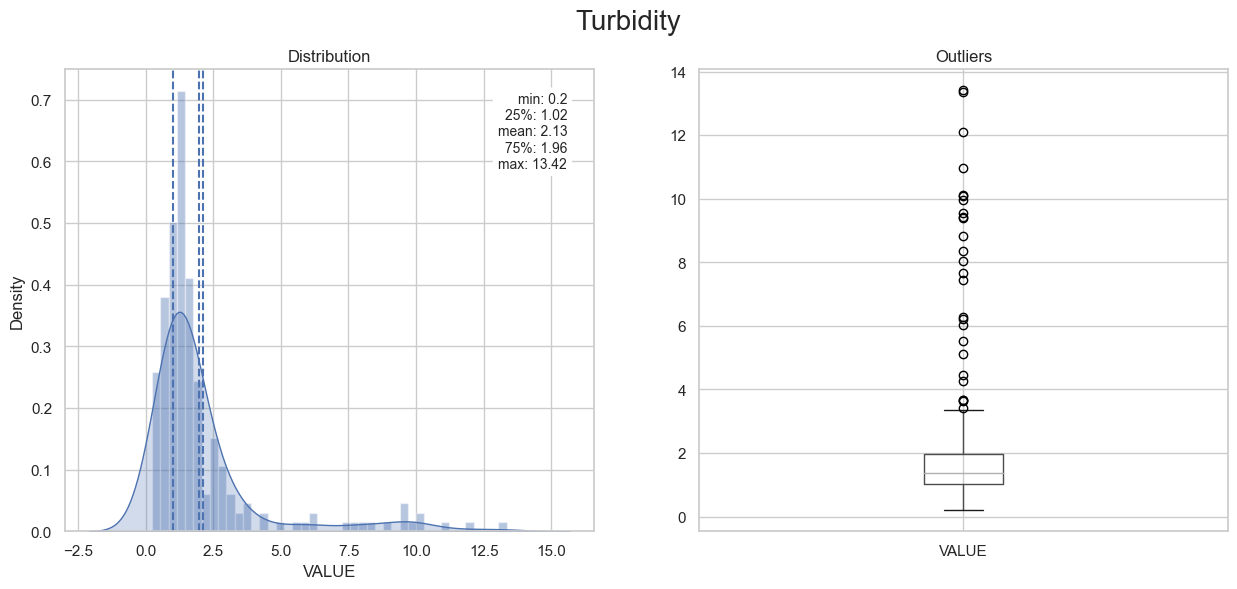

In [885]:
# Verificando a Distribuição da Variável de Interesse
x = 'VALUE'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(variavel_interesse, fontsize=20)
### distribution
ax[0].title.set_text('Distribution')
variable = dados[x].fillna(dados[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dados[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('Outliers')
tmp_dtf = pd.DataFrame(dados[x])
#tmp_dtf[x] = np.log(dados[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

# Tratando Valores Iguais a Zero de Bandas Espectrais

In [886]:
dados[bandas_referencia].describe()

BAND_1        BAND_2       BAND_3       BAND_4       BAND_5  \
count    218.000000    218.000000   218.000000   218.000000   218.000000   
mean     929.298165    973.761468  1033.000000   774.151376   776.986239   
std     1870.169755   1814.111771  1647.334216  1621.165377  1708.771848   
min       99.000000    147.000000   249.000000    91.000000    69.000000   
25%      201.250000    291.000000   379.250000   140.000000   113.000000   
50%      319.000000    349.000000   488.000000   190.000000   156.000000   
75%      588.750000    677.750000   798.500000   520.250000   500.750000   
max    10807.000000  10066.000000  8976.000000  8500.000000  8751.000000   

            BAND_6       BAND_7       BAND_8      BAND_8A        BAND_9  \
count   218.000000   218.000000   218.000000   218.000000    218.000000   
mean    719.518349   724.926606   710.853211   694.261468   1222.133028   
std    1675.803367  1665.823695  1689.836825  1637.920599   3231.069305   
min      37.000000    47.000000    33.000000    30.000000      1.000000   
25%      73.000000    79.250000    69.000000    66.000000     48.250000   
50%     103.000000   108.000000    90.000000    89.000000     80.000000   
75%     414.250000   411.750000   365.000000   353.750000    418.500000   
max    8488.000000  8217.000000  8560.000000  8066.000000  15786.000000   

           BAND_11      BAND_12  
count   218.000000   218.000000  
mean    503.522936   423.252294  
std    1202.302887  1029.570048  
min      17.000000     5.000000  
25%      43.250000    35.000000  
50%      70.000000    55.500000  
75%     234.000000   208.250000  
max    6899.000000  6495.000000

In [887]:
len(dados[(dados['BAND_2']<1)]),len(dados[(dados['BAND_3']<1)]), len(dados[(dados['BAND_4']<1)]), len(dados[(dados['BAND_5']<1)])

(0, 0, 0, 0)

In [888]:
counts_less_than_1 = {}

In [889]:
# Verificação de valores nulos
for column in dados[bandas_referencia].columns:
    counts = (dados[column] < 1).sum()
    counts_less_than_1[column] = counts

In [890]:
# Convert the dictionary to a DataFrame for better visualization
counts_df = pd.DataFrame(counts_less_than_1, index=["Count"])

# Display the counts for all 12 columns
print(counts_df)

       BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  BAND_6  BAND_7  BAND_8  \
Count       0       0       0       0       0       0       0       0   

       BAND_8A  BAND_9  BAND_11  BAND_12  
Count        0       0        0        0  


In [891]:
condition_12_bandas = (dados[bandas_referencia] < 1).any(axis=1)
condition_4_bandas = (dados[bandas_responsivas] < 1).any(axis=1)

In [892]:
len(dados.drop(dados[condition_12_bandas].index)), len(dados.drop(dados[condition_4_bandas].index))

(218, 218)

In [893]:
# Tratamento de Valores Zeros
quant_dados = dados.shape[0]

print('Tratamento de Valores Zeros')
print('-----------------------------------------')
print('Informe a opção desejada:')
print('------------------------------------------------------------------')

cprint('CÓDIGO 1 - NÃO Tratar Valores Zeros de Cada Banda Espectral', 'green', attrs=['bold'], file=sys.stderr)
print('------------')

cprint('CÓDIGO 2 - Remoção de Registros com Valores Zeros considerando as 12 Bandas Espectrais', 'green', attrs=['bold'], file=sys.stderr)
print('------------Remoção de Registros com Valores Zeros considerando as 12 Bandas Espectrais-----------')
print(f'*Quantidade de Dados Removidos Após Processamento: {dados.shape[0] - len(dados.drop(dados[condition_12_bandas].index))}')
print('------------')

cprint('CÓDIGO 3 - Remoção de Registros com Valores Zeros considerando as 4 Bandas Espectrais mais Responsivas', 'green', attrs=['bold'], file=sys.stderr)
print('------------Remoção de Registros com Valores Zeros considerando as 4 Bandas Espectrais')
print(f'*Quantidade de Dados Removidos Após Processamento: {dados.shape[0] - len(dados.drop(dados[condition_4_bandas].index))}')
print('------------')


cod_tratar_zeros = int(input())
print('------------------------------------------------------')

if cod_tratar_zeros == 2:
    dados.drop(dados[condition_12_bandas].index, inplace=True)
    
elif cod_tratar_zeros == 3:
    dados.drop(dados[condition_4_bandas].index, inplace=True)  

else:
    cod_tratar_zeros = 1
    print('Não Foram Aplicados Tratamentos de Dados Zeros')
    

print('------------')
print(f'O código do filtro aplicado foi {cod_tratar_zeros}')
print('------------')
print(f'*Quantidade de Dados Disponíveis Antes do Tratamento de Dados Nulos: {quant_dados}')
print('------------')
print(f'*Quantidade de Dados Disponíveis Após o Tratamento de Dados Nulos: {dados.shape[0]}')

CÓDIGO 1 - NÃO Tratar Valores Zeros de Cada Banda Espectral
CÓDIGO 2 - Remoção de Registros com Valores Zeros considerando as 12 Bandas Espectrais
CÓDIGO 3 - Remoção de Registros com Valores Zeros considerando as 4 Bandas Espectrais mais Responsivas


Tratamento de Valores Zeros
-----------------------------------------
Informe a opção desejada:
------------------------------------------------------------------
------------
------------Remoção de Registros com Valores Zeros considerando as 12 Bandas Espectrais-----------
*Quantidade de Dados Removidos Após Processamento: 0
------------
------------Remoção de Registros com Valores Zeros considerando as 4 Bandas Espectrais
*Quantidade de Dados Removidos Após Processamento: 0
------------
3
------------------------------------------------------
------------
O código do filtro aplicado foi 3
------------
*Quantidade de Dados Disponíveis Antes do Tratamento de Dados Nulos: 218
------------
*Quantidade de Dados Disponíveis Após o Tratamento de Dados Nulos: 218


In [894]:
counts_less_than_1 = {}

In [895]:
# Verificação de valores nulos
for column in dados[bandas_referencia].columns:
    counts = (dados[column] < 1).sum()
    counts_less_than_1[column] = counts

In [896]:
# Convert the dictionary to a DataFrame for better visualization
counts_df = pd.DataFrame(counts_less_than_1, index=["Count"])

# Display the counts for all 12 columns
print(counts_df)

       BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  BAND_6  BAND_7  BAND_8  \
Count       0       0       0       0       0       0       0       0   

       BAND_8A  BAND_9  BAND_11  BAND_12  
Count        0       0        0        0  


In [897]:
dados[bandas_referencia].describe()

BAND_1        BAND_2       BAND_3       BAND_4       BAND_5  \
count    218.000000    218.000000   218.000000   218.000000   218.000000   
mean     929.298165    973.761468  1033.000000   774.151376   776.986239   
std     1870.169755   1814.111771  1647.334216  1621.165377  1708.771848   
min       99.000000    147.000000   249.000000    91.000000    69.000000   
25%      201.250000    291.000000   379.250000   140.000000   113.000000   
50%      319.000000    349.000000   488.000000   190.000000   156.000000   
75%      588.750000    677.750000   798.500000   520.250000   500.750000   
max    10807.000000  10066.000000  8976.000000  8500.000000  8751.000000   

            BAND_6       BAND_7       BAND_8      BAND_8A        BAND_9  \
count   218.000000   218.000000   218.000000   218.000000    218.000000   
mean    719.518349   724.926606   710.853211   694.261468   1222.133028   
std    1675.803367  1665.823695  1689.836825  1637.920599   3231.069305   
min      37.000000    47.000000    33.000000    30.000000      1.000000   
25%      73.000000    79.250000    69.000000    66.000000     48.250000   
50%     103.000000   108.000000    90.000000    89.000000     80.000000   
75%     414.250000   411.750000   365.000000   353.750000    418.500000   
max    8488.000000  8217.000000  8560.000000  8066.000000  15786.000000   

           BAND_11      BAND_12  
count   218.000000   218.000000  
mean    503.522936   423.252294  
std    1202.302887  1029.570048  
min      17.000000     5.000000  
25%      43.250000    35.000000  
50%      70.000000    55.500000  
75%     234.000000   208.250000  
max    6899.000000  6495.000000

# Geração de Gráficos e Relatórios Interativos

In [898]:
# Remova os comentários para geração de gráficos básicos e relatórios

In [899]:
# DTale

In [900]:
#dtale.show(dados[bandas_referencia])

In [901]:
# Verificação da Relação entre as Variáveis

In [902]:
# Matriz de Correlação
#sns.heatmap(dados.corr(), annot=True) #annot mostra os coeficientes da matriz

In [903]:
# Matriz de Correlação
#dados.corr()

In [904]:
# Verificação de Linearidade
#sns.pairplot(dados, diag_kind="kde")

In [905]:
# Verificando Duplicações de Registros

In [906]:
#if len(dados[dados.duplicated()]) > 0:
#    pymsgbox.alert('Há Dados Duplicados, verifique', 'Dados Duplicados')

#dados[dados.duplicated()]

# Nuvens e Ruídos Espectrais: Filtros

In [907]:
filtros_nuvens_ruidos = (dados.MSK_CLDPRB <= 0.0) \
& (dados.CLDYPXPER <= 20.0) \
& (dados.MSK_SNOW <= 0.0) \
& (dados.SCENE_CLASS == "Water") \
& (dados.WATER_CHECK != "Drought") \
& (dados.SNOW_CHECK == "No_Snow") \
& (dados.QA60 <= 0.0)

In [908]:
filtros_nuvens_ruidos_sem_cloud_percentage = (dados.MSK_CLDPRB <= 0.0) \
& (dados.MSK_SNOW <= 0.0) \
& (dados.SCENE_CLASS == "Water") \
& (dados.WATER_CHECK != "Drought") \
& (dados.SNOW_CHECK == "No_Snow") \
& (dados.QA60 <= 0.0)

In [909]:
filtros_nuvens_ruidos_sem_cloud_percentage_mais_restritivo = (dados.MSK_CLDPRB <= 0.0) \
& (dados.MSK_SNOW <= 0.0) \
& (dados.SCENE_CLASS == "Water") \
& (dados.WATER_CHECK == "Water_Surface") \
& (dados.SNOW_CHECK == "No_Snow") \
& (dados.QA60 <= 0.0)

In [910]:
# Filtro de Nuvens e Ruídos Espectrais

print('NUVENS, NEVE E RUÍDOS ESPECTRAIS - FILTRO DE VERIFICAÇÃO')
print('-----------------------------------------')
print('-----------------------------------------')
print(f'*Quantidade de Dados Disponíveis Antes da Aplicação dos Filtros: {dados.shape[0]}')
print('-----------------------------------------')
print('-----------------------------------------')
print('Observe a quantidade de registros identificados em cada filtro de referência.')
print('Após avaliar, selecione o código do filtro a ser aplicado sobre o conjunto de dados.')
print('------------------------------------------------------------------')
print('------------------------------------------------------------------')


# ------- FILTROS

# Nuvens
print('NUVENS')
print('---------')
print('Código do Filtro: 1')
print('---------')
print('Máscara de Nuvem: Mask Cloud - Sentinel 2A')
print('Faixas de valores: 0.0 a 100.0')
print('Valor Limite Considerado: 0.0')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados.MSK_CLDPRB <= 0.0)].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

# Nuvens
print('NUVENS')
print('---------')
print('Código do Filtro: 2')
print('---------')
print('Nuvens na Imagem de Satélite: Cloud Pixel Percentage - Sentinel 2A')
print('Faixas de valores: 0.0 a 100.0')
print('Valor Limite Considerado: <= 20.0')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados.CLDYPXPER <= 20.0)].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

# Neve
print('NEVE')
print('---------')
print('Código do Filtro: 3')
print('---------')
print('Máscara de Neve/Gelo: Mask Snow - Sentinel 2A')
print('Faixas de valores: 0.0 a 100.0')
print('Valor Limite Considerado: 0.0')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados.MSK_SNOW <= 0.0)].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

# Classificação de Cena
print('CLASSIFICAÇÃO DE PIXEL')
print('---------')
print('Código do Filtro: 4')
print('---------')
print('Classificação de Pixels: Scene Class - Sentinel 2A')
print('Faixas de valores: 11 Classes: Water, Satured,  Dark Area, Cloud Shadows, Vegetation, Bare Soils, Clowds Low, Clouds Medim, Clouds High, Cirrus, Snow/Ice, Uncknow')
print('Valor Limite Considerado: Water')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados.SCENE_CLASS == "Water")].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

# Verificação de Água - Pixel
print('ÁGUA: Verificação de Pixel Contido em Corpo Hídrico')
print('---------')
print('Código do Filtro: 5')
print('---------')
print('Água - Pixel: Índice NDWI')
print('Faixas de valores: 3 Classes: Water Surface, Humidity, Drought')
print('Considerado para classificação: Water Surface: x > 0.2; Drought: < 0.0; Humidity: >= 0.0 x < 0.2')
print('Valor Limite Considerado: Water Surface / Humidity')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados.WATER_CHECK != "Drought")].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

# Verificação de Neve - Pixel
print('NEVE: Verificação de Pixel Contido em Neve/Gelo')
print('---------')
print('Código do Filtro: 6')
print('---------')
print('Neve - Pixel: Índice NBSI')
print('Faixas de valores: 2 Classes: Snow, No_Snow')
print('Considerado para classificação: No_Snow: x < 0; Snow: x > 0.0')
print('Valor Limite Considerado: No_Snow')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados.SNOW_CHECK == "No_Snow")].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

# Ruídos
print('RUÍDOS')
print('---------')
print('Código do Filtro: 7')
print('---------')
print('QA60: Sentinel 2A')
print('Faixas de valores: 0.0, 1024, 2048')
print('Valor Limite Considerado: 0.0')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados.QA60 <= 0.0)].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

# Todos os Filtros
print('TODOS OS FILTROS')
print('---------')
print('Código do Filtro: 8')
print('---------')
print('Aplicação Combinada de Todos os Filtros')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[filtros_nuvens_ruidos].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

# Todos os Filtros
print('TODOS OS FILTROS - SEM CLOUD PERCENTAGE')
print('---------')
print('Código do Filtro: 9')
print('---------')
print('Aplicação Combinada de Todos os Filtros')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[filtros_nuvens_ruidos_sem_cloud_percentage].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')


# Todos os Filtros
print('TODOS OS FILTROS - SEM CLOUD PERCENTAGE - MAIS RESTRITIVO')
print('---------')
print('Código do Filtro: 10')
print('---------')
print('Aplicação Combinada de Todos os Filtros')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[filtros_nuvens_ruidos_sem_cloud_percentage_mais_restritivo].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

NUVENS, NEVE E RUÍDOS ESPECTRAIS - FILTRO DE VERIFICAÇÃO
-----------------------------------------
-----------------------------------------
*Quantidade de Dados Disponíveis Antes da Aplicação dos Filtros: 218
-----------------------------------------
-----------------------------------------
Observe a quantidade de registros identificados em cada filtro de referência.
Após avaliar, selecione o código do filtro a ser aplicado sobre o conjunto de dados.
------------------------------------------------------------------
------------------------------------------------------------------
NUVENS
---------
Código do Filtro: 1
---------
Máscara de Nuvem: Mask Cloud - Sentinel 2A
Faixas de valores: 0.0 a 100.0
Valor Limite Considerado: 0.0
---------
*Quantidade de Dados Disponíveis Após Aplicação do Filtro: 192
-----------------------------------------------------------------------
-----------------------------------------------------------------------

NUVENS
---------
Código do Filtro: 2
---

In [911]:
# Filtro de Nuvem, Neve e Ruídos - Aplicação
quant_dados = dados.shape[0]

print('NUVEM, NEVE E RUÍDOS - APLICAÇÃO DE FILTROS')
print('-----------------------------------------')
print('Informe a opção desejada para Aplicação dos Filtros de Interese:')
print('------------------------------------------------------------------')

cprint('CÓDIGO 1 - Máscara de Nuvem: Mask Cloud - Sentinel 2A', 'green', attrs=['bold'], file=sys.stderr)
#print('WHO global overview of water quality parameters_2022')
#print('---------')

cprint('CÓDIGO 2 - Nuvens na Imagem de Satélite: Cloud Pixel Percentage - Sentinel 2A', 'green', attrs=['bold'], file=sys.stderr)
#print('Canada - A MONITOR’S GUIDE TO WATER QUALITY')
#print('---------')

cprint('CÓDIGO 3 - Máscara de Neve/Gelo: Mask Snow - Sentinel 2A', 'green', attrs=['bold'], file=sys.stderr)
#print('Uso Residencial Malásia - 5 a 25 NTU')
#print('---------')

cprint('CÓDIGO 4 - Classificação de Pixels: Scene Class - Sentinel 2A', 'green', attrs=['bold'], file=sys.stderr)
#print('Estados Unidos - Water Quality Certifications for Existing Hydropower Dams')
#print('---------')

cprint('CÓDIGO 5 - Água - Pixel: Índice NDWI', 'green', attrs=['bold'], file=sys.stderr)
#print('Brasil - CONAMA 357')
#print('---------')

cprint('CÓDIGO 6 - Neve - Pixel: Índice NBSI', 'green', attrs=['bold'], file=sys.stderr)
#print('WHO standards Potabilidade, Índia, Brasil, outros')
#print('---------')

cprint('CÓDIGO 7 - QA60: Sentinel 2A', 'green', attrs=['bold'], file=sys.stderr)
#print('National Standard of the People’s Republic of China')
#print('---------')

cprint('CÓDIGO 8 - Todos os Filtros', 'green', attrs=['bold'], file=sys.stderr)
#print('Austrália - Recreação')
#print('---------')

cprint('CÓDIGO 9 - Todos os Filtros - SEM CLOUD PERCENTAGE', 'green', attrs=['bold'], file=sys.stderr)
#print('Austrália - Recreação')
#print('---------')

cprint('CÓDIGO 10 - Todos os Filtros - SEM CLOUD PERCENTAGE - MAIS RESTRITIVO', 'green', attrs=['bold'], file=sys.stderr)
#print('Austrália - Recreação')
#print('---------')

cprint('CÓDIGO 0 - NÃO APLICAR FILTROS DE NUVENS/NEVE/RUÍDOS', 'green', attrs=['bold'], file=sys.stderr)
#print('Austrália - Recreação')
#print('---------')


cod_filtro_nuvens_ruidos = int(input())
print('------------------------------------------------------')

if cod_filtro_nuvens_ruidos == 1:
    dados = dados[(dados.MSK_CLDPRB <= 0.0)]

elif cod_filtro_nuvens_ruidos == 2:
    dados = dados[(dados.CLDYPXPER <= 20.0)]

elif cod_filtro_nuvens_ruidos == 3:
    dados = dados[(dados.MSK_SNOW <= 0.0)]

elif cod_filtro_nuvens_ruidos == 4:
    dados = dados[(dados.SCENE_CLASS == "Water")]

elif cod_filtro_nuvens_ruidos == 5:
    dados = dados[(dados.WATER_CHECK != "Drought")]

elif cod_filtro_nuvens_ruidos == 6:
    dados = dados[(dados.SNOW_CHECK == "No_Snow")]

elif cod_filtro_nuvens_ruidos == 7:
    dados = dados[(dados.QA60 <= 0.0)]

elif cod_filtro_nuvens_ruidos == 8:
    dados = dados[filtros_nuvens_ruidos]
    
elif cod_filtro_nuvens_ruidos == 9:
    dados = dados[filtros_nuvens_ruidos_sem_cloud_percentage]
    
elif cod_filtro_nuvens_ruidos == 10:
    dados = dados[filtros_nuvens_ruidos_sem_cloud_percentage_mais_restritivo]
    
else:
    #dados[filtros_nuvens_ruidos] = dados[filtros_nuvens_ruidos]
    cod_filtro_nuvens_ruidos = 0
    print('Não Foram Aplicados Filtros de Nuvens/Neve/Ruídos')
    

print('------------')
print(f'O código do filtro aplicado foi {cod_filtro_nuvens_ruidos}')
print('------------')
print(f'*Quantidade de Dados Disponíveis Antes da Aplicação dos Filtros: {quant_dados}')
print('------------')
print(f'*Quantidade de Dados Disponíveis Após da Aplicação dos Filtros: {dados.shape[0]}')

CÓDIGO 1 - Máscara de Nuvem: Mask Cloud - Sentinel 2A
CÓDIGO 2 - Nuvens na Imagem de Satélite: Cloud Pixel Percentage - Sentinel 2A
CÓDIGO 3 - Máscara de Neve/Gelo: Mask Snow - Sentinel 2A
CÓDIGO 4 - Classificação de Pixels: Scene Class - Sentinel 2A
CÓDIGO 5 - Água - Pixel: Índice NDWI
CÓDIGO 6 - Neve - Pixel: Índice NBSI
CÓDIGO 7 - QA60: Sentinel 2A
CÓDIGO 8 - Todos os Filtros
CÓDIGO 9 - Todos os Filtros - SEM CLOUD PERCENTAGE
CÓDIGO 10 - Todos os Filtros - SEM CLOUD PERCENTAGE - MAIS RESTRITIVO
CÓDIGO 0 - NÃO APLICAR FILTROS DE NUVENS/NEVE/RUÍDOS


NUVEM, NEVE E RUÍDOS - APLICAÇÃO DE FILTROS
-----------------------------------------
Informe a opção desejada para Aplicação dos Filtros de Interese:
------------------------------------------------------------------
10
------------------------------------------------------
------------
O código do filtro aplicado foi 10
------------
*Quantidade de Dados Disponíveis Antes da Aplicação dos Filtros: 218
------------
*Quantidade de Dados Disponíveis Após da Aplicação dos Filtros: 179


# Sun Glint - Brilho Solar: Correção

Sun glint correction is an important topic in remote sensing, particularly for ocean and water body studies. There are various methods and techniques used for sun glint correction, and the choice of method may depend on the specific sensor and application. Here are some key references and literature sources that discuss sun glint correction methods:

1. **Gordon, H. R., & Wang, M. (1994).** "Retrieval of water-leaving radiance and aerosol optical thickness over the oceans with SeaWiFS: A preliminary algorithm." Applied Optics, 33(3), 443-452.
   - This paper discusses a widely used sun glint correction algorithm for the SeaWiFS sensor.

2. **Gordon, H. R., & Wang, M. (1992).** "Influence of oceanic whitecaps on atmospheric correction of ocean-color sensors." Applied Optics, 31(33), 6862-6867.
   - Discusses the impact of whitecaps on sun glint correction and provides insights into correction algorithms.

3. **Mobley, C. D. (1994).** "Light and Water: Radiative Transfer in Natural Waters." Academic Press.
   - A comprehensive book that covers the principles of radiative transfer in natural waters, including discussions on sun glint and correction methods.

4. **Bailey, S. W., & Werdell, P. J. (2006).** "A multi-sensor approach for the on-orbit validation of ocean color satellite data products." Remote Sensing of Environment, 102(1-2), 12-23.
   - Discusses the validation of ocean color satellite data products, including sun glint correction.

5. **Wang, M., & Shi, W. (2007).** "The NIR-SWIR combined atmospheric correction approach for MODIS ocean color data processing." Optics Express, 15(24), 15722-15733.
   - Describes an atmospheric correction approach for MODIS ocean color data, which includes sun glint correction.

6. **Franz, B. A., et al. (2007).** "The continuity of ocean color measurements from SeaWiFS to MODIS." IEEE Transactions on Geoscience and Remote Sensing, 45(5), 1501-1509.
   - Discusses the continuity of ocean color measurements and the importance of sun glint correction.

7. **IOCCG (International Ocean Colour Coordinating Group) Reports.**
   - The IOCCG produces a series of reports on various aspects of ocean color remote sensing, including sun glint correction. These reports are often a valuable source of information and references.

8. **Specific Sensor Algorithm Documents.**
   - For specific sensors like Sentinel-2, Landsat, or MODIS, you can often find detailed algorithm documents published by the space agencies (e.g., ESA or NASA) that describe the sun glint correction methods used for those sensors. These documents can be found on the respective agency's websites.

These references provide valuable information on the principles and methods of sun glint correction in remote sensing. Depending on your specific application and sensor, you may find some of these sources more relevant than others.

# Function to correct sun glint in Sentinel-2 bands for a single observation.
def correct_sunglint_single_observation(observation):
    # Apply the sun glint correction formula to each band.
    sunglint_correction = np.arcsin((-1) * (observation * 0.0001 - 1) / np.pi)
    #sunglint_correction = np.arcsin((-1) * (observation - 1) / np.pi)
    #sunglint_correction = (np.arcsin((-1) * (observation * 0.0001 - 1) / np.pi)) * 1000.
    return sunglint_correction

dados_sunglint_corrigidos = dados.copy()

dados_sunglint_corrigidos[bandas_referencia] = dados[bandas_referencia].apply(lambda row: correct_sunglint_single_observation(row), axis=1)

dados_sunglint_corrigidos.head()

#dados_sunglint_corrigidos[bandas_referencia] = dados[bandas_referencia].apply(lambda row: correct_sunglint_single_observation(row), axis=1)

#dados_sunglint_corrigidos.head()

dados_sunglint = dados.copy()

# Define a function to identify sun glint status based on a threshold.
def identify_sun_glint_status(row, nir_band='BAND_8', threshold=0.2):
    # Calculate the ratio of NIR to Blue band (assumed 'B2') as a proxy for sun glint.
    sun_glint_ratio = row[nir_band] / row['BAND_2']

    # Check if the ratio exceeds the threshold.
    if sun_glint_ratio > threshold:
        return 'sunglint'
    else:
        return 'no_sunglint'

# Add a new column 'SunGlint_Status' to the DataFrame.
threshold_value = 0.2  # Adjust the threshold as needed

dados_sunglint['SunGlint_Status'] = dados[['BAND_8','BAND_2']].apply(lambda row: identify_sun_glint_status(row, threshold=threshold_value), axis=1)

# Now, 'data' contains a new column 'SunGlint_Status' indicating sunglint status.

dados_sunglint.head()

data = dados.copy()

In [912]:
# Define the NIR and sensitive bands for sun glint detection.
nir_band = 'BAND_8'  # Replace with the actual name of the NIR band
sensitive_bands = ['BAND_2', 'BAND_3', 'BAND_4']  # Add other sensitive bands as needed

# Define a function to identify sun glint status based on a threshold across sensitive bands.
def identify_sun_glint_status(row, nir_band=nir_band, threshold=.2):
    # Calculate the ratio of NIR to each sensitive band.
    ratios = [row[nir_band] / row[band] for band in sensitive_bands]

    # Check if any of the ratios exceeds the threshold.
    if any(ratio > threshold for ratio in ratios):
        return 'sunglint'
    else:
        return 'no_sunglint'

# Add a new column 'SunGlint_Status' to the DataFrame.
threshold_value = 1.0  # Adjust the threshold as needed
dados['SunGlint_Status'] = dados[['BAND_8', 'BAND_2', 'BAND_3', 'BAND_4']].apply(lambda row: identify_sun_glint_status(row, threshold=threshold_value), axis=1)

In [913]:
#data.head()

In [914]:
colunas_ref = ['BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6', 'BAND_7', 'BAND_8', 'BAND_8A', 'BAND_9', 'BAND_11', 'BAND_12', 'VALUE']

In [915]:
dados[colunas_ref][(dados['SunGlint_Status']=='sunglint')]

Empty DataFrame
Columns: [BAND_1, BAND_2, BAND_3, BAND_4, BAND_5, BAND_6, BAND_7, BAND_8, BAND_8A, BAND_9, BAND_11, BAND_12, VALUE]
Index: []

In [916]:
dados['SunGlint_Status'].value_counts()

SunGlint_Status
no_sunglint    179
Name: count, dtype: int64

In [917]:
# Filtro de Sun glint
quant_dados = dados.shape[0]

print('Sun glint - APLICAÇÃO DE FILTROS')
print('-----------------------------------------')
print('Informe a opção desejada para Aplicação dos Filtros de Interese:')
print('------------------------------------------------------------------')

cprint('CÓDIGO 1 - Sem Máscara de Sun Glint do Sentinel 2A', 'green', attrs=['bold'], file=sys.stderr)

cprint('CÓDIGO 2 - Máscara de Sun Glint considerando bandas 8, 2, 3 e 4 do Sentinel 2A', 'green', attrs=['bold'], file=sys.stderr)

cod_filtro_sunglint = int(input())
print('------------------------------------------------------')

if cod_filtro_sunglint == 1:
    print('Não Foram Aplicados Filtros de Sun Glint')

elif cod_filtro_sunglint == 2:
    dados = dados[(dados['SunGlint_Status']!='sunglint')]
    
else:
    #dados[filtros_nuvens_ruidos] = dados[filtros_nuvens_ruidos]
    cod_filtro_sunglint = 0
    print('Não Foram Aplicados Filtros de Sun Glint')
    

print('------------')
print(f'O código do filtro aplicado foi {cod_filtro_sunglint}')
print('------------')
print(f'*Quantidade de Dados Disponíveis Antes da Aplicação dos Filtros: {quant_dados}')
print('------------')
print(f'*Quantidade de Dados Disponíveis Após da Aplicação dos Filtros: {dados.shape[0]}')

CÓDIGO 1 - Sem Máscara de Sun Glint do Sentinel 2A
CÓDIGO 2 - Máscara de Sun Glint considerando bandas 8, 2, 3 e 4 do Sentinel 2A


Sun glint - APLICAÇÃO DE FILTROS
-----------------------------------------
Informe a opção desejada para Aplicação dos Filtros de Interese:
------------------------------------------------------------------
2
------------------------------------------------------
------------
O código do filtro aplicado foi 2
------------
*Quantidade de Dados Disponíveis Antes da Aplicação dos Filtros: 179
------------
*Quantidade de Dados Disponíveis Após da Aplicação dos Filtros: 179


dados.head()

corrected_data = dados.copy()

# Define a function to perform sun glint correction based on a threshold.
def sun_glint_correction_threshold(row, threshold=0.1):
    # Select bands that are sensitive to sun glint (e.g., 'B2', 'B3', 'B4')
    sensitive_bands = ['BAND_2', 'BAND_3', 'BAND_4']

    # Calculate the ratio of sensitive bands ('B2', 'B3', 'B4') to 'B8' (nir_band)
    ratio_band_nir = row[sensitive_bands].sum() / row['BAND_8']

    # Apply sun glint correction based on a threshold
    if ratio_band_nir > threshold:
        # If the ratio exceeds the threshold, set the sensitive bands to NaN
        row[sensitive_bands] = np.nan

    return row

sensitive_bands = ['BAND_2', 'BAND_3', 'BAND_4']


# Apply the sun glint correction function to the 'dados' DataFrame.
threshold = 0.2  # Adjust the threshold as needed
corrected_data[bandas_referencia] = dados[bandas_referencia].apply(lambda row: sun_glint_correction_threshold(row, threshold), axis=1)

# Now, 'corrected_data' contains the sun glint-corrected reflectance values for all bands.


corrected_data[bandas_referencia].head()

dados[bandas_referencia].head()

dados_sunglint_corrigidos_nir = dados.copy()

import numpy as np

# Define a function to perform NIR subtraction for sun glint correction.
def sun_glint_correction_nir_subtraction(row):
    # Select bands for sun glint correction (e.g., B2, B3, B4)
    selected_bands = bandas_referencia

    # Select a near-infrared band (e.g., B8 or B8A)
    #nir_band = 'B8'
    nir_band = 'BAND_8'

    # Subtract the reflectance values of the selected bands from the NIR band
    #corrected_values = row[nir_band] - row[selected_bands]
    corrected_values = row[selected_bands] - row[nir_band]
    
    #corrected_values = np.clip(corrected_values, 0, 1)

    # Replace the selected bands with the corrected values
    row[selected_bands] = corrected_values

    return row

# Apply sun glint correction using NIR subtraction to the 'dados' DataFrame.
dados_sunglint_corrigidos_nir[bandas_referencia] = dados[bandas_referencia].apply(sun_glint_correction_nir_subtraction, axis=1)

dados_sunglint_corrigidos_nir.head()

dados_sunglint_corrigidos_nir.head()

corrected_data_sgi = dados.copy()

# Define a function to perform Sun Glint Index correction for sun glint-affected pixels.
def sun_glint_correction_sgi(row):
    # Select bands for Sun Glint Index calculation (e.g., B2, B3, B4)
    #selected_bands = ['B2', 'B3', 'B4']
    selected_bands = bandas_referencia

    # Calculate the Sun Glint Index (SGI) for the pixel
    #sgi = (row['B2'] - row['B4']) / (row['B2'] + row['B4'])
    sgi = (row['BAND_2'] - row['BAND_4']) / (row['BAND_2'] + row['BAND_4'])

    # Threshold for identifying sun glint-affected pixels (adjust as needed)
    sgi_threshold = 0.15

    # Apply the Sun Glint Index correction if the SGI exceeds the threshold
    if sgi > sgi_threshold:
        # Apply a correction method (e.g., setting sun glint-affected bands to NaN)
        row[selected_bands] = np.nan

    return row

# Apply Sun Glint Index correction to the 'dados' DataFrame.
corrected_data_sgi[bandas_referencia] = dados[bandas_referencia].apply(sun_glint_correction_sgi, axis=1)

corrected_data_sgi.head()

dados.head()

corrected_data_band_ratio = dados.copy()

import numpy as np

# Sample DataFrame 'dados' with reflectance values for Sentinel-2 bands.
# Replace this with your actual DataFrame.
data = pd.DataFrame(np.random.rand(100, 12), columns=['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12'])

# Define a function to perform Band Ratio correction for sun glint-affected pixels.
def sun_glint_correction_band_ratio(row):
    # Select bands for Band Ratio correction (e.g., B2, B3, B4)
    #selected_bands = ['B2', 'B3', 'B4']
    selected_bands = bandas_referencia

    # Calculate specific band ratios that are less sensitive to sun glint.
    # Example: NIR/Red ratio, where NIR is 'B8' and Red is 'B4'.
    #nir_red_ratio = row['B8'] / row['B4']
    nir_red_ratio = row['BAND_8'] / row['BAND_4']

    # Define a threshold value to identify sun glint-affected pixels (adjust as needed).
    ratio_threshold = 1.2  # Adjust this threshold based on your data.

    # Apply the Band Ratio correction if the specific ratio exceeds the threshold.
    if nir_red_ratio > ratio_threshold:
        # Apply a correction method (e.g., setting sun glint-affected bands to NaN).
        row[selected_bands] = np.nan

    return row

# Apply Band Ratio correction to the 'dados' DataFrame.
corrected_data_band_ratio[bandas_referencia] = dados[bandas_referencia].apply(sun_glint_correction_band_ratio, axis=1)

# Now, 'corrected_data_band_ratio' contains sun glint-corrected reflectance values using the Band Ratio method.

corrected_data_band_ratio.head()

dados.head()

corrected_data_pca = dados.copy()

import numpy as np
from sklearn.decomposition import PCA

# Sample DataFrame 'dados' with reflectance values for Sentinel-2 bands.

# Define a function to perform PCA-based sun glint correction.
def sun_glint_correction_pca(row):
    # Select bands for PCA (e.g., B2, B3, B4)
    selected_bands = bandas_referencia #['B2', 'B3', 'B4']

    # Extract reflectance values for the selected bands
    selected_bands_data = row[selected_bands].values.reshape(1, -1)

    # Apply PCA to the reshaped data
    pca = PCA(n_components=1)
    pca.fit(selected_bands_data)

    # Compute the principal component (PC) values for the selected bands
    pc_values = pca.transform(selected_bands_data)

    # Subtract the PC values from the original reflectance values for each band
    corrected_values = selected_bands_data - pc_values

    # Reshape the corrected values back to the original shape
    corrected_values = corrected_values.reshape(-1)

    # Replace the selected bands with the corrected values
    row[selected_bands] = corrected_values

    return row

# Apply PCA-based sun glint correction to the 'dados' DataFrame.
corrected_data_pca[bandas_referencia] = dados[bandas_referencia].apply(sun_glint_correction_pca, axis=1)

# Now, 'corrected_data_pca' contains sun glint-corrected reflectance values using PCA-based method.

corrected_data_pca.head()

dados.head()

corrected_data_pca[bandas_referencia].describe()

dados[bandas_referencia].describe()

# DIFERENÇA DE DIAS ENTRE SATÉLITE E MEDIÇÃO EM CAMPO - Filtro

In [918]:
print('Diferença de Dias entre Data de Passagem do Satélite e Data da Coleta da Amostra em Campo - Quantitativo:')
print(dados['DIFF_DATE'].value_counts())

Diferença de Dias entre Data de Passagem do Satélite e Data da Coleta da Amostra em Campo - Quantitativo:
DIFF_DATE
0    172
1      7
Name: count, dtype: int64


In [919]:
# Filtro de Data de Passagem do Satélite

print('Diferença de Dias Entre Passagem do Satélite e Coleta da Amostra - FILTRO DE VERIFICAÇÃO')
print('-----------------------------------------')
print('-----------------------------------------')
print(f'*Quantidade de Dados Disponíveis Antes da Aplicação dos Filtros: {dados.shape[0]}')
print('-----------------------------------------')
print('-----------------------------------------')
print('Observe a quantidade de registros identificados em cada filtro de referência.')
print('Após avaliar, selecione o código do filtro a ser aplicado sobre o conjunto de dados.')
print('------------------------------------------------------------------')
print('------------------------------------------------------------------')


# ------- FILTROS

# 0 Dias
print('0 Dia: Data de Passagem do Satélite Igual a Data de Coleta da Amostra')
print('---------')
print('Código do Filtro: 0')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados.DIFF_DATE <= 0)].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

# 1 Dia
print('1 Dia: Data de Passagem do Satélite Com Até +- 1 Dia de Diferença da Data de Coleta da Amostra')
print('---------')
print('Código do Filtro: 11')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados.DIFF_DATE <= 1)].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

# 1 Dia
print('1 Dia: Data de Passagem do Satélite IGUAL +- 1 Dia de Diferença da Data de Coleta da Amostra')
print('---------')
print('Código do Filtro: 111')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados.DIFF_DATE == 1)].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

# 2 Dias
print('2 Dias: Data de Passagem do Satélite Com Até +- 2 Dias de Diferença da Data de Coleta da Amostra')
print('---------')
print('Código do Filtro: 22')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados.DIFF_DATE <= 2)].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

# 2 Dias
print('2 Dias: Data de Passagem do Satélite IGUAL +- 2 Dias de Diferença da Data de Coleta da Amostra')
print('---------')
print('Código do Filtro: 222')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados.DIFF_DATE == 2)].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

Diferença de Dias Entre Passagem do Satélite e Coleta da Amostra - FILTRO DE VERIFICAÇÃO
-----------------------------------------
-----------------------------------------
*Quantidade de Dados Disponíveis Antes da Aplicação dos Filtros: 179
-----------------------------------------
-----------------------------------------
Observe a quantidade de registros identificados em cada filtro de referência.
Após avaliar, selecione o código do filtro a ser aplicado sobre o conjunto de dados.
------------------------------------------------------------------
------------------------------------------------------------------
0 Dia: Data de Passagem do Satélite Igual a Data de Coleta da Amostra
---------
Código do Filtro: 0
---------
*Quantidade de Dados Disponíveis Após Aplicação do Filtro: 172
-----------------------------------------------------------------------
-----------------------------------------------------------------------

1 Dia: Data de Passagem do Satélite Com Até +- 1 Dia de Dif

In [920]:
#Filtros Limite de Valor de Parâmetros e Diferenças de Datas (em dias)
print('DIFERENÇA DE DIAS ENTRE DATA DE PASSAGEM DO SATÉLITE E MEDIÇÃO EM CAMPO: FILTRO')
print('----------------------------------------------------------------------------------')
print('Quer utilizar TODOS os DADOS disponíveis (SEM FILTRO DE DIFERENÇA DE DIAS)?')
print('Digite 1 para SIM: PROSSEGUIR SEM FILTRO DE DATAS DE PASSAGEM DO SATÉLITE')
print('Digita 0 para NÃO: APLICAR FILTROS DE DATA DE PASSAGEM DO SATÉLITE')

usar_todos_dias = int(input())

if usar_todos_dias == 0:

    print('Intervalo de Dias entre a Passagem do Satélite e a Data de Coleta (inteiro)')
    diferenca_dias = int(input())

    dados = dados[(dados['DIFF_DATE'] <= diferenca_dias)]

elif usar_todos_dias == 11:
    dados = dados[(dados.DIFF_DATE <= 1)]

elif usar_todos_dias == 111:
    dados = dados[(dados.DIFF_DATE == 1)]

elif usar_todos_dias == 22:
    dados = dados[(dados.DIFF_DATE <= 2)]

elif usar_todos_dias == 222:
    dados = dados[(dados.DIFF_DATE == 2)]
    
    
else:    
    print('Filtro de Diferença de Datas Não Aplicado!')


#dados_filtrado.head()
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro de Valor Limite da Variável e Diferença entre Datas: {dados.shape[0]}')

DIFERENÇA DE DIAS ENTRE DATA DE PASSAGEM DO SATÉLITE E MEDIÇÃO EM CAMPO: FILTRO
----------------------------------------------------------------------------------
Quer utilizar TODOS os DADOS disponíveis (SEM FILTRO DE DIFERENÇA DE DIAS)?
Digite 1 para SIM: PROSSEGUIR SEM FILTRO DE DATAS DE PASSAGEM DO SATÉLITE
Digita 0 para NÃO: APLICAR FILTROS DE DATA DE PASSAGEM DO SATÉLITE
0
Intervalo de Dias entre a Passagem do Satélite e a Data de Coleta (inteiro)
0
*Quantidade de Dados Disponíveis Após Aplicação do Filtro de Valor Limite da Variável e Diferença entre Datas: 172


In [921]:
# Limites Espectrais das Bandas

In [922]:
# Intervalo Interquartis: Limites Espectrais das Bandas

IQR_BAND_1 = dados.BAND_1.quantile(0.75)-dados.BAND_1.quantile(0.25) 
lower_bridge_BAND_1 = dados['BAND_1'].quantile(0.25)-(IQR_BAND_1*1.5) 
upper_bridge_BAND_1 = dados['BAND_1'].quantile(0.75)+(IQR_BAND_1*1.5)
#lower_bridge_BAND_1, upper_bridge_BAND_1

IQR_BAND_2 = dados.BAND_2.quantile(0.75)-dados.BAND_2.quantile(0.25) 
lower_bridge_BAND_2 = dados['BAND_2'].quantile(0.25)-(IQR_BAND_2*1.5) 
upper_bridge_BAND_2 = dados['BAND_2'].quantile(0.75)+(IQR_BAND_2*1.5)
#lower_bridge_BAND_2, upper_bridge_BAND_2

IQR_BAND_3 = dados.BAND_3.quantile(0.75)-dados.BAND_3.quantile(0.25) 
lower_bridge_BAND_3 = dados['BAND_3'].quantile(0.25)-(IQR_BAND_3*1.5) 
upper_bridge_BAND_3 = dados['BAND_3'].quantile(0.75)+(IQR_BAND_3*1.5)
#lower_bridge_BAND_3, upper_bridge_BAND_3

IQR_BAND_4 = dados.BAND_4.quantile(0.75)-dados.BAND_4.quantile(0.25) 
lower_bridge_BAND_4 = dados['BAND_4'].quantile(0.25)-(IQR_BAND_4*1.5) 
upper_bridge_BAND_4 = dados['BAND_4'].quantile(0.75)+(IQR_BAND_4*1.5)
#lower_bridge_BAND_4, upper_bridge_BAND_4

IQR_BAND_5 = dados.BAND_5.quantile(0.75)-dados.BAND_5.quantile(0.25) 
lower_bridge_BAND_5 = dados['BAND_5'].quantile(0.25)-(IQR_BAND_5*1.5) 
upper_bridge_BAND_5 = dados['BAND_5'].quantile(0.75)+(IQR_BAND_5*1.5)
#lower_bridge_BAND_5, upper_bridge_BAND_5

IQR_BAND_6 = dados.BAND_6.quantile(0.75)-dados.BAND_6.quantile(0.25) 
lower_bridge_BAND_6 = dados['BAND_6'].quantile(0.25)-(IQR_BAND_6*1.5) 
upper_bridge_BAND_6 = dados['BAND_6'].quantile(0.75)+(IQR_BAND_6*1.5)
#lower_bridge_BAND_6, upper_bridge_BAND_6

IQR_BAND_7 = dados.BAND_7.quantile(0.75)-dados.BAND_7.quantile(0.25) 
lower_bridge_BAND_7 = dados['BAND_7'].quantile(0.25)-(IQR_BAND_7*1.5) 
upper_bridge_BAND_7 = dados['BAND_7'].quantile(0.75)+(IQR_BAND_7*1.5)
#lower_bridge_BAND_7, upper_bridge_BAND_7

IQR_BAND_8 = dados.BAND_8.quantile(0.75)-dados.BAND_8.quantile(0.25) 
lower_bridge_BAND_8 = dados['BAND_8'].quantile(0.25)-(IQR_BAND_8*1.5) 
upper_bridge_BAND_8 = dados['BAND_8'].quantile(0.75)+(IQR_BAND_8*1.5)
#lower_bridge_BAND_8, upper_bridge_BAND_8

IQR_BAND_8A = dados.BAND_8A.quantile(0.75)-dados.BAND_8A.quantile(0.25) 
lower_bridge_BAND_8A = dados['BAND_8A'].quantile(0.25)-(IQR_BAND_8A*1.5) 
upper_bridge_BAND_8A = dados['BAND_8A'].quantile(0.75)+(IQR_BAND_8A*1.5)
#lower_bridge_BAND_8A, upper_bridge_BAND_8A

IQR_BAND_9 = dados.BAND_9.quantile(0.75)-dados.BAND_9.quantile(0.25) 
lower_bridge_BAND_9 = dados['BAND_9'].quantile(0.25)-(IQR_BAND_9*1.5) 
upper_bridge_BAND_9 = dados['BAND_9'].quantile(0.75)+(IQR_BAND_9*1.5)
#lower_bridge_BAND_9, upper_bridge_BAND_9

IQR_BAND_11 = dados.BAND_11.quantile(0.75)-dados.BAND_11.quantile(0.25) 
lower_bridge_BAND_11 = dados['BAND_11'].quantile(0.25)-(IQR_BAND_11*1.5) 
upper_bridge_BAND_11 = dados['BAND_11'].quantile(0.75)+(IQR_BAND_11*1.5)
#lower_bridge_BAND_11, upper_bridge_BAND_11

IQR_BAND_12 = dados.BAND_12.quantile(0.75)-dados.BAND_12.quantile(0.25) 
lower_bridge_BAND_12 = dados['BAND_12'].quantile(0.25)-(IQR_BAND_12*1.5) 
upper_bridge_BAND_12 = dados['BAND_12'].quantile(0.75)+(IQR_BAND_12*1.5)
#lower_bridge_BAND_12, upper_bridge_BAND_12

dados.describe()

VALUE       DEPTH         LAT         LON  DIFF_DATE      BAND_1  \
count  172.000000  172.000000  172.000000  172.000000      172.0  172.000000   
mean     1.479884    0.443709  -18.561233  -45.279835        0.0  316.069767   
std      0.918544    0.325893    0.164147    0.085609        0.0  162.526996   
min      0.200000    0.000000  -18.854800  -45.444200        0.0   99.000000   
25%      0.870000    0.185000  -18.692925  -45.365050        0.0  190.750000   
50%      1.325000    0.432000  -18.500450  -45.274000        0.0  236.000000   
75%      1.802500    0.502250  -18.460475  -45.209400        0.0  414.250000   
max      6.270000    1.187000  -18.223600  -45.137900        0.0  699.000000   

           BAND_2      BAND_3      BAND_4      BAND_5      BAND_6      BAND_7  \
count  172.000000  172.000000  172.000000  172.000000  172.000000  172.000000   
mean   383.709302  493.505814  241.598837  212.383721  157.784884  163.517442   
std    161.116852  186.726698  157.230700  157.066728  136.111432  134.674373   
min    147.000000  249.000000   91.000000   69.000000   37.000000   47.000000   
25%    279.750000  343.250000  133.750000  110.750000   71.750000   77.750000   
50%    325.000000  438.000000  170.000000  132.000000   89.000000   94.000000   
75%    477.250000  649.000000  313.000000  278.750000  202.750000  212.000000   
max    790.000000  959.000000  817.000000  778.000000  553.000000  563.000000   

           BAND_8     BAND_8A     BAND_9     BAND_11     BAND_12  MSK_CLDPRB  \
count  172.000000  172.000000  172.00000  172.000000  172.000000       172.0   
mean   140.360465  139.540698  140.80814   97.738372   78.686047         0.0   
std    118.017683  119.109481  153.22152   88.363193   75.650823         0.0   
min     33.000000   30.000000    6.00000   17.000000    5.000000         0.0   
25%     66.000000   61.750000   45.00000   39.750000   32.500000         0.0   
50%     80.000000   77.500000   68.00000   56.500000   45.500000         0.0   
75%    174.750000  204.250000  181.50000  148.500000   99.750000         0.0   
max    488.000000  499.000000  858.00000  487.000000  394.000000         0.0   

       MSK_SNOW   QA60   CLDYPXPER  DRK_FEA_PE        NDWI        NBSI  
count     172.0  172.0  172.000000  172.000000  172.000000  172.000000  
mean        0.0    0.0    1.968165    0.717395    0.606625   -0.901713  
std         0.0    0.0    2.960449    0.229900    0.140293    0.151079  
min         0.0    0.0    0.007900    0.423500    0.284072   -1.880645  
25%         0.0    0.0    0.687500    0.672000    0.513260   -1.006343  
50%         0.0    0.0    1.234300    0.725900    0.633201   -0.885629  
75%         0.0    0.0    2.967500    0.792600    0.722443   -0.788350  
max         0.0    0.0   25.968400    1.948600    0.834452   -0.631023

In [923]:
# Filtro para Bandas Espectrais

In [924]:
# Desvio Padrão - Determinação do Limite de Corte Superior - Bandas

print('BANDAS ESPECTRAIS - Limite Superior - FILTRO')

print('---------------------------------------------------------------------')

print('DESVIO PADRÃO: Verificação dos Limites de Corte das Bandas Espectrais:')
print(f'*Desvio Padrão da Banda_1: {dados.BAND_1.std()}')
print(f'*Desvio Padrão da Banda_2: {dados.BAND_2.std()}')
print(f'*Desvio Padrão da Banda_3: {dados.BAND_3.std()}')
print(f'*Desvio Padrão da Banda_4: {dados.BAND_4.std()}')
print(f'*Desvio Padrão da Banda_5: {dados.BAND_5.std()}')
print(f'*Desvio Padrão da Banda_6: {dados.BAND_6.std()}')
print(f'*Desvio Padrão da Banda_7: {dados.BAND_7.std()}')
print(f'*Desvio Padrão da Banda_8: {dados.BAND_8.std()}')
print(f'*Desvio Padrão da Banda_8A: {dados.BAND_8A.std()}')
print(f'*Desvio Padrão da Banda_9: {dados.BAND_9.std()}')
print(f'*Desvio Padrão da Banda_11: {dados.BAND_11.std()}')
print(f'*Desvio Padrão da Banda_12: {dados.BAND_12.std()}')


print('---------------------------------------------------------------------')

print('INTERVALO INTERQUARTIS: Verificação dos Limites de Corte das Bandas Espectrais:')
print(f'*Limite Interquartil da Banda_1: {upper_bridge_BAND_1}')
print(f'*Limite Interquartil da Banda_2: {upper_bridge_BAND_2}')
print(f'*Limite Interquartil da Banda_3: {upper_bridge_BAND_3}')
print(f'*Limite Interquartil da Banda_4: {upper_bridge_BAND_4}')
print(f'*Limite Interquartil da Banda_5: {upper_bridge_BAND_5}')
print(f'*Limite Interquartil da Banda_6: {upper_bridge_BAND_6}')
print(f'*Limite Interquartil da Banda_7: {upper_bridge_BAND_7}')
print(f'*Limite Interquartil da Banda_8: {upper_bridge_BAND_8}')
print(f'*Limite Interquartil da Banda_8A: {upper_bridge_BAND_8A}')
print(f'*Limite Interquartil da Banda_9: {upper_bridge_BAND_9}')
print(f'*Limite Interquartil da Banda_11: {upper_bridge_BAND_11}')
print(f'*Limite Interquartil da Banda_12: {upper_bridge_BAND_12}')


print('---------------------------------------------------------------------')


print('BANDAS ESPECTRAIS - LIMITES DE CORTE/OUTLIERS')
print('------------------------------------------------------------------')
print('Quer utilizar TODOS os DADOS disponíveis (SEM FILTRO DE BANDAS ESPECTRAIS)?')
print('Digite 1 para SIM: PROSSEGUIR SEM FILTRO')
print('Digita 2 para: FILTRO POR DESVIO PADRÃO')
print('Digita 3 para: FILTRO POR INTERVALO INTERQUARTIL')
print('Digita 4 para: INFORMAR VALOR LIMITE MANUALMENTE')

usar_todos_dados = int(input())

# --------------------------------------------

if usar_todos_dados==2:

    print('---------------------------------------------------------------------')
    print('Filtro de Bandas Realizado por Desvio Padrão: ')
    print('---------------------------------------------------------------------')
    print('Digite o Valor pelo qual o Desvio Padrão Deverá ser Multiplicado (inteiro): ')
    valor_multiplica_desvio_padrao = int(input())

    print(f'*O Valor Limite de Corte da Banda_1 é : {dados.BAND_1.std() * valor_multiplica_desvio_padrao}')
    dados.drop(dados[dados['BAND_1'] > dados.BAND_1.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print('Filtro de Bandas Realizado por Intervalos InterQuartis: ')
    print(f'*O Valor Limite de Corte da Banda_2 é : {dados.BAND_2.std() * valor_multiplica_desvio_padrao}')
    dados.drop(dados[dados['BAND_2'] > dados.BAND_2.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_3 é : {dados.BAND_3.std() * valor_multiplica_desvio_padrao}')
    dados.drop(dados[dados['BAND_3'] > dados.BAND_3.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_4 é : {dados.BAND_4.std() * valor_multiplica_desvio_padrao}')
    dados.drop(dados[dados['BAND_4'] > dados.BAND_4.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_5 é : {dados.BAND_5.std() * valor_multiplica_desvio_padrao}')
    dados.drop(dados[dados['BAND_5'] > dados.BAND_5.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_6 é : {dados.BAND_6.std() * valor_multiplica_desvio_padrao}')
    dados.drop(dados[dados['BAND_6'] > dados.BAND_6.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_7 é : {dados.BAND_7.std() * valor_multiplica_desvio_padrao}')
    dados.drop(dados[dados['BAND_7'] > dados.BAND_7.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_8 é : {dados.BAND_8.std() * valor_multiplica_desvio_padrao}')
    dados.drop(dados[dados['BAND_8'] > dados.BAND_8.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_8A é : {dados.BAND_8A.std() * valor_multiplica_desvio_padrao}')
    dados.drop(dados[dados['BAND_8A'] > dados.BAND_8A.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_9 é : {dados.BAND_9.std() * valor_multiplica_desvio_padrao}')
    dados.drop(dados[dados['BAND_9'] > dados.BAND_9.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_11 é : {dados.BAND_11.std() * valor_multiplica_desvio_padrao}')
    dados.drop(dados[dados['BAND_11'] > dados.BAND_11.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_12 é : {dados.BAND_12.std() * valor_multiplica_desvio_padrao}')
    dados.drop(dados[dados['BAND_12'] > dados.BAND_12.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')

# ---------------------------------------------------
    
elif usar_todos_dados==3:

    print('---------------------------------------------------------------------')
    print('Filtro de Bandas Realizado por Intervalos InterQuartis: ')
    print('---------------------------------------------------------------------')

    print(f'*O Valor Limite de Corte da Banda_1 é : {upper_bridge_BAND_1}')
    dados.drop(dados[dados['BAND_1'] > upper_bridge_BAND_1].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print('Filtro de Bandas Realizado por Intervalos InterQuartis: ')
    print(f'*O Valor Limite de Corte da Banda_2 é : {upper_bridge_BAND_2}')
    dados.drop(dados[dados['BAND_2'] > upper_bridge_BAND_2].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_3 é : {upper_bridge_BAND_3}')
    dados.drop(dados[dados['BAND_3'] > upper_bridge_BAND_3].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_4 é : {upper_bridge_BAND_4}')
    dados.drop(dados[dados['BAND_4'] > upper_bridge_BAND_4].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_5 é : {upper_bridge_BAND_5}')
    dados.drop(dados[dados['BAND_5'] > upper_bridge_BAND_5].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_6 é : {upper_bridge_BAND_6}')
    dados.drop(dados[dados['BAND_6'] > upper_bridge_BAND_6].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_7 é : {upper_bridge_BAND_7}')
    dados.drop(dados[dados['BAND_7'] > upper_bridge_BAND_7].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_8 é : {upper_bridge_BAND_8}')
    dados.drop(dados[dados['BAND_8'] > upper_bridge_BAND_8].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_8A é : {upper_bridge_BAND_8A}')
    dados.drop(dados[dados['BAND_8A'] > upper_bridge_BAND_8A].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_9 é : {upper_bridge_BAND_9}')
    dados.drop(dados[dados['BAND_9'] > upper_bridge_BAND_9].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_11 é : {upper_bridge_BAND_11}')
    dados.drop(dados[dados['BAND_11'] > upper_bridge_BAND_11].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_12 é : {upper_bridge_BAND_12}')
    dados.drop(dados[dados['BAND_12'] > upper_bridge_BAND_12].index, inplace = True)
    print('---------------------------------------------------------------------')

# ---------------------------------------

elif usar_todos_dados == 4:
    print('Filtro por Inserção Manual do Limite: ')
    print('Digite o Valor Limite para Filtragem dos Dados da Variável de Interesse (Valor Inteiro): ')
    limite_manual = int(input())
    dados.drop(dados[dados['VALUE'] > limite_manual].index, inplace = True)
    print('---------------------------------------------------------------------')
    
else:    
    print('Filtro de Bandas Espectrais Não Aplicado!')
    print('---------------------------------------------------------------------')


print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro por Desvio Padrão/InterQuartis : {dados.shape[0]}')

BANDAS ESPECTRAIS - Limite Superior - FILTRO
---------------------------------------------------------------------
DESVIO PADRÃO: Verificação dos Limites de Corte das Bandas Espectrais:
*Desvio Padrão da Banda_1: 162.52699573857032
*Desvio Padrão da Banda_2: 161.11685246081126
*Desvio Padrão da Banda_3: 186.7266976495945
*Desvio Padrão da Banda_4: 157.23070024030045
*Desvio Padrão da Banda_5: 157.06672836836805
*Desvio Padrão da Banda_6: 136.1114318322491
*Desvio Padrão da Banda_7: 134.67437331766342
*Desvio Padrão da Banda_8: 118.01768256754075
*Desvio Padrão da Banda_8A: 119.10948119042382
*Desvio Padrão da Banda_9: 153.22152041839763
*Desvio Padrão da Banda_11: 88.36319345501462
*Desvio Padrão da Banda_12: 75.65082323163149
---------------------------------------------------------------------
INTERVALO INTERQUARTIS: Verificação dos Limites de Corte das Bandas Espectrais:
*Limite Interquartil da Banda_1: 749.5
*Limite Interquartil da Banda_2: 773.5
*Limite Interquartil da Banda_3: 11

In [925]:
dados.describe()

VALUE       DEPTH         LAT         LON  DIFF_DATE      BAND_1  \
count  172.000000  172.000000  172.000000  172.000000      172.0  172.000000   
mean     1.479884    0.443709  -18.561233  -45.279835        0.0  316.069767   
std      0.918544    0.325893    0.164147    0.085609        0.0  162.526996   
min      0.200000    0.000000  -18.854800  -45.444200        0.0   99.000000   
25%      0.870000    0.185000  -18.692925  -45.365050        0.0  190.750000   
50%      1.325000    0.432000  -18.500450  -45.274000        0.0  236.000000   
75%      1.802500    0.502250  -18.460475  -45.209400        0.0  414.250000   
max      6.270000    1.187000  -18.223600  -45.137900        0.0  699.000000   

           BAND_2      BAND_3      BAND_4      BAND_5      BAND_6      BAND_7  \
count  172.000000  172.000000  172.000000  172.000000  172.000000  172.000000   
mean   383.709302  493.505814  241.598837  212.383721  157.784884  163.517442   
std    161.116852  186.726698  157.230700  157.066728  136.111432  134.674373   
min    147.000000  249.000000   91.000000   69.000000   37.000000   47.000000   
25%    279.750000  343.250000  133.750000  110.750000   71.750000   77.750000   
50%    325.000000  438.000000  170.000000  132.000000   89.000000   94.000000   
75%    477.250000  649.000000  313.000000  278.750000  202.750000  212.000000   
max    790.000000  959.000000  817.000000  778.000000  553.000000  563.000000   

           BAND_8     BAND_8A     BAND_9     BAND_11     BAND_12  MSK_CLDPRB  \
count  172.000000  172.000000  172.00000  172.000000  172.000000       172.0   
mean   140.360465  139.540698  140.80814   97.738372   78.686047         0.0   
std    118.017683  119.109481  153.22152   88.363193   75.650823         0.0   
min     33.000000   30.000000    6.00000   17.000000    5.000000         0.0   
25%     66.000000   61.750000   45.00000   39.750000   32.500000         0.0   
50%     80.000000   77.500000   68.00000   56.500000   45.500000         0.0   
75%    174.750000  204.250000  181.50000  148.500000   99.750000         0.0   
max    488.000000  499.000000  858.00000  487.000000  394.000000         0.0   

       MSK_SNOW   QA60   CLDYPXPER  DRK_FEA_PE        NDWI        NBSI  
count     172.0  172.0  172.000000  172.000000  172.000000  172.000000  
mean        0.0    0.0    1.968165    0.717395    0.606625   -0.901713  
std         0.0    0.0    2.960449    0.229900    0.140293    0.151079  
min         0.0    0.0    0.007900    0.423500    0.284072   -1.880645  
25%         0.0    0.0    0.687500    0.672000    0.513260   -1.006343  
50%         0.0    0.0    1.234300    0.725900    0.633201   -0.885629  
75%         0.0    0.0    2.967500    0.792600    0.722443   -0.788350  
max         0.0    0.0   25.968400    1.948600    0.834452   -0.631023

In [926]:
# Desvio Padrão - Determinação do Limite de Corte Inferior - Bandas

print('BANDAS ESPECTRAIS - Limite Inferior - FILTRO')

print('---------------------------------------------------------------------')

print('DESVIO PADRÃO: Verificação dos Limites de Corte das Bandas Espectrais:')
print(f'*Desvio Padrão da Banda_1: {dados.BAND_1.std()}')
print(f'*Desvio Padrão da Banda_2: {dados.BAND_2.std()}')
print(f'*Desvio Padrão da Banda_3: {dados.BAND_3.std()}')
print(f'*Desvio Padrão da Banda_4: {dados.BAND_4.std()}')
print(f'*Desvio Padrão da Banda_5: {dados.BAND_5.std()}')
print(f'*Desvio Padrão da Banda_6: {dados.BAND_6.std()}')
print(f'*Desvio Padrão da Banda_7: {dados.BAND_7.std()}')
print(f'*Desvio Padrão da Banda_8: {dados.BAND_8.std()}')
print(f'*Desvio Padrão da Banda_8A: {dados.BAND_8A.std()}')
print(f'*Desvio Padrão da Banda_9: {dados.BAND_9.std()}')
print(f'*Desvio Padrão da Banda_11: {dados.BAND_11.std()}')
print(f'*Desvio Padrão da Banda_12: {dados.BAND_12.std()}')


print('---------------------------------------------------------------------')

print('INTERVALO INTERQUARTIS: Verificação dos Limites de Corte das Bandas Espectrais:')
print(f'*Limite Interquartil da Banda_1: {lower_bridge_BAND_1}')
print(f'*Limite Interquartil da Banda_2: {lower_bridge_BAND_2}')
print(f'*Limite Interquartil da Banda_3: {lower_bridge_BAND_3}')
print(f'*Limite Interquartil da Banda_4: {lower_bridge_BAND_4}')
print(f'*Limite Interquartil da Banda_5: {lower_bridge_BAND_5}')
print(f'*Limite Interquartil da Banda_6: {lower_bridge_BAND_6}')
print(f'*Limite Interquartil da Banda_7: {lower_bridge_BAND_7}')
print(f'*Limite Interquartil da Banda_8: {lower_bridge_BAND_8}')
print(f'*Limite Interquartil da Banda_8A: {lower_bridge_BAND_8A}')
print(f'*Limite Interquartil da Banda_9: {lower_bridge_BAND_9}')
print(f'*Limite Interquartil da Banda_11: {lower_bridge_BAND_11}')
print(f'*Limite Interquartil da Banda_12: {lower_bridge_BAND_12}')


print('---------------------------------------------------------------------')

print('5% dos dados Inferiores das Bandas 4, 3 e 2: Verificação dos Limites de Corte das Bandas Espectrais:')
print(f'*Limite Interquartil da Banda_2: {dados.BAND_2.quantile(0.05)}')
print(f'*Limite Interquartil da Banda_3: {dados.BAND_3.quantile(0.05)}')
print(f'*Limite Interquartil da Banda_4: {dados.BAND_4.quantile(0.05)}')
print('---------------------------------------------------------------------')


print('BANDAS ESPECTRAIS - LIMITES DE CORTE/OUTLIERS')
print('------------------------------------------------------------------')
print('Quer utilizar TODOS os DADOS disponíveis (SEM FILTRO DE BANDAS ESPECTRAIS)?')
print('Digite 1 para SIM: PROSSEGUIR SEM FILTRO')
print('Digita 2 para: FILTRO POR DESVIO PADRÃO')
print('Digita 3 para: FILTRO POR INTERVALO INTERQUARTIL')
print('Digita 4 para: INFORMAR VALOR LIMITE MANUALMENTE')
print('Digita 5 para: 5% dos Dados Inferiores das Bandas 4, 3 e 2')

usar_todos_dados = int(input())

# --------------------------------------------

if usar_todos_dados==2:

    print('---------------------------------------------------------------------')
    print('Filtro de Bandas Realizado por Desvio Padrão: ')
    print('---------------------------------------------------------------------')
    print('Digite o Valor pelo qual o Desvio Padrão Deverá ser Multiplicado (inteiro): ')
    valor_multiplica_desvio_padrao = int(input())

    print(f'*O Valor Limite de Corte da Banda_1 é : {dados.BAND_1.mean() + (dados.BAND_1.std() * valor_multiplica_desvio_padrao * -1)}')
    dados.drop(dados[dados['BAND_1'] < dados.BAND_1.mean() + (dados.BAND_1.std() * valor_multiplica_desvio_padrao * -1)].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print('Filtro de Bandas Realizado por Intervalos InterQuartis: ')
    print(f'*O Valor Limite de Corte da Banda_2 é : {dados.BAND_2.mean() + (dados.BAND_2.std() * valor_multiplica_desvio_padrao * -1)}')
    dados.drop(dados[dados['BAND_2'] < dados.BAND_2.mean() + (dados.BAND_2.std() * valor_multiplica_desvio_padrao * -1)].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_3 é : {dados.BAND_3.mean() + (dados.BAND_3.std() * valor_multiplica_desvio_padrao * -1)}')
    dados.drop(dados[dados['BAND_3'] < dados.BAND_3.mean() + (dados.BAND_3.std() * valor_multiplica_desvio_padrao * -1)].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_4 é : {dados.BAND_4.mean() + (dados.BAND_4.std() * valor_multiplica_desvio_padrao * -1)}')
    dados.drop(dados[dados['BAND_4'] < dados.BAND_4.mean() + (dados.BAND_4.std() * valor_multiplica_desvio_padrao * -1)].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_5 é : {dados.BAND_5.mean() + (dados.BAND_5.std() * valor_multiplica_desvio_padrao * -1)}')
    dados.drop(dados[dados['BAND_5'] < dados.BAND_5.mean() + (dados.BAND_5.std() * valor_multiplica_desvio_padrao * -1)].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_6 é : {dados.BAND_6.mean() + (dados.BAND_6.std() * valor_multiplica_desvio_padrao * -1)}')
    dados.drop(dados[dados['BAND_6'] < dados.BAND_6.mean() + (dados.BAND_6.std() * valor_multiplica_desvio_padrao * -1)].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_7 é : {dados.BAND_7.mean() + (dados.BAND_7.std() * valor_multiplica_desvio_padrao * -1)}')
    dados.drop(dados[dados['BAND_7'] < dados.BAND_7.mean() + (dados.BAND_7.std() * valor_multiplica_desvio_padrao * -1)].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_8 é : {dados.BAND_8.mean() + (dados.BAND_8.std() * valor_multiplica_desvio_padrao * -1)}')
    dados.drop(dados[dados['BAND_8'] < dados.BAND_8.mean() + (dados.BAND_8.std() * valor_multiplica_desvio_padrao * -1)].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_8A é : {dados.BAND_8A.mean() + (dados.BAND_8A.std() * valor_multiplica_desvio_padrao * -1)}')
    dados.drop(dados[dados['BAND_8A'] < dados.BAND_8A.mean() + (dados.BAND_8A.std() * valor_multiplica_desvio_padrao * -1)].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_9 é : {dados.BAND_9.mean() + (dados.BAND_9.std() * valor_multiplica_desvio_padrao * -1)}')
    dados.drop(dados[dados['BAND_9'] < dados.BAND_9.mean() + (dados.BAND_9.std() * valor_multiplica_desvio_padrao * -1)].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_11 é : {dados.BAND_11.mean() + (dados.BAND_11.std() * valor_multiplica_desvio_padrao * -1)}')
    dados.drop(dados[dados['BAND_11'] < dados.BAND_11.mean() + (dados.BAND_11.std() * valor_multiplica_desvio_padrao * -1)].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_12 é : {dados.BAND_12.mean() + (dados.BAND_12.std() * valor_multiplica_desvio_padrao * -1)}')
    dados.drop(dados[dados['BAND_12'] < dados.BAND_12.mean() + (dados.BAND_12.std() * valor_multiplica_desvio_padrao * -1)].index, inplace = True)
    print('---------------------------------------------------------------------')

# ---------------------------------------------------
    
elif usar_todos_dados==3:

    print('---------------------------------------------------------------------')
    print('Filtro de Bandas Realizado por Intervalos InterQuartis: ')
    print('---------------------------------------------------------------------')

    print(f'*O Valor Limite de Corte da Banda_1 é : {lower_bridge_BAND_1}')
    dados.drop(dados[dados['BAND_1'] < lower_bridge_BAND_1].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print('Filtro de Bandas Realizado por Intervalos InterQuartis: ')
    print(f'*O Valor Limite de Corte da Banda_2 é : {lower_bridge_BAND_2}')
    dados.drop(dados[dados['BAND_2'] < lower_bridge_BAND_2].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_3 é : {lower_bridge_BAND_3}')
    dados.drop(dados[dados['BAND_3'] < lower_bridge_BAND_3].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_4 é : {lower_bridge_BAND_4}')
    dados.drop(dados[dados['BAND_4'] < lower_bridge_BAND_4].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_5 é : {lower_bridge_BAND_5}')
    dados.drop(dados[dados['BAND_5'] < lower_bridge_BAND_5].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_6 é : {lower_bridge_BAND_6}')
    dados.drop(dados[dados['BAND_6'] < lower_bridge_BAND_6].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_7 é : {lower_bridge_BAND_7}')
    dados.drop(dados[dados['BAND_7'] < lower_bridge_BAND_7].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_8 é : {lower_bridge_BAND_8}')
    dados.drop(dados[dados['BAND_8'] < lower_bridge_BAND_8].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_8A é : {lower_bridge_BAND_8A}')
    dados.drop(dados[dados['BAND_8A'] < lower_bridge_BAND_8A].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_9 é : {lower_bridge_BAND_9}')
    dados.drop(dados[dados['BAND_9'] < lower_bridge_BAND_9].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_11 é : {lower_bridge_BAND_11}')
    dados.drop(dados[dados['BAND_11'] < lower_bridge_BAND_11].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_12 é : {lower_bridge_BAND_12}')
    dados.drop(dados[dados['BAND_12'] < lower_bridge_BAND_12].index, inplace = True)
    print('---------------------------------------------------------------------')

# ---------------------------------------

elif usar_todos_dados == 4:
    print('Filtro por Inserção Manual do Limite: ')
    print('Digite o Valor Limite para Filtragem dos Dados da Variável de Interesse (Valor Inteiro): ')
    limite_manual = int(input())
    dados.drop(dados[dados['VALUE'] < limite_manual].index, inplace = True)
    print('---------------------------------------------------------------------')

elif usar_todos_dados == 5:
    print('5% dos Dados Inferiores das Bandas 4, 3 e 2: ')
    dados.drop(dados[dados['BAND_2'] < dados.BAND_2.quantile(0.05)].index, inplace = True)
    dados.drop(dados[dados['BAND_3'] < dados.BAND_3.quantile(0.05)].index, inplace = True)
    dados.drop(dados[dados['BAND_4'] < dados.BAND_4.quantile(0.05)].index, inplace = True)
    print('---------------------------------------------------------------------')
    
else:    
    print('Filtro de Bandas Espectrais Não Aplicado!')
    print('---------------------------------------------------------------------')


print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro por Desvio Padrão/InterQuartis : {dados.shape[0]}')

BANDAS ESPECTRAIS - Limite Inferior - FILTRO
---------------------------------------------------------------------
DESVIO PADRÃO: Verificação dos Limites de Corte das Bandas Espectrais:
*Desvio Padrão da Banda_1: 162.52699573857032
*Desvio Padrão da Banda_2: 161.11685246081126
*Desvio Padrão da Banda_3: 186.7266976495945
*Desvio Padrão da Banda_4: 157.23070024030045
*Desvio Padrão da Banda_5: 157.06672836836805
*Desvio Padrão da Banda_6: 136.1114318322491
*Desvio Padrão da Banda_7: 134.67437331766342
*Desvio Padrão da Banda_8: 118.01768256754075
*Desvio Padrão da Banda_8A: 119.10948119042382
*Desvio Padrão da Banda_9: 153.22152041839763
*Desvio Padrão da Banda_11: 88.36319345501462
*Desvio Padrão da Banda_12: 75.65082323163149
---------------------------------------------------------------------
INTERVALO INTERQUARTIS: Verificação dos Limites de Corte das Bandas Espectrais:
*Limite Interquartil da Banda_1: -144.5
*Limite Interquartil da Banda_2: -16.5
*Limite Interquartil da Banda_3: -

In [927]:
dados.describe()

VALUE       DEPTH         LAT         LON  DIFF_DATE      BAND_1  \
count  172.000000  172.000000  172.000000  172.000000      172.0  172.000000   
mean     1.479884    0.443709  -18.561233  -45.279835        0.0  316.069767   
std      0.918544    0.325893    0.164147    0.085609        0.0  162.526996   
min      0.200000    0.000000  -18.854800  -45.444200        0.0   99.000000   
25%      0.870000    0.185000  -18.692925  -45.365050        0.0  190.750000   
50%      1.325000    0.432000  -18.500450  -45.274000        0.0  236.000000   
75%      1.802500    0.502250  -18.460475  -45.209400        0.0  414.250000   
max      6.270000    1.187000  -18.223600  -45.137900        0.0  699.000000   

           BAND_2      BAND_3      BAND_4      BAND_5      BAND_6      BAND_7  \
count  172.000000  172.000000  172.000000  172.000000  172.000000  172.000000   
mean   383.709302  493.505814  241.598837  212.383721  157.784884  163.517442   
std    161.116852  186.726698  157.230700  157.066728  136.111432  134.674373   
min    147.000000  249.000000   91.000000   69.000000   37.000000   47.000000   
25%    279.750000  343.250000  133.750000  110.750000   71.750000   77.750000   
50%    325.000000  438.000000  170.000000  132.000000   89.000000   94.000000   
75%    477.250000  649.000000  313.000000  278.750000  202.750000  212.000000   
max    790.000000  959.000000  817.000000  778.000000  553.000000  563.000000   

           BAND_8     BAND_8A     BAND_9     BAND_11     BAND_12  MSK_CLDPRB  \
count  172.000000  172.000000  172.00000  172.000000  172.000000       172.0   
mean   140.360465  139.540698  140.80814   97.738372   78.686047         0.0   
std    118.017683  119.109481  153.22152   88.363193   75.650823         0.0   
min     33.000000   30.000000    6.00000   17.000000    5.000000         0.0   
25%     66.000000   61.750000   45.00000   39.750000   32.500000         0.0   
50%     80.000000   77.500000   68.00000   56.500000   45.500000         0.0   
75%    174.750000  204.250000  181.50000  148.500000   99.750000         0.0   
max    488.000000  499.000000  858.00000  487.000000  394.000000         0.0   

       MSK_SNOW   QA60   CLDYPXPER  DRK_FEA_PE        NDWI        NBSI  
count     172.0  172.0  172.000000  172.000000  172.000000  172.000000  
mean        0.0    0.0    1.968165    0.717395    0.606625   -0.901713  
std         0.0    0.0    2.960449    0.229900    0.140293    0.151079  
min         0.0    0.0    0.007900    0.423500    0.284072   -1.880645  
25%         0.0    0.0    0.687500    0.672000    0.513260   -1.006343  
50%         0.0    0.0    1.234300    0.725900    0.633201   -0.885629  
75%         0.0    0.0    2.967500    0.792600    0.722443   -0.788350  
max         0.0    0.0   25.968400    1.948600    0.834452   -0.631023

In [928]:
# Estações do Ano - Filtro

In [929]:
print('Estações do Ano - Quantitativo:')
print(dados['SEASON'].value_counts())

Estações do Ano - Quantitativo:
SEASON
Spring    73
Autumn    68
Winter    29
Summer     2
Name: count, dtype: int64


In [930]:
# Filtro de Estações do Ano

print('ESTAÇÕES DO ANO - FILTRO DE VERIFICAÇÃO')
print('-----------------------------------------')
print('-----------------------------------------')
print(f'*Quantidade de Dados Disponíveis Antes da Aplicação dos Filtros: {dados.shape[0]}')
print('-----------------------------------------')
print('-----------------------------------------')
print('Observe a quantidade de registros identificados em cada filtro de referência.')
print('Após avaliar, selecione o código do filtro a ser aplicado sobre o conjunto de dados.')
print('------------------------------------------------------------------')
print('------------------------------------------------------------------')


# ------- FILTROS

# Primavera
print('Primavera')
print('---------')
print('Código do Filtro: 1')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados.SEASON == "Spring")].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

# Verão
print('Verão')
print('---------')
print('Código do Filtro: 2')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados.SEASON == "Summer")].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

# Outono
print('Outono')
print('---------')
print('Código do Filtro: 3')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados.SEASON == "Autumn")].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

# Inverno
print('Inverno')
print('---------')
print('Código do Filtro: 4')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados.SEASON == "Winter")].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

ESTAÇÕES DO ANO - FILTRO DE VERIFICAÇÃO
-----------------------------------------
-----------------------------------------
*Quantidade de Dados Disponíveis Antes da Aplicação dos Filtros: 172
-----------------------------------------
-----------------------------------------
Observe a quantidade de registros identificados em cada filtro de referência.
Após avaliar, selecione o código do filtro a ser aplicado sobre o conjunto de dados.
------------------------------------------------------------------
------------------------------------------------------------------
Primavera
---------
Código do Filtro: 1
---------
*Quantidade de Dados Disponíveis Após Aplicação do Filtro: 73
-----------------------------------------------------------------------
-----------------------------------------------------------------------

Verão
---------
Código do Filtro: 2
---------
*Quantidade de Dados Disponíveis Após Aplicação do Filtro: 2
--------------------------------------------------------------

In [931]:
#Filtros Estações do Ano
print('ESTAÇÕES DO ANO: FILTRO')
print('----------------------------------------------------------------------------------')
print('Quer utilizar TODOS os DADOS disponíveis (SEM FILTRO DE ESTAÇÕES DO ANO)?')
print('Digite 1 para SIM: PROSSEGUIR SEM FILTRO DE ESTAÇÕES')
print('Digita 0 para NÃO: APLICAR FILTROS DE ESTAÇÕES DO ANO')

usar_todos_dados = int(input())

if usar_todos_dados == 0:

    print('Insira o Código da Estação do Ano Correspondente:')
    print('1 - Primavera')
    print('2 - Verão')
    print('3 - Outono')
    print('4 - Inverno')
    codigo_estacao_ano = int(input())

    if codigo_estacao_ano == 1:
        dados = dados[(dados.SEASON == "Spring")]
        
    elif codigo_estacao_ano == 2:
        dados = dados[(dados.SEASON == "Summer")]
        
    elif codigo_estacao_ano == 3:
        dados = dados[(dados.SEASON == "Autumn")]
        
    elif codigo_estacao_ano == 4:
        dados = dados[(dados.SEASON == "Winter")]
    
    else:
        print('Filtro de Diferença de Estações do Ano Não Aplicado!')

else:    
    print('Filtro de Diferença de Estações do Ano Não Aplicado!')


#dados_filtrado.head()
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro de Valor Limite da Variável e Diferença entre Datas: {dados.shape[0]}')

ESTAÇÕES DO ANO: FILTRO
----------------------------------------------------------------------------------
Quer utilizar TODOS os DADOS disponíveis (SEM FILTRO DE ESTAÇÕES DO ANO)?
Digite 1 para SIM: PROSSEGUIR SEM FILTRO DE ESTAÇÕES
Digita 0 para NÃO: APLICAR FILTROS DE ESTAÇÕES DO ANO
1
Filtro de Diferença de Estações do Ano Não Aplicado!
*Quantidade de Dados Disponíveis Após Aplicação do Filtro de Valor Limite da Variável e Diferença entre Datas: 172


In [932]:
# Hemisfério - Filtro

In [933]:
print('Hemisfério - Quantitativo:')
print(dados['HEMISPHERE'].value_counts())

Hemisfério - Quantitativo:
HEMISPHERE
South    172
Name: count, dtype: int64


In [934]:
# Filtro de Estações do Ano

print('HEMISFÉRIO - FILTRO DE VERIFICAÇÃO')
print('-----------------------------------------')
print('-----------------------------------------')
print(f'*Quantidade de Dados Disponíveis Antes da Aplicação dos Filtros: {dados.shape[0]}')
print('-----------------------------------------')
print('-----------------------------------------')
print('Observe a quantidade de registros identificados em cada filtro de referência.')
print('Após avaliar, selecione o código do filtro a ser aplicado sobre o conjunto de dados.')
print('------------------------------------------------------------------')
print('------------------------------------------------------------------')


# ------- FILTROS

# Sul
print('Hemisfério Sul')
print('---------')
print('Código do Filtro: 1')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados.HEMISPHERE == "South")].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

# Verão
print('Hemisfério Norte')
print('---------')
print('Código do Filtro: 2')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados.HEMISPHERE == "North")].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

HEMISFÉRIO - FILTRO DE VERIFICAÇÃO
-----------------------------------------
-----------------------------------------
*Quantidade de Dados Disponíveis Antes da Aplicação dos Filtros: 172
-----------------------------------------
-----------------------------------------
Observe a quantidade de registros identificados em cada filtro de referência.
Após avaliar, selecione o código do filtro a ser aplicado sobre o conjunto de dados.
------------------------------------------------------------------
------------------------------------------------------------------
Hemisfério Sul
---------
Código do Filtro: 1
---------
*Quantidade de Dados Disponíveis Após Aplicação do Filtro: 172
-----------------------------------------------------------------------
-----------------------------------------------------------------------

Hemisfério Norte
---------
Código do Filtro: 2
---------
*Quantidade de Dados Disponíveis Após Aplicação do Filtro: 0
--------------------------------------------------

In [935]:
#Filtros HEMISFÉRIO
print('HEMISFÉRIO: FILTRO')
print('----------------------------------------------------------------------------------')
print('Quer utilizar TODOS os DADOS disponíveis (SEM FILTRO DE HEMISFÉRIO)?')
print('Digite 1 para SIM: PROSSEGUIR SEM FILTRO DE HEMISFÉRIOS')
print('Digita 0 para NÃO: APLICAR FILTROS DE HEMISFÉRIOS')

usar_todos_dados = int(input())

if usar_todos_dados == 0:

    print('Insira o Código da Estação do Ano Correspondente:')
    print('1 - Sul')
    print('2 - Norte')

    codigo_hemisferio = int(input())

    if codigo_hemisferio == 1:
        dados = dados[(dados.HEMISPHERE == "South")]
        
    elif codigo_hemisferio == 2:
        dados = dados[(dados.HEMISPHERE == "North")]
        
    else:
        print('Filtro de Diferença de Hemisfério Não Aplicado!')

   
else:    
    print('Filtro de Diferença de Hemisfério Não Aplicado!')


#dados_filtrado.head()
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro de Valor Limite da Variável e Diferença entre Datas: {dados.shape[0]}')

HEMISFÉRIO: FILTRO
----------------------------------------------------------------------------------
Quer utilizar TODOS os DADOS disponíveis (SEM FILTRO DE HEMISFÉRIO)?
Digite 1 para SIM: PROSSEGUIR SEM FILTRO DE HEMISFÉRIOS
Digita 0 para NÃO: APLICAR FILTROS DE HEMISFÉRIOS
1
Filtro de Diferença de Hemisfério Não Aplicado!
*Quantidade de Dados Disponíveis Após Aplicação do Filtro de Valor Limite da Variável e Diferença entre Datas: 172


In [936]:
# Divisão Conjunto de Dados: Norte/Sul - Filtro

In [937]:
print('Latitudes: Máxima e Mínima - Quantitativo:')
print(f'Latitude Máxima {dados["LAT"].max()}')
print(f'Latitude Mínima {dados["LAT"].min()}')
lat_medio = (dados["LAT"].max() + dados["LAT"].min())/2
print(f'Latitude Média {lat_medio}')

Latitudes: Máxima e Mínima - Quantitativo:
Latitude Máxima -18.2236
Latitude Mínima -18.8548
Latitude Média -18.5392


In [938]:
print('Latitudes: Norte e Sul - Quantitativo:')
print(f'Latitude Sul da Região de Interesse: {dados[(dados["LAT"]<=lat_medio)].shape[0]}')
print(f'Latitude Norte da Região de Interesse: {dados[(dados["LAT"]>lat_medio)].shape[0]}')

Latitudes: Norte e Sul - Quantitativo:
Latitude Sul da Região de Interesse: 67
Latitude Norte da Região de Interesse: 105


In [939]:
# Divisão Conjunto de Dados: Norte/Sul

print('DIVISÃO NORTE E SUL DOS DADOS DE INTERESSE - FILTRO DE VERIFICAÇÃO')
print('-----------------------------------------')
print('-----------------------------------------')
print(f'*Quantidade de Dados Disponíveis Antes da Aplicação dos Filtros: {dados.shape[0]}')
print('-----------------------------------------')
print('-----------------------------------------')
print('Observe a quantidade de registros identificados em cada filtro de referência.')
print('Após avaliar, selecione o código do filtro a ser aplicado sobre o conjunto de dados.')
print('------------------------------------------------------------------')
print('------------------------------------------------------------------')


# ------- FILTROS

# Latitude Norte da Região de Interesse
print('Latitude Sul da Região de Interesse')
print('---------')
print('Código do Filtro: 1')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados["LAT"]<=lat_medio)].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

# Latitude Sul da Região de Interesse
print('Latitude Norte da Região de Interesse')
print('---------')
print('Código do Filtro: 2')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados["LAT"]>lat_medio)].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

DIVISÃO NORTE E SUL DOS DADOS DE INTERESSE - FILTRO DE VERIFICAÇÃO
-----------------------------------------
-----------------------------------------
*Quantidade de Dados Disponíveis Antes da Aplicação dos Filtros: 172
-----------------------------------------
-----------------------------------------
Observe a quantidade de registros identificados em cada filtro de referência.
Após avaliar, selecione o código do filtro a ser aplicado sobre o conjunto de dados.
------------------------------------------------------------------
------------------------------------------------------------------
Latitude Sul da Região de Interesse
---------
Código do Filtro: 1
---------
*Quantidade de Dados Disponíveis Após Aplicação do Filtro: 67
-----------------------------------------------------------------------
-----------------------------------------------------------------------

Latitude Norte da Região de Interesse
---------
Código do Filtro: 2
---------
*Quantidade de Dados Disponíveis Após 

<Axes: xlabel='LON', ylabel='LAT'>

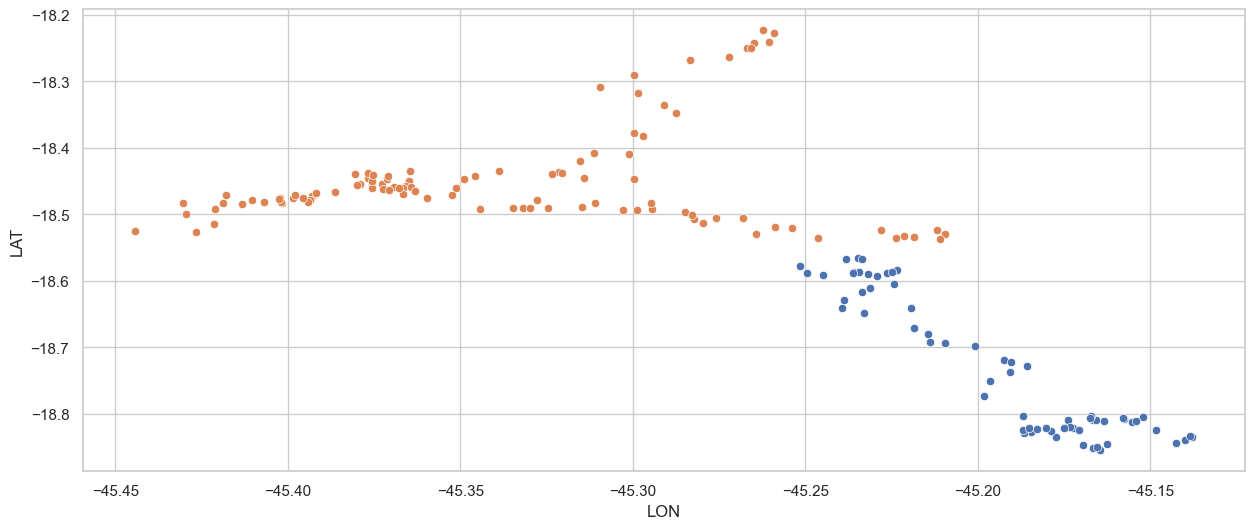

In [940]:
sns.scatterplot(data=dados[(dados["LAT"]<=lat_medio)], x="LON", y="LAT")
sns.scatterplot(data=dados[(dados["LAT"]>lat_medio)], x="LON", y="LAT")

In [941]:
#Filtros DIVISÃO NORTE E SUL DOS DADOS DE INTERESSE
print('DIVISÃO NORTE E SUL DOS DADOS DE INTERESSE: FILTRO')
print('----------------------------------------------------------------------------------')
print('Quer utilizar TODOS os DADOS disponíveis (SEM FILTRO DE DIVISÃO NORTE/SUL)?')
print('Digite 1 para SIM: PROSSEGUIR SEM FILTRO DE DIVISÃO NORTE/SUL')
print('Digita 0 para NÃO: APLICAR FILTROS DE DIVISÃO NORTE/SUL')

usar_todos_dados = int(input())

if usar_todos_dados == 0:

    print('Insira o Código da Divisão Norte/Sul:')
    print('1 - Sul')
    print('2 - Norte')

    codigo_divisao_norte_sul = int(input())

    if codigo_divisao_norte_sul == 1:
        dados = dados[(dados["LAT"]<=lat_medio)]
        
    elif codigo_divisao_norte_sul == 2:
        dados = dados[(dados["LAT"]>lat_medio)]
        
    else:
        print('Filtro de Divisão Norte/Sul Não Aplicado!')

   
else:    
    print('Filtro de Divisão Norte/Sul Não Aplicado!')


#dados_filtrado.head()
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro de Valor Limite da Variável e Diferença entre Datas: {dados.shape[0]}')

DIVISÃO NORTE E SUL DOS DADOS DE INTERESSE: FILTRO
----------------------------------------------------------------------------------
Quer utilizar TODOS os DADOS disponíveis (SEM FILTRO DE DIVISÃO NORTE/SUL)?
Digite 1 para SIM: PROSSEGUIR SEM FILTRO DE DIVISÃO NORTE/SUL
Digita 0 para NÃO: APLICAR FILTROS DE DIVISÃO NORTE/SUL
1
Filtro de Divisão Norte/Sul Não Aplicado!
*Quantidade de Dados Disponíveis Após Aplicação do Filtro de Valor Limite da Variável e Diferença entre Datas: 172


<Axes: xlabel='LON', ylabel='LAT'>

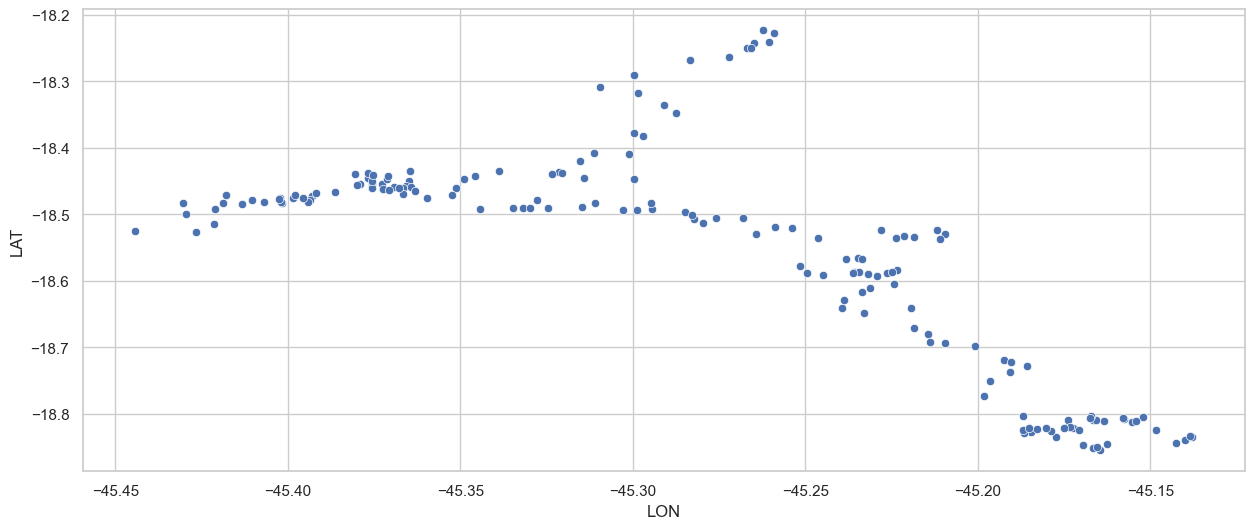

In [942]:
sns.scatterplot(data=dados, x="LON", y="LAT")

In [943]:
# Divisão Conjunto de Dados: Leste/Oeste - Filtro

In [944]:
print('Longitudes: Máxima e Mínima - Quantitativo:')
print(f'Longitude Máxima {dados["LON"].max()}')
print(f'Longitude Mínima {dados["LON"].min()}')
lon_medio = (dados["LON"].max() + dados["LON"].min())/2
print(f'Longitude Média {lon_medio}')

Longitudes: Máxima e Mínima - Quantitativo:
Longitude Máxima -45.1379
Longitude Mínima -45.4442
Longitude Média -45.29105


In [945]:
print('Latitudes: Leste e Oeste - Quantitativo:')
print(f'Latitude Oeste da Região de Interesse: {dados[(dados["LON"]<=lon_medio)].shape[0]}')
print(f'Latitude Leste da Região de Interesse: {dados[(dados["LON"]>lon_medio)].shape[0]}')

Latitudes: Leste e Oeste - Quantitativo:
Latitude Oeste da Região de Interesse: 79
Latitude Leste da Região de Interesse: 93


In [946]:
# Divisão Conjunto de Dados: Leste/Oeste

print('DIVISÃO LESTE E OESTE DOS DADOS DE INTERESSE - FILTRO DE VERIFICAÇÃO')
print('-----------------------------------------')
print('-----------------------------------------')
print(f'*Quantidade de Dados Disponíveis Antes da Aplicação dos Filtros: {dados.shape[0]}')
print('-----------------------------------------')
print('-----------------------------------------')
print('Observe a quantidade de registros identificados em cada filtro de referência.')
print('Após avaliar, selecione o código do filtro a ser aplicado sobre o conjunto de dados.')
print('------------------------------------------------------------------')
print('------------------------------------------------------------------')


# ------- FILTROS

# Longitude Oeste da Região de Interesse
print('Longitude Oeste da Região de Interesse')
print('---------')
print('Código do Filtro: 1')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados["LON"]<=lon_medio)].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

# Longitude Leste da Região de Interesse
print('Longitude Leste da Região de Interesse')
print('---------')
print('Código do Filtro: 2')
print('---------')    
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro: {dados[(dados["LON"]>lon_medio)].shape[0]}')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

DIVISÃO LESTE E OESTE DOS DADOS DE INTERESSE - FILTRO DE VERIFICAÇÃO
-----------------------------------------
-----------------------------------------
*Quantidade de Dados Disponíveis Antes da Aplicação dos Filtros: 172
-----------------------------------------
-----------------------------------------
Observe a quantidade de registros identificados em cada filtro de referência.
Após avaliar, selecione o código do filtro a ser aplicado sobre o conjunto de dados.
------------------------------------------------------------------
------------------------------------------------------------------
Longitude Oeste da Região de Interesse
---------
Código do Filtro: 1
---------
*Quantidade de Dados Disponíveis Após Aplicação do Filtro: 79
-----------------------------------------------------------------------
-----------------------------------------------------------------------

Longitude Leste da Região de Interesse
---------
Código do Filtro: 2
---------
*Quantidade de Dados Disponíveis

<Axes: xlabel='LON', ylabel='LAT'>

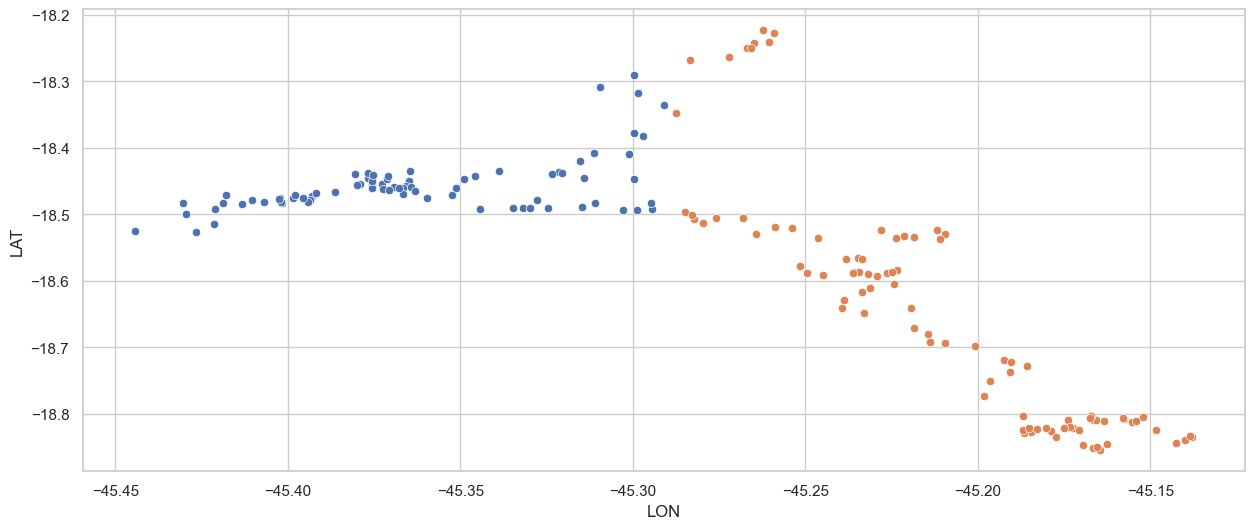

In [947]:
sns.scatterplot(data=dados[(dados["LON"]<=lon_medio)], x="LON", y="LAT")
sns.scatterplot(data=dados[(dados["LON"]>lon_medio)], x="LON", y="LAT")

In [948]:
#Filtros DIVISÃO NORTE E SUL DOS DADOS DE INTERESSE
print('DIVISÃO LESTE E OESTE DOS DADOS DE INTERESSE: FILTRO')
print('----------------------------------------------------------------------------------')
print('Quer utilizar TODOS os DADOS disponíveis (SEM FILTRO DE DIVISÃO LESTE/OESTE)?')
print('Digite 1 para SIM: PROSSEGUIR SEM FILTRO DE DIVISÃO LESTE/OESTE')
print('Digita 0 para NÃO: APLICAR FILTROS DE DIVISÃO LESTE/OESTE')

usar_todos_dados = int(input())

if usar_todos_dados == 0:

    print('Insira o Código da Divisão Leste/Oeste:')
    print('1 - Oeste')
    print('2 - Leste')

    codigo_divisao_leste_oeste = int(input())

    if codigo_divisao_leste_oeste == 1:
        dados = dados[(dados["LON"]<=lon_medio)]
        
    elif codigo_divisao_leste_oeste == 2:
        dados = dados[(dados["LON"]>lon_medio)]
        
    else:
        print('Filtro de Divisão Leste/Oeste Não Aplicado!')

   
else:    
    print('Filtro de Divisão Leste/Oeste Não Aplicado!')


#dados_filtrado.head()
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro de Valor Limite da Variável e Diferença entre Datas: {dados.shape[0]}')

DIVISÃO LESTE E OESTE DOS DADOS DE INTERESSE: FILTRO
----------------------------------------------------------------------------------
Quer utilizar TODOS os DADOS disponíveis (SEM FILTRO DE DIVISÃO LESTE/OESTE)?
Digite 1 para SIM: PROSSEGUIR SEM FILTRO DE DIVISÃO LESTE/OESTE
Digita 0 para NÃO: APLICAR FILTROS DE DIVISÃO LESTE/OESTE
1
Filtro de Divisão Leste/Oeste Não Aplicado!
*Quantidade de Dados Disponíveis Após Aplicação do Filtro de Valor Limite da Variável e Diferença entre Datas: 172


<Axes: xlabel='LON', ylabel='LAT'>

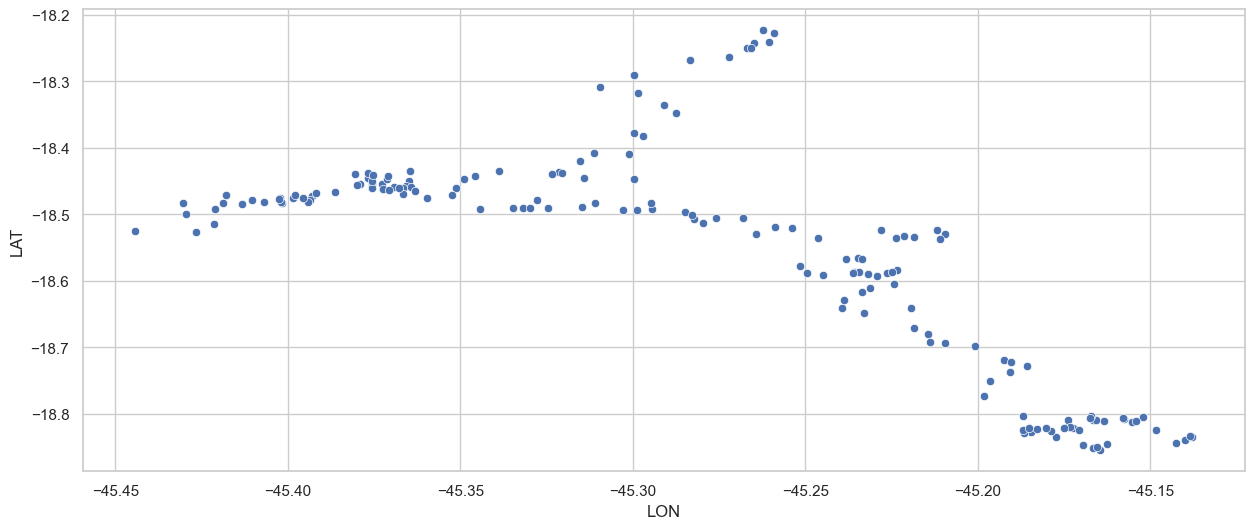

In [949]:
sns.scatterplot(data=dados, x="LON", y="LAT")

In [950]:
# Filtro para a Variável de Interesse: Limite de Corte e Outliers

In [951]:
# Valore Mínimos Mensurados em Campo para as Variáveis de Interesse

if variavel_interesse == 'Turbidity':
    valor_minimo_sonda_tres_marias = 0.1
elif variavel_interesse == 'Chlorophyll':
    valor_minimo_sonda_tres_marias = 0.31
elif variavel_interesse == 'Secchi':
    valor_minimo_sonda_tres_marias = 0.1 #Pampulha


print('VARIÁVEL - Valor Mínimo Mensurado em Campo - TRÊS MARIAS/PAMPULHA')
print('------------------------------------------------------------------')
print(f'*Menor Valor Medido em Campo pela Sonda em Três Marias/Pampulha: {valor_minimo_sonda_tres_marias}')

print('------------------------------------------------------------------')
print('Quer REMOVER os DADOS com Valores Inferiores ao Mínimo Mensurado em Campo em Três Marias/Pampulha?')
print('Digite 1 para SIM: PROSSEGUIR SEM FILTRO')
print('Digita 4 para: REMOVER OS VALORES INFERIORES ÀS MEDIÇÕES EM CAMPO DE TRÊS MARIAS/PAMPULHA')


usar_todos_dados = int(input())

if usar_todos_dados == 4:
    print('Filtro por Valor Mínimo de Campo - Três Marias: ')
    limite_minimo = valor_minimo_sonda_tres_marias
    
    dados.drop(dados[dados['VALUE'] < limite_minimo].index, inplace = True)
    
else:
    print('Filtro de Valor Mínimo de Variável Não Aplicado!')
        
        
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro por Valor Mínimo : {dados.shape[0]}')

VARIÁVEL - Valor Mínimo Mensurado em Campo - TRÊS MARIAS/PAMPULHA
------------------------------------------------------------------
*Menor Valor Medido em Campo pela Sonda em Três Marias/Pampulha: 0.1
------------------------------------------------------------------
Quer REMOVER os DADOS com Valores Inferiores ao Mínimo Mensurado em Campo em Três Marias/Pampulha?
Digite 1 para SIM: PROSSEGUIR SEM FILTRO
Digita 4 para: REMOVER OS VALORES INFERIORES ÀS MEDIÇÕES EM CAMPO DE TRÊS MARIAS/PAMPULHA
1
Filtro de Valor Mínimo de Variável Não Aplicado!
*Quantidade de Dados Disponíveis Após Aplicação do Filtro por Valor Mínimo : 172


In [952]:
# Valore Máximos Mensurados em Campo para as Variáveis de Interesse

if variavel_interesse == 'Turbidity':
    valor_maximo_sonda_tres_marias = 432.0
elif variavel_interesse == 'Chlorophyll':
    valor_maximo_sonda_tres_marias = 112.96 # Pampulha
elif variavel_interesse == 'Secchi':
    valor_maximo_sonda_tres_marias = 7.50


print('VARIÁVEL - Valor Máximo Mensurado em Campo - TRÊS MARIAS/PAMPULHA')
print('------------------------------------------------------------------')
print(f'*Maior Valor Medido em Campo pela Sonda em Três Marias/Pampulha: {valor_maximo_sonda_tres_marias}')

print('------------------------------------------------------------------')
print('Quer REMOVER os DADOS com Valores Superiores ao Máximo Mensurado em Campo em Três Marias/Pampulha?')
print('Digite 1 para SIM: PROSSEGUIR SEM FILTRO')
print('Digita 4 para: REMOVER OS VALORES SUPERIORES ÀS MEDIÇÕES EM CAMPO DE TRÊS MARIAS/PAMPULHA')


usar_todos_dados = int(input())

if usar_todos_dados == 4:
    print('Filtro por Valor Máximo de Campo - Três Marias: ')
    limite_maximo = valor_maximo_sonda_tres_marias
    
    dados.drop(dados[dados['VALUE'] > limite_maximo].index, inplace = True)
    
else:
    print('Filtro de Valor Máximo de Variável Não Aplicado!')
        
        
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro por Valor Máximo : {dados.shape[0]}')

VARIÁVEL - Valor Máximo Mensurado em Campo - TRÊS MARIAS/PAMPULHA
------------------------------------------------------------------
*Maior Valor Medido em Campo pela Sonda em Três Marias/Pampulha: 432.0
------------------------------------------------------------------
Quer REMOVER os DADOS com Valores Superiores ao Máximo Mensurado em Campo em Três Marias/Pampulha?
Digite 1 para SIM: PROSSEGUIR SEM FILTRO
Digita 4 para: REMOVER OS VALORES SUPERIORES ÀS MEDIÇÕES EM CAMPO DE TRÊS MARIAS/PAMPULHA
1
Filtro de Valor Máximo de Variável Não Aplicado!
*Quantidade de Dados Disponíveis Após Aplicação do Filtro por Valor Máximo : 172


In [953]:
# Limites Interquartis da Variável de Interesse
IQR = dados.VALUE.quantile(0.75) - dados.VALUE.quantile(0.25) 
lower_bridge = dados['VALUE'].quantile(0.25)-(IQR*1.5) 
upper_bridge = dados['VALUE'].quantile(0.75)+(IQR*1.5)

In [954]:
# Desvio Padrão - Determinação do Limite de Corte - Variável de Interesse

print('VARIÁVEL - DEFINIÇÃO DE VALORES LIMITE PARA CORTE/OUTLIERS')
print('------------------------------------------------------------------')
print('Verificação do Limite de Corte da Variável de Interesse:')
print(f'*Desvio Padrão da Variável de Interesse: {dados.VALUE.std()}')
print(f'*Limite Interquartil Inferior da Variável de Interesse: {lower_bridge}')
print(f'*Limite Interquartil Superior da Variável de Interesse: {upper_bridge}')
print(f'*Valor Médio da Variável de Interesse: {dados.VALUE.mean()}')
print(f'*Valor da Mediana da Variável de Interesse: {dados.VALUE.median()}')
print(f'*Valor Mínimo da Variável de Interesse: {dados.VALUE.min()}')
print(f'*Valor Máximo da Variável de Interesse: {dados.VALUE.max()}')

print('------------------------------------------------------------------')
print('Quer utilizar TODOS os DADOS disponíveis (SEM FILTRO DE VALOR DA VARIÁVEL DE INTERESSE)?')
print('Digite 1 para SIM: PROSSEGUIR SEM FILTRO')
print('Digita 2 para: Filtrar por DESVIO PADRÃO')
print('Digita 3 para: Filtrar por INTERVALO INTERQUARTIS (LIMITE SUPERIOR)')
print('Digita 4 para: INFORMAR VALOR LIMITE MANUALMENTE')


usar_todos_dados = int(input())

if usar_todos_dados==2:
    print('Filtro por Desvio Padrão: ')
    print('Digite o Valor pelo qual o Desvio Padrão Deverá ser Multiplicado (inteiro): ')
    valor_multiplica_desvio_padrao = int(input())
    
    limite_corte_variavel_desvio_padrao = valor_multiplica_desvio_padrao * dados.VALUE.std()
    
    print(f'*O Valor Limite de Corte é : {limite_corte_variavel_desvio_padrao}')

    dados.drop(dados[dados['VALUE'] > limite_corte_variavel_desvio_padrao].index, inplace = True)

elif usar_todos_dados==3:
    print('Filtro por Intervalos InterQuartis: ')
    #IQR=dados.VALUE.quantile(0.75)-dados.VALUE.quantile(0.25) 
    #lower_bridge=dados['VALUE'].quantile(0.25)-(IQR*1.5) 
    #upper_bridge=dados['VALUE'].quantile(0.75)+(IQR*1.5)
    
    print(f'*O Valor Limite de Corte é : {upper_bridge}')

    dados.drop(dados[dados['VALUE'] > upper_bridge].index, inplace = True)
    
elif usar_todos_dados == 4:
    print('Filtro por Inserção Manual do Limite: ')
    print('Digite o Valor Limite para Filtragem dos Dados da Variável de Interesse (Valor Inteiro): ')
    limite_manual = int(input())
    
    dados.drop(dados[dados['VALUE'] > limite_manual].index, inplace = True)
    
else:
    print('Filtro de Valor Limite de Variável Não Aplicado!')
        
        
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro por Desvio Padrão/InterQuartis : {dados.shape[0]}')

VARIÁVEL - DEFINIÇÃO DE VALORES LIMITE PARA CORTE/OUTLIERS
------------------------------------------------------------------
Verificação do Limite de Corte da Variável de Interesse:
*Desvio Padrão da Variável de Interesse: 0.9185444806912162
*Limite Interquartil Inferior da Variável de Interesse: -0.5287499999999999
*Limite Interquartil Superior da Variável de Interesse: 3.20125
*Valor Médio da Variável de Interesse: 1.4798837209302327
*Valor da Mediana da Variável de Interesse: 1.3250000000000002
*Valor Mínimo da Variável de Interesse: 0.2
*Valor Máximo da Variável de Interesse: 6.27
------------------------------------------------------------------
Quer utilizar TODOS os DADOS disponíveis (SEM FILTRO DE VALOR DA VARIÁVEL DE INTERESSE)?
Digite 1 para SIM: PROSSEGUIR SEM FILTRO
Digita 2 para: Filtrar por DESVIO PADRÃO
Digita 3 para: Filtrar por INTERVALO INTERQUARTIS (LIMITE SUPERIOR)
Digita 4 para: INFORMAR VALOR LIMITE MANUALMENTE
1
Filtro de Valor Limite de Variável Não Aplicado!
*

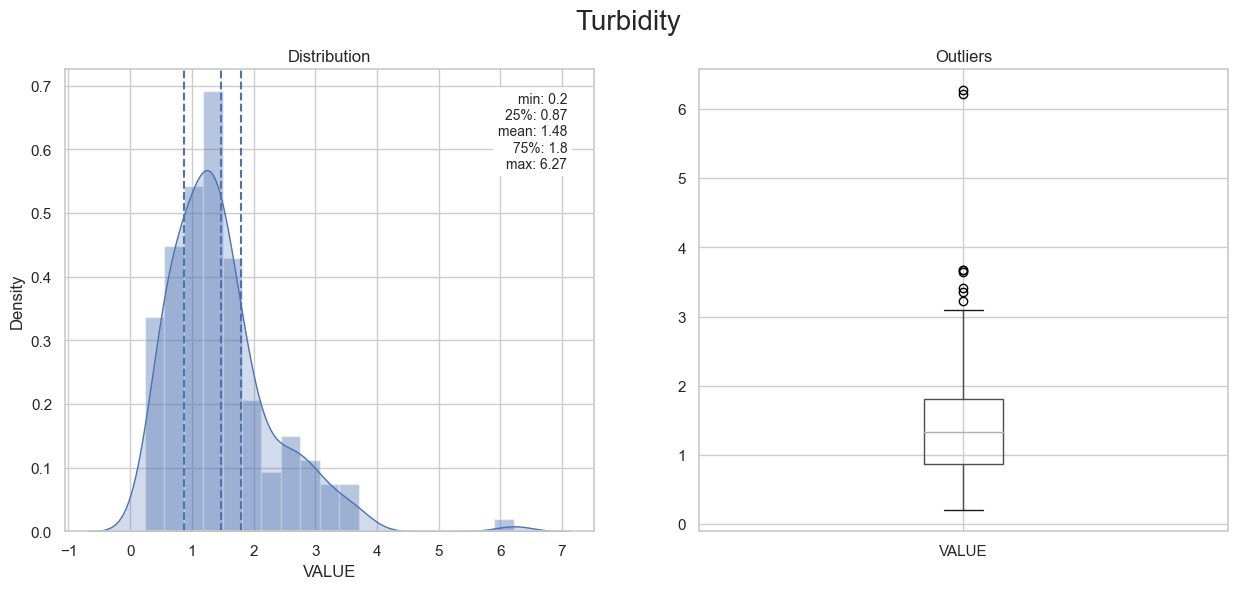

In [955]:
# Verificando a Distribuição da Variável de Interesse
x = 'VALUE'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(variavel_interesse, fontsize=20)
### distribution
ax[0].title.set_text('Distribution')
variable = dados[x].fillna(dados[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dados[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('Outliers')
tmp_dtf = pd.DataFrame(dados[x])
#tmp_dtf[x] = np.log(dados[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

In [956]:
# Verificando Duplicações de Registros

In [957]:
if len(dados[dados.duplicated()]) > 0:
    pymsgbox.alert('Há Dados Duplicados, verifique', 'Dados Duplicados')

In [958]:
print(f'Quantidade de Dados Duplicados: {len(dados[dados.duplicated()])}')

Quantidade de Dados Duplicados: 0


In [959]:
print(f'*Quantidade de Dados Disponíveis Antes da Remoção de Dados Duplicados (Caso Ocorram) : {dados.shape[0]}')
print('-------------------------------------------------------------------------------------------------------')

if len(dados[dados.duplicated()]) > 0:
    print('Deseja Remover Dados Duplicados?')
    print('---------------------------------')
    print('1- Sim')
    print('2- Não')
    print('---------------------------------')
    codigo_remover_dados = int(input())
    if codigo_remover_dados == 1:
        dados.drop_duplicates(inplace=True)
    else:
        print('Dados Duplicados Não Foram Removidos')

print(f'*Quantidade de Dados Disponíveis Após Remoção de Dados Duplicados: {dados.shape[0]}')

*Quantidade de Dados Disponíveis Antes da Remoção de Dados Duplicados (Caso Ocorram) : 172
-------------------------------------------------------------------------------------------------------
*Quantidade de Dados Disponíveis Após Remoção de Dados Duplicados: 172


In [960]:
# Limites Interquartis da Variável de Interesse
IQR = dados.VALUE.quantile(0.75) - dados.VALUE.quantile(0.25) 
lower_bridge = dados['VALUE'].quantile(0.25)-(IQR*1.5) 
global interquartilsuperior
interquartilsuperior = dados['VALUE'].quantile(0.75)+(IQR*1.5)

In [961]:
# Desvio Padrão - Determinação do Limite de Corte - Variável de Interesse
print('VARIÁVEL - DEFINIÇÃO DE VALORES LIMITE PARA CORTE/OUTLIERS')
print('------------------------------------------------------------------')
print('Verificação do Limite de Corte da Variável de Interesse:')
print(f'*Desvio Padrão da Variável de Interesse: {dados.VALUE.std()}')
print(f'*Limite Interquartil Inferior da Variável de Interesse: {lower_bridge}')
print(f'*Limite Interquartil Superior da Variável de Interesse: {interquartilsuperior}')
print(f'*Valor Médio da Variável de Interesse: {dados.VALUE.mean()}')
print(f'*Valor Mínimo da Variável de Interesse: {dados.VALUE.min()}')
print(f'*Valor Máximo da Variável de Interesse: {dados.VALUE.max()}')

VARIÁVEL - DEFINIÇÃO DE VALORES LIMITE PARA CORTE/OUTLIERS
------------------------------------------------------------------
Verificação do Limite de Corte da Variável de Interesse:
*Desvio Padrão da Variável de Interesse: 0.9185444806912162
*Limite Interquartil Inferior da Variável de Interesse: -0.5287499999999999
*Limite Interquartil Superior da Variável de Interesse: 3.20125
*Valor Médio da Variável de Interesse: 1.4798837209302327
*Valor Mínimo da Variável de Interesse: 0.2
*Valor Máximo da Variável de Interesse: 6.27


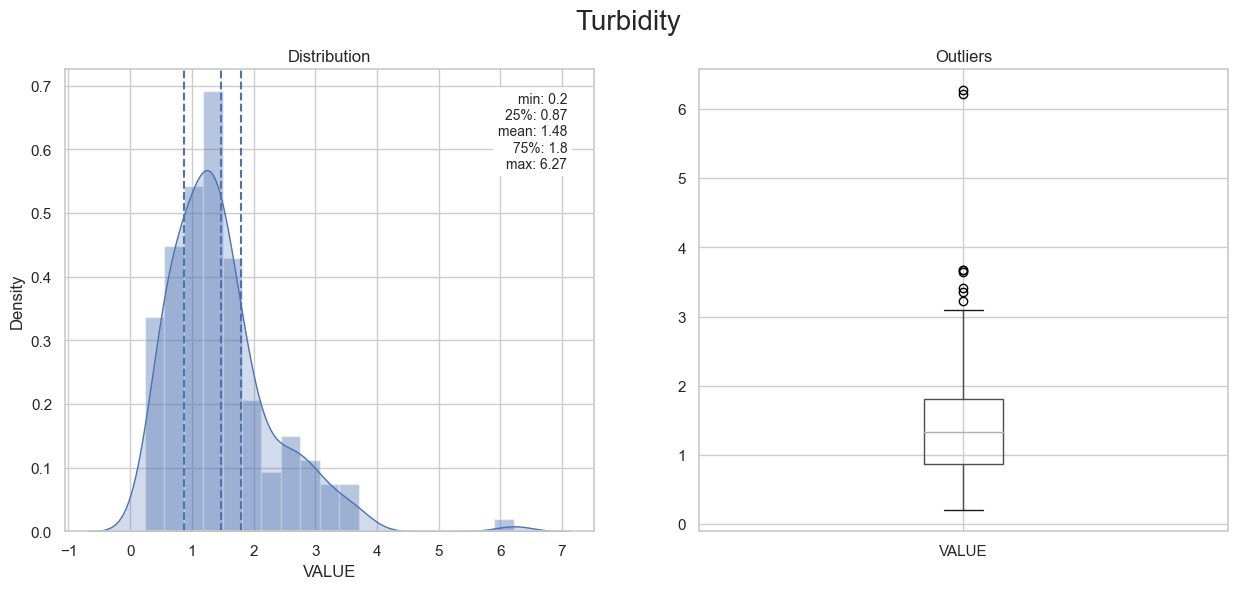

In [962]:
# Verificando a Distribuição da Variável de Interesse - Novamente
x = 'VALUE'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(variavel_interesse, fontsize=20)
### distribution
ax[0].title.set_text('Distribution')
variable = dados[x].fillna(dados[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dados[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('Outliers')
tmp_dtf = pd.DataFrame(dados[x])
#tmp_dtf[x] = np.log(dados[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

# Outliers - Algoritmos de Identifcação Automatizada

In [963]:
# Tabela para Registro de Outliers

In [964]:
tabela_out = pd.DataFrame()
columns_result = ['Metodo','Anomalias','Maximo', 'Minimo', 'Media', 'Desvio_Padrao',
                  'Normais', 'Max_Normal', 'Min_Normal', 'Media_Normal', 'Desvio_Normal','Percentual_Removido']

tabela_out = pd.DataFrame(columns=columns_result)
tabela_out

Empty DataFrame
Columns: [Metodo, Anomalias, Maximo, Minimo, Media, Desvio_Padrao, Normais, Max_Normal, Min_Normal, Media_Normal, Desvio_Normal, Percentual_Removido]
Index: []

In [965]:
#colunas_totais[0:-1]

In [966]:
# Outliers

In [967]:
dados_outliers = dados.copy()

In [968]:
# Verificação Inicial - Antes da Removação de Outliers

dados_outliers.reset_index(inplace=True)
del(dados_outliers['index'])
dados_outliers.head(3)

#colunas_outliers = colunas_totais

#colunas_outliers = ['BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6', 'BAND_7',
#       'BAND_8', 'BAND_8A', 'BAND_9', 'BAND_11', 'BAND_12', 'VALUE']

colunas_outliers = ['BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6', 'BAND_7',
       'BAND_8', 'BAND_8A', 'BAND_9', 'BAND_11', 'BAND_12']

#colunas_outliers = ['VALUE']

tamanho_base = dados_outliers.shape[0]

# plotting scattered graph
fig = px.scatter([i for i in range(len(dados_outliers['VALUE']))], y=dados_outliers['VALUE'], title='Original Data')
fig.show()

In [969]:
# IQR Interquartile Range

In [970]:
metodo_outlier = 'IQR'

In [971]:
IQR = dados_outliers.VALUE.quantile(0.75)-dados_outliers.VALUE.quantile(0.25) 
lower_bridge_IQR = dados_outliers['VALUE'].quantile(0.25)-(IQR*1.5) 
upper_bridge_IQR = dados_outliers['VALUE'].quantile(0.75)+(IQR*1.5)
lower_bridge_IQR, upper_bridge_IQR

(-0.5287499999999999, 3.20125)

In [972]:
def iqr_outlier(x):
    if ((x >= lower_bridge_IQR) & (x<=upper_bridge_IQR)):
    #if (dados[(dados['VALUE'] >= lower_bridge_IQR) & (dados['VALUE']<=upper_bridge_IQR)]):
        return 1
    else:
        return -1

In [973]:
# adding the anomalies to the dataset 
dados_outliers['anomalies_iqr'] = dados_outliers['VALUE'].apply(iqr_outlier)
anomalies_iqr_df = dados_outliers.query('anomalies_iqr == -1')
normal_iqr_df = dados_outliers.query('anomalies_iqr == 1')
#anomalies_iqr_df['VALUE'].describe(), normal_iqr_df['VALUE'].describe()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
plt.suptitle(metodo_outlier + ' - Distribuição das Anomalias Identificadas')
sns.histplot(data=anomalies_iqr_df, x="VALUE", kde=True, color="red", ax=axes[0])
sns.histplot(data=normal_iqr_df, x="VALUE", kde=True, color="skyblue", ax=axes[1])
plt.show()

In [974]:
quant_arquivos_removidos = len(anomalies_iqr_df)
valor_max_removido = anomalies_iqr_df['VALUE'].max()
valor_min_removido = anomalies_iqr_df['VALUE'].min()
valor_medio_removido = anomalies_iqr_df['VALUE'].mean()
desvio_padrao_removido = anomalies_iqr_df['VALUE'].std()
percentual_removido = (quant_arquivos_removidos / tamanho_base) * 100.

print('--------------------------------------------------------')
print(metodo_outlier  + ' - Anomalias Identificadas/Removidas:')
print('--------------------------------------------------------')
print(f'Quantidade de Anomalias Identificadas: {quant_arquivos_removidos}')
print(f'Valor Máximo: {valor_max_removido}')
print(f'Valor Mínimo: {valor_min_removido}')
print(f'Valor Médio: {valor_medio_removido}')
print(f'Desvio Padrão: {desvio_padrao_removido}')
print(f'Percentual Removido: {percentual_removido}')


quant_arquivos_mantidos = len(normal_iqr_df)
valor_max_mantido= normal_iqr_df['VALUE'].max()
valor_min_mantido = normal_iqr_df['VALUE'].min()
valor_medio_mantido = normal_iqr_df['VALUE'].mean()
desvio_padrao_mantido = normal_iqr_df['VALUE'].std()
percentual_mantido = (quant_arquivos_mantidos / tamanho_base) * 100.

print('--------------------------------------------------------')
print(metodo_outlier  + ' - Normais Mantidos:')
print('--------------------------------------------------------')
print(f'Quantidade de Dados Normais Identificados: {quant_arquivos_mantidos}')
print(f'Valor Máximo: {valor_max_mantido}')
print(f'Valor Mínimo: {valor_min_mantido}')
print(f'Valor Médio: {valor_medio_mantido}')
print(f'Desvio Padrão: {desvio_padrao_mantido}')
print(f'Percentual Mantido: {percentual_mantido}')

--------------------------------------------------------
IQR - Anomalias Identificadas/Removidas:
--------------------------------------------------------
Quantidade de Anomalias Identificadas: 8
Valor Máximo: 6.27
Valor Mínimo: 3.23
Valor Médio: 4.182499999999999
Desvio Padrão: 1.2831740779355363
Percentual Removido: 4.651162790697675
--------------------------------------------------------
IQR - Normais Mantidos:
--------------------------------------------------------
Quantidade de Dados Normais Identificados: 164
Valor Máximo: 3.1
Valor Mínimo: 0.2
Valor Médio: 1.3480487804878047
Desvio Padrão: 0.6621566159972526
Percentual Mantido: 95.34883720930233


In [975]:
# gravando resultados
tabela_out = tabela_out._append({'Metodo': metodo_outlier,
                                'Anomalias': quant_arquivos_removidos,
                                'Maximo': valor_max_removido,
                                'Minimo': valor_min_removido,
                                'Media': valor_medio_removido,
                                'Desvio_Padrao': desvio_padrao_removido,
                                
                                'Normais': quant_arquivos_mantidos,
                                'Max_Normal': valor_max_mantido,
                                'Min_Normal': valor_min_mantido,
                                'Media_Normal': valor_medio_mantido,
                                'Desvio_Normal': desvio_padrao_mantido,
                                'Percentual_Removido': percentual_removido},
                               ignore_index=True)

tabela_out

Metodo Anomalias  Maximo  Minimo   Media  Desvio_Padrao Normais  Max_Normal  \
0    IQR         8    6.27    3.23  4.1825       1.283174     164         3.1   

   Min_Normal  Media_Normal  Desvio_Normal  Percentual_Removido  
0         0.2      1.348049       0.662157             4.651163

# plotting the graph for outliers
normal = go.Scatter(x=dados_outliers.index.astype(str),y=dados_outliers['VALUE'],name="Dataset",mode='markers')
outlier = go.Scatter(x=anomalies_iqr_df.index.astype(str),y=anomalies_iqr_df['VALUE'],name="Anomalies",mode='markers',
                marker=dict(color='red', size=6,
                            line=dict(color='red', width=1)))

# labeling the graph
layout = go.Layout(title=metodo_outlier, yaxis_title=variavel_interesse, xaxis_title = 'Amostra')

# plotting 
data = [normal, outlier]
fig = go.Figure(data=data, layout=layout)
fig.show()

In [976]:
# Desvio Padrão - Outlier

In [977]:
metodo_outlier = 'Standard Deviation (3x)'

In [978]:
mult = 3

In [979]:
std_reference = dados_outliers['VALUE'].std() * mult
std_reference

2.7556334420736484

In [980]:
lower_std = dados_outliers['VALUE'].mean() - std_reference
upper_std = dados_outliers['VALUE'].mean() + std_reference
lower_std, upper_std

(-1.2757497211434157, 4.235517163003881)

In [981]:
def std_outlier(x):
    if ((x >= lower_std) & (x<=upper_std)):
        return 1
    else:
        return -1

In [982]:
# adding the anomalies to the dataset 
dados_outliers['anomalies_std'] = dados_outliers['VALUE'].apply(std_outlier)
anomalies_std_df = dados_outliers.query('anomalies_std == -1')
normal_std_df = dados_outliers.query('anomalies_std == 1')
#anomalies_iqr_df['VALUE'].describe(), normal_iqr_df['VALUE'].describe()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
plt.suptitle(metodo_outlier + ' - Distribuição das Anomalias Identificadas')
sns.histplot(data=anomalies_std_df, x="VALUE", kde=True, color="red", ax=axes[0])
sns.histplot(data=normal_std_df, x="VALUE", kde=True, color="skyblue", ax=axes[1])
plt.show()

In [983]:
quant_arquivos_removidos = len(anomalies_std_df)
valor_max_removido = anomalies_std_df['VALUE'].max()
valor_min_removido = anomalies_std_df['VALUE'].min()
valor_medio_removido = anomalies_std_df['VALUE'].mean()
desvio_padrao_removido = anomalies_std_df['VALUE'].std()
percentual_removido = (quant_arquivos_removidos / tamanho_base) * 100.

print('--------------------------------------------------------')
print(metodo_outlier  + ' - Anomalias Identificadas/Removidas:')
print('--------------------------------------------------------')
print(f'Quantidade de Anomalias Identificadas: {quant_arquivos_removidos}')
print(f'Valor Máximo: {valor_max_removido}')
print(f'Valor Mínimo: {valor_min_removido}')
print(f'Valor Médio: {valor_medio_removido}')
print(f'Desvio Padrão: {desvio_padrao_removido}')
print(f'Percentual Removido: {percentual_removido}')


quant_arquivos_mantidos = len(normal_std_df)
valor_max_mantido= normal_std_df['VALUE'].max()
valor_min_mantido = normal_std_df['VALUE'].min()
valor_medio_mantido = normal_std_df['VALUE'].mean()
desvio_padrao_mantido = normal_std_df['VALUE'].std()
percentual_mantido = (quant_arquivos_mantidos / tamanho_base) * 100.

print('--------------------------------------------------------')
print(metodo_outlier  + ' - Normais Mantidos:')
print('--------------------------------------------------------')
print(f'Quantidade de Dados Normais Identificados: {quant_arquivos_mantidos}')
print(f'Valor Máximo: {valor_max_mantido}')
print(f'Valor Mínimo: {valor_min_mantido}')
print(f'Valor Médio: {valor_medio_mantido}')
print(f'Desvio Padrão: {desvio_padrao_mantido}')
print(f'Percentual Mantido: {percentual_mantido}')

--------------------------------------------------------
Standard Deviation (3x) - Anomalias Identificadas/Removidas:
--------------------------------------------------------
Quantidade de Anomalias Identificadas: 2
Valor Máximo: 6.27
Valor Mínimo: 6.22
Valor Médio: 6.244999999999999
Desvio Padrão: 0.03535533905932725
Percentual Removido: 1.1627906976744187
--------------------------------------------------------
Standard Deviation (3x) - Normais Mantidos:
--------------------------------------------------------
Quantidade de Dados Normais Identificados: 170
Valor Máximo: 3.67
Valor Mínimo: 0.2
Valor Médio: 1.4238235294117647
Desvio Padrão: 0.7627752765526777
Percentual Mantido: 98.83720930232558


In [984]:
# gravando resultados
tabela_out = tabela_out._append({'Metodo': metodo_outlier,
                                'Anomalias': quant_arquivos_removidos,
                                'Maximo': valor_max_removido,
                                'Minimo': valor_min_removido,
                                'Media': valor_medio_removido,
                                'Desvio_Padrao': desvio_padrao_removido,
                                
                                'Normais': quant_arquivos_mantidos,
                                'Max_Normal': valor_max_mantido,
                                'Min_Normal': valor_min_mantido,
                                'Media_Normal': valor_medio_mantido,
                                'Desvio_Normal': desvio_padrao_mantido,
                                'Percentual_Removido': percentual_removido},
                               ignore_index=True)

tabela_out

Metodo Anomalias  Maximo  Minimo   Media  Desvio_Padrao  \
0                      IQR         8    6.27    3.23  4.1825       1.283174   
1  Standard Deviation (3x)         2    6.27    6.22  6.2450       0.035355   

  Normais  Max_Normal  Min_Normal  Media_Normal  Desvio_Normal  \
0     164        3.10         0.2      1.348049       0.662157   
1     170        3.67         0.2      1.423824       0.762775   

   Percentual_Removido  
0             4.651163  
1             1.162791

# plotting the graph for outliers
normal = go.Scatter(x=dados_outliers.index.astype(str),y=dados_outliers['VALUE'],name="Dataset",mode='markers')
outlier = go.Scatter(x=anomalies_std_df.index.astype(str),y=anomalies_std_df['VALUE'],name="Anomalies",mode='markers',
                marker=dict(color='red', size=6,
                            line=dict(color='red', width=1)))

# labeling the graph
layout = go.Layout(title=metodo_outlier, yaxis_title=variavel_interesse, xaxis_title = 'Amostra')

# plotting 
data = [normal, outlier]
fig = go.Figure(data=data, layout=layout)
fig.show()

In [985]:
# Outliers - Resultados

In [986]:
tabela_out.sort_values('Percentual_Removido', ascending=True, inplace=True)
tabela_out.reset_index(inplace=True, drop=True)
tabela_out

Metodo Anomalias  Maximo  Minimo   Media  Desvio_Padrao  \
0  Standard Deviation (3x)         2    6.27    6.22  6.2450       0.035355   
1                      IQR         8    6.27    3.23  4.1825       1.283174   

  Normais  Max_Normal  Min_Normal  Media_Normal  Desvio_Normal  \
0     170        3.67         0.2      1.423824       0.762775   
1     164        3.10         0.2      1.348049       0.662157   

   Percentual_Removido  
0             1.162791  
1             4.651163

In [987]:
#normal_std_df.head(3)

In [988]:
#normal_std_df.iloc[:, :-7].head(3)

In [989]:
# Remoção de Outliers - Decisão

In [990]:
# Remocação de Outliers
quant_dados = dados.shape[0]

print('OUTLIERS - REMOÇÃO')
print('-----------------------------------------')
print('Informe o código do Método para Remoção dos Outliers identificados:')
print('------------------------------------------------------------------')

cprint('1- One-Class SVM', 'green', attrs=['bold'], file=sys.stderr)
#print('WHO global overview of water quality parameters_2022')
#print('---------')

cprint('2- DBScan', 'green', attrs=['bold'], file=sys.stderr)
#print('Canada - A MONITOR’S GUIDE TO WATER QUALITY')
#print('---------')

cprint('3- Local Outlier Factor', 'green', attrs=['bold'], file=sys.stderr)
#print('Uso Residencial Malásia - 5 a 25 NTU')
#print('---------')

cprint('4- Isolation Forest', 'green', attrs=['bold'], file=sys.stderr)
#print('Estados Unidos - Water Quality Certifications for Existing Hydropower Dams')
#print('---------')

cprint('5- Elliptic Envelope', 'green', attrs=['bold'], file=sys.stderr)
#print('Brasil - CONAMA 357')
#print('---------')

cprint('6- IQR', 'green', attrs=['bold'], file=sys.stderr)
#print('WHO standards Potabilidade, Índia, Brasil, outros')
#print('---------')

cprint('7- Desvio Padrão (Média +- 3 x STD)', 'green', attrs=['bold'], file=sys.stderr)
#print('WHO standards Potabilidade, Índia, Brasil, outros')
#print('---------')

cprint('0 - NÃO REMOVER OUTLIERS', 'green', attrs=['bold'], file=sys.stderr)
#print('Austrália - Recreação')
#print('---------')


cod_metodo_outliers = int(input())
print('------------------------------------------------------')

if cod_metodo_outliers == 1:
    #dados = normal_one_class_df#[colunas_outliers]
    dados = normal_one_class_df.iloc[:, :-7]

elif cod_metodo_outliers == 2:
    #dados = normal_dbscan_df#[colunas_outliers]
    dados = normal_dbscan_df.iloc[:, :-7]

elif cod_metodo_outliers == 3:
    #dados = normal_lof_df#[colunas_outliers]
    dados = normal_lof_df.iloc[:, :-7]

elif cod_metodo_outliers == 4:
    #dados = normal_iso_df#[colunas_outliers]
    dados = normal_iso_df.iloc[:, :-7]

elif cod_metodo_outliers == 5:
    #dados = normal_ee_df#[colunas_outliers]
    dados = normal_ee_df.iloc[:, :-7]

elif cod_metodo_outliers == 6:
    #dados = normal_iqr_df#[colunas_outliers]
    dados = normal_iqr_df.iloc[:, :-7]

elif cod_metodo_outliers == 7:
    #dados = normal_std_df#[colunas_outliers]
    dados = normal_std_df.iloc[:, :-7]

else:
    cod_metodo_outliers = 0
    print('Não Foram Removidos Outliers')
    

print('------------')
print(f'O código do método aplicado foi {cod_metodo_outliers}')
print('------------')
print(f'*Quantidade de Dados Disponíveis Antes da Remoção de Outliers: {quant_dados}')
print('------------')
print(f'*Quantidade de Dados Disponíveis Após da Remoção de Outliers: {dados.shape[0]}')

1- One-Class SVM
2- DBScan
3- Local Outlier Factor
4- Isolation Forest
5- Elliptic Envelope
6- IQR
7- Desvio Padrão (Média +- 3 x STD)
0 - NÃO REMOVER OUTLIERS


OUTLIERS - REMOÇÃO
-----------------------------------------
Informe o código do Método para Remoção dos Outliers identificados:
------------------------------------------------------------------
0
------------------------------------------------------
Não Foram Removidos Outliers
------------
O código do método aplicado foi 0
------------
*Quantidade de Dados Disponíveis Antes da Remoção de Outliers: 172
------------
*Quantidade de Dados Disponíveis Após da Remoção de Outliers: 172


In [991]:
dados.head(3)

SAMPLE_DATE  IMAGE_DATE TIME_SAMPLE IMAGE_HOUR     STATION_SAMPLE  \
30  2021-10-28  2021-10-28    10:44:00   13:12:51  Pontos_Randomicos   
31  2021-10-28  2021-10-28    10:54:00   13:12:51  Pontos_Randomicos   
32  2021-10-28  2021-10-28    11:02:00   13:12:51  Pontos_Randomicos   

    PARAMETER  VALUE UNIT  DEPTH DEPTH_UNIT                    LOCAL_NAME  \
30  Turbidity   1.29  FNU  0.104          m  Reservatorio de TrÃªs Marias   
31  Turbidity   1.81  FNU  0.213          m  Reservatorio de TrÃªs Marias   
32  Turbidity   1.63  FNU  0.058          m  Reservatorio de TrÃªs Marias   

   LOCATION_TYPE      LAT      LON COUNTRY ORGANIZATION_DATA HEMISPHERE  \
30     Reservoir -18.4760 -45.3986  Brazil         Simoa_Geo      South   
31     Reservoir -18.4618 -45.3725  Brazil         Simoa_Geo      South   
32     Reservoir -18.4552 -45.3727  Brazil         Simoa_Geo      South   

    SEASON SOURCE_DOMAIN  DIFF_DATE  BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  \
30  Spring   Tres_Marias          0   515.0   533.0   688.0   380.0   354.0   
31  Spring   Tres_Marias          0   502.0   481.0   654.0   349.0   304.0   
32  Spring   Tres_Marias          0   330.0   342.0   493.0   170.0   144.0   

    BAND_6  BAND_7  BAND_8  BAND_8A  BAND_9  BAND_11  BAND_12  MSK_CLDPRB  \
30   310.0   299.0   280.0    302.0   220.0    256.0    217.0         0.0   
31   228.0   212.0   213.0    203.0   180.0    216.0    173.0         0.0   
32    95.0   102.0    78.0     69.0    59.0     47.0     37.0         0.0   

    MSK_SNOW  QA60  CLDYPXPER  DRK_FEA_PE      NDWI      NBSI    WATER_CHECK  \
30       0.0   0.0     3.3458      0.7926  0.421488 -1.067188  Water_Surface   
31       0.0   0.0     3.3458      0.7926  0.508651 -0.977824  Water_Surface   
32       0.0   0.0     3.3458      0.7926  0.726795 -0.746787  Water_Surface   

   SNOW_CHECK SCENE_CLASS                       GEOMETRY SunGlint_Status  
30    No_Snow       Water  POINT (-45.398634 -18.476018)     no_sunglint  
31    No_Snow       Water  POINT (-45.372508 -18.461755)     no_sunglint  
32    No_Snow       Water  POINT (-45.372665 -18.455247)     no_sunglint

In [992]:
# Verificando Duplicações de Registros Novamente

In [993]:
if len(dados[dados.duplicated()]) > 0:
    pymsgbox.alert('Há Dados Duplicados, verifique', 'Dados Duplicados')

In [994]:
print(f'Quantidade de Dados Duplicados: {len(dados[dados.duplicated()])}')

Quantidade de Dados Duplicados: 0


In [995]:
if len(dados[dados.duplicated()]) > 0:

    print(f'*Quantidade de Dados Disponíveis Antes da Remoção de Dados Duplicados (Caso Ocorram) : {dados.shape[0]}')
    print('-------------------------------------------------------------------------------------------------------')

    if len(dados[dados.duplicated()]) > 0:
        print('Deseja Remover Dados Duplicados?')
        print('---------------------------------')
        print('1- Sim')
        print('2- Não')
        print('---------------------------------')
        codigo_remover_dados = int(input())
        if codigo_remover_dados == 1:
            dados.drop_duplicates(inplace=True)
        else:
            print('Dados Duplicados Não Foram Removidos')

    print(f'*Quantidade de Dados Disponíveis Após Remoção de Dados Duplicados: {dados.shape[0]}')

In [996]:
# Limites Interquartis da Variável de Interesse
IQR = dados.VALUE.quantile(0.75) - dados.VALUE.quantile(0.25) 
lower_bridge = dados['VALUE'].quantile(0.25)-(IQR*1.5) 
global interquartilsuperior
interquartilsuperior = dados['VALUE'].quantile(0.75)+(IQR*1.5)

In [997]:
# Desvio Padrão - Determinação do Limite de Corte - Variável de Interesse
print('VARIÁVEL - DEFINIÇÃO DE VALORES LIMITE PARA CORTE/OUTLIERS')
print('------------------------------------------------------------------')
print('Verificação do Limite de Corte da Variável de Interesse:')
print(f'*Desvio Padrão da Variável de Interesse: {dados.VALUE.std()}')
print(f'*Limite Interquartil Inferior da Variável de Interesse: {lower_bridge}')
print(f'*Limite Interquartil Superior da Variável de Interesse: {interquartilsuperior}')
print(f'*Valor Médio da Variável de Interesse: {dados.VALUE.mean()}')
print(f'*Valor Mínimo da Variável de Interesse: {dados.VALUE.min()}')
print(f'*Valor Máximo da Variável de Interesse: {dados.VALUE.max()}')

VARIÁVEL - DEFINIÇÃO DE VALORES LIMITE PARA CORTE/OUTLIERS
------------------------------------------------------------------
Verificação do Limite de Corte da Variável de Interesse:
*Desvio Padrão da Variável de Interesse: 0.9185444806912162
*Limite Interquartil Inferior da Variável de Interesse: -0.5287499999999999
*Limite Interquartil Superior da Variável de Interesse: 3.20125
*Valor Médio da Variável de Interesse: 1.4798837209302327
*Valor Mínimo da Variável de Interesse: 0.2
*Valor Máximo da Variável de Interesse: 6.27


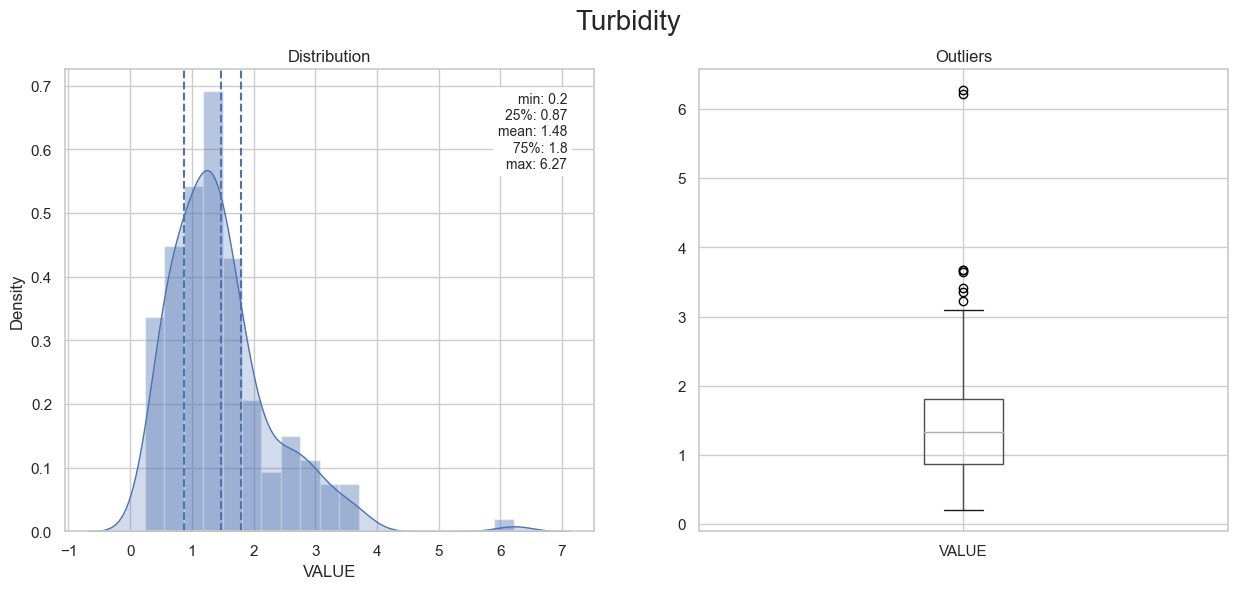

In [998]:
# Verificando a Distribuição da Variável de Interesse - Novamente
x = 'VALUE'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(variavel_interesse, fontsize=20)
### distribution
ax[0].title.set_text('Distribution')
variable = dados[x].fillna(dados[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dados[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('Outliers')
tmp_dtf = pd.DataFrame(dados[x])
#tmp_dtf[x] = np.log(dados[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

In [999]:
# Apando Dados Gravados de Outliers
#One-Class SVM
#del(anomalies_one_class_df)
#del(normal_one_class_df)

#Isolation Forest
#del(anomalies_iso_df)
#del(normal_iso_df)

#Local Outlier Factor
#del(anomalies_lof_df)
#del(normal_lof_df)

#DBScan
#del(anomalies_dbscan_df)
#del(normal_dbscan_df)

#Elliptic Envelope
#del(anomalies_ee_df)
#del(normal_ee_df)

#IQR
del(anomalies_iqr_df)
del(normal_iqr_df)

#STD
del(anomalies_std_df)
del(normal_std_df)

del(dados_outliers)

#deletar_colunas_anomalias = ['anomalies_iso', 'anomalies_lof', 'anomalies_dbscan',
#                             'anomalies_ee', 'anomalies_one_class', 'anomalies_iqr',
#                             'anomalies_std', 'anomalies_zscore']


#if cod_metodo_outliers != 0:
    
    #dados.drop(columns=deletar_colunas_anomalias, inplace=True)
    
    #dados.drop(columns=dados.columns[-1], inplace=True)

In [1000]:
dados.head()

SAMPLE_DATE  IMAGE_DATE TIME_SAMPLE IMAGE_HOUR     STATION_SAMPLE  \
30  2021-10-28  2021-10-28    10:44:00   13:12:51  Pontos_Randomicos   
31  2021-10-28  2021-10-28    10:54:00   13:12:51  Pontos_Randomicos   
32  2021-10-28  2021-10-28    11:02:00   13:12:51  Pontos_Randomicos   
33  2021-10-28  2021-10-28    09:58:00   13:12:51  Pontos_Randomicos   
34  2021-10-28  2021-10-28    09:56:00   13:12:51  Pontos_Randomicos   

    PARAMETER  VALUE UNIT  DEPTH DEPTH_UNIT                    LOCAL_NAME  \
30  Turbidity   1.29  FNU  0.104          m  Reservatorio de TrÃªs Marias   
31  Turbidity   1.81  FNU  0.213          m  Reservatorio de TrÃªs Marias   
32  Turbidity   1.63  FNU  0.058          m  Reservatorio de TrÃªs Marias   
33  Turbidity   1.34  FNU  0.075          m  Reservatorio de TrÃªs Marias   
34  Turbidity   1.29  FNU  0.096          m  Reservatorio de TrÃªs Marias   

   LOCATION_TYPE      LAT      LON COUNTRY ORGANIZATION_DATA HEMISPHERE  \
30     Reservoir -18.4760 -45.3986  Brazil         Simoa_Geo      South   
31     Reservoir -18.4618 -45.3725  Brazil         Simoa_Geo      South   
32     Reservoir -18.4552 -45.3727  Brazil         Simoa_Geo      South   
33     Reservoir -18.4754 -45.4022  Brazil         Simoa_Geo      South   
34     Reservoir -18.4709 -45.3979  Brazil         Simoa_Geo      South   

    SEASON SOURCE_DOMAIN  DIFF_DATE  BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  \
30  Spring   Tres_Marias          0   515.0   533.0   688.0   380.0   354.0   
31  Spring   Tres_Marias          0   502.0   481.0   654.0   349.0   304.0   
32  Spring   Tres_Marias          0   330.0   342.0   493.0   170.0   144.0   
33  Spring   Tres_Marias          0   469.0   507.0   655.0   359.0   337.0   
34  Spring   Tres_Marias          0   500.0   505.0   660.0   354.0   331.0   

    BAND_6  BAND_7  BAND_8  BAND_8A  BAND_9  BAND_11  BAND_12  MSK_CLDPRB  \
30   310.0   299.0   280.0    302.0   220.0    256.0    217.0         0.0   
31   228.0   212.0   213.0    203.0   180.0    216.0    173.0         0.0   
32    95.0   102.0    78.0     69.0    59.0     47.0     37.0         0.0   
33   287.0   281.0   270.0    285.0   211.0    218.0    226.0         0.0   
34   276.0   274.0   254.0    278.0   233.0    255.0    229.0         0.0   

    MSK_SNOW  QA60  CLDYPXPER  DRK_FEA_PE      NDWI      NBSI    WATER_CHECK  \
30       0.0   0.0     3.3458      0.7926  0.421488 -1.067188  Water_Surface   
31       0.0   0.0     3.3458      0.7926  0.508651 -0.977824  Water_Surface   
32       0.0   0.0     3.3458      0.7926  0.726795 -0.746787  Water_Surface   
33       0.0   0.0     3.3458      0.7926  0.416216 -1.094660  Water_Surface   
34       0.0   0.0     3.3458      0.7926  0.444201 -1.091973  Water_Surface   

   SNOW_CHECK SCENE_CLASS                       GEOMETRY SunGlint_Status  
30    No_Snow       Water  POINT (-45.398634 -18.476018)     no_sunglint  
31    No_Snow       Water  POINT (-45.372508 -18.461755)     no_sunglint  
32    No_Snow       Water  POINT (-45.372665 -18.455247)     no_sunglint  
33    No_Snow       Water  POINT (-45.402184 -18.475378)     no_sunglint  
34    No_Snow       Water  POINT (-45.397902 -18.470859)     no_sunglint

In [1001]:
dados.shape

(172, 44)

# Classificação - Turbidez

In [1002]:
dados_filtrado = dados.copy()
variavel_interesse = 'TURBIDEZ'
dados_filtrado.shape

(172, 44)

In [1003]:
# Limites Interquartis da Variável de Interesse
IQR_classificacao = dados_filtrado.VALUE.quantile(0.75) - dados_filtrado.VALUE.quantile(0.25) 
#lower_bridge = dados['VALUE'].quantile(0.25)-(IQR*1.5) 
global interquartilsuperior_classificacao
interquartilsuperior_classificacao = dados_filtrado['VALUE'].quantile(0.75)+(IQR_classificacao*1.5)

In [1004]:
# Definição de Classes: Baixa, Média e Alta
global baixo_classe
global alto_classe
#baixo_classe = dados_filtrado['VALUE'].mean() - dados_filtrado['VALUE'].std()
baixo_classe = dados_filtrado['VALUE'].mean()
alto_classe = dados_filtrado['VALUE'].mean() + dados_filtrado['VALUE'].std()
baixo_classe, alto_classe

(1.4798837209302327, 2.398428201621449)

In [1005]:
# Funções de Classificação de Turbidez

if variavel_interesse == 'TURBIDEZ':
    
    ## -------- PADROES GERAIS
    # WHO global overview of water quality parameters_2022
    def classifica_who(x):
        if x <= 0.3:
            return "0"
        elif (x > 0.3) & (x <= 5):
            return "1"
        else:
            return '2'

# -----------------------------------------------------
        
    ## -------- MONITORAMENTO
    # Canada - A MONITOR’S GUIDE TO WATER QUALITY
    def classifica_canada(x):
        if x < 10.:
            return "0"
        elif (x >= 10) & (x < 50):
            return "1"
        elif (x >= 50) & (x < 100):
            return "2"
        else:
            return '3'

# -----------------------------------------------------

    ## -------- USO RESIDENCIAL
    # Turbidimeter Design and Analysis: A Review on Optical Fiber Sensors for the Measurement of Water Turbidity
    # Malásia
    # 5 a 25 NTU
    def classifica_uso_residencial_malasia(x):
        if x <= 25:
            return "0"
        else:
            return '1'

# -----------------------------------------------------


    ## -------- CERTIFICAÇÃO RESERVATÓRIOS
    # Estados Unidos - Water Quality Certifications for Existing Hydropower Dams
    def classifica_certificacao_barragem_eua(x):
        if x <= 50:
            return "0"
        else:
            return '1'

# -----------------------------------------------------
        
    ## ------ ENQUADRAMENTO
    # Brasil - CONAMA 357
    def classifica_conama_brasil(x):
        if x <= 40:
            return "0"
        else:
            return '1'

# -----------------------------------------------------
        
    ## ------ POTABILIDADE
    # WHO standards Potabilidade
    # India - BIS specification India
    def classifica_who_potabilidade(x):
        if x <= 5.0:
            return "0"
        else:
            return '1'
        
    # PORTARIA GM/MS Nº 888, DE 4 DE MAIO DE 2022
    def classifica_brasil_potabilidade(x):
        if x <= 5.0:
            return "0"
        else:
            return '1'

    # National Standard of the People’s Republic of China
    def classifica_china_potabilidade(x):
        if x <= 3.0: # há outra mais restritiva <1
            return "0"
        else:
            return '1'

# -----------------------------------------------------
        
    ## ------ RECREAÇÃO
    # Austrália
    def classifica_recreacao_australia(x):
        if x <= 200:
            return "0"
        else:
            return '1'
        
    # Brasil
    def classifica_recreacao_brasil(x):
        if x <= 100:
            return "0"
        else:
            return '1'

    # Canadá
    def classifica_recreacao_canada(x):
        if x <= 50:
            return "0"
        else:
            return '1'
        
    # Malásia
    def classifica_recrecao_malasia(x):
        if x < 40:
            return "0"
        elif (x >= 40) & (x < 170):
            return "1"
        elif (x >= 170) & (x < 250):
            return "2"
        else:
            return '3'

        
# ---------------------------------------------------------

    ## ------ USUARIO DEFINE VALOR
    def define_classificacao_manual(x):
        global classe

        for i in range(len(lista_faixas)):
            #print(lista_faixas[i])
            if x <= lista_faixas[i]:

                classe = str(i)
                break

        return classe


# ---------------------------------------------------------

    ## ------ INTERVALO INTERQUARTIL SUPERIOR DA VARIÁVEL DE INTERESSE
    def classifica_interquartilsuperior(x):
        if x <= interquartilsuperior_classificacao:
            return "0"
        else:
            return '1'


        
# ---------------------------------------------------------

    ## ------ Tres Classes - Média Desvio Padrão
    def classifica_tres_classes(x):
        if x <= baixo_classe:
            return "0"
        elif x > alto_classe:
            return "2"
        else:
            return '1'
        
        
# ---------------------------------------------------------

    ## ------ Sete Classes
    def classifica_sete_classes(x):
        if x <= 5.:
            return "0"
        elif (x > 5) & (x <= 10):
            return "1"
        elif (x > 10) & (x <= 15):
            return "2"
        elif (x > 15) & (x <= 25):
            return "3"
        elif (x > 25) & (x <= 45):
            return "4"
        elif (x > 45) & (x <= 100):
            return "5"
        else:
            return '6'

In [1006]:
# Filtro de Classificação da Variável de Interesse

print('CLASSIFICAÇÃO - DEFINIÇÃO DE CRITÉRIOS')
print('-----------------------------------------')
print('-----------------------------------------')
print('Observe os limites de parâmetros de cada referência.')
print('As classes foram adaptadas/padronizadas -> Classe 1: melhor qualidade / Classe N+1: pior qualidade.')
print('Abaixo são apresentados as distribuições dos dados classificados de interesse por cada referência.')
print('Após avaliar, selecione o código do Padrão a ser adotado.')
print('------------------------------------------------------------------')
print('------------------------------------------------------------------')


# ------- PADRÕES GERAIS

# Padrões Gerais
print('PADROES GERAIS')
print('---------')
print('Código do Padrão de Classificação: 1')
print('---------')
print('WHO global overview of water quality parameters_2022')
print('Faixas de valores: 0.3; 5; 25')
print('Considerado para classificação: Classe 1: x <= 0.3; Classe 2: > 0.3 x <= 5; Classe 3: > 5 ')
print('---------')
print('Classes')
print(dados_filtrado['VALUE'].apply(classifica_who).value_counts())#.plot.bar()
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')


# ------- MONITORAMENTO

print('MONITORAMENTO')
print('---------')
print('Código do Padrão de Classificação: 2')
print('---------')
print('Canada - A MONITOR’S GUIDE TO WATER QUALITY')
print('Faixas de valores: 10; 50; 100')
print('Considerado para classificação: Classe 1: x < 10; Classe 2: >= 10 x < 50; Classe 3: >= 50 x < 100; Classe 4: x >= 100')
print('---------')
print('Classes')
print(dados_filtrado['VALUE'].apply(classifica_canada).value_counts())#.plot.bar()
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')


# ------- USO RESIDENCIAL

print('USO RESIDENCIAL')
print('---------')
print('Código do Padrão de Classificação: 3')
print('---------')
print('Uso Residencial Malásia - 5 a 25 NTU')
print('Faixas de valores: 5 - 25')
print('Considerado para classificação: Classe 1: x <= 25; Classe 2: > 25')
print('---------')
print('Classes')
print(dados_filtrado['VALUE'].apply(classifica_uso_residencial_malasia).value_counts())#.plot.bar()
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')


# ------- CERTIFICAÇÃO

print('CERTIFICAÇÃO RESERVATÓRIOS')
print('---------')
print('Código do Padrão de Classificação: 4')
print('---------')
print('Estados Unidos - Water Quality Certifications for Existing Hydropower Dams')
print('Faixas de valores: <= 50')
print('Considerado para classificação: Classe 1: x <= 50; Classe 2: > 50')
print('---------')
print('Classes')
print(dados_filtrado['VALUE'].apply(classifica_certificacao_barragem_eua).value_counts())#.plot.bar()
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')


# ------- ENQUADRAMENTO

print('ENQUADRAMENTO - CLASSE')
print('---------')
print('Código do Padrão de Classificação: 5')
print('---------')
print('Brasil - CONAMA 357')
print('Faixas de valores: <= 40')
print('Considerado para classificação: Classe 1: x <= 40; Classe 2: > 40')
print('---------')
print('Classes')
print(dados_filtrado['VALUE'].apply(classifica_conama_brasil).value_counts())#.plot.bar()
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')


# ------- POTABILIDADE

print('POTABILIDADE')
print('---------')
print('Código do Padrão de Classificação: 6')
print('---------')
print('WHO standards Potabilidade, Índia, Brasil, outros')
print('Faixas de valores: <= 5')
print('Considerado para classificação: Classe 1: x <= 5; Classe 2: > 5')
print('---------')
print('Classes')
print(dados_filtrado['VALUE'].apply(classifica_who_potabilidade).value_counts())#.plot.bar()
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

print('POTABILIDADE')
print('---------')
print('Código do Padrão de Classificação: 7')
print('---------')
print('National Standard of the People’s Republic of China')
print('Faixas de valores: <= 3')
print('Considerado para classificação: Classe 1: x <= 3; Classe 2: > 3')
print('---------')
print('Classes')
print(dados_filtrado['VALUE'].apply(classifica_china_potabilidade).value_counts())#.plot.bar()
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')


# ------- RECREAÇÃO

print('RECREAÇÃO')
print('---------')
print('Código do Padrão de Classificação: 8')
print('---------')
print('Austrália - Recreação')
print('Faixas de valores: <= 200')
print('Considerado para classificação: Classe 1: x <= 200; Classe 2: > 200')
print('---------')
print('Classes')
print(dados_filtrado['VALUE'].apply(classifica_recreacao_australia).value_counts())#.plot.bar()
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

print('RECREAÇÃO')
print('---------')
print('Código do Padrão de Classificação: 9')
print('---------')
print('Brasil - Recreação')
print('Faixas de valores: <= 100')
print('Considerado para classificação: Classe 1: x <= 100; Classe 2: > 100')
print('---------')
print('Classes')
print(dados_filtrado['VALUE'].apply(classifica_recreacao_brasil).value_counts())#.plot.bar()
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

print('RECREAÇÃO')
print('---------')
print('Código do Padrão de Classificação: 10')
print('---------')
print('Canadá - Recreação')
print('Faixas de valores: <= 500')
print('Considerado para classificação: Classe 1: x <= 50; Classe 2: > 50')
print('---------')
print('Classes')
print(dados_filtrado['VALUE'].apply(classifica_recreacao_canada).value_counts())#.plot.bar()
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')

print('RECREAÇÃO')
print('---------')
print('Código do Padrão de Classificação: 11')
print('---------')
print('Malásia - Recreação')
print('Faixas de valores: 40; 170; 250')
print('Considerado para classificação: Classe 1: x < 40; Classe 2: >= 40 x < 170; Classe 3: >= 170 x < 250; Classe 4: x >= 250')
print('---------')
print('Classes')
print(dados_filtrado['VALUE'].apply(classifica_recrecao_malasia).value_counts())#.plot.bar()
print('---------')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')


# ------- Intervalo Interquartil Superior

print('Intervalo Interquartil Superior')
print('---------')
print('Código do Padrão de Classificação: 12')
print('---------')
print('Faixas de valores: Normal; Anomalia')
print('Considerado para classificação: Classe 1: Normal; Classe 2: Anomalia')
print('---------')
print('Classes')
print(dados_filtrado['VALUE'].apply(classifica_interquartilsuperior).value_counts())#.plot.bar()
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')


# ------- NDTI - Turbidez - Artigo

print('NDTI - Turbidez - Desvio-Padrão')
print('---------')
print('Código do Padrão de Classificação: 13')
print('---------')
print('Artigo: Média +- Desvio-Padrão')
print('Faixas de valores: Baixo; Médio; Alto')
print('Considerado para classificação: Classe 1: Baixo; Classe 2: Médio; Classe 3: Alto')
print('---------')
print('Classes')
print(dados_filtrado['VALUE'].apply(classifica_tres_classes).value_counts())#.plot.bar()
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')


print('NDTI - Turbidez - 7 CLASSES')
print('---------')
print('Código do Padrão de Classificação: 14')
print('---------')
print('Artigo - Sete Classes')
print('Faixas de valores: 5; 5-10; 10-15; 15-25; 25-45; 45-100; 100')
print('Considerado para classificação: Classe 1: x <= 5; Classe 2: > 5 x <= 10; Classe 3: > 10 x <=15; Classe 4: > 15 x <=25; Classe 5: > 25 x <=45; Classe 6: > 45 x <=100; Classe 7: x > 100')
print('---------')
print('Classes')
print(dados_filtrado['VALUE'].apply(classifica_sete_classes).value_counts())#.plot.bar()
print('---------')
print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------\n')



# ------- MANUAL: USUARIO DEFINE VALOR

print('MANUAL: USUÁRIO DEFINE VALORES DE CLASSIFICAÇÃO')
print('---------')
print('Código do Padrão de Classificação: 15')
print('---------')
print('Definido pelo Usuário')
print('---------')
#print('Deseja definir faixa de valores manualmente?')
#print('Digite 1 para SIM ou 0 para NÃO')
#definir_classe_manual = int(input())
print('---------')
#if definir_classe_manual == 1:
    ##print('Faixas de valores: Personalizada')
    #print('---------')
    #print('Classes')
    #print(dados_filtrado['VALUE'].apply(define_classificacao_manual).value_counts())#.plot.bar()
    #print('-----------------------------------------------------------------------')
    #print('-----------------------------------------------------------------------\n')
#else:
print('Faixas de Valores Manuais Ainda Não Foi Definida')

CLASSIFICAÇÃO - DEFINIÇÃO DE CRITÉRIOS
-----------------------------------------
-----------------------------------------
Observe os limites de parâmetros de cada referência.
As classes foram adaptadas/padronizadas -> Classe 1: melhor qualidade / Classe N+1: pior qualidade.
Abaixo são apresentados as distribuições dos dados classificados de interesse por cada referência.
Após avaliar, selecione o código do Padrão a ser adotado.
------------------------------------------------------------------
------------------------------------------------------------------
PADROES GERAIS
---------
Código do Padrão de Classificação: 1
---------
WHO global overview of water quality parameters_2022
Faixas de valores: 0.3; 5; 25
Considerado para classificação: Classe 1: x <= 0.3; Classe 2: > 0.3 x <= 5; Classe 3: > 5 
---------
Classes
VALUE
1    168
2      2
0      2
Name: count, dtype: int64
-----------------------------------------------------------------------
--------------------------------------

In [1007]:
# Filtro de Classificação da Variável de Interesse

print('CLASSIFICAÇÃO - DEFINIÇÃO DE CRITÉRIOS')
print('-----------------------------------------')
print('Informe a opção desejada para classificação dos dados de interese:')
print('------------------------------------------------------------------')

#print colored('CÓDIGO 1', attrs=['bold'])
cprint('CÓDIGO 1 - WHO global overview of water quality parameters_2022', 'green', attrs=['bold'], file=sys.stderr)
#print('WHO global overview of water quality parameters_2022')
#print('---------')

cprint('CÓDIGO 2 - Canada - A MONITOR’S GUIDE TO WATER QUALITY', 'green', attrs=['bold'], file=sys.stderr)
#print('Canada - A MONITOR’S GUIDE TO WATER QUALITY')
#print('---------')

cprint('CÓDIGO 3 - Uso Residencial Malásia - 5 a 25 NTU', 'green', attrs=['bold'], file=sys.stderr)
#print('Uso Residencial Malásia - 5 a 25 NTU')
#print('---------')

cprint('CÓDIGO 4 - Estados Unidos - Water Quality Certifications for Existing Hydropower Dams', 'green', attrs=['bold'], file=sys.stderr)
#print('Estados Unidos - Water Quality Certifications for Existing Hydropower Dams')
#print('---------')

cprint('CÓDIGO 5 - Brasil - CONAMA 357', 'green', attrs=['bold'], file=sys.stderr)
#print('Brasil - CONAMA 357')
#print('---------')

cprint('CÓDIGO 6 - WHO standards Potabilidade, Índia, Brasil, outros', 'green', attrs=['bold'], file=sys.stderr)
#print('WHO standards Potabilidade, Índia, Brasil, outros')
#print('---------')

cprint('CÓDIGO 7 - National Standard of the People’s Republic of China', 'green', attrs=['bold'], file=sys.stderr)
#print('National Standard of the People’s Republic of China')
#print('---------')

cprint('CÓDIGO 8 - Austrália - Recreação', 'green', attrs=['bold'], file=sys.stderr)
#print('Austrália - Recreação')
#print('---------')

cprint('CÓDIGO 9 - Brasil - Recreação', 'green', attrs=['bold'], file=sys.stderr)
#print('Brasil - Recreação')
#print('---------')

cprint('CÓDIGO 10 - Canadá - Recreação', 'green', attrs=['bold'], file=sys.stderr)
#print('Canadá - Recreação')
#print('---------')

cprint('CÓDIGO 11 - Malásia - Recreação', 'green', attrs=['bold'], file=sys.stderr)
#print('Malásia - Recreação')
#print('---------')

cprint('CÓDIGO 12 - Intervalo InterQuartil Superior da Variável de Interesse', 'green', attrs=['bold'], file=sys.stderr)
#print('Malásia - Recreação')
#print('---------')

cprint('CÓDIGO 13 - NDTI - Turbidez - 3 CLASSES: Média +- Desvio-Padrão', 'green', attrs=['bold'], file=sys.stderr)
#print('Malásia - Recreação')
#print('---------')

cprint('CÓDIGO 14 - NDTI - Turbidez - 7 CLASSES', 'green', attrs=['bold'], file=sys.stderr)
#print('Malásia - Recreação')
#print('---------')


cprint('CÓDIGO 15 - Manual - Critérios Definidos pelo Usuário', 'green', attrs=['bold'], file=sys.stderr)
#print('Malásia - Recreação')
#print('---------')

cod_filtro_classificacao = int(input())
print('------------------------------------------------------')

if cod_filtro_classificacao == 1:
    dados_filtrado['CLASSE'] = dados['VALUE'].apply(classifica_who)

elif cod_filtro_classificacao == 2:
    dados_filtrado['CLASSE'] = dados['VALUE'].apply(classifica_canada)

elif cod_filtro_classificacao == 3:
    dados_filtrado['CLASSE'] = dados['VALUE'].apply(classifica_uso_residencial_malasia)

elif cod_filtro_classificacao == 4:
    dados_filtrado['CLASSE'] = dados['VALUE'].apply(classifica_certificacao_barragem_eua)

elif cod_filtro_classificacao == 5:
    dados_filtrado['CLASSE'] = dados['VALUE'].apply(classifica_conama_brasil)

elif cod_filtro_classificacao == 6:
    dados_filtrado['CLASSE'] = dados['VALUE'].apply(classifica_who_potabilidade)

elif cod_filtro_classificacao == 7:
    
    dados_filtrado['CLASSE'] = dados['VALUE'].apply(classificaclassifica_china_potabilidade_canada)

elif cod_filtro_classificacao == 8:
    dados_filtrado['CLASSE'] = dados['VALUE'].apply(classifica_recreacao_australia)

elif cod_filtro_classificacao == 9:
    dados_filtrado['CLASSE'] = dados['VALUE'].apply(classifica_recreacao_brasil)

elif cod_filtro_classificacao == 10:
    dados_filtrado['CLASSE'] = dados['VALUE'].apply(classifica_recreacao_canada)

elif cod_filtro_classificacao == 11:
    dados_filtrado['CLASSE'] = dados['VALUE'].apply(classifica_recrecao_malasia)
    
elif cod_filtro_classificacao == 12:
    dados_filtrado['CLASSE'] = dados['VALUE'].apply(classifica_interquartilsuperior)

elif cod_filtro_classificacao == 13:
    dados_filtrado['CLASSE'] = dados['VALUE'].apply(classifica_tres_classes)

elif cod_filtro_classificacao == 14:
    dados_filtrado['CLASSE'] = dados['VALUE'].apply(classifica_sete_classes)

elif (cod_filtro_classificacao == 15):
    print('------------')
    print('Definir Valores de Classificação Manualmente')
    print('------------')
    print('Informe a Quantidade de Faixas de Valores de Classificação:')
    faixas = int(input())
    lista_faixas = []
    
    for i in range(faixas):
        print('------------')
        print(f'Digite o Valor Limite da Faixa {i+1}:')
        print('------------')
        valor_limite_faixa = float(input())
        lista_faixas.append(valor_limite_faixa)
    
    dados_filtrado['CLASSE'] = dados['VALUE'].apply(define_classificacao_manual)

else:
    dados_filtrado['CLASSE'] = dados['VALUE'].apply(classifica_uso_residencial_malasia)
    cod_filtro_classificao = 3
    

print('------------')
print('Quantidade de Registros por Classe:')
print('------------\n')
print(dados_filtrado['CLASSE'].value_counts())
print('------------\n')


print(f'O código de classificação definido foi {cod_filtro_classificacao}')

#Counter(t)

CÓDIGO 1 - WHO global overview of water quality parameters_2022
CÓDIGO 2 - Canada - A MONITOR’S GUIDE TO WATER QUALITY
CÓDIGO 3 - Uso Residencial Malásia - 5 a 25 NTU
CÓDIGO 4 - Estados Unidos - Water Quality Certifications for Existing Hydropower Dams
CÓDIGO 5 - Brasil - CONAMA 357
CÓDIGO 6 - WHO standards Potabilidade, Índia, Brasil, outros
CÓDIGO 7 - National Standard of the People’s Republic of China
CÓDIGO 8 - Austrália - Recreação
CÓDIGO 9 - Brasil - Recreação
CÓDIGO 10 - Canadá - Recreação
CÓDIGO 11 - Malásia - Recreação
CÓDIGO 12 - Intervalo InterQuartil Superior da Variável de Interesse
CÓDIGO 13 - NDTI - Turbidez - 3 CLASSES: Média +- Desvio-Padrão
CÓDIGO 14 - NDTI - Turbidez - 7 CLASSES
CÓDIGO 15 - Manual - Critérios Definidos pelo Usuário


CLASSIFICAÇÃO - DEFINIÇÃO DE CRITÉRIOS
-----------------------------------------
Informe a opção desejada para classificação dos dados de interese:
------------------------------------------------------------------
1
------------------------------------------------------
------------
Quantidade de Registros por Classe:
------------

CLASSE
1    168
2      2
0      2
Name: count, dtype: int64
------------

O código de classificação definido foi 1


In [1008]:
#del(dados_filtrado['VALUE'])
dados_filtrado

SAMPLE_DATE  IMAGE_DATE TIME_SAMPLE IMAGE_HOUR     STATION_SAMPLE  \
30   2021-10-28  2021-10-28    10:44:00   13:12:51  Pontos_Randomicos   
31   2021-10-28  2021-10-28    10:54:00   13:12:51  Pontos_Randomicos   
32   2021-10-28  2021-10-28    11:02:00   13:12:51  Pontos_Randomicos   
33   2021-10-28  2021-10-28    09:58:00   13:12:51  Pontos_Randomicos   
34   2021-10-28  2021-10-28    09:56:00   13:12:51  Pontos_Randomicos   
..          ...         ...         ...        ...                ...   
213  2019-10-04  2019-10-04    13:16:00   13:12:49  Pontos_Randomicos   
214  2019-10-04  2019-10-04    12:19:00   13:12:49  Pontos_Randomicos   
215  2019-10-04  2019-10-04    13:34:00   13:12:49  Pontos_Randomicos   
216  2019-10-04  2019-10-04    13:55:00   13:12:49  Pontos_Randomicos   
217  2019-10-04  2019-10-04    13:27:00   13:12:49  Pontos_Randomicos   

     PARAMETER  VALUE UNIT  DEPTH DEPTH_UNIT                    LOCAL_NAME  \
30   Turbidity   1.29  FNU  0.104          m  Reservatorio de TrÃªs Marias   
31   Turbidity   1.81  FNU  0.213          m  Reservatorio de TrÃªs Marias   
32   Turbidity   1.63  FNU  0.058          m  Reservatorio de TrÃªs Marias   
33   Turbidity   1.34  FNU  0.075          m  Reservatorio de TrÃªs Marias   
34   Turbidity   1.29  FNU  0.096          m  Reservatorio de TrÃªs Marias   
..         ...    ...  ...    ...        ...                           ...   
213  Turbidity   1.04  FNU  0.000          m  Reservatorio de TrÃªs Marias   
214  Turbidity   1.11  FNU  0.000          m  Reservatorio de TrÃªs Marias   
215  Turbidity   1.08  FNU  0.000          m  Reservatorio de TrÃªs Marias   
216  Turbidity   1.11  FNU  0.000          m  Reservatorio de TrÃªs Marias   
217  Turbidity   1.10  FNU  0.000          m  Reservatorio de TrÃªs Marias   

    LOCATION_TYPE      LAT      LON COUNTRY ORGANIZATION_DATA HEMISPHERE  \
30      Reservoir -18.4760 -45.3986  Brazil         Simoa_Geo      South   
31      Reservoir -18.4618 -45.3725  Brazil         Simoa_Geo      South   
32      Reservoir -18.4552 -45.3727  Brazil         Simoa_Geo      South   
33      Reservoir -18.4754 -45.4022  Brazil         Simoa_Geo      South   
34      Reservoir -18.4709 -45.3979  Brazil         Simoa_Geo      South   
..            ...      ...      ...     ...               ...        ...   
213     Reservoir -18.8217 -45.1749  Brazil         Simoa_Geo      South   
214     Reservoir -18.8070 -45.1675  Brazil         Simoa_Geo      South   
215     Reservoir -18.8220 -45.1852  Brazil         Simoa_Geo      South   
216     Reservoir -18.5876 -45.2249  Brazil         Simoa_Geo      South   
217     Reservoir -18.8220 -45.1804  Brazil         Simoa_Geo      South   

     SEASON SOURCE_DOMAIN  DIFF_DATE  BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  \
30   Spring   Tres_Marias          0   515.0   533.0   688.0   380.0   354.0   
31   Spring   Tres_Marias          0   502.0   481.0   654.0   349.0   304.0   
32   Spring   Tres_Marias          0   330.0   342.0   493.0   170.0   144.0   
33   Spring   Tres_Marias          0   469.0   507.0   655.0   359.0   337.0   
34   Spring   Tres_Marias          0   500.0   505.0   660.0   354.0   331.0   
..      ...           ...        ...     ...     ...     ...     ...     ...   
213  Spring   Tres_Marias          0   341.0   469.0   601.0   281.0   230.0   
214  Spring   Tres_Marias          0   442.0   535.0   689.0   372.0   338.0   
215  Spring   Tres_Marias          0   299.0   395.0   529.0   212.0   162.0   
216  Spring   Tres_Marias          0   308.0   384.0   492.0   233.0   225.0   
217  Spring   Tres_Marias          0   313.0   409.0   559.0   231.0   185.0   

     BAND_6  BAND_7  BAND_8  BAND_8A  BAND_9  BAND_11  BAND_12  MSK_CLDPRB  \
30    310.0   299.0   280.0    302.0   220.0    256.0    217.0         0.0   
31    228.0   212.0   213.0    203.0   180.0    216.0    173.0         0.0   
32     95.0   102.0    78.0     69.0    59.0     47.0     37.0         0.0   
33  

In [1009]:
dados_filtrado['CLASSE'].value_counts()

CLASSE
1    168
2      2
0      2
Name: count, dtype: int64

In [1010]:
# Plotagens

<Axes: xlabel='CLASSE', ylabel='count'>

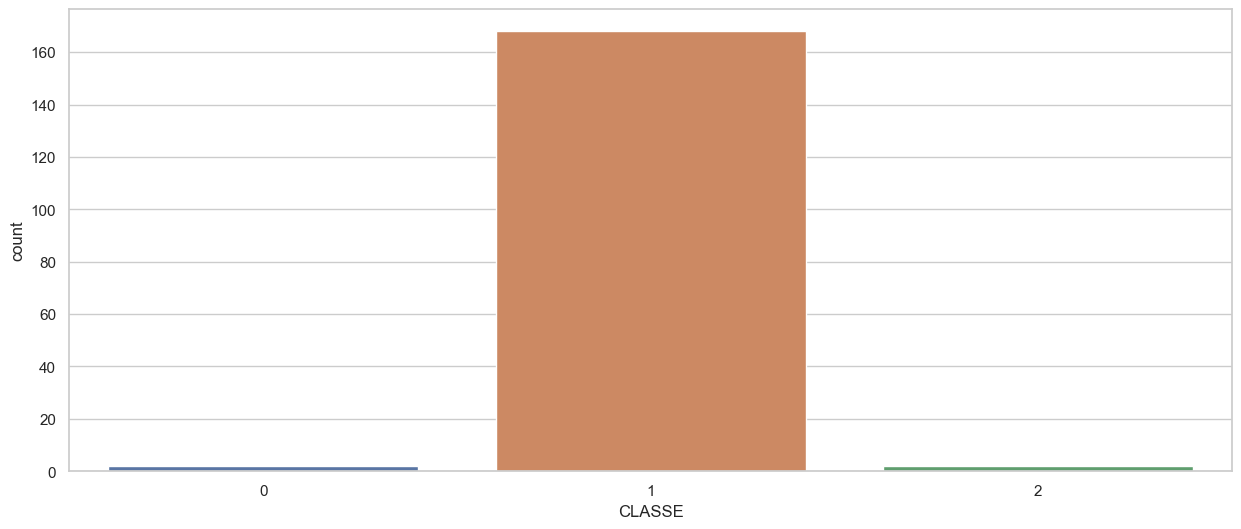

In [1011]:
sns.countplot(x=dados_filtrado['CLASSE'].sort_values())

<Axes: xlabel='LON', ylabel='LAT'>

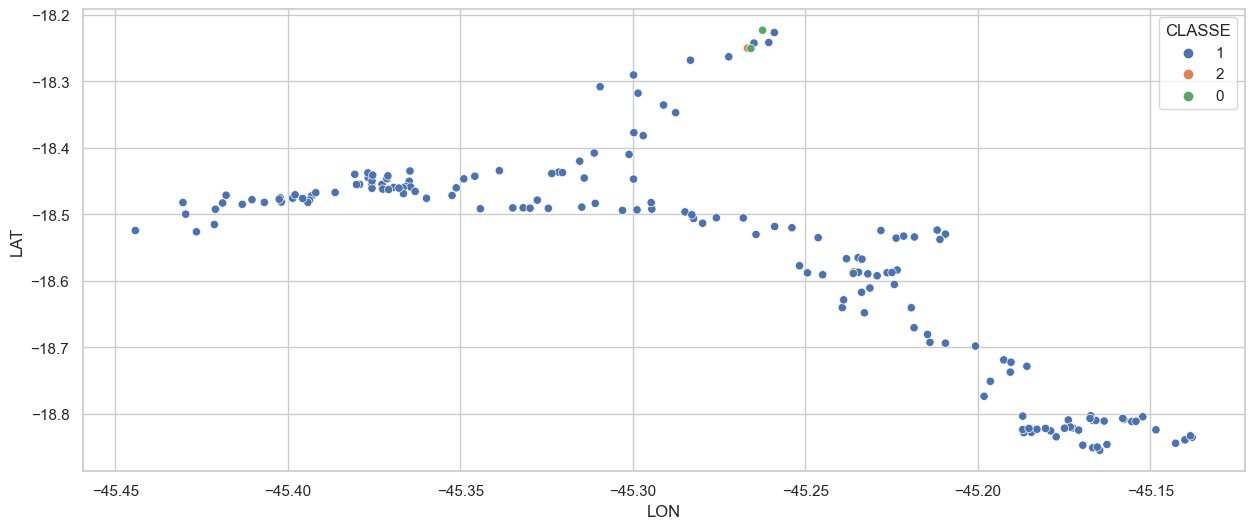

In [1012]:
sns.scatterplot(data=dados_filtrado, x="LON", y="LAT", hue="CLASSE")

<Axes: xlabel='LON', ylabel='LAT'>

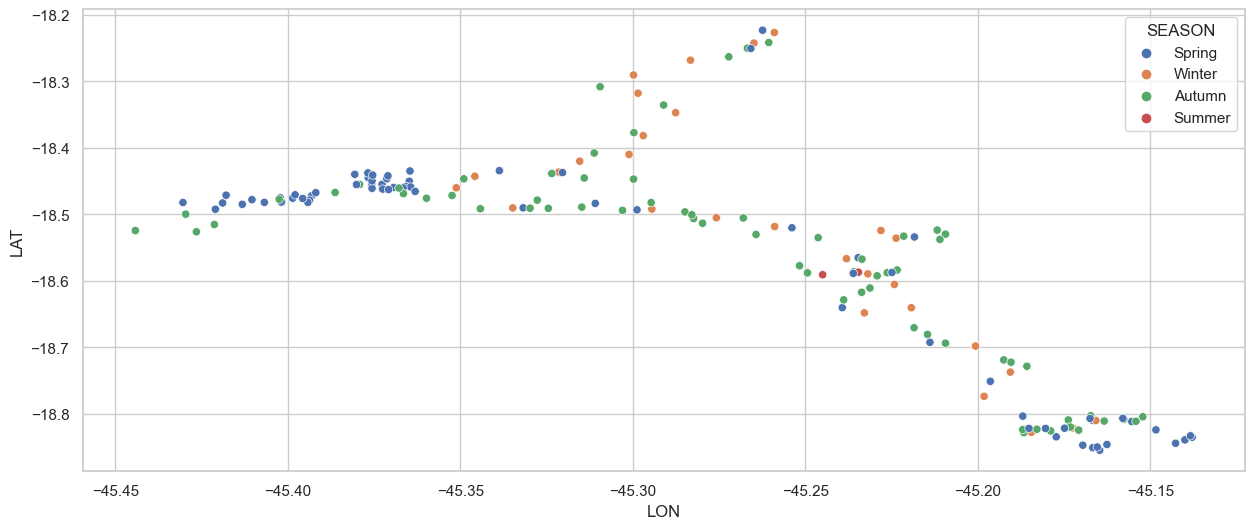

In [1013]:
sns.scatterplot(data=dados_filtrado, x="LON", y="LAT", hue="SEASON")

In [1014]:
# Verificando Duplicações de Registros Novamente

if len(dados_filtrado[dados_filtrado.duplicated()]) > 0:
    pymsgbox.alert('Há Dados Duplicados, verifique', 'Dados Duplicados')

print(f'Quantidade de Dados Duplicados: {len(dados_filtrado[dados_filtrado.duplicated()])}')

print(f'*Quantidade de Dados Disponíveis Antes da Remoção de Dados Duplicados (Caso Ocorram) : {dados.shape[0]}')
print('-------------------------------------------------------------------------------------------------------')

if len(dados_filtrado[dados_filtrado.duplicated()]) > 0:
    print('Deseja Remover Dados Duplicados?')
    print('---------------------------------')
    print('1- Sim')
    print('2- Não')
    print('---------------------------------')
    codigo_remover_dados = int(input())
    if codigo_remover_dados == 1:
        dados_filtrado.drop_duplicates(inplace=True)
    else:
        print('Dados Duplicados Não Foram Removidos')

print(f'*Quantidade de Dados Disponíveis Após Remoção de Dados Duplicados: {dados_filtrado.shape[0]}')

In [1015]:
# Verificando Duplicações de Registros Novamente - APENAS 12 BANDAS ESPECTRAIS

# Lista de Bandas a serem verificadas (duplicação de valores) e que serão posteriormente utilizadas para multiplicação (escala)
lista_multiplicar_bandas = ['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12']

if len(dados_filtrado[dados_filtrado[lista_multiplicar_bandas].duplicated()]) > 0:
    pymsgbox.alert('Há Dados Duplicados, verifique', 'Dados Duplicados')

print(f'Quantidade de Dados Duplicados: {len(dados_filtrado[dados_filtrado[lista_multiplicar_bandas].duplicated()])}')

print(f'*Quantidade de Dados Disponíveis Antes da Remoção de Dados Duplicados (Caso Ocorram) : {dados.shape[0]}')
print('-------------------------------------------------------------------------------------------------------')

if len(dados_filtrado[dados_filtrado[lista_multiplicar_bandas].duplicated()]) > 0:
    print('Deseja Remover Dados Duplicados?')
    print('---------------------------------')
    print('1- Sim')
    print('2- Não')
    print('---------------------------------')
    codigo_remover_dados = int(input())
    if codigo_remover_dados == 1:
        #dados_filtrado[lista_multiplicar_bandas].drop_duplicates(inplace=True)
        dados_filtrado.drop(dados_filtrado[dados_filtrado[lista_multiplicar_bandas].duplicated() > 0].index, inplace = True)
    else:
        print('Dados Duplicados Não Foram Removidos')

print(f'*Quantidade de Dados Disponíveis Após Remoção de Dados Duplicados: {dados_filtrado.shape[0]}')

In [1016]:
dados_filtrado['CLASSE'].value_counts()

CLASSE
1    168
2      2
0      2
Name: count, dtype: int64

<Axes: xlabel='CLASSE', ylabel='count'>

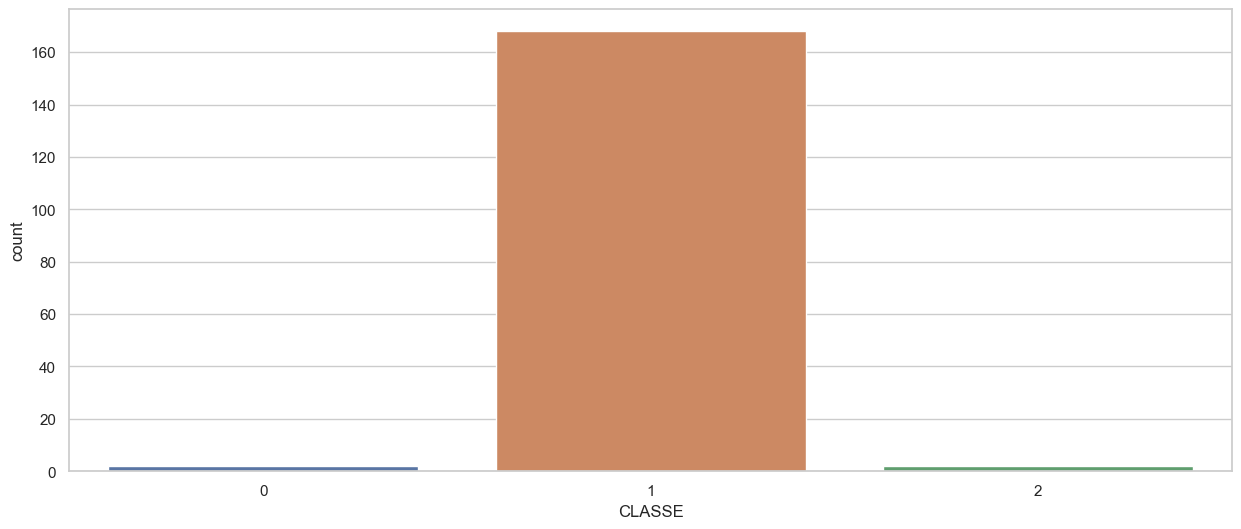

In [1017]:
sns.countplot(x=dados_filtrado['CLASSE'].sort_values())

<Axes: xlabel='LON', ylabel='LAT'>

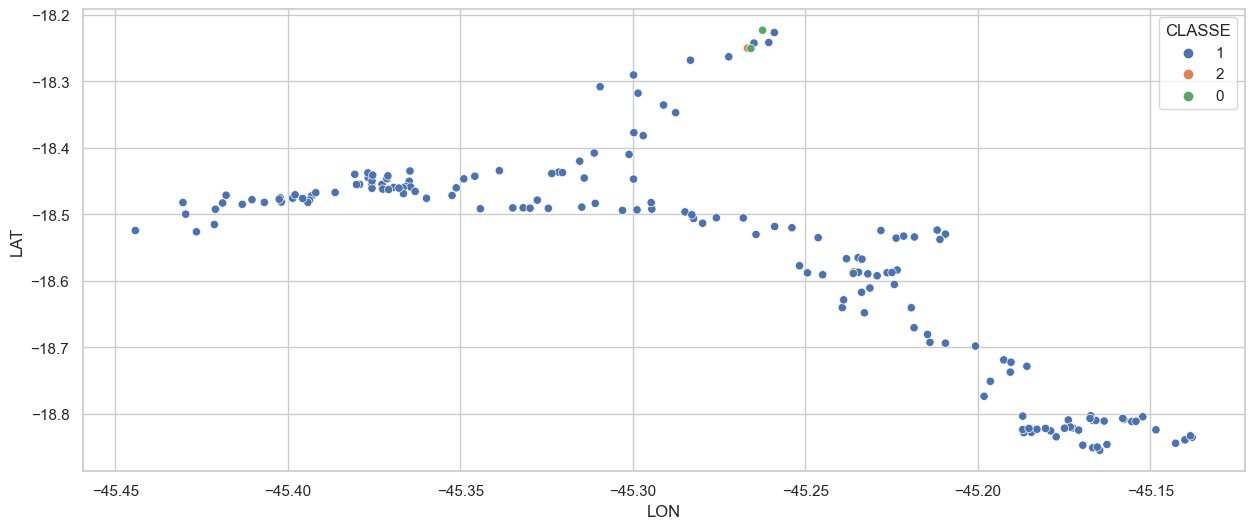

In [1018]:
sns.scatterplot(data=dados_filtrado, x="LON", y="LAT", hue="CLASSE")

In [1019]:
dados_filtrado['SEASON'].value_counts()

SEASON
Spring    73
Autumn    68
Winter    29
Summer     2
Name: count, dtype: int64

<Axes: xlabel='LON', ylabel='LAT'>

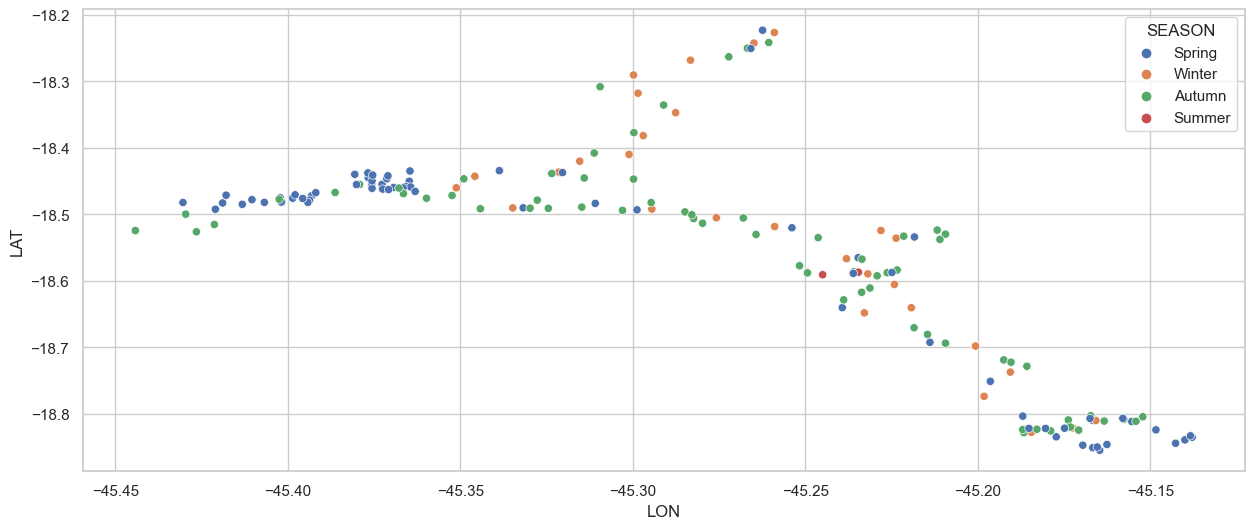

In [1020]:
sns.scatterplot(data=dados_filtrado, x="LON", y="LAT", hue="SEASON")

In [1021]:
dados = dados_filtrado.copy()

#del(dados_filtrado)

dados.reset_index(inplace=True)
del(dados['index'])
dados.head()

SAMPLE_DATE  IMAGE_DATE TIME_SAMPLE IMAGE_HOUR     STATION_SAMPLE  \
0  2021-10-28  2021-10-28    10:44:00   13:12:51  Pontos_Randomicos   
1  2021-10-28  2021-10-28    10:54:00   13:12:51  Pontos_Randomicos   
2  2021-10-28  2021-10-28    11:02:00   13:12:51  Pontos_Randomicos   
3  2021-10-28  2021-10-28    09:58:00   13:12:51  Pontos_Randomicos   
4  2021-10-28  2021-10-28    09:56:00   13:12:51  Pontos_Randomicos   

   PARAMETER  VALUE UNIT  DEPTH DEPTH_UNIT                    LOCAL_NAME  \
0  Turbidity   1.29  FNU  0.104          m  Reservatorio de TrÃªs Marias   
1  Turbidity   1.81  FNU  0.213          m  Reservatorio de TrÃªs Marias   
2  Turbidity   1.63  FNU  0.058          m  Reservatorio de TrÃªs Marias   
3  Turbidity   1.34  FNU  0.075          m  Reservatorio de TrÃªs Marias   
4  Turbidity   1.29  FNU  0.096          m  Reservatorio de TrÃªs Marias   

  LOCATION_TYPE      LAT      LON COUNTRY ORGANIZATION_DATA HEMISPHERE  \
0     Reservoir -18.4760 -45.3986  Brazil         Simoa_Geo      South   
1     Reservoir -18.4618 -45.3725  Brazil         Simoa_Geo      South   
2     Reservoir -18.4552 -45.3727  Brazil         Simoa_Geo      South   
3     Reservoir -18.4754 -45.4022  Brazil         Simoa_Geo      South   
4     Reservoir -18.4709 -45.3979  Brazil         Simoa_Geo      South   

   SEASON SOURCE_DOMAIN  DIFF_DATE  BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  \
0  Spring   Tres_Marias          0   515.0   533.0   688.0   380.0   354.0   
1  Spring   Tres_Marias          0   502.0   481.0   654.0   349.0   304.0   
2  Spring   Tres_Marias          0   330.0   342.0   493.0   170.0   144.0   
3  Spring   Tres_Marias          0   469.0   507.0   655.0   359.0   337.0   
4  Spring   Tres_Marias          0   500.0   505.0   660.0   354.0   331.0   

   BAND_6  BAND_7  BAND_8  BAND_8A  BAND_9  BAND_11  BAND_12  MSK_CLDPRB  \
0   310.0   299.0   280.0    302.0   220.0    256.0    217.0         0.0   
1   228.0   212.0   213.0    203.0   180.0    216.0    173.0         0.0   
2    95.0   102.0    78.0     69.0    59.0     47.0     37.0         0.0   
3   287.0   281.0   270.0    285.0   211.0    218.0    226.0         0.0   
4   276.0   274.0   254.0    278.0   233.0    255.0    229.0         0.0   

   MSK_SNOW  QA60  CLDYPXPER  DRK_FEA_PE      NDWI      NBSI    WATER_CHECK  \
0       0.0   0.0     3.3458      0.7926  0.421488 -1.067188  Water_Surface   
1       0.0   0.0     3.3458      0.7926  0.508651 -0.977824  Water_Surface   
2       0.0   0.0     3.3458      0.7926  0.726795 -0.746787  Water_Surface   
3       0.0   0.0     3.3458      0.7926  0.416216 -1.094660  Water_Surface   
4       0.0   0.0     3.3458      0.7926  0.444201 -1.091973  Water_Surface   

  SNOW_CHECK SCENE_CLASS                       GEOMETRY SunGlint_Status CLASSE  
0    No_Snow       Water  POINT (-45.398634 -18.476018)     no_sunglint      1  
1    No_Snow       Water  POINT (-45.372508 -18.461755)     no_sunglint      1  
2    No_Snow       Water  POINT (-45.372665 -18.455247)     no_sunglint      1  
3    No_Snow       Water  POINT (-45.402184 -18.475378)     no_sunglint      1  
4    No_Snow       Water  POINT (-45.397902 -18.470859)     no_sunglint      1

In [1022]:
# Salvando Arquivos Filtrados (Caso necessário)

In [1023]:
#dados_filtrado[lista_multiplicar_bandas] = dados_filtrado[lista_multiplicar_bandas].multiply(0.0001)
#dados_filtrado.head(3)

In [1024]:
# colunas_salvar = ['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12', 'VALUE', 'CLASSE', 'LAT', 'LON']
# dados_filtrado = dados_filtrado[colunas_salvar]

In [1025]:
# nova gravação - Tres Marias
#dados_filtrado.to_csv('Turbidez_Tres_Marias_2_Classes_9NTU_InterquartilSuperiorTresMarias4_Datasets_Filtro_Ruidos_DiferencaAte2Dias_Sem_Corte_Outliers_196_NTU.csv', index=False)
#dados_filtrado.to_csv('Turbidez_Tres_Marias_2_Classes_9NTU_InterquartilSuperiorTresMarias4_Datasets_Filtro_Ruidos_Diferenca_0_Dias_Sem_Corte_Outliers_196_NTU.csv', index=False)

# nova gravação - Global
#dados_filtrado.to_csv('Turbidez_2_Classes_9NTU_InterquartilSuperiorTresMarias4_Datasets_Filtro_Ruidos_DiferencaAte2Dias_Corte_media_mais_3x_STD_NTU.csv', index=False)
#dados_filtrado.to_csv('Turbidez_2_Classes_9NTU_InterquartilSuperiorTresMarias4_Datasets_Filtro_Ruidos_Diferenca_0_Dias_Corte_media_mais_3x_STD_NTU.csv', index=False)

# Estados Unidos: 0 dias, filtro de ruídos, +- 3 x std
#dados_filtrado.to_csv('Turbidez_Estados_Unidos_2_Classes_Ref_25NTU_Diferenca_0_Dias_Corte_media_mais_3x_STD_NTU.csv', index=False)

# Tres Marias 4 Datasets: 0 dias, filtro de ruídos, +- 3 x std
#dados_filtrado.to_csv('Turbidez_Tres_Marias_4Datasets_2_Classes_Ref_25NTU_Diferenca_0_Dias_Sem_Corte_Oulier_Valor_Limite_196_NTU.csv', index=False)

In [1026]:
del(dados_filtrado)
#del(dados['CLASSE'])

In [1027]:
dados

SAMPLE_DATE  IMAGE_DATE TIME_SAMPLE IMAGE_HOUR     STATION_SAMPLE  \
0    2021-10-28  2021-10-28    10:44:00   13:12:51  Pontos_Randomicos   
1    2021-10-28  2021-10-28    10:54:00   13:12:51  Pontos_Randomicos   
2    2021-10-28  2021-10-28    11:02:00   13:12:51  Pontos_Randomicos   
3    2021-10-28  2021-10-28    09:58:00   13:12:51  Pontos_Randomicos   
4    2021-10-28  2021-10-28    09:56:00   13:12:51  Pontos_Randomicos   
..          ...         ...         ...        ...                ...   
167  2019-10-04  2019-10-04    13:16:00   13:12:49  Pontos_Randomicos   
168  2019-10-04  2019-10-04    12:19:00   13:12:49  Pontos_Randomicos   
169  2019-10-04  2019-10-04    13:34:00   13:12:49  Pontos_Randomicos   
170  2019-10-04  2019-10-04    13:55:00   13:12:49  Pontos_Randomicos   
171  2019-10-04  2019-10-04    13:27:00   13:12:49  Pontos_Randomicos   

     PARAMETER  VALUE UNIT  DEPTH DEPTH_UNIT                    LOCAL_NAME  \
0    Turbidity   1.29  FNU  0.104          m  Reservatorio de TrÃªs Marias   
1    Turbidity   1.81  FNU  0.213          m  Reservatorio de TrÃªs Marias   
2    Turbidity   1.63  FNU  0.058          m  Reservatorio de TrÃªs Marias   
3    Turbidity   1.34  FNU  0.075          m  Reservatorio de TrÃªs Marias   
4    Turbidity   1.29  FNU  0.096          m  Reservatorio de TrÃªs Marias   
..         ...    ...  ...    ...        ...                           ...   
167  Turbidity   1.04  FNU  0.000          m  Reservatorio de TrÃªs Marias   
168  Turbidity   1.11  FNU  0.000          m  Reservatorio de TrÃªs Marias   
169  Turbidity   1.08  FNU  0.000          m  Reservatorio de TrÃªs Marias   
170  Turbidity   1.11  FNU  0.000          m  Reservatorio de TrÃªs Marias   
171  Turbidity   1.10  FNU  0.000          m  Reservatorio de TrÃªs Marias   

    LOCATION_TYPE      LAT      LON COUNTRY ORGANIZATION_DATA HEMISPHERE  \
0       Reservoir -18.4760 -45.3986  Brazil         Simoa_Geo      South   
1       Reservoir -18.4618 -45.3725  Brazil         Simoa_Geo      South   
2       Reservoir -18.4552 -45.3727  Brazil         Simoa_Geo      South   
3       Reservoir -18.4754 -45.4022  Brazil         Simoa_Geo      South   
4       Reservoir -18.4709 -45.3979  Brazil         Simoa_Geo      South   
..            ...      ...      ...     ...               ...        ...   
167     Reservoir -18.8217 -45.1749  Brazil         Simoa_Geo      South   
168     Reservoir -18.8070 -45.1675  Brazil         Simoa_Geo      South   
169     Reservoir -18.8220 -45.1852  Brazil         Simoa_Geo      South   
170     Reservoir -18.5876 -45.2249  Brazil         Simoa_Geo      South   
171     Reservoir -18.8220 -45.1804  Brazil         Simoa_Geo      South   

     SEASON SOURCE_DOMAIN  DIFF_DATE  BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  \
0    Spring   Tres_Marias          0   515.0   533.0   688.0   380.0   354.0   
1    Spring   Tres_Marias          0   502.0   481.0   654.0   349.0   304.0   
2    Spring   Tres_Marias          0   330.0   342.0   493.0   170.0   144.0   
3    Spring   Tres_Marias          0   469.0   507.0   655.0   359.0   337.0   
4    Spring   Tres_Marias          0   500.0   505.0   660.0   354.0   331.0   
..      ...           ...        ...     ...     ...     ...     ...     ...   
167  Spring   Tres_Marias          0   341.0   469.0   601.0   281.0   230.0   
168  Spring   Tres_Marias          0   442.0   535.0   689.0   372.0   338.0   
169  Spring   Tres_Marias          0   299.0   395.0   529.0   212.0   162.0   
170  Spring   Tres_Marias          0   308.0   384.0   492.0   233.0   225.0   
171  Spring   Tres_Marias          0   313.0   409.0   559.0   231.0   185.0   

     BAND_6  BAND_7  BAND_8  BAND_8A  BAND_9  BAND_11  BAND_12  MSK_CLDPRB  \
0     310.0   299.0   280.0    302.0   220.0    256.0    217.0         0.0   
1     228.0   212.0   213.0    203.0   180.0    216.0    173.0         0.0   
2      95.0   102.0    78.0     69.0    59.0     47.0     37.0         0.0   
3   

# Estatística Dados de Entrada no Modelo

Text(0.95, 0.95, 'min: 0.2\n25%: 0.87\nmean: 1.48\n75%: 1.8\nmax: 6.27')

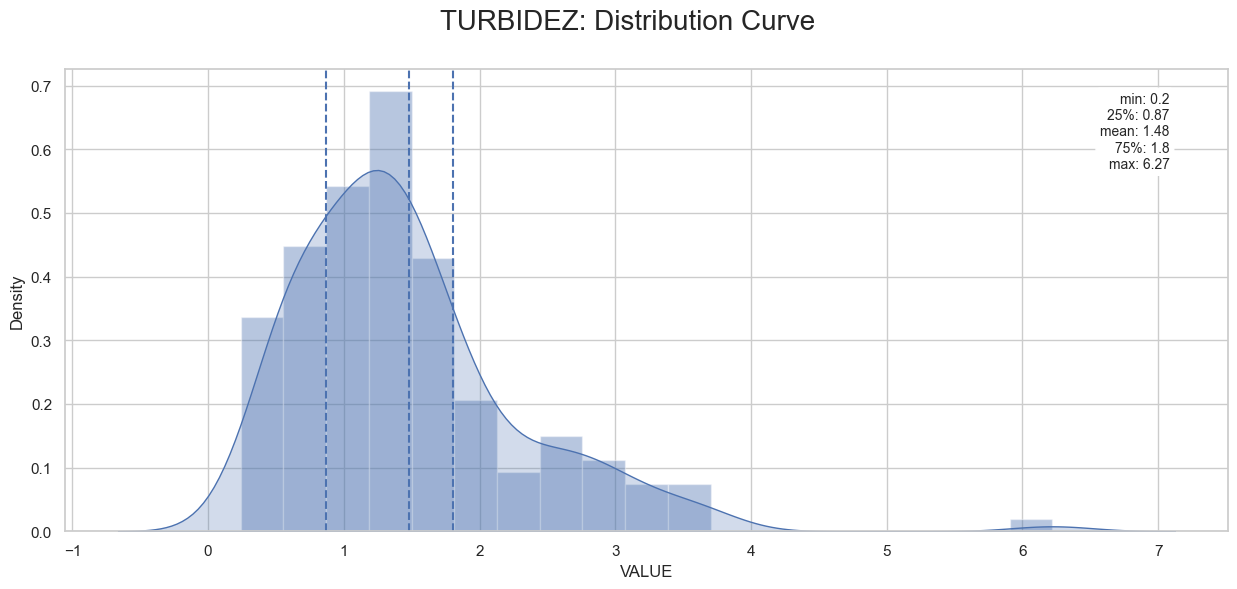

In [1028]:
x = 'VALUE'
fig, ax = plt.subplots(nrows=1, ncols=1,  sharex=False, sharey=False)
fig.suptitle(variavel_interesse + ': Distribution Curve', fontsize=20)
### distribution
#ax.title.set_text('Distribution Curve')
variable = dados[x].fillna(dados[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax)
des = dados[x].describe()
ax.axvline(des["25%"], ls='--')
ax.axvline(des["mean"], ls='--')
ax.axvline(des["75%"], ls='--')
ax.grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax.text(0.95, 0.95, box, transform=ax.transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 

In [1029]:
rcParams['figure.figsize'] = 15, 6

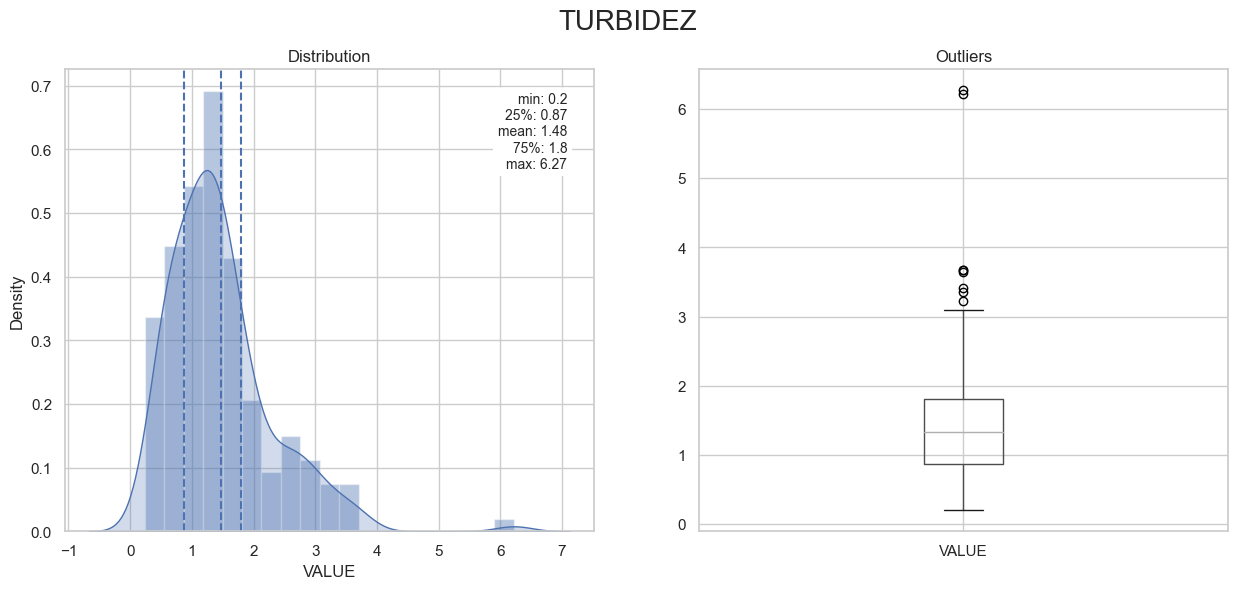

In [1030]:
# Verificando a Distribuição da Variável de Interesse - Novamente
x = 'VALUE'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(variavel_interesse, fontsize=20)
### distribution
ax[0].title.set_text('Distribution')
variable = dados[x].fillna(dados[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dados[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('Outliers')
tmp_dtf = pd.DataFrame(dados[x])
#tmp_dtf[x] = np.log(dados[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

In [1031]:
# Limites Interquartis da Variável de Interesse
IQR = dados.VALUE.quantile(0.75) - dados.VALUE.quantile(0.25) 
lower_bridge = dados['VALUE'].quantile(0.25)-(IQR*1.5) 
global interquartilsuperior
interquartilsuperior = dados['VALUE'].quantile(0.75)+(IQR*1.5)

# Desvio Padrão - Determinação do Limite de Corte - Variável de Interesse
print('VARIÁVEL - DEFINIÇÃO DE VALORES LIMITE PARA CORTE/OUTLIERS')
print('------------------------------------------------------------------')
print('Verificação do Limite de Corte da Variável de Interesse:')
print(f'*Desvio Padrão da Variável de Interesse: {dados.VALUE.std()}')
print(f'*Limite Interquartil Inferior da Variável de Interesse: {lower_bridge}')
print(f'*Limite Interquartil Superior da Variável de Interesse: {interquartilsuperior}')
print(f'*Valor Médio da Variável de Interesse: {dados.VALUE.mean()}')
print(f'*Valor da Mediana da Variável de Interesse: {dados.VALUE.median()}')
print(f'*Valor Mínimo da Variável de Interesse: {dados.VALUE.min()}')
print(f'*Valor Máximo da Variável de Interesse: {dados.VALUE.max()}')

VARIÁVEL - DEFINIÇÃO DE VALORES LIMITE PARA CORTE/OUTLIERS
------------------------------------------------------------------
Verificação do Limite de Corte da Variável de Interesse:
*Desvio Padrão da Variável de Interesse: 0.9185444806912162
*Limite Interquartil Inferior da Variável de Interesse: -0.5287499999999999
*Limite Interquartil Superior da Variável de Interesse: 3.20125
*Valor Médio da Variável de Interesse: 1.4798837209302327
*Valor da Mediana da Variável de Interesse: 1.3250000000000002
*Valor Mínimo da Variável de Interesse: 0.2
*Valor Máximo da Variável de Interesse: 6.27


In [1032]:
rcParams['figure.figsize'] = 10, 6

Text(0.95, 0.95, 'min: 0.2\n25%: 0.87\nmedian: 1.33\n75%: 1.8\nmax: 6.27')

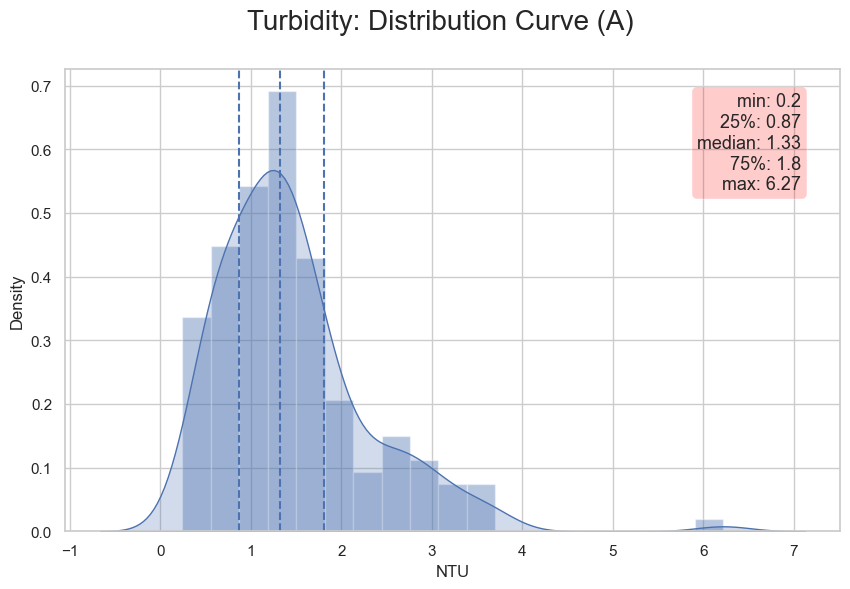

In [1033]:
x = 'VALUE'
fig, ax = plt.subplots(nrows=1, ncols=1,  sharex=False, sharey=False)
fig.suptitle('Turbidity' + ': Distribution Curve (A)', fontsize=20)
### distribution
#ax.title.set_text('Distribution Curve')
variable = dados[x].fillna(dados[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax)
des = dados[x].describe()
ax.axvline(des["25%"], ls='--')
ax.axvline(des["50%"], ls='--')
ax.axvline(des["75%"], ls='--')
ax.grid(True)
ax.set_xlabel('NTU')
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "median: "+des["50%"], "75%: "+des["75%"], "max: "+des["max"]))
ax.text(0.95, 0.95, box, transform=ax.transAxes, fontsize=13, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='red', alpha=0.2))
### boxplot 

In [1034]:
# Verão

In [1035]:
dados_season = dados[(dados['SEASON'] == 'Summer')]

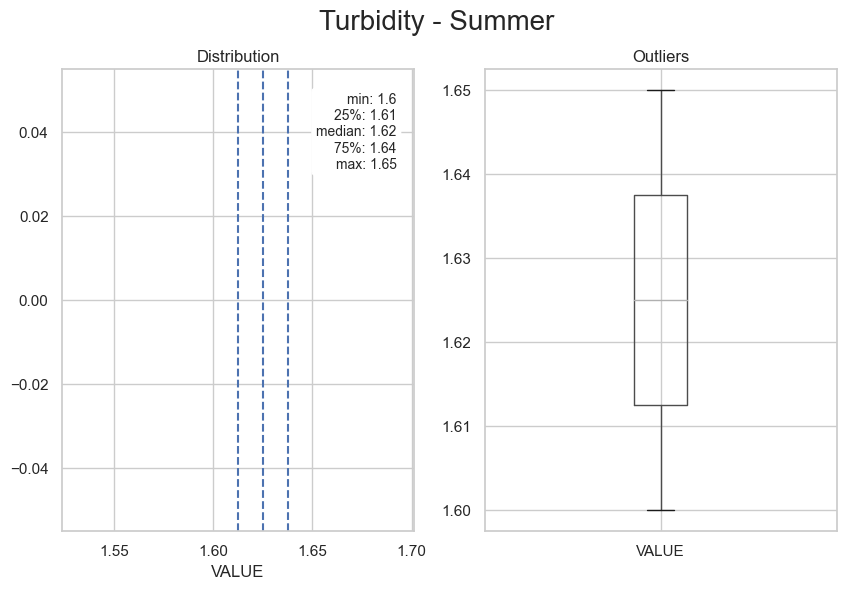

In [1036]:
# Verificando a Distribuição da Variável de Interesse - Novamente
x = 'VALUE'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle('Turbidity - Summer', fontsize=20)
### distribution
ax[0].title.set_text('Distribution')
variable = dados_season[x].fillna(dados_season[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dados_season[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["50%"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "median: "+des["50%"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('Outliers')
tmp_dtf = pd.DataFrame(dados_season[x])
#tmp_dtf[x] = np.log(dados_season[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

In [1037]:
dados['VALUE'][(dados['SEASON'] == 'Summer')].describe()

count    2.000000
mean     1.625000
std      0.035355
min      1.600000
25%      1.612500
50%      1.625000
75%      1.637500
max      1.650000
Name: VALUE, dtype: float64

In [1038]:
# Primavera

In [1039]:
dados_season = dados[(dados['SEASON'] == 'Spring')]

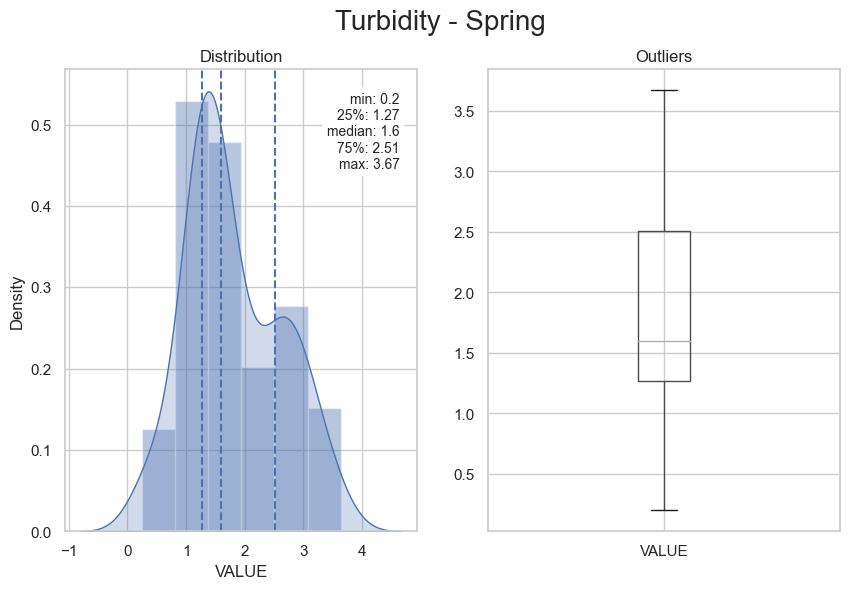

In [1040]:
# Verificando a Distribuição da Variável de Interesse - Novamente
x = 'VALUE'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle('Turbidity - Spring', fontsize=20)
### distribution
ax[0].title.set_text('Distribution')
variable = dados_season[x].fillna(dados_season[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dados_season[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["50%"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "median: "+des["50%"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('Outliers')
tmp_dtf = pd.DataFrame(dados_season[x])
#tmp_dtf[x] = np.log(dados_season[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

In [1041]:
dados['VALUE'][(dados['SEASON'] == 'Spring')].describe()

count    73.000000
mean      1.835479
std       0.865727
min       0.200000
25%       1.270000
50%       1.600000
75%       2.510000
max       3.670000
Name: VALUE, dtype: float64

In [1042]:
# Outono

In [1043]:
dados_season = dados[(dados['SEASON'] == 'Autumn')]

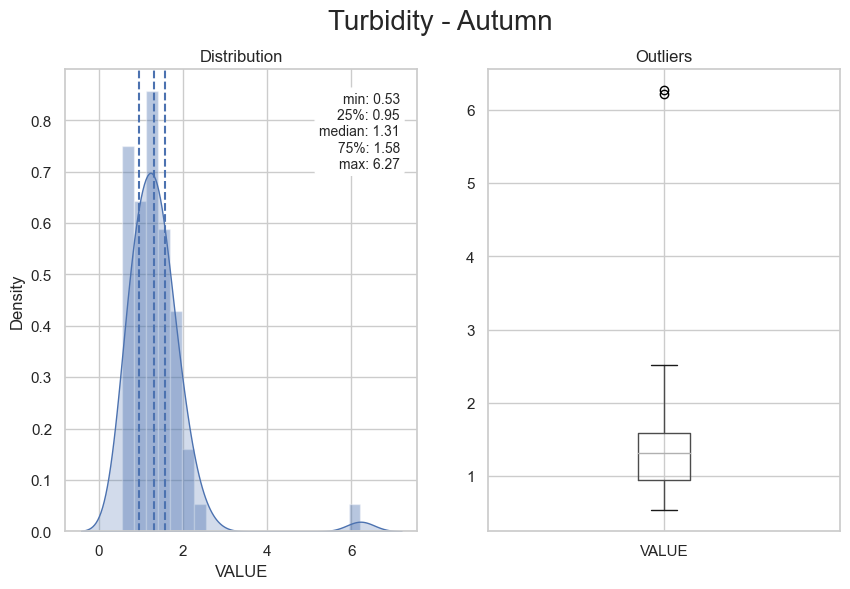

In [1044]:
# Verificando a Distribuição da Variável de Interesse - Novamente
x = 'VALUE'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle('Turbidity - Autumn', fontsize=20)
### distribution
ax[0].title.set_text('Distribution')
variable = dados_season[x].fillna(dados_season[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dados_season[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["50%"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "median: "+des["50%"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('Outliers')
tmp_dtf = pd.DataFrame(dados_season[x])
#tmp_dtf[x] = np.log(dados_season[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

In [1045]:
dados['VALUE'][(dados['SEASON'] == 'Autumn')].describe()

count    68.000000
mean      1.417941
std       0.955624
min       0.530000
25%       0.947500
50%       1.310000
75%       1.585000
max       6.270000
Name: VALUE, dtype: float64

In [1046]:
# Inverno

In [1047]:
dados_season = dados[(dados['SEASON'] == 'Winter')]

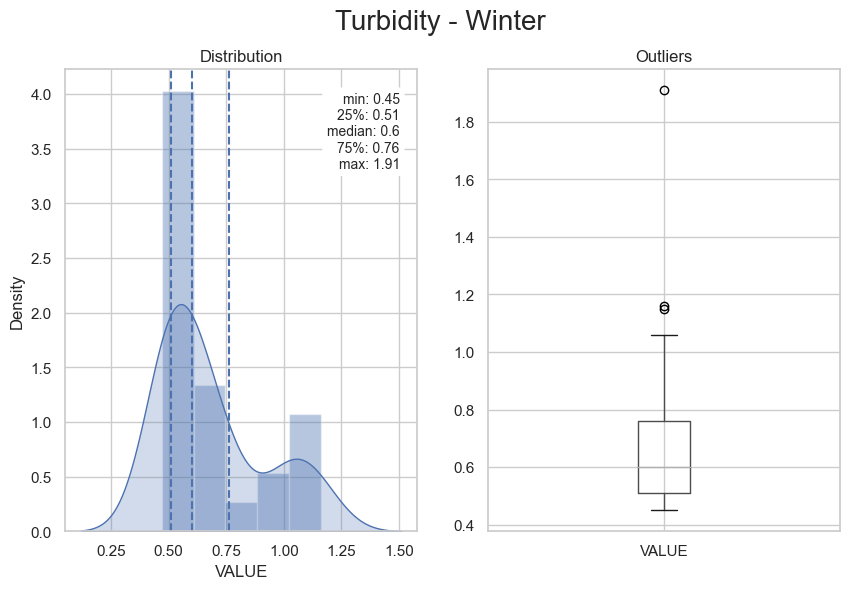

In [1048]:
# Verificando a Distribuição da Variável de Interesse - Novamente
x = 'VALUE'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle('Turbidity - Winter', fontsize=20)
### distribution
ax[0].title.set_text('Distribution')
variable = dados_season[x].fillna(dados_season[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dados_season[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["50%"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "median: "+des["50%"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('Outliers')
tmp_dtf = pd.DataFrame(dados_season[x])
#tmp_dtf[x] = np.log(dados_season[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

In [1049]:
dados['VALUE'][(dados['SEASON'] == 'Winter')].describe()

count    29.000000
mean      0.720000
std       0.318938
min       0.450000
25%       0.510000
50%       0.600000
75%       0.760000
max       1.910000
Name: VALUE, dtype: float64

In [1050]:
len(dados)

172

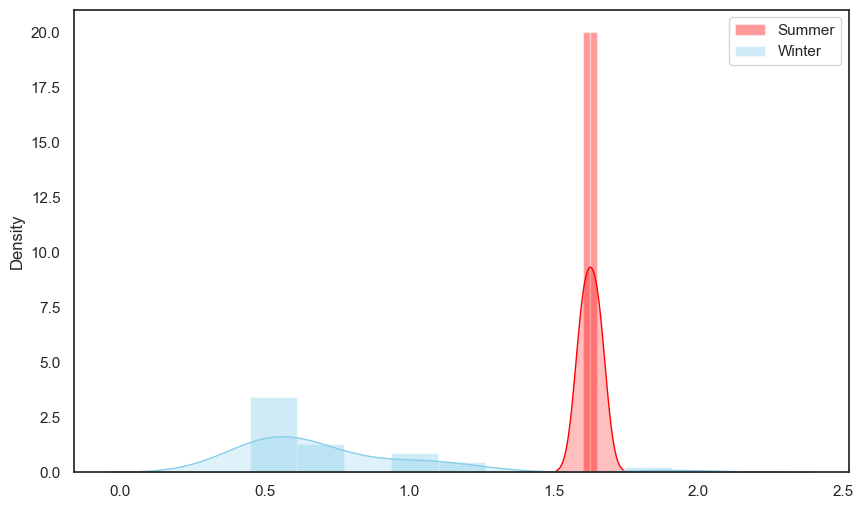

In [1051]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="white")
#df = sns.load_dataset("iris")

sns.distplot(x=dados['VALUE'][(dados['SEASON'] == 'Summer')], color="red", label="Summer", hist=True, kde=True, kde_kws={"shade": True})
sns.distplot(x=dados['VALUE'][(dados['SEASON'] == 'Winter')], color="skyblue", label="Winter", hist=True, kde=True, kde_kws={"shade": True})

plt.legend() 
plt.show()

In [1052]:
dados_verao_inverno = dados[(dados['SEASON'] == 'Winter') |(dados['SEASON'] == 'Summer')]

In [1053]:
rcParams['figure.figsize'] = 9, 7

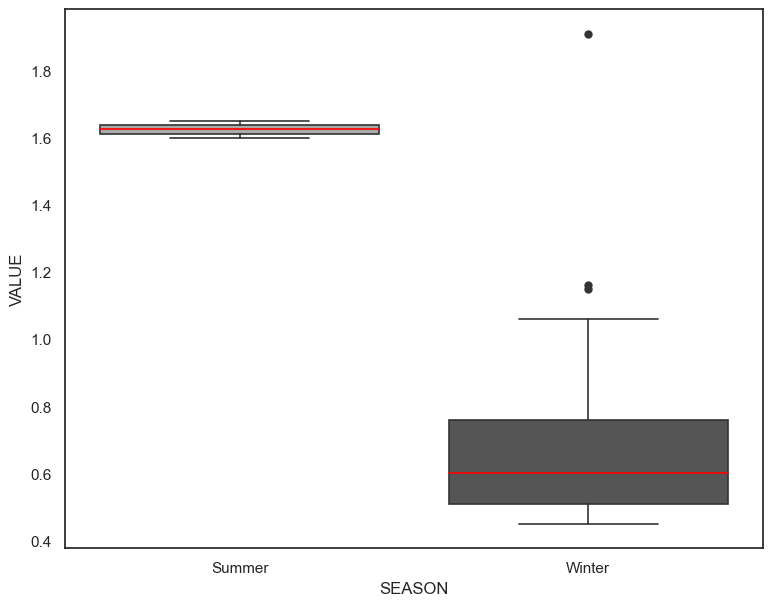

In [1054]:
b = sns.boxplot(x='SEASON', y='VALUE', data=dados_verao_inverno, palette='gray_r',
           notch=False, showcaps=True, dodge=True,order=["Summer", "Winter"],
            linewidth=1.2, width=0.8, 
           flierprops={"marker": "o"}, medianprops={"color": "Red"})

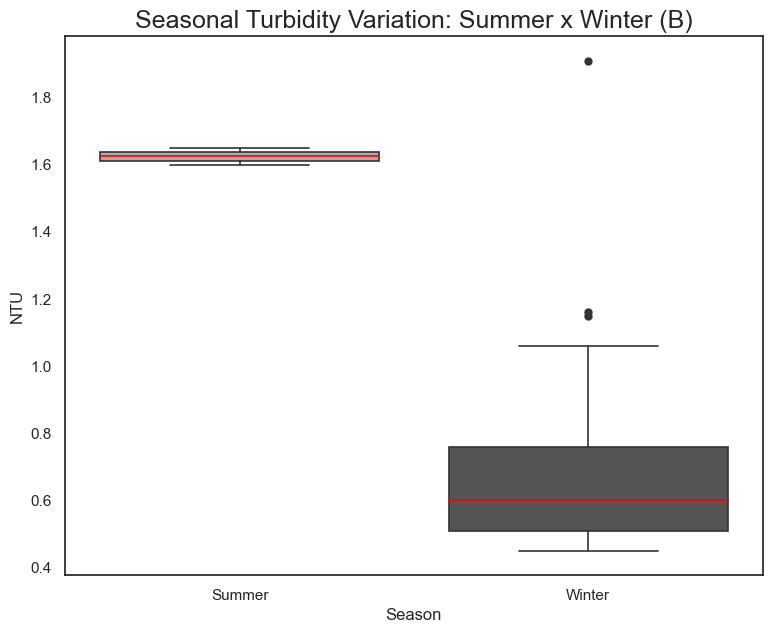

In [1055]:
b.set_title('Seasonal Turbidity Variation: Summer x Winter (B)', fontsize= 18)
b.set_ylabel('NTU')
b.set_xlabel('Season')
b.get_figure()

In [1056]:
# Série

In [1057]:
#dados.columns

In [1058]:
dados_base_serie = dados[['SAMPLE_DATE', 'VALUE']]

In [1059]:
dados_base_serie['SAMPLE_DATE']= pd.to_datetime(dados_base_serie['SAMPLE_DATE'])

In [1060]:
dados_base_serie.set_index('SAMPLE_DATE', inplace=True)
#dados_base_serie.head()

In [1061]:
serie = dados_base_serie['VALUE']
#serie

In [1062]:
serie_group_mes_ano = serie.groupby([serie.index.year,serie.index.month]).mean()
#serie_group_mes_ano

In [1063]:
serie_mes_ano = serie_group_mes_ano.reset_index(drop=True).squeeze()
#print(serie_mes_ano)
#print (type(serie_mes_ano))

In [1064]:
serie.index.min(), serie.index.max()

(Timestamp('2019-10-04 00:00:00'), Timestamp('2021-10-28 00:00:00'))

In [1065]:
dti = pd.date_range(serie.index.min(), periods=len(serie_mes_ano), freq="M")
#dti = pd.date_range("2019-05-11", "2022-11-23", freq="M")
#dti = pd.date_range("2020-01-01", periods=len(serie_mes_ano), freq="M")
dti, dti.shape

(DatetimeIndex(['2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
                '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31'],
               dtype='datetime64[ns]', freq='M'),
 (8,))

In [1066]:
# Preparando a série para Decompor a Série Temporal
serie_mes_ano.index = dti
serie_mes_ano

2019-10-31    0.773077
2019-11-30    1.625000
2019-12-31    2.252308
2020-01-31    1.447000
2020-02-29    0.949200
2020-03-31    0.720000
2020-04-30    2.547600
2020-05-31    1.721429
Freq: M, Name: VALUE, dtype: float64

In [1067]:
# DECOMPSIÇÃO DA SÉRIE TEMPORAL
rcParams['figure.figsize'] = 15, 6

try:
    resultado_parametro = seasonal_decompose(serie_mes_ano, model='additive')
    resultado_parametro.plot()
    plt.show()
except:
    pass

# SAZONAL

In [1068]:
## Teste de Estacionariedade: ADF - Augmented Dickey-Fuller test

X = serie
result1 = adfuller(X)
result1
print('ADF Estatíticas: %f' % result1[0])
print('Valor de P: %f' % result1[1])
print('Valores Críticos:')
for key, value in result1[4].items():
    print('\t%s: %.3f' % (key, value))

## Série Estacionária
# Valor de p > 0,05

ADF Estatíticas: -2.426006
Valor de P: 0.134531
Valores Críticos:
	1%: -3.470
	5%: -2.879
	10%: -2.576


In [1069]:
del(dados_base_serie)

In [1070]:
# Teste de Normalidade

In [1071]:
shapiro_limit = 0.05

def tipo_shapiro(valor_medio_shapiro):
    if valor_medio_shapiro > shapiro_limit:
        return "Normal"
    else: 
        return "Not Normal"
    
shapiro_test = shapiro(dados['VALUE']).pvalue

print(shapiro_test)

print(tipo_shapiro(shapiro_test))

1.832933110845758e-12
Not Normal


In [1072]:
# Teste Skewness

In [1073]:
skew_limit = 0.7

def tipo_skew(valor_medio_skew):
    if valor_medio_skew + skew_limit < 0:
        return "left skewed"
    elif valor_medio_skew > skew_limit:
        return"right skewed"
    else: 
        return "not skewed"

skew_test = skew(dados['VALUE'])
print(skew_test)
print(tipo_skew(skew_test))

2.056005135230871
right skewed


In [1074]:
# Kurtosis

In [1075]:
kurt_limit = 3.0

def tipo_kurtosis(valor_medio_kurt):
    if valor_medio_kurt < kurt_limit:
        return "platykurtic"
    elif valor_medio_kurt > kurt_limit:
        return "leptokurtic"
    else: 
        return "normal"

kurt_test = kurtosis(dados['VALUE'])
print(kurt_test)
print(tipo_kurtosis(kurt_test))

7.06804440376424
leptokurtic


# Selecionando DADOS DE ENTRADA PARA APLICAÇÃO NOS MODELOS: Bandas Espectrais de Interesse

In [1076]:
import math

In [1077]:
# CALCULO DE ÍNDICES ESCECTRAIS PARA COMPOR 12 (bandas) + VARIÁVEIS DE ENTRADA COMPUTADAS

In [1078]:
dados.columns

Index(['SAMPLE_DATE', 'IMAGE_DATE', 'TIME_SAMPLE', 'IMAGE_HOUR',
       'STATION_SAMPLE', 'PARAMETER', 'VALUE', 'UNIT', 'DEPTH', 'DEPTH_UNIT',
       'LOCAL_NAME', 'LOCATION_TYPE', 'LAT', 'LON', 'COUNTRY',
       'ORGANIZATION_DATA', 'HEMISPHERE', 'SEASON', 'SOURCE_DOMAIN',
       'DIFF_DATE', 'BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6',
       'BAND_7', 'BAND_8', 'BAND_8A', 'BAND_9', 'BAND_11', 'BAND_12',
       'MSK_CLDPRB', 'MSK_SNOW', 'QA60', 'CLDYPXPER', 'DRK_FEA_PE', 'NDWI',
       'NBSI', 'WATER_CHECK', 'SNOW_CHECK', 'SCENE_CLASS', 'GEOMETRY',
       'SunGlint_Status', 'CLASSE'],
      dtype='object')

In [1079]:
# Computar Variáveis de Entrada Adicionais
print('VARIÁVEIS DE ENTRADA ADICIONAIS')
print('----------------------------------------------------------------------------------')
print('Para Computar Variáveis de Entrada Adicionais:')
print('Digite 1 para PROSSEGUIR SEM ADICIONAR VARIÁVEIS DE ENTRADA')
print('Digita 0 para COMPUTAR 176 VARIÁVEIS DE ENTRADA ADICIONAIS: 170 ÍNDICES SENTINEL 2A + 6 EMPÍRICAS')
#print('Digita 10 para COMPUTAR 104 VARIÁVEIS DE ENTRADA ADICIONAIS')

usar_variaveis_adicionais = int(input())

if usar_variaveis_adicionais in(0,10):

    # Ajustando valores para facilitar computo dos índices e parâmetros adiconais de entrada/features
    b1 = dados['BAND_1']/10000
    b2 = dados['BAND_2']/10000
    b3 = dados['BAND_3']/10000
    b4 = dados['BAND_4']/10000
    b5 = dados['BAND_5']/10000
    b6 = dados['BAND_6']/10000
    b7 = dados['BAND_7']/10000
    b8 = dados['BAND_8']/10000
    b8a = dados['BAND_8A']/10000
    b9 = dados['BAND_9']/10000
    b11 = dados['BAND_11']/10000
    b12 = dados['BAND_12']/10000

VARIÁVEIS DE ENTRADA ADICIONAIS
----------------------------------------------------------------------------------
Para Computar Variáveis de Entrada Adicionais:
Digite 1 para PROSSEGUIR SEM ADICIONAR VARIÁVEIS DE ENTRADA
Digita 0 para COMPUTAR 176 VARIÁVEIS DE ENTRADA ADICIONAIS: 170 ÍNDICES SENTINEL 2A + 6 EMPÍRICAS
0


In [1080]:
# 170 índices Sentinel 2
# 6 variáveis empíricas

if usar_variaveis_adicionais == 0:

    # Adjusted transformed soil-adjusted VI  (abbrv. ATSAVI)
    # General formula: a*(NIR-a*RED - b)/(a*NIR+RED-a*b+X*(1+a^2))
    dados['ATSAVI'] = 1.22 * (b8 - 1.22 * b4 - 0.03) / (1.22 * b8 + b4 - 1.22 * 0.03 + 0.08 * (1.0 + pow(1.22, 2.0)))

    # Aerosol free vegetation index 1600  (abbrv. AFRI1600)
    # General formula: (NIR-0.66*1600nm/(NIR + 0.66*1600nm)
    dados['AFRI1600'] = b8 - 0.66 * b11 / (b8 + 0.66 * b11)

    # Aerosol free vegetation index 2100  (abbrv. AFRI2100)
    # General formula: (NIR-0.5*2100nm/(NIR + 0.56*2100nm)
    dados['AFRI2100'] = b8 - 0.5 * b12 / (b8 + 0.56 * b12)


    # Alteration   (abbrv. )
    # General formula: [1600:1700] / [2145:2185]
    dados['ALTERATION'] = b11 / b12

    # Anthocyanin reflectance index  (abbrv. ARI)
    # General formula: 1/550nm-1/700nm
    dados['ARI'] = 1.0 / b3 - 1.0 / b5

    # Ashburn Vegetation Index  (abbrv. AVI)
    # General formula: 2.0*[800:1100] - [600:700]
    dados['AVI'] = 2.0 * b9 - b4

    # Atmospherically Resistant Vegetation Index   (abbrv. ARVI)
    # General formula: (NIR - RED - y * (RED - BLUE))/ (NIR + RED - y*(RED-BLUE))
    y = 0.069
    dados['ARVI'] = (b8a - b4 - y * (b4 - b2)) / (b8a + b4 - y * (b4 - b2))

    # Atmospherically Resistant Vegetation Index 2  (abbrv. ARVI2)
    # General formula: -0.18 + 1.17 * ((NIR-RED)/(NIR+RED))
    dados['ARVI2'] = -0.18 + 1.17 * ((b8 - b4) / (b8 + b4))

    # Blue-wide dynamic range vegetation index  (abbrv. BWDRVI)
    # General formula: (0.1 * NIR - BLUE)/(0.1 * NIR + BLUE)
    dados['BWDRVI'] = (0.1 * b8 - b2) / (0.1 * b8 + b2)

    # Browning Reflectance Index  (abbrv. BRI)
    # General formula: (1/550nm-1/700nm)/NIR
    dados['BRI'] = (1.0 / b3 - 1.0 / b5) / b8

    # Canopy Chlorophyll Content Index  (abbrv. CCCI)
    # General formula: ((NIR - rededge)/( NIR + rededge))/((NIR - Red)/( NIR + Red))
    dados['CCCI'] = ((b8 - b5) / (b8 + b5)) / ((b8 - b4) / (b8 + b4))

    # Chlorophyll Absorption Ratio Index  (abbrv. CARI)
    # General formula: (700nm/670nm)*(sqrt((a*670+670nm+b)^2))/((a^2+1)^0.5)
    dados['CARI'] = (b5 / b4) * (np.sqrt(pow(((b5 - b3) / 150.0 * 670.0 + b4 + (b3 - ((b5 - b3) / 150.0 * 550.0))), 2.0))) / (pow(((b5 - b3) / pow(150.0, 2.0) + 1.0), 0.5))

    # Chlorophyll Absorption Ratio Index 2  (abbrv. CARI2)
    # General formula: (abs((a*[670]+[670]+b))/(a^2+1)^0.5)*([700]/[670])
    a = 0.496
    dados['CARI2'] = (abs(((b5 - b3) / 150.0 * b4 + b4 + b3 - (a * b3))) / pow((pow(a, 2.0) + 1.0), 0.5)) * (b5 / b4)

    # Chlorophyll Green  (abbrv. Chlgreen)
    # General formula: ([760:800]/[540:560])^(-1)
    dados['CHLGREEN'] = pow((b7 / b3), (-1.0))

    # Chlorophyll Index Green  (abbrv. CIgreen)
    # General formula: NIR/GREEN-1
    dados['CIGREEN'] = b8 / b3 - 1.0

    # Chlorophyll IndexRedEdge  (abbrv. CIrededge)
    # General formula: NIR/rededge-1
    dados['CIREDEDGE'] = b8 / b5 - 1.0

    # Chlorophyll Red-Edge  (abbrv. Chlred-edge)
    # General formula: ([760:800]/[690:720])^(-1)
    dados['CHLREDEDGE'] = pow((b7 / b5), (-1.0))

    # Chlorophyll vegetation index  (abbrv. CVI)
    # General formula: NIR*RED/GREEN ^2
    dados['CVI'] = b8 * b4 / pow(b3, 2.0)

    # Coloration Index  (abbrv. CI)
    # General formula: (RED - BLUE) / RED
    dados['CI'] = (b4 - b2) / b4

    # Corrected Transformed Vegetation Index  (abbrv. CTVI)
    # General formula: (NDVI+0,5)/abs(NDVI+0,5)*sqrt(abs((NDVI)+0,5))
    dados['CTVI'] = (((b4 - b3) / (b4 + b3)) + 0.5) / abs(((b4 - b3) / (b4 + b3)) + 0.5) * np.sqrt(abs((((b4 - b3) / (b4 + b3))) + 0.5))

    # CRI550  (abbrv. CRI550)
    # General formula: [510] ^(-1) - [550] ^(-1)
    dados['CRI550'] = pow(b2, (-1.0)) - pow(b3, (-1.0))

    # CRI700  (abbrv. CRI700)
    # General formula: [510] ^(-1)-[700] ^(-1)
    dados['CRI700'] = pow(b2, (-1.0)) - pow(b5, (-1.0))

    # Datt1  (abbrv. Datt1)
    # General formula: (850nm-710nm)/(850nm-680nm)
    dados['DATT1'] = (b8 - b5) / (b8 - b4)

    # Datt4  (abbrv. Datt4)
    # General formula: 672nm/(550nm*708nm)
    dados['DATT4'] = b4 / (b3 * b5)

    # Datt6  (abbrv. Datt6)
    # General formula: 860nm/(550nm*708nm)
    dados['DATT6'] = b8a / (b3 * b5)

    # Difference 678/500  (abbrv. D678/500)
    # General formula: 678nm-500nm
    dados['D678/500'] = b4 - b2

    # Difference 800/680  (abbrv. D800/680)
    # General formula: 800nm-680nm
    dados['D800/680'] = b8 - b4

    # Difference NIR/Green Green Difference Vegetation Index (abbrv. GDVI)
    # General formula: NIR - G
    dados['GDVI'] = b8 - b3

    # Differenced Vegetation Index MSS  (abbrv. DVIMSS)
    # General formula: 2.4*[800:1100]-[600:700]
    dados['DVIMSS'] = 2.4 * b9 - b4

    # Enhanced Vegetation Index  (abbrv. EVI)
    # General formula: 2.5 * (NIR - RED) / ((NIR + 6*RED - 7.5*BLUE) + 1)
    dados['EVI'] = 2.5 * (b8 - b4) / ((b8 + 6.0 * b4 - 7.5 * b2) + 1.0)

    # Enhanced Vegetation Index 2  (abbrv. EVI2)
    # General formula: 2.4 * (NIR - RED) / (NIR + RED + 1)
    dados['EVI2'] = 2.4 * (b8 - b4) / (b8 + b4 + 1.0)

    # Enhanced Vegetation Index 2 -2 (abbrv. EVI2)
    # General formula: 2.5 * (NIR - RED) / (NIR + 2.4 * RED + 1)
    dados['EVI2_2'] = 2.5 * (b8 - b4) / (b8 + 2.4 * b4 + 1.0)

    # EPI  (abbrv. EPI)
    # General formula: a*[672]/([550]*[708])^b
    # Initialize parameters
    a = 0.331
    b = 0.329
    dados['EPI'] = a * b4 / pow((b3 * b5), b)

    # Ferric iron, Fe2+   (abbrv. Fe2+)
    # General formula: [2145:2185]/[760:860]+[520:600]/[630:690]
    dados['FE2'] = b12 / b8 + b3 / b4

    # Ferric iron, Fe3+   (abbrv. Fe3+)
    # General formula: [630:690]/[520:600]
    dados['FE3'] = b4 / b3

    # Ferric Oxides   (abbrv. )
    # General formula: [1600:1700]/[760:860]
    dados['FEOX'] = b11 / b8

    # Ferrous Silicates   (abbrv. )
    # General formula: [2145:2185]/[1600:1700]
    dados['FERSIL'] = b12 / b11

    # Global Environment Monitoring Index  (abbrv. GEMI)
    # General formula: ( n * ( 1 - 0.25 * n ) - (RED - 0.125 ) / ( 1 - RED))
    dados['GEMI'] = ((2.0 * (pow(b8, 2.0) - pow(b4, 2.0)) + 1.5 * b8 + 0.5 * b4) / (b8 + b4 + 0.5) * (1.0 - 0.25 * (2.0 * (pow(b8, 2.0) - pow(b4, 2.0)) + 1.5 * b8 + 0.5 * b4) / (b8 + b4 + 0.5)) - (b4 - 0.125) / (1.0 - b4))

    # Global Vegetation Moisture Index  (abbrv. GVMI)
    # General formula: ((NIR+ 0.1) -(SWIR+0.02) )/((NIR+0.1) +(SWIR+0.02))
    dados['GVMI'] = ((b8 + 0.1) - (b12 + 0.02)) / ((b8 + 0.1) + (b12 + 0.02))

    # Gossan   (abbrv. )
    # General formula: [1600:1700]/[630:690]
    dados['GOSSAN'] = b11 / b4

    # Green atmospherically resistant vegetation index  (abbrv. GARI)
    # General formula: ( NIR - (GREEN-(BLUE- RED))) /  ( NIR- (GREEN+(BLUE - RED)))
    dados['GARI'] = (b8 - (b3 - (b2 - b4))) / (b8 - (b3 + (b2 - b4)))

    # Green leaf index  (abbrv. GLI)
    # General formula: (2 * GREEN - RED - BLUE)/(2 * GREEN + RED + BLUE)
    dados['GLI'] = (2.0 * b3 - b4 - b2) / (2.0 * b3 + b4 + b2)

    # Green Normalized Difference Vegetation Index   (abbrv. GNDVI)
    # General formula: (NIR - [540:570]) / (NIR + [540:570])
    dados['GNDVI'] = (b8 - b3) / (b8 + b3)

    # Green Optimized Soil Adjusted Vegetation Index  (abbrv. GOSAVI)
    # General formula: (NIR - G) / (NIR + G + Y)
    # Initialize parameters
    Y = 0.120
    dados['GOSAVI'] = (b8 - b3) / (b8 + b3 + Y)

    # Green Soil Adjusted Vegetation Index  (abbrv. GSAVI)
    # General formula: (NIR - G) / (NIR + G + L) * (1 + L)
    # Initialize parameters
    L = 0.482
    dados['GSAVI'] = (b8 - b3) / (b8 + b3 + L) * (1.0 + L)

    # Green-Blue NDVI  (abbrv. GBNDVI)
    # General formula: (NIR-(GREEN+BLUE))/(NIR+(GREEN+BLUE))
    dados['GBNDVI'] = ((b8 - (b3 + b2)) / (b8 + (b3 + b2))).astype(float)

    # Green-Red NDVI  (abbrv. GRNDVI)
    # General formula: (NIR-(GREEN+RED))/(NIR+(GREEN+RED))
    dados['GRNDVI'] = (b8 - (b3 + b4)) / (b8 + (b3 + b4))

    # Hue  (abbrv. H)
    # General formula: arctan ((2 * R - G - B) / 30.5 * (G - B))
    dados['HUE'] = np.arctan((2.0 * b4 - b3 - b2) / 30.5 * (b3 - b2))

    # Ideal vegetation index  (abbrv. IVI)
    # General formula: (NIR-b)/(a*RED)
    # Initialize parameters
    a = 0.393
    b = 0.809
    dados['IVI'] = (b8 - b) / (a * b4)

    # Intensity  (abbrv. I )
    # General formula: (1 / (30.5)) * (R + G + B)
    dados['I'] = (1.0 / (30.5)) * (b4 + b3 + b2)

    # Inverse reflectance 550  (abbrv. IR550)
    # General formula: 550nm ^(-1)
    dados['IR550'] = pow(b3, (-1.0))

    # Inverse reflectance 700  (abbrv. IR700)
    # General formula: 700nm ^(-1)
    dados['IR700'] = pow(b5, (-1.0))

    # Laterite   (abbrv. )
    # General formula: [1600:1700]/[2145:2185]
    dados['LATERITE'] = b11 / b12

    # Leaf Chlorophyll Index  (abbrv. LCI)
    # General formula: ([850]-[710])/([850]+[680])
    dados['LCI'] = (b8 - b5) / (b8 + b4)

    # Leaf Water Content Index  (abbrv. LWCI)
    # General formula: log(1-(NIR-MIDIR))/(-log(1-(NIR-MIDIR)))
    # Initialize parameters
    MIDIR = 0.101
    dados['LWCI'] = np.log(1.0 - (b8 - MIDIR)) / (-np.log(1.0 - (b8 - MIDIR)))

    # Log Ratio  (abbrv. LogR)
    # General formula: log(NIR/RED)
    dados['LOGR'] = np.log(b8 / b4)

    # Maccioni  (abbrv. )
    # General formula: (780nm-710nm)/(780nm-680nm)
    dados['MACCIONI'] = (b7 - b5) / (b7 - b4)

    # MCARI/MTVI2  (abbrv. MCARI/MTVI2)
    # General formula: (((700nm - 670nm) - 0.2 * (700nm - 550nm)) * (700nm /670nm))/((1.5 * (1.2 * (800nm - 550nm) - 2.5 * (670nm - 550nm)) / sqrt((2 * 800nm + 1)^2 - (6 * 800nm - 5 * sqrt(670nm))-0.5 ))
    dados['MCARI/MTVI2'] = (((b5 - b4) - 0.2 * (b5 - b3)) * (b5 / b4)) / (1.5 * (1.2 * (b8 - b3) - 2.5 * (b4 - b3)) / np.sqrt(pow((2.0 * b8 + 1.0), 2.0) - (6.0 * b8 - 5.0 * np.sqrt(b4)) - 0.5))

    # MCARI/OSAVI  (abbrv. MCARI/OSAVI)
    # General formula: ((700nm-670nm)-0.2*(700nm-550nm)*(700nm/670nm))/((1+0.16)*(800nm-670nm)/(800nm+670nm+0.16))
    dados['MCARI/OSAVI'] = ((b5 - b4) - 0.2 * (b5 - b3) * (b5 / b4)) / ((1.0 + 0.16) * (b8 - b4) / (b8 + b4 + 0.16))

    # mCRIG  (abbrv. mCRIG)
    # General formula: ([510:520] ^(-1)-[560:570] ^(-1))*NIR
    dados['MCRIG'] = (pow(b2, (-1.0)) - pow(b3, (-1.0))) * b8

    # mCRIRE  (abbrv. mCRIRE)
    # General formula: ([510:520] ^(-1) - [690:700] ^(-1)) * NIR
    dados['MCRIRE'] = (pow(b2, (-1.0)) - pow(b5, (-1.0))) * b8

    # Mid-infrared vegetation index  (abbrv. MVI)
    # General formula: [700:1300]/[1570:1780]
    dados['MVI'] = b / b11

    # Misra Green Vegetation Index  (abbrv. MGVI)
    # General formula: -0.386*[500:600] - 0.530*[600:700] + 0.535*[700:800] + 0.532*[800:1100]
    dados['MGVI'] = -0.386 * b3 - 0.53 * b4 + 0.535 * b6 + 0.532 * b

    # Misra Non Such Index  (abbrv. MNSI)
    # General formula: 0.404*[500:600] - 0.039*[600:700] - 0.505*[700:800] + 0.762*[800:1100]
    dados['MNSI'] = 0.404 * b3 - 0.039 * b4 - 0.505 * b6 + 0.762 * b

    # Misra Soil Brightness Index  (abbrv. MSBI)
    # General formula: 0.406*[500:600] + 0.600*[600:700] + 0.645*[700:800] + 0.243*[800:1100]
    dados['MSBI'] = 0.406 * b3 + 0.6 * b4 + 0.645 * b6 + 0.243 * b

    # Misra Yellow Vegetation Index  (abbrv. MYVI)
    # General formula: 0.723*[500:600] - 0.597*[600:700] + 0.206*[700:800] - 0.278*[800:1100]
    dados['MYVI'] = 0.723 * b3 - 0.597 * b4 + 0.206 * b6 - 0.278 * b

    # mND680  (abbrv. mND680)
    # General formula: (800nm-680nm)/(800nm+680nm-2*445nm)
    dados['MND680'] = (b8 - b4) / (b8 + b4 - 2.0 * b1)

    # Modified anthocyanin reflectance index  (abbrv. mARI)
    # General formula: ([530:570] ^(-1) - [690:710] ^(-1))*NIR
    dados['MARI'] = (pow(b3, (-1.0)) - pow(b5, (-1.0))) * b8

    # Modified Chlorophyll Absorption in Reflectance Index   (abbrv. MCARI)
    # General formula: ((700nm - 670nm) - 0.2 * (700nm - 550nm)) * (700nm /670nm)
    dados['MCARI'] = ((b5 - b4) - 0.2 * (b5 - b3)) * (b5 / b4)

    # Modified Chlorophyll Absorption in Reflectance Index 1  (abbrv. MCARI1)
    # General formula: 1.2 * (2.5 * (800nm - 670nm) - 1.3 * (800nm - 550nm))
    dados['MCARI1'] = 1.2 * (2.5 * (b8 - b4) - 1.3 * (b8 - b3))

    # Modified Chlorophyll Absorption in Reflectance Index 2  (abbrv. MCARI2)
    # General formula: (1.5 * (2.5 * (800nm - 670nm) - 1.3 * (800nm - 550nm)) / sqrt((2 * 800nm + 1)^2 - (6 * 800nm - 5 * sqrt(670nm)) - 0.5)
    dados['MCARI2'] = 1.5 * (2.5 * (b8 - b4) - 1.3 * (b8 - b3)) / np.sqrt(pow((2.0 * b8 + 1.0), 2.0) - (6.0 * b8 - 5.0 * np.sqrt(b4)) - 0.5)

    # Modified NDVI  (abbrv. mNDVI)
    # General formula: (800nm-680nm)/(800nm+680nm-2*445nm)
    dados['MNDVI'] = (b8 - b4) / (b8 + b4 - 2.0 * b1)

    # Modified Simple Ratio  (abbrv. mSR)
    # General formula: (800nm-445nm)/(680nm-445nm)
    dados['MSR'] = (b8 - b1) / (b4 - b1)

    # Modified Simple Ratio 670,800  (abbrv. MSR670)
    # General formula: (800nm/670nm-1)/sqrt(800nm/670nm+1)
    dados['MSR670'] = (b8 / b4 - 1.0) / np.sqrt(b8 / b4 + 1.0)

    # Modified Simple Ratio NIR/RED  (abbrv. MSRNir/Red)
    # General formula: ((NIR/RED)-1)/sqrt((NIR/RED)+1)
    dados['MSRNIR/RED'] = ((b8 / b4) - 1.0) / np.sqrt((b8 / b4) + 1.0)

    # Modified Soil Adjusted Vegetation Index  (abbrv. MSAVI)
    # General formula: (2 * NIR + 1 - sqrt((2 * NIR + 1)^2- 8 * (NIR - RED)))/2)
    dados['MSAVI'] = (2.0 * b8 + 1.0 - np.sqrt(pow((2.0 * b8 + 1.0), 2.0) - 8.0 * (b8 - b4))) / 2.0

    # Modified Soil Adjusted Vegetation Index hyper  (abbrv. MSAVIhyper)
    # General formula: (0.5) * ((2 *800nm + 1) - sqrt((2 * 800nm + 1)^2- 8 * (800nm - 670nm)))
    dados['MSAVIHYPER'] = (0.5) * ((2.0 * b8 + 1.0) - np.sqrt(pow((2.0 * b8 + 1.0), 2.0) - 8.0 * (b8 - b4)))

    # Modified Triangular Vegetation Index 1  (abbrv. MTVI1)
    # General formula: 1.2 * (1.2 * (800nm - 550nm) - 2.5 * (670nm - 550nm))
    dados['MTVI1'] = 1.2 * (1.2 * (b8 - b3) - 2.5 * (b4 - b3))

    # Modified Triangular Vegetation Index 2  (abbrv. MTVI2)
    # General formula: (1.5 * (1.2 * (800nm - 550nm) - 2.5 * (670nm - 550nm)) / sqrt((2 * 800nm + 1)^2 - (6 * 800nm - 5 * sqrt(670nm))-0.5 )
    dados['MTVI2'] = 1.5 * (1.2 * (b8 - b3) - 2.5 * (b4 - b3)) / np.sqrt(pow((2.0 * b8 + 1.0), 2.0) - (6.0 * b8 - 5.0 * np.sqrt(b4)) - 0.5)

    # Nonlinear vegetation index  (abbrv. NLI)
    # General formula: ([780:1400] ^2-RED)/([780:1400] ^2+RED)
    dados['NLI'] = (pow(b8, 2.0) - b4) / (pow(b8, 2.0) + b4)

    # Norm G  (abbrv. Norm G)
    # General formula: G / (NIR + R + G)
    dados['NORMG'] = b3 / (b8 + b4 + b3)

    # Norm NIR  (abbrv. Norm NIR)
    # General formula: NIR / (NIR + R + G)
    dados['NORMNIR'] = b8 / (b8 + b4 + b3)

    # Norm R  (abbrv. Norm R)
    # General formula: R / (NIR + R + G)
    dados['NORMR'] = b4 / (b8 + b4 + b3)

    # Normalized Difference 550/450 Plant pigment ratio (abbrv. PPR)
    # General formula: (550nm-450nm)/(550nm+450nm)
    dados['PPR'] = (b3 - b1) / (b3 + b1)

    # Normalized Difference 550/650 Photosynthetic vigour ratio (abbrv. PVR)
    # General formula: (550nm-650nm)/(550nm+650nm)
    dados['PVR'] = (b3 - b4) / (b3 + b4)

    # Normalized Difference 774/677  (abbrv. ND774/677)
    # General formula: (774nm-677nm)/(774nm+677nm)
    dados['ND774/677'] = (b7 - b4) / (b7 + b4)

    # Normalized Difference 780/550 Green NDVI hyper (abbrv. GNDVIhyper)
    # General formula: (780nm-550nm)/(780nm+550nm)
    dados['GNDVIHYPER'] = (b7 - b3) / (b7 + b3)

    # Normalized Difference 782/666  (abbrv. ND782/666)
    # General formula: (782nm-666nm)/(782nm+666nm)
    dados['ND782/666'] = (b7 - b4) / (b7 + b4)

    # Normalized Difference 800/2170  (abbrv. ND800/2170)
    # General formula: (800nm-2170nm)/(800nm+2170nm)
    dados['ND800/2170'] = (b8 - b12) / (b8 + b12)

    # Normalized Difference 800/470 Pigment specific normalised difference C2 (abbrv. PSNDc2)
    # General formula: (800nm - 470nm) / (800nm + 470nm)
    dados['PSNDC2'] = (b8 - b2) / (b8 + b2)

    # Normalized Difference 800/550 Green NDVI hyper 2 (abbrv. GNDVIhyper2)
    # General formula: (800nm-550nm)/(800nm+550nm)
    dados['GNDVIHYPER2'] = (b8 - b3) / (b8 + b3)

    # Normalized Difference 800/650 Pigment specific normalised difference B1 (abbrv. PSNDb1)
    # General formula: (800nm - 650nm)/(800nm+650nm)
    dados['PSNDB1'] = (b8 - b4) / (b8 + b4)

    # Normalized Difference 819/1600 NDII (abbrv. NDII)
    # General formula: (819nm-1600nm)/(819nm+1600nm)
    dados['NDII'] = (b8 - b11) / (b8 + b11)

    # Normalized Difference 860/1640  (abbrv. SIWSI)
    # General formula: (860nm-1640nm)/(860nm+1640nm)
    dados['SIWSI'] = (b8a - b11) / (b8a + b11)

    # Normalized Difference Green/Red Normalized green red difference index, Visible Atmospherically Resistant Indices Green (VIgreen) (abbrv. NGRDI)
    # General formula: (GREEN - RED) / (GREEN + RED)
    dados['NGRGDI'] = (b3 - b4) / (b3 + b4)


    # Normalized Difference MIR/NIR Normalized Difference Vegetation Index (in case of strong atmospheric disturbances) (abbrv. NDVI)
    # General formula: (MIR - NIR) / (MIR + NIR)
    dados['NDVI'] = (b12 - b8) / (b12 + b8)

    # Normalized Difference NIR/Blue Blue-normalized difference vegetation index (abbrv. BNDVI)
    # General formula: (NIR-BLUE)/(NIR+BLUE)
    dados['BNDVI'] = (b8 - b2) / (b8 + b2)

    # Normalized Difference NIR/Green Green NDVI (abbrv. GNDVI)
    # General formula: (NIR-GREEN)/(NIR+GREEN)
    dados['GNDVI'] = (b8 - b3) / (b8 + b3)

    # Normalized Difference NIR/MIR Modified Normalized Difference Vegetation Index (abbrv. MNDVI)
    # General formula: (NIR-MIR)/(NIR+MIR)
    dados['MNDVI'] = (b8 - b12) / (b8 + b12)

    # Normalized Difference NIR/Red Normalized Difference Vegetation Index, Calibrated NDVI - CDVI (abbrv. NDVI)
    # General formula: (NIR - RED) / (NIR + RED)
    dados['NDVI2'] = (b8 - b4) / (b8 + b4)

    # Normalized Difference NIR/Rededge Normalized Difference Red-Edge (abbrv. NDRE)
    # General formula: (NIR - rededge)/( NIR + rededge)
    dados['NDRE'] = (b8 - b5) / (b8 + b5)

    # Normalized Difference Red/Green Redness Index (abbrv. RI)
    # General formula: (R - G) / (R + G)
    dados['RI'] = (b4 - b3) / (b4 + b3)

    # Normalized Difference Salinity Index  (abbrv. NDSI)
    # General formula: ([1600:1700]-[2145:2185])/([1600:1700]+[2145:2185])
    dados['NDSI'] = (b11 - b12) / (b11 + b12)

    # Normalized Difference Vegetation Index C  (abbrv. NDVIc)
    # General formula: (NIR-RED)/(NIR+RED)*(1-(SWIR-SWIIRmin)/(SWIRmax-SWIRmin))
    # Initialize parameters
    SWIRmin = 0.378
    SWIRmax = 0.397
    SWIIRmin = 0.027
    dados['NDVIC'] = (b8 - b4) / (b8 + b4) * (1.0 - (b12 - SWIIRmin) / (SWIRmax - SWIRmin))

    # Optimized Soil Adjusted Vegetation Index  (abbrv. OSAVI)
    # General formula: (1 + Y) * (800nm - 670nm) / (800nm + 670nm + Y)
    dados['OSAVI'] = (1.0 + 0.16) * (b8 - b4) / (b8 + b4 + 0.16)

    # Pan NDVI  (abbrv. PNDVI)
    # General formula: (NIR-(GREEN+RED+BLUE))/(NIR+(GREEN+RED+BLUE))
    dados['PNDVI'] = (b8 - (b3 + b4 + b2)) / (b8 + (b3 + b4 + b2))

    # Perpendicular Vegetation Index  (abbrv. PVI)
    # General formula: (1 / sqrt(a^2+ 1)) * (NIR - ar - b)
    # Initialize parameters
    a = 0.149
    ar = 0.374
    b = 0.735
    dados['PVI'] = (1.0 / np.sqrt(pow(a, 2.0) + 1.0)) * (b8 - ar - b)

    # Ratio Analysis of Reflectance Spectra A1  (abbrv. RARSa1)
    # General formula: (675nm /700nm)/(r675/r700)
    # Initialize parameters
    r700 = 0.715
    r675 = 0.722
    dados['RARSA1'] = (b4 / b5) / (r675 / r700)

    # Ratio Analysis of Reflectance Spectra A2  (abbrv. RARSa2)

    # General formula: (680nm /700nm)/(r680/r700)
    # This is an auto-generated script. Double checking the source information with the URL below is recommended.
    # URL https://www.indexdatabase.de/db/si-single.php?sensor_id=96&rsindex_id=298
    # Initialize parameters
    r700 = 0.989
    r680 = 0.848
    dados['RARSA2'] = (b4 / b5) / (r680 / r700)

    # Ratio Analysis of Reflectance Spectra A3  (abbrv. RARSa3)
    # General formula: (675nm /800nm)/(r670/r800)
    # Initialize parameters
    r670 = 0.382
    r800 = 0.935
    dados['RARSA3'] = (b4 / b8) / (r670 / r800)

    # Ratio Analysis of Reflectance Spectra A4  (abbrv. RARSa4)
    # General formula: (680nm /800nm)/(r680/r800)
    # Initialize parameters
    r680 = 0.523
    r800 = 0.866
    dados['RARSA4'] = (b4 / b8) / (r680 / r800)

    # Ratio Analysis of Reflectance Spectra C3  (abbrv. RARSc3)
    # General formula: (800nm /500nm)/(r800/r500)
    # Initialize parameters
    r500 = 0.535
    r800 = 0.712
    dados['RARSC3'] = (b8 / b2) / (r800 / r500)

    # Ratio Analysis of Reflectance Spectra C4  (abbrv. RARSc4)
    # General formula: (800nm /470nm)/(r800/r470)
    # Initialize parameters
    r470 = 0.503
    r800 = 0.153
    dados['RARSC4'] = (b8 / b2) / (r800 / r470)

    # RDVI  (abbrv. RDVI)
    # General formula: (800nm-670nm)/(800nm+670nm)^0.5
    dados['RDVI'] = (b8 - b4) / pow((b8 + b4), 0.5)

    # RDVI2  (abbrv. RDVI2)
    # General formula: (833nm-658nm)/sqrt(833nm+658nm)
    dados['RDVI2'] = (b8 - b4) / np.sqrt(b8 + b4)

    # Red edge 1  (abbrv. Rededge1)
    # General formula: [708:716]/[676:685]
    dados['REDEDGE1'] = b5 / b4

    # Red edge 2  (abbrv. Rededge2)
    # General formula: ([708:716]-[676:685])/([708:716]+[676:685])
    dados['REDEDGE2'] = (b5 - b4) / (b5 + b4)

    # Red-Blue NDVI  (abbrv. RBNDVI)
    # General formula: (NIR-(RED+BLUE))/(NIR+(RED+BLUE))
    dados['RBNDVI'] = (b8 - (b4 + b2)) / (b8 + (b4 + b2))

    # Red-Edge Inflection Point 1  (abbrv. REIP1)
    # General formula: 700+40((((670nm+780nm)/2)-700nm)/(740nm-700nm))
    dados['REIP1'] = 700.0 + 40.0 * ((((b4 + b7) / 2.0) - b5) / (b6 - b5))

    # Red-Edge Inflection Point 2  (abbrv. REIP2)
    # General formula: 702+40((((667nm+782nm)/2)-702nm)/(742nm-702nm))
    dados['REIP2'] = 702.0 + 40.0 * ((((b4 + b7) / 2.0) - b5) / (b6 - b5))

    # Red-Edge Inflection Point 3  (abbrv. REIP3)
    # General formula: 705+35((((665nm+783nm)/2)-705nm)/(740nm-705nm))
    dados['REIP3'] = 705.0 + 35.0 * ((((b4 + b7) / 2.0) - b5) / (b6 - b5))

    # Red-Edge Position Linear Interpolation  (abbrv. REP)
    # General formula: 700+40*(((670nm+780nm)/2)-700nm)/(740nm-700nm))
    dados['REP'] = 700.0 + 40.0 * (((b4 + b7) / 2.0) - b5) / (b6 - b5)

    # Reduced Simple Ratio  (abbrv. RSR)
    # General formula: NIR / RED * MIRmax - MIR / MIRmax - MIRmin
    # Initialize parameters
    MIRmin = 0.259
    MIRmax = 0.640
    dados['RSR'] = b8 / b4 * MIRmax - b12 / MIRmax - MIRmin

    # Reflectance at the inflexion point  (abbrv. Rre)
    # General formula: ([670]+[780])/2
    dados['RRE'] = (b4 + b7) / 2.0

    # Renormalized Difference Vegetation Index   (abbrv. RDVI)
    # General formula: (800nm - 670nm) /sqrt(800nm + 670nm)0.5
    dados['RDVI'] = (b8 - b4) / np.sqrt(b8 + b4) * 0.5

    # SAVImir  (abbrv. SAVImir)
    # General formula: (NIR-MIR)*(1+L)/(NIR+MIR+L)
    # Initialize parameters
    L = 0.781
    dados['SAVIMIR'] = (b8 - b12) * (1.0 + L) / (b8 + b12 + L)

    # Shape Index  (abbrv. IF)
    # General formula: (2 * R - G - B) / (G - B)
    dados['IF'] = (2.0 * b4 - b3 - b2) / (b3 - b2)

    # Simple Ratio 1600/820 Moisture Stress Index (abbrv. MSI)
    # General formula: 1600nm / 820nm
    dados['MSI'] = b11 / b8

    # Simple Ratio 440/740  (abbrv. SR440/740)
    # General formula: 440nm/740nm
    dados['SR440/740'] = b1 / b6

    # Simple Ratio 450/550 Blue green pigment index (abbrv. BGI)
    # General formula: 450nm/550nm
    dados['BGI'] = b1 / b3

    # Simple Ratio 520/670  (abbrv. SR520/670)
    # General formula: 520nm/670nm
    dados['SR520/670'] = b2 / b4

    # Simple Ratio 550/670  (abbrv. SR550/670)
    # General formula: 550nm/670nm
    dados['SR520/670_1'] = b3 / b4

    # Simple Ratio 550/800  (abbrv. SR550/800)
    # General formula: 550nm/800nm
    dados['SR550/800'] = b3 / b8

    # Simple Ratio 672/708  (abbrv. SR672/708)
    # General formula: 672nm/708nm
    dados['SR672/708'] = b4 / b5

    # Simple Ratio 700  (abbrv. SR700)
    # General formula: 1/700nm
    dados['SR700'] = 1.0 / b5

    # Simple Ratio 735/710  (abbrv. SR735/710)
    # General formula: 735nm/[700:710]
    dados['SR735/710'] = b6 / b5

    # Simple Ratio 774/677  (abbrv. SR774/677)
    # General formula: 774nm/677nm
    dados['SR774/677'] = b7 / b4

    # Simple Ratio 800/2170  (abbrv. SR800/2170)
    # General formula: 800nm/2170nm
    dados['SR800/2170'] = b8 / b12

    # Simple Ratio 833/658  (abbrv. SR833/658)
    # General formula: 833nm/658nm
    dados['SR833/658'] = b8 / b4

    # Simple Ratio 860/550  (abbrv. SR860/550)
    # General formula: 860nm/550nm
    dados['SR860/550'] = b8a / b3

    # Simple Ratio 860/708  (abbrv. SR860/708)
    # General formula: 860nm/708nm
    dados['SR860/708'] = b8a / b5

    # Simple Ratio SWIRI/NIR Ferrous Minerals (abbrv. SRSWIRI/NIR)
    # General formula: SWIRI/NIR
    # Initialize parameters
    SWIRI = 0.887
    dados['SRSWIRI/NIR'] = SWIRI / b8

    # Soil Adjusted Vegetation Index  (abbrv. SAVI)
    # General formula: (800nm - 670nm) / (800nm + 670nm + L) * (1 + L)
    # Initialize parameters
    L = 0.725
    dados['SAVI'] = (b8 - b4) / (b8 + b4 + L) * (1.0 + L)

    # Soil and Atmospherically Resistant Vegetation Index  (abbrv. SARVI)
    # General formula: (1+L)*(800nm-(Rr-y(RB-Rr)))/(800nm+-(Rr-y(RB-Rr))+L)
    # Initialize parameters
    y = 0.735
    Rr = 0.740
    L = 0.487
    RB = 0.560
    dados['SARVI'] = (1.0 + L) * (b8 - (Rr - y * (RB - Rr))) / (b8 + -(Rr - y * (RB - Rr)) + L)

    # Soil and Atmospherically Resistant Vegetation Index 2  (abbrv. SARVI2)
    # General formula: 2,5*(NIR-RED)/(1+NIR+6*RED-7,5*BLUE)
    dados['SARVI2'] = 2.5 * (b8 - b4) / (1.0 + b8 + 6.0 * b4 - 7.5 * b2)

    # Soil and Atmospherically Resistant Vegetation Index 3  (abbrv. SAVI3)
    # General formula: (1+0,5)*(833nm-658nm)/(833nm+658nm +0,5)
    dados['SAVI3'] = (1.0 + 0.5) * (b8 - b4) / (b8 + b4 + 0.5)

    # Soil Background Line  (abbrv. SBL)
    # General formula: [800:1100] - 2.4*[600:700]
    dados['SBL'] = b9 - 2.4 * b4

    # Soil Composition Index  (abbrv. )
    # General formula: ([1600:1700]-[760:860])/([1600:1700]+[760:860])
    dados['SCI'] = (b11 - b8) / (b11 + b8)

    # Soil-adjusted vegetation index 2  (abbrv. SAVI2)
    # General formula: NIR/(RED+b/a)
    # Initialize parameters
    a = 0.064
    b = 0.918
    dados['SAVI2'] = b8 / (b4 + b / a)

    # Specific Leaf Area Vegetation Index   (abbrv. SLAVI)
    # General formula: NIR / (RED + SWIR)
    dados['SLAVI'] = b8 / (b4 + b12)

    # SQRT(IR/R)  (abbrv. SQRT(IR/R))
    # General formula: sqrt(NIR / RED)
    dados['SQRT_IR_R'] = np.sqrt(b8 / b4)

    # Structure Intensive Pigment Index 1  (abbrv. SIPI1)
    # General formula: (800nm - 445nm) / (800nm - 680nm)
    dados['SIPI1'] = (b8 - b1) / (b8 - b4)

    # Structure Intensive Pigment Index 3  (abbrv. SIPI3)
    # General formula: (800nm - 470nm) / (800nm - 680nm)
    dados['SIPI3'] = (b8 - b2) / (b8 - b4)

    # Tasselled Cap - brightness  (abbrv. SBI)
    # General formula: 0.3037*[450:520] + 0.2793*[520:600] + 0.4743*[630:690] + 0.5585*[760:900] + 0.5082*[1150:1750] + 0.1863*[2080:2350]
    #dados['SBI'] = 0.3037 * b2 + 0.2793 * b3 + 0.4743 * b4 + 0.5585 * b8 + 0.5082 * B10 + 0.1863 * b12

    # Tasselled Cap - Green Vegetation Index MSS  (abbrv. GVIMSS)
    # General formula: -0.283*[500:600] - 0.660*[600:700] + 0.577*[700:800] + 0.388*[800:1100]
    dados['GVIMSS'] = -0.283 * b3 - 0.66 * b4 + 0.577 * b6 + 0.388 * b

    # Tasselled Cap - Non Such Index MSS  (abbrv. NSIMSS)
    # General formula: -0.016*[500:600] + 0.131*[600:700] - 0.425*[700:800] + 0.882*[800:1100]
    dados['NSIMSS'] = -0.016 * b3 + 0.131 * b4 - 0.425 * b6 + 0.882 * b

    # Tasselled Cap - Soil Brightness Index MSS  (abbrv. SBIMSS)
    # General formula: 0.332*[500:600] + 0.603*[600:700] + 0.675*[700:800] + 0.262*[800:1100]
    dados['SBIMSS'] = 0.332 * b3 + 0.603 * b4 + 0.675 * b6 + 0.262 * b

    # Tasselled Cap - vegetation  (abbrv. GVI)
    # General formula: -0.2848*[450:520] - 0.2435*[520:600] - 0.5436*[630:690]+ 0.7243*[760:900] + 0.0840*[1550:1750] - 0.1800*[2080:2350]
    dados['GVI'] = -0.2848 * b2 - 0.2435 * b3 - 0.5436 * b4 + 0.7243 * b8 + 0.084 * b11 - 0.18 * b12

    # Tasselled Cap - wetness  (abbrv. WET)
    # General formula: 0.1509*[450:520] + 0.1973*[520:600] + 0.3279*[630:690] + 0.3406*[760:900] - 0.7112*[1550:1750] - 0.4572*[2080:2350]
    dados['WET'] = 0.1509 * b2 + 0.1973 * b3 + 0.3279 * b4 + 0.3406 * b8 - 0.7112 * b11 - 0.4572 * b12

    # Tasselled Cap - Yellow Vegetation Index MSS  (abbrv. YVIMSS)
    # General formula: -0.899*[500:600] + 0.428*[600:700] + 0.076*[700:800] - 0.041*[800:1100]
    dados['YVIMSS'] = -0.899 * b3 + 0.428 * b4 + 0.076 * b6 - 0.041 * b

    # TCARI/OSAVI  (abbrv. TCARI/OSAVI)
    # General formula: (3*(700nm-670nm)-0.2*(700nm-550nm)*700nm/670nm)/((1+0.16)*(800nm-670nm)/(800nm+670nm+0.16))
    dados['TCARI/OSAVI'] = (3.0 * (b5 - b4) - 0.2 * (b5 - b3) * b5 / b4) / ((1.0 + 0.16) * (b8 - b4) / (b8 + b4 + 0.16))

    # Transformed Chlorophyll Absorbtion Ratio   (abbrv. TCARI)
    # General formula: 3 * ((700nm - 670nm) - 0.2 * (700nm - 550nm) * (700nm / 670nm))
    dados['TCARI'] = 3.0 * ((b5 - b4) - 0.2 * (b5 - b3) * (b5 / b4))

    # Transformed NDVI  (abbrv. TNDVI)
    # General formula: sqrt((NIR - RED)/(NIR + RED) + 0.5)
    dados['TNDVI'] = np.sqrt((b8 - b4) / (b8 + b4) + 0.5)

    # Transformed Soil Adjusted Vegetation Index  (abbrv. TSAVI)
    # General formula: (B * (NIR - B * R - A)) / (RED + B * (NIR - A) + X * (1 + B^2))
    # Initialize parameters
    X = 0.114
    A = 0.824
    B = 0.421
    dados['TSAVI'] = (B * (b8 - B * b4 - A)) / (b4 + B * (b8 - A) + X * (1.0 + pow(B, 2.0)))

    # Transformed Soil Adjusted Vegetation Index 2  (abbrv. TSAVI)
    # General formula: (a*NIR-a*RED-b)/(RED+a*NIR-a*b)
    # Initialize parameters
    a = 0.419
    b = 0.787
    dados['TSAVI2'] = (a * b8 - a * b4 - b) / (b4 + a * b8 - a * b)

    # Triangular chlorophyll index  (abbrv. TCI)
    # General formula: 1.2 * (700nm - 550nm) - 1.5 * (670nm - 550nm) * sqrt(700nm/670nm)
    dados['TCI'] = 1.2 * (b5 - b3) - 1.5 * (b4 - b3) * np.sqrt(b5 / b4)

    # Visible Atmospherically Resistant Index Green  (abbrv. VARIgreen)
    # General formula: ( [545:565] - [620:680] ) / ( [545:565] + [620:680] - [459:490] )
    dados['VARIGREEN'] = (b3 - b4) / (b3 + b4 - b2)

    # Weighted Difference Vegetation Index  (abbrv. WDVI)
    # General formula: NIR - a * RED
    # Initialize parameters
    a = 0.752
    dados['WDVI'] = b8 - a * b4

    # Wide Dynamic Range Vegetation Index  (abbrv. WDRVI)
    # General formula: (0.1*NIR-RED)/(0.1*NIR+RED)
    dados['WDRVI'] = (0.1 * b8 - b4) / (0.1 * b8 + b4)

    # ---------------


    # NDWI - Cálculo
    # Sentinel-2 NDWI = (B03 - B08) / (B03 + B08)
    dados['NDWI'] = (b3 - b8) / (b3 + b8)

    # BSI
    # Bare Soil Index
    #BSI = ((sample.B11 + sample.B04) - (sample.B08 + sample.B02)) / ((sample.B11 + sample.B04) + (sample.B08 + sample.B02))
    dados['BSI'] = ((b11 + b4) - (b8 + b2)) / ((b11 + b4) + (b8 + b2))


    # Cyanobacteria Chlorophyll-a NDCI L1C
    # Provides an estimate of chlorophyll-a for cyanobacteria blooms for surface waterbodies using the Normalised Difference Chlorophyll Index for use with L1C Sentinel-2 data.
    # https://custom-scripts.sentinel-hub.com/sentinel-2/cyanobacteria_chla_ndci_l1c/
    # NDCI = [Rrs(705) – Rrs(665)] / [Rrs(705) + Rrs(665)]  
    dados['NDCI'] = (b5 - b4) / (b5 + b4)


    #  normalized difference turbidity index
    dados['NDTI'] = (b4 - b3) / (b4 + b3)

     #https://periodicos.ufpe.br/revistas/rbgfe/article/viewFile/250461/40802
    # Detection and Mapping of Eutrophication and Aquatic Plants in a River in the Northeast Region of Brazil Using Sentinel-2 Data

    #  Maximum Chlorophyll Index (MCI)
    # MCI = B05 − 1.005(B04 + ((B06 − B04) ×. (. λB05−λB04. λB06−λB04. ))).
    dados['MCI'] = b5 - 1.005 * (b4 + ( (b6 - b4) * ((704.1 - 664.6) / (704.5 - 664.6)) ))

    #   Maximum Peak-Height (MPH)
    dados['MPH'] = b5 - b4 - ( (b8a - b4) * ((704.1 - 664.6) / (864.7 - 664.6)) )


    # ---------------

    #https://github.com/sentinel-hub/custom-scripts/tree/master/sentinel-2/se2waq

    dados['CHL_A'] = 4.26 * pow(b3/b1, 3.94)            #// FLAGparam = 0; S2-L2A; [1] Unit: mg/m2;        
    dados['CYA'] = 115530.31 * pow(b3 * b4 / b2, 2.38) #// FLAGparam = 1; S2-L2A; [1] Unit: 10^3 cell/ml; 
    dados['TURB'] = 8.93 * (b3/b1) - 6.39                    #// FLAGparam = 2; S2-L2A; [1] Unit: NTU;          
    dados['CDOM'] = 537 * np.exp(-2.93*b3/b4)              #// FLAGparam = 3; S2-L1C; [2] Unit: mg/l;         
    dados['DOC'] = 432 * np.exp(-2.24*b3/b4)               #// FLAGparam = 4; S2-L1C; [2] Unit: mg/l;         
    dados['COLOR'] = 25366 * np.exp(-4.53*b3/b4)           #// FLAGparam = 5; S2-L1C; [2] Unit: mg.Pt/l; 

In [1081]:
from scipy.stats import ttest_ind

In [1082]:
bandas_qda_secchi, bandas_qda_cianobacterias, bandas_qda_clorofila, bandas_qda_macrofitas, bandas_qda_turbidez = [], [], [], [], []
p_value_qda = 0.01

In [1083]:
# Toolbox QDA - Models
#https://pypi.org/project/qda-modelos/#files

# TRANSPARENCIA - SECCHI

#B01	Coastal aerosol, 442.7 nm (S2A), 442.3 nm (S2B)	60m
#B02	Blue, 492.4 nm (S2A), 492.1 nm (S2B)	10m
#B03	Green, 559.8 nm (S2A), 559.0 nm (S2B)	10m
#B04	Red, 664.6 nm (S2A), 665.0 nm (S2B)	10m
#B05	Vegetation red edge, 704.1 nm (S2A), 703.8 nm (S2B)	20m
#B06	Vegetation red edge, 740.5 nm (S2A), 739.1 nm (S2B)	20m
#B07	Vegetation red edge, 782.8 nm (S2A), 779.7 nm (S2B)	20m
#B08	NIR, 832.8 nm (S2A), 833.0 nm (S2B)	10m
#B8A	Narrow NIR, 864.7 nm (S2A), 864.0 nm (S2B)	20m
#B09	Water vapour, 945.1 nm (S2A), 943.2 nm (S2B)	60m
#B11	SWIR, 1613.7 nm (S2A), 1610.4 nm (S2B)	20m
#B12	SWIR, 2202.4 nm (S2A), 2185.7 nm (S2B)	20m
#AOT	Aerosol Optical Thickness map, based on Sen2Cor processor	10m
#SCL	Scene classification data, based on Sen2Cor processor, codelist	20m
#SNW	Snow probability, based on Sen2Cor processor	20m
#CLD	Cloud probability, based on Sen2Cor processor	20m
#CLP	Cloud probability, based on s2cloudless (more)	160m
#CLM	Cloud masks (more)	160m


if usar_variaveis_adicionais == 0:
    
    # Giardino et al, 2001
    #def giardino_et_al_2001(reflectance_560nm_wavelength, reflectance_485nm_wavelength):
    #return reflectance_485nm_wavelength.astype(float) / reflectance_560nm_wavelength
    dados['secchi_qda_ref1'] = (b2 / b3)
    
    # Harma et al, 2001
    #def harma_et_al_2001(
    #reflectance_754nm_wavelength,
    #reflectance_620nm_wavelength,
    #reflectance_490nm_wavelength,):
    #return (
    #    reflectance_490nm_wavelength.astype(float)
    #    - reflectance_754nm_wavelength.astype(float)
    #) / (reflectance_620nm_wavelength - reflectance_754nm_wavelength)
    
    dados['secchi_qda_ref2'] = (b2 - b6) / (b4 - b6)

    
    # Guimaraes et al, 2016
    #def guimaraes_et_al_2016(reflectance_655nm_wavelength):
    #return reflectance_655nm_wavelength
    dados['secchi_qda_ref3'] = b4

In [1084]:
if usar_variaveis_adicionais == 0:

    res = ttest_ind(dados['VALUE'], dados['secchi_qda_ref1'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_secchi.append('secchi_qda_ref1')

    res = ttest_ind(dados['VALUE'], dados['secchi_qda_ref2'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_secchi.append('secchi_qda_ref2')

    res = ttest_ind(dados['VALUE'], dados['secchi_qda_ref3'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_secchi.append('secchi_qda_ref3')

TtestResult(statistic=10.021281446960304, pvalue=6.793739995584173e-21, df=342.0)
TtestResult(statistic=-14.94380196505157, pvalue=3.242483973714886e-39, df=342.0)
TtestResult(statistic=20.78162047592123, pvalue=1.306032962709232e-62, df=342.0)


In [1085]:
bandas_qda_secchi

[]

In [1086]:
# Toolbox QDA - Models
#https://pypi.org/project/qda-modelos/#files

# CIANOBACTÉRIAS

if usar_variaveis_adicionais == 0:
    
    # Simis et al, 2055
    #def simis_et_al_2005(reflectance_709nm_wavelength, reflectance_620nm_wavelength):
    #return reflectance_709nm_wavelength.astype(float) / reflectance_620nm_wavelength
    dados['ciano_qda_ref1'] = (b5 / b4)

    # Dash et al, 2011
    # def dash_et_al_2011(reflectance_556nm_wavelength, reflectance_510nm_wavelength):
    # return (
    #    reflectance_556nm_wavelength.astype(float)
    #    - reflectance_510nm_wavelength.astype(float)
    #) / (556.4 - 510.6)
    dados['ciano_qda_ref2'] = (b3 - b2) / ((556.4 - 510.6)/10000) # 10.000 para corrigir escala

    # Wozniak et al, 2016
    # def wozniak_et_al_2016(reflectance_660nm_wavelength, reflectance_595nm_wavelength):
    # return reflectance_595nm_wavelength.astype(float) / reflectance_660nm_wavelength
    dados['ciano_qda_ref3'] = (b3 / b4)

In [1087]:
if usar_variaveis_adicionais == 0:

    res = ttest_ind(dados['VALUE'], dados['ciano_qda_ref1'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_cianobacterias.append('ciano_qda_ref1')

    res = ttest_ind(dados['VALUE'], dados['ciano_qda_ref2'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_cianobacterias.append('ciano_qda_ref2')

    res = ttest_ind(dados['VALUE'], dados['ciano_qda_ref3'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_cianobacterias.append('ciano_qda_ref3')

TtestResult(statistic=9.007275999480811, pvalue=1.511286116002657e-17, df=342.0)
TtestResult(statistic=-8.123954435574394, pvalue=8.311555181258205e-15, df=342.0)
TtestResult(statistic=-10.569558459410366, pvalue=8.782466937341418e-23, df=342.0)


In [1088]:
bandas_qda_cianobacterias

[]

In [1089]:
# Toolbox QDA - Models
#https://pypi.org/project/qda-modelos/#files

# CLOROFILA

if usar_variaveis_adicionais == 0:
    
    # Gordon Morel, 1983
    # def gordon_morel_1983(reflectance_550nm_wavelength, reflectance_440nm_wavelength):
    #    return reflectance_440nm_wavelength.astype(float) / reflectance_550nm_wavelength
    dados['clorofila_qda_ref1'] = (b1 / b3)


    # Gons, 1992
    # def gons_1999(reflectance_704nm_wavelength, reflectance_672nm_wavelength):
    #    return reflectance_704nm_wavelength.astype(float) / reflectance_672nm_wavelength
    dados['clorofila_qda_ref2'] = (b5 / b7)
    
    # Dallolmo, 2003
    # def dallolmo_gitelson_rundquist_2003(
    # reflectance_745nm_wavelength,
    # reflectance_725nm_wavelength,
    # reflectance_665nm_wavelength,):
    # return (
    #    reflectance_745nm_wavelength.astype(float) / reflectance_665nm_wavelength
    #) - (reflectance_745nm_wavelength.astype(float) / reflectance_725nm_wavelength)
    dados['clorofila_qda_ref3'] = (b6 / b4) - (b6 / b5)

    # Gitelson, 2007
    # def gitelson_et_al_2007(
    #reflectance_730nm_wavelength,
    #reflectance_695nm_wavelength,
    #reflectance_675nm_wavelength,):
    #return (
    #    reflectance_730nm_wavelength.astype(float) / reflectance_675nm_wavelength
    #) - (reflectance_730nm_wavelength.astype(float) / reflectance_695nm_wavelength)
    dados['clorofila_qda_ref4'] = (b6 / b4) - (b6 / b5)

    # le et al, 2009
    # def le_et_al_2009(
    #reflectance_740nm_wavelength,
    #reflectance_705nm_wavelength,
    #reflectance_693nm_wavelength,
    #reflectance_662nm_wavelength,):
    #    return (
    #    (reflectance_662nm_wavelength.astype(float) ** -1)
    #    - (reflectance_693nm_wavelength.astype(float) ** -1)
    #) / (
    #    (reflectance_740nm_wavelength.astype(float) ** -1)
    #    - (reflectance_705nm_wavelength.astype(float) ** -1)
    #)
    dados['clorofila_qda_ref5'] = ((b4**-1) - (b5**-1)) / ((b6**-1) - (b5**-1))

    # Mishra, 2012
    # def mishra_mishra_2012(reflectance_708nm_wavelength, reflectance_665nm_wavelength):
    # return (
    #    reflectance_708nm_wavelength.astype(float)
    #    - reflectance_665nm_wavelength.astype(float)
    #) / (reflectance_708nm_wavelength + reflectance_665nm_wavelength)
    dados['clorofila_qda_ref6'] = (b5 - b4) / (b5 + b4)

    # Rodrigues et al, 2016
    # def rodrigues_et_al_2016(reflectance_893nm_wavelength, reflectance_838nm_wavelength):
    # return reflectance_838nm_wavelength.astype(float) / reflectance_893nm_wavelength
    dados['clorofila_qda_ref7'] = (b8 / b8a)

    # Chavula et al, 2009
    # def chavula_et_al_2009(reflectance_551nm_wavelength, reflectance_443nm_wavelength):
    # return reflectance_443nm_wavelength.astype(float) / reflectance_551nm_wavelength
    dados['clorofila_qda_ref8'] = (b1 / b3)

    # Allan Hicks, 2006
    # def allan_hicks_brabyn_2006(reflectance_665nm_wavelength, reflectance_485nm_wavelength):
    #    return reflectance_485nm_wavelength.astype(float) / reflectance_665nm_wavelength
    dados['clorofila_qda_ref9'] = (b2 / b4)

In [1090]:
if usar_variaveis_adicionais == 0:

    res = ttest_ind(dados['VALUE'], dados['clorofila_qda_ref1'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_clorofila.append('clorofila_qda_ref1')

    res = ttest_ind(dados['VALUE'], dados['clorofila_qda_ref2'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_clorofila.append('clorofila_qda_ref2')

    res = ttest_ind(dados['VALUE'], dados['clorofila_qda_ref3'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_clorofila.append('clorofila_qda_ref3')

    res = ttest_ind(dados['VALUE'], dados['clorofila_qda_ref4'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_clorofila.append('clorofila_qda_ref4')

    res = ttest_ind(dados['VALUE'], dados['clorofila_qda_ref5'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_clorofila.append('clorofila_qda_ref5')


    res = ttest_ind(dados['VALUE'], dados['clorofila_qda_ref6'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_clorofila.append('clorofila_qda_ref6')

    res = ttest_ind(dados['VALUE'], dados['clorofila_qda_ref7'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_clorofila.append('clorofila_qda_ref7')

    res = ttest_ind(dados['VALUE'], dados['clorofila_qda_ref8'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_clorofila.append('clorofila_qda_ref8')

    res = ttest_ind(dados['VALUE'], dados['clorofila_qda_ref9'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_clorofila.append('clorofila_qda_ref9')

TtestResult(statistic=12.14097011531536, pvalue=1.8956370105087775e-28, df=342.0)
TtestResult(statistic=1.1903706943309114, pvalue=0.23472633436059592, df=342.0)
TtestResult(statistic=22.510277532032863, pvalue=1.7626030971462227e-69, df=342.0)
TtestResult(statistic=22.510277532032863, pvalue=1.7626030971462227e-69, df=342.0)
TtestResult(statistic=nan, pvalue=nan, df=342.0)
TtestResult(statistic=22.32148648074566, pvalue=9.816231160635042e-69, df=342.0)
TtestResult(statistic=6.222243109575972, pvalue=1.4323761765041378e-09, df=342.0)
TtestResult(statistic=12.14097011531536, pvalue=1.8956370105087775e-28, df=342.0)
TtestResult(statistic=-3.9603538739692232, pvalue=9.108442091919298e-05, df=342.0)


In [1091]:
bandas_qda_clorofila

['clorofila_qda_ref2']

In [1092]:
# Toolbox QDA - Models
#https://pypi.org/project/qda-modelos/#files

# MACRÓFITAS

if usar_variaveis_adicionais == 0:
    
    # Tucker, 1979
    # def tucker_1979(reflectance_nir_wavelength, reflectance_red_wavelength):
    # return (
    #    reflectance_nir_wavelength.astype(float)
    #    - reflectance_red_wavelength.astype(float)
    #) / (reflectance_nir_wavelength + reflectance_red_wavelength)
    dados['macrofita_qda_ref1'] = (b8 - b4) / (b8 + b4)

    # Huete, 1997
    # def huete_et_al_1997(
    # reflectance_nir_wavelength, reflectance_red_wavelength, reflectance_blue_wavelength,    ):
    #return (
    #    2.5
    #    * (
    #        reflectance_nir_wavelength.astype(float)
    #        - reflectance_red_wavelength.astype(float)
    #    )
    #    / (
    #        reflectance_nir_wavelength
    #        + (6 * reflectance_red_wavelength)
    #        - (7.5 * reflectance_blue_wavelength)
    #        + 1
     #   ) )
    dados['macrofita_qda_ref2'] = 2.5 * (b8 - b4) / (b8 + (6 * b4) - (7.5 * b2) + 1)

    # Villa et al, 2013
    # def villa_et_al_2013(reflectance_860nm_wavelength, reflectance_490nm_wavelength):
    # return (
    #    reflectance_860nm_wavelength.astype(float)
    #    - reflectance_490nm_wavelength.astype(float)
    #) / (reflectance_860nm_wavelength + reflectance_490nm_wavelength)
    dados['macrofita_qda_ref3'] = (b8a - b5) / (b8a + b5)

In [1093]:
if usar_variaveis_adicionais == 0:

    res = ttest_ind(dados['VALUE'], dados['macrofita_qda_ref1'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_macrofitas.append('macrofita_qda_ref1')

    res = ttest_ind(dados['VALUE'], dados['macrofita_qda_ref2'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_macrofitas.append('macrofita_qda_ref2')

    res = ttest_ind(dados['VALUE'], dados['macrofita_qda_ref3'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_macrofitas.append('macrofita_qda_ref3')

TtestResult(statistic=25.327539399708712, pvalue=1.9141092816610516e-80, df=342.0)
TtestResult(statistic=21.54335557250804, pvalue=1.1968468665910665e-65, df=342.0)
TtestResult(statistic=24.36471777999592, pvalue=9.808050135279566e-77, df=342.0)


In [1094]:
bandas_qda_macrofitas

[]

In [1095]:
# Toolbox QDA - Models
#https://pypi.org/project/qda-modelos/#files

# SOLIDOS SUSPENSOS - TURBIDEZ

if usar_variaveis_adicionais == 0:
    
    # Doxara et al, 2003
    #def doxaran_et_al_2003(reflectance_859nm_wavelength, reflectance_555nm_wavelength):
    # return reflectance_859nm_wavelength.astype(float) / reflectance_555nm_wavelength
    dados['turb_qda_ref1'] = (b8a / b3)

    # Miller Mckee, 2004
    # def miller_mckee_2004(reflectance_645nm_wavelength):
    # return reflectance_645nm_wavelength
    dados['turb_qda_ref2'] = b4

    # Liu et al, 2006
    # def liu_et_al_2006(reflectance_859nm_wavelength, reflectance_645nm_wavelength):
    #return (reflectance_645nm_wavelength.astype(float) -
    #        reflectance_859nm_wavelength.astype(float)) / (reflectance_645nm_wavelength + reflectance_859nm_wavelength) 
    dados['turb_qda_ref3'] = (b4 - b8a) / (b4 + b8a)

    # Doxaran et al, 2009
    # def doxaran_et_al_2009(reflectance_859nm_wavelength, reflectance_645nm_wavelength):
    # return reflectance_859nm_wavelength.astype(float) / reflectance_645nm_wavelength
    dados['turb_qda_ref4'] = b8a / b4

    # Tarrant et al, 2010
    # def tarrant_et_al_2010(reflectance_859nm_wavelength_, reflectance_645nm_wavelength):
    # return reflectance_645nm_wavelength.astype(float) - reflectance_859nm_wavelength_
    dados['turb_qda_ref5'] = b4 - b8a

    # Zhang et al, 2010
    # def zhang_et_al_2010(reflectance_645nm_wavelength, reflectance_469nm_wavelength):
    #    return (reflectance_469nm_wavelength.astype(float) -
    #        reflectance_645nm_wavelength.astype(float)) / (reflectance_469nm_wavelength + reflectance_645nm_wavelength)
    dados['turb_qda_ref6'] = (b2 - b4) / (b2 + b4)

    # Tang et al, 2010
    #def tang_et_al_2010(reflectance_560nm_wavelength, reflectance_490nm_wavelength):
    #   return reflectance_560nm_wavelength.astype(float) / reflectance_490nm_wavelength
    dados['turb_qda_ref7'] = (b3 / b2)

In [1096]:
if usar_variaveis_adicionais == 0:

    res = ttest_ind(dados['VALUE'], dados['turb_qda_ref1'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_turbidez.append('turb_qda_ref1')

    res = ttest_ind(dados['VALUE'], dados['turb_qda_ref2'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_turbidez.append('turb_qda_ref2')

    res = ttest_ind(dados['VALUE'], dados['turb_qda_ref3'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_turbidez.append('turb_qda_ref3')

    res = ttest_ind(dados['VALUE'], dados['turb_qda_ref4'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_turbidez.append('turb_qda_ref4')

    res = ttest_ind(dados['VALUE'], dados['turb_qda_ref5'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_turbidez.append('turb_qda_ref5')

    res = ttest_ind(dados['VALUE'], dados['turb_qda_ref6'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_turbidez.append('turb_qda_ref6')

    res = ttest_ind(dados['VALUE'], dados['turb_qda_ref7'])
    print(res)
    if res[1] >= p_value_qda:
        bandas_qda_turbidez.append('turb_qda_ref7')

TtestResult(statistic=17.279664370276663, pvalue=1.5579643473632294e-48, df=342.0)
TtestResult(statistic=20.78162047592123, pvalue=1.306032962709232e-62, df=342.0)
TtestResult(statistic=16.39846123273826, pvalue=5.340942140619166e-45, df=342.0)
TtestResult(statistic=13.180149930784985, pvalue=2.3154926029273134e-32, df=342.0)
TtestResult(statistic=20.983408538316827, pvalue=2.0405377161521712e-63, df=342.0)
TtestResult(statistic=17.211773817363284, pvalue=2.920309484280391e-48, df=342.0)
TtestResult(statistic=2.4131016968069274, pvalue=0.016342729303636942, df=342.0)


In [1097]:
bandas_qda_turbidez

['turb_qda_ref7']

In [1098]:
bandas_qda = bandas_qda_secchi+ bandas_qda_cianobacterias+ bandas_qda_clorofila+ bandas_qda_macrofitas+ bandas_qda_turbidez
bandas_qda

['clorofila_qda_ref2', 'turb_qda_ref7']

In [1099]:
bandas_s2 = ['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12']
#bandas_s2

In [1100]:
bandas_s2_qda = bandas_s2 + bandas_qda
bandas_s2_qda.append('VALUE')
bandas_s2_qda

['BAND_1',
 'BAND_2',
 'BAND_3',
 'BAND_4',
 'BAND_5',
 'BAND_6',
 'BAND_7',
 'BAND_8',
 'BAND_8A',
 'BAND_9',
 'BAND_11',
 'BAND_12',
 'clorofila_qda_ref2',
 'turb_qda_ref7',
 'VALUE']

In [1101]:
#dados

In [1102]:
dados.head(5)

SAMPLE_DATE  IMAGE_DATE TIME_SAMPLE IMAGE_HOUR     STATION_SAMPLE  \
0  2021-10-28  2021-10-28    10:44:00   13:12:51  Pontos_Randomicos   
1  2021-10-28  2021-10-28    10:54:00   13:12:51  Pontos_Randomicos   
2  2021-10-28  2021-10-28    11:02:00   13:12:51  Pontos_Randomicos   
3  2021-10-28  2021-10-28    09:58:00   13:12:51  Pontos_Randomicos   
4  2021-10-28  2021-10-28    09:56:00   13:12:51  Pontos_Randomicos   

   PARAMETER  VALUE UNIT  DEPTH DEPTH_UNIT                    LOCAL_NAME  \
0  Turbidity   1.29  FNU  0.104          m  Reservatorio de TrÃªs Marias   
1  Turbidity   1.81  FNU  0.213          m  Reservatorio de TrÃªs Marias   
2  Turbidity   1.63  FNU  0.058          m  Reservatorio de TrÃªs Marias   
3  Turbidity   1.34  FNU  0.075          m  Reservatorio de TrÃªs Marias   
4  Turbidity   1.29  FNU  0.096          m  Reservatorio de TrÃªs Marias   

  LOCATION_TYPE      LAT      LON COUNTRY ORGANIZATION_DATA HEMISPHERE  \
0     Reservoir -18.4760 -45.3986  Brazil         Simoa_Geo      South   
1     Reservoir -18.4618 -45.3725  Brazil         Simoa_Geo      South   
2     Reservoir -18.4552 -45.3727  Brazil         Simoa_Geo      South   
3     Reservoir -18.4754 -45.4022  Brazil         Simoa_Geo      South   
4     Reservoir -18.4709 -45.3979  Brazil         Simoa_Geo      South   

   SEASON SOURCE_DOMAIN  DIFF_DATE  BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  \
0  Spring   Tres_Marias          0   515.0   533.0   688.0   380.0   354.0   
1  Spring   Tres_Marias          0   502.0   481.0   654.0   349.0   304.0   
2  Spring   Tres_Marias          0   330.0   342.0   493.0   170.0   144.0   
3  Spring   Tres_Marias          0   469.0   507.0   655.0   359.0   337.0   
4  Spring   Tres_Marias          0   500.0   505.0   660.0   354.0   331.0   

   BAND_6  BAND_7  BAND_8  BAND_8A  BAND_9  BAND_11  BAND_12  MSK_CLDPRB  \
0   310.0   299.0   280.0    302.0   220.0    256.0    217.0         0.0   
1   228.0   212.0   213.0    203.0   180.0    216.0    173.0         0.0   
2    95.0   102.0    78.0     69.0    59.0     47.0     37.0         0.0   
3   287.0   281.0   270.0    285.0   211.0    218.0    226.0         0.0   
4   276.0   274.0   254.0    278.0   233.0    255.0    229.0         0.0   

   MSK_SNOW  QA60  CLDYPXPER  DRK_FEA_PE      NDWI      NBSI    WATER_CHECK  \
0       0.0   0.0     3.3458      0.7926  0.421488 -1.067188  Water_Surface   
1       0.0   0.0     3.3458      0.7926  0.508651 -0.977824  Water_Surface   
2       0.0   0.0     3.3458      0.7926  0.726795 -0.746787  Water_Surface   
3       0.0   0.0     3.3458      0.7926  0.416216 -1.094660  Water_Surface   
4       0.0   0.0     3.3458      0.7926  0.444201 -1.091973  Water_Surface   

  SNOW_CHECK SCENE_CLASS                       GEOMETRY SunGlint_Status  \
0    No_Snow       Water  POINT (-45.398634 -18.476018)     no_sunglint   
1    No_Snow       Water  POINT (-45.372508 -18.461755)     no_sunglint   
2    No_Snow       Water  POINT (-45.372665 -18.455247)     no_sunglint   
3    No_Snow       Water  POINT (-45.402184 -18.475378)     no_sunglint   
4    No_Snow       Water  POINT (-45.397902 -18.470859)     no_sunglint   

  CLASSE    ATSAVI  AFRI1600  AFRI2100  ALTERATION        ARI     AVI  \
0      1 -0.251454 -0.348336 -0.242223    1.179724 -13.713704  0.0060   
1      1 -0.280085 -0.379645 -0.257840    1.248555 -17.604217  0.0011   
2      1 -0.277196 -0.276735 -0.179599    1.270270 -49.160469 -0.0052   
3      1 -0.246825 -0.320637 -0.257951    0.964602 -14.406415  0.0063   
4      1 -0.254747 -0.373132 -0.274150    1.113537 -15.059965  0.0112   

       ARVI     ARVI2    BWDRVI          BRI      CCCI      CARI     CARI2  \
0 -0.097383 -0.357273 -0.900178  -489.775137  0.770347  0.074601  0.060645   
1 -0.243967 -0.463132 -0.915190  -826.489059  0.727358  0.062978  0.052949   
2 -0.355294 -0.614032 -0.955403 -6302.624203  0.801410  0.032510  0.031752   
3 -0.097504 -0.345548 -0.898876  -533.570923  0.780094  0.071305  0.05

In [1103]:
colunas_desconsiderar = ['SAMPLE_DATE', 'IMAGE_DATE', 'TIME_SAMPLE', 'IMAGE_HOUR', 'STATION_SAMPLE', 'PARAMETER', 'UNIT', 'DEPTH', 'DEPTH_UNIT', 'LOCAL_NAME', 'LOCATION_TYPE',\
                        'COUNTRY', 'ORGANIZATION_DATA', 'HEMISPHERE', 'SEASON', 'SOURCE_DOMAIN', 'DIFF_DATE', 'MSK_CLDPRB', 'MSK_SNOW', 'QA60', 'CLDYPXPER', 'DRK_FEA_PE','WATER_CHECK', 'SNOW_CHECK', 'SCENE_CLASS', 'GEOMETRY']

In [1104]:
#dados.drop(colunas_desconsiderar, axis=1).head(5)
#dados.head(5)

In [1105]:
len(dados.columns)

246

In [1106]:
cp_dados = dados.copy()

In [1236]:
#dados = cp_dados.copy()

In [1108]:
#dados[['B1_ASM','B1_CONTRAS','B1_CORR','B1_DENT','B1_DISS','B1_DVAR','B1_ENT','B1_IDM','B1_IMCORR1','B1_IMCORR2','B1_INERTIA','B1_PROM','B1_SAVG','B1_SENT','B1_SHADE','B1_SVAR','B1_VAR','B2_ASM','B2_CONTRAS','B2_CORR','B2_DENT','B2_DISS','B2_DVAR','B2_ENT','B2_IDM','B2_IMCORR1','B2_IMCORR2','B2_INERTIA','B2_PROM','B2_SAVG','B2_SENT','B2_SHADE','B2_SVAR','B2_VAR','B3_ASM','B3_CONTRAS','B3_CORR','B3_DENT','B3_DISS','B3_DVAR','B3_ENT','B3_IDM','B3_IMCORR1','B3_IMCORR2','B3_INERTIA','B3_PROM','B3_SAVG','B3_SENT','B3_SHADE','B3_SVAR','B3_VAR','B4_ASM','B4_CONTRAS','B4_CORR','B4_DENT','B4_DISS','B4_DVAR','B4_ENT','B4_IDM','B4_IMCORR1','B4_IMCORR2','B4_INERTIA','B4_PROM','B4_SAVG','B4_SENT','B4_SHADE','B4_SVAR','B4_VAR','B5_ASM','B5_CONTRAS','B5_CORR','B5_DENT','B5_DISS','B5_DVAR','B5_ENT','B5_IDM','B5_IMCORR1','B5_IMCORR2','B5_INERTIA','B5_PROM','B5_SAVG','B5_SENT','B5_SHADE','B5_SVAR','B5_VAR','B6_ASM','B6_CONTRAS','B6_CORR','B6_DENT','B6_DISS','B6_DVAR','B6_ENT','B6_IDM','B6_IMCORR1','B6_IMCORR2','B6_INERTIA','B6_PROM','B6_SAVG','B6_SENT','B6_SHADE','B6_SVAR','B6_VAR','B7_ASM','B7_CONTRAS','B7_CORR','B7_DENT','B7_DISS','B7_DVAR','B7_ENT','B7_IDM','B7_IMCORR1','B7_IMCORR2','B7_INERTIA','B7_PROM','B7_SAVG','B7_SENT','B7_SHADE','B7_SVAR','B7_VAR','B8_ASM','B8_CONTRAS','B8_CORR','B8_DENT','B8_DISS','B8_DVAR','B8_ENT','B8_IDM','B8_IMCORR1','B8_IMCORR2','B8_INERTIA','B8_PROM','B8_SAVG','B8_SENT','B8_SHADE','B8_SVAR','B8_VAR','B8A_ASM','B8A_CONTRAS','B8A_CORR','B8A_DENT','B8A_DISS','B8A_DVAR','B8A_ENT','B8A_IDM','B8A_IMCORR1','B8A_IMCORR2','B8A_INERTIA','B8A_PROM','B8A_SAVG','B8A_SENT','B8A_SHADE','B8A_SVAR','B8A_VAR','B9_ASM','B9_CONTRAS','B9_CORR','B9_DENT','B9_DISS','B9_DVAR','B9_ENT','B9_IDM','B9_IMCORR1','B9_IMCORR2','B9_INERTIA','B9_PROM','B9_SAVG','B9_SENT','B9_SHADE','B9_SVAR','B9_VAR','B11_ASM','B11_CONTRAS','B11_CORR','B11_DENT','B11_DISS','B11_DVAR','B11_ENT','B11_IDM','B11_IMCORR1','B11_IMCORR2','B11_INERTIA','B11_PROM','B11_SAVG','B11_SENT','B11_SHADE','B11_SVAR','B11_VAR','B12_ASM','B12_CONTRAS','B12_CORR','B12_DENT','B12_DISS','B12_DVAR','B12_ENT','B12_IDM','B12_IMCORR1','B12_IMCORR2','B12_INERTIA','B12_PROM','B12_SAVG','B12_SENT','B12_SHADE','B12_SVAR','B12_VAR','VALUE']]

In [1109]:
usar_variaveis_adicionais

0

In [1237]:
#Filtro de Bandas Espectrais de Interesse

print('DADOS DE ENTRADA (BANDAS ESPECTRAIS): FILTRO DE SELEÇÃO')
print('Quais variáveis de entrada vc quer utlizar?')
print('------------------------------------------------------------------')
print('Selecione uma das opções abaixo:')
print('------------------------------------------------------------------')
print('1: Selecionar as 12 Bandas Espectrais')
if usar_variaveis_adicionais == 0:
    #print('2: Selecionar 21 VARIÁVEIS DE ENTRADA')
    print(f'3: Selecionar TODAS as {(len(dados.columns)-(len(colunas_desconsiderar))-1)} VARIÁVEIS DE ENTRADA disponíveis')
print('4: Selecionar as 8 Bandas Espectrais Mais Sensíveis - Água')
#if usar_variaveis_adicionais == 0:
print('5: Selecionar as 12 Bandas Espectrais + 6 Variáveis: CHL_A, CYA, TURB, CDOM, DOC, COLOR')
print('8: Selecionar as 4 Bandas Espectrais + Responsivas à Luz: BAND_2, BAND_3, BAND_4, BAND_5')
print('9: Selecionar as 12 Bandas Espectrais + Variáveis Calculadas pelo QDA: Clorofila, Secchi, Turbidez, Macrófitas, Cianobactérias: Apenas p-CLASSE superior a 0.01')
print('10: Selecionar as 12 Bandas Espectrais + 5 Bandas de Textura')
print('11: Selecionar 5 Bandas de Textura')
print('12: Selecionar as 12 Bandas Espectrais + 12 Bandas de Textura')
print('13: Selecionar 12 Bandas de Textura')
print('14: Selecionar 170 Índices Calculados para Sentinel-2A')
print('15: Selecionar as 12 Bandas Espectrais + 170 Índices Calculados para Sentinel-2A')
print('16: Selecionar as 12 Bandas Espectrais + 170 Índices Calculados para Sentinel-2A + Texturas: 354 Variáveis')
print('17: Selecionar as 6 Bandas Espectrais + 6 Índices Calculados para Sentinel-2A: 12 Variáveis - Artigo Novo')
print('18: Selecionar as 12 Bandas Espectrais + 6 Índices Calculados para Sentinel-2A: 12 Variáveis - Artigo Novo')
print('0: Informar as bandas de interesse')

usar_todas_bandas = int(input())
print('------------------------------------------------------')

if usar_todas_bandas==0:
    print('------------------------------------------------------')
    print('Digite uma lista com as bandas espectrais desejadas')
    print('Digite Todas: para selecionar todas as 12 bandas simultaneamente')
    print('Ou')
    print('Digite as bandas desejadas. Exemplo: band_1 band_2 band_3')
    print('------------------------------------------------------')
    bandas = (input()).upper()
    bandas = bandas.split()
    bandas.append('CLASSE')
    #bandas, len(bandas)
    dados = dados[bandas]

    
elif usar_todas_bandas == 1:
    # 12 variaveis
    #dados = dados[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12','CLASSE']]
    #dados = dados[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12','CLASSE','VALUE']]
    dados = dados[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12','VALUE']]
   
    bandas = dados.columns

#elif usar_todas_bandas == 2:
#    # 21 variaveis
#    dados = dados[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12', 'NDWI', 'M_NDWI','SWI', 'MCARI', 'NDVI', 'NBSI', 'MOISTURE', 'WATER_BODIES','WATER_PLANTS', 'CLASSE']]
#    bandas = dados.columns
    
#elif usar_todas_bandas == 3:
#    # 180 variáveis
#    if usar_variaveis_adicionais == 0:
#        dados = dados[['BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6', 'BAND_7', 'BAND_8', 'BAND_8A', 'BAND_9', 'BAND_11', 'BAND_12', 'NDWI', 'NBSI', 'ATSAVI', 'AFRI1600', 'AFRI2100', 'ALTERATION', 'ARI', 'AVI', 'ARVI', 'ARVI2', 'BWDRVI', 'BRI', 'CCCI', 'CARI', 'CARI2', 'CHLGREEN', 'CIGREEN', 'CIREDEDGE', 'CHLREDEDGE', 'CVI', 'CI', 'CTVI', 'CRI550', 'CRI700', 'DATT1', 'DATT4', 'DATT6', 'D678/500', 'D800/680', 'GDVI', 'DVIMSS', 'EVI', 'EVI2', 'EPI', 'FE2', 'FE3', 'FEOX', 'FERSIL', 'GEMI', 'GVMI', 'GOSSAN', 'GARI', 'GLI', 'GNDVI', 'GOSAVI', 'GSAVI', 'GBNDVI', 'GRNDVI', 'HUE', 'IVI', 'I', 'IR550', 'IR700', 'LATERITE', 'LCI', 'LWCI', 'LOGR', 'MACCIONI', 'MCARI/MTVI2', 'MCARI/OSAVI', 'MCRIG', 'MCRIRE', 'MVI', 'MGVI', 'MNSI', 'MSBI', 'MYVI', 'MND680', 'MARI', 'MCARI', 'MCARI1', 'MCARI2', 'MNDVI', 'MSR', 'MSR670', 'MSRNIR/RED', 'MSAVI', 'MSAVIHYPER', 'MTVI1', 'MTVI2', 'NLI', 'NORMG', 'NORMNIR', 'NORMR', 'PPR', 'PVR', 'ND774/677', 'GNDVIHYPER', 'ND782/666', 'ND800/2170', 'PSNDC2', 'GNDVIHYPER2', 'PSNDB1', 'NDII', 'SIWSI', 'NGRGDI', 'NDVI', 'BNDVI', 'NDVI2', 'NDRE', 'RI', 'NDSI', 'NDVIC', 'OSAVI', 'PNDVI', 'PVI', 'RARSA1', 'RARSA2', 'RARSA3', 'RARSA4', 'RARSC3', 'RARSC4', 'RDVI', 'RDVI2', 'REDEDGE1', 'REDEDGE2', 'RBNDVI', 'REIP1', 'REIP2', 'REIP3', 'REP', 'RSR', 'RRE', 'SAVIMIR', 'IF', 'MSI', 'SR440/740', 'BGI', 'SR520/670', 'SR550/800', 'SR672/708', 'SR700', 'SR735/710', 'SR774/677', 'SR800/2170', 'SR833/658', 'SR860/550', 'SR860/708', 'SRSWIRI/NIR', 'SAVI', 'SARVI', 'SARVI2', 'SAVI3', 'SBL', 'SCI', 'SAVI2', 'SLAVI', 'SQRT_IR_R', 'SIPI1', 'SIPI3', 'GVIMSS', 'NSIMSS', 'SBIMSS', 'GVI', 'WET', 'YVIMSS', 'TCARI/OSAVI', 'TCARI', 'TNDVI', 'TSAVI', 'TSAVI2', 'TCI', 'VARIGREEN', 'WDVI', 'WDRVI',  'LAT',  'LON', 'CLASSE']]
#        bandas = dados.columns
#    else:
#        # 104 variáveis
#        dados = dados[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12', 'LAT', 'LON', 'NDWI', 'M_NDWI','SWI', 'MCARI', 'NDVI', 'BSI', 'MOISTURE', 'WATER_BODIES','WATER_PLANTS', 'NBSI', 'EVI', 'SAVI', 'GCI', 'ARVI', 'SIPI', 'NDCI', 'DF_B2_B8A', 'DF_B5_B4', 'DFN_B3_B1', 'DFN_B3_B4', 'DFN_B3_B5', 'DFN_B3_B8', 'DFN_B5_B3', 'DFN_B3_B11', 'DFN_B7_B3', 'DFN_B7_B4', 'DFN_B8_B2', 'DFN_B8_B3', 'DFN_B8_B4', 'DFN_B8_B11','DFN_B8_B12', 'DFN_B8A_B11', 'DFN_B9_B1', 'DFN_B9_B3', 'DFN_B9_B5', 'DFN_B9_B12', 'DFN_B11_B12', 'DFN_B12_B8', 'MD_B2_B4', 'MUL_B4_B5', 'MUL_B4_B6', 'R_B1_B3', 'R_B1_B5', 'R_B1_B6', 'R_B2_B4', 'R_B3_B1', 'R_B3_B2', 'R_B3_B4', 'R_B3_B5', 'R_B3_B8', 'R_B4_B1', 'R_B4_B2', 'R_B4_B3', 'R_B4_B3_B8', 'R_B4_B5', 'R_B4_B8', 'R_B5_B1','R_B5_B3', 'R_B5_B4', 'R_B5_B9', 'R_B6_B5', 'R_B8_B2', 'R_B8_B3', 'R_B8_B4', 'R_B8_B5', 'R_B8_B11', 'R_B8_B12', 'R_B8A_B3', 'R_B8A_B5', 'R_B9_B5', 'R_B9_B12', 'R_B11_B8', 'R_B11_B12', 'R_B12_B5', 'R_B12_B9', 'ARI', 'ARVI2', 'BRI', 'BWDRVI', 'GARI', 'GEMI', 'GVMI', 'MSBI', 'REIP', 'RRE', 'VARIGREEN', 'VARI700', 'NDTI', 'MCI', 'MPH','CLASSE']]
#        bandas = dados.columns
    
elif usar_todas_bandas == 4: #4
    # 8 variáveis
    #dados = dados[['BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A', 'CLASSE']]
    dados = dados[['BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A', 'CLASSE', 'VALUE']]
    bandas = dados.columns

elif usar_todas_bandas == 5: #5
    # 18 variaveis
    #dados = dados[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12', 'NDTI','CLASSE']]
    
    b3 = dados['BAND_3']/10000
    b4 = dados['BAND_4']/10000
    
    dados['CHL_A'] = 4.26 * pow(b3/b1, 3.94)            #// FLAGparam = 0; S2-L2A; [1] Unit: mg/m2;        
    dados['CYA'] = 115530.31 * pow(b3 * b4 / b2, 2.38) #// FLAGparam = 1; S2-L2A; [1] Unit: 10^3 cell/ml; 
    dados['TURB'] = 8.93 * (b3/b1) - 6.39                    #// FLAGparam = 2; S2-L2A; [1] Unit: NTU;          
    dados['CDOM'] = 537 * np.exp(-2.93*b3/b4)              #// FLAGparam = 3; S2-L1C; [2] Unit: mg/l;         
    dados['DOC'] = 432 * np.exp(-2.24*b3/b4)               #// FLAGparam = 4; S2-L1C; [2] Unit: mg/l;         
    dados['COLOR'] = 25366 * np.exp(-4.53*b3/b4)           #// FLAGparam = 5; S2-L1C; [2] Unit: mg.Pt/l; 
    
    #dados = dados[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12', 'CHL_A','CYA','TURB','CDOM','DOC','COLOR','CLASSE']]
    dados = dados[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12', 'CHL_A','CYA','TURB','CDOM','DOC','COLOR','CLASSE','VALUE']]
    bandas = dados.columns
    print(bandas)

#elif usar_todas_bandas == 6:
#    dados = dados[['BAND_1', 'BAND_2',\
#       'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6', 'BAND_7', 'BAND_8', 'BAND_8A',\
#       'BAND_9', 'BAND_11', 'BAND_12', \
#       'AZIMUTH_MEAN', 'AZIMUT_B1', 'AZIMUT_B2', 'AZIMUT_B3', 'AZIMUT_B4',\
#       'AZIMUT_B5', 'AZIMUT_B6', 'AZIMUT_B7', 'AZIMUT_B8', 'AZIMUT_B8A',\
#       'AZIMUT_B9', 'AZIMUT_B10', 'AZIMUT_B11', 'AZIMUT_B12', 'ZENITH_MEAN',\
#       'ZENITH_B1', 'ZENITH_B2', 'ZENITH_B3', 'ZENITH_B4', 'ZENITH_B5',\
#       'ZENITH_B6', 'ZENITH_B7', 'ZENITH_B8', 'ZENITH_B8A', 'ZENITH_B9',\
#       'ZENITH_B10', 'ZENITH_B11', 'ZENITH_B12', 'SOLIRR_B1', 'SOLIRR_B2',\
#       'SOLIRR_B3', 'SOLIRR_B4', 'SOLIRR_B5', 'SOLIRR_B6', 'SOLIRR_B7',\
#       'SOLIRR_B8', 'SOLIRR_B8A', 'SOLIRR_B9', 'SOLIRR_B10', 'SOLIRR_B11',\
#       'SOLIRR_B12','CLASSE']]
#    bandas = dados.columns

#elif usar_todas_bandas == 7:
    #del(dados['CLASSE'])
#    dados.drop(colunas_desconsiderar, axis=1, inplace=True)
#    bandas = dados.columns
#    #bandas.remove('CLASSE')
    

elif usar_todas_bandas == 3: #8
    dados = dados[['BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6', 'BAND_7', 'BAND_8', 'BAND_8A', 'BAND_9', 'BAND_11', 'BAND_12', 'NDWI', 'NBSI', 'ATSAVI', 'AFRI1600', 'AFRI2100', 'ALTERATION', 'ARI', 'AVI', 'ARVI', 'ARVI2', 'BWDRVI', 'BRI', 'CCCI', 'CARI', 'CARI2', 'CHLGREEN', 'CIGREEN', 'CIREDEDGE', 'CHLREDEDGE', 'CVI', 'CI', 'CTVI', 'CRI550', 'CRI700', 'DATT1', 'DATT4', 'DATT6', 'D678/500', 'D800/680', 'GDVI', 'DVIMSS', 'EVI', 'EVI2', 'EPI', 'FE2', 'FE3', 'FEOX', 'FERSIL', 'GEMI', 'GVMI', 'GOSSAN', 'GARI', 'GLI', 'GNDVI', 'GOSAVI', 'GSAVI', 'GBNDVI', 'GRNDVI', 'HUE', 'IVI', 'I', 'IR550', 'IR700', 'LATERITE', 'LCI', 'LWCI', 'LOGR', 'MACCIONI', 'MCARI/MTVI2', 'MCARI/OSAVI', 'MCRIG', 'MCRIRE', 'MVI', 'MGVI', 'MNSI', 'MSBI', 'MYVI', 'MND680', 'MARI', 'MCARI', 'MCARI1', 'MCARI2', 'MNDVI', 'MSR', 'MSR670', 'MSRNIR/RED', 'MSAVI', 'MSAVIHYPER', 'MTVI1', 'MTVI2', 'NLI', 'NORMG', 'NORMNIR', 'NORMR', 'PPR', 'PVR', 'ND774/677', 'GNDVIHYPER', 'ND782/666', 'ND800/2170', 'PSNDC2', 'GNDVIHYPER2', 'PSNDB1', 'NDII', 'SIWSI', 'NGRGDI', 'NDVI', 'BNDVI', 'NDVI2', 'NDRE', 'RI', 'NDSI', 'NDVIC', 'OSAVI', 'PNDVI', 'PVI', 'RARSA1', 'RARSA2', 'RARSA3', 'RARSA4', 'RARSC3', 'RARSC4', 'RDVI', 'RDVI2', 'REDEDGE1', 'REDEDGE2', 'RBNDVI', 'REIP1', 'REIP2', 'REIP3', 'REP', 'RSR', 'RRE', 'SAVIMIR', 'IF', 'MSI', 'SR440/740', 'BGI', 'SR520/670', 'SR550/800', 'SR672/708', 'SR700', 'SR735/710', 'SR774/677', 'SR800/2170', 'SR833/658', 'SR860/550', 'SR860/708', 'SRSWIRI/NIR', 'SAVI', 'SARVI', 'SARVI2', 'SAVI3', 'SBL', 'SCI', 'SAVI2', 'SLAVI', 'SQRT_IR_R', 'SIPI1', 'SIPI3', 'GVIMSS', 'NSIMSS', 'SBIMSS', 'GVI', 'WET', 'YVIMSS', 'TCARI/OSAVI', 'TCARI', 'TNDVI', 'TSAVI', 'TSAVI2', 'TCI', 'VARIGREEN', 'WDVI', 'WDRVI', 'BSI', 'NDCI', 'NDTI', 'MCI', 'MPH', 'CHL_A', 'CYA', 'TURB', 'CDOM', 'DOC', 'COLOR','LAT', 'LON','CLASSE']]
    bandas = dados.columns
    
elif usar_todas_bandas == 8:
    # 4 variaveis
    #dados = dados[['BAND_2','BAND_3','BAND_4','BAND_5','CLASSE']]
    dados = dados[['BAND_2','BAND_3','BAND_4','BAND_5','CLASSE','VALUE']]
    bandas = dados.columns
    
elif usar_todas_bandas == 9:
    # 4 variaveis
    dados = dados[bandas_s2_qda]
    #dados = dados[bandas_s2 + bandas_qda]
    #bandas = dados.columns
    #bandas = dados[bandas_s2 + bandas_qda].columns
    bandas = dados[bandas_s2_qda].columns
    #dados.append('CLASSE')
    
elif usar_todas_bandas == 10:
    #  variaveis
    dados = dados[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12','B2_ASM','B2_CONTRAS','B2_CORR','B2_DENT','B2_DISS','B2_DVAR','B2_ENT','B2_IDM','B2_IMCORR1','B2_IMCORR2','B2_INERTIA','B2_PROM','B2_SAVG','B2_SENT','B2_SHADE','B2_SVAR','B2_VAR','B3_ASM','B3_CONTRAS','B3_CORR','B3_DENT','B3_DISS','B3_DVAR','B3_ENT','B3_IDM','B3_IMCORR1','B3_IMCORR2','B3_INERTIA','B3_PROM','B3_SAVG','B3_SENT','B3_SHADE','B3_SVAR','B3_VAR','B4_ASM','B4_CONTRAS','B4_CORR','B4_DENT','B4_DISS','B4_DVAR','B4_ENT','B4_IDM','B4_IMCORR1','B4_IMCORR2','B4_INERTIA','B4_PROM','B4_SAVG','B4_SENT','B4_SHADE','B4_SVAR','B4_VAR','B5_ASM','B5_CONTRAS','B5_CORR','B5_DENT','B5_DISS','B5_DVAR','B5_ENT','B5_IDM','B5_IMCORR1','B5_IMCORR2','B5_INERTIA','B5_PROM','B5_SAVG','B5_SENT','B5_SHADE','B5_SVAR','B5_VAR','CLASSE']]
    bandas = dados.columns
    
elif usar_todas_bandas == 11:
    #  variaveis
    dados = dados[['B2_ASM','B2_CONTRAS','B2_CORR','B2_DENT','B2_DISS','B2_DVAR','B2_ENT','B2_IDM','B2_IMCORR1','B2_IMCORR2','B2_INERTIA','B2_PROM','B2_SAVG','B2_SENT','B2_SHADE','B2_SVAR','B2_VAR','B3_ASM','B3_CONTRAS','B3_CORR','B3_DENT','B3_DISS','B3_DVAR','B3_ENT','B3_IDM','B3_IMCORR1','B3_IMCORR2','B3_INERTIA','B3_PROM','B3_SAVG','B3_SENT','B3_SHADE','B3_SVAR','B3_VAR','B4_ASM','B4_CONTRAS','B4_CORR','B4_DENT','B4_DISS','B4_DVAR','B4_ENT','B4_IDM','B4_IMCORR1','B4_IMCORR2','B4_INERTIA','B4_PROM','B4_SAVG','B4_SENT','B4_SHADE','B4_SVAR','B4_VAR','B5_ASM','B5_CONTRAS','B5_CORR','B5_DENT','B5_DISS','B5_DVAR','B5_ENT','B5_IDM','B5_IMCORR1','B5_IMCORR2','B5_INERTIA','B5_PROM','B5_SAVG','B5_SENT','B5_SHADE','B5_SVAR','B5_VAR','CLASSE']]
    bandas = dados.columns

elif usar_todas_bandas == 12:
    dados = dados[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12','B1_ASM','B1_CONTRAS','B1_CORR','B1_DENT','B1_DISS','B1_DVAR','B1_ENT','B1_IDM','B1_IMCORR1','B1_IMCORR2','B1_INERTIA','B1_PROM','B1_SAVG','B1_SENT','B1_SHADE','B1_SVAR','B1_VAR','B2_ASM','B2_CONTRAS','B2_CORR','B2_DENT','B2_DISS','B2_DVAR','B2_ENT','B2_IDM','B2_IMCORR1','B2_IMCORR2','B2_INERTIA','B2_PROM','B2_SAVG','B2_SENT','B2_SHADE','B2_SVAR','B2_VAR','B3_ASM','B3_CONTRAS','B3_CORR','B3_DENT','B3_DISS','B3_DVAR','B3_ENT','B3_IDM','B3_IMCORR1','B3_IMCORR2','B3_INERTIA','B3_PROM','B3_SAVG','B3_SENT','B3_SHADE','B3_SVAR','B3_VAR','B4_ASM','B4_CONTRAS','B4_CORR','B4_DENT','B4_DISS','B4_DVAR','B4_ENT','B4_IDM','B4_IMCORR1','B4_IMCORR2','B4_INERTIA','B4_PROM','B4_SAVG','B4_SENT','B4_SHADE','B4_SVAR','B4_VAR','B5_ASM','B5_CONTRAS','B5_CORR','B5_DENT','B5_DISS','B5_DVAR','B5_ENT','B5_IDM','B5_IMCORR1','B5_IMCORR2','B5_INERTIA','B5_PROM','B5_SAVG','B5_SENT','B5_SHADE','B5_SVAR','B5_VAR','B6_ASM','B6_CONTRAS','B6_CORR','B6_DENT','B6_DISS','B6_DVAR','B6_ENT','B6_IDM','B6_IMCORR1','B6_IMCORR2','B6_INERTIA','B6_PROM','B6_SAVG','B6_SENT','B6_SHADE','B6_SVAR','B6_VAR','B7_ASM','B7_CONTRAS','B7_CORR','B7_DENT','B7_DISS','B7_DVAR','B7_ENT','B7_IDM','B7_IMCORR1','B7_IMCORR2','B7_INERTIA','B7_PROM','B7_SAVG','B7_SENT','B7_SHADE','B7_SVAR','B7_VAR','B8_ASM','B8_CONTRAS','B8_CORR','B8_DENT','B8_DISS','B8_DVAR','B8_ENT','B8_IDM','B8_IMCORR1','B8_IMCORR2','B8_INERTIA','B8_PROM','B8_SAVG','B8_SENT','B8_SHADE','B8_SVAR','B8_VAR','B8A_ASM','B8A_CONTRAS','B8A_CORR','B8A_DENT','B8A_DISS','B8A_DVAR','B8A_ENT','B8A_IDM','B8A_IMCORR1','B8A_IMCORR2','B8A_INERTIA','B8A_PROM','B8A_SAVG','B8A_SENT','B8A_SHADE','B8A_SVAR','B8A_VAR','B9_ASM','B9_CONTRAS','B9_CORR','B9_DENT','B9_DISS','B9_DVAR','B9_ENT','B9_IDM','B9_IMCORR1','B9_IMCORR2','B9_INERTIA','B9_PROM','B9_SAVG','B9_SENT','B9_SHADE','B9_SVAR','B9_VAR','B11_ASM','B11_CONTRAS','B11_CORR','B11_DENT','B11_DISS','B11_DVAR','B11_ENT','B11_IDM','B11_IMCORR1','B11_IMCORR2','B11_INERTIA','B11_PROM','B11_SAVG','B11_SENT','B11_SHADE','B11_SVAR','B11_VAR','B12_ASM','B12_CONTRAS','B12_CORR','B12_DENT','B12_DISS','B12_DVAR','B12_ENT','B12_IDM','B12_IMCORR1','B12_IMCORR2','B12_INERTIA','B12_PROM','B12_SAVG','B12_SENT','B12_SHADE','B12_SVAR','B12_VAR','CLASSE']]
    bandas = dados.columns

elif usar_todas_bandas == 13:
    dados = dados[['B1_ASM','B1_CONTRAS','B1_CORR','B1_DENT','B1_DISS','B1_DVAR','B1_ENT','B1_IDM','B1_IMCORR1','B1_IMCORR2','B1_INERTIA','B1_PROM','B1_SAVG','B1_SENT','B1_SHADE','B1_SVAR','B1_VAR','B2_ASM','B2_CONTRAS','B2_CORR','B2_DENT','B2_DISS','B2_DVAR','B2_ENT','B2_IDM','B2_IMCORR1','B2_IMCORR2','B2_INERTIA','B2_PROM','B2_SAVG','B2_SENT','B2_SHADE','B2_SVAR','B2_VAR','B3_ASM','B3_CONTRAS','B3_CORR','B3_DENT','B3_DISS','B3_DVAR','B3_ENT','B3_IDM','B3_IMCORR1','B3_IMCORR2','B3_INERTIA','B3_PROM','B3_SAVG','B3_SENT','B3_SHADE','B3_SVAR','B3_VAR','B4_ASM','B4_CONTRAS','B4_CORR','B4_DENT','B4_DISS','B4_DVAR','B4_ENT','B4_IDM','B4_IMCORR1','B4_IMCORR2','B4_INERTIA','B4_PROM','B4_SAVG','B4_SENT','B4_SHADE','B4_SVAR','B4_VAR','B5_ASM','B5_CONTRAS','B5_CORR','B5_DENT','B5_DISS','B5_DVAR','B5_ENT','B5_IDM','B5_IMCORR1','B5_IMCORR2','B5_INERTIA','B5_PROM','B5_SAVG','B5_SENT','B5_SHADE','B5_SVAR','B5_VAR','B6_ASM','B6_CONTRAS','B6_CORR','B6_DENT','B6_DISS','B6_DVAR','B6_ENT','B6_IDM','B6_IMCORR1','B6_IMCORR2','B6_INERTIA','B6_PROM','B6_SAVG','B6_SENT','B6_SHADE','B6_SVAR','B6_VAR','B7_ASM','B7_CONTRAS','B7_CORR','B7_DENT','B7_DISS','B7_DVAR','B7_ENT','B7_IDM','B7_IMCORR1','B7_IMCORR2','B7_INERTIA','B7_PROM','B7_SAVG','B7_SENT','B7_SHADE','B7_SVAR','B7_VAR','B8_ASM','B8_CONTRAS','B8_CORR','B8_DENT','B8_DISS','B8_DVAR','B8_ENT','B8_IDM','B8_IMCORR1','B8_IMCORR2','B8_INERTIA','B8_PROM','B8_SAVG','B8_SENT','B8_SHADE','B8_SVAR','B8_VAR','B8A_ASM','B8A_CONTRAS','B8A_CORR','B8A_DENT','B8A_DISS','B8A_DVAR','B8A_ENT','B8A_IDM','B8A_IMCORR1','B8A_IMCORR2','B8A_INERTIA','B8A_PROM','B8A_SAVG','B8A_SENT','B8A_SHADE','B8A_SVAR','B8A_VAR','B9_ASM','B9_CONTRAS','B9_CORR','B9_DENT','B9_DISS','B9_DVAR','B9_ENT','B9_IDM','B9_IMCORR1','B9_IMCORR2','B9_INERTIA','B9_PROM','B9_SAVG','B9_SENT','B9_SHADE','B9_SVAR','B9_VAR','B11_ASM','B11_CONTRAS','B11_CORR','B11_DENT','B11_DISS','B11_DVAR','B11_ENT','B11_IDM','B11_IMCORR1','B11_IMCORR2','B11_INERTIA','B11_PROM','B11_SAVG','B11_SENT','B11_SHADE','B11_SVAR','B11_VAR','B12_ASM','B12_CONTRAS','B12_CORR','B12_DENT','B12_DISS','B12_DVAR','B12_ENT','B12_IDM','B12_IMCORR1','B12_IMCORR2','B12_INERTIA','B12_PROM','B12_SAVG','B12_SENT','B12_SHADE','B12_SVAR','B12_VAR','CLASSE']]
    bandas = dados.columns

elif usar_todas_bandas == 14:
    #dados = dados[['ATSAVI','AFRI1600','AFRI2100','ALTERATION','ARI','AVI','ARVI','ARVI2','BWDRVI','BRI','CCCI','CARI','CARI2','CHLGREEN','CIGREEN','CIREDEDGE','CHLREDEDGE','CVI','CI','CTVI','CRI550','CRI700','DATT1','DATT6','D678/500','D800/680','GDVI','DVIMSS','EVI','EVI2','EVI2_2','EPI','FE2','FE3','FEOX','FERSIL','GEMI','GVMI','GOSSAN','GARI','GLI','GNDVI','GOSAVI','GSAVI','GBNDVI','GRNDVI','HUE','IVI','I','IR550','IR700','LATERITE','LCI','LWCI','LOGR','MACCIONI','MCARI/MTVI2','MCARI/OSAVI','MCRIG','MCRIRE','MVI','MGVI','MNSI','MSBI','MYVI','MND680','MARI','MCARI','MCARI1','MCARI2','MNDVI','MSR','MSR670','MSRNIR/RED','MSAVI','MSAVIHYPER','MTVI1','MTVI2','NLI','NORMG','NORMNIR','NORMR','PPR','PVR','ND774/677','GNDVIHYPER','ND782/666','ND800/2170','PSNDC2','GNDVIHYPER2','PSNDB1','NDII','SIWSI','NGRGDI','NDVI','BNDVI','GNDVI','MNDVI','NDVI2','NDRE','RI','NDSI','NDVIC','OSAVI','PNDVI','PVI','RARSA1','RARSA2','RARSA3','RARSA4','RDVI','RDVI2','REDEDGE1','REDEDGE2','RBNDVI','REIP1','REIP2','REIP3','REP','RSR','RRE','RDVI','SAVIMIR','IF','MSI','SR440/740','BGI','SR520/670','SR520/670_1','SR550/800','SR672/708','SR700','SR735/710','SR774/677','SR800/2170','SR833/658','SR860/550','SR860/708','SRSWIRI/NIR','SAVI','SARVI','SARVI2','SAVI3','SBL','SCI','SAVI2','SLAVI','SQRT_IR_R','SIPI1','SIPI3','GVIMSS','NSIMSS','SBIMSS','GVI','WET','YVIMSS','TCARI/OSAVI','TCARI','TNDVI','TSAVI','TSAVI2','TCI','VARIGREEN','WDVI','WDRVI','NDWI','BSI','NDCI','NDTI','MCI','MPH', 'CLASSE']]
    dados = dados[['ATSAVI', 'AFRI1600', 'AFRI2100', 'ALTERATION', 'ARI', 'AVI', 'ARVI', 'ARVI2', 'BWDRVI', 'BRI', 'CCCI', 'CARI', 'CARI2', 'CHLGREEN', 'CIGREEN', 'CIREDEDGE', 'CHLREDEDGE', 'CVI', 'CI', 'CTVI', 'CRI550', 'CRI700', 'DATT1', 'DATT6', 'D678/500', 'D800/680', 'GDVI', 'DVIMSS', 'EVI', 'EVI2', 'EVI2_2', 'EPI', 'FE2', 'FE3', 'FEOX', 'FERSIL', 'GEMI', 'GVMI', 'GOSSAN', 'GARI', 'GLI', 'GNDVI', 'GOSAVI', 'GSAVI', 'GBNDVI', 'GRNDVI', 'HUE', 'IVI', 'I', 'IR550', 'IR700', 'LATERITE', 'LCI', 'LWCI', 'LOGR', 'MACCIONI', 'MCARI/MTVI2', 'MCARI/OSAVI', 'MCRIG', 'MCRIRE', 'MVI', 'MGVI', 'MNSI', 'MSBI', 'MYVI', 'MND680', 'MARI', 'MCARI', 'MCARI1', 'MCARI2', 'MNDVI', 'MSR', 'MSR670', 'MSRNIR/RED', 'MSAVI', 'MSAVIHYPER', 'MTVI1', 'MTVI2', 'NLI', 'NORMG', 'NORMNIR', 'NORMR', 'PPR', 'PVR', 'ND774/677', 'GNDVIHYPER', 'ND782/666', 'ND800/2170', 'PSNDC2', 'GNDVIHYPER2', 'PSNDB1', 'NDII', 'SIWSI', 'NGRGDI', 'NDVI', 'BNDVI', 'NDVI2', 'NDRE', 'RI', 'NDSI', 'NDVIC', 'OSAVI', 'PNDVI', 'PVI', 'RARSA1', 'RARSA2', 'RARSA3', 'RARSA4', 'RDVI', 'RDVI2', 'REDEDGE1', 'REDEDGE2', 'RBNDVI', 'REIP1', 'REIP2', 'REIP3', 'REP', 'RSR', 'RRE', 'SAVIMIR', 'IF', 'MSI', 'SR440/740', 'BGI', 'SR520/670', 'SR520/670_1', 'SR550/800', 'SR672/708', 'SR700', 'SR735/710', 'SR774/677', 'SR800/2170', 'SR833/658', 'SR860/550', 'SR860/708', 'SRSWIRI/NIR', 'SAVI', 'SARVI', 'SARVI2', 'SAVI3', 'SBL', 'SCI', 'SAVI2', 'SLAVI', 'SQRT_IR_R', 'SIPI1', 'SIPI3', 'GVIMSS', 'NSIMSS', 'SBIMSS', 'GVI', 'WET', 'YVIMSS', 'TCARI/OSAVI', 'TCARI', 'TNDVI', 'TSAVI', 'TSAVI2', 'TCI', 'VARIGREEN', 'WDVI', 'WDRVI', 'NDWI', 'BSI', 'NDCI', 'NDTI', 'MCI', 'MPH', 'CLASSE']]
    bandas = dados.columns

elif usar_todas_bandas == 15:
    #dados = dados[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12','ATSAVI','AFRI1600','AFRI2100','ALTERATION','ARI','AVI','ARVI','ARVI2','BWDRVI','BRI','CCCI','CARI','CARI2','CHLGREEN','CIGREEN','CIREDEDGE','CHLREDEDGE','CVI','CI','CTVI','CRI550','CRI700','DATT1','DATT6','D678/500','D800/680','GDVI','DVIMSS','EVI','EVI2','EVI2_2','EPI','FE2','FE3','FEOX','FERSIL','GEMI','GVMI','GOSSAN','GARI','GLI','GNDVI','GOSAVI','GSAVI','GBNDVI','GRNDVI','HUE','IVI','I','IR550','IR700','LATERITE','LCI','LWCI','LOGR','MACCIONI','MCARI/MTVI2','MCARI/OSAVI','MCRIG','MCRIRE','MVI','MGVI','MNSI','MSBI','MYVI','MND680','MARI','MCARI','MCARI1','MCARI2','MNDVI','MSR','MSR670','MSRNIR/RED','MSAVI','MSAVIHYPER','MTVI1','MTVI2','NLI','NORMG','NORMNIR','NORMR','PPR','PVR','ND774/677','GNDVIHYPER','ND782/666','ND800/2170','PSNDC2','GNDVIHYPER2','PSNDB1','NDII','SIWSI','NGRGDI','NDVI','BNDVI','GNDVI','MNDVI','NDVI2','NDRE','RI','NDSI','NDVIC','OSAVI','PNDVI','PVI','RARSA1','RARSA2','RARSA3','RARSA4','RDVI','RDVI2','REDEDGE1','REDEDGE2','RBNDVI','REIP1','REIP2','REIP3','REP','RSR','RRE','RDVI','SAVIMIR','IF','MSI','SR440/740','BGI','SR520/670','SR520/670_1','SR550/800','SR672/708','SR700','SR735/710','SR774/677','SR800/2170','SR833/658','SR860/550','SR860/708','SRSWIRI/NIR','SAVI','SARVI','SARVI2','SAVI3','SBL','SCI','SAVI2','SLAVI','SQRT_IR_R','SIPI1','SIPI3','GVIMSS','NSIMSS','SBIMSS','GVI','WET','YVIMSS','TCARI/OSAVI','TCARI','TNDVI','TSAVI','TSAVI2','TCI','VARIGREEN','WDVI','WDRVI','NDWI','BSI','NDCI','NDTI','MCI','MPH', 'CLASSE']]
    #dados = dados[['BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6', 'BAND_7', 'BAND_8', 'BAND_8A', 'BAND_9', 'BAND_11', 'BAND_12', 'ATSAVI', 'AFRI1600', 'AFRI2100', 'ALTERATION', 'ARI', 'AVI', 'ARVI', 'ARVI2', 'BWDRVI', 'BRI', 'CCCI', 'CARI', 'CARI2', 'CHLGREEN', 'CIGREEN', 'CIREDEDGE', 'CHLREDEDGE', 'CVI', 'CI', 'CTVI', 'CRI550', 'CRI700', 'DATT1', 'DATT6', 'D678/500', 'D800/680', 'GDVI', 'DVIMSS', 'EVI', 'EVI2', 'EVI2_2', 'EPI', 'FE2', 'FE3', 'FEOX', 'FERSIL', 'GEMI', 'GVMI', 'GOSSAN', 'GARI', 'GLI', 'GNDVI', 'GOSAVI', 'GSAVI', 'GBNDVI', 'GRNDVI', 'HUE', 'IVI', 'I', 'IR550', 'IR700', 'LATERITE', 'LCI', 'LWCI', 'LOGR', 'MACCIONI', 'MCARI/MTVI2', 'MCARI/OSAVI', 'MCRIG', 'MCRIRE', 'MVI', 'MGVI', 'MNSI', 'MSBI', 'MYVI', 'MND680', 'MARI', 'MCARI', 'MCARI1', 'MCARI2', 'MNDVI', 'MSR', 'MSR670', 'MSRNIR/RED', 'MSAVI', 'MSAVIHYPER', 'MTVI1', 'MTVI2', 'NLI', 'NORMG', 'NORMNIR', 'NORMR', 'PPR', 'PVR', 'ND774/677', 'GNDVIHYPER', 'ND782/666', 'ND800/2170', 'PSNDC2', 'GNDVIHYPER2', 'PSNDB1', 'NDII', 'SIWSI', 'NGRGDI', 'NDVI', 'BNDVI', 'NDVI2', 'NDRE', 'RI', 'NDSI', 'NDVIC', 'OSAVI', 'PNDVI', 'PVI', 'RARSA1', 'RARSA2', 'RARSA3', 'RARSA4', 'RDVI', 'RDVI2', 'REDEDGE1', 'REDEDGE2', 'RBNDVI', 'REIP1', 'REIP2', 'REIP3', 'REP', 'RSR', 'RRE', 'SAVIMIR', 'IF', 'MSI', 'SR440/740', 'BGI', 'SR520/670', 'SR520/670_1', 'SR550/800', 'SR672/708', 'SR700', 'SR735/710', 'SR774/677', 'SR800/2170', 'SR833/658', 'SR860/550', 'SR860/708', 'SRSWIRI/NIR', 'SAVI', 'SARVI', 'SARVI2', 'SAVI3', 'SBL', 'SCI', 'SAVI2', 'SLAVI', 'SQRT_IR_R', 'SIPI1', 'SIPI3', 'GVIMSS', 'NSIMSS', 'SBIMSS', 'GVI', 'WET', 'YVIMSS', 'TCARI/OSAVI', 'TCARI', 'TNDVI', 'TSAVI', 'TSAVI2', 'TCI', 'VARIGREEN', 'WDVI', 'WDRVI', 'NDWI', 'BSI', 'NDCI', 'NDTI', 'MCI', 'MPH', 'CLASSE']]
    #dados = dados[['BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6', 'BAND_7', 'BAND_8', 'BAND_8A', 'BAND_9', 'BAND_11', 'BAND_12', 'ATSAVI', 'AFRI1600', 'AFRI2100', 'ALTERATION', 'ARI', 'AVI', 'ARVI', 'ARVI2', 'BWDRVI', 'BRI', 'CCCI', 'CARI', 'CARI2', 'CHLGREEN', 'CIGREEN', 'CIREDEDGE', 'CHLREDEDGE', 'CVI', 'CI', 'CTVI', 'CRI550', 'CRI700', 'DATT1', 'DATT6', 'D678/500', 'D800/680', 'GDVI', 'DVIMSS', 'EVI', 'EVI2', 'EVI2_2', 'EPI', 'FE2', 'FE3', 'FEOX', 'FERSIL', 'GEMI', 'GVMI', 'GOSSAN', 'GARI', 'GLI', 'GNDVI', 'GOSAVI', 'GSAVI', 'GBNDVI', 'GRNDVI', 'HUE', 'IVI', 'I', 'IR550', 'IR700', 'LATERITE', 'LCI', 'LWCI', 'LOGR', 'MACCIONI', 'MCARI/MTVI2', 'MCARI/OSAVI', 'MCRIG', 'MCRIRE', 'MVI', 'MGVI', 'MNSI', 'MSBI', 'MYVI', 'MND680', 'MARI', 'MCARI', 'MCARI1', 'MCARI2', 'MNDVI', 'MSR', 'MSR670', 'MSRNIR/RED', 'MSAVI', 'MSAVIHYPER', 'MTVI1', 'MTVI2', 'NLI', 'NORMG', 'NORMNIR', 'NORMR', 'PPR', 'PVR', 'ND774/677', 'GNDVIHYPER', 'ND782/666', 'ND800/2170', 'PSNDC2', 'GNDVIHYPER2', 'PSNDB1', 'NDII', 'SIWSI', 'NGRGDI', 'NDVI', 'BNDVI', 'NDVI2', 'NDRE', 'RI', 'NDSI', 'NDVIC', 'OSAVI', 'PNDVI', 'PVI', 'RARSA1', 'RARSA2', 'RARSA3', 'RARSA4', 'RDVI', 'RDVI2', 'REDEDGE1', 'REDEDGE2', 'RBNDVI', 'REIP1', 'REIP2', 'REIP3', 'REP', 'RSR', 'RRE', 'SAVIMIR', 'IF', 'MSI', 'SR440/740', 'BGI', 'SR520/670', 'SR520/670_1', 'SR550/800', 'SR672/708', 'SR700', 'SR735/710', 'SR774/677', 'SR800/2170', 'SR833/658', 'SR860/550', 'SR860/708', 'SRSWIRI/NIR', 'SAVI', 'SARVI', 'SARVI2', 'SAVI3', 'SBL', 'SCI', 'SAVI2', 'SLAVI', 'SQRT_IR_R', 'SIPI1', 'SIPI3', 'GVIMSS', 'NSIMSS', 'SBIMSS', 'GVI', 'WET', 'YVIMSS', 'TCARI/OSAVI', 'TCARI', 'TNDVI', 'TSAVI', 'TSAVI2', 'TCI', 'VARIGREEN', 'WDVI', 'WDRVI', 'NDWI', 'BSI', 'NDCI', 'NDTI', 'MCI', 'MPH', 'CLASSE', 'VALUE']]
    dados = dados[['BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6', 'BAND_7', 'BAND_8', 'BAND_8A', 'BAND_9', 'BAND_11', 'BAND_12', 'ATSAVI', 'AFRI1600', 'AFRI2100', 'ALTERATION', 'ARI', 'AVI', 'ARVI', 'ARVI2', 'BWDRVI', 'BRI', 'CCCI', 'CARI', 'CARI2', 'CHLGREEN', 'CIGREEN', 'CIREDEDGE', 'CHLREDEDGE', 'CVI', 'CI', 'CTVI', 'CRI550', 'CRI700', 'DATT1', 'DATT6', 'D678/500', 'D800/680', 'GDVI', 'DVIMSS', 'EVI', 'EVI2', 'EVI2_2', 'EPI', 'FE2', 'FE3', 'FEOX', 'FERSIL', 'GEMI', 'GVMI', 'GOSSAN', 'GARI', 'GLI', 'GNDVI', 'GOSAVI', 'GSAVI', 'GBNDVI', 'GRNDVI', 'HUE', 'IVI', 'I', 'IR550', 'IR700', 'LATERITE', 'LCI', 'LWCI', 'LOGR', 'MACCIONI', 'MCARI/MTVI2', 'MCARI/OSAVI', 'MCRIG', 'MCRIRE', 'MVI', 'MGVI', 'MNSI', 'MSBI', 'MYVI', 'MND680', 'MARI', 'MCARI', 'MCARI1', 'MCARI2', 'MNDVI', 'MSR', 'MSR670', 'MSRNIR/RED', 'MSAVI', 'MSAVIHYPER', 'MTVI1', 'MTVI2', 'NLI', 'NORMG', 'NORMNIR', 'NORMR', 'PPR', 'PVR', 'ND774/677', 'GNDVIHYPER', 'ND782/666', 'ND800/2170', 'PSNDC2', 'GNDVIHYPER2', 'PSNDB1', 'NDII', 'SIWSI', 'NGRGDI', 'NDVI', 'BNDVI', 'NDVI2', 'NDRE', 'RI', 'NDSI', 'NDVIC', 'OSAVI', 'PNDVI', 'PVI', 'RARSA1', 'RARSA2', 'RARSA3', 'RARSA4', 'RDVI', 'RDVI2', 'REDEDGE1', 'REDEDGE2', 'RBNDVI', 'REIP1', 'REIP2', 'REIP3', 'REP', 'RSR', 'RRE', 'SAVIMIR', 'IF', 'MSI', 'SR440/740', 'BGI', 'SR520/670', 'SR520/670_1', 'SR550/800', 'SR672/708', 'SR700', 'SR735/710', 'SR774/677', 'SR800/2170', 'SR833/658', 'SR860/550', 'SR860/708', 'SRSWIRI/NIR', 'SAVI', 'SARVI', 'SARVI2', 'SAVI3', 'SBL', 'SCI', 'SAVI2', 'SLAVI', 'SQRT_IR_R', 'SIPI1', 'SIPI3', 'GVIMSS', 'NSIMSS', 'SBIMSS', 'GVI', 'WET', 'YVIMSS', 'TCARI/OSAVI', 'TCARI', 'TNDVI', 'TSAVI', 'TSAVI2', 'TCI', 'VARIGREEN', 'WDVI', 'WDRVI', 'NDWI', 'BSI', 'NDCI', 'NDTI', 'MCI', 'MPH', 'VALUE']]
    bandas = dados.columns    

elif usar_todas_bandas == 16:
    #dados = dados[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12','ATSAVI','AFRI1600','AFRI2100','ALTERATION','ARI','AVI','ARVI','ARVI2','BWDRVI','BRI','CCCI','CARI','CARI2','CHLGREEN','CIGREEN','CIREDEDGE','CHLREDEDGE','CVI','CI','CTVI','CRI550','CRI700','DATT1','DATT6','D678/500','D800/680','GDVI','DVIMSS','EVI','EVI2','EVI2_2','EPI','FE2','FE3','FEOX','FERSIL','GEMI','GVMI','GOSSAN','GARI','GLI','GNDVI','GOSAVI','GSAVI','GBNDVI','GRNDVI','HUE','IVI','I','IR550','IR700','LATERITE','LCI','LWCI','LOGR','MACCIONI','MCARI/MTVI2','MCARI/OSAVI','MCRIG','MCRIRE','MVI','MGVI','MNSI','MSBI','MYVI','MND680','MARI','MCARI','MCARI1','MCARI2','MNDVI','MSR','MSR670','MSRNIR/RED','MSAVI','MSAVIHYPER','MTVI1','MTVI2','NLI','NORMG','NORMNIR','NORMR','PPR','PVR','ND774/677','GNDVIHYPER','ND782/666','ND800/2170','PSNDC2','GNDVIHYPER2','PSNDB1','NDII','SIWSI','NGRGDI','NDVI','BNDVI','GNDVI','MNDVI','NDVI2','NDRE','RI','NDSI','NDVIC','OSAVI','PNDVI','PVI','RARSA1','RARSA2','RARSA3','RARSA4','RDVI','RDVI2','REDEDGE1','REDEDGE2','RBNDVI','REIP1','REIP2','REIP3','REP','RSR','RRE','RDVI','SAVIMIR','IF','MSI','SR440/740','BGI','SR520/670','SR520/670_1','SR550/800','SR672/708','SR700','SR735/710','SR774/677','SR800/2170','SR833/658','SR860/550','SR860/708','SRSWIRI/NIR','SAVI','SARVI','SARVI2','SAVI3','SBL','SCI','SAVI2','SLAVI','SQRT_IR_R','SIPI1','SIPI3','GVIMSS','NSIMSS','SBIMSS','GVI','WET','YVIMSS','TCARI/OSAVI','TCARI','TNDVI','TSAVI','TSAVI2','TCI','VARIGREEN','WDVI','WDRVI','NDWI','BSI','NDCI','NDTI','MCI','MPH', 'ATSAVI','AFRI1600','AFRI2100','ALTERATION','ARI','AVI','ARVI','ARVI2','BWDRVI','BRI','CCCI','CARI','CARI2','CHLGREEN','CIGREEN','CIREDEDGE','CHLREDEDGE','CVI','CI','CTVI','CRI550','CRI700','DATT1','DATT6','D678/500','D800/680','GDVI','DVIMSS','EVI','EVI2','EVI2_2','EPI','FE2','FE3','FEOX','FERSIL','GEMI','GVMI','GOSSAN','GARI','GLI','GNDVI','GOSAVI','GSAVI','GBNDVI','GRNDVI','HUE','IVI','I','IR550','IR700','LATERITE','LCI','LWCI','LOGR','MACCIONI','MCARI/MTVI2','MCARI/OSAVI','MCRIG','MCRIRE','MVI','MGVI','MNSI','MSBI','MYVI','MND680','MARI','MCARI','MCARI1','MCARI2','MNDVI','MSR','MSR670','MSRNIR/RED','MSAVI','MSAVIHYPER','MTVI1','MTVI2','NLI','NORMG','NORMNIR','NORMR','PPR','PVR','ND774/677','GNDVIHYPER','ND782/666','ND800/2170','PSNDC2','GNDVIHYPER2','PSNDB1','NDII','SIWSI','NGRGDI','NDVI','BNDVI','GNDVI','MNDVI','NDVI2','NDRE','RI','NDSI','NDVIC','OSAVI','PNDVI','PVI','RARSA1','RARSA2','RARSA3','RARSA4','RDVI','RDVI2','REDEDGE1','REDEDGE2','RBNDVI','REIP1','REIP2','REIP3','REP','RSR','RRE','RDVI','SAVIMIR','IF','MSI','SR440/740','BGI','SR520/670','SR520/670_1','SR550/800','SR672/708','SR700','SR735/710','SR774/677','SR800/2170','SR833/658','SR860/550','SR860/708','SRSWIRI/NIR','SAVI','SARVI','SARVI2','SAVI3','SBL','SCI','SAVI2','SLAVI','SQRT_IR_R','SIPI1','SIPI3','GVIMSS','NSIMSS','SBIMSS','GVI','WET','YVIMSS','TCARI/OSAVI','TCARI','TNDVI','TSAVI','TSAVI2','TCI','VARIGREEN','WDVI','WDRVI','NDWI','BSI','NDCI','NDTI','MCI','MPH', 'CLASSE']]
    dados = dados[['BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6', 'BAND_7', 'BAND_8', 'BAND_8A', 'BAND_9', 'BAND_11', 'BAND_12', 'ATSAVI', 'AFRI1600', 'AFRI2100', 'ALTERATION', 'ARI', 'AVI', 'ARVI', 'ARVI2', 'BWDRVI', 'BRI', 'CCCI', 'CARI', 'CARI2', 'CHLGREEN', 'CIGREEN', 'CIREDEDGE', 'CHLREDEDGE', 'CVI', 'CI', 'CTVI', 'CRI550', 'CRI700', 'DATT1', 'DATT6', 'D678/500', 'D800/680', 'GDVI', 'DVIMSS', 'EVI', 'EVI2', 'EVI2_2', 'EPI', 'FE2', 'FE3', 'FEOX', 'FERSIL', 'GEMI', 'GVMI', 'GOSSAN', 'GARI', 'GLI', 'GNDVI', 'GOSAVI', 'GSAVI', 'GBNDVI', 'GRNDVI', 'HUE', 'IVI', 'I', 'IR550', 'IR700', 'LATERITE', 'LCI', 'LWCI', 'LOGR', 'MACCIONI', 'MCARI/MTVI2', 'MCARI/OSAVI', 'MCRIG', 'MCRIRE', 'MVI', 'MGVI', 'MNSI', 'MSBI', 'MYVI', 'MND680', 'MARI', 'MCARI', 'MCARI1', 'MCARI2', 'MNDVI', 'MSR', 'MSR670', 'MSRNIR/RED', 'MSAVI', 'MSAVIHYPER', 'MTVI1', 'MTVI2', 'NLI', 'NORMG', 'NORMNIR', 'NORMR', 'PPR', 'PVR', 'ND774/677', 'GNDVIHYPER', 'ND782/666', 'ND800/2170', 'PSNDC2', 'GNDVIHYPER2', 'PSNDB1', 'NDII', 'SIWSI', 'NGRGDI', 'NDVI', 'BNDVI', 'NDVI2', 'NDRE', 'RI', 'NDSI', 'NDVIC', 'OSAVI', 'PNDVI', 'PVI', 'RARSA1', 'RARSA2', 'RARSA3', 'RARSA4', 'RDVI', 'RDVI2', 'REDEDGE1', 'REDEDGE2', 'RBNDVI', 'REIP1', 'REIP2', 'REIP3', 'REP', 'RSR', 'RRE', 'SAVIMIR', 'IF', 'MSI', 'SR440/740', 'BGI', 'SR520/670', 'SR520/670_1', 'SR550/800', 'SR672/708', 'SR700', 'SR735/710', 'SR774/677', 'SR800/2170', 'SR833/658', 'SR860/550', 'SR860/708', 'SRSWIRI/NIR', 'SAVI', 'SARVI', 'SARVI2', 'SAVI3', 'SBL', 'SCI', 'SAVI2', 'SLAVI', 'SQRT_IR_R', 'SIPI1', 'SIPI3', 'GVIMSS', 'NSIMSS', 'SBIMSS', 'GVI', 'WET', 'YVIMSS', 'TCARI/OSAVI', 'TCARI', 'TNDVI', 'TSAVI', 'TSAVI2', 'TCI', 'VARIGREEN', 'WDVI', 'WDRVI', 'NDWI', 'BSI', 'NDCI', 'NDTI', 'MCI', 'MPH', 'B1_ASM','B1_CONTRAS','B1_CORR','B1_DENT','B1_DISS','B1_DVAR','B1_ENT','B1_IDM','B1_IMCORR1','B1_IMCORR2','B1_INERTIA','B1_PROM','B1_SAVG','B1_SENT','B1_SHADE','B1_SVAR','B1_VAR','B2_ASM','B2_CONTRAS','B2_CORR','B2_DENT','B2_DISS','B2_DVAR','B2_ENT','B2_IDM','B2_IMCORR1','B2_IMCORR2','B2_INERTIA','B2_PROM','B2_SAVG','B2_SENT','B2_SHADE','B2_SVAR','B2_VAR','B3_ASM','B3_CONTRAS','B3_CORR','B3_DENT','B3_DISS','B3_DVAR','B3_ENT','B3_IDM','B3_IMCORR1','B3_IMCORR2','B3_INERTIA','B3_PROM','B3_SAVG','B3_SENT','B3_SHADE','B3_SVAR','B3_VAR','B4_ASM','B4_CONTRAS','B4_CORR','B4_DENT','B4_DISS','B4_DVAR','B4_ENT','B4_IDM','B4_IMCORR1','B4_IMCORR2','B4_INERTIA','B4_PROM','B4_SAVG','B4_SENT','B4_SHADE','B4_SVAR','B4_VAR','B5_ASM','B5_CONTRAS','B5_CORR','B5_DENT','B5_DISS','B5_DVAR','B5_ENT','B5_IDM','B5_IMCORR1','B5_IMCORR2','B5_INERTIA','B5_PROM','B5_SAVG','B5_SENT','B5_SHADE','B5_SVAR','B5_VAR','B6_ASM','B6_CONTRAS','B6_CORR','B6_DENT','B6_DISS','B6_DVAR','B6_ENT','B6_IDM','B6_IMCORR1','B6_IMCORR2','B6_INERTIA','B6_PROM','B6_SAVG','B6_SENT','B6_SHADE','B6_SVAR','B6_VAR','B7_ASM','B7_CONTRAS','B7_CORR','B7_DENT','B7_DISS','B7_DVAR','B7_ENT','B7_IDM','B7_IMCORR1','B7_IMCORR2','B7_INERTIA','B7_PROM','B7_SAVG','B7_SENT','B7_SHADE','B7_SVAR','B7_VAR','B8_ASM','B8_CONTRAS','B8_CORR','B8_DENT','B8_DISS','B8_DVAR','B8_ENT','B8_IDM','B8_IMCORR1','B8_IMCORR2','B8_INERTIA','B8_PROM','B8_SAVG','B8_SENT','B8_SHADE','B8_SVAR','B8_VAR','B8A_ASM','B8A_CONTRAS','B8A_CORR','B8A_DENT','B8A_DISS','B8A_DVAR','B8A_ENT','B8A_IDM','B8A_IMCORR1','B8A_IMCORR2','B8A_INERTIA','B8A_PROM','B8A_SAVG','B8A_SENT','B8A_SHADE','B8A_SVAR','B8A_VAR','B9_ASM','B9_CONTRAS','B9_CORR','B9_DENT','B9_DISS','B9_DVAR','B9_ENT','B9_IDM','B9_IMCORR1','B9_IMCORR2','B9_INERTIA','B9_PROM','B9_SAVG','B9_SENT','B9_SHADE','B9_SVAR','B9_VAR','B11_ASM','B11_CONTRAS','B11_CORR','B11_DENT','B11_DISS','B11_DVAR','B11_ENT','B11_IDM','B11_IMCORR1','B11_IMCORR2','B11_INERTIA','B11_PROM','B11_SAVG','B11_SENT','B11_SHADE','B11_SVAR','B11_VAR','B12_ASM','B12_CONTRAS','B12_CORR','B12_DENT','B12_DISS','B12_DVAR','B12_ENT','B12_IDM','B12_IMCORR1','B12_IMCORR2','B12_INERTIA','B12_PROM','B12_SAVG','B12_SENT','B12_SHADE','B12_SVAR','B12_VAR','CLASSE']]
    bandas = dados.columns

# Artigo Automated spectral transfer learning strategy
#for semi-supervised regression on Chlorophyll-a
#retrievals with Sentinel-2 imagery
#https://doi.org/10.1080/17538947.2024.2313856
elif usar_todas_bandas == 17:
    #Band Ratio Rrs(709)/Rrs(665)
    dados['Band_Ration'] = dados['BAND_5'] / dados['BAND_4']

    #Three Bands [Rrs(671)−1 – Rrs(710)−1]× Rrs(740)
    #Let Rrs(671) be the reflectance value from band 4 (665 nm).
    #Let Rrs(710) be the reflectance value from band 5 (705 nm).
    #Let Rrs(740) be the reflectance value from band 6 (740 nm).
    dados['Three_Bands'] = ((1 / dados['BAND_4']) - (1 / dados['BAND_5'])) * dados['BAND_6']
    
    #Enhanced Three Index [Rrs (665)−1 – Rrs(705)−1]/[Rrs (740)−1 – Rrs(705)−1]
    #Rrs_665 = 0.85  # Example reflectance value for band 4 (665 nm)
    #Rrs_705 = 0.78  # Example reflectance value for band 5 (705 nm)
    #Rrs_740 = 0.72  # Example reflectance value for band 6 (740 nm)
    dados['Enhanced_Three'] = (1 / dados['BAND_4'] - 1 / dados['BAND_5']) / (1 / dados['BAND_6'] - 1 / dados['BAND_5'])

    #NIRRI Rrs(865)/Rrs(655)
    #Rrs_655 = 0.85  # Example reflectance value for band 4 (655 nm)
    #Rrs_865 = 0.78  # Example reflectance value for band 8 (865 nm)
    dados['NIRRI'] = dados['BAND_8'] / dados['BAND_4']

    #NDCI [Rrs (708) – Rrs(665)]/[Rrs (708) + Rrs(665)]
    #Rrs_665 = 0.85  # Example reflectance value for band 4 (665 nm)
    #Rrs_708 = 0.78  # Example reflectance value for band 5 (708 nm)
    dados['NDCI'] = (dados['BAND_5'] - dados['BAND_4']) / (dados['BAND_5'] + dados['BAND_4'])

    #BGI Rrs(443)/Rrs(561)
    #Rrs_443 = 0.85  # Example reflectance value for band 1 (443 nm)
    #Rrs_561 = 0.78  # Example reflectance value for band 3 (561 nm)
    dados['BGI'] = dados['BAND_1'] / dados['BAND_3']                    
    
    dados = dados[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6', 'Band_Ration','Three_Bands','Enhanced_Three','NIRRI','NDCI','BGI','CLASSE','VALUE']]

    bandas = dados.columns  

elif usar_todas_bandas == 18:
    dados['Band_Ration'] = dados['BAND_5'] / dados['BAND_4']
    dados['Three_Bands'] = ((1 / dados['BAND_4']) - (1 / dados['BAND_5'])) * dados['BAND_6']
    dados['Enhanced_Three'] = (1 / dados['BAND_4'] - 1 / dados['BAND_5']) / (1 / dados['BAND_6'] - 1 / dados['BAND_5'])
    dados['NIRRI'] = dados['BAND_8'] / dados['BAND_4']
    dados['NDCI'] = (dados['BAND_5'] - dados['BAND_4']) / (dados['BAND_5'] + dados['BAND_4'])
    dados['BGI'] = dados['BAND_1'] / dados['BAND_3'] 
    
    dados = dados[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6', 'BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12','Band_Ration','Three_Bands','Enhanced_Three','NIRRI','NDCI','BGI','CLASSE','VALUE']]

    bandas = dados.columns
    
else:    
    # 12 bandas (padrão)
    dados = dados[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12','CLASSE']]
    bandas = dados.columns
    

dados.head()

DADOS DE ENTRADA (BANDAS ESPECTRAIS): FILTRO DE SELEÇÃO
Quais variáveis de entrada vc quer utlizar?
------------------------------------------------------------------
Selecione uma das opções abaixo:
------------------------------------------------------------------
1: Selecionar as 12 Bandas Espectrais
3: Selecionar TODAS as 219 VARIÁVEIS DE ENTRADA disponíveis
4: Selecionar as 8 Bandas Espectrais Mais Sensíveis - Água
5: Selecionar as 12 Bandas Espectrais + 6 Variáveis: CHL_A, CYA, TURB, CDOM, DOC, COLOR
8: Selecionar as 4 Bandas Espectrais + Responsivas à Luz: BAND_2, BAND_3, BAND_4, BAND_5
9: Selecionar as 12 Bandas Espectrais + Variáveis Calculadas pelo QDA: Clorofila, Secchi, Turbidez, Macrófitas, Cianobactérias: Apenas p-CLASSE superior a 0.01
10: Selecionar as 12 Bandas Espectrais + 5 Bandas de Textura
11: Selecionar 5 Bandas de Textura
12: Selecionar as 12 Bandas Espectrais + 12 Bandas de Textura
13: Selecionar 12 Bandas de Textura
14: Selecionar 170 Índices Calculados para Se

BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  BAND_6  BAND_7  BAND_8  BAND_8A  \
0   515.0   533.0   688.0   380.0   354.0   310.0   299.0   280.0    302.0   
1   502.0   481.0   654.0   349.0   304.0   228.0   212.0   213.0    203.0   
2   330.0   342.0   493.0   170.0   144.0    95.0   102.0    78.0     69.0   
3   469.0   507.0   655.0   359.0   337.0   287.0   281.0   270.0    285.0   
4   500.0   505.0   660.0   354.0   331.0   276.0   274.0   254.0    278.0   

   BAND_9  BAND_11  BAND_12    ATSAVI  AFRI1600  AFRI2100  ALTERATION  \
0   220.0    256.0    217.0 -0.251454 -0.348336 -0.242223    1.179724   
1   180.0    216.0    173.0 -0.280085 -0.379645 -0.257840    1.248555   
2    59.0     47.0     37.0 -0.277196 -0.276735 -0.179599    1.270270   
3   211.0    218.0    226.0 -0.246825 -0.320637 -0.257951    0.964602   
4   233.0    255.0    229.0 -0.254747 -0.373132 -0.274150    1.113537   

         ARI     AVI      ARVI     ARVI2    BWDRVI          BRI      CCCI  \
0 -13.713704  0.0060 -0.097383 -0.357273 -0.900178  -489.775137  0.770347   
1 -17.604217  0.0011 -0.243967 -0.463132 -0.915190  -826.489059  0.727358   
2 -49.160469 -0.0052 -0.355294 -0.614032 -0.955403 -6302.624203  0.801410   
3 -14.406415  0.0063 -0.097504 -0.345548 -0.898876  -533.570923  0.780094   
4 -15.059965  0.0112 -0.102084 -0.372434 -0.904223  -592.912016  0.800274   

       CARI     CARI2  CHLGREEN   CIGREEN  CIREDEDGE  CHLREDEDGE       CVI  \
0  0.074601  0.060645  2.301003 -0.593023  -0.209040    1.183946  0.224784   
1  0.062978  0.052949  3.084906 -0.674312  -0.299342    1.433962  0.173800   
2  0.032510  0.031752  4.833333 -0.841785  -0.458333    1.411765  0.054557   
3  0.071305  0.057946  2.330961 -0.587786  -0.198813    1.199288  0.225931   
4  0.070202  0.057510  2.408759 -0.615152  -0.232628    1.208029  0.206419   

         CI      CTVI    CRI550     CRI700     DATT1      DATT6  D678/500  \
0 -0.402632  0.460011  4.226842  -9.486861  0.740000  12.399816   -0.0153   
1 -0.378223  0.442620  5.499501 -12.104716  0.669118  10.210446   -0.0132   
2 -1.011765  0.113228  8.955790 -40.204678  0.717391   9.719405   -0.0172   
3 -0.412256  0.456165  4.456690  -9.949725  0.752809  12.911410   -0.0148   
4 -0.426554  0.445224  4.650465 -10.409500  0.770000  12.725442   -0.0151   

   D800/680    GDVI   DVIMSS       EVI      EVI2    EVI2_2       EPI  \
0   -0.0100 -0.0408  0.01480 -0.029197 -0.022514 -0.022337  0.091080   
1   -0.0136 -0.0441  0.00830 -0.039083 -0.030903 -0.030768  0.089426   
2   -0.0092 -0.0415 -0.00284 -0.026954 -0.021546 -0.021934  0.061126   
3   -0.0089 -0.0385  0.01474 -0.025808 -0.020096 -0.019988  0.088877   
4   -0.0100 -0.0406  0.02052 -0.029102 -0.022624 -0.022515  0.087938   

        FE2       FE3      FEOX    FERSIL      GEMI      GVMI    GOSSAN  \
0  2.585526  0.552326  0.914286  0.847656  0.193099  0.508544  0.673684   
1  2.686132  0.533639  1.014085  0.800926  0.177575  0.529634  0.618911   
2  3.374359  0.344828  0.602564  0.787234  0.147135  0.639544  0.276471   
3  2.661550  0.548092  0.807407  1.036697  0.191673  0.497642  0.607242   
4  2.765982  0.536364  1.003937  0.898039  0.187852  0.490196  0.720339   

       GARI       GLI     GNDVI    GOSAVI     GSAVI    GBNDVI    GRNDVI  \
0  0.454545  0.202272 -0.421488 -0.188192 -0.104467 -0.626915 -0.584570   
1  0.539267  0.223573 -0.508651 -0.213353 -0.114922 -0.683976 -0.649671   
2  0.413969  0.316422 -0.726795 -0.234331 -0.114085 -0.829135 -0.789474   
3  0.444653  0.204044 -0.416216 -0.181176 -0.099316 -0.622905 -0.579439   
4  0.457810  0.211565 -0.444201 -0.192053 -0.104934 -0.642001 -0.599369   

        HUE         IVI         I      IR550      IR700  LATERITE       LCI  \
0 -0.000023  -52.296772  0.005249  14.534884  28.248588  1.179724 -0.112121   
1 -0.000025  -57.430536  0.004866  15.290520  32.894737  1.248555 -0.161922   
2 -0.000025 -119.922167  0.003295  20.283976  69.444444  1.270270 -0.266129   
3 -0.000022  -55.426793  0.004987  15.267176  29.

In [1238]:
dados.shape

(172, 181)

In [1239]:
# Separando bandas da variável dependente para filtros futuros
colunas_totais = list(bandas) # Separado pra uso futuro (se necessário)

bandas = colunas_totais[0:(len(bandas)-1)]

In [1240]:
print(len(bandas))
print(bandas)

180
['BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6', 'BAND_7', 'BAND_8', 'BAND_8A', 'BAND_9', 'BAND_11', 'BAND_12', 'ATSAVI', 'AFRI1600', 'AFRI2100', 'ALTERATION', 'ARI', 'AVI', 'ARVI', 'ARVI2', 'BWDRVI', 'BRI', 'CCCI', 'CARI', 'CARI2', 'CHLGREEN', 'CIGREEN', 'CIREDEDGE', 'CHLREDEDGE', 'CVI', 'CI', 'CTVI', 'CRI550', 'CRI700', 'DATT1', 'DATT6', 'D678/500', 'D800/680', 'GDVI', 'DVIMSS', 'EVI', 'EVI2', 'EVI2_2', 'EPI', 'FE2', 'FE3', 'FEOX', 'FERSIL', 'GEMI', 'GVMI', 'GOSSAN', 'GARI', 'GLI', 'GNDVI', 'GOSAVI', 'GSAVI', 'GBNDVI', 'GRNDVI', 'HUE', 'IVI', 'I', 'IR550', 'IR700', 'LATERITE', 'LCI', 'LWCI', 'LOGR', 'MACCIONI', 'MCARI/MTVI2', 'MCARI/OSAVI', 'MCRIG', 'MCRIRE', 'MVI', 'MGVI', 'MNSI', 'MSBI', 'MYVI', 'MND680', 'MARI', 'MCARI', 'MCARI1', 'MCARI2', 'MNDVI', 'MSR', 'MSR670', 'MSRNIR/RED', 'MSAVI', 'MSAVIHYPER', 'MTVI1', 'MTVI2', 'NLI', 'NORMG', 'NORMNIR', 'NORMR', 'PPR', 'PVR', 'ND774/677', 'GNDVIHYPER', 'ND782/666', 'ND800/2170', 'PSNDC2', 'GNDVIHYPER2', 'PSNDB1', 'NDII', 

In [1241]:
#bandas = list(bandas)
type(bandas)

list

In [1242]:
dados[bandas].shape

(172, 180)

In [1243]:
dados[bandas]

BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  BAND_6  BAND_7  BAND_8  BAND_8A  \
0     515.0   533.0   688.0   380.0   354.0   310.0   299.0   280.0    302.0   
1     502.0   481.0   654.0   349.0   304.0   228.0   212.0   213.0    203.0   
2     330.0   342.0   493.0   170.0   144.0    95.0   102.0    78.0     69.0   
3     469.0   507.0   655.0   359.0   337.0   287.0   281.0   270.0    285.0   
4     500.0   505.0   660.0   354.0   331.0   276.0   274.0   254.0    278.0   
..      ...     ...     ...     ...     ...     ...     ...     ...      ...   
167   341.0   469.0   601.0   281.0   230.0   162.0   170.0   146.0    145.0   
168   442.0   535.0   689.0   372.0   338.0   261.0   272.0   227.0    255.0   
169   299.0   395.0   529.0   212.0   162.0   104.0   106.0    86.0     72.0   
170   308.0   384.0   492.0   233.0   225.0   137.0   151.0   133.0    127.0   
171   313.0   409.0   559.0   231.0   185.0   114.0   126.0   115.0     90.0   

     BAND_9  BAND_11  BAND_12    ATSAVI  AFRI1600  AFRI2100  ALTERATION  \
0     220.0    256.0    217.0 -0.251454 -0.348336 -0.242223    1.179724   
1     180.0    216.0    173.0 -0.280085 -0.379645 -0.257840    1.248555   
2      59.0     47.0     37.0 -0.277196 -0.276735 -0.179599    1.270270   
3     211.0    218.0    226.0 -0.246825 -0.320637 -0.257951    0.964602   
4     233.0    255.0    229.0 -0.254747 -0.373132 -0.274150    1.113537   
..      ...      ...      ...       ...       ...       ...         ...   
167   102.0    105.0     84.0 -0.290867 -0.307276 -0.202971    1.250000   
168   205.0    219.0    206.0 -0.282692 -0.366329 -0.278153    1.063107   
169    59.0     58.0     46.0 -0.296976 -0.299414 -0.197198    1.260870   
170   129.0    105.0     97.0 -0.272546 -0.329261 -0.245615    1.082474   
171    68.0     52.0     39.0 -0.285328 -0.218342 -0.131002    1.333333   

           ARI     AVI      ARVI     ARVI2    BWDRVI          BRI      CCCI  \
0   -13.713704  0.0060 -0.097383 -0.357273 -0.900178  -489.775137  0.770347   
1   -17.604217  0.0011 -0.243967 -0.463132 -0.915190  -826.489059  0.727358   
2   -49.160469 -0.0052 -0.355294 -0.614032 -0.955403 -6302.624203  0.801410   
3   -14.406415  0.0063 -0.097504 -0.345548 -0.898876  -533.570923  0.780094   
4   -15.059965  0.0112 -0.102084 -0.372434 -0.904223  -592.912016  0.800274   
..         ...     ...       ...       ...       ...          ...       ...   
167 -26.839326 -0.0077 -0.280264 -0.549906 -0.939620 -1838.309984  0.706619   
168 -15.072011  0.0038 -0.165693 -0.463222 -0.918594  -663.965230  0.811584   
169 -42.824803 -0.0094 -0.429405 -0.674698 -0.957384 -4979.628300  0.724782   
170 -24.119241  0.0025 -0.258035 -0.499672 -0.933048 -1813.476781  0.940559   
171 -36.164966 -0.0095 -0.386213 -0.572254 -0.945303 -3144.779687  0.695977   

         CARI     CARI2  CHLGREEN   CIGREEN  CIREDEDGE  CHLREDEDGE       CVI  \
0    0.074601  0.060645  2.301003 -0.593023  -0.209040    1.183946  0.224784   
1    0.062978  0.052949  3.084906 -0.674312  -0.299342    1.433962  0.173800   
2    0.032510  0.031752  4.833333 -0.841785  -0.458333    1.411765  0.054557   
3    0.071305  0.057946  2.330961 -0.587786  -0.198813    1.199288  0.225931   
4    0.070202  0.057510  2.408759 -0.615152  -0.232628    1.208029  0.206419   
..        ...       ...       ...       ...        ...         ...       ...   
167  0.047899  0.042810  3.535294 -0.757072  -0.365217    1.352941  0.113582   
168  0.070889  0.058539  2.533088 -0.670537  -0.328402    1.242647  0.177881   
169  0.034188  0.032761  4.990566 -0.837429  -0.469136    1.528302  0.065151   
170  0.049384  0.041605  3.258278 -0.729675  -0.408889    1.490066  0.128020   
171  0.039307  0.036783  4.436508 -0.794275  -0.378378    1.468254  0.085013   

           CI      CTVI    CRI550     CRI700     DATT1      DATT6  D678/500  \
0   -0.402632  0.460011  4.226842  -9.486861  0.740000  12.399816   -0.0153   
1   -0.378223  0.442620  5.499501 -12.104716  0.669118  10.210446   -0.0132

In [1244]:
# Ajustando Fator de Escala de Bandas Espectrais: 1/10.000
# Dados de Reflectância do Sentinel 2A estão em escala e precisam ser ajustados

In [1245]:
if usar_todas_bandas in (1,5,18):
    lista_multiplicar_bandas = ['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12']
elif usar_todas_bandas == 8:
    lista_multiplicar_bandas = ['BAND_2','BAND_3','BAND_4','BAND_5']
elif usar_todas_bandas == 4:
    lista_multiplicar_bandas = ['BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A']
elif usar_todas_bandas == 17:
    lista_multiplicar_bandas = ['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6']
else:
    print('Não houve ajuste de valor de bandas')

Não houve ajuste de valor de bandas


In [1246]:
try:
    dados[lista_multiplicar_bandas] = dados[lista_multiplicar_bandas].multiply(0.0001)
except:
    pass
dados.head(3)

BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  BAND_6  BAND_7  BAND_8  BAND_8A  \
0   515.0   533.0   688.0   380.0   354.0   310.0   299.0   280.0    302.0   
1   502.0   481.0   654.0   349.0   304.0   228.0   212.0   213.0    203.0   
2   330.0   342.0   493.0   170.0   144.0    95.0   102.0    78.0     69.0   

   BAND_9  BAND_11  BAND_12    ATSAVI  AFRI1600  AFRI2100  ALTERATION  \
0   220.0    256.0    217.0 -0.251454 -0.348336 -0.242223    1.179724   
1   180.0    216.0    173.0 -0.280085 -0.379645 -0.257840    1.248555   
2    59.0     47.0     37.0 -0.277196 -0.276735 -0.179599    1.270270   

         ARI     AVI      ARVI     ARVI2    BWDRVI          BRI      CCCI  \
0 -13.713704  0.0060 -0.097383 -0.357273 -0.900178  -489.775137  0.770347   
1 -17.604217  0.0011 -0.243967 -0.463132 -0.915190  -826.489059  0.727358   
2 -49.160469 -0.0052 -0.355294 -0.614032 -0.955403 -6302.624203  0.801410   

       CARI     CARI2  CHLGREEN   CIGREEN  CIREDEDGE  CHLREDEDGE       CVI  \
0  0.074601  0.060645  2.301003 -0.593023  -0.209040    1.183946  0.224784   
1  0.062978  0.052949  3.084906 -0.674312  -0.299342    1.433962  0.173800   
2  0.032510  0.031752  4.833333 -0.841785  -0.458333    1.411765  0.054557   

         CI      CTVI    CRI550     CRI700     DATT1      DATT6  D678/500  \
0 -0.402632  0.460011  4.226842  -9.486861  0.740000  12.399816   -0.0153   
1 -0.378223  0.442620  5.499501 -12.104716  0.669118  10.210446   -0.0132   
2 -1.011765  0.113228  8.955790 -40.204678  0.717391   9.719405   -0.0172   

   D800/680    GDVI   DVIMSS       EVI      EVI2    EVI2_2       EPI  \
0   -0.0100 -0.0408  0.01480 -0.029197 -0.022514 -0.022337  0.091080   
1   -0.0136 -0.0441  0.00830 -0.039083 -0.030903 -0.030768  0.089426   
2   -0.0092 -0.0415 -0.00284 -0.026954 -0.021546 -0.021934  0.061126   

        FE2       FE3      FEOX    FERSIL      GEMI      GVMI    GOSSAN  \
0  2.585526  0.552326  0.914286  0.847656  0.193099  0.508544  0.673684   
1  2.686132  0.533639  1.014085  0.800926  0.177575  0.529634  0.618911   
2  3.374359  0.344828  0.602564  0.787234  0.147135  0.639544  0.276471   

       GARI       GLI     GNDVI    GOSAVI     GSAVI    GBNDVI    GRNDVI  \
0  0.454545  0.202272 -0.421488 -0.188192 -0.104467 -0.626915 -0.584570   
1  0.539267  0.223573 -0.508651 -0.213353 -0.114922 -0.683976 -0.649671   
2  0.413969  0.316422 -0.726795 -0.234331 -0.114085 -0.829135 -0.789474   

        HUE         IVI         I      IR550      IR700  LATERITE       LCI  \
0 -0.000023  -52.296772  0.005249  14.534884  28.248588  1.179724 -0.112121   
1 -0.000025  -57.430536  0.004866  15.290520  32.894737  1.248555 -0.161922   
2 -0.000025 -119.922167  0.003295  20.283976  69.444444  1.270270 -0.266129   

   LWCI      LOGR  MACCIONI  MCARI/MTVI2  MCARI/OSAVI     MCRIG    MCRIRE  \
0  -1.0 -0.305382  0.679012     0.107754    -0.070585  0.118352 -0.265632   
1  -1.0 -0.493780  0.671533     0.073452    -0.021892  0.117139 -0.257830   
2  -1.0 -0.779090  0.617647     0.085199    -0.057360  0.069855 -0.313596   

          MVI      MGVI      MNSI      MSBI      MYVI    MND680      MARI  \
0   31.601562  0.400276  0.627116  0.267315 -0.191460  0.270270 -0.383984   
1   37.453704  0.398845  0.630005  0.258785 -0.193756  0.307692 -0.374970   
2  172.127660  0.407431  0.630915  0.232930 -0.197450  0.223301 -0.383452   

      MCARI    MCARI1    MCARI2     MNDVI       MSR    MSR670  MSRNIR/RED  \
0  0.003801  0.033648  0.035273  0.126761  1.740741 -0.199681   -0.199681   
1  0.002178  0.027996  0.029647  0.103627  1.888889 -0.307085   -0.307085   
2  0.003710  0.037140  0.043547  0.356522  1.575000 -0.448061   -0.448061   

      MSAVI  MSAVIHYPER     MTVI1     MTVI2       NLI     NORMG   NORMNIR  \
0 -0.018611   -0.018611  0.033648  0.035273 -0.959571  0.510386  0.207715   
1 -0.025467   -0.025467  0.027996  0.029647 -0.974334  0.537829  0.175164   
2 -0.017805   -0.017805  0.037140  0.043547 -0.992868  0.665317  0.105263   

      NORMR       PPR 

In [1247]:
threshold_nan = 0.10

# Check if you need to remove columns
if dados.isna().mean().mean() > threshold_nan:
    print('sim')

In [1248]:
len(dados.replace([np.inf, -np.inf], np.nan))

172

In [1298]:
# Removendo Infs

# Deixar removendo colunas por enquanto

# mexido em 11/09/2024
dados.replace([np.inf, -np.inf], np.nan, inplace=True)


dados.dropna(inplace= True, axis = 1)


# Define the threshold (10% in this case)
threshold_nan = 0.10

# Check if you need to remove columns
#if dados.isna().mean().mean() > threshold_nan:

#funcionava
#if dados[bandas].isna().sum().sum()/len(dados) > threshold_nan:
#    # Remove all columns with more than 10% NaN values
#    dados = dados.dropna(axis=1)
#    print('Colunas nan/null removidas')
#else:
#    # Remove all rows with NaN values
#    dados = dados.dropna()
#    print('Linhas nan/null removidas')
#funcionava    
    
# Optionally, you can reset the index if you removed rows
# ajustado para mapa
#dados = dados.reset_index(drop=True)


'''
if usar_variaveis_adicionais not in (0,10):
    dados.replace([np.inf, -np.inf], np.nan, inplace=True)
    #dados.dropna(inplace= True)
    # Ajustado para não remover colunas
    dados.dropna(inplace= True, axis = 1)
    dados.shape
else:
    dados.replace([np.inf, -np.inf], np.nan, inplace=True)
    dados.dropna(inplace= True, axis = 1)
    # Ajustado para não remover colunas
    #dados.dropna(inplace= True)    
    #del(dados['CLASSE'])
    #bandas = dados.columns[0:(len(dados.columns)-1)]
    dados.shap
'''

"\nif usar_variaveis_adicionais not in (0,10):\n    dados.replace([np.inf, -np.inf], np.nan, inplace=True)\n    #dados.dropna(inplace= True)\n    # Ajustado para não remover colunas\n    dados.dropna(inplace= True, axis = 1)\n    dados.shape\nelse:\n    dados.replace([np.inf, -np.inf], np.nan, inplace=True)\n    dados.dropna(inplace= True, axis = 1)\n    # Ajustado para não remover colunas\n    #dados.dropna(inplace= True)    \n    #del(dados['CLASSE'])\n    #bandas = dados.columns[0:(len(dados.columns)-1)]\n    dados.shap\n"

In [1299]:
dados.shape

(172, 175)

In [1300]:
dados.head()

BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  BAND_6  BAND_7  BAND_8  BAND_8A  \
0   515.0   533.0   688.0   380.0   354.0   310.0   299.0   280.0    302.0   
1   502.0   481.0   654.0   349.0   304.0   228.0   212.0   213.0    203.0   
2   330.0   342.0   493.0   170.0   144.0    95.0   102.0    78.0     69.0   
3   469.0   507.0   655.0   359.0   337.0   287.0   281.0   270.0    285.0   
4   500.0   505.0   660.0   354.0   331.0   276.0   274.0   254.0    278.0   

   BAND_9  BAND_11  BAND_12    ATSAVI  AFRI1600  AFRI2100  ALTERATION  \
0   220.0    256.0    217.0 -0.251454 -0.348336 -0.242223    1.179724   
1   180.0    216.0    173.0 -0.280085 -0.379645 -0.257840    1.248555   
2    59.0     47.0     37.0 -0.277196 -0.276735 -0.179599    1.270270   
3   211.0    218.0    226.0 -0.246825 -0.320637 -0.257951    0.964602   
4   233.0    255.0    229.0 -0.254747 -0.373132 -0.274150    1.113537   

         ARI     AVI      ARVI     ARVI2    BWDRVI          BRI      CCCI  \
0 -13.713704  0.0060 -0.097383 -0.357273 -0.900178  -489.775137  0.770347   
1 -17.604217  0.0011 -0.243967 -0.463132 -0.915190  -826.489059  0.727358   
2 -49.160469 -0.0052 -0.355294 -0.614032 -0.955403 -6302.624203  0.801410   
3 -14.406415  0.0063 -0.097504 -0.345548 -0.898876  -533.570923  0.780094   
4 -15.059965  0.0112 -0.102084 -0.372434 -0.904223  -592.912016  0.800274   

       CARI     CARI2  CHLGREEN   CIGREEN  CIREDEDGE  CHLREDEDGE       CVI  \
0  0.074601  0.060645  2.301003 -0.593023  -0.209040    1.183946  0.224784   
1  0.062978  0.052949  3.084906 -0.674312  -0.299342    1.433962  0.173800   
2  0.032510  0.031752  4.833333 -0.841785  -0.458333    1.411765  0.054557   
3  0.071305  0.057946  2.330961 -0.587786  -0.198813    1.199288  0.225931   
4  0.070202  0.057510  2.408759 -0.615152  -0.232628    1.208029  0.206419   

         CI    CRI550     CRI700     DATT1      DATT6  D678/500  D800/680  \
0 -0.402632  4.226842  -9.486861  0.740000  12.399816   -0.0153   -0.0100   
1 -0.378223  5.499501 -12.104716  0.669118  10.210446   -0.0132   -0.0136   
2 -1.011765  8.955790 -40.204678  0.717391   9.719405   -0.0172   -0.0092   
3 -0.412256  4.456690  -9.949725  0.752809  12.911410   -0.0148   -0.0089   
4 -0.426554  4.650465 -10.409500  0.770000  12.725442   -0.0151   -0.0100   

     GDVI   DVIMSS       EVI      EVI2    EVI2_2       EPI       FE2  \
0 -0.0408  0.01480 -0.029197 -0.022514 -0.022337  0.091080  2.585526   
1 -0.0441  0.00830 -0.039083 -0.030903 -0.030768  0.089426  2.686132   
2 -0.0415 -0.00284 -0.026954 -0.021546 -0.021934  0.061126  3.374359   
3 -0.0385  0.01474 -0.025808 -0.020096 -0.019988  0.088877  2.661550   
4 -0.0406  0.02052 -0.029102 -0.022624 -0.022515  0.087938  2.765982   

        FE3      FEOX    FERSIL      GEMI      GVMI    GOSSAN      GARI  \
0  0.552326  0.914286  0.847656  0.193099  0.508544  0.673684  0.454545   
1  0.533639  1.014085  0.800926  0.177575  0.529634  0.618911  0.539267   
2  0.344828  0.602564  0.787234  0.147135  0.639544  0.276471  0.413969   
3  0.548092  0.807407  1.036697  0.191673  0.497642  0.607242  0.444653   
4  0.536364  1.003937  0.898039  0.187852  0.490196  0.720339  0.457810   

        GLI     GNDVI    GOSAVI     GSAVI    GBNDVI    GRNDVI       HUE  \
0  0.202272 -0.421488 -0.188192 -0.104467 -0.626915 -0.584570 -0.000023   
1  0.223573 -0.508651 -0.213353 -0.114922 -0.683976 -0.649671 -0.000025   
2  0.316422 -0.726795 -0.234331 -0.114085 -0.829135 -0.789474 -0.000025   
3  0.204044 -0.416216 -0.181176 -0.099316 -0.622905 -0.579439 -0.000022   
4  0.211565 -0.444201 -0.192053 -0.104934 -0.642001 -0.599369 -0.000023   

          IVI         I      IR550      IR700  LATERITE       LCI  LWCI  \
0  -52.296772  0.005249  14.534884  28.248588  1.179724 -0.112121  -1.0   
1  -57.430536  0.004866  15.290520  32.894737  1.248555 -0.161922  -1.0   
2 -119.922167  0.003295  20.283976  69.444444  1.270270 -0.266129  -1.0   
3  -55.426793  0.004987  15.267176  29.673591  0.964602 -0.106518

In [1301]:
dados.shape, len(bandas)

((172, 175), 180)

In [1302]:
bandas = list(dados.columns[0:(len(dados.columns)-1)])

In [1303]:
len(bandas)

174

In [1304]:
dados.head()

BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  BAND_6  BAND_7  BAND_8  BAND_8A  \
0   515.0   533.0   688.0   380.0   354.0   310.0   299.0   280.0    302.0   
1   502.0   481.0   654.0   349.0   304.0   228.0   212.0   213.0    203.0   
2   330.0   342.0   493.0   170.0   144.0    95.0   102.0    78.0     69.0   
3   469.0   507.0   655.0   359.0   337.0   287.0   281.0   270.0    285.0   
4   500.0   505.0   660.0   354.0   331.0   276.0   274.0   254.0    278.0   

   BAND_9  BAND_11  BAND_12    ATSAVI  AFRI1600  AFRI2100  ALTERATION  \
0   220.0    256.0    217.0 -0.251454 -0.348336 -0.242223    1.179724   
1   180.0    216.0    173.0 -0.280085 -0.379645 -0.257840    1.248555   
2    59.0     47.0     37.0 -0.277196 -0.276735 -0.179599    1.270270   
3   211.0    218.0    226.0 -0.246825 -0.320637 -0.257951    0.964602   
4   233.0    255.0    229.0 -0.254747 -0.373132 -0.274150    1.113537   

         ARI     AVI      ARVI     ARVI2    BWDRVI          BRI      CCCI  \
0 -13.713704  0.0060 -0.097383 -0.357273 -0.900178  -489.775137  0.770347   
1 -17.604217  0.0011 -0.243967 -0.463132 -0.915190  -826.489059  0.727358   
2 -49.160469 -0.0052 -0.355294 -0.614032 -0.955403 -6302.624203  0.801410   
3 -14.406415  0.0063 -0.097504 -0.345548 -0.898876  -533.570923  0.780094   
4 -15.059965  0.0112 -0.102084 -0.372434 -0.904223  -592.912016  0.800274   

       CARI     CARI2  CHLGREEN   CIGREEN  CIREDEDGE  CHLREDEDGE       CVI  \
0  0.074601  0.060645  2.301003 -0.593023  -0.209040    1.183946  0.224784   
1  0.062978  0.052949  3.084906 -0.674312  -0.299342    1.433962  0.173800   
2  0.032510  0.031752  4.833333 -0.841785  -0.458333    1.411765  0.054557   
3  0.071305  0.057946  2.330961 -0.587786  -0.198813    1.199288  0.225931   
4  0.070202  0.057510  2.408759 -0.615152  -0.232628    1.208029  0.206419   

         CI    CRI550     CRI700     DATT1      DATT6  D678/500  D800/680  \
0 -0.402632  4.226842  -9.486861  0.740000  12.399816   -0.0153   -0.0100   
1 -0.378223  5.499501 -12.104716  0.669118  10.210446   -0.0132   -0.0136   
2 -1.011765  8.955790 -40.204678  0.717391   9.719405   -0.0172   -0.0092   
3 -0.412256  4.456690  -9.949725  0.752809  12.911410   -0.0148   -0.0089   
4 -0.426554  4.650465 -10.409500  0.770000  12.725442   -0.0151   -0.0100   

     GDVI   DVIMSS       EVI      EVI2    EVI2_2       EPI       FE2  \
0 -0.0408  0.01480 -0.029197 -0.022514 -0.022337  0.091080  2.585526   
1 -0.0441  0.00830 -0.039083 -0.030903 -0.030768  0.089426  2.686132   
2 -0.0415 -0.00284 -0.026954 -0.021546 -0.021934  0.061126  3.374359   
3 -0.0385  0.01474 -0.025808 -0.020096 -0.019988  0.088877  2.661550   
4 -0.0406  0.02052 -0.029102 -0.022624 -0.022515  0.087938  2.765982   

        FE3      FEOX    FERSIL      GEMI      GVMI    GOSSAN      GARI  \
0  0.552326  0.914286  0.847656  0.193099  0.508544  0.673684  0.454545   
1  0.533639  1.014085  0.800926  0.177575  0.529634  0.618911  0.539267   
2  0.344828  0.602564  0.787234  0.147135  0.639544  0.276471  0.413969   
3  0.548092  0.807407  1.036697  0.191673  0.497642  0.607242  0.444653   
4  0.536364  1.003937  0.898039  0.187852  0.490196  0.720339  0.457810   

        GLI     GNDVI    GOSAVI     GSAVI    GBNDVI    GRNDVI       HUE  \
0  0.202272 -0.421488 -0.188192 -0.104467 -0.626915 -0.584570 -0.000023   
1  0.223573 -0.508651 -0.213353 -0.114922 -0.683976 -0.649671 -0.000025   
2  0.316422 -0.726795 -0.234331 -0.114085 -0.829135 -0.789474 -0.000025   
3  0.204044 -0.416216 -0.181176 -0.099316 -0.622905 -0.579439 -0.000022   
4  0.211565 -0.444201 -0.192053 -0.104934 -0.642001 -0.599369 -0.000023   

          IVI         I      IR550      IR700  LATERITE       LCI  LWCI  \
0  -52.296772  0.005249  14.534884  28.248588  1.179724 -0.112121  -1.0   
1  -57.430536  0.004866  15.290520  32.894737  1.248555 -0.161922  -1.0   
2 -119.922167  0.003295  20.283976  69.444444  1.270270 -0.266129  -1.0   
3  -55.426793  0.004987  15.267176  29.673591  0.964602 -0.106518

In [1305]:
# Verificando Duplicações de Registros Novamente

In [1306]:
if len(dados[dados.duplicated()]) > 0:
    pymsgbox.alert('Há Dados Duplicados, verifique', 'Dados Duplicados')

In [1307]:
print(f'Quantidade de Dados Duplicados: {len(dados[dados.duplicated()])}')

Quantidade de Dados Duplicados: 0


In [1308]:
print(f'*Quantidade de Dados Disponíveis Antes da Remoção de Dados Duplicados (Caso Ocorram) : {dados.shape[0]}')
print('-------------------------------------------------------------------------------------------------------')

if len(dados[dados.duplicated()]) > 0:
    print('Deseja Remover Dados Duplicados?')
    print('---------------------------------')
    print('1- Sim')
    print('2- Não')
    print('---------------------------------')
    codigo_remover_dados = int(input())
    if codigo_remover_dados == 1:
        dados.drop_duplicates(inplace=True)
    else:
        print('Dados Duplicados Não Foram Removidos')

print(f'*Quantidade de Dados Disponíveis Após Remoção de Dados Duplicados: {dados.shape[0]}')

*Quantidade de Dados Disponíveis Antes da Remoção de Dados Duplicados (Caso Ocorram) : 172
-------------------------------------------------------------------------------------------------------
*Quantidade de Dados Disponíveis Após Remoção de Dados Duplicados: 172


In [1309]:
# Verificando Duplicações de Registros Novamente - APENAS 12 BANDAS ESPECTRAIS

In [1310]:
# Ajustado para verificar todas as Bandas/Variáveis Selecionadas
# As Verificações anteriores foram removidas

In [1311]:
print(bandas)

['BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6', 'BAND_7', 'BAND_8', 'BAND_8A', 'BAND_9', 'BAND_11', 'BAND_12', 'ATSAVI', 'AFRI1600', 'AFRI2100', 'ALTERATION', 'ARI', 'AVI', 'ARVI', 'ARVI2', 'BWDRVI', 'BRI', 'CCCI', 'CARI', 'CARI2', 'CHLGREEN', 'CIGREEN', 'CIREDEDGE', 'CHLREDEDGE', 'CVI', 'CI', 'CRI550', 'CRI700', 'DATT1', 'DATT6', 'D678/500', 'D800/680', 'GDVI', 'DVIMSS', 'EVI', 'EVI2', 'EVI2_2', 'EPI', 'FE2', 'FE3', 'FEOX', 'FERSIL', 'GEMI', 'GVMI', 'GOSSAN', 'GARI', 'GLI', 'GNDVI', 'GOSAVI', 'GSAVI', 'GBNDVI', 'GRNDVI', 'HUE', 'IVI', 'I', 'IR550', 'IR700', 'LATERITE', 'LCI', 'LWCI', 'LOGR', 'MACCIONI', 'MCARI/MTVI2', 'MCARI/OSAVI', 'MCRIG', 'MCRIRE', 'MVI', 'MGVI', 'MNSI', 'MSBI', 'MYVI', 'MND680', 'MARI', 'MCARI', 'MCARI1', 'MCARI2', 'MNDVI', 'MSR', 'MSR670', 'MSRNIR/RED', 'MSAVI', 'MSAVIHYPER', 'MTVI1', 'MTVI2', 'NLI', 'NORMG', 'NORMNIR', 'NORMR', 'PPR', 'PVR', 'ND774/677', 'GNDVIHYPER', 'ND782/666', 'ND800/2170', 'PSNDC2', 'GNDVIHYPER2', 'PSNDB1', 'NDII', 'SIWSI', 'NG

In [1312]:
if len(dados[dados[bandas].duplicated()]) > 0:

    pymsgbox.alert('Há Dados Duplicados, verifique', 'Dados Duplicados')

In [1313]:
print(f'Quantidade de Dados Duplicados: {len(dados[dados[bandas].duplicated()])}')

Quantidade de Dados Duplicados: 0


In [1314]:
print(f'*Quantidade de Dados Disponíveis Antes da Remoção de Dados Duplicados (Caso Ocorram) : {dados.shape[0]}')
print('-------------------------------------------------------------------------------------------------------')

if len(dados[dados[bandas].duplicated()]) > 0:
    print('Deseja Remover Dados Duplicados?')
    print('---------------------------------')
    print('1- Sim')
    print('2- Não')
    print('---------------------------------')
    codigo_remover_dados = int(input())
    if codigo_remover_dados == 1:
        #dados_filtrado[lista_multiplicar_bandas].drop_duplicates(inplace=True)
        dados.drop(dados[dados[bandas].duplicated() > 0].index, inplace = True)
    else:
        print('Dados Duplicados Não Foram Removidos')

print(f'*Quantidade de Dados Disponíveis Após Remoção de Dados Duplicados: {dados.shape[0]}')

*Quantidade de Dados Disponíveis Antes da Remoção de Dados Duplicados (Caso Ocorram) : 172
-------------------------------------------------------------------------------------------------------
*Quantidade de Dados Disponíveis Após Remoção de Dados Duplicados: 172


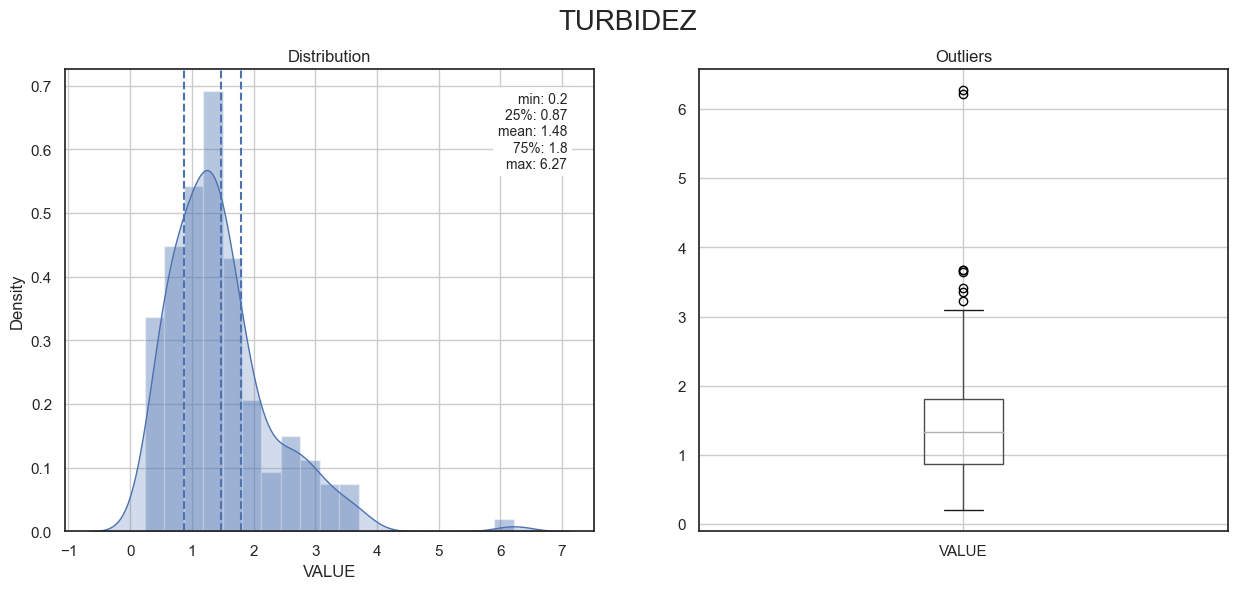

In [1315]:
# Verificando a Distribuição da Variável de Interesse
x = 'VALUE'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(variavel_interesse, fontsize=20)
### distribution
ax[0].title.set_text('Distribution')
variable = dados[x].fillna(dados[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dados[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('Outliers')
tmp_dtf = pd.DataFrame(dados[x])
#tmp_dtf[x] = np.log(dados[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

In [1316]:
# Visualizando Dados
dados

BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  BAND_6  BAND_7  BAND_8  BAND_8A  \
0     515.0   533.0   688.0   380.0   354.0   310.0   299.0   280.0    302.0   
1     502.0   481.0   654.0   349.0   304.0   228.0   212.0   213.0    203.0   
2     330.0   342.0   493.0   170.0   144.0    95.0   102.0    78.0     69.0   
3     469.0   507.0   655.0   359.0   337.0   287.0   281.0   270.0    285.0   
4     500.0   505.0   660.0   354.0   331.0   276.0   274.0   254.0    278.0   
..      ...     ...     ...     ...     ...     ...     ...     ...      ...   
167   341.0   469.0   601.0   281.0   230.0   162.0   170.0   146.0    145.0   
168   442.0   535.0   689.0   372.0   338.0   261.0   272.0   227.0    255.0   
169   299.0   395.0   529.0   212.0   162.0   104.0   106.0    86.0     72.0   
170   308.0   384.0   492.0   233.0   225.0   137.0   151.0   133.0    127.0   
171   313.0   409.0   559.0   231.0   185.0   114.0   126.0   115.0     90.0   

     BAND_9  BAND_11  BAND_12    ATSAVI  AFRI1600  AFRI2100  ALTERATION  \
0     220.0    256.0    217.0 -0.251454 -0.348336 -0.242223    1.179724   
1     180.0    216.0    173.0 -0.280085 -0.379645 -0.257840    1.248555   
2      59.0     47.0     37.0 -0.277196 -0.276735 -0.179599    1.270270   
3     211.0    218.0    226.0 -0.246825 -0.320637 -0.257951    0.964602   
4     233.0    255.0    229.0 -0.254747 -0.373132 -0.274150    1.113537   
..      ...      ...      ...       ...       ...       ...         ...   
167   102.0    105.0     84.0 -0.290867 -0.307276 -0.202971    1.250000   
168   205.0    219.0    206.0 -0.282692 -0.366329 -0.278153    1.063107   
169    59.0     58.0     46.0 -0.296976 -0.299414 -0.197198    1.260870   
170   129.0    105.0     97.0 -0.272546 -0.329261 -0.245615    1.082474   
171    68.0     52.0     39.0 -0.285328 -0.218342 -0.131002    1.333333   

           ARI     AVI      ARVI     ARVI2    BWDRVI          BRI      CCCI  \
0   -13.713704  0.0060 -0.097383 -0.357273 -0.900178  -489.775137  0.770347   
1   -17.604217  0.0011 -0.243967 -0.463132 -0.915190  -826.489059  0.727358   
2   -49.160469 -0.0052 -0.355294 -0.614032 -0.955403 -6302.624203  0.801410   
3   -14.406415  0.0063 -0.097504 -0.345548 -0.898876  -533.570923  0.780094   
4   -15.059965  0.0112 -0.102084 -0.372434 -0.904223  -592.912016  0.800274   
..         ...     ...       ...       ...       ...          ...       ...   
167 -26.839326 -0.0077 -0.280264 -0.549906 -0.939620 -1838.309984  0.706619   
168 -15.072011  0.0038 -0.165693 -0.463222 -0.918594  -663.965230  0.811584   
169 -42.824803 -0.0094 -0.429405 -0.674698 -0.957384 -4979.628300  0.724782   
170 -24.119241  0.0025 -0.258035 -0.499672 -0.933048 -1813.476781  0.940559   
171 -36.164966 -0.0095 -0.386213 -0.572254 -0.945303 -3144.779687  0.695977   

         CARI     CARI2  CHLGREEN   CIGREEN  CIREDEDGE  CHLREDEDGE       CVI  \
0    0.074601  0.060645  2.301003 -0.593023  -0.209040    1.183946  0.224784   
1    0.062978  0.052949  3.084906 -0.674312  -0.299342    1.433962  0.173800   
2    0.032510  0.031752  4.833333 -0.841785  -0.458333    1.411765  0.054557   
3    0.071305  0.057946  2.330961 -0.587786  -0.198813    1.199288  0.225931   
4    0.070202  0.057510  2.408759 -0.615152  -0.232628    1.208029  0.206419   
..        ...       ...       ...       ...        ...         ...       ...   
167  0.047899  0.042810  3.535294 -0.757072  -0.365217    1.352941  0.113582   
168  0.070889  0.058539  2.533088 -0.670537  -0.328402    1.242647  0.177881   
169  0.034188  0.032761  4.990566 -0.837429  -0.469136    1.528302  0.065151   
170  0.049384  0.041605  3.258278 -0.729675  -0.408889    1.490066  0.128020   
171  0.039307  0.036783  4.436508 -0.794275  -0.378378    1.468254  0.085013   

           CI    CRI550     CRI700     DATT1      DATT6  D678/500  D800/680  \
0   -0.402632  4.226842  -9.486861  0.740000  12.399816   -0.0153   -0.0100   
1   -0.378223  5.499501 -12.104716  0.669118  10.210446   -0.0132   -0.0136

In [1317]:
# Separando Dados de Testes/Validação (se necessário)

In [1318]:
dados.reset_index(inplace=True, drop=True)
#del(dados['index'])
dados.head(3)

BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  BAND_6  BAND_7  BAND_8  BAND_8A  \
0   515.0   533.0   688.0   380.0   354.0   310.0   299.0   280.0    302.0   
1   502.0   481.0   654.0   349.0   304.0   228.0   212.0   213.0    203.0   
2   330.0   342.0   493.0   170.0   144.0    95.0   102.0    78.0     69.0   

   BAND_9  BAND_11  BAND_12    ATSAVI  AFRI1600  AFRI2100  ALTERATION  \
0   220.0    256.0    217.0 -0.251454 -0.348336 -0.242223    1.179724   
1   180.0    216.0    173.0 -0.280085 -0.379645 -0.257840    1.248555   
2    59.0     47.0     37.0 -0.277196 -0.276735 -0.179599    1.270270   

         ARI     AVI      ARVI     ARVI2    BWDRVI          BRI      CCCI  \
0 -13.713704  0.0060 -0.097383 -0.357273 -0.900178  -489.775137  0.770347   
1 -17.604217  0.0011 -0.243967 -0.463132 -0.915190  -826.489059  0.727358   
2 -49.160469 -0.0052 -0.355294 -0.614032 -0.955403 -6302.624203  0.801410   

       CARI     CARI2  CHLGREEN   CIGREEN  CIREDEDGE  CHLREDEDGE       CVI  \
0  0.074601  0.060645  2.301003 -0.593023  -0.209040    1.183946  0.224784   
1  0.062978  0.052949  3.084906 -0.674312  -0.299342    1.433962  0.173800   
2  0.032510  0.031752  4.833333 -0.841785  -0.458333    1.411765  0.054557   

         CI    CRI550     CRI700     DATT1      DATT6  D678/500  D800/680  \
0 -0.402632  4.226842  -9.486861  0.740000  12.399816   -0.0153   -0.0100   
1 -0.378223  5.499501 -12.104716  0.669118  10.210446   -0.0132   -0.0136   
2 -1.011765  8.955790 -40.204678  0.717391   9.719405   -0.0172   -0.0092   

     GDVI   DVIMSS       EVI      EVI2    EVI2_2       EPI       FE2  \
0 -0.0408  0.01480 -0.029197 -0.022514 -0.022337  0.091080  2.585526   
1 -0.0441  0.00830 -0.039083 -0.030903 -0.030768  0.089426  2.686132   
2 -0.0415 -0.00284 -0.026954 -0.021546 -0.021934  0.061126  3.374359   

        FE3      FEOX    FERSIL      GEMI      GVMI    GOSSAN      GARI  \
0  0.552326  0.914286  0.847656  0.193099  0.508544  0.673684  0.454545   
1  0.533639  1.014085  0.800926  0.177575  0.529634  0.618911  0.539267   
2  0.344828  0.602564  0.787234  0.147135  0.639544  0.276471  0.413969   

        GLI     GNDVI    GOSAVI     GSAVI    GBNDVI    GRNDVI       HUE  \
0  0.202272 -0.421488 -0.188192 -0.104467 -0.626915 -0.584570 -0.000023   
1  0.223573 -0.508651 -0.213353 -0.114922 -0.683976 -0.649671 -0.000025   
2  0.316422 -0.726795 -0.234331 -0.114085 -0.829135 -0.789474 -0.000025   

          IVI         I      IR550      IR700  LATERITE       LCI  LWCI  \
0  -52.296772  0.005249  14.534884  28.248588  1.179724 -0.112121  -1.0   
1  -57.430536  0.004866  15.290520  32.894737  1.248555 -0.161922  -1.0   
2 -119.922167  0.003295  20.283976  69.444444  1.270270 -0.266129  -1.0   

       LOGR  MACCIONI  MCARI/MTVI2  MCARI/OSAVI     MCRIG    MCRIRE  \
0 -0.305382  0.679012     0.107754    -0.070585  0.118352 -0.265632   
1 -0.493780  0.671533     0.073452    -0.021892  0.117139 -0.257830   
2 -0.779090  0.617647     0.085199    -0.057360  0.069855 -0.313596   

          MVI      MGVI      MNSI      MSBI      MYVI    MND680      MARI  \
0   31.601562  0.400276  0.627116  0.267315 -0.191460  0.270270 -0.383984   
1   37.453704  0.398845  0.630005  0.258785 -0.193756  0.307692 -0.374970   
2  172.127660  0.407431  0.630915  0.232930 -0.197450  0.223301 -0.383452   

      MCARI    MCARI1    MCARI2     MNDVI       MSR    MSR670  MSRNIR/RED  \
0  0.003801  0.033648  0.035273  0.126761  1.740741 -0.199681   -0.199681   
1  0.002178  0.027996  0.029647  0.103627  1.888889 -0.307085   -0.307085   
2  0.003710  0.037140  0.043547  0.356522  1.575000 -0.448061   -0.448061   

      MSAVI  MSAVIHYPER     MTVI1     MTVI2       NLI     NORMG   NORMNIR  \
0 -0.018611   -0.018611  0.033648  0.035273 -0.959571  0.510386  0.207715   
1 -0.025467   -0.025467  0.027996  0.029647 -0.974334  0.537829  0.175164   
2 -0.017805   -0.017805  0.037140  0.043547 -0.992868  0.665317  0.105263   

      NORMR       PPR       PVR  ND774/677  GNDVIHYPER  ND782/

In [1319]:
# Opções de Validação/Testes (Separação)

print('DADOS DE TESTES/VALIDAÇÃO ADICIONAIS')
print('------------------------------------------------------------------')
print('Quer separar dados adicionais para Testes/Validação?')
print('Digite 1 para SIM: PROSSEGUIR SEM SEPARAR DADOS ADICIONAIS')
print('Digita 2 para: Separar Dados de Testes/Validação Adicionais pelo PERCENTUAL')
print('Digita 3 para: Separar Dados de Testes/Validação Adicionais pelo QUANTIDADE')

usar_dados_testes_adicionais = int(input())

print('------------------------------------------------------------------')

if usar_dados_testes_adicionais == 2:
    print('Defina o valor: ')
    print('Digite o Percentual para Quanticação dos Dados Adicionais de Testes/Validação (Valor Decimal: 0.1, 0.2, etc.): ')
    percentual_dados_testes_adicionais = float(input())

elif usar_dados_testes_adicionais == 3:
    print('Defina o valor: ')
    print('Digite o Quantitativo de Dados Adicionais de Testes/Validação (Valor Inteiro: 10, 50, etc.): ')
    quantidade_dados_testes_adicionais = int(input())
    
else:
    print('Dados de Testes/Validação Adicionais não aplicáveis!')

DADOS DE TESTES/VALIDAÇÃO ADICIONAIS
------------------------------------------------------------------
Quer separar dados adicionais para Testes/Validação?
Digite 1 para SIM: PROSSEGUIR SEM SEPARAR DADOS ADICIONAIS
Digita 2 para: Separar Dados de Testes/Validação Adicionais pelo PERCENTUAL
Digita 3 para: Separar Dados de Testes/Validação Adicionais pelo QUANTIDADE
1
------------------------------------------------------------------
Dados de Testes/Validação Adicionais não aplicáveis!


In [1320]:
# Definindo Quantidade Amostral
if usar_dados_testes_adicionais == 2:
    n_amostras_validacao = int(len(dados) * percentual_dados_testes_adicionais)
    n_amostras_validacao
    print(f'*Quantidade de Dados de Testes/Validação Adicionais : {n_amostras_validacao}')

elif usar_dados_testes_adicionais == 3:
    n_amostras_validacao = quantidade_dados_testes_adicionais
    n_amostras_validacao
    print(f'*Quantidade de Dados de Testes/Validação Adicionais : {n_amostras_validacao}') 

In [1321]:
# Definindo Pasta para Salvar Arquivos

#pasta_validacao = 'Modelos_Gerados_Regressao/'+ str(variavel_utilizada) + '/' + dominio_interesse + '/'

dominio_interesse = dominio

pasta_validacao = 'Modelos_Gerados_Regressao/'+ str(variavel_utilizada) + '/' + dominio_interesse + '/' + dia_hora + '/'

#variavel_utilizada, dominio_interesse
variavel_utilizada, dominio_interesse, dia_hora

('Turbidity', 'Tres_Marias_SIMOA', '11_09_2024_17_41')

In [1322]:
dominio

'Tres_Marias_SIMOA'

In [1323]:
if usar_dados_testes_adicionais != 1:
    if not os.path.exists(pasta_validacao):
        os.makedirs(pasta_validacao)
    print(pasta_validacao)
    print('pasta criada')
else:
    print(pasta_validacao)
    print('Não criada')

Modelos_Gerados_Regressao/Turbidity/Tres_Marias_SIMOA/11_09_2024_17_41/
Não criada


In [1324]:
# Separando Dados de Validacao
if usar_dados_testes_adicionais in (2,3):
    dados_validacao = dados.sample(n=n_amostras_validacao, random_state = random_fixo)
    index_dados_validacao = list(dados.sample(n=n_amostras_validacao, random_state = random_fixo).index)
    
    dados.drop(index_dados_validacao, inplace=True)
    dados.reset_index(inplace=True, drop=True)
    dados_validacao.reset_index(inplace=True, drop=True)
    
    # Gravando Dados de Validação Tratados para uso futuro (se necessário)
    nome_dados_validacao = str(pasta_validacao + 'Dados_Validacao_Tratados_' + dominio + '.csv')
    dados_validacao.to_csv(nome_dados_validacao, index=False)

In [1325]:
# Verificando Duplicações de Registros Novamente - APENAS VALOR DA VARIÁVEL DE INTERESSE

if len(dados[dados['VALUE'].duplicated()]) > 0:
    pymsgbox.alert('Há Dados Duplicados, verifique', 'Dados Duplicados')

print(f'Quantidade de Dados Duplicados: {len(dados[dados["VALUE"].duplicated()])}')
#print(f'Quantidade de Dados Duplicados: {len(dados[dados[lista_multiplicar_bandas].duplicated()])}')

print(f'*Quantidade de Dados Disponíveis Antes da Remoção de Dados Duplicados (Caso Ocorram) : {dados.shape[0]}')
print('-------------------------------------------------------------------------------------------------------')

if len(dados[dados['VALUE'].duplicated()]) > 0:
    print('Deseja Remover Dados Duplicados?')
    print('---------------------------------')
    print('1- Sim')
    print('2- Não')
    print('---------------------------------')
    codigo_remover_dados = int(input())
    if codigo_remover_dados == 1:
        #dados_filtrado[lista_multiplicar_bandas].drop_duplicates(inplace=True)
        dados.drop(dados[dados['VALUE'].duplicated() > 0].index, inplace = True)
    else:
        print('Dados Duplicados Não Foram Removidos')

print(f'*Quantidade de Dados Disponíveis Após Remoção de Dados Duplicados: {dados.shape[0]}')

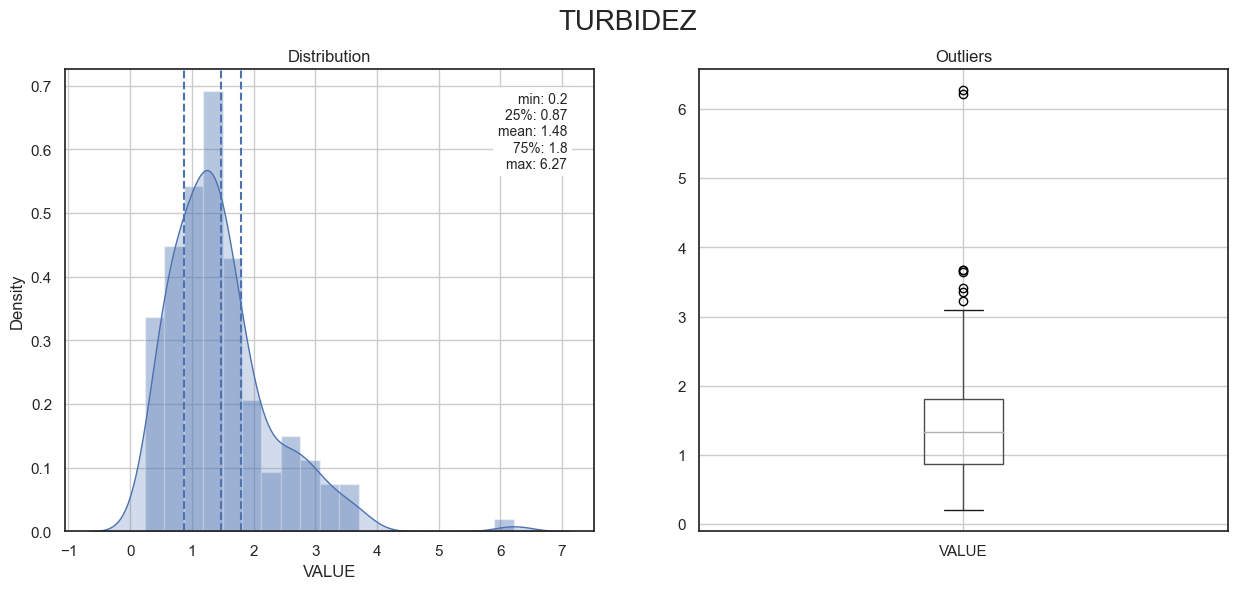

In [1326]:
# Verificando a Distribuição da Variável de Interesse
x = 'VALUE'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(variavel_interesse, fontsize=20)
### distribution
ax[0].title.set_text('Distribution')
variable = dados[x].fillna(dados[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dados[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('Outliers')
tmp_dtf = pd.DataFrame(dados[x])
#tmp_dtf[x] = np.log(dados[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

if usar_dados_testes_adicionais in(2, 3):
    if len(dados_validacao[dados_validacao['VALUE'].duplicated()]) > 0:
        pymsgbox.alert('Há Dados Duplicados, verifique', 'Dados Duplicados')

try:
    dados_validacao[dados_validacao['VALUE'].duplicated()]
except:
    pass

In [1327]:
dados.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 175 columns):
 #    Column       Non-Null Count  Dtype  
---   ------       --------------  -----  
 0    BAND_1       172 non-null    float64
 1    BAND_2       172 non-null    float64
 2    BAND_3       172 non-null    float64
 3    BAND_4       172 non-null    float64
 4    BAND_5       172 non-null    float64
 5    BAND_6       172 non-null    float64
 6    BAND_7       172 non-null    float64
 7    BAND_8       172 non-null    float64
 8    BAND_8A      172 non-null    float64
 9    BAND_9       172 non-null    float64
 10   BAND_11      172 non-null    float64
 11   BAND_12      172 non-null    float64
 12   ATSAVI       172 non-null    float64
 13   AFRI1600     172 non-null    float64
 14   AFRI2100     172 non-null    float64
 15   ALTERATION   172 non-null    float64
 16   ARI          172 non-null    float64
 17   AVI          172 non-null    float64
 18   ARVI         172 non-null   

In [1328]:
# Função Linear - Aplicação da OLS - Verificação Inicial

In [1329]:
# Montando Função Linear - Parte 1

try:

    string_funcao_linear_part1 = ''

    for x in bandas:
        string_funcao_linear_part1 += '+' + x

    #print(string_funcao_linear_part1)

    string_funcao_linear_part1 = string_funcao_linear_part1[1:len(string_funcao_linear_part1)]

    #print(string_funcao_linear_part1)

    #############################################

    # Montando Função Linear - Parte 2

    string_funcao_linear_part2 = 'VALUE ~ ' + string_funcao_linear_part1
    print('Função Linear: ',string_funcao_linear_part2)


    ####################################

    # Regressão Linear - Função OLS

    print('------------------------------------------------------------------------------')
    print('--------------------------------Resultados------------------------------------')
    #print(f'*Valor Limite do parâmetro: {valor_limite} / *Diferença de Data: {diferenca_dias}')
    print('------------------------------------------------------------------------------')

    funcao_linear_simples = sm.ols(formula=string_funcao_linear_part2, data=dados).fit()
    print(funcao_linear_simples.summary())


    # Pegando os parâmetros da Função Linear OLS
    funcao_linear_simples.params, funcao_linear_simples.params[0]


    # Pegando os valores dos parâmetros
    var = funcao_linear_simples.params
    #var[1]
    #var


    # Separando variáveis dependentes e independentes
    X1 = dados[bandas]
    y1 = dados['VALUE']


    # Valor original da variável idependente
    y_teste_ols_verdadeiro1 = y1.values
    #y_teste_ols_verdadeiro1


    # Regressão Linear
    print('------------------------------------------------------------------------------')
    print('--------------------------------Resultados------------------------------------')
    print('Função Linear - OLS-----------------------------------------------------------')
    print('-------- Todas as bandas ------------------')
    metricas(y_teste_ols_verdadeiro1, funcao_linear_simples.predict(X1))


    del(y_teste_ols_verdadeiro1, X1, y1)

except:
    pass

Função Linear:  VALUE ~ BAND_1+BAND_2+BAND_3+BAND_4+BAND_5+BAND_6+BAND_7+BAND_8+BAND_8A+BAND_9+BAND_11+BAND_12+ATSAVI+AFRI1600+AFRI2100+ALTERATION+ARI+AVI+ARVI+ARVI2+BWDRVI+BRI+CCCI+CARI+CARI2+CHLGREEN+CIGREEN+CIREDEDGE+CHLREDEDGE+CVI+CI+CRI550+CRI700+DATT1+DATT6+D678/500+D800/680+GDVI+DVIMSS+EVI+EVI2+EVI2_2+EPI+FE2+FE3+FEOX+FERSIL+GEMI+GVMI+GOSSAN+GARI+GLI+GNDVI+GOSAVI+GSAVI+GBNDVI+GRNDVI+HUE+IVI+I+IR550+IR700+LATERITE+LCI+LWCI+LOGR+MACCIONI+MCARI/MTVI2+MCARI/OSAVI+MCRIG+MCRIRE+MVI+MGVI+MNSI+MSBI+MYVI+MND680+MARI+MCARI+MCARI1+MCARI2+MNDVI+MSR+MSR670+MSRNIR/RED+MSAVI+MSAVIHYPER+MTVI1+MTVI2+NLI+NORMG+NORMNIR+NORMR+PPR+PVR+ND774/677+GNDVIHYPER+ND782/666+ND800/2170+PSNDC2+GNDVIHYPER2+PSNDB1+NDII+SIWSI+NGRGDI+NDVI+BNDVI+NDVI2+NDRE+RI+NDSI+NDVIC+OSAVI+PNDVI+PVI+RARSA1+RARSA2+RARSA3+RARSA4+RDVI+RDVI2+REDEDGE1+REDEDGE2+RBNDVI+RSR+RRE+SAVIMIR+IF+MSI+SR440/740+BGI+SR520/670+SR520/670_1+SR550/800+SR672/708+SR700+SR735/710+SR774/677+SR800/2170+SR833/658+SR860/550+SR860/708+SRSWIRI/NIR+SAVI+SARVI+

# Seleção e Identificação de Variáveis de Entrada Mais Importantes - Métodos

In [1330]:
# Limitar Quantidade de Variáveis de Entrada

In [1331]:
#type(bandas)
lista_bandas = list(bandas)
type(lista_bandas), len(lista_bandas)

(list, 174)

In [1332]:
print('Limitação de Quantidade Máxima de Variáveis de Entrada:')
print('-------------------------------------------------------------------------------------------------------')

print('Deseja Remover Limitar a Quantidade de Variáveis de Entrada?')
print('---------------------------------')
print('Informe a Quantidade Limite (Número Inteiro > 0, Recomendado: 12): ')
print('Digite -1 para Não Limitar Quantidade de Variáveis: ')
print('---------------------------------')

limite_variaveis_entrada = int(input())

if limite_variaveis_entrada >0:
    print(f'*Limite de Variáveis de Entrada Permitido nos Modelos de Seleção de Features: {limite_variaveis_entrada}')
elif limite_variaveis_entrada == 0:
    limite_variaveis_entrada = 12
    print(f'*Limite de Variáveis de Entrada Permitido nos Modelos de Seleção de Features: {limite_variaveis_entrada}')
else:
    print('Não foi Aplicado Limite de Variáveis de Entrada')
    limite_variaveis_entrada = 100000

Limitação de Quantidade Máxima de Variáveis de Entrada:
-------------------------------------------------------------------------------------------------------
Deseja Remover Limitar a Quantidade de Variáveis de Entrada?
---------------------------------
Informe a Quantidade Limite (Número Inteiro > 0, Recomendado: 12): 
Digite -1 para Não Limitar Quantidade de Variáveis: 
---------------------------------
0
*Limite de Variáveis de Entrada Permitido nos Modelos de Seleção de Features: 12


In [1333]:
dados

BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  BAND_6  BAND_7  BAND_8  BAND_8A  \
0     515.0   533.0   688.0   380.0   354.0   310.0   299.0   280.0    302.0   
1     502.0   481.0   654.0   349.0   304.0   228.0   212.0   213.0    203.0   
2     330.0   342.0   493.0   170.0   144.0    95.0   102.0    78.0     69.0   
3     469.0   507.0   655.0   359.0   337.0   287.0   281.0   270.0    285.0   
4     500.0   505.0   660.0   354.0   331.0   276.0   274.0   254.0    278.0   
..      ...     ...     ...     ...     ...     ...     ...     ...      ...   
167   341.0   469.0   601.0   281.0   230.0   162.0   170.0   146.0    145.0   
168   442.0   535.0   689.0   372.0   338.0   261.0   272.0   227.0    255.0   
169   299.0   395.0   529.0   212.0   162.0   104.0   106.0    86.0     72.0   
170   308.0   384.0   492.0   233.0   225.0   137.0   151.0   133.0    127.0   
171   313.0   409.0   559.0   231.0   185.0   114.0   126.0   115.0     90.0   

     BAND_9  BAND_11  BAND_12    ATSAVI  AFRI1600  AFRI2100  ALTERATION  \
0     220.0    256.0    217.0 -0.251454 -0.348336 -0.242223    1.179724   
1     180.0    216.0    173.0 -0.280085 -0.379645 -0.257840    1.248555   
2      59.0     47.0     37.0 -0.277196 -0.276735 -0.179599    1.270270   
3     211.0    218.0    226.0 -0.246825 -0.320637 -0.257951    0.964602   
4     233.0    255.0    229.0 -0.254747 -0.373132 -0.274150    1.113537   
..      ...      ...      ...       ...       ...       ...         ...   
167   102.0    105.0     84.0 -0.290867 -0.307276 -0.202971    1.250000   
168   205.0    219.0    206.0 -0.282692 -0.366329 -0.278153    1.063107   
169    59.0     58.0     46.0 -0.296976 -0.299414 -0.197198    1.260870   
170   129.0    105.0     97.0 -0.272546 -0.329261 -0.245615    1.082474   
171    68.0     52.0     39.0 -0.285328 -0.218342 -0.131002    1.333333   

           ARI     AVI      ARVI     ARVI2    BWDRVI          BRI      CCCI  \
0   -13.713704  0.0060 -0.097383 -0.357273 -0.900178  -489.775137  0.770347   
1   -17.604217  0.0011 -0.243967 -0.463132 -0.915190  -826.489059  0.727358   
2   -49.160469 -0.0052 -0.355294 -0.614032 -0.955403 -6302.624203  0.801410   
3   -14.406415  0.0063 -0.097504 -0.345548 -0.898876  -533.570923  0.780094   
4   -15.059965  0.0112 -0.102084 -0.372434 -0.904223  -592.912016  0.800274   
..         ...     ...       ...       ...       ...          ...       ...   
167 -26.839326 -0.0077 -0.280264 -0.549906 -0.939620 -1838.309984  0.706619   
168 -15.072011  0.0038 -0.165693 -0.463222 -0.918594  -663.965230  0.811584   
169 -42.824803 -0.0094 -0.429405 -0.674698 -0.957384 -4979.628300  0.724782   
170 -24.119241  0.0025 -0.258035 -0.499672 -0.933048 -1813.476781  0.940559   
171 -36.164966 -0.0095 -0.386213 -0.572254 -0.945303 -3144.779687  0.695977   

         CARI     CARI2  CHLGREEN   CIGREEN  CIREDEDGE  CHLREDEDGE       CVI  \
0    0.074601  0.060645  2.301003 -0.593023  -0.209040    1.183946  0.224784   
1    0.062978  0.052949  3.084906 -0.674312  -0.299342    1.433962  0.173800   
2    0.032510  0.031752  4.833333 -0.841785  -0.458333    1.411765  0.054557   
3    0.071305  0.057946  2.330961 -0.587786  -0.198813    1.199288  0.225931   
4    0.070202  0.057510  2.408759 -0.615152  -0.232628    1.208029  0.206419   
..        ...       ...       ...       ...        ...         ...       ...   
167  0.047899  0.042810  3.535294 -0.757072  -0.365217    1.352941  0.113582   
168  0.070889  0.058539  2.533088 -0.670537  -0.328402    1.242647  0.177881   
169  0.034188  0.032761  4.990566 -0.837429  -0.469136    1.528302  0.065151   
170  0.049384  0.041605  3.258278 -0.729675  -0.408889    1.490066  0.128020   
171  0.039307  0.036783  4.436508 -0.794275  -0.378378    1.468254  0.085013   

           CI    CRI550     CRI700     DATT1      DATT6  D678/500  D800/680  \
0   -0.402632  4.226842  -9.486861  0.740000  12.399816   -0.0153   -0.0100   
1   -0.378223  5.499501 -12.104716  0.669118  10.210446   -0.0132   -0.0136

In [1334]:
# Correlação - Valores

In [1335]:
# r < 0.25	No relationship
#  0.25 < r < 0.5	Weak relationship
# 0.5 < r < 0.75	Moderate relationship
# r > 0.75	Strong relationship

In [1336]:
# Pearson Correlation
#plt.figure(figsize=(12,10))
cor = dados.corr()
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

In [1337]:
# Correlation with output variable
cor_target = abs(cor["VALUE"])

#Selecting highly correlated features
#relevant_features = cor_target[cor_target>0.50]

#pegando alta correlação
relevant_features_high = cor_target[cor_target >= 0.50]

#pegando baixa correlação
#relevant_features_low = cor_target[cor_target <= 0.25]

#relevant_features_high, relevant_features_low

# Guardando as bandas mais importantes - Correlacionadas com a Variável Y

relevant_features_output = list(relevant_features_high.index[np.where(relevant_features_high.index != 'VALUE')])
type(relevant_features_output), len(relevant_features_output)

(list, 40)

In [1338]:
# Create correlation matrix
corr_matrix = dados.corr().abs()

# Select upper triangle of correlation matrix
np.bool = np.bool_

upper = dados.where(np.triu(np.ones(dados.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation lower than 0.25
relevant_inter_features = []
relevant_inter_features = [column for column in upper.columns if any(upper[column] <= 0.25)]

type(relevant_inter_features), len(relevant_inter_features)

(list, 115)

In [1339]:
# Gravando bandas importantes: Baixa intercorrelação entre variáveis e alta correlação com variável alvo

bandas_importantes_correlacao_y = []

for i in relevant_inter_features:
    if i in relevant_features_output:
        bandas_importantes_correlacao_y.append(i)

if (len(bandas_importantes_correlacao_y)) > limite_variaveis_entrada:
    bandas_importantes_correlacao_y = bandas_importantes_correlacao_y[0:(limite_variaveis_entrada)]

type(bandas_importantes_correlacao_y), bandas_importantes_correlacao_y     

(list,
 ['ATSAVI',
  'CARI',
  'CARI2',
  'D800/680',
  'GDVI',
  'EVI',
  'EVI2',
  'EVI2_2',
  'EPI',
  'GSAVI',
  'IVI',
  'I'])

In [1340]:
del(cor, cor_target, relevant_features_high, relevant_features_output, corr_matrix, upper, relevant_inter_features)

In [1341]:
# Multicolinearidade

In [1342]:
# Variance Inflation Factor(VIF)

# Interpreting VIF Values The valid value for VIF ranges from 1 to infinity. A rule of thumb for interpreting VIF values is:
# 1 — features are not correlated
# 1<VIF<5 — features are moderately correlated
# VIF>5 — features are highly correlated VIF>10 — high correlation between features and is cause for concern

In [1343]:
X_multicol = dados[bandas]

In [1344]:
# Ignorar Erros de Divisão
np.seterr(divide='warn')
#np.seterr(divide='raise')  

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [1345]:
# VIF dataframe

vif_data = pd.DataFrame()
vif_data["feature"] = X_multicol.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_multicol.values, i, )
                   for i in range(len(X_multicol.columns))]

vif_data.replace([np.inf, -np.inf], np.nan, inplace=True)

print(vif_data)

    feature           VIF
0    BAND_1  8.286046e+03
1    BAND_2  1.503706e+12
2    BAND_3  2.797215e+10
3    BAND_4  3.849395e+11
4    BAND_5  2.729454e+13
..      ...           ...
169     BSI  1.169995e+05
170    NDCI  1.585775e+12
171    NDTI  4.679308e+11
172     MCI  3.262532e+11
173     MPH  1.882382e+12

[174 rows x 2 columns]


In [1346]:
# Baixa Colinearidade

In [1347]:
vif_data[(vif_data["VIF"]<5)].sort_values(by='VIF')

feature       VIF
64    LWCI  0.000000
82     MSR  3.853808

In [1348]:
# Seleção por desvio padrão
# bandas_importantes_colinearidade = list(vif_data[(vif_data['VIF']<=std_vif)]['feature'])

bandas_importantes_colinearidade = []

# Seleção por valor do VIF (alto)
#bandas_importantes_colinearidade = list(vif_data[(vif_data['VIF']<= 5)]['feature'])
bandas_importantes_colinearidade = list(vif_data[(vif_data['VIF']<= 5)].sort_values(by='VIF')['feature'])

if (len(bandas_importantes_colinearidade)) > limite_variaveis_entrada:
    bandas_importantes_colinearidade = bandas_importantes_colinearidade[0:(limite_variaveis_entrada)]

type(bandas_importantes_colinearidade), bandas_importantes_colinearidade, len(bandas_importantes_colinearidade)

(list, ['LWCI', 'MSR'], 2)

In [1349]:
del(X_multicol, vif_data)

In [1350]:
# Variância - Low Variance Filter

In [1351]:
# VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.
# #As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by

In [1352]:
X_variancia = dados[bandas]

In [1353]:
# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

if sel.threshold > 0.16:
    
    # Fit the selector to normalized head_df
    #sel.fit(X_variancia / X_variancia.mean())
    sel.fit_transform(X_variancia)

    # Create a boolean mask
    mask = sel.get_support()

    # Apply the mask to create a reduced dataframe
    reduced_df = X_variancia.loc[:, mask]

    print("Dimensionality reduced from {} to {}".format(X_variancia.shape[1], reduced_df.shape[1]))
    bandas_importantes_variancia = list(reduced_df.columns)
    type(bandas_importantes_variancia), len(bandas_importantes_variancia)


else:
    bandas_importantes_variancia = []
    

if (len(bandas_importantes_variancia)) > limite_variaveis_entrada:
    bandas_importantes_variancia = bandas_importantes_variancia[0:(limite_variaveis_entrada)]
    
    
type(bandas_importantes_variancia), bandas_importantes_variancia, len(bandas_importantes_variancia)

(list, [], 0)

In [1354]:
del(X_variancia, sel)

In [1355]:
# Feature selection using the Mutual Information metric

In [1356]:
X_mutual = dados[bandas]
#X_mutual = dados[lista_bandas]
y_mutual = dados['VALUE']

In [1357]:
# Split train test
X_train_mutual, X_test_mutual, y_train_mutual, y_test_mutual = train_test_split(X_mutual, y_mutual, test_size=percentual_dados_teste, random_state=random_fixo)

In [1358]:
X_train_mutual = sc.fit_transform(X_train_mutual)
X_test_mutual = sc.transform(X_test_mutual)

In [1359]:
select = SelectKBest(score_func=f_regression)
select.fit_transform(X_train_mutual, y_train_mutual)

filtro = select.get_support()

In [1360]:
filtro

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [1361]:
len(lista_bandas), len(filtro), len(bandas), X_train_mutual.shape, X_mutual.shape

(174, 174, 174, (120, 174), (172, 174))

In [1362]:
bandas_importantes_mutual = []

for i in range(len(filtro)):
    if filtro[i] == True:
        nome_banda = lista_bandas[i]
        bandas_importantes_mutual.append(nome_banda)
        #print(nome_banda)

if (len(bandas_importantes_mutual)) > limite_variaveis_entrada:
    bandas_importantes_mutual = bandas_importantes_mutual[0:(limite_variaveis_entrada)]

bandas_importantes_mutual, len(bandas_importantes_mutual)

(['D800/680',
  'EVI',
  'EVI2',
  'EVI2_2',
  'MSAVI',
  'MSAVIHYPER',
  'SAVI',
  'SARVI2',
  'SAVI3',
  'GVIMSS'],
 10)

In [1363]:
del(X_train_mutual, X_test_mutual, y_train_mutual, y_test_mutual, X_mutual, y_mutual, select, filtro)

In [1364]:
# OLS - Feature Importance

In [1365]:
#Adding constant column of ones, mandatory for sm.OLS model

X_ols_import = dados[bandas]

# testando
#X_ols_import = sc.fit_transform(dados[bandas])

y_ols_import = dados['VALUE']

X_1 = sm1.add_constant(X_ols_import)

#Fitting sm.OLS model
model_ols_import = sm1.OLS(y_ols_import,X_1).fit()

p_values_ols = model_ols_import.pvalues

p_values_ols

BAND_1    0.274768
BAND_2    0.109572
BAND_3    0.232805
BAND_4    0.414311
BAND_5    0.067525
            ...   
BSI       0.743181
NDCI      0.883094
NDTI      0.172810
MCI       0.166021
MPH       0.171378
Length: 174, dtype: float64

In [1366]:
#p_values_ols.index[np.where(p_values_ols < pvalue_limite)]

In [1367]:
#p_values_ols.index[np.where(p_values_ols.index != 'const')]

In [1368]:
bandas_importantes_linear = list(p_values_ols.index[np.where(p_values_ols < pvalue_limite)]) + list(p_values_ols.index[np.where(p_values_ols.index != 'const')])
len(bandas_importantes_linear)

174

In [1369]:
bandas_importantes_linear = list(set(bandas_importantes_linear))
len(bandas_importantes_linear)

174

In [1370]:
def remove_const_from_list(input_list):
    return [item for item in input_list if item != 'const']
bandas_importantes_linear = remove_const_from_list(bandas_importantes_linear)

In [1371]:
# Guardando as bandas mais importantes - Linear
# Nível de signficância: p < 0,05 ou p <0,01

#bandas_importantes_linear = list(p_values_ols.index[np.where(p_values_ols < pvalue_limite)] & p_values_ols.index[np.where(p_values_ols.index != 'const')])

if (len(bandas_importantes_linear)) > limite_variaveis_entrada:
    bandas_importantes_linear = bandas_importantes_linear[0:(limite_variaveis_entrada)]

type(bandas_importantes_linear), bandas_importantes_linear, len(bandas_importantes_linear)

(list,
 ['CVI',
  'SR860/708',
  'CIGREEN',
  'SR774/677',
  'MCRIG',
  'MNSI',
  'LATERITE',
  'SR735/710',
  'PVR',
  'GLI',
  'WDVI',
  'RRE'],
 12)

In [1372]:
del(X_ols_import, y_ols_import, X_1, model_ols_import, p_values_ols)

In [1373]:
# Lasso

In [1374]:
reg = LassoCV()

X_lasso_import = dados[bandas]

y_lasso_import = dados['VALUE']

reg.fit(X_lasso_import, y_lasso_import)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_lasso_import,y_lasso_import))
coef = pd.Series(reg.coef_, index = X_lasso_import.columns)

Best alpha using built-in LassoCV: 4.650612
Best score using built-in LassoCV: 0.514323


In [1375]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 4 variables and eliminated the other 170 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

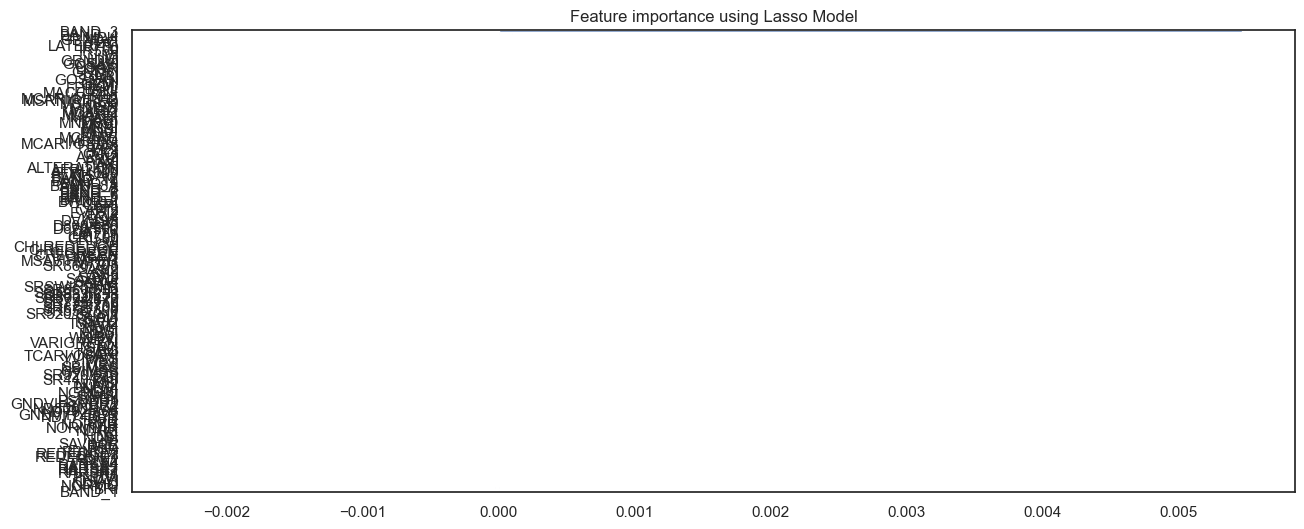

In [1376]:
imp_coef = coef.sort_values()
#matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [1377]:
# Guardando as bandas mais importantes - Linear

bandas_importantes_lasso = list(coef.index[np.where(coef != 0)])# & p_values_ols.index[np.where(p_values_ols.index != 'const')])
type(bandas_importantes_lasso), bandas_importantes_lasso

if (len(bandas_importantes_lasso)) > limite_variaveis_entrada:
    bandas_importantes_lasso = bandas_importantes_lasso[0:(limite_variaveis_entrada)]

type(bandas_importantes_lasso), bandas_importantes_lasso, len(bandas_importantes_lasso)

(list, ['BAND_1', 'BAND_3', 'BAND_4', 'BRI'], 4)

In [1378]:
del(X_lasso_import , y_lasso_import, reg, coef, imp_coef)

In [1379]:
# XGBoost

In [1380]:
bandas_importantes_xgbr = []

X_xgb_import = dados[lista_bandas]

X_xgb_import = sc.fit_transform(X_xgb_import)

y_xgb_import = dados['VALUE']

model_xgb_import = XGBRegressor(n_jobs=-1)

# fit the model
model_xgb_import.fit(X_xgb_import, y_xgb_import)

# get importance
importance = model_xgb_import.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
    
    if importance[i] > importancia_referencia:
        nome_banda = lista_bandas[i]
        
        bandas_importantes_xgbr.append(nome_banda)

    
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
#plt.show()

if (len(bandas_importantes_xgbr)) > limite_variaveis_entrada:
    bandas_importantes_xgbr = bandas_importantes_xgbr[0:(limite_variaveis_entrada)]  

type(bandas_importantes_xgbr), bandas_importantes_xgbr, len(bandas_importantes_xgbr)

(list, ['EVI', 'EVI2', 'MGVI', 'OSAVI'], 4)

In [1381]:
del(X_xgb_import, y_xgb_import, model_xgb_import, importance)

In [1382]:
importancia_referencia

0.05

In [1383]:
# Knn Regressor - Permutation Feature

In [1384]:
# permutation feature importance with knn for regression

bandas_importantes_knn = []

X_knn_import = dados[lista_bandas]

X_knn_import = sc.fit_transform(X_knn_import)

y_knn_import = dados['VALUE']

model_knn_import = KNeighborsRegressor(n_jobs=-1)

model_knn_import.fit(X_knn_import, y_knn_import)

results = permutation_importance(model_knn_import, X_knn_import, y_knn_import,n_repeats=1)

importance = results.importances_mean

for i,v in enumerate(importance):
   # print('Feature: %0d, Score: %.5f' % (i,v))
    
    if importance[i] > importancia_referencia:
        nome_banda = lista_bandas[i]
        
        bandas_importantes_knn.append(nome_banda)
    
    
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
#plt.show()

if (len(bandas_importantes_knn)) > limite_variaveis_entrada:
    bandas_importantes_knn = bandas_importantes_knn[0:(limite_variaveis_entrada)]  

type(bandas_importantes_knn), bandas_importantes_knn, len(bandas_importantes_knn)

(list, [], 0)

In [1385]:
del(X_knn_import, y_knn_import, model_knn_import, results, importance)

In [1386]:
# StepWise

In [1387]:
# Feature Selection using Wrapper
# Bi-directional elimination(Step-wise Selection)

In [1388]:
X_step = dados[bandas]

#X_step = sc.fit_transform(X_step)

y_step = dados['VALUE']

In [1389]:
# Bi-directional Selection(sffs)
#if dados.shape[0] < 10: #quantidade_limite_dados_selecao_bandas:
if dados.shape[0] < 10000000000000000: #quantidade_limite_dados_selecao_bandas:
    sffs = SFS(#LinearRegression(),
             ElasticNetCV(n_jobs=-1, selection='random'),
             #ExtraTreesRegressor(),
             #k_features=(3,X_step.shape[1]),
             k_features=(3,9),
             forward=True,
             #floating=True,scoring = 'r2', cv=5)
             floating=True,scoring = 'r2', cv=None,#),
             n_jobs = -1)
    sffs.fit(X_step, y_step)
    sffs.k_feature_names_

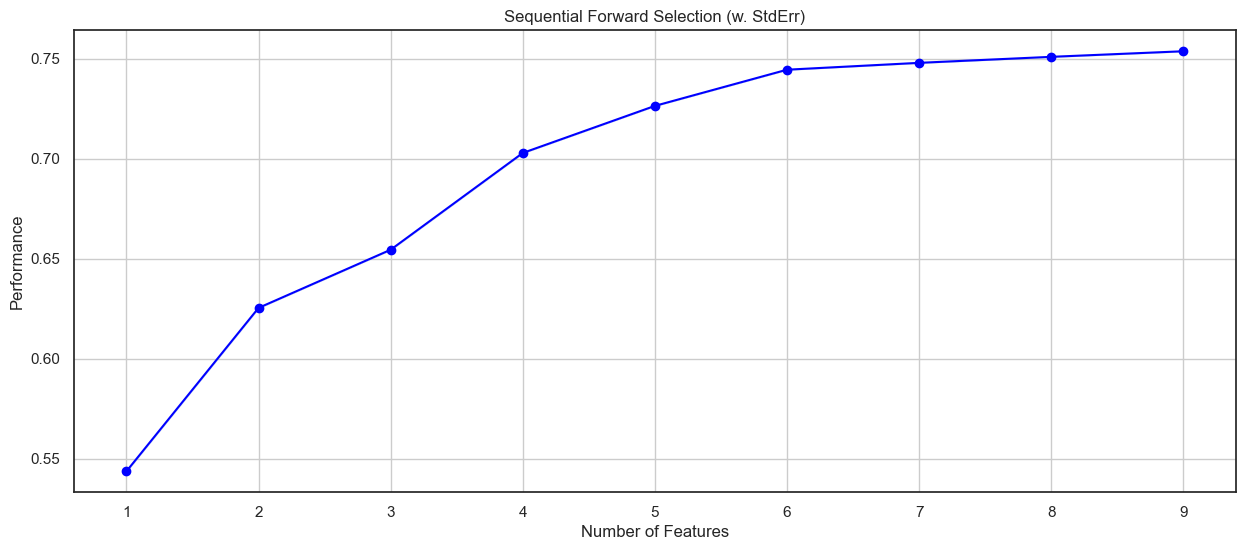

In [1390]:
#if dados.shape[0] < 10: #quantidade_limite_dados_selecao_bandas:
if dados.shape[0] < 10000000000000000: #quantidade_limite_dados_selecao_bandas:
    fig1 = plot_sfs(sffs.get_metric_dict(), kind='std_dev')
    plt.title('Sequential Forward Selection (w. StdErr)')
    plt.grid()
    plt.show()

In [1391]:
#if dados.shape[0] < 10: #quantidade_limite_dados_selecao_bandas:
if dados.shape[0] < 10000000000000000: #quantidade_limite_dados_selecao_bandas:
    bandas_stepwise = list(sffs.k_feature_names_)

else:
    bandas_stepwise = []

if (len(bandas_stepwise)) > limite_variaveis_entrada:
    bandas_stepwise = bandas_stepwise[0:(limite_variaveis_entrada)]
    
type(bandas_stepwise), bandas_stepwise, len(bandas_stepwise)

(list,
 ['AVI',
  'BWDRVI',
  'CCCI',
  'EVI',
  'MCARI/MTVI2',
  'MCARI/OSAVI',
  'NDVIC',
  'REDEDGE1',
  'SARVI2'],
 9)

In [1392]:
# Sequential Forward Floating Selection(sffs)
sffs_foward = SFS(#LinearRegression(),
         ExtraTreesRegressor(n_jobs=-1),
         #ElasticNetCV(),
         #k_features=(3,X_step.shape[1]),
         k_features=(3,9),
         forward=True,
         #scoring = 'r2', cv=5)
         scoring = 'r2', cv=None,
         n_jobs = -1)
sffs_foward.fit(X_step, y_step)
#sffs_foward.k_feature_names_

SequentialFeatureSelector(cv=None, estimator=ExtraTreesRegressor(n_jobs=-1),
                          k_features=(3, 9), n_jobs=-1, scoring='r2')

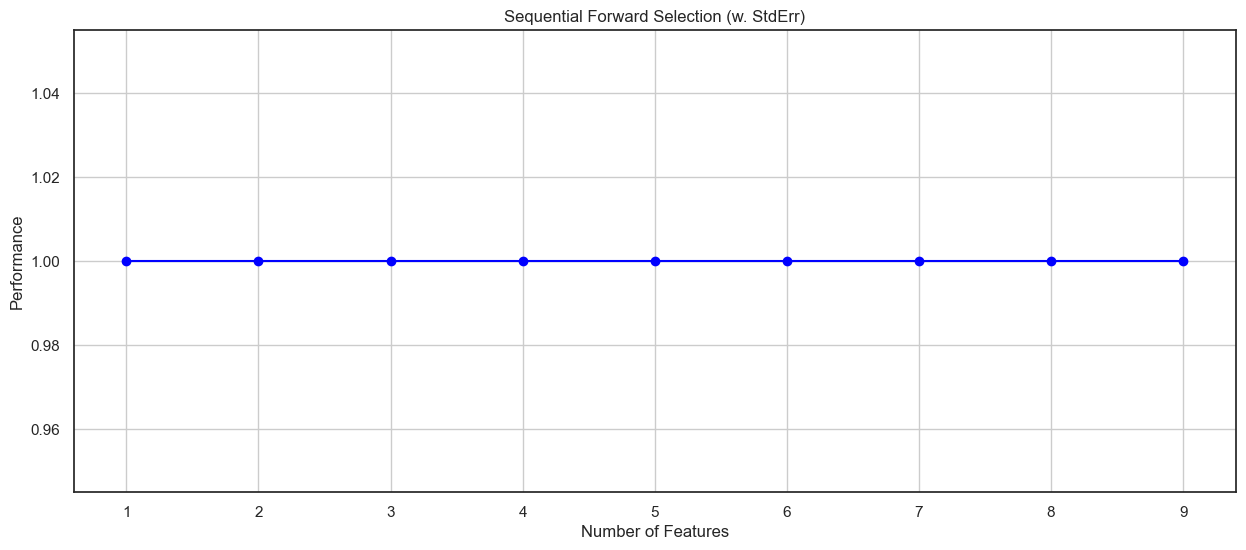

In [1393]:
fig1 = plot_sfs(sffs_foward.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [1394]:
bandas_stepwise_forward = list(sffs_foward.k_feature_names_)

if (len(bandas_stepwise_forward)) > limite_variaveis_entrada:
    bandas_stepwise_forward = bandas_stepwise_forward[0:(limite_variaveis_entrada)]

bandas_stepwise_forward, len(bandas_stepwise_forward)

(['BAND_1', 'BAND_2', 'ARVI'], 3)

In [1395]:
#bandas_stepwise_forward = []

In [1396]:
# Sequential Backaward Floating Selection(sffs)
sffs_back = SFS(#LinearRegression(),
         #ElasticNetCV(),
         KNeighborsRegressor(n_jobs=-1),   
         #k_features=(3,X_step.shape[1]),
         k_features=(3,9),     
         forward=False,
         #scoring = 'r2', cv=5)
         scoring = 'r2', cv=None,
         n_jobs = -1)
sffs_back.fit(X_step, y_step)
#sffs_back.k_feature_names_

SequentialFeatureSelector(cv=None, estimator=KNeighborsRegressor(n_jobs=-1),
                          forward=False, k_features=(3, 9), n_jobs=-1,
                          scoring='r2')

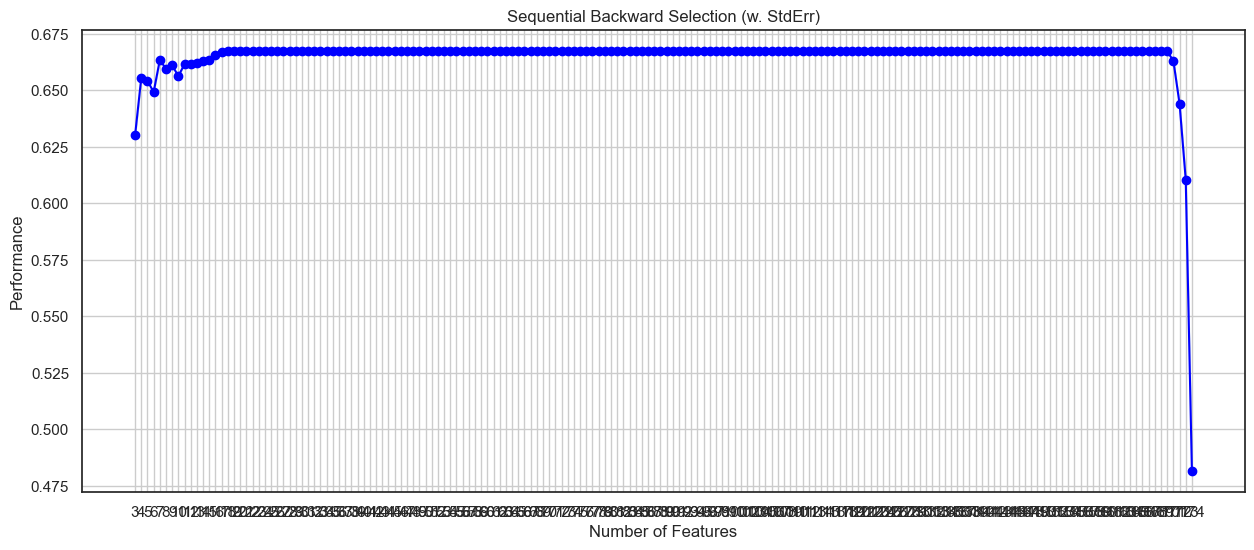

In [1397]:
fig1 = plot_sfs(sffs_back.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()

In [1398]:
bandas_stepwise_backward = list(sffs_back.k_feature_names_)

if (len(bandas_stepwise_backward)) > limite_variaveis_entrada:
    bandas_stepwise_backward = bandas_stepwise_backward[0:(limite_variaveis_entrada)]

type(bandas_stepwise_backward), bandas_stepwise_backward, len(bandas_stepwise_backward)

(list,
 ['BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_8A', 'BAND_9', 'CRI700'],
 7)

In [1399]:
del(X_step, y_step, sffs, sffs_foward, sffs_back)

In [1400]:
#bandas_stepwise_backward =[]

In [1401]:
# PCA

In [1402]:
dados.shape

(172, 175)

In [1403]:
X_pca = dados[lista_bandas]#.values
y_pca = dados['VALUE']#.values

In [1404]:
# Separando conjunto de dados de Treino e Teste
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size = percentual_dados_teste, random_state = random_fixo)
X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape

((120, 174), (52, 174), (120,), (52,))

In [1405]:
X_train_pca_scaler = sc.fit_transform(X_train_pca)
#X_pca_scaler = sc.fit_transform(X_train_pca)
X_train_pca_scaler.shape

(120, 174)

In [1406]:
len(X_pca.columns)

174

In [1414]:
X_train_pca

BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  BAND_6  BAND_7  BAND_8  BAND_8A  \
36    619.0   718.0   859.0   568.0   538.0   436.0   442.0   368.0    355.0   
125   188.0   240.0   277.0   110.0    91.0    62.0    55.0    46.0     57.0   
22    462.0   533.0   650.0   352.0   324.0   261.0   263.0   277.0    240.0   
141   211.0   320.0   464.0   241.0   204.0   116.0   126.0   101.0    106.0   
95    154.0   147.0   287.0   107.0   106.0    66.0    78.0    62.0     83.0   
..      ...     ...     ...     ...     ...     ...     ...     ...      ...   
71    223.0   294.0   320.0   134.0   132.0    96.0   103.0    89.0     82.0   
106   218.0   305.0   420.0   155.0   144.0   108.0   110.0    89.0     72.0   
14    450.0   476.0   616.0   312.0   278.0   223.0   212.0   198.0    208.0   
92    176.0   197.0   281.0   112.0    97.0    73.0    79.0    55.0     70.0   
102   184.0   198.0   272.0   124.0   107.0    73.0    74.0    74.0     72.0   

     BAND_9  BAND_11  BAND_12    ATSAVI  AFRI1600  AFRI2100  ALTERATION  \
36    502.0    238.0    191.0 -0.288624 -0.262354 -0.164270    1.246073   
125    44.0     24.0     26.0 -0.264459 -0.251545 -0.210063    0.923077   
22    180.0    240.0    209.0 -0.238470 -0.336103 -0.237502    1.148325   
141   443.0     86.0     42.0 -0.302415 -0.349687 -0.158548    2.047619   
95     56.0     69.0     43.0 -0.248771 -0.417270 -0.243568    1.604651   
..      ...      ...      ...       ...       ...       ...         ...   
71     80.0     57.0     44.0 -0.244666 -0.288209 -0.184694    1.295455   
106    48.0     62.0     29.0 -0.258498 -0.306063 -0.128880    2.137931   
14    155.0    234.0    212.0 -0.270315 -0.418402 -0.314880    1.103774   
92     38.0     51.0     55.0 -0.258119 -0.374153 -0.315013    0.927273   
102    62.0     56.0     43.0 -0.250289 -0.325693 -0.211809    1.302326   

           ARI     AVI      ARVI     ARVI2    BWDRVI           BRI      CCCI  \
36   -6.945917  0.0436 -0.217121 -0.430000 -0.902491   -188.747746  0.878146   
125 -73.789027 -0.0022 -0.250213 -0.660000 -0.962388 -16041.092795  0.800639   
22  -15.479582  0.0008 -0.164620 -0.319507 -0.901195   -558.829680  0.655862   
141 -27.467884  0.0645 -0.367566 -0.658947 -0.938806  -2719.592446  0.824965   
95  -59.496417  0.0005 -0.110189 -0.491538 -0.919060  -9596.196301  0.983598   
..         ...     ...       ...       ...       ...           ...       ...   
71  -44.507576  0.0026 -0.180409 -0.416099 -0.941235  -5000.851209  0.964203   
106 -45.634921 -0.0059 -0.306088 -0.496475 -0.943294  -5127.519172  0.872675   
14  -19.737457 -0.0002 -0.174442 -0.441529 -0.920129   -996.841252  0.751880   
92  -67.505595 -0.0036 -0.192346 -0.579341 -0.945679 -12273.744526  0.809557   
102 -56.693238  0.0000 -0.233181 -0.475455 -0.927945  -7661.248384  0.721989   

         CARI     CARI2  CHLGREEN   CIGREEN  CIREDEDGE  CHLREDEDGE       CVI  \
36   0.110839  0.084923  1.943439 -0.571595  -0.315985    1.217195  0.283276   
125  0.019706  0.018498  5.036364 -0.833935  -0.494505    1.654545  0.065946   
22   0.068224  0.056033  2.471483 -0.573846  -0.145062    1.231939  0.230779   
141  0.042070  0.036006  3.682540 -0.782328  -0.504902    1.619048  0.113058   
95   0.024687  0.022332  3.679487 -0.783972  -0.415094    1.358974  0.080540   
..        ...       ...       ...       ...        ...         ...       ...   
71   0.029907  0.026057  3.106796 -0.721875  -0.325758    1.281553  0.116465   
106  0.032906  0.030516  3.818182 -0.788095  -0.381944    1.309091  0.078203   
14   0.058594  0.049681  2.905660 -0.678571  -0.287770    1.311321  0.162801   
92   0.021288  0.019677  3.556962 -0.804270  -0.432990    1.227848  0.078013   
102  0.022781  0.020182  3.675676 -0.727941  -0.308411    1.445946  0.124027   

           CI     CRI550     CRI700     DATT1      DATT6  D678/500  D800/680  \
36  -0.264085   2.286133  -4.659784  0.850000   7.681622   -0.0150   -0.0200   
125 -1.181818   5.565584 -68.223443  0.703125  22.612766   -0

In [1407]:
#num_components = int(len(X_train_pca.columns)*.50)
#num_components

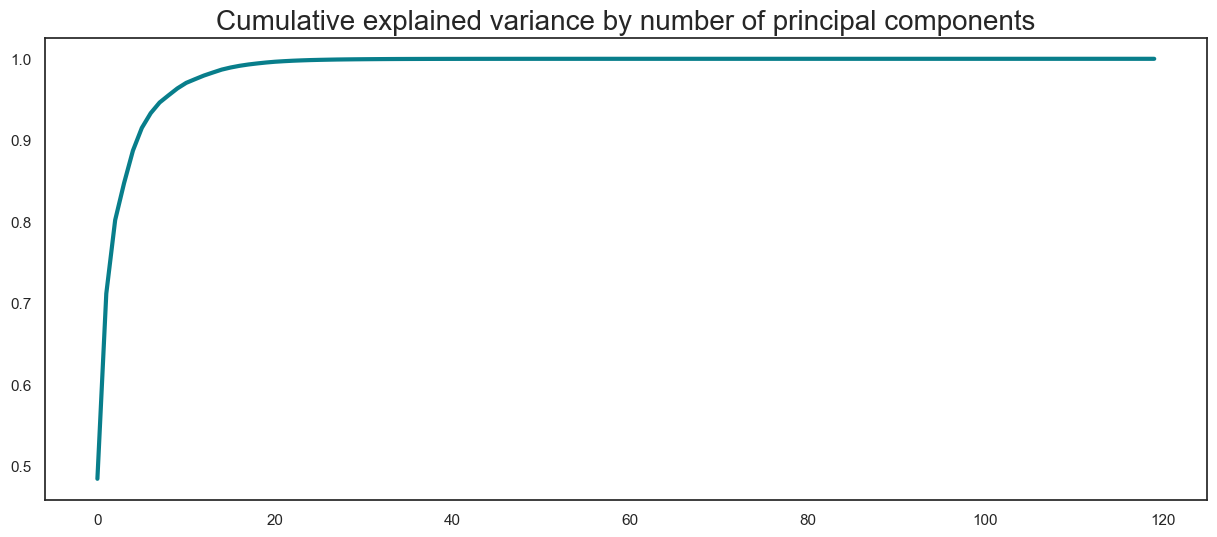

In [1408]:
#pca = PCA(n_components=num_components).fit(X_train_pca_scaler)
pca = PCA().fit(X_train_pca_scaler)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [1409]:
pca.explained_variance_ratio_.shape

(120,)

In [1427]:
X_train_pca

BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  BAND_6  BAND_7  BAND_8  BAND_8A  \
36    619.0   718.0   859.0   568.0   538.0   436.0   442.0   368.0    355.0   
125   188.0   240.0   277.0   110.0    91.0    62.0    55.0    46.0     57.0   
22    462.0   533.0   650.0   352.0   324.0   261.0   263.0   277.0    240.0   
141   211.0   320.0   464.0   241.0   204.0   116.0   126.0   101.0    106.0   
95    154.0   147.0   287.0   107.0   106.0    66.0    78.0    62.0     83.0   
..      ...     ...     ...     ...     ...     ...     ...     ...      ...   
71    223.0   294.0   320.0   134.0   132.0    96.0   103.0    89.0     82.0   
106   218.0   305.0   420.0   155.0   144.0   108.0   110.0    89.0     72.0   
14    450.0   476.0   616.0   312.0   278.0   223.0   212.0   198.0    208.0   
92    176.0   197.0   281.0   112.0    97.0    73.0    79.0    55.0     70.0   
102   184.0   198.0   272.0   124.0   107.0    73.0    74.0    74.0     72.0   

     BAND_9  BAND_11  BAND_12    ATSAVI  AFRI1600  AFRI2100  ALTERATION  \
36    502.0    238.0    191.0 -0.288624 -0.262354 -0.164270    1.246073   
125    44.0     24.0     26.0 -0.264459 -0.251545 -0.210063    0.923077   
22    180.0    240.0    209.0 -0.238470 -0.336103 -0.237502    1.148325   
141   443.0     86.0     42.0 -0.302415 -0.349687 -0.158548    2.047619   
95     56.0     69.0     43.0 -0.248771 -0.417270 -0.243568    1.604651   
..      ...      ...      ...       ...       ...       ...         ...   
71     80.0     57.0     44.0 -0.244666 -0.288209 -0.184694    1.295455   
106    48.0     62.0     29.0 -0.258498 -0.306063 -0.128880    2.137931   
14    155.0    234.0    212.0 -0.270315 -0.418402 -0.314880    1.103774   
92     38.0     51.0     55.0 -0.258119 -0.374153 -0.315013    0.927273   
102    62.0     56.0     43.0 -0.250289 -0.325693 -0.211809    1.302326   

           ARI     AVI      ARVI     ARVI2    BWDRVI           BRI      CCCI  \
36   -6.945917  0.0436 -0.217121 -0.430000 -0.902491   -188.747746  0.878146   
125 -73.789027 -0.0022 -0.250213 -0.660000 -0.962388 -16041.092795  0.800639   
22  -15.479582  0.0008 -0.164620 -0.319507 -0.901195   -558.829680  0.655862   
141 -27.467884  0.0645 -0.367566 -0.658947 -0.938806  -2719.592446  0.824965   
95  -59.496417  0.0005 -0.110189 -0.491538 -0.919060  -9596.196301  0.983598   
..         ...     ...       ...       ...       ...           ...       ...   
71  -44.507576  0.0026 -0.180409 -0.416099 -0.941235  -5000.851209  0.964203   
106 -45.634921 -0.0059 -0.306088 -0.496475 -0.943294  -5127.519172  0.872675   
14  -19.737457 -0.0002 -0.174442 -0.441529 -0.920129   -996.841252  0.751880   
92  -67.505595 -0.0036 -0.192346 -0.579341 -0.945679 -12273.744526  0.809557   
102 -56.693238  0.0000 -0.233181 -0.475455 -0.927945  -7661.248384  0.721989   

         CARI     CARI2  CHLGREEN   CIGREEN  CIREDEDGE  CHLREDEDGE       CVI  \
36   0.110839  0.084923  1.943439 -0.571595  -0.315985    1.217195  0.283276   
125  0.019706  0.018498  5.036364 -0.833935  -0.494505    1.654545  0.065946   
22   0.068224  0.056033  2.471483 -0.573846  -0.145062    1.231939  0.230779   
141  0.042070  0.036006  3.682540 -0.782328  -0.504902    1.619048  0.113058   
95   0.024687  0.022332  3.679487 -0.783972  -0.415094    1.358974  0.080540   
..        ...       ...       ...       ...        ...         ...       ...   
71   0.029907  0.026057  3.106796 -0.721875  -0.325758    1.281553  0.116465   
106  0.032906  0.030516  3.818182 -0.788095  -0.381944    1.309091  0.078203   
14   0.058594  0.049681  2.905660 -0.678571  -0.287770    1.311321  0.162801   
92   0.021288  0.019677  3.556962 -0.804270  -0.432990    1.227848  0.078013   
102  0.022781  0.020182  3.675676 -0.727941  -0.308411    1.445946  0.124027   

           CI     CRI550     CRI700     DATT1      DATT6  D678/500  D800/680  \
36  -0.264085   2.286133  -4.659784  0.850000   7.681622   -0.0150   -0.0200   
125 -1.181818   5.565584 -68.223443  0.703125  22.612766   -0

In [1429]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    #columns=[f'PC{i}' for i in range(1, len(X_train_pca.columns) + 1)],
    
    #columns=[f'PC{i}' for i in range(1, num_components + 1)],
    columns=[f'PC{i}' for i in range(1, len(X_train_pca_scaler) + 1)],
    index=X_train_pca.columns
    #index=[f'Feature {i}' for i in range(1, X_pca_scaler.shape[1] + 1)]
)
loadings#.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
BAND_1  0.928773  0.231396  0.042083  0.147594 -0.134024 -0.081459  0.122226   
BAND_2  0.898678  0.349464 -0.116345  0.174818 -0.092969 -0.104582  0.053889   
BAND_3  0.843147  0.484902  0.040547  0.214238 -0.084133 -0.035430 -0.016951   
BAND_4  0.930655  0.344483 -0.033701  0.069689  0.029689 -0.058970  0.000026   
BAND_5  0.955226  0.267782 -0.055275  0.028963 -0.004769 -0.041007 -0.000316   
...          ...       ...       ...       ...       ...       ...       ...   
BSI     0.591479  0.093724  0.735925 -0.101630  0.226946  0.179726 -0.010307   
NDCI    0.782251 -0.340232 -0.072670 -0.357440 -0.307431  0.141149 -0.033657   
NDTI    0.958007  0.137489 -0.037220 -0.154645  0.157390 -0.076486  0.028532   
MCI     0.479435  0.753100  0.062813 -0.171439 -0.033368 -0.001455 -0.115187   
MPH     0.622987 -0.241996 -0.297362 -0.433184 -0.333654  0.162559 -0.031129   

             PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
BAND_1 -0.082698 -0.021022 -0.070096 -0.093241 -0.050296 -0.042376  0.024212   
BAND_2 -0.053127 -0.066844  0.007400 -0.010301 -0.040559  0.030633 -0.010259   
BAND_3 -0.054354 -0.011809  0.011342 -0.027648 -0.029991  0.027644  0.002492   
BAND_4 -0.086117 -0.039919  0.016875 -0.037104 -0.030605  0.029143  0.010120   
BAND_5 -0.110546 -0.050478  0.026680 -0.036942 -0.025211  0.022049  0.009565   
...          ...       ...       ...       ...       ...       ...       ...   
BSI     0.029899  0.033555 -0.074158  0.013577  0.008315  0.007717  0.017816   
NDCI    0.119168  0.074037  0.061400 -0.039371 -0.021699  0.030488  0.028919   
NDTI    0.051889 -0.044837 -0.060863  0.043420  0.028560 -0.025630  0.006757   
MCI     0.108382 -0.060023  0.281668 -0.140920  0.078732 -0.065749  0.085698   
MPH    -0.170354 -0.142524  0.238449 -0.062874  0.061920 -0.116021 -0.035562   

            PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
BAND_1 -0.014906  0.004532  0.009509 -0.011768  0.002757  0.023159 -0.005217   
BAND_2  0.006649 -0.018847  0.002431 -0.008182  0.004661 -0.016594 -0.012468   
BAND_3  0.008631 -0.006716  0.016125 -0.005077  0.001387  0.003993 -0.005578   
BAND_4  0.008215 -0.009657  0.012419 -0.011176  0.001266  0.006961 -0.010770   
BAND_5  0.008251 -0.007490  0.012844 -0.006123  0.005523  0.004815 -0.007697   
...          ...       ...       ...       ...       ...       ...       ...   
BSI    -0.033994  0.035725 -0.007398 -0.002984  0.014368 -0.032698  0.008589   
NDCI    0.013931 -0.003476 -0.011938 -0.004344  0.026869  0.005988 -0.051336   
NDTI   -0.009041  0.010750 -0.031404  0.024949  0.006656 -0.021513  0.008348   
MCI     0.021002  0.080460  0.001126  0.011075 -0.086425 -0.099298  0.024969   
MPH    -0.040608  0.029301 -0.006111 -0.017739  0.068622 -0.024384  0.060034   

            PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
BAND_1  0.007171 -0.006026  0.011902  0.007692 -0.009065  0.006174 -0.015355   
BAND_2 -0.005023  0.006224  0.028037  0.002480 -0.006328  0.005840 -0.003804   
BAND_3  0.002401  0.005774 -0.001467 -0.003100  0.000559  0.004568  0.000458   
BAND_4 -0.000647 -0.005498  0.001466 -0.004100  0.000205  0.002712 -0.001105   
BAND_5  0.000135 -0.009603 -0.001776  0.000096 -0.000842 -0.000840 -0.002851   
...          ...       ...       ...       ...       ...       ...       ...   
BSI     0.001934  0.002573  0.014472  0.025258  0.012163  0.001058  0.001435   
NDCI   -0.007219  0.009535 -0.003829  0.000950 -0.001652  0.022717  0.005458   
NDTI    0.010255  0.021854 -0.003377  0.006490 -0.000996  0.001977  0.002690   
MCI    -0.000364 -0.004734  0.006904  0.005057 -0.002322 -0.007074 -0.006600   
MPH     0.027594 -0.022947  0.002124  0.052227 -0.010427 -0.021815 -0.005188   

            PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
BAND_1  0.002023 -0.000067 -0.014001 -0.001629  0.004979  0.003078 -0.006228   
BAND_2 -0

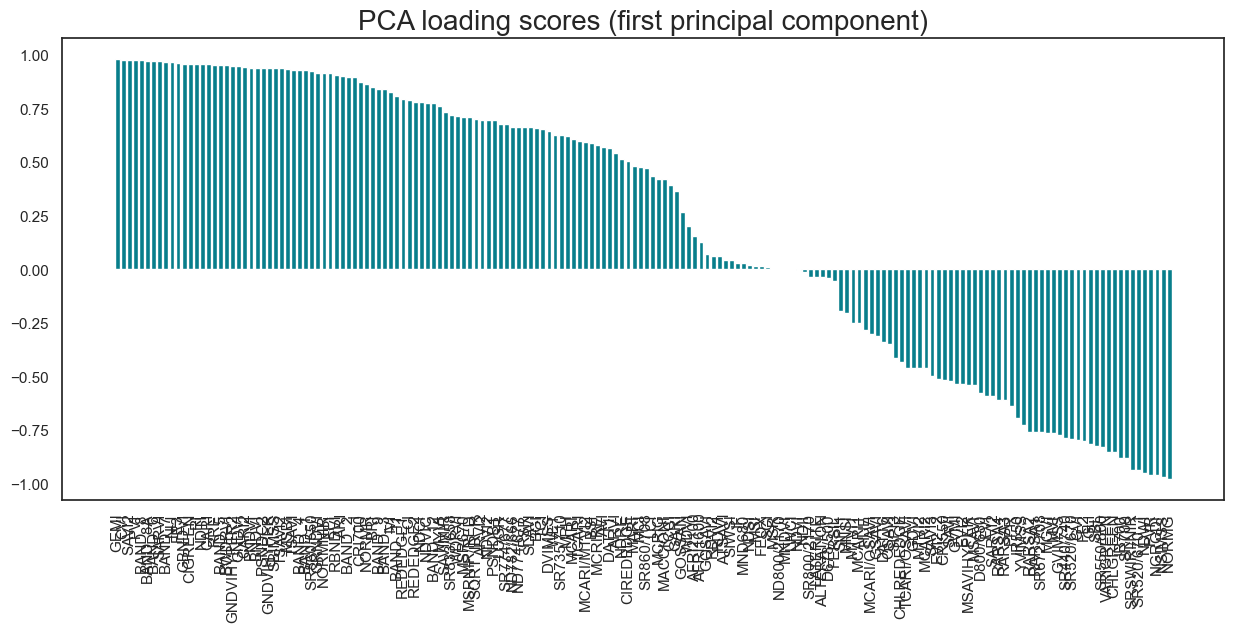

In [1430]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [1431]:
#pc1_loadings

In [1432]:
#for i in range(len(pca.explained_variance_ratio_)):
#               print(pca.explained_variance_ratio_[i], pca.explained_variance_[i])

In [1433]:
# Verificando o número de variáveis necessárias para explicar 99% dos valores de variável Alvo

meta_explicacao_percentual = 0.7 #0.80 #0.99

explicacao_percentual = 0.0
numero_variaveis_pca = 0

for i in range(len(pca.explained_variance_ratio_)):
    if explicacao_percentual < meta_explicacao_percentual:
        explicacao_percentual += pca.explained_variance_ratio_[i]
        numero_variaveis_pca += 1
        
bandas_pca = list(pc1_loadings['Attribute'][0:numero_variaveis_pca])

if (len(bandas_pca)) > limite_variaveis_entrada:
    bandas_pca = bandas_pca[0:(limite_variaveis_entrada)]

type(bandas_pca), bandas_pca, len(bandas_pca)

(list, ['GEMI', 'CVI'], 2)

In [1434]:
del(X_train_pca, X_test_pca, y_train_pca, y_test_pca, X_pca, y_pca, X_train_pca_scaler, pca, loadings)

In [1435]:
# Shap

In [1436]:
#dados[pc1_loadings['Attribute']]

In [1437]:
#X_shap = dados[pc1_loadings['Attribute'][0:120]]
X_shap = dados[bandas]

In [1438]:
#X_shap

In [1439]:
#X_shap = dados[pc1_loadings['Attribute'][0:120]]#.values
y_shap = dados['VALUE']#.values

# Separando conjunto de dados de Treino e Teste
X_train_shap, X_test_shap, y_train_shap, y_test_shap = train_test_split(X_shap, y_shap, test_size = percentual_dados_teste, random_state = random_fixo)

#X_train_shap_scaler = sc.fit_transform(X_train_shap)
X_train_shap_scaler = X_train_shap
X_train_shap_scaler.shape

(120, 174)

In [1440]:
if dados.shape[0] < 500000: #quantidade_limite_dados_selecao_bandas:
    

    #X_rfr_import = X_shap_pca
    X_rfr_import = X_train_shap_scaler
    #X_rfr_import = dados[bandas]
          
    y_rfr_import = y_train_shap
    #y_rfr_import = dados['VALUE']
    
    # reduzindo tempo de execução
    if dados.shape[0] < 5000:
        rfr_import = RandomForestRegressor(n_jobs=-1,criterion='absolute_error')
    else:
        rfr_import = RandomForestRegressor(n_jobs=-1)
        
    rfr_import.fit(X_rfr_import, y_rfr_import)

In [1441]:
if dados.shape[0] < 500000: #quantidade_limite_dados_selecao_bandas:
    explainer = shap.TreeExplainer(rfr_import)
    
    shap_values = explainer.shap_values(X_rfr_import,check_additivity=False)

In [1442]:
len(X_shap.columns), len(shap_values)

(174, 120)

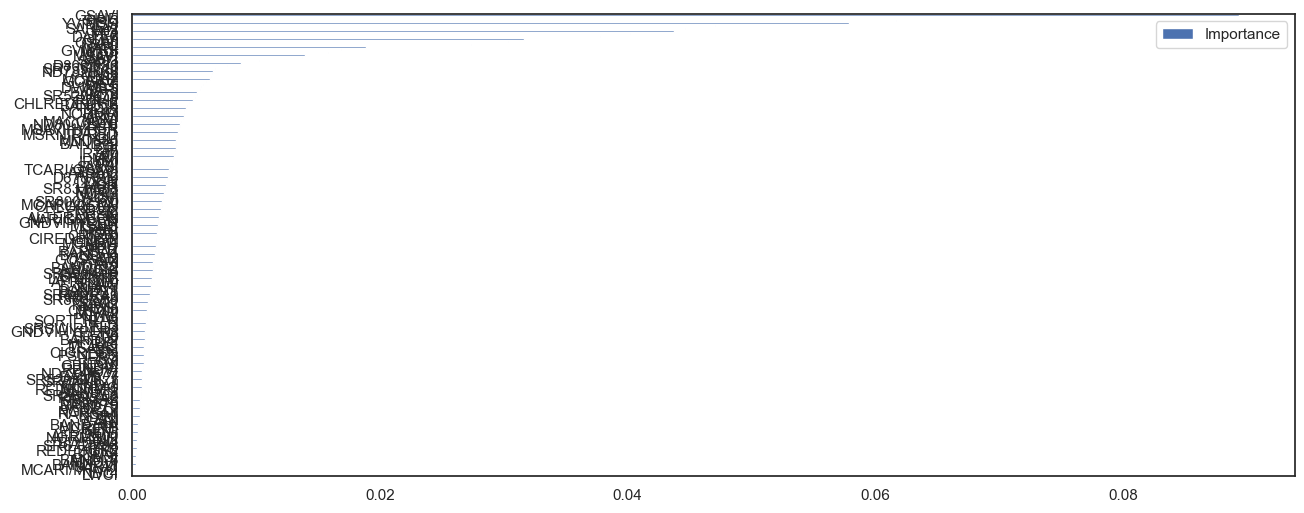

In [1443]:
if dados.shape[0] < quantidade_limite_dados_selecao_bandas:

    shap_imp_pd=pd.DataFrame(
        index=X_rfr_import.columns,
        #index=X_rfr_import[lista_bandas].columns, 
        #index=X_rfr_import[bandas].columns, 
        data = np.mean(np.absolute(shap_values), axis = 0), 
        columns=["Importance"])
    shap_imp_pd.sort_values(
        by=['Importance']).plot.barh(y='Importance')

In [1444]:
if dados.shape[0] < quantidade_limite_dados_selecao_bandas:
    shap_imp_pd.T

In [1445]:
if dados.shape[0] < quantidade_limite_dados_selecao_bandas:

    bandas_importantes_arvore_1 = list(shap_imp_pd.index[np.where(shap_imp_pd['Importance'] > importancia_referencia)])
    type(bandas_importantes_arvore_1), bandas_importantes_arvore_1, len(bandas_importantes_arvore_1)
else:
    bandas_importantes_arvore_1 = []

if (len(bandas_importantes_arvore_1)) > limite_variaveis_entrada:
    bandas_importantes_arvore_1 = bandas_importantes_arvore_1[0:(limite_variaveis_entrada)]   
    
type(bandas_importantes_arvore_1), bandas_importantes_arvore_1, len(bandas_importantes_arvore_1)

(list, ['GSAVI', 'HUE', 'SIPI3', 'YVIMSS'], 4)

In [1446]:
try:
    del(X_rfr_import, y_rfr_import, explainer, shap_values)
except:
    pass

In [1447]:
#bandas_importantes_arvore_1 = []

In [1448]:
# Boruta

In [1449]:
#estimator = RandomForestRegressor()
estimator = ExtraTreesRegressor(n_jobs=-1)

In [1450]:
X_boruta = dados[bandas]#.values

y_boruta = dados['VALUE']#.values

# Splits the dataset
X_train_boruta, X_test_boruta, y_train_boruta, y_test_boruta = train_test_split(X_boruta, y_boruta, test_size=percentual_dados_teste, random_state=random_fixo)

In [1451]:
np.array(X_train_boruta)

array([[ 6.19000000e+02,  7.18000000e+02,  8.59000000e+02, ...,
        -2.03924317e-01,  9.84900752e-03,  1.20464768e-03],
       [ 1.88000000e+02,  2.40000000e+02,  2.77000000e+02, ...,
        -4.31524548e-01,  2.82063910e-03, -8.53773113e-04],
       [ 4.62000000e+02,  5.33000000e+02,  6.50000000e+02, ...,
        -2.97405190e-01,  6.07781579e-03, -5.89105447e-04],
       ...,
       [ 4.50000000e+02,  4.76000000e+02,  6.16000000e+02, ...,
        -3.27586207e-01,  5.29883083e-03, -1.34702649e-03],
       [ 1.76000000e+02,  1.97000000e+02,  2.81000000e+02, ...,
        -4.30025445e-01,  2.32420677e-03, -6.70914543e-04],
       [ 1.84000000e+02,  1.98000000e+02,  2.72000000e+02, ...,
        -3.73737374e-01,  3.31211654e-03, -6.73513243e-04]])

In [1452]:
boruta = BorutaPy(estimator = estimator, n_estimators = 'auto')
#boruta = BorutaPy(estimator = estimator, n_estimators = 'auto', max_iter = 100)

# Fits Boruta
np.int = np.int_
np.float = np.float_
boruta.fit(np.array(X_train_boruta), np.array(y_train_boruta))

BorutaPy(estimator=ExtraTreesRegressor(n_estimators=92, n_jobs=-1,
                                       random_state=RandomState(MT19937) at 0x1BECA35EE40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1BECA35EE40)

In [1453]:
# Important features
important = list(X_boruta.columns[boruta.support_])
print(f"Features confirmed as important: {important}")

# Tentative features
tentative = list(X_boruta.columns[boruta.support_weak_])
print(f"Unconfirmed features (tentative): {tentative}")

# Unimportant features
unimportant = list(X_boruta.columns[~(boruta.support_ | boruta.support_weak_)])
print(f"Features confirmed as unimportant: {unimportant}")

Features confirmed as important: ['CCCI', 'DATT1', 'DATT6', 'D800/680', 'GDVI', 'EVI', 'EVI2', 'EVI2_2', 'FE2', 'GSAVI', 'MACCIONI', 'MGVI', 'MND680', 'MSAVI', 'MSAVIHYPER', 'RSR', 'SAVI', 'SARVI2', 'SAVI3', 'SIPI3', 'GVIMSS', 'GVI', 'YVIMSS']
Unconfirmed features (tentative): ['ATSAVI', 'EPI', 'HUE', 'OSAVI', 'RARSA3', 'RDVI', 'RDVI2', 'SBL', 'WET']
Features confirmed as unimportant: ['BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6', 'BAND_7', 'BAND_8', 'BAND_8A', 'BAND_9', 'BAND_11', 'BAND_12', 'AFRI1600', 'AFRI2100', 'ALTERATION', 'ARI', 'AVI', 'ARVI', 'ARVI2', 'BWDRVI', 'BRI', 'CARI', 'CARI2', 'CHLGREEN', 'CIGREEN', 'CIREDEDGE', 'CHLREDEDGE', 'CVI', 'CI', 'CRI550', 'CRI700', 'D678/500', 'DVIMSS', 'FE3', 'FEOX', 'FERSIL', 'GEMI', 'GVMI', 'GOSSAN', 'GARI', 'GLI', 'GNDVI', 'GOSAVI', 'GBNDVI', 'GRNDVI', 'IVI', 'I', 'IR550', 'IR700', 'LATERITE', 'LCI', 'LWCI', 'LOGR', 'MCARI/MTVI2', 'MCARI/OSAVI', 'MCRIG', 'MCRIRE', 'MVI', 'MNSI', 'MSBI', 'MYVI', 'MARI', 'MCARI', 'MCARI1', 'MC

In [1454]:
bandas_boruta = important
#bandas_boruta = []

if (len(bandas_boruta)) > limite_variaveis_entrada:
    bandas_boruta = bandas_boruta[0:(limite_variaveis_entrada)]

type(bandas_boruta), bandas_boruta,len(bandas_boruta)

(list,
 ['CCCI',
  'DATT1',
  'DATT6',
  'D800/680',
  'GDVI',
  'EVI',
  'EVI2',
  'EVI2_2',
  'FE2',
  'GSAVI',
  'MACCIONI',
  'MGVI'],
 12)

In [1455]:
del(X_train_boruta, X_test_boruta, y_train_boruta, y_test_boruta, X_boruta, y_boruta, estimator, boruta, important, tentative, unimportant)

In [1456]:
# Genetic Selection - Sklearn

In [1457]:
X_genetic = dados[lista_bandas].values
#X_genetic = dados[bandas].values

X_genetic = sc.fit_transform(X_genetic)

y_genetic = dados['VALUE'].values

# Splits the dataset
X_train_genetic, X_test_genetic, y_train_genetic, y_test_genetic = train_test_split(X_genetic, y_genetic, test_size=percentual_dados_teste, random_state=random_fixo)

In [1458]:
#clf = DecisionTreeRegressor()
#clf = cb.CatBoostRegressor()
clf = ExtraTreesRegressor(n_jobs=-1)
#clf = RandomForestRegressor()

In [1459]:
evolved_estimator = GAFeatureSelectionCV(
    clf,
    cv = 2,#3, #5, #cv_genetic,
    scoring= "r2", #"max_error",
    #population_size= 100, #5, #30, #15, #5
    generations= 5, #40tava usando, #5, #20, #6, #20, #6, #generations,
    #tournament_size=3,
    elitism=True,
    crossover_probability=0.9,
    mutation_probability=0.05,
    criteria= "max", #"min",
    #algorithm="eaMuCommaLambda",
    verbose = True,
    n_jobs=-1,
    max_features=12,
    refit=False)

In [1460]:
X_train_genetic = sc.fit_transform(X_train_genetic)

In [1461]:
evolved_estimator.fit(X_train_genetic, y_train_genetic)
features = evolved_estimator.best_features_

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	50    	-47999.8	49960.2    	0.502435   	-100000    
1  	94    	-5999.56	23748.8    	0.517978   	-100000    
2  	96    	0.486682	0.0330589  	0.523471   	0.310235   
3  	94    	0.501866	0.0192336  	0.533382   	0.458119   
4  	95    	0.511096	0.0161488  	0.548967   	0.477811   
5  	93    	0.520033	0.0171977  	0.565659   	0.486706   


In [1462]:
features

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,

In [1463]:
len(lista_bandas), len(features)

(174, 174)

In [1464]:
bandas_genetic = []

for i in range(len(features)):
    if features[i] == True:
        nome_banda = lista_bandas[i]
        bandas_genetic.append(nome_banda)
        #print(nome_banda)

In [1465]:
if (len(bandas_genetic)) > limite_variaveis_entrada:
    bandas_genetic = bandas_genetic[0:(limite_variaveis_entrada)]

type(bandas_genetic), bandas_genetic,len(bandas_genetic)

(list,
 ['ALTERATION',
  'ARVI2',
  'LATERITE',
  'LWCI',
  'MCARI/OSAVI',
  'NDII',
  'RDVI',
  'RDVI2',
  'SAVI',
  'SBL',
  'SQRT_IR_R'],
 11)

In [1466]:
del(X_train_genetic, X_test_genetic, y_train_genetic, y_test_genetic, X_genetic, y_genetic, clf, evolved_estimator, features)

In [1467]:
# Featurewiz

In [1468]:
from featurewiz import featurewiz

In [1469]:
train_wiz, test_wiz = train_test_split(dados, test_size=percentual_dados_teste, random_state=random_fixo)
print(train_wiz.shape, test_wiz.shape)

(120, 175) (52, 175)


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.8 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (120, 175)
    Some column names had special characters which were removed...
#### Single_Label Regression problem ####
loading the entire test dataframe - there is no nrows limit applicable #########
    Loaded test data. Shape = (52, 175)
#####################################################################################

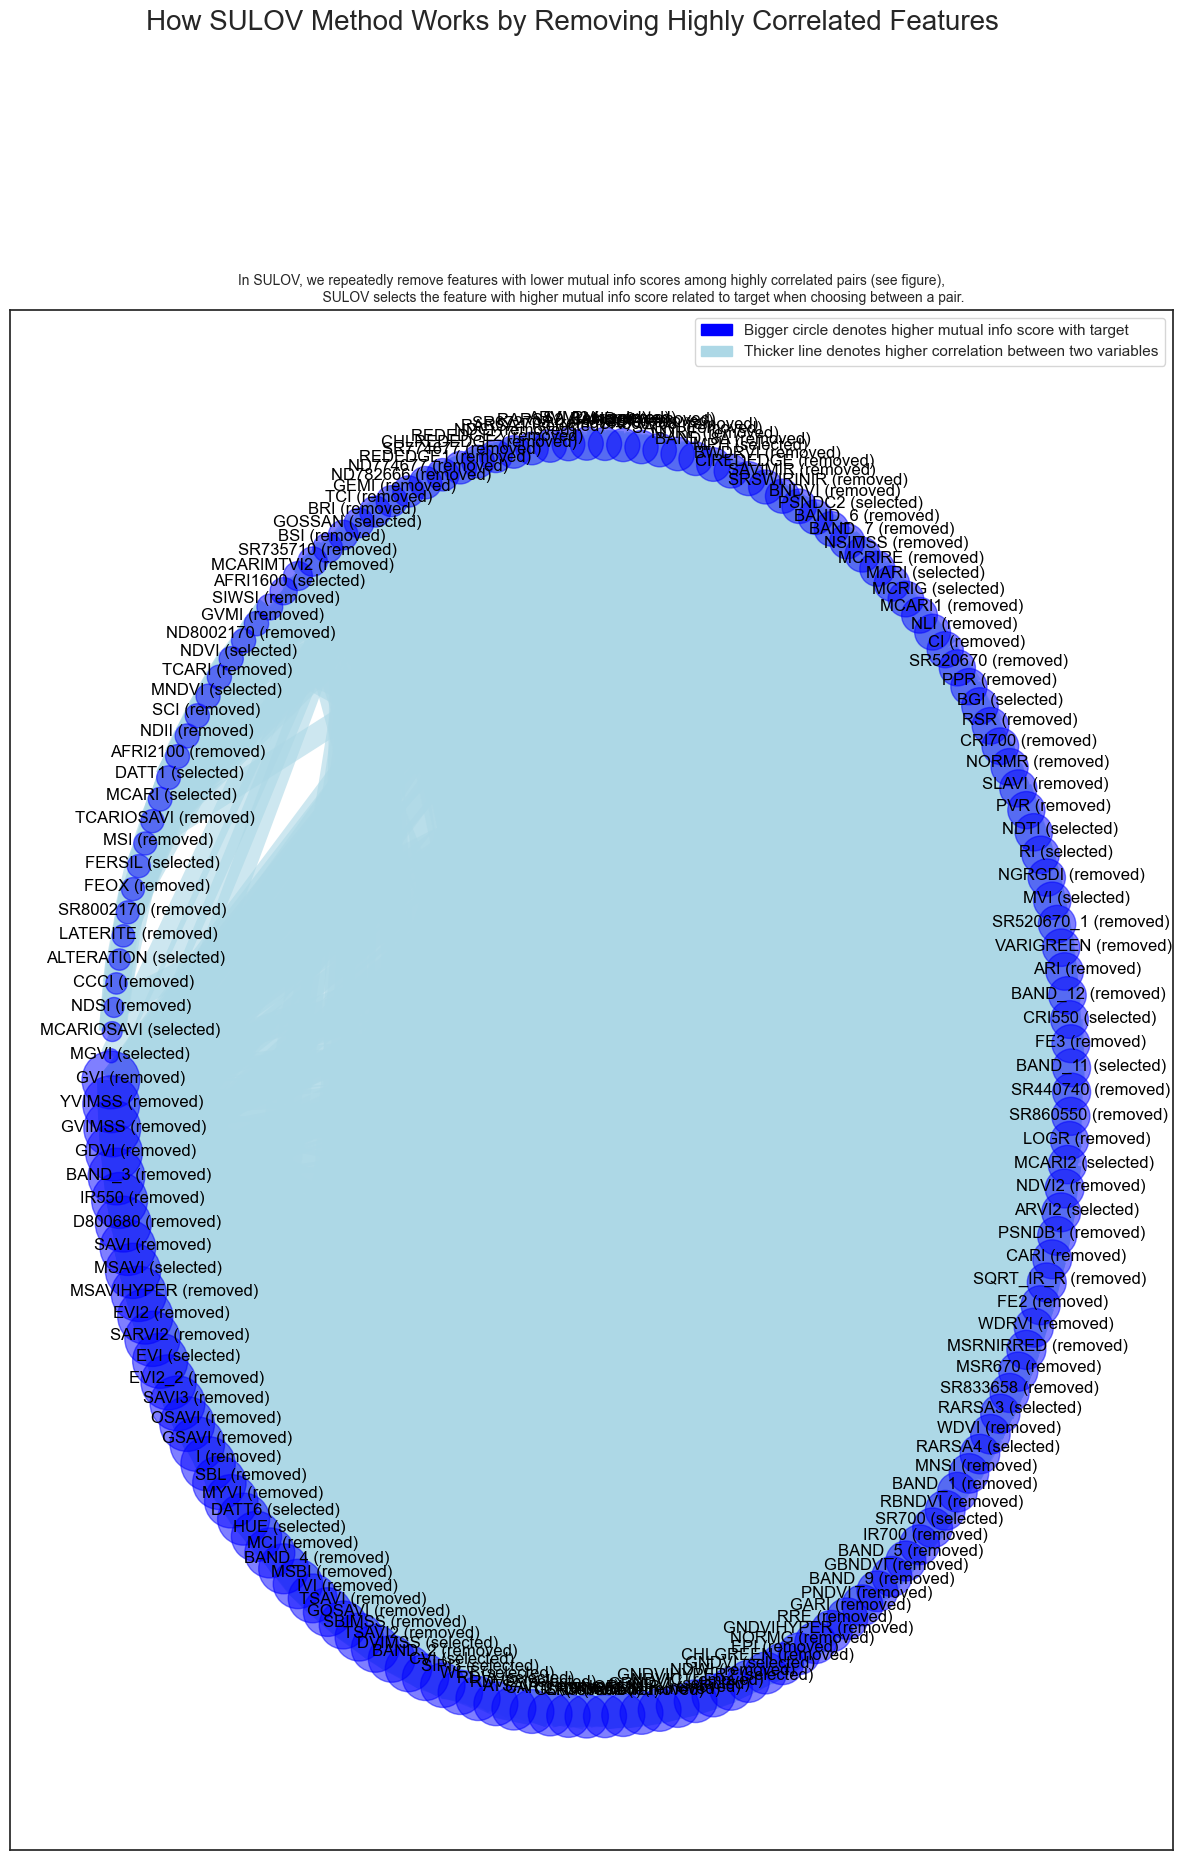

Time taken for SULOV method = 4 seconds
    Adding 0 categorical variables to reduced numeric variables  of 49
Finally 49 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 34 features per iteration...
    XGBoost version using 1.7.6 as tree method: hist
    Number of booster rounds = 100
            Time taken for regular XGBoost feature selection = 0 seconds
        Selected: ['EVI', 'HUE', 'DATT6', 'RARSA4', 'SIPI3', 'RDVI', 'CRI550', 'MCARI2', 'MARI', 'GRNDVI', 'MCRIG', 'FERSIL', 'GNDVIHYPER2', 'WET', 'DVIMSS', 'BGI', 'MCARIOSAVI', 'BAND_11', 'MCARI', 'MPH', 'SR700', 'CVI', 'PSNDC2', 'AFRI1600', 'DATT1', 'PVI', 'RARSA2', 'GOSSAN', 'NDVI', 'RI']

In [1470]:
features = featurewiz(train_wiz, target='VALUE',verbose=1, test_data=test_wiz)

In [1471]:
try:
    bandas_featurewiz = list(features[0].columns[0:-1])
    if (len(bandas_featurewiz)) > limite_variaveis_entrada:
        bandas_featurewiz = bandas_featurewiz[0:(limite_variaveis_entrada)]

    type(bandas_featurewiz), bandas_featurewiz,len(bandas_featurewiz)
except:
    bandas_featurewiz = []
bandas_featurewiz 

['EVI',
 'MACCIONI',
 'HUE',
 'DATT6',
 'MSR',
 'AFRI1600',
 'D678/500',
 'SIPI3',
 'RDVI',
 'MND680',
 'MGVI',
 'MTVI1']

In [1472]:
# Seleção de Bandas por Medianas de Bandas e Desvio Padrão

In [1473]:
# Mediana

In [1474]:
#bandas_usar = ['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12']
bandas_usar = bandas

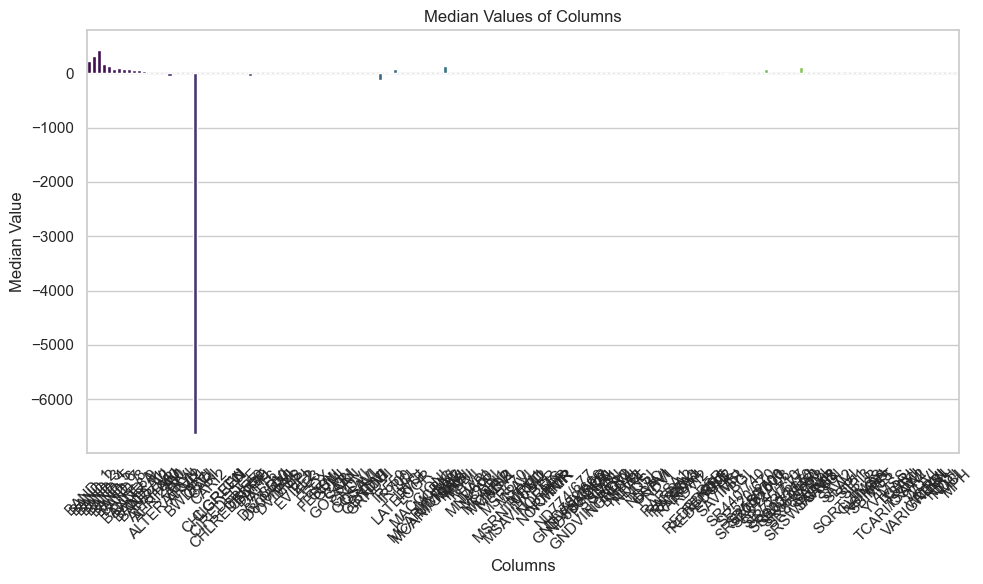

In [1475]:
try:
    median_values = dados[bandas_usar].median()

    sns.set(style="whitegrid")  # Set the style of the plot

    plt.figure(figsize=(10, 6))  # Set the size of the plot
    ax = sns.barplot(x=median_values.index, y=median_values.values, palette="viridis")

    # Customize plot labels and title
    plt.xlabel("Columns")
    plt.ylabel("Median Value")
    plt.title("Median Values of Columns")

    # Rotate x-labels for better readability
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
except:
    pass

In [1476]:
# Sort the std_values Series in descending order and get the top 3 columns

try:
    
    top_columns_median = median_values.sort_values(ascending=False).head(int(len(bandas)*.25))

    # Save the names of the top 3 columns in a list
    bandas_mediana = top_columns_median.index.tolist()

    # Print the list of column names
    print("Top Columns with the largest median values: máximo 25% de colunas")
    print(bandas_mediana)

except:
    bandas_mediana = []

Top Columns with the largest median values: máximo 25% de colunas
['BAND_3', 'BAND_2', 'BAND_1', 'BAND_4', 'MVI', 'BAND_5', 'SRSWIRI/NIR', 'BAND_7', 'BAND_6', 'BAND_8', 'BAND_8A', 'IR700', 'SR700', 'BAND_9', 'BAND_11', 'BAND_12', 'IR550', 'DATT6', 'CRI550', 'SR550/800', 'RARSA3', 'CHLGREEN', 'SARVI', 'FE2', 'RARSA4', 'TSAVI2', 'SIPI3', 'SR520/670_1', 'SR440/740', 'SR800/2170', 'MSR', 'SIPI1', 'TSAVI', 'SR520/670', 'RARSA2', 'CHLREDEDGE', 'ALTERATION', 'LATERITE', 'SR672/708', 'RARSA1', 'VARIGREEN', 'REDEDGE1', 'NSIMSS']


In [1477]:
# Desvio Padrão Máximo e Mínimo

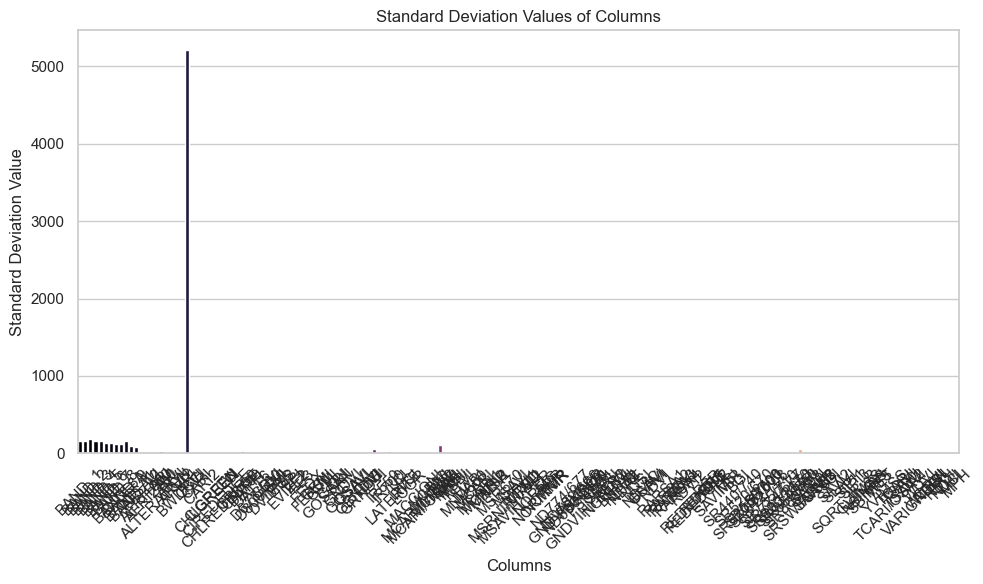

In [1478]:
# Calculate the standard deviation values for each column

try:

    std_values = dados[bandas_usar].std()

    # Create the barplot using Seaborn
    sns.set(style="whitegrid")  # Set the style of the plot

    plt.figure(figsize=(10, 6))  # Set the size of the plot
    ax = sns.barplot(x=std_values.index, y=std_values.values, palette="magma")

    # Customize plot labels and title
    plt.xlabel("Columns")
    plt.ylabel("Standard Deviation Value")
    plt.title("Standard Deviation Values of Columns")

    # Rotate x-labels for better readability
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

except:
    pass

In [1479]:
# Sort the std_values Series in descending order and get the top 3 columns

try:
    
    top_columns = std_values.sort_values(ascending=False).head(int(len(bandas)*.25))

    # Save the names of the top 3 columns in a list
    bandas_desvio_maximo = top_columns.index.tolist()

    # Print the list of column names
    print("Top Columns with the largest standard deviation values: máximo 25% das colunas")
    print(bandas_desvio_maximo)
    
except:
    bandas_desvio_maximo = []

Top Columns with the largest standard deviation values: máximo 25% das colunas
['BRI', 'BAND_3', 'BAND_1', 'BAND_2', 'BAND_4', 'BAND_5', 'BAND_9', 'BAND_6', 'BAND_7', 'BAND_8A', 'BAND_8', 'MVI', 'BAND_11', 'BAND_12', 'SRSWIRI/NIR', 'IVI', 'SR700', 'IR700', 'ARI', 'CRI700', 'IR550', 'DATT6', 'MSR', 'IF', 'CRI550', 'SR550/800', 'CHLGREEN', 'RARSA3', 'SR800/2170', 'RARSA4', 'SIPI3', 'SR440/740', 'SIPI1', 'MND680', 'FE2', 'SR520/670_1', 'ALTERATION', 'LATERITE', 'MSI', 'FEOX', 'CI', 'SR520/670', 'NDVIC']


In [1480]:
# Sort the std_values Series in descending order and get the top 3 columns

try:

    botton_columns = std_values.sort_values(ascending=True).head(int(len(bandas)*.75))

    # Save the names of the top 3 columns in a list
    bandas_desvio_minimo = botton_columns.index.tolist()

    # Print the list of column names
    print("Botton 9 columns with the minimum standard deviation values: máximo 75% das colunas")
    print(bandas_desvio_minimo)
    
except:
    bandas_desvio_minimo = []

Botton 9 columns with the minimum standard deviation values: máximo 75% das colunas
['LWCI', 'HUE', 'SAVI2', 'MCARI', 'MPH', 'I', 'WDVI', 'MNSI', 'TCI', 'MCI', 'NSIMSS', 'D678/500', 'TCARI', 'D800/680', 'MYVI', 'GVIMSS', 'MGVI', 'RDVI', 'MCARI1', 'MTVI1', 'MSAVI', 'MSAVIHYPER', 'GDVI', 'YVIMSS', 'GVI', 'MTVI2', 'MCARI2', 'WET', 'SAVI', 'EVI2_2', 'PVI', 'EVI2', 'SAVI3', 'RRE', 'EVI', 'SARVI2', 'NLI', 'SAVIMIR', 'RDVI2', 'EPI', 'AVI', 'CARI2', 'GSAVI', 'GEMI', 'ATSAVI', 'OSAVI', 'SBIMSS', 'WDRVI', 'BWDRVI', 'DVIMSS', 'MSBI', 'SBL', 'MCARI/OSAVI', 'NORMR', 'CARI', 'MCRIG', 'GOSAVI', 'NORMNIR', 'REDEDGE2', 'NDCI', 'GVMI', 'GLI', 'SARVI', 'PNDVI', 'NORMG', 'TCARI/OSAVI', 'LCI', 'RSR', 'AFRI2100', 'AFRI1600', 'GBNDVI', 'RBNDVI', 'GRNDVI', 'CVI', 'REDEDGE1', 'SQRT_IR_R', 'MARI', 'SLAVI', 'NDRE', 'PPR', 'NDTI', 'RI', 'NGRGDI', 'PVR', 'MCRIRE', 'BSI', 'NDSI', 'FE3', 'CIGREEN', 'PSNDB1', 'NDVI2', 'ND774/677', 'ND782/666', 'BGI', 'CIREDEDGE', 'MSR670', 'MSRNIR/RED', 'ARVI', 'SR833/658', 'RARSA1',

In [1481]:
# Lista das Bandas Importantes Identificadas pelos Métodos

In [1482]:
# Todas as bandas identificadas
# Funcionando
#bandas_importantes_identificadas = bandas_importantes_correlacao_y + bandas_importantes_colinearidade + bandas_importantes_variancia + bandas_importantes_mutual + bandas_importantes_linear + bandas_importantes_lasso + bandas_importantes_arvore_1 + bandas_importantes_xgbr + bandas_importantes_knn + bandas_stepwise + bandas_stepwise_forward + bandas_stepwise_backward + bandas_pca + bandas_boruta + bandas_genetic + bandas_featurewiz

bandas_importantes_identificadas = bandas_importantes_correlacao_y + bandas_importantes_colinearidade + bandas_importantes_variancia + bandas_importantes_mutual + bandas_importantes_linear + bandas_importantes_lasso + bandas_importantes_arvore_1 + bandas_importantes_xgbr + bandas_importantes_knn + bandas_stepwise + bandas_stepwise_forward + bandas_stepwise_backward + bandas_pca + bandas_boruta + bandas_genetic + bandas_featurewiz + bandas_mediana + bandas_desvio_maximo + bandas_desvio_minimo

In [1483]:
#contador_frame

contador_frame = pd.value_counts(np.array(bandas_importantes_identificadas))

contador_bandas = contador_frame.to_frame()

contador_bandas.reset_index(inplace=True)

contador_bandas = contador_bandas.rename(columns = {0:'repeticao',
                       'index': 'banda'})

contador_bandas

banda  count
0        EVI      7
1     BAND_1      5
2       EVI2      5
3        MSR      4
4      SIPI3      4
..       ...    ...
169     MSBI      1
170   DVIMSS      1
171    WDRVI      1
172  SAVIMIR      1
173     LOGR      1

[174 rows x 2 columns]

In [1484]:
# Lista de listas

# funcionando
#lista_bandas_importantes_identificadas = [bandas_importantes_correlacao_y] + [bandas_importantes_colinearidade] + [bandas_importantes_variancia] + [bandas_importantes_mutual] + [bandas_importantes_linear] + [bandas_importantes_lasso] + [bandas_importantes_arvore_1] + [bandas_importantes_xgbr] + [bandas_importantes_knn] + [bandas_stepwise] + [bandas_stepwise_forward] + [bandas_stepwise_backward] + [bandas_pca] + [bandas_boruta] + [bandas_genetic] + [bandas_featurewiz]

# funcionando em 26/08/2023
lista_bandas_importantes_identificadas = [bandas_importantes_correlacao_y] + [bandas_importantes_colinearidade] + [bandas_importantes_variancia] + [bandas_importantes_mutual] + [bandas_importantes_linear] + [bandas_importantes_lasso] + [bandas_importantes_arvore_1] + [bandas_importantes_xgbr] + [bandas_importantes_knn] + [bandas_stepwise] + [bandas_stepwise_forward] + [bandas_stepwise_backward] + [bandas_pca] + [bandas_boruta] + [bandas_genetic] + [bandas_featurewiz] + [bandas_mediana] + [bandas_desvio_maximo] + [bandas_desvio_minimo]

In [1485]:
quantidade_listas = len(lista_bandas_importantes_identificadas)
quantidade_listas

19

In [1486]:
#quantidade_elementos = len(bandas_importantes_correlacao_y) + len(bandas_importantes_colinearidade) + len(bandas_importantes_variancia) + len(bandas_importantes_mutual) + len(bandas_importantes_linear) + len(bandas_importantes_lasso) + len(bandas_importantes_arvore_1) + len(bandas_importantes_xgbr) +len(bandas_importantes_knn) + len(bandas_stepwise) + len(bandas_stepwise_forward) + len(bandas_stepwise_backward) + len(bandas_pca) + len(bandas_boruta) + len(bandas_genetic) + len(bandas_featurewiz)

quantidade_elementos = len(bandas_importantes_correlacao_y) + len(bandas_importantes_colinearidade) + len(bandas_importantes_variancia) + len(bandas_importantes_mutual) + len(bandas_importantes_linear) + len(bandas_importantes_lasso) + len(bandas_importantes_arvore_1) + len(bandas_importantes_xgbr) +len(bandas_importantes_knn) + len(bandas_stepwise) + len(bandas_stepwise_forward) + len(bandas_stepwise_backward) + len(bandas_pca) + len(bandas_boruta) + len(bandas_genetic) + len(bandas_featurewiz) + len(bandas_mediana) + len(bandas_desvio_maximo) + len(bandas_desvio_minimo)

quantidade_elementos

320

In [1487]:
media_elementos_bandas = int(quantidade_elementos/quantidade_listas)
media_elementos_bandas

16

In [1488]:
# limitando o número de colunas a serem selecionadas

bandas_mais_frequentes = list(contador_bandas['banda'][0:media_elementos_bandas])

bandas_mais_frequentes

['EVI',
 'BAND_1',
 'EVI2',
 'MSR',
 'SIPI3',
 'BAND_4',
 'BAND_3',
 'BAND_2',
 'LATERITE',
 'DATT6',
 'MGVI',
 'D800/680',
 'GSAVI',
 'EVI2_2',
 'BAND_8A',
 'BAND_9']

In [1489]:
for i in range(len(bandas_mais_frequentes)):
  
    # replace
    
    if bandas_mais_frequentes[i] == 'BAND_1':
        bandas_mais_frequentes[i] = 'BAND_01'
        
    if bandas_mais_frequentes[i] == 'BAND_2':
        bandas_mais_frequentes[i] = 'BAND_02'
    
    if bandas_mais_frequentes[i] == 'BAND_3':
        bandas_mais_frequentes[i] = 'BAND_03'
  
    if bandas_mais_frequentes[i] == 'BAND_4':
        bandas_mais_frequentes[i] = 'BAND_04'

    if bandas_mais_frequentes[i] == 'BAND_5':
        bandas_mais_frequentes[i] = 'BAND_05'
        
    if bandas_mais_frequentes[i] == 'BAND_6':
        bandas_mais_frequentes[i] = 'BAND_06'
        
    if bandas_mais_frequentes[i] == 'BAND_7':
        bandas_mais_frequentes[i] = 'BAND_07'
     
    if bandas_mais_frequentes[i] == 'BAND_8':
        bandas_mais_frequentes[i] = 'BAND_08'
  
    if bandas_mais_frequentes[i] == 'BAND_8A':
        bandas_mais_frequentes[i] = 'BAND_08A'

    if bandas_mais_frequentes[i] == 'BAND_9':
        bandas_mais_frequentes[i] = 'BAND_09'

# print list
#print(bandas_mais_frequentes)

bandas_mais_frequentes.sort()

for i in range(len(bandas_mais_frequentes)):
  
    # replace
    
    if bandas_mais_frequentes[i] == 'BAND_01':
        bandas_mais_frequentes[i] = 'BAND_1'
        
    if bandas_mais_frequentes[i] == 'BAND_02':
        bandas_mais_frequentes[i] = 'BAND_2'
    
    if bandas_mais_frequentes[i] == 'BAND_03':
        bandas_mais_frequentes[i] = 'BAND_3'
  
    if bandas_mais_frequentes[i] == 'BAND_04':
        bandas_mais_frequentes[i] = 'BAND_4'

    if bandas_mais_frequentes[i] == 'BAND_05':
        bandas_mais_frequentes[i] = 'BAND_5'
        
    if bandas_mais_frequentes[i] == 'BAND_06':
        bandas_mais_frequentes[i] = 'BAND_6'
        
    if bandas_mais_frequentes[i] == 'BAND_07':
        bandas_mais_frequentes[i] = 'BAND_7'
     
    if bandas_mais_frequentes[i] == 'BAND_08':
        bandas_mais_frequentes[i] = 'BAND_8'
  
    if bandas_mais_frequentes[i] == 'BAND_08A':
        bandas_mais_frequentes[i] = 'BAND_8A'

    if bandas_mais_frequentes[i] == 'BAND_09':
        bandas_mais_frequentes[i] = 'BAND_9'

# print list
print(bandas_mais_frequentes)

['BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_8A', 'BAND_9', 'D800/680', 'DATT6', 'EVI', 'EVI2', 'EVI2_2', 'GSAVI', 'LATERITE', 'MGVI', 'MSR', 'SIPI3']


In [1490]:
# Colinearidade - Nova Verificação

In [1491]:
X_multicol_1 = dados[bandas_mais_frequentes]
X_multicol_1.head(3)

BAND_1  BAND_2  BAND_3  BAND_4  BAND_8A  BAND_9  D800/680      DATT6  \
0   515.0   533.0   688.0   380.0    302.0   220.0   -0.0100  12.399816   
1   502.0   481.0   654.0   349.0    203.0   180.0   -0.0136  10.210446   
2   330.0   342.0   493.0   170.0     69.0    59.0   -0.0092   9.719405   

        EVI      EVI2    EVI2_2     GSAVI  LATERITE      MGVI       MSR  \
0 -0.029197 -0.022514 -0.022337 -0.104467  1.179724  0.400276  1.740741   
1 -0.039083 -0.030903 -0.030768 -0.114922  1.248555  0.398845  1.888889   
2 -0.026954 -0.021546 -0.021934 -0.114085  1.270270  0.407431  1.575000   

      SIPI3  
0  2.530000  
1  1.970588  
2  2.869565

In [1492]:
# VIF dataframe
vif_data_1 = pd.DataFrame()
vif_data_1["feature"] = X_multicol_1.columns
  
# calculating VIF for each feature
vif_data_1["VIF"] = [variance_inflation_factor(X_multicol_1.values, i)
                          for i in range(len(X_multicol_1.columns))]
  
print(vif_data_1)

     feature           VIF
0     BAND_1  1.200506e+02
1     BAND_2  1.433988e+03
2     BAND_3  1.220927e+05
3     BAND_4  4.980684e+04
4    BAND_8A  1.569500e+02
5     BAND_9  1.028371e+01
6   D800/680  2.890508e+05
7      DATT6  9.579263e+01
8        EVI  5.450154e+03
9       EVI2  1.630983e+06
10    EVI2_2  6.766615e+05
11     GSAVI  6.561454e+04
12  LATERITE  1.416635e+01
13      MGVI  1.227088e+03
14       MSR  1.485482e+00
15     SIPI3  7.712948e+01


In [1493]:
# Seleção por valor do VIF BAIXO - PRINCIPAIS BANDAS VOTADAS POR TODOS OS MÉTODOS
bandas_importantes_colinearidade_principais = list(vif_data_1[(vif_data_1['VIF']<= 5)]['feature'])
type(bandas_importantes_colinearidade_principais), len(bandas_importantes_colinearidade_principais)

(list, 1)

In [1494]:
del(X_multicol_1, vif_data_1)

In [1495]:
# Seleção de todas as colunas disponíveis

In [1496]:
bandas_todas_colunas_disponiveis = list(bandas)
bandas_todas_colunas_disponiveis

['BAND_1',
 'BAND_2',
 'BAND_3',
 'BAND_4',
 'BAND_5',
 'BAND_6',
 'BAND_7',
 'BAND_8',
 'BAND_8A',
 'BAND_9',
 'BAND_11',
 'BAND_12',
 'ATSAVI',
 'AFRI1600',
 'AFRI2100',
 'ALTERATION',
 'ARI',
 'AVI',
 'ARVI',
 'ARVI2',
 'BWDRVI',
 'BRI',
 'CCCI',
 'CARI',
 'CARI2',
 'CHLGREEN',
 'CIGREEN',
 'CIREDEDGE',
 'CHLREDEDGE',
 'CVI',
 'CI',
 'CRI550',
 'CRI700',
 'DATT1',
 'DATT6',
 'D678/500',
 'D800/680',
 'GDVI',
 'DVIMSS',
 'EVI',
 'EVI2',
 'EVI2_2',
 'EPI',
 'FE2',
 'FE3',
 'FEOX',
 'FERSIL',
 'GEMI',
 'GVMI',
 'GOSSAN',
 'GARI',
 'GLI',
 'GNDVI',
 'GOSAVI',
 'GSAVI',
 'GBNDVI',
 'GRNDVI',
 'HUE',
 'IVI',
 'I',
 'IR550',
 'IR700',
 'LATERITE',
 'LCI',
 'LWCI',
 'LOGR',
 'MACCIONI',
 'MCARI/MTVI2',
 'MCARI/OSAVI',
 'MCRIG',
 'MCRIRE',
 'MVI',
 'MGVI',
 'MNSI',
 'MSBI',
 'MYVI',
 'MND680',
 'MARI',
 'MCARI',
 'MCARI1',
 'MCARI2',
 'MNDVI',
 'MSR',
 'MSR670',
 'MSRNIR/RED',
 'MSAVI',
 'MSAVIHYPER',
 'MTVI1',
 'MTVI2',
 'NLI',
 'NORMG',
 'NORMNIR',
 'NORMR',
 'PPR',
 'PVR',
 'ND774/677',
 

In [1497]:
# Preparando as listas de Bandas para Aplicação nos Modelos

In [1498]:
# Preparando lista de Bandas para Aplicação no Melhor Modelo

lista = list(bandas)

# Contornar problema de selecionar todas as 104 variáveis
#todas_variaveis_entrada = lista
todas_variaveis_entrada = []


if usar_todas_bandas != 4:
    bandas_espectrais_12_todas = ['BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6', 'BAND_7', 'BAND_8','BAND_8A','BAND_9','BAND_11', 'BAND_12']
else:
    bandas_espectrais_12_todas = ['BAND_2', 'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6', 'BAND_7', 'BAND_8','BAND_8A']


bandas_visivel_rgb = ['BAND_4', 'BAND_3', 'BAND_2']

bandas_falsa_cor_1 = ['BAND_8', 'BAND_4', 'BAND_3']

# Não faz sentido alternar apenas ordem de colunas para modelos
# bandas_falsa_cor_2 = ['BAND_4', 'BAND_8', 'BAND_3']

if usar_todas_bandas != 4:
    bandas_swir = ['BAND_12', 'BAND_11', 'BAND_8A']
else:
    bandas_swir = []
    
# -------------------------

# List of band combinations in Sentinel 2
#https://giscrack.com/list-of-band-combinations-in-sentinel-2a/

# Natural Colors	 4	3	2
# False color Infrared	 8	4	3


# False color Urban	 12	11	4
if usar_todas_bandas != 4:
    bandas_cor_urbana = ['BAND_12', 'BAND_11', 'BAND_4']
else:
    bandas_cor_urbana = []

# Agriculture	 11	8	2
if usar_todas_bandas != 4:
    bandas_agricultura = ['BAND_11', 'BAND_8', 'BAND_2']
else:
    bandas_agricultura = []

# Atmospheric penetration	 12	11	8a
if usar_todas_bandas != 4:
    bandas_atmosfera = ['BAND_12', 'BAND_11', 'BAND_8A']
else:
    bandas_atmosfera = []

# Healthy vegetation	 8	11	2
if usar_todas_bandas != 4:
    bandas_saude_vegetacao = ['BAND_8', 'BAND_11', 'BAND_2']
else:
    bandas_saude_vegetacao = []

# Land/Water	 8	11	4
if usar_todas_bandas != 4:
    bandas_terra_agua = ['BAND_8', 'BAND_11', 'BAND_4']
else:
    bandas_terra_agua = []

# Natural Colors with Atmospheric Removal	 12	8	3
if usar_todas_bandas != 4:
    bandas_color_atmosfera = ['BAND_12', 'BAND_8', 'BAND_3']
else:
    bandas_color_atmosfera = []

# Shortwave Infrared	 12	8	4
if usar_todas_bandas != 4:
    bandas_infra_vermelho = ['BAND_12', 'BAND_8', 'BAND_4']
else:
    bandas_infra_vermelho = []

# Vegetation Analysis	 11	8	4
if usar_todas_bandas != 4:
    bandas_vegetacao_analise = ['BAND_11', 'BAND_8', 'BAND_4']
else:
    bandas_vegetacao_analise = []

# -------------------------

# https://www.passeidireto.com/arquivo/85820787/2020-sentinel-2-bands-and-combinations-gis-geography
# Bathymetric (B4, B3, B1)
if usar_todas_bandas != 4:
    bandas_batimetria = ['BAND_4', 'BAND_3', 'BAND_1']
else:
    bandas_batimetria = []

#Geology (B12, B11, B2)
if usar_todas_bandas != 4:
    bandas_geologia = ['BAND_12', 'BAND_11', 'BAND_2']
else:
    bandas_geologia = []

# -------------------------

bandas_b2 = ['BAND_2']
bandas_b3 = ['BAND_3']
bandas_b4 = ['BAND_4']
bandas_b5 = ['BAND_5']
bandas_b8 = ['BAND_8']

# -------------------------

bandas_espectrais_8_agua = ['BAND_2', 'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6', 'BAND_7', 'BAND_8','BAND_8A']

bandas_espectrais_4_agua = ['BAND_2', 'BAND_3', 'BAND_4', 'BAND_5']


#---------- Ajuste para Quando houver só dados de textura

if usar_todas_bandas in(11,13,14):
    print('Apenas Texturas Foram Selecionadas')
    bandas_espectrais_12_todas = []
    bandas_visivel_rgb = []
    bandas_falsa_cor_1 = []
    bandas_swir = []
    usar_todas_bandas = []
    bandas_cor_urbana = []
    bandas_agricultura = []
    bandas_atmosfera = []
    bandas_saude_vegetacao = []
    bandas_terra_agua = []
    bandas_color_atmosfera = [] 
    bandas_infra_vermelho = []
    bandas_vegetacao_analise = []
    bandas_batimetria = []
    bandas_geologia = []
    bandas_b2 = []
    bandas_b3 = []
    bandas_b4 = []
    bandas_b5 = []
    bandas_b8 = []
    bandas_espectrais_8_agua = []
    bandas_espectrais_4_agua = []


# ---------- Ajustes daods de Textura


#listas_variveis_selecionadas = [bandas_mais_frequentes, bandas_importantes_correlacao_y, bandas_importantes_colinearidade, bandas_importantes_variancia, bandas_importantes_mutual, bandas_importantes_linear, bandas_importantes_lasso, bandas_importantes_arvore_1, bandas_importantes_xgbr, bandas_importantes_knn, bandas_stepwise, bandas_stepwise_forward, bandas_stepwise_backward, bandas_pca, bandas_boruta, bandas_genetic, todas_variaveis_entrada, bandas_espectrais_12_todas, bandas_importantes_colinearidade_principais, bandas_visivel_rgb, bandas_falsa_cor_1, bandas_swir, bandas_cor_urbana, bandas_agricultura, bandas_atmosfera, bandas_saude_vegetacao, bandas_terra_agua, bandas_color_atmosfera, bandas_infra_vermelho, bandas_vegetacao_analise, bandas_batimetria, bandas_geologia, bandas_b2, bandas_b3, bandas_b4, bandas_b5, bandas_b8, bandas_espectrais_8_agua, bandas_featurewiz]

# Funcionando
#listas_variveis_selecionadas = [bandas_mais_frequentes, bandas_importantes_correlacao_y, bandas_importantes_colinearidade, bandas_importantes_variancia, bandas_importantes_mutual, bandas_importantes_linear, bandas_importantes_lasso, bandas_importantes_arvore_1, bandas_importantes_xgbr, bandas_importantes_knn, bandas_stepwise, bandas_stepwise_forward, bandas_stepwise_backward, bandas_pca, bandas_boruta, bandas_genetic, todas_variaveis_entrada, bandas_espectrais_12_todas, bandas_importantes_colinearidade_principais, bandas_visivel_rgb, bandas_falsa_cor_1, bandas_swir, bandas_cor_urbana, bandas_agricultura, bandas_atmosfera, bandas_saude_vegetacao, bandas_terra_agua, bandas_color_atmosfera, bandas_infra_vermelho, bandas_vegetacao_analise, bandas_batimetria, bandas_geologia, bandas_b2, bandas_b3, bandas_b4, bandas_b5, bandas_b8, bandas_espectrais_8_agua, bandas_espectrais_4_agua, bandas_featurewiz]

# Testando
#listas_variveis_selecionadas = [bandas_importantes_correlacao_y, bandas_importantes_colinearidade, bandas_importantes_variancia, bandas_importantes_mutual, bandas_importantes_linear, bandas_importantes_lasso, bandas_importantes_arvore_1, bandas_importantes_xgbr, bandas_importantes_knn, bandas_stepwise, bandas_stepwise_forward, bandas_stepwise_backward, bandas_pca, bandas_boruta, bandas_genetic, bandas_featurewiz, bandas_mais_frequentes, bandas_importantes_colinearidade_principais, todas_variaveis_entrada, bandas_espectrais_12_todas, bandas_visivel_rgb, bandas_falsa_cor_1, bandas_swir, bandas_cor_urbana, bandas_agricultura, bandas_atmosfera, bandas_saude_vegetacao, bandas_terra_agua, bandas_color_atmosfera, bandas_infra_vermelho, bandas_vegetacao_analise, bandas_batimetria, bandas_geologia, bandas_b2, bandas_b3, bandas_b4, bandas_b5, bandas_b8, bandas_espectrais_8_agua, bandas_espectrais_4_agua]

# funcionando em 16/08/2023
#listas_variveis_selecionadas = [bandas_mais_frequentes, bandas_importantes_correlacao_y, bandas_importantes_colinearidade, bandas_importantes_variancia, bandas_importantes_mutual, bandas_importantes_linear, bandas_importantes_lasso, bandas_importantes_arvore_1, bandas_importantes_xgbr, bandas_importantes_knn, bandas_stepwise, bandas_stepwise_forward, bandas_stepwise_backward, bandas_pca, bandas_boruta, bandas_genetic, todas_variaveis_entrada, bandas_espectrais_12_todas, bandas_importantes_colinearidade_principais, bandas_visivel_rgb, bandas_falsa_cor_1, bandas_swir, bandas_cor_urbana, bandas_agricultura, bandas_atmosfera, bandas_saude_vegetacao, bandas_terra_agua, bandas_color_atmosfera, bandas_infra_vermelho, bandas_vegetacao_analise, bandas_batimetria, bandas_geologia, bandas_b2, bandas_b3, bandas_b4, bandas_b5, bandas_b8, bandas_espectrais_8_agua, bandas_featurewiz, bandas_espectrais_4_agua]

# funcionando em 26/08/2023
#listas_variveis_selecionadas = [bandas_mais_frequentes, bandas_importantes_correlacao_y, bandas_importantes_colinearidade, bandas_importantes_variancia, bandas_importantes_mutual, bandas_importantes_linear, bandas_importantes_lasso, bandas_importantes_arvore_1, bandas_importantes_xgbr, bandas_importantes_knn, bandas_stepwise, bandas_stepwise_forward, bandas_stepwise_backward, bandas_pca, bandas_boruta, bandas_genetic, todas_variaveis_entrada, bandas_espectrais_12_todas, bandas_importantes_colinearidade_principais, bandas_visivel_rgb, bandas_falsa_cor_1, bandas_swir, bandas_cor_urbana, bandas_agricultura, bandas_atmosfera, bandas_saude_vegetacao, bandas_terra_agua, bandas_color_atmosfera, bandas_infra_vermelho, bandas_vegetacao_analise, bandas_batimetria, bandas_geologia, bandas_b2, bandas_b3, bandas_b4, bandas_b5, bandas_b8, bandas_espectrais_8_agua, bandas_featurewiz, bandas_espectrais_4_agua, bandas_mediana, bandas_desvio_maximo, bandas_desvio_minimo]

listas_variveis_selecionadas = [bandas_mais_frequentes, bandas_importantes_correlacao_y, bandas_importantes_colinearidade, bandas_importantes_variancia, bandas_importantes_mutual, bandas_importantes_linear, bandas_importantes_lasso, bandas_importantes_arvore_1, bandas_importantes_xgbr, bandas_importantes_knn, bandas_stepwise, bandas_stepwise_forward, bandas_stepwise_backward, bandas_pca, bandas_boruta, bandas_genetic, todas_variaveis_entrada, bandas_espectrais_12_todas, bandas_importantes_colinearidade_principais, bandas_visivel_rgb, bandas_falsa_cor_1, bandas_swir, bandas_cor_urbana, bandas_agricultura, bandas_atmosfera, bandas_saude_vegetacao, bandas_terra_agua, bandas_color_atmosfera, bandas_infra_vermelho, bandas_vegetacao_analise, bandas_batimetria, bandas_geologia, bandas_b2, bandas_b3, bandas_b4, bandas_b5, bandas_b8, bandas_espectrais_8_agua, bandas_featurewiz, bandas_espectrais_4_agua, bandas_mediana, bandas_desvio_maximo, bandas_desvio_minimo, bandas_todas_colunas_disponiveis]

In [1499]:
# Variáve que será útil para a função que vai verificar a duplicação de seleções de bandas

# funcionando em 30/08/2023
#ista_bandas_importantes_identificadas_comparar = [bandas_importantes_correlacao_y] + [bandas_importantes_colinearidade] + [bandas_importantes_variancia] + [bandas_importantes_mutual] + [bandas_importantes_linear] + [bandas_importantes_lasso] + [bandas_importantes_arvore_1] + [bandas_importantes_xgbr] + [bandas_importantes_knn] + [bandas_stepwise] + [bandas_stepwise_forward] + [bandas_stepwise_backward] + [bandas_pca] + [bandas_boruta] + [bandas_genetic] + [bandas_featurewiz] + [bandas_mediana] + [bandas_desvio_maximo] + [bandas_desvio_minimo] + [bandas_todas_colunas_disponiveis]

lista_bandas_importantes_identificadas_comparar = [bandas_importantes_correlacao_y] + [bandas_importantes_colinearidade] + [bandas_importantes_variancia] + [bandas_importantes_mutual] + [bandas_importantes_linear] + [bandas_importantes_lasso] + [bandas_importantes_arvore_1] + [bandas_importantes_xgbr] + [bandas_importantes_knn] + [bandas_stepwise] + [bandas_stepwise_forward] + [bandas_stepwise_backward] + [bandas_pca] + [bandas_boruta] + [bandas_genetic] + [bandas_featurewiz] + [bandas_mediana] + [bandas_desvio_maximo] + [bandas_desvio_minimo] + [bandas_todas_colunas_disponiveis] + [bandas_espectrais_12_todas] + [bandas_importantes_colinearidade_principais] + [bandas_visivel_rgb] + [bandas_falsa_cor_1] + [bandas_swir] + [bandas_cor_urbana] + [bandas_agricultura] + [bandas_atmosfera] + [bandas_saude_vegetacao] + [bandas_terra_agua] + [bandas_color_atmosfera] + [bandas_infra_vermelho] + [bandas_vegetacao_analise] + [bandas_batimetria] + [bandas_geologia] + [bandas_b2] + [bandas_b3] + [bandas_b4] + [bandas_b5] + [bandas_b8] + [bandas_espectrais_8_agua]

In [1500]:
# Registro de Resultados - Preparação da Tabela

In [1501]:
dados.reset_index(inplace=True)
del(dados['index'])
dados

BAND_1  BAND_2  BAND_3  BAND_4  BAND_5  BAND_6  BAND_7  BAND_8  BAND_8A  \
0     515.0   533.0   688.0   380.0   354.0   310.0   299.0   280.0    302.0   
1     502.0   481.0   654.0   349.0   304.0   228.0   212.0   213.0    203.0   
2     330.0   342.0   493.0   170.0   144.0    95.0   102.0    78.0     69.0   
3     469.0   507.0   655.0   359.0   337.0   287.0   281.0   270.0    285.0   
4     500.0   505.0   660.0   354.0   331.0   276.0   274.0   254.0    278.0   
..      ...     ...     ...     ...     ...     ...     ...     ...      ...   
167   341.0   469.0   601.0   281.0   230.0   162.0   170.0   146.0    145.0   
168   442.0   535.0   689.0   372.0   338.0   261.0   272.0   227.0    255.0   
169   299.0   395.0   529.0   212.0   162.0   104.0   106.0    86.0     72.0   
170   308.0   384.0   492.0   233.0   225.0   137.0   151.0   133.0    127.0   
171   313.0   409.0   559.0   231.0   185.0   114.0   126.0   115.0     90.0   

     BAND_9  BAND_11  BAND_12    ATSAVI  AFRI1600  AFRI2100  ALTERATION  \
0     220.0    256.0    217.0 -0.251454 -0.348336 -0.242223    1.179724   
1     180.0    216.0    173.0 -0.280085 -0.379645 -0.257840    1.248555   
2      59.0     47.0     37.0 -0.277196 -0.276735 -0.179599    1.270270   
3     211.0    218.0    226.0 -0.246825 -0.320637 -0.257951    0.964602   
4     233.0    255.0    229.0 -0.254747 -0.373132 -0.274150    1.113537   
..      ...      ...      ...       ...       ...       ...         ...   
167   102.0    105.0     84.0 -0.290867 -0.307276 -0.202971    1.250000   
168   205.0    219.0    206.0 -0.282692 -0.366329 -0.278153    1.063107   
169    59.0     58.0     46.0 -0.296976 -0.299414 -0.197198    1.260870   
170   129.0    105.0     97.0 -0.272546 -0.329261 -0.245615    1.082474   
171    68.0     52.0     39.0 -0.285328 -0.218342 -0.131002    1.333333   

           ARI     AVI      ARVI     ARVI2    BWDRVI          BRI      CCCI  \
0   -13.713704  0.0060 -0.097383 -0.357273 -0.900178  -489.775137  0.770347   
1   -17.604217  0.0011 -0.243967 -0.463132 -0.915190  -826.489059  0.727358   
2   -49.160469 -0.0052 -0.355294 -0.614032 -0.955403 -6302.624203  0.801410   
3   -14.406415  0.0063 -0.097504 -0.345548 -0.898876  -533.570923  0.780094   
4   -15.059965  0.0112 -0.102084 -0.372434 -0.904223  -592.912016  0.800274   
..         ...     ...       ...       ...       ...          ...       ...   
167 -26.839326 -0.0077 -0.280264 -0.549906 -0.939620 -1838.309984  0.706619   
168 -15.072011  0.0038 -0.165693 -0.463222 -0.918594  -663.965230  0.811584   
169 -42.824803 -0.0094 -0.429405 -0.674698 -0.957384 -4979.628300  0.724782   
170 -24.119241  0.0025 -0.258035 -0.499672 -0.933048 -1813.476781  0.940559   
171 -36.164966 -0.0095 -0.386213 -0.572254 -0.945303 -3144.779687  0.695977   

         CARI     CARI2  CHLGREEN   CIGREEN  CIREDEDGE  CHLREDEDGE       CVI  \
0    0.074601  0.060645  2.301003 -0.593023  -0.209040    1.183946  0.224784   
1    0.062978  0.052949  3.084906 -0.674312  -0.299342    1.433962  0.173800   
2    0.032510  0.031752  4.833333 -0.841785  -0.458333    1.411765  0.054557   
3    0.071305  0.057946  2.330961 -0.587786  -0.198813    1.199288  0.225931   
4    0.070202  0.057510  2.408759 -0.615152  -0.232628    1.208029  0.206419   
..        ...       ...       ...       ...        ...         ...       ...   
167  0.047899  0.042810  3.535294 -0.757072  -0.365217    1.352941  0.113582   
168  0.070889  0.058539  2.533088 -0.670537  -0.328402    1.242647  0.177881   
169  0.034188  0.032761  4.990566 -0.837429  -0.469136    1.528302  0.065151   
170  0.049384  0.041605  3.258278 -0.729675  -0.408889    1.490066  0.128020   
171  0.039307  0.036783  4.436508 -0.794275  -0.378378    1.468254  0.085013   

           CI    CRI550     CRI700     DATT1      DATT6  D678/500  D800/680  \
0   -0.402632  4.226842  -9.486861  0.740000  12.399816   -0.0153   -0.0100   
1   -0.378223  5.499501 -12.104716  0.669118  10.210446   -0.0132   -0.0136

In [1502]:
# Preparando Listas de Variáveis de Entrada para Execução Mais Rápida no Treinamento
# Remoção de listas com valores duplicados

In [1503]:
print(bandas_importantes_correlacao_y)
print(bandas_importantes_colinearidade)
print(bandas_importantes_variancia)
print(bandas_importantes_mutual)
print(bandas_importantes_linear)
print(bandas_importantes_lasso)
print(bandas_importantes_arvore_1)
print(bandas_importantes_xgbr)
print(bandas_importantes_knn)
print(bandas_stepwise)
print(bandas_stepwise_forward)
print(bandas_stepwise_backward)
print(bandas_pca)
print(bandas_boruta)
print(bandas_genetic)
print(bandas_featurewiz)

print(bandas_mediana)
print(bandas_desvio_maximo)
print(bandas_desvio_minimo)

print(bandas_todas_colunas_disponiveis)

['ATSAVI', 'CARI', 'CARI2', 'D800/680', 'GDVI', 'EVI', 'EVI2', 'EVI2_2', 'EPI', 'GSAVI', 'IVI', 'I']
['LWCI', 'MSR']
[]
['D800/680', 'EVI', 'EVI2', 'EVI2_2', 'MSAVI', 'MSAVIHYPER', 'SAVI', 'SARVI2', 'SAVI3', 'GVIMSS']
['CVI', 'SR860/708', 'CIGREEN', 'SR774/677', 'MCRIG', 'MNSI', 'LATERITE', 'SR735/710', 'PVR', 'GLI', 'WDVI', 'RRE']
['BAND_1', 'BAND_3', 'BAND_4', 'BRI']
['GSAVI', 'HUE', 'SIPI3', 'YVIMSS']
['EVI', 'EVI2', 'MGVI', 'OSAVI']
[]
['AVI', 'BWDRVI', 'CCCI', 'EVI', 'MCARI/MTVI2', 'MCARI/OSAVI', 'NDVIC', 'REDEDGE1', 'SARVI2']
['BAND_1', 'BAND_2', 'ARVI']
['BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_8A', 'BAND_9', 'CRI700']
['GEMI', 'CVI']
['CCCI', 'DATT1', 'DATT6', 'D800/680', 'GDVI', 'EVI', 'EVI2', 'EVI2_2', 'FE2', 'GSAVI', 'MACCIONI', 'MGVI']
['ALTERATION', 'ARVI2', 'LATERITE', 'LWCI', 'MCARI/OSAVI', 'NDII', 'RDVI', 'RDVI2', 'SAVI', 'SBL', 'SQRT_IR_R']
['EVI', 'MACCIONI', 'HUE', 'DATT6', 'MSR', 'AFRI1600', 'D678/500', 'SIPI3', 'RDVI', 'MND680', 'MGVI', 'MTVI1']
['BAND_3', 'BA

In [1504]:
def order_and_compare_lists(lists):
    # Step 1: Create a dictionary with keys as sorted tuples and values as the original list references
    unique_lists_dict = {}
    for idx, lst in enumerate(lists):
        sorted_lst = tuple(sorted(lst))
        if sorted_lst not in unique_lists_dict:
            unique_lists_dict[sorted_lst] = idx

    # Step 2: Create the final result list based on the unique lists
    result_lists = []
    unique_indexes = set()  # Keep track of the indexes of unique lists
    for idx, lst in enumerate(lists):
        sorted_lst = tuple(sorted(lst))
        if unique_lists_dict[sorted_lst] == idx:
            # List is in alpha order and it's the first occurrence, keep it
            result_lists.append(lst)
            unique_indexes.add(idx)
        else:
            # List is either not in alpha order or it's a duplicate, set it as an empty list
            result_lists.append([])

    # Step 3: Update the result list to set non-unique lists as empty lists, except 'k'
    for idx in range(len(lists)):
        if idx not in unique_indexes and idx != 2:  # Skip 'k'
            result_lists[idx] = []

    return result_lists

In [1505]:
# funcionando em 26/08/2023
#result = order_and_compare_lists(lista_bandas_importantes_identificadas)

result = order_and_compare_lists(lista_bandas_importantes_identificadas_comparar)
print(result), print(len(result))

[['ATSAVI', 'CARI', 'CARI2', 'D800/680', 'GDVI', 'EVI', 'EVI2', 'EVI2_2', 'EPI', 'GSAVI', 'IVI', 'I'], ['LWCI', 'MSR'], [], ['D800/680', 'EVI', 'EVI2', 'EVI2_2', 'MSAVI', 'MSAVIHYPER', 'SAVI', 'SARVI2', 'SAVI3', 'GVIMSS'], ['CVI', 'SR860/708', 'CIGREEN', 'SR774/677', 'MCRIG', 'MNSI', 'LATERITE', 'SR735/710', 'PVR', 'GLI', 'WDVI', 'RRE'], ['BAND_1', 'BAND_3', 'BAND_4', 'BRI'], ['GSAVI', 'HUE', 'SIPI3', 'YVIMSS'], ['EVI', 'EVI2', 'MGVI', 'OSAVI'], [], ['AVI', 'BWDRVI', 'CCCI', 'EVI', 'MCARI/MTVI2', 'MCARI/OSAVI', 'NDVIC', 'REDEDGE1', 'SARVI2'], ['BAND_1', 'BAND_2', 'ARVI'], ['BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_8A', 'BAND_9', 'CRI700'], ['GEMI', 'CVI'], ['CCCI', 'DATT1', 'DATT6', 'D800/680', 'GDVI', 'EVI', 'EVI2', 'EVI2_2', 'FE2', 'GSAVI', 'MACCIONI', 'MGVI'], ['ALTERATION', 'ARVI2', 'LATERITE', 'LWCI', 'MCARI/OSAVI', 'NDII', 'RDVI', 'RDVI2', 'SAVI', 'SBL', 'SQRT_IR_R'], ['EVI', 'MACCIONI', 'HUE', 'DATT6', 'MSR', 'AFRI1600', 'D678/500', 'SIPI3', 'RDVI', 'MND680', 'MGVI', 'MTVI1'

(None, None)

In [1506]:
#result

In [1507]:
result[40]

['BAND_2',
 'BAND_3',
 'BAND_4',
 'BAND_5',
 'BAND_6',
 'BAND_7',
 'BAND_8',
 'BAND_8A']

In [1508]:
# -------- funcionando 30/08/2023
bandas_importantes_correlacao_y = result[0]
bandas_importantes_colinearidade = result[1]
bandas_importantes_variancia = result[2]
bandas_importantes_mutual = result[3]
bandas_importantes_linear = result[4]
bandas_importantes_lasso = result[5]
bandas_importantes_arvore_1 = result[6]
bandas_importantes_xgbr = result[7]
bandas_importantes_knn = result[8]
bandas_stepwise = result[9]
bandas_stepwise_forward = result[10]
bandas_stepwise_backward = result[11]
bandas_pca = result[12]
bandas_boruta = result[13]
bandas_genetic = result[14]
bandas_featurewiz = result[15]

bandas_mediana = result[16]
bandas_desvio_maximo = result[17]
bandas_desvio_minimo = result[18]

bandas_todas_colunas_disponiveis = result[19]
# ---------------------------------


bandas_espectrais_12_todas = result[20]
bandas_importantes_colinearidade_principais = result[21]
bandas_visivel_rgb = result[22]
bandas_falsa_cor_1 = result[23]
bandas_swir = result[24]
bandas_cor_urbana = result[25]
bandas_agricultura = result[26]
bandas_atmosfera = result[27]
bandas_saude_vegetacao = result[28]
bandas_terra_agua = result[29]
bandas_color_atmosfera = result[30]
bandas_infra_vermelho = result[31]
bandas_vegetacao_analise = result[32]
bandas_batimetria = result[33]
bandas_geologia = result[34]
bandas_b2 = result[35]
bandas_b3 = result[36]
bandas_b4 = result[37]
bandas_b5 = result[38]
bandas_b8 = result[39]
bandas_espectrais_8_agua = result[40]

In [1509]:
print(bandas_importantes_correlacao_y)
print(bandas_importantes_colinearidade)
print(bandas_importantes_variancia)
print(bandas_importantes_mutual)
print(bandas_importantes_linear)
print(bandas_importantes_lasso)
print(bandas_importantes_arvore_1)
print(bandas_importantes_xgbr)
print(bandas_importantes_knn)
print(bandas_stepwise)
print(bandas_stepwise_forward)
print(bandas_stepwise_backward)
print(bandas_pca)
print(bandas_boruta)
print(bandas_genetic)
print(bandas_featurewiz)

print(bandas_mediana)
print(bandas_desvio_maximo)
print(bandas_desvio_minimo)

print(bandas_todas_colunas_disponiveis)

['ATSAVI', 'CARI', 'CARI2', 'D800/680', 'GDVI', 'EVI', 'EVI2', 'EVI2_2', 'EPI', 'GSAVI', 'IVI', 'I']
['LWCI', 'MSR']
[]
['D800/680', 'EVI', 'EVI2', 'EVI2_2', 'MSAVI', 'MSAVIHYPER', 'SAVI', 'SARVI2', 'SAVI3', 'GVIMSS']
['CVI', 'SR860/708', 'CIGREEN', 'SR774/677', 'MCRIG', 'MNSI', 'LATERITE', 'SR735/710', 'PVR', 'GLI', 'WDVI', 'RRE']
['BAND_1', 'BAND_3', 'BAND_4', 'BRI']
['GSAVI', 'HUE', 'SIPI3', 'YVIMSS']
['EVI', 'EVI2', 'MGVI', 'OSAVI']
[]
['AVI', 'BWDRVI', 'CCCI', 'EVI', 'MCARI/MTVI2', 'MCARI/OSAVI', 'NDVIC', 'REDEDGE1', 'SARVI2']
['BAND_1', 'BAND_2', 'ARVI']
['BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_8A', 'BAND_9', 'CRI700']
['GEMI', 'CVI']
['CCCI', 'DATT1', 'DATT6', 'D800/680', 'GDVI', 'EVI', 'EVI2', 'EVI2_2', 'FE2', 'GSAVI', 'MACCIONI', 'MGVI']
['ALTERATION', 'ARVI2', 'LATERITE', 'LWCI', 'MCARI/OSAVI', 'NDII', 'RDVI', 'RDVI2', 'SAVI', 'SBL', 'SQRT_IR_R']
['EVI', 'MACCIONI', 'HUE', 'DATT6', 'MSR', 'AFRI1600', 'D678/500', 'SIPI3', 'RDVI', 'MND680', 'MGVI', 'MTVI1']
['BAND_3', 'BA

In [1510]:
# Carregando a Lista de Listas novamente pq alguns conjuntos podem ter se tornardo vazios
#listas_variveis_selecionadas = [bandas_mais_frequentes, bandas_importantes_correlacao_y, bandas_importantes_colinearidade, bandas_importantes_variancia, bandas_importantes_mutual, bandas_importantes_linear, bandas_importantes_lasso, bandas_importantes_arvore_1, bandas_importantes_xgbr, bandas_importantes_knn, bandas_stepwise, bandas_stepwise_forward, bandas_stepwise_backward, bandas_pca, bandas_boruta, bandas_genetic, todas_variaveis_entrada, bandas_espectrais_12_todas, bandas_importantes_colinearidade_principais, bandas_visivel_rgb, bandas_falsa_cor_1, bandas_swir, bandas_cor_urbana, bandas_agricultura, bandas_atmosfera, bandas_saude_vegetacao, bandas_terra_agua, bandas_color_atmosfera, bandas_infra_vermelho, bandas_vegetacao_analise, bandas_batimetria, bandas_geologia, bandas_b2, bandas_b3, bandas_b4, bandas_b5, bandas_b8, bandas_espectrais_8_agua, bandas_featurewiz]

# Funcionando
#listas_variveis_selecionadas = [bandas_mais_frequentes, bandas_importantes_correlacao_y, bandas_importantes_colinearidade, bandas_importantes_variancia, bandas_importantes_mutual, bandas_importantes_linear, bandas_importantes_lasso, bandas_importantes_arvore_1, bandas_importantes_xgbr, bandas_importantes_knn, bandas_stepwise, bandas_stepwise_forward, bandas_stepwise_backward, bandas_pca, bandas_boruta, bandas_genetic, todas_variaveis_entrada, bandas_espectrais_12_todas, bandas_importantes_colinearidade_principais, bandas_visivel_rgb, bandas_falsa_cor_1, bandas_swir, bandas_cor_urbana, bandas_agricultura, bandas_atmosfera, bandas_saude_vegetacao, bandas_terra_agua, bandas_color_atmosfera, bandas_infra_vermelho, bandas_vegetacao_analise, bandas_batimetria, bandas_geologia, bandas_b2, bandas_b3, bandas_b4, bandas_b5, bandas_b8, bandas_espectrais_8_agua, bandas_espectrais_4_agua, bandas_featurewiz]


# Testando
#listas_variveis_selecionadas = [bandas_importantes_correlacao_y, bandas_importantes_colinearidade, bandas_importantes_variancia, bandas_importantes_mutual, bandas_importantes_linear, bandas_importantes_lasso, bandas_importantes_arvore_1, bandas_importantes_xgbr, bandas_importantes_knn, bandas_stepwise, bandas_stepwise_forward, bandas_stepwise_backward, bandas_pca, bandas_boruta, bandas_genetic, bandas_featurewiz, bandas_mais_frequentes, bandas_importantes_colinearidade_principais, todas_variaveis_entrada, bandas_espectrais_12_todas, bandas_visivel_rgb, bandas_falsa_cor_1, bandas_swir, bandas_cor_urbana, bandas_agricultura, bandas_atmosfera, bandas_saude_vegetacao, bandas_terra_agua, bandas_color_atmosfera, bandas_infra_vermelho, bandas_vegetacao_analise, bandas_batimetria, bandas_geologia, bandas_b2, bandas_b3, bandas_b4, bandas_b5, bandas_b8, bandas_espectrais_8_agua, bandas_espectrais_4_agua]

# funcionando 16/08/2023
#listas_variveis_selecionadas = [bandas_mais_frequentes, bandas_importantes_correlacao_y, bandas_importantes_colinearidade, bandas_importantes_variancia, bandas_importantes_mutual, bandas_importantes_linear, bandas_importantes_lasso, bandas_importantes_arvore_1, bandas_importantes_xgbr, bandas_importantes_knn, bandas_stepwise, bandas_stepwise_forward, bandas_stepwise_backward, bandas_pca, bandas_boruta, bandas_genetic, todas_variaveis_entrada, bandas_espectrais_12_todas, bandas_importantes_colinearidade_principais, bandas_visivel_rgb, bandas_falsa_cor_1, bandas_swir, bandas_cor_urbana, bandas_agricultura, bandas_atmosfera, bandas_saude_vegetacao, bandas_terra_agua, bandas_color_atmosfera, bandas_infra_vermelho, bandas_vegetacao_analise, bandas_batimetria, bandas_geologia, bandas_b2, bandas_b3, bandas_b4, bandas_b5, bandas_b8, bandas_espectrais_8_agua, bandas_featurewiz, bandas_espectrais_4_agua]

# funcionando em 26/08/2023
#listas_variveis_selecionadas = [bandas_mais_frequentes, bandas_importantes_correlacao_y, bandas_importantes_colinearidade, bandas_importantes_variancia, bandas_importantes_mutual, bandas_importantes_linear, bandas_importantes_lasso, bandas_importantes_arvore_1, bandas_importantes_xgbr, bandas_importantes_knn, bandas_stepwise, bandas_stepwise_forward, bandas_stepwise_backward, bandas_pca, bandas_boruta, bandas_genetic, todas_variaveis_entrada, bandas_espectrais_12_todas, bandas_importantes_colinearidade_principais, bandas_visivel_rgb, bandas_falsa_cor_1, bandas_swir, bandas_cor_urbana, bandas_agricultura, bandas_atmosfera, bandas_saude_vegetacao, bandas_terra_agua, bandas_color_atmosfera, bandas_infra_vermelho, bandas_vegetacao_analise, bandas_batimetria, bandas_geologia, bandas_b2, bandas_b3, bandas_b4, bandas_b5, bandas_b8, bandas_espectrais_8_agua, bandas_featurewiz, bandas_espectrais_4_agua, bandas_mediana, bandas_desvio_maximo, bandas_desvio_minimo]

# Funcionando em 30/08/2023
#listas_variveis_selecionadas = [bandas_mais_frequentes, bandas_importantes_correlacao_y, bandas_importantes_colinearidade, bandas_importantes_variancia, bandas_importantes_mutual, bandas_importantes_linear, bandas_importantes_lasso, bandas_importantes_arvore_1, bandas_importantes_xgbr, bandas_importantes_knn, bandas_stepwise, bandas_stepwise_forward, bandas_stepwise_backward, bandas_pca, bandas_boruta, bandas_genetic, todas_variaveis_entrada, bandas_espectrais_12_todas, bandas_importantes_colinearidade_principais, bandas_visivel_rgb, bandas_falsa_cor_1, bandas_swir, bandas_cor_urbana, bandas_agricultura, bandas_atmosfera, bandas_saude_vegetacao, bandas_terra_agua, bandas_color_atmosfera, bandas_infra_vermelho, bandas_vegetacao_analise, bandas_batimetria, bandas_geologia, bandas_b2, bandas_b3, bandas_b4, bandas_b5, bandas_b8, bandas_espectrais_8_agua, bandas_featurewiz, bandas_espectrais_4_agua, bandas_mediana, bandas_desvio_maximo, bandas_desvio_minimo, bandas_todas_colunas_disponiveis]

lista_bandas_importantes_identificadas_comparar = [bandas_importantes_correlacao_y] + [bandas_importantes_colinearidade] + [bandas_importantes_variancia] + [bandas_importantes_mutual] + [bandas_importantes_linear] + [bandas_importantes_lasso] + [bandas_importantes_arvore_1] + [bandas_importantes_xgbr] + [bandas_importantes_knn] + [bandas_stepwise] + [bandas_stepwise_forward] + [bandas_stepwise_backward] + [bandas_pca] + [bandas_boruta] + [bandas_genetic] + [bandas_featurewiz] + [bandas_mediana] + [bandas_desvio_maximo] + [bandas_desvio_minimo] + [bandas_todas_colunas_disponiveis] + [bandas_espectrais_12_todas] + [bandas_importantes_colinearidade_principais] + [bandas_visivel_rgb] + [bandas_falsa_cor_1] + [bandas_swir] + [bandas_cor_urbana] + [bandas_agricultura] + [bandas_atmosfera] + [bandas_saude_vegetacao] + [bandas_terra_agua] + [bandas_color_atmosfera] + [bandas_infra_vermelho] + [bandas_vegetacao_analise] + [bandas_batimetria] + [bandas_geologia] + [bandas_b2] + [bandas_b3] + [bandas_b4] + [bandas_b5] + [bandas_b8] + [bandas_espectrais_8_agua]

In [1511]:
# Preparando a tabela para gravação dos Resultados

In [1512]:
# Tamanho das Amostras de Treino e Teste - Cross-Validation
samples_cv = dados.shape[0]

X_test_cv_tamanho = np.ceil(samples_cv * (1/folds_number)).astype(int)
X_train_cv_tamanho = samples_cv - X_test_cv_tamanho

train_test_cv = str(str(X_train_cv_tamanho) + '/' + str(X_test_cv_tamanho))

samples_cv, X_test_cv_tamanho, train_test_cv

(172, 35, '137/35')

In [1513]:
# Preparando a tabela para gravação

results_frame = pd.DataFrame()
columns_result = ['Method','Samples','Train/Test', 'Split Mode', 'R2', 'MSE', 'RMSE', 'MAE', 'MAPE', 'Selector_Data', 'N_Variables', 'Variables']

results_frame = pd.DataFrame(columns=columns_result)
results_frame

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1514]:
#esvaziar frame (caso haja valores guardados)
# results_frame = results_frame[0:0]

# Verificação da Melhor Forma de Transformação das Variáveis de Entrada

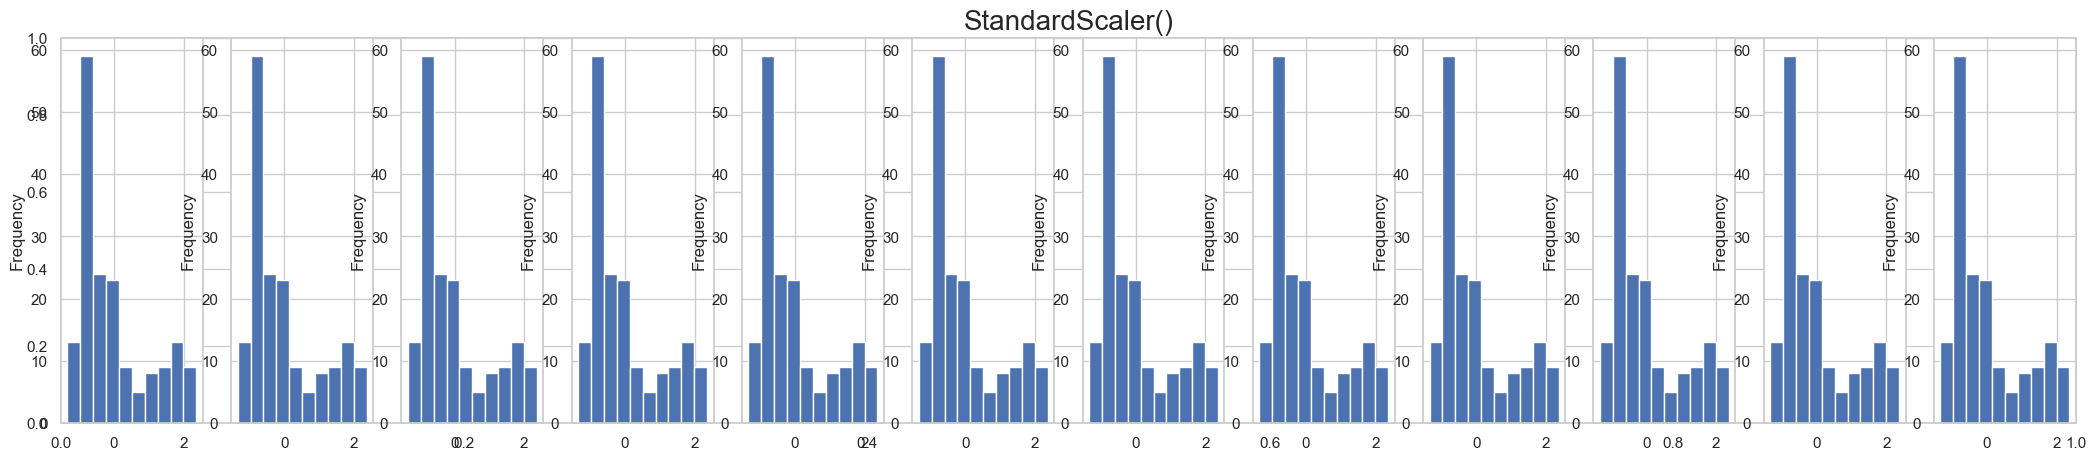

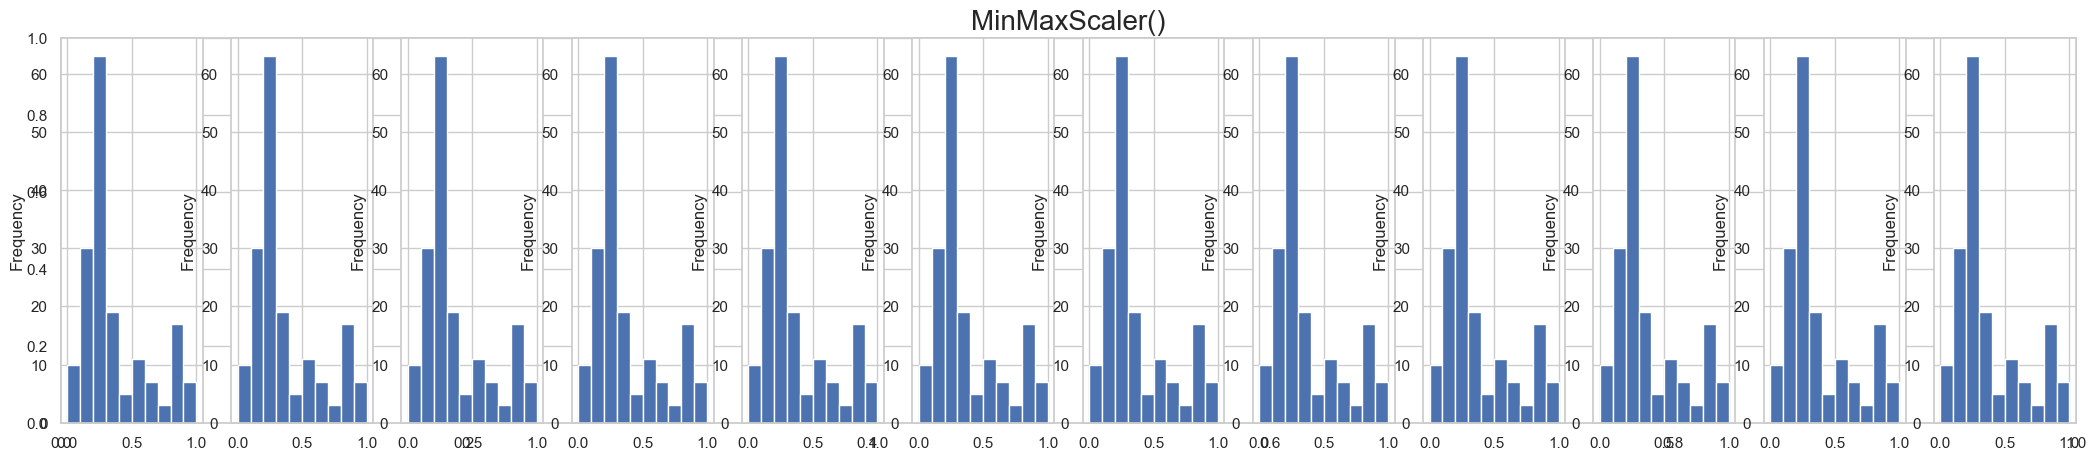

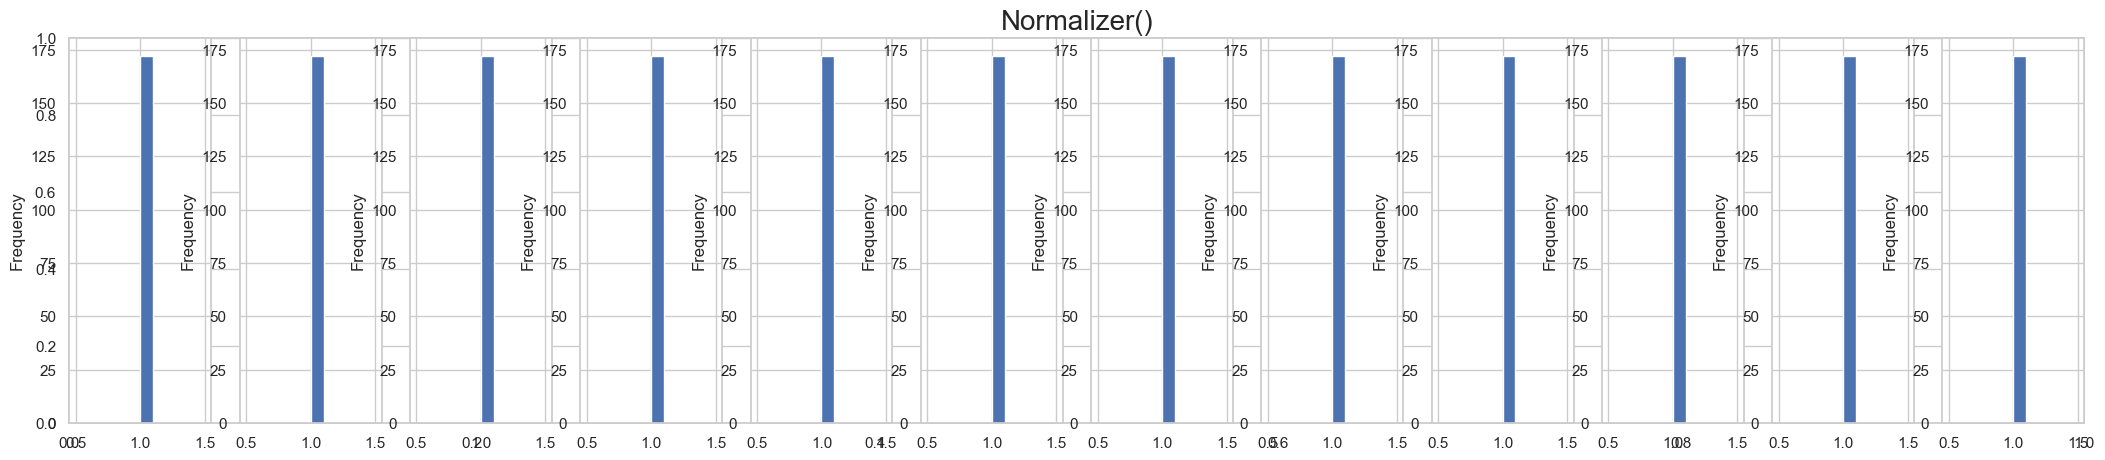

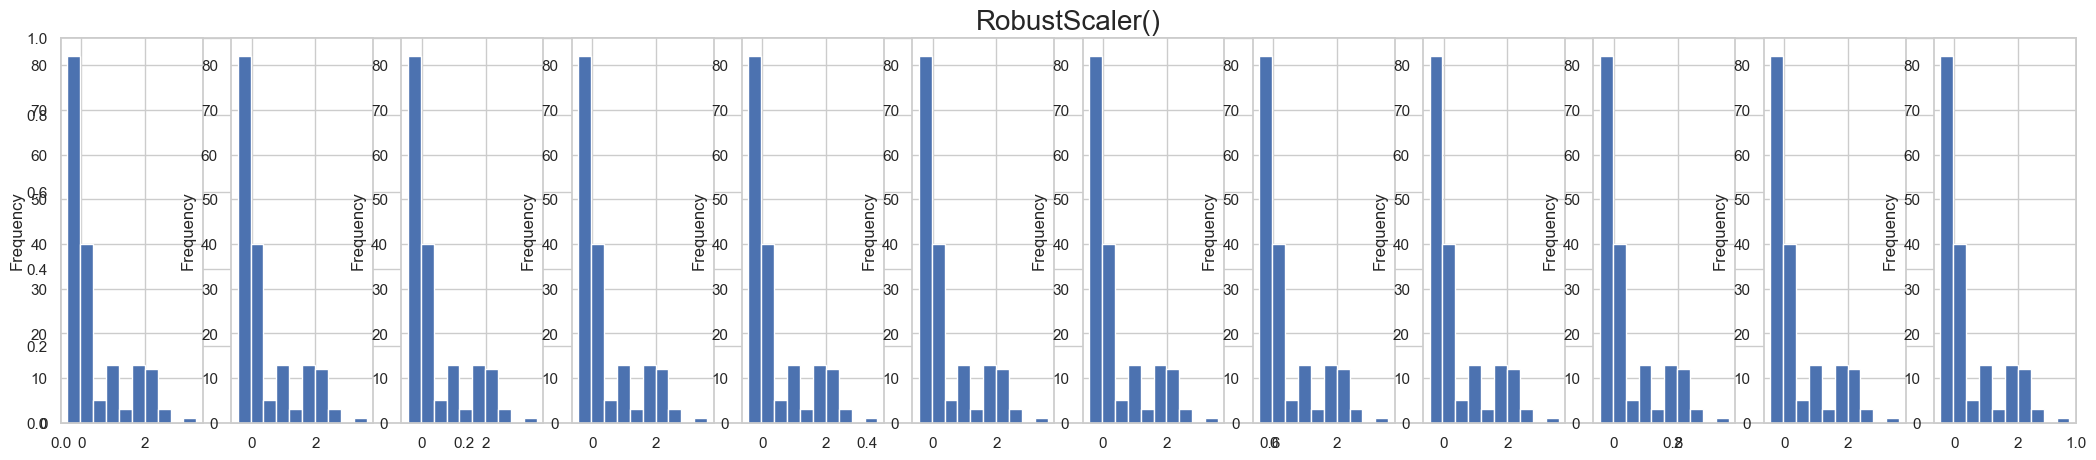

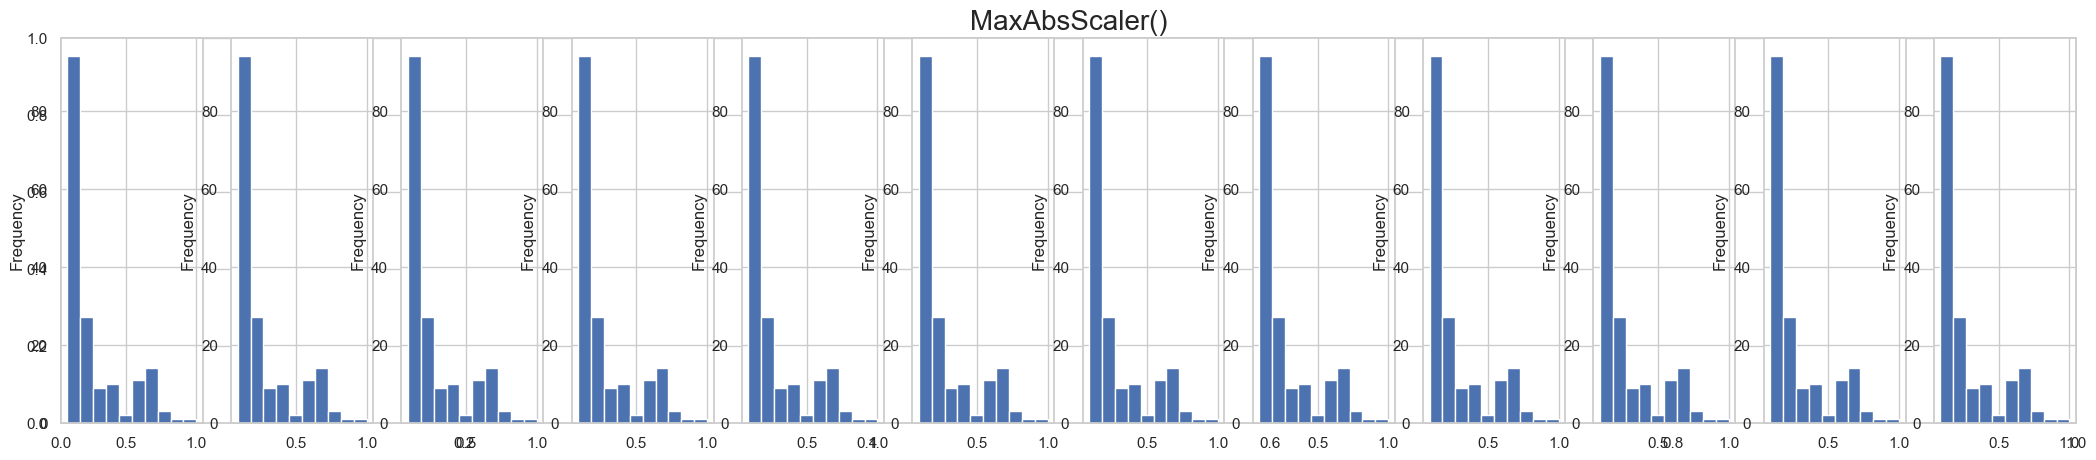

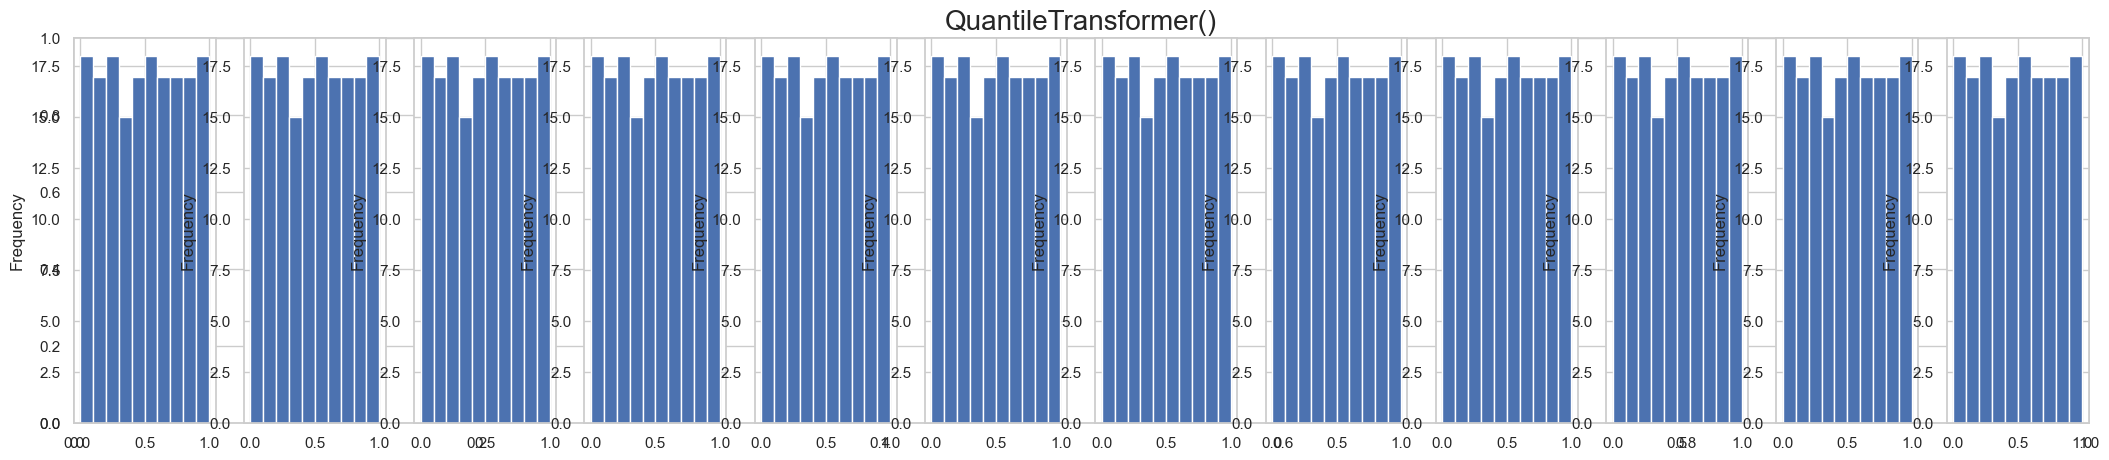

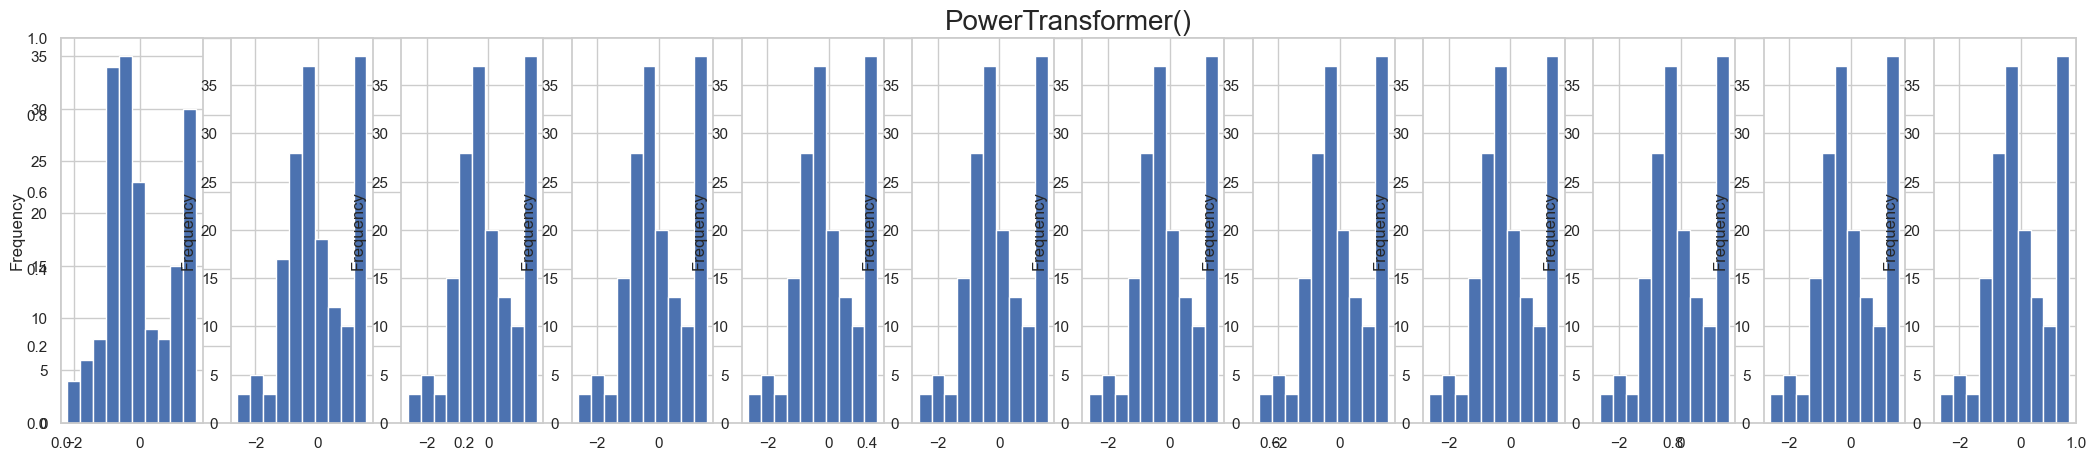

In [1515]:
#dados_scaler = dados[bandas_espectrais_12_todas].copy()

dados_scaler = dados[bandas[0:12]].copy()

#dados_scaler.drop('VALUE', inplace=True, axis=1)

scalers_list = [StandardScaler(), MinMaxScaler(), Normalizer(), RobustScaler(),
                MaxAbsScaler(), QuantileTransformer(), PowerTransformer()]


features_list = dados_scaler.columns

for i in range(len(scalers_list)):
    scaler = scalers_list[i]
    fig = plt.figure(figsize=(26,5))
    plt.title(scaler, fontsize= 20)
    for j in range(len(features_list)):
        var = features_list[i]
        
        model = scaler.fit(dados_scaler[var].values.reshape(-1,1))
        dados_scaler[var] = model.transform(dados_scaler[var].values.reshape(-1,1))
        
        sub = fig.add_subplot(1,len(features_list), j+1)
        sub.set_xlabel(var)
        dados_scaler[var].plot(kind = 'hist')

In [1516]:
del(dados_scaler)
del(model)

In [1517]:
verificar_transformacao_log = 0 # 0: nao / 1: sim

In [1518]:
if verificar_transformacao_log != 0:

    dados_scaler = np.log(dados[bandas_espectrais_12_todas])#dados[bandas_espectrais_12_todas].copy()

    #dados_scaler.drop('VALUE', inplace=True, axis=1)

    scalers_list = [StandardScaler(), MinMaxScaler(), Normalizer(), RobustScaler(),
                    MaxAbsScaler(), QuantileTransformer(), PowerTransformer()]


    features_list = dados_scaler.columns

    for i in range(len(scalers_list)):
        scaler = scalers_list[i]
        fig = plt.figure(figsize=(26,5))
        plt.title(scaler, fontsize= 20)
        for j in range(len(features_list)):
            var = features_list[i]

            model = scaler.fit(dados_scaler[var].values.reshape(-1,1))
            dados_scaler[var] = model.transform(dados_scaler[var].values.reshape(-1,1))

            sub = fig.add_subplot(1,len(features_list), j+1)
            sub.set_xlabel(var)
            dados_scaler[var].plot(kind = 'hist')

In [1519]:
if verificar_transformacao_log != 0:
    dados_scaler.describe()

In [1520]:
if verificar_transformacao_log != 0:

    dados_scaler = np.log10(dados[bandas_espectrais_12_todas])#dados[bandas_espectrais_12_todas].copy()

    #dados_scaler.drop('VALUE', inplace=True, axis=1)

    scalers_list = [StandardScaler(), MinMaxScaler(), Normalizer(), RobustScaler(),
                    MaxAbsScaler(), QuantileTransformer(), PowerTransformer()]


    features_list = dados_scaler.columns

    for i in range(len(scalers_list)):
        scaler = scalers_list[i]
        fig = plt.figure(figsize=(26,5))
        plt.title(scaler, fontsize= 20)
        for j in range(len(features_list)):
            var = features_list[i]

            model = scaler.fit(dados_scaler[var].values.reshape(-1,1))
            dados_scaler[var] = model.transform(dados_scaler[var].values.reshape(-1,1))

            sub = fig.add_subplot(1,len(features_list), j+1)
            sub.set_xlabel(var)
            dados_scaler[var].plot(kind = 'hist')

In [1521]:
if verificar_transformacao_log != 0:
    dados_scaler.describe()

In [1522]:
if verificar_transformacao_log != 0:
    np.log(dados[bandas]).describe()

In [1523]:
if verificar_transformacao_log != 0:
    np.log10(dados[bandas]).describe()

In [1524]:
if verificar_transformacao_log != 0:

    # Log - Transformação Logarítmica

    print('LOG - DEFINA A FORMA DE TRANSFORMAÇÃO LOGARÍTMICA DOS DADOS DE ENTRADA')
    print('------------------------------------------------------')
    print('------------------------------------------------------------------')
    print('Selecione uma das opções abaixo:')
    print('------------------------------------------------------------------')
    print('1: Manter Dados de Entrada')
    print('2: Log Normal')
    print('3: Log Base 10')
    print('------------------------------------------------------------------')
    codigo_log = int(input())
    print('------------------------------------------------------')

    if codigo_log == 1:
        print('Dados de Entrada Mantidos Sem Transformação')
    elif codigo_log == 2:
        #dados[bandas_espectrais_12_todas] = np.log(dados[bandas_espectrais_12_todas])
        dados[bandas] = np.log(dados[bandas])
        print('Log Normal: Dados de Entrada Transformados')
    elif codigo_log == 3:
        dados[bandas] = np.log10(dados[bandas])
        #dados[bandas_espectrais_12_todas] = np.log10(dados[bandas_espectrais_12_todas])
        print('Log Normal: Dados de Entrada Transformados')
    else:
        print('Dados de Entrada Mantidos Sem Transformação')

In [1525]:
#dados.head()

In [1526]:
#dados.shape

In [1527]:
# Removendo Infs

if verificar_transformacao_log != 0:

    if codigo_log == 1:
        dados.replace([np.inf, -np.inf], np.nan, inplace=True)
        dados.dropna(inplace= True)
        dados.shape
    else:
        dados.replace([np.inf, -np.inf], np.nan, inplace=True)
        dados.dropna(inplace= True, axis = 1)

        #del(dados['CLASSE'])
        bandas = dados.columns[0:(len(dados.columns)-1)]
        dados.shape

In [1528]:
#dados.shape

In [1529]:
#dados.head()

In [1530]:
# Skewness - Assimentria da Curva

In [1531]:
# Preparando a tabela para gravação

skews = pd.DataFrame()
columns_skew = ['Skew_Method','Skew_Median', 'Skew_Type']

skews = pd.DataFrame(columns=columns_skew)

skew_limit = 0.7

def tipo_skew(valor_medio_skew):
    if valor_medio_skew + skew_limit < 0:
        return "left skewed"
    elif valor_medio_skew > skew_limit:
        return"right skewed"
    else: 
        return "not skewed"

skews

Empty DataFrame
Columns: [Skew_Method, Skew_Median, Skew_Type]
Index: []

In [1532]:
# Verificação de Assimentria
# Skeness

# Skew StandardScaler
method_skew = 'Standard_Scaler'
dados_scaler = dados.drop('VALUE', axis=1)
model = StandardScaler().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
#skew_standard_scaler = skew(dados_scaler).mean()
skew_standard_scaler = np.median(skew(dados_scaler))
skew_tipo = tipo_skew(skew_standard_scaler)

skews = skews._append({'Skew_Method': method_skew, 'Skew_Median': skew_standard_scaler, 'Skew_Type': skew_tipo},
                    ignore_index=True)


# Skew MinMaxScaler()
method_skew = 'MinMaxScaler'
dados_scaler = dados.drop('VALUE', axis=1)
model = MinMaxScaler().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
#skew_standard_scaler = skew(dados_scaler).mean()
skew_standard_scaler = np.median(skew(dados_scaler))
skew_tipo = tipo_skew(skew_standard_scaler)

skews = skews._append({'Skew_Method': method_skew, 'Skew_Median': skew_standard_scaler, 'Skew_Type': skew_tipo},
                    ignore_index=True)


# Skew Normalizer()
method_skew = 'Normalizer'
dados_scaler = dados.drop('VALUE', axis=1)
model = Normalizer().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
#skew_standard_scaler = skew(dados_scaler).mean()
skew_standard_scaler = np.median(skew(dados_scaler))
skew_tipo = tipo_skew(skew_standard_scaler)

skews = skews._append({'Skew_Method': method_skew, 'Skew_Median': skew_standard_scaler, 'Skew_Type': skew_tipo},
                    ignore_index=True)


# Skew RobustScaler()
method_skew = 'RobustScaler()'
dados_scaler = dados.drop('VALUE', axis=1)
model = RobustScaler().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
skew_standard_scaler = skew(dados_scaler).mean()
skew_tipo = tipo_skew(skew_standard_scaler)

skews = skews._append({'Skew_Method': method_skew, 'Skew_Median': skew_standard_scaler, 'Skew_Type': skew_tipo},
                    ignore_index=True)


# Skew MaxAbsScaler()
method_skew = 'MaxAbsScaler'
dados_scaler = dados.drop('VALUE', axis=1)
model = MaxAbsScaler().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
#skew_standard_scaler = skew(dados_scaler).mean()
skew_standard_scaler = np.median(skew(dados_scaler))
skew_tipo = tipo_skew(skew_standard_scaler)

skews = skews._append({'Skew_Method': method_skew, 'Skew_Median': skew_standard_scaler, 'Skew_Type': skew_tipo},
                    ignore_index=True)


# Skew QuantileTransformer
method_skew = 'QuantileTransformer'
dados_scaler = dados.drop('VALUE', axis=1)
model = QuantileTransformer().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
#skew_standard_scaler = skew(dados_scaler).mean()
skew_standard_scaler = np.median(skew(dados_scaler))
skew_tipo = tipo_skew(skew_standard_scaler)

skews = skews._append({'Skew_Method': method_skew, 'Skew_Median': skew_standard_scaler, 'Skew_Type': skew_tipo},
                    ignore_index=True)


# Skew PowerTransformer
method_skew = 'PowerTransformer'
dados_scaler = dados.drop('VALUE', axis=1)
model = PowerTransformer().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
#skew_standard_scaler = skew(dados_scaler).mean()
skew_standard_scaler = np.median(skew(dados_scaler))
skew_tipo = tipo_skew(skew_standard_scaler)

skews = skews._append({'Skew_Method': method_skew, 'Skew_Median': skew_standard_scaler, 'Skew_Type': skew_tipo},
                    ignore_index=True)




#scalers_list = [StandardScaler(), MinMaxScaler(), Normalizer(), RobustScaler(),
#                MaxAbsScaler(), QuantileTransformer(), PowerTransformer()]


del(model, dados_scaler)
skews

Skew_Method  Skew_Median     Skew_Type
0      Standard_Scaler          NaN    not skewed
1         MinMaxScaler          NaN    not skewed
2           Normalizer     0.824034  right skewed
3       RobustScaler()          NaN    not skewed
4         MaxAbsScaler          NaN    not skewed
5  QuantileTransformer          NaN    not skewed
6     PowerTransformer          NaN    not skewed

In [1533]:
skew_zero = abs(skews['Skew_Median']).min()

skew_recomendado = skews['Skew_Method'][(skews['Skew_Median'].abs() <= skew_zero)].iloc[0]
skew_recomendado

'Normalizer'

In [1534]:
# Normalidade - Teste de Shapiro

In [1535]:
# Preparando a tabela para gravação

shapiros = pd.DataFrame()
columns_shapiro = ['Shapiro_Method','Shapiro_Median', 'Shapiro_Type']

shapiros = pd.DataFrame(columns=columns_shapiro)

shapiro_limit = 0.05

def tipo_shapiro(valor_medio_shapiro):
    if valor_medio_shapiro > shapiro_limit:
        return "Normal"
    else: 
        return "Not Normal"

shapiros

Empty DataFrame
Columns: [Shapiro_Method, Shapiro_Median, Shapiro_Type]
Index: []

In [1536]:
# Verificação de Normalidade
# Shapiro

# shapiro StandardScaler
method_shapiro = 'Standard_Scaler'
dados_scaler = dados.drop('VALUE', axis=1)
shapiro_list = []
model = StandardScaler().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
colunas_shapiro = list(dados.columns[0:-1])
dados_scaler = pd.DataFrame(dados_scaler, columns=colunas_shapiro)

i = 0
for column in dados_scaler.columns:
    try:
        shapiro_test = shapiro(dados_scaler[column])
        shapiro_list[i] = float(shapiro_list.append(shapiro_test.pvalue))
    except:
        shapiro_list[i] = 0.0
    i = 0 + 1

shapiro_median = np.median(shapiro_list)
shapiro_standard_scaler = shapiro_median
shapiro_tipo = tipo_shapiro(shapiro_standard_scaler)

shapiros = shapiros._append({'Shapiro_Method': method_shapiro, 'Shapiro_Median': shapiro_standard_scaler, 'Shapiro_Type': shapiro_tipo},
                    ignore_index=True)

#------------------------------------------

# shapiro  MinMaxScaler()
method_shapiro = ' MinMaxScaler'
dados_scaler = dados.drop('VALUE', axis=1)
shapiro_list = []
model =  MinMaxScaler().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
colunas_shapiro = list(dados.columns[0:-1])
dados_scaler = pd.DataFrame(dados_scaler, columns=colunas_shapiro)

i = 0
for column in dados_scaler.columns:
    try:
        shapiro_test = shapiro(dados_scaler[column])
        shapiro_list[i] = float(shapiro_list.append(shapiro_test.pvalue))
    except:
        shapiro_list[i] = 0.0
    i = 0 + 1

shapiro_median = np.median(shapiro_list)
shapiro_standard_scaler = shapiro_median
shapiro_tipo = tipo_shapiro(shapiro_standard_scaler)

shapiros = shapiros._append({'Shapiro_Method': method_shapiro, 'Shapiro_Median': shapiro_standard_scaler, 'Shapiro_Type': shapiro_tipo},
                    ignore_index=True)

#------------------------------------------

# shapiro  Normalizer()
method_shapiro = 'Normalizer'
dados_scaler = dados.drop('VALUE', axis=1)
shapiro_list = []
model =  Normalizer().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
colunas_shapiro = list(dados.columns[0:-1])
dados_scaler = pd.DataFrame(dados_scaler, columns=colunas_shapiro)

i = 0
for column in dados_scaler.columns:
    try:
        shapiro_test = shapiro(dados_scaler[column])
        shapiro_list[i] = float(shapiro_list.append(shapiro_test.pvalue))
    except:
        shapiro_list[i] = 0.0
    i = 0 + 1

shapiro_median = np.median(shapiro_list)
shapiro_standard_scaler = shapiro_median
shapiro_tipo = tipo_shapiro(shapiro_standard_scaler)

shapiros = shapiros._append({'Shapiro_Method': method_shapiro, 'Shapiro_Median': shapiro_standard_scaler, 'Shapiro_Type': shapiro_tipo},
                    ignore_index=True)

#------------------------------------------

# shapiro  RobustScaler()
method_shapiro = 'RobustScaler'
dados_scaler = dados.drop('VALUE', axis=1)
shapiro_list = []
model = RobustScaler().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
colunas_shapiro = list(dados.columns[0:-1])
dados_scaler = pd.DataFrame(dados_scaler, columns=colunas_shapiro)

i = 0
for column in dados_scaler.columns:
    try:
        shapiro_test = shapiro(dados_scaler[column])
        shapiro_list[i] = float(shapiro_list.append(shapiro_test.pvalue))
    except:
        shapiro_list[i] = 0.0
    i = 0 + 1

shapiro_median = np.median(shapiro_list)
shapiro_standard_scaler = shapiro_median
shapiro_tipo = tipo_shapiro(shapiro_standard_scaler)

shapiros = shapiros._append({'Shapiro_Method': method_shapiro, 'Shapiro_Median': shapiro_standard_scaler, 'Shapiro_Type': shapiro_tipo},
                    ignore_index=True)

#------------------------------------------

# shapiro  MaxAbsScaler()
method_shapiro = 'MaxAbsScaler'
dados_scaler = dados.drop('VALUE', axis=1)
shapiro_list = []
model = MaxAbsScaler().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
colunas_shapiro = list(dados.columns[0:-1])
dados_scaler = pd.DataFrame(dados_scaler, columns=colunas_shapiro)

i = 0
for column in dados_scaler.columns:
    try:
        shapiro_test = shapiro(dados_scaler[column])
        shapiro_list[i] = float(shapiro_list.append(shapiro_test.pvalue))
    except:
        shapiro_list[i] = 0.0
    i = 0 + 1

shapiro_median = np.median(shapiro_list)
shapiro_standard_scaler = shapiro_median
shapiro_tipo = tipo_shapiro(shapiro_standard_scaler)

shapiros = shapiros._append({'Shapiro_Method': method_shapiro, 'Shapiro_Median': shapiro_standard_scaler, 'Shapiro_Type': shapiro_tipo},
                    ignore_index=True)

#------------------------------------------

# shapiro  QuantileTransformer
method_shapiro = 'QuantileTransformer'
dados_scaler = dados.drop('VALUE', axis=1)
shapiro_list = []
model = QuantileTransformer().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
colunas_shapiro = list(dados.columns[0:-1])
dados_scaler = pd.DataFrame(dados_scaler, columns=colunas_shapiro)

i = 0
for column in dados_scaler.columns:
    try:
        shapiro_test = shapiro(dados_scaler[column])
        shapiro_list[i] = float(shapiro_list.append(shapiro_test.pvalue))
    except:
        shapiro_list[i] = 0.0
    i = 0 + 1

shapiro_median = np.median(shapiro_list)
shapiro_standard_scaler = shapiro_median
shapiro_tipo = tipo_shapiro(shapiro_standard_scaler)

shapiros = shapiros._append({'Shapiro_Method': method_shapiro, 'Shapiro_Median': shapiro_standard_scaler, 'Shapiro_Type': shapiro_tipo},
                    ignore_index=True)

#------------------------------------------

# shapiro PowerTransformer
method_shapiro = 'PowerTransformer'
dados_scaler = dados.drop('VALUE', axis=1)
shapiro_list = []
model = PowerTransformer().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
colunas_shapiro = list(dados.columns[0:-1])
dados_scaler = pd.DataFrame(dados_scaler, columns=colunas_shapiro)

i = 0
for column in dados_scaler.columns:
    try:
        shapiro_test = shapiro(dados_scaler[column])
        shapiro_list[i] = float(shapiro_list.append(shapiro_test.pvalue))
    except:
        shapiro_list[i] = 0.0
    i = 0 + 1

shapiro_median = np.median(shapiro_list)
shapiro_standard_scaler = shapiro_median
shapiro_tipo = tipo_shapiro(shapiro_standard_scaler)

shapiros = shapiros._append({'Shapiro_Method': method_shapiro, 'Shapiro_Median': shapiro_standard_scaler, 'Shapiro_Type': shapiro_tipo},
                    ignore_index=True)

del(model, dados_scaler)
shapiros

Shapiro_Method  Shapiro_Median Shapiro_Type
0      Standard_Scaler    1.003064e-07   Not Normal
1         MinMaxScaler    1.003066e-07   Not Normal
2           Normalizer    4.500494e-14   Not Normal
3         RobustScaler    1.003065e-07   Not Normal
4         MaxAbsScaler    1.003066e-07   Not Normal
5  QuantileTransformer    2.364132e-05   Not Normal
6     PowerTransformer    6.330650e-04   Not Normal

In [1537]:
shapiros['Delta_Normal'] = shapiros['Shapiro_Median'] - shapiro_limit
shapiros.sort_values(by='Delta_Normal', ascending=False).reset_index(drop=True)

Shapiro_Method  Shapiro_Median Shapiro_Type  Delta_Normal
0     PowerTransformer    6.330650e-04   Not Normal     -0.049367
1  QuantileTransformer    2.364132e-05   Not Normal     -0.049976
2         MaxAbsScaler    1.003066e-07   Not Normal     -0.050000
3         MinMaxScaler    1.003066e-07   Not Normal     -0.050000
4         RobustScaler    1.003065e-07   Not Normal     -0.050000
5      Standard_Scaler    1.003064e-07   Not Normal     -0.050000
6           Normalizer    4.500494e-14   Not Normal     -0.050000

In [1538]:
shapiro_max = shapiros['Shapiro_Median'].max()

shapiro_recomendado = shapiros['Shapiro_Method'][(shapiros['Shapiro_Median'] >= shapiro_max)].iloc[0]
shapiro_recomendado

'PowerTransformer'

In [1539]:
# Achatamento da Curva de Distribuição - Kurtosis

In [1540]:
# Preparando a tabela para gravação

kurts = pd.DataFrame()
columns_kurt = ['Kurt_Method','Kurt_Median', 'Kurt_Type']

kurts = pd.DataFrame(columns=columns_kurt)

kurt_limit = 3.0

def tipo_kurtosis(valor_medio_kurt):
    if valor_medio_kurt < kurt_limit:
        return "playkurtic"
    elif valor_medio_kurt > kurt_limit:
        return "leptokurtic"
    else: 
        return "normal"

kurts

Empty DataFrame
Columns: [Kurt_Method, Kurt_Median, Kurt_Type]
Index: []

In [1541]:
# Verificação de Assimentria
# Kurtosis

# Kurt StandardScaler
method_kurt = 'Standard_Scaler'
dados_scaler = dados.drop('VALUE', axis=1)
model = StandardScaler().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
#kurt_standard_scaler = kurtosis(dados_scaler).mean()
kurt_standard_scaler = np.median(kurtosis(dados_scaler))
kurt_tipo = tipo_kurtosis(kurt_standard_scaler)

kurts = kurts._append({'Kurt_Method': method_kurt, 'Kurt_Median': kurt_standard_scaler, 'Kurt_Type': kurt_tipo},
                    ignore_index=True)


# Kurt MinMaxScaler()
method_kurt = 'MinMaxScaler'
dados_scaler = dados.drop('VALUE', axis=1)
model = MinMaxScaler().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
#kurt_standard_scaler = kurtosis(dados_scaler).mean()
kurt_standard_scaler = np.median(kurtosis(dados_scaler))
kurt_tipo = tipo_kurtosis(kurt_standard_scaler)

kurts = kurts._append({'Kurt_Method': method_kurt, 'Kurt_Median': kurt_standard_scaler, 'Kurt_Type': kurt_tipo},
                    ignore_index=True)


# Kurt Normalizer()
method_kurt = 'Normalizer'
dados_scaler = dados.drop('VALUE', axis=1)
model = Normalizer().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
#kurt_standard_scaler = kurtosis(dados_scaler).mean()
kurt_standard_scaler = np.median(kurtosis(dados_scaler))
kurt_tipo = tipo_kurtosis(kurt_standard_scaler)

kurts = kurts._append({'Kurt_Method': method_kurt, 'Kurt_Median': kurt_standard_scaler, 'Kurt_Type': kurt_tipo},
                    ignore_index=True)


# Kurt RobustScaler()
method_kurt = 'RobustScaler()'
dados_scaler = dados.drop('VALUE', axis=1)
model = RobustScaler().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
kurt_standard_scaler = kurtosis(dados_scaler).mean()
kurt_tipo = tipo_kurtosis(kurt_standard_scaler)

kurts = kurts._append({'Kurt_Method': method_kurt, 'Kurt_Median': kurt_standard_scaler, 'Kurt_Type': kurt_tipo},
                    ignore_index=True)


# Kurt MaxAbsScaler()
method_kurt = 'MaxAbsScaler'
dados_scaler = dados.drop('VALUE', axis=1)
model = MaxAbsScaler().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
#kurt_standard_scaler = kurtosis(dados_scaler).mean()
kurt_standard_scaler = np.median(kurtosis(dados_scaler))
kurt_tipo = tipo_kurtosis(kurt_standard_scaler)

kurts = kurts._append({'Kurt_Method': method_kurt, 'Kurt_Median': kurt_standard_scaler, 'Kurt_Type': kurt_tipo},
                    ignore_index=True)


# Kurt QuantileTransformer
method_kurt = 'QuantileTransformer'
dados_scaler = dados.drop('VALUE', axis=1)
model = QuantileTransformer().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
#kurt_standard_scaler = kurtosis(dados_scaler).mean()
kurt_standard_scaler = np.median(kurtosis(dados_scaler))
kurt_tipo = tipo_kurtosis(kurt_standard_scaler)

kurts = kurts._append({'Kurt_Method': method_kurt, 'Kurt_Median': kurt_standard_scaler, 'Kurt_Type': kurt_tipo},
                    ignore_index=True)


# Kurt PowerTransformer
method_kurt = 'PowerTransformer'
dados_scaler = dados.drop('VALUE', axis=1)
model = PowerTransformer().fit(dados_scaler)
dados_scaler = model.transform(dados_scaler)
#kurt_standard_scaler = kurtosis(dados_scaler).mean()
kurt_standard_scaler = np.median(kurtosis(dados_scaler))
kurt_tipo = tipo_kurtosis(kurt_standard_scaler)

kurts = kurts._append({'Kurt_Method': method_kurt, 'Kurt_Median': kurt_standard_scaler, 'Kurt_Type': kurt_tipo},
                    ignore_index=True)




#scalers_list = [StandardScaler(), MinMaxScaler(), Normalizer(), RobustScaler(),
#                MaxAbsScaler(), QuantileTransformer(), PowerTransformer()]


del(model, dados_scaler)
kurts

Kurt_Method  Kurt_Median   Kurt_Type
0      Standard_Scaler          NaN      normal
1         MinMaxScaler          NaN      normal
2           Normalizer     0.583438  playkurtic
3       RobustScaler()          NaN      normal
4         MaxAbsScaler          NaN      normal
5  QuantileTransformer          NaN      normal
6     PowerTransformer          NaN      normal

In [1542]:
kurts['Delta_Normal'] = abs(kurts['Kurt_Median'] - kurt_limit)
kurts.sort_values(by='Delta_Normal', ascending=True).reset_index(drop=True)

Kurt_Method  Kurt_Median   Kurt_Type  Delta_Normal
0           Normalizer     0.583438  playkurtic      2.416562
1      Standard_Scaler          NaN      normal           NaN
2         MinMaxScaler          NaN      normal           NaN
3       RobustScaler()          NaN      normal           NaN
4         MaxAbsScaler          NaN      normal           NaN
5  QuantileTransformer          NaN      normal           NaN
6     PowerTransformer          NaN      normal           NaN

In [1543]:
kurt_min = kurts['Delta_Normal'].min()

kurt_recomendado = kurts['Kurt_Method'][(kurts['Delta_Normal'] <= kurt_min)].iloc[0]
kurt_recomendado

'Normalizer'

In [1544]:
# Scaler Métodos - Escolha uma forma de normalização/transformação de dados

print('SCALER - DEFINA A FORMA DE TRANSFORMAÇÃO DE DADOS DE ENTRADA')
print('------------------------------------------------------')
print(f'Skewness: Método Scaler com Menor Assimentria: {skew_recomendado}')
print(f'Shapiro: Método Scaler Mais Próximo da Normalidade: {shapiro_recomendado}')
print(f'Kurtosis: Método Scaler Mais Próximo da Normalidade: {kurt_recomendado}')
print('------------------------------------------------------')
print('------------------------------------------------------------------')
print('Selecione uma das opções abaixo:')
print('------------------------------------------------------------------')
print('1: Standard Scaler')
print('2: MinMax Scaler')
print('3: Normalizer Scaler')
print('4: Robust Scaler')
print('5: MaxAbs Scaler')
print('6: Quantile Scaler')
print('7: PowerTransformer Scaler')
print('------------------------------------------------------------------')
codigo_scaler = int(input())
print('------------------------------------------------------')

if codigo_scaler == 1:
    sc = StandardScaler()
elif codigo_scaler == 2:
    sc = MinMaxScaler()
elif codigo_scaler == 3:
    sc = Normalizer()
elif codigo_scaler == 4:
    sc = RobustScaler()
elif codigo_scaler == 5:
    sc = MaxAbsScaler()
elif codigo_scaler == 6:
    sc = QuantileTransformer()
elif codigo_scaler == 7:
    sc = PowerTransformer()
else:
    sc = StandardScaler()

# teste para evitar problemas durante o treinamento dos modelos
try:
    dados_scaler = dados.drop('VALUE', axis=1)
    model = sc.fit(dados_scaler)
    dados_scaler = model.transform(dados_scaler)
except:
    codigo_scaler == 1
    sc = StandardScaler()

try:
    del(model)
    del(dados_scaler)
except:
    pass

SCALER - DEFINA A FORMA DE TRANSFORMAÇÃO DE DADOS DE ENTRADA
------------------------------------------------------
Skewness: Método Scaler com Menor Assimentria: Normalizer
Shapiro: Método Scaler Mais Próximo da Normalidade: PowerTransformer
Kurtosis: Método Scaler Mais Próximo da Normalidade: Normalizer
------------------------------------------------------
------------------------------------------------------------------
Selecione uma das opções abaixo:
------------------------------------------------------------------
1: Standard Scaler
2: MinMax Scaler
3: Normalizer Scaler
4: Robust Scaler
5: MaxAbs Scaler
6: Quantile Scaler
7: PowerTransformer Scaler
------------------------------------------------------------------
1
------------------------------------------------------


In [1545]:
# Definição da Forma de Execução dos Modelos

In [1546]:
# Definindo variáveis
global cod_rodar_todos_modelos #(1: Sim; 0: Não)
global cod_fluxo_completo_variaveis #(1: Sim; 0: Não)
global cod_importancia_modelo #(1: importante; 0: não importante)
global method
global cod_execucao_modelos

In [1547]:
print('FORMA DE EXECUÇÃO DOS MODELOS')
print('------------------------------------------------------------------')
print('Selecione uma das opções abaixo (informe um número entre 1 e 4):')
print('------------------------------------------------------------------')
print('1: Executar Todos os Modelos Com Todas as Variações de Bandas')
print('2: Executar Modelos Principais Com Todas as Variações de Bandas')
print('3: Executar Modelos Principais Apenas com as Variações de Bandas Principais')
print('4: Executar Todos os Modelos e Apenas com as Variações de Bandas Principais')

print('------------------------------------------------------')
modo_execucao = int(input())
print('------------------------------------------------------')
      
if modo_execucao == 1:
    cod_rodar_todos_modelos = 1
    cod_fluxo_completo_variaveis = 1
    print('1: Executar Todos os Modelos Com Todas as Variações de Bandas')

elif modo_execucao == 2:
    cod_rodar_todos_modelos = 0
    cod_fluxo_completo_variaveis = 1
    print('2: Executar Modelos Principais Com Todas as Variações de Bandas')
      
elif modo_execucao == 3:
    cod_rodar_todos_modelos = 0
    cod_fluxo_completo_variaveis = 0
    print('3: Executar Modelos Principais Apenas com as Variações de Bandas Principais')

else:
    cod_rodar_todos_modelos = 1
    cod_fluxo_completo_variaveis = 0
    print('4: Executar Todos os Modelos e Apenas com as Variações de Bandas Principais')

print(f'Código de Execução dos Modelos: {cod_rodar_todos_modelos}')
print(f'Código de Seleçaõ de Variáveis: {cod_fluxo_completo_variaveis}')

FORMA DE EXECUÇÃO DOS MODELOS
------------------------------------------------------------------
Selecione uma das opções abaixo (informe um número entre 1 e 4):
------------------------------------------------------------------
1: Executar Todos os Modelos Com Todas as Variações de Bandas
2: Executar Modelos Principais Com Todas as Variações de Bandas
3: Executar Modelos Principais Apenas com as Variações de Bandas Principais
4: Executar Todos os Modelos e Apenas com as Variações de Bandas Principais
------------------------------------------------------
1
------------------------------------------------------
1: Executar Todos os Modelos Com Todas as Variações de Bandas
Código de Execução dos Modelos: 1
Código de Seleçaõ de Variáveis: 1


In [1548]:
# Definindo Modelos Não Importantes
modelos_nao_importantes = ['Bagging Regressor',
'Huber Regressor',
'Hybrid Method',
'Poisson Regressor',
'Histogram-based Regressor',
'Ransac',
'Tweedie Regressor',
'SGD',
'Bayesian Ridge Regression',
'Orthogonal Matching Pursuit',
'ARD',
'Ridge CV',
'Gaussian Process Regression',
'Theil Sen',
'Passive Aggressive Regressor',
'Decision Tree Regressor',
'AdaBoost Regressor',
'ANN 4L, 256N',
'KNN Regressor',
'ANN - 1L_N',
'Lasso CV',
'ANN - 2L_N',
#'ANN 5L_100N', #
'CatBoost',
'ANN 7L_256N_dec_4N', #
#'ANN - 3L_64',
'LightGBM',
'ANN - 3L_100_50_25',
'ANN - 5L_11N_dec_3N', #
'ANN 7L_256N_dec_4N',
'ANN - Extreme_10KN',
'Random Forest Regressor',
'XGboost Regressor',
'Ensamble Regressor',
'Polinomio'#novo
]

In [1549]:
# Função de Seleção da Forma de Execução dos Modelos Implementados

def modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method):
    # global cod_rodar_todos_modelos #(1: Sim; 0: Não)
    # global cod_fluxo_completo_variaveis #(1: Sim; 0: Não)
    # global cod_importancia_modelo #(1: importante; 0: não importante)
    # global method
    global cod_execucao_modelos


# 1- Executar Todos os Modelos Com Todas as Variações de Bandas
# 2- Executar Modelos Principais Com Todas as Variações de Bandas
# 3- Executar Modelos Principais Apenas com as Variações de Bandas Principais
# 4- Executar Todos os Modelos e Apenas com as Variações de Bandas Principais

    if method in modelos_nao_importantes:
        cod_importancia_modelo = 0
    else:
        cod_importancia_modelo = 1
        

    if (cod_rodar_todos_modelos == 1) & (cod_fluxo_completo_variaveis == 1) & (cod_importancia_modelo in (1,0)):
        cod_execucao_modelos = 1

    elif (cod_rodar_todos_modelos == 0) & (cod_fluxo_completo_variaveis == 1) & (cod_importancia_modelo == 1):
        cod_execucao_modelos = 2

    elif (cod_rodar_todos_modelos == 0) & (cod_fluxo_completo_variaveis == 0) & (cod_importancia_modelo == 1):
        cod_execucao_modelos = 3
        
    elif (cod_rodar_todos_modelos == 0) & (cod_fluxo_completo_variaveis == 1) & (cod_importancia_modelo == 0):
        cod_execucao_modelos = 5

    else:
        cod_execucao_modelos = 4

    return cod_execucao_modelos #, print(f'Código de Execução: {cod_execucao_modelos}')

In [1550]:
#cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, cod_importancia_modelo

In [1551]:
#cod_rodar_todos_modelos, cod_fluxo_completo_variaveis#, cod_importancia_modelo

In [1552]:
# TEMPO DE EXECUÇÃO

In [1553]:
# Verificar tempo - Início
tempo_inicial = time.time() # em segundos

# Estratificação Regressão

dados.head()

samples_per_bin, bins, = np.histogram(dados, bins='doane')    # Doane's method worked best for me

min_bin_size = samples_per_bin.min()

# compute the maximum batch size possible, using all samples from the bin with lowest population
n_bins = len(samples_per_bin)
#max_batch = min_samples_single_bin * n_bins

min_bin_size, samples_per_bin, bins, n_bins

from verstack.stratified_continuous_split import scsplit

treino, teste = scsplit(dados, stratify = dados['VALUE'])

teste

X_treino, X_teste, y_treino, y_teste = train_test_split(dados.drop('VALUE', axis=1), dados['VALUE'], test_size=percentual_dados_teste, random_state=random_fixo)

treino['VALUE'].plot(kind = 'hist')

y_treino.plot(kind = 'hist')

teste['VALUE'].plot(kind = 'hist')

y_teste.plot(kind = 'hist')

train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(dados.drop('VALUE', axis=1), dados['VALUE'], test_size=percentual_dados_teste, random_state=random_fixo)

y_teste.plot(kind = 'hist')

y_treino.plot(kind = 'hist')

y_teste.describe()

teste['VALUE'].describe()

y_treino.describe()

treino['VALUE'].describe()

del(X_treino, X_teste, y_treino, y_teste)

## APLICAÇÃO DOS MODELOS DE INTELIGÊNCIA ARTIFICIAL ##

In [1554]:
## Modelos de Inteligência Artificial ##

In [1555]:
# Regressão Linear

In [1556]:
# Nome do método utilizado
method = 'Linear Regression'

In [1557]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1558]:
if cod_execucao_modelos in (3, 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


    modelo_regressao_linear = LinearRegression()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_regressao_linear.fit(X_train, y_train)

        predictions = modelo_regressao_linear.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [1559]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

   
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1560]:
#results_frame
#results_frame = results_frame[0:0]

In [1561]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1562]:
# Criando tabela temporária para regsitrar todas as variações

In [1563]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1564]:
# Regressão Linear - Todas as Variações de Bandas

In [1565]:
#seleciona_dados_melhor_modelo(1), seletor_bandas

In [1566]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):


        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_regressao_linear = LinearRegression(n_jobs=-1)  

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_regressao_linear.fit(X_train, y_train)

            predictions = modelo_regressao_linear.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)

            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1567]:
seletor_bandas, listas_variveis_selecionadas[39],i

('Todas as Colunas', ['BAND_2', 'BAND_3', 'BAND_4', 'BAND_5'], 43)

In [1568]:
results_frame_temp

Method Samples Train/Test        Split Mode          R2  \
0   Linear Regression     172     137/35  Cross-validation    0.221065   
1   Linear Regression     172     137/35  Cross-validation   -0.267119   
2   Linear Regression     172     137/35  Cross-validation   -0.025521   
3   Linear Regression     172     137/35  Cross-validation    0.459183   
4   Linear Regression     172     137/35  Cross-validation    0.476887   
5   Linear Regression     172     137/35  Cross-validation    0.542250   
6   Linear Regression     172     137/35  Cross-validation    0.426112   
7   Linear Regression     172     137/35  Cross-validation    0.375791   
8   Linear Regression     172     137/35  Cross-validation    0.553825   
9   Linear Regression     172     137/35  Cross-validation    0.426573   
10  Linear Regression     172     137/35  Cross-validation    0.388050   
11  Linear Regression     172     137/35  Cross-validation    0.062014   
12  Linear Regression     172     137/35  Cross-validation   -0.651803   
13  Linear Regression     172     137/35  Cross-validation    0.431372   
14  Linear Regression     172     137/35  Cross-validation    0.365270   
15  Linear Regression     172     137/35  Cross-validation   -0.025521   
16  Linear Regression     172     137/35  Cross-validation    0.538185   
17  Linear Regression     172     137/35  Cross-validation    0.556608   
18  Linear Regression     172     137/35  Cross-validation    0.118604   
19  Linear Regression     172     137/35  Cross-validation    0.337575   
20  Linear Regression     172     137/35  Cross-validation    0.354211   
21  Linear Regression     172     137/35  Cross-validation    0.525284   
22  Linear Regression     172     137/35  Cross-validation    0.531002   
23  Linear Regression     172     137/35  Cross-validation    0.547998   
24  Linear Regression     172     137/35  Cross-validation    0.542823   
25  Linear Regression     172     137/35  Cross-validation    0.293767   
26  Linear Regression     172     137/35  Cross-validation    0.323291   
27  Linear Regression     172     137/35  Cross-validation    0.466291   
28  Linear Regression     172     137/35  Cross-validation    0.375625   
29  Linear Regression     172     137/35  Cross-validation    0.320668   
30  Linear Regression     172     137/35  Cross-validation    0.214197   
31  Linear Regression     172     137/35  Cross-validation    0.392821   
32  Linear Regression     172     137/35  Cross-validation    0.165138   
33  Linear Regression     172     137/35  Cross-validation    0.527681   
34  Linear Regression     172     137/35  Cross-validation   -0.032903   
35  Linear Regression     172     137/35  Cross-validation    0.376102   
36  Linear Regression     172     137/35  Cross-validation  -34.971728   
37  Linear Regression     172     137/35  Cross-validation -112.955780   

          MSE      RMSE       MAE      MAPE               Selector_Data  \
0    0.738991  0.775947  0.395619  0.308024           Bandas Frequentes   
1    0.972603  0.865619  0.410271  0.282115                  Correlação   
2    0.860314  0.882619  0.639403  0.619066               Colinearidade   
3    0.497670  0.641476  0.379238  0.310994                      Mutual   
4    0.454046  0.627436  0.357973  0.290334                      Linear   
5    0.418465  0.589095  0.370054  0.284861                       Lasso   
6    0.563237  0.672146  0.425410  0.358825               Random Forest   
7    0.521034  0.661419  0.364904  0.306011                     XGBoost   
8    0.366929  0.575759  0.323134  0.261724                    Stepwise   
9    0.538868  0.670274  0.425529  0.387429                  Stepwise F   
10   0.501975  0.643429  0.367857  0.260281                  Stepwise B   
11   0.774773  0.827949  0.566658  0.512891                         PCA   
12   1.177319  0.950986  0.460084  0.361357                      Boruta   
13   0.495498  0.657324  0.405137  0.355860                    Genetica   
14 

In [1569]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [1570]:
results_frame_temp

Method Samples Train/Test        Split Mode          R2  \
1   Linear Regression     172     137/35  Cross-validation    0.556608   
2   Linear Regression     172     137/35  Cross-validation    0.553825   
3   Linear Regression     172     137/35  Cross-validation    0.547998   
4   Linear Regression     172     137/35  Cross-validation    0.542823   
5   Linear Regression     172     137/35  Cross-validation    0.542250   
6   Linear Regression     172     137/35  Cross-validation    0.538185   
7   Linear Regression     172     137/35  Cross-validation    0.531002   
8   Linear Regression     172     137/35  Cross-validation    0.527681   
9   Linear Regression     172     137/35  Cross-validation    0.525284   
10  Linear Regression     172     137/35  Cross-validation    0.476887   
11  Linear Regression     172     137/35  Cross-validation    0.466291   
12  Linear Regression     172     137/35  Cross-validation    0.459183   
13  Linear Regression     172     137/35  Cross-validation    0.431372   
14  Linear Regression     172     137/35  Cross-validation    0.426573   
15  Linear Regression     172     137/35  Cross-validation    0.426112   
16  Linear Regression     172     137/35  Cross-validation    0.392821   
17  Linear Regression     172     137/35  Cross-validation    0.388050   
18  Linear Regression     172     137/35  Cross-validation    0.376102   
19  Linear Regression     172     137/35  Cross-validation    0.375791   
20  Linear Regression     172     137/35  Cross-validation    0.375625   
21  Linear Regression     172     137/35  Cross-validation    0.365270   
22  Linear Regression     172     137/35  Cross-validation    0.354211   
23  Linear Regression     172     137/35  Cross-validation    0.337575   
24  Linear Regression     172     137/35  Cross-validation    0.323291   
25  Linear Regression     172     137/35  Cross-validation    0.320668   
26  Linear Regression     172     137/35  Cross-validation    0.293767   
27  Linear Regression     172     137/35  Cross-validation    0.221065   
28  Linear Regression     172     137/35  Cross-validation    0.214197   
29  Linear Regression     172     137/35  Cross-validation    0.165138   
30  Linear Regression     172     137/35  Cross-validation    0.118604   
31  Linear Regression     172     137/35  Cross-validation    0.062014   
32  Linear Regression     172     137/35  Cross-validation   -0.025521   
33  Linear Regression     172     137/35  Cross-validation   -0.025521   
34  Linear Regression     172     137/35  Cross-validation   -0.032903   
35  Linear Regression     172     137/35  Cross-validation   -0.267119   
36  Linear Regression     172     137/35  Cross-validation   -0.651803   
37  Linear Regression     172     137/35  Cross-validation  -34.971728   
38  Linear Regression     172     137/35  Cross-validation -112.955780   

          MSE      RMSE       MAE      MAPE               Selector_Data  \
1    0.425347  0.584524  0.337654  0.277832                 Falsa_Cor_1   
2    0.366929  0.575759  0.323134  0.261724                    Stepwise   
3    0.418430  0.590811  0.351553  0.319502              Infra_Vermelho   
4    0.418359  0.589111  0.370908  0.295559                  Batimetria   
5    0.418465  0.589095  0.370054  0.284861                       Lasso   
6    0.448223  0.598971  0.377037  0.293349                 Visivel_RGB   
7    0.454345  0.604468  0.360150  0.295197               Cor_Atmosfera   
8    0.438776  0.602614  0.384648  0.310089  Bandas Espectrais Água (4)   
9    0.430156  0.601794  0.355442  0.320706                  Terra_Agua   
10   0.454046  0.627436  0.357973  0.290334                      Linear   
11   0.507104  0.647671  0.418176  0.370479                     Banda_3   
12   0.497670  0.641476  0.379238  0.310994                      Mutual   
13   0.495498  0.657324  0.405137  0.355860                    Genetica   
14   0.538868  0.670274  0.425529  0.387429                  Stepwise F   
15 

In [1571]:
# Adicionando os resultados na tabela global

In [1572]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },

                                         ignore_index=True)

In [1573]:
results_frame

Method Samples Train/Test        Split Mode        R2       MSE  \
0  Linear Regression     172     137/35  Cross-validation  0.556608  0.425347   

       RMSE       MAE      MAPE Selector_Data N_Variables  \
0  0.584524  0.337654  0.277832   Falsa_Cor_1           3   

                  Variables  
0  [BAND_8, BAND_4, BAND_3]

In [1574]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_regressao_linear
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_regressao_linear))
    #del(modelo_regressao_linear)
except:
    pass

['BAND_8', 'BAND_4', 'BAND_3']
<class 'sklearn.linear_model._base.LinearRegression'>


In [1575]:
# Árvore de Decisão - Regressão

In [1576]:
method = 'Decision Tree Regressor'

In [1577]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1578]:
if (cod_execucao_modelos == 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []
    
    modelo_arvore_decisao = DecisionTreeRegressor()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_arvore_decisao.fit(X_train, y_train)
        #scores.append(modelo.score(X_test, y_test))

        predictions = modelo_arvore_decisao.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)

        #print("---------------------------------------")
        clear_output()

In [1579]:
if cod_execucao_modelos == 4:
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

   
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1580]:
#results_frame

In [1581]:
if cod_execucao_modelos == 4:
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1582]:
# Criando tabela temporária para regsitrar todas as variações

In [1583]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1584]:
# Árvore de Decisão - Todas as Variações de Banda

In [1585]:
if cod_execucao_modelos == 1:

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_arvore_decisao = DecisionTreeRegressor() 

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_arvore_decisao.fit(X_train, y_train)

            predictions = modelo_arvore_decisao.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)

            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)


        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1586]:
if cod_execucao_modelos == 1:
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

#results_frame_temp

In [1587]:
if cod_execucao_modelos == 1:
    results_frame_temp.iloc[0,:]

In [1588]:
if cod_execucao_modelos == 1:
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1589]:
results_frame

Method Samples Train/Test        Split Mode        R2  \
0        Linear Regression     172     137/35  Cross-validation  0.556608   
1  Decision Tree Regressor     172     137/35  Cross-validation  0.297207   

        MSE      RMSE       MAE      MAPE             Selector_Data  \
0  0.425347  0.584524  0.337654  0.277832               Falsa_Cor_1   
1  0.659597  0.716018  0.387701  0.274406  Bandas Desvio Padrao Min   

  N_Variables                                          Variables  
0           3                           [BAND_8, BAND_4, BAND_3]  
1         130  [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...

In [1590]:
try:
    # Verificando se é o melhor modelo até o momento
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_arvore_decisao
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_arvore_decisao))
    #del(modelo_arvore_decisao)
except:
    pass

In [1591]:
# Extremely Randomized Trees (Extra-Trees)

In [1592]:
method = 'Extra-Trees Regressor'

In [1593]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1594]:
if cod_execucao_modelos in (3, 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    #method = results_frame['Method'].iloc[0]

    modelo_extra_tree = ExtraTreesRegressor()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_extra_tree.fit(X_train, y_train)

        predictions = modelo_extra_tree.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [1595]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    #R2, MSE, RMSE, MAE, MAPE

    #print('Method: ', method)
    #print("R2 = ", R2)
    #print("MSE = ", MSE)
    #print("RMSE = ", RMSE)
    #print("MAE = ", MAE)
    #print("MAPE = ", MAPE)
    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1596]:
#results_frame
#results_frame = results_frame[0:0]

In [1597]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1598]:
# Criando tabela temporária para regsitrar todas as variações

In [1599]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1600]:
# Extremely Randomized Trees (Extra-Trees) - Todas as Variações de Bandas

In [1601]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_extra_tree = ExtraTreesRegressor(n_jobs=-1) 

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_extra_tree.fit(X_train, y_train)

            predictions = modelo_extra_tree.predict(X_test)

            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)

            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1602]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [1603]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [1604]:
# Adicionando os resultados na tabela global

In [1605]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1606]:
results_frame

Method Samples Train/Test        Split Mode        R2  \
0        Linear Regression     172     137/35  Cross-validation  0.556608   
1  Decision Tree Regressor     172     137/35  Cross-validation  0.297207   
2    Extra-Trees Regressor     172     137/35  Cross-validation  0.653087   

        MSE      RMSE       MAE      MAPE             Selector_Data  \
0  0.425347  0.584524  0.337654  0.277832               Falsa_Cor_1   
1  0.659597  0.716018  0.387701  0.274406  Bandas Desvio Padrao Min   
2  0.365722  0.523075  0.263333  0.197062         Bandas FeatureWiz   

  N_Variables                                          Variables  
0           3                           [BAND_8, BAND_4, BAND_3]  
1         130  [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...  
2          12  [EVI, MACCIONI, HUE, DATT6, MSR, AFRI1600, D67...

In [1607]:
try:
# Verificando se é o melhor modelo até o momento
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_extra_tree
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(modelo_extra_tree)
        print(type(modelo_extra_tree))
    #del(modelo_extra_tree)
except:
    pass

ExtraTreesRegressor(n_jobs=-1)
<class 'sklearn.ensemble._forest.ExtraTreesRegressor'>


In [1608]:
# Random Forest

In [1609]:
method = 'Random Forest Regressor'

In [1610]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1611]:
if cod_execucao_modelos in (3, 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    modelo_random_forest = RandomForestRegressor() #rfr()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_random_forest.fit(X_train, y_train)

        predictions = modelo_random_forest.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [1612]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

   
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1613]:
#results_frame
#results_frame = results_frame[0:0]

In [1614]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1615]:
# Criando tabela temporária para regsitrar todas as variações

In [1616]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1617]:
# Todas as Variações de Bandas para o Modelo

In [1618]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        #print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {16}')
        #contador_ciclo += 1

        #scores = []
        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_random_forest = RandomForestRegressor(n_jobs=-1) #rfr()

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_random_forest.fit(X_train, y_train)

            predictions = modelo_random_forest.predict(X_test)

            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1619]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [1620]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [1621]:
# Adicionando os resultados na tabela global

In [1622]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1623]:
results_frame

Method Samples Train/Test        Split Mode        R2  \
0        Linear Regression     172     137/35  Cross-validation  0.556608   
1  Decision Tree Regressor     172     137/35  Cross-validation  0.297207   
2    Extra-Trees Regressor     172     137/35  Cross-validation  0.653087   
3  Random Forest Regressor     172     137/35  Cross-validation  0.666219   

        MSE      RMSE       MAE      MAPE             Selector_Data  \
0  0.425347  0.584524  0.337654  0.277832               Falsa_Cor_1   
1  0.659597  0.716018  0.387701  0.274406  Bandas Desvio Padrao Min   
2  0.365722  0.523075  0.263333  0.197062         Bandas FeatureWiz   
3  0.356421  0.518469  0.290243  0.224450                  Genetica   

  N_Variables                                          Variables  
0           3                           [BAND_8, BAND_4, BAND_3]  
1         130  [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...  
2          12  [EVI, MACCIONI, HUE, DATT6, MSR, AFRI1600, D67...  
3          11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...

In [1624]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_random_forest
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_random_forest))
    #del(modelo_random_forest)
except:
    pass

['ALTERATION', 'ARVI2', 'LATERITE', 'LWCI', 'MCARI/OSAVI', 'NDII', 'RDVI', 'RDVI2', 'SAVI', 'SBL', 'SQRT_IR_R']
<class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [1625]:
# Polinômio

In [1626]:
method = 'Polinomio'

In [1627]:
x_values = dados[bandas_mais_frequentes].values
y_values = dados['VALUE'].values

In [1628]:
# Identificando melhor grau do Polinômio
try:

    number_degrees = [1,2,3,4,5]
    plt_mean_squared_error = []
    for degree in number_degrees:
        poly_model = PolynomialFeatures(degree=degree)

        poly_x_values = poly_model.fit_transform(x_values)

        poly_model.fit(poly_x_values, y_values)

        regression_model = LinearRegression()

        regression_model.fit(poly_x_values, y_values)

        y_pred = regression_model.predict(poly_x_values)

        plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))

    plt.scatter(number_degrees,plt_mean_squared_error, color="green")
    plt.plot(number_degrees,plt_mean_squared_error, color="red")
except:
    pass

In [1629]:
# Selecionar Grau 2 ou 3 para o modelo não ficar complexo demais
try:
    if plt_mean_squared_error[1] > plt_mean_squared_error[2]:
        degree = 3
    else:
        degree = 2
except:
    degree =2
    
print(f'Grau do Polinomio: {degree}')

Grau do Polinomio: 3


In [1630]:
del(x_values, y_values)

In [1631]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1632]:
if cod_execucao_modelos in (3, 4):

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        
        
        polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
        plRegressor = LinearRegression()
        modelo_polinomio = Pipeline(steps=[('polyFeature', polynomial_features),('regressor', plRegressor)])
        modelo_polinomio.fit(X_train, y_train)

   
        predictions = modelo_polinomio.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)

        #print("---------------------------------------")
        clear_output()

In [1633]:
if cod_execucao_modelos in (3, 4):
    
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1634]:
#results_frame
#results_frame = results_frame[0:0]

In [1635]:
if cod_execucao_modelos in (3, 4):

    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1636]:
# Criando tabela temporária para regsitrar todas as variações

In [1637]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1638]:
# Todas as Variações de Bandas para o Modelo

In [1639]:
if cod_execucao_modelos in (1, 2):

   
    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

 
        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            
            polynomial_features = PolynomialFeatures(degree=degree, include_bias=True, )
            plRegressor = LinearRegression()
            modelo_polinomio = Pipeline(steps=[('polyFeature', polynomial_features),('regressor', plRegressor)])
            modelo_polinomio.fit(X_train, y_train)
    
            predictions = modelo_polinomio.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)



            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                              'Samples': samples_cv,
                                              'Train/Test': train_test_cv,
                                              'Split Mode': division,
                                              'R2': R2,
                                              'MSE': MSE,
                                              'RMSE': RMSE,
                                              'MAE': MAE,
                                              'MAPE': MAPE,
                                                 'Selector_Data': seletor_bandas,
                                                                  'N_Variables': len(listas_variveis_selecionadas[i]),
                                                                  'Variables': listas_variveis_selecionadas[i]},
                                             ignore_index=True)

        #results_frame_melhor   
    

*Treinando Conjunto de Dados: 39 do Total 44


In [1640]:
if cod_execucao_modelos in (1, 2):

# só pra repetir o melhor modelo
#if cod_execucao_modelos == 4:
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [1641]:
if cod_execucao_modelos in (1, 2):  

# só pra repetir o melhor modelo
#if cod_execucao_modelos == 4:
    results_frame_temp.iloc[0,:]

In [1642]:
# Adicionando os resultados na tabela global

In [1643]:
if cod_execucao_modelos in (1, 2):
    
# só pra repetir o melhor modelo
#if cod_execucao_modelos == 4:
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1644]:
results_frame

Method Samples Train/Test        Split Mode        R2  \
0        Linear Regression     172     137/35  Cross-validation  0.556608   
1  Decision Tree Regressor     172     137/35  Cross-validation  0.297207   
2    Extra-Trees Regressor     172     137/35  Cross-validation  0.653087   
3  Random Forest Regressor     172     137/35  Cross-validation  0.666219   
4                Polinomio     172     137/35  Cross-validation  0.463983   

        MSE      RMSE       MAE      MAPE             Selector_Data  \
0  0.425347  0.584524  0.337654  0.277832               Falsa_Cor_1   
1  0.659597  0.716018  0.387701  0.274406  Bandas Desvio Padrao Min   
2  0.365722  0.523075  0.263333  0.197062         Bandas FeatureWiz   
3  0.356421  0.518469  0.290243  0.224450                  Genetica   
4  0.525996  0.651982  0.417662  0.373568                   Banda_3   

  N_Variables                                          Variables  
0           3                           [BAND_8, BAND_4, BAND_3]  
1         130  [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...  
2          12  [EVI, MACCIONI, HUE, DATT6, MSR, AFRI1600, D67...  
3          11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
4           1                                           [BAND_3]

In [1645]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_polinomio
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_polinomio))
    #del(modelo_polinomio)
except:
    pass

In [1646]:
# Ensamble

In [1647]:
method = 'Ensamble Regressor'

In [1648]:
# Import libraries
from sklearn.ensemble import VotingRegressor

# Define models
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
xgboost = xgb.XGBRegressor()

from sklearn.neural_network import MLPRegressor
# Define the neural network regressor
#mlp = MLPRegressor(hidden_layer_sizes=(150, 150), activation='relu', random_state=random_fixo)
mlp = MLPRegressor(hidden_layer_sizes=(100,100,100,100,100), activation='relu', random_state=random_fixo)

In [1649]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1650]:
if cod_execucao_modelos in (3, 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    modelo_ensamble = VotingRegressor(estimators=[('lr', lr), ('dt', dt), ('knn', knn), ('xgboos',xgboost)])

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_ensamble.fit(X_train, y_train)

        predictions = modelo_ensamble.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [1651]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

   
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1652]:
#results_frame
#results_frame = results_frame[0:0]

In [1653]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1654]:
# Criando tabela temporária para regsitrar todas as variações

In [1655]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1656]:
# Todas as Variações de Bandas para o Modelo

In [1657]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        #print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {16}')
        #contador_ciclo += 1

        #scores = []
        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1
        
        
        #modelo_ensamble = VotingRegressor(estimators=[('lr', lr), ('dt', dt), ('knn', knn), ('xgboos',xgboost)])
        modelo_ensamble = VotingRegressor(estimators=[('lr', lr), ('dt', dt), ('knn', knn), ('xgboos',xgboost),('mlp', mlp)])

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_ensamble.fit(X_train, y_train)

            predictions = modelo_ensamble.predict(X_test)

            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1658]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [1659]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [1660]:
# Adicionando os resultados na tabela global

In [1661]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1662]:
results_frame

Method Samples Train/Test        Split Mode        R2  \
0        Linear Regression     172     137/35  Cross-validation  0.556608   
1  Decision Tree Regressor     172     137/35  Cross-validation  0.297207   
2    Extra-Trees Regressor     172     137/35  Cross-validation  0.653087   
3  Random Forest Regressor     172     137/35  Cross-validation  0.666219   
4                Polinomio     172     137/35  Cross-validation  0.463983   
5       Ensamble Regressor     172     137/35  Cross-validation  0.693076   

        MSE      RMSE       MAE      MAPE             Selector_Data  \
0  0.425347  0.584524  0.337654  0.277832               Falsa_Cor_1   
1  0.659597  0.716018  0.387701  0.274406  Bandas Desvio Padrao Min   
2  0.365722  0.523075  0.263333  0.197062         Bandas FeatureWiz   
3  0.356421  0.518469  0.290243  0.224450                  Genetica   
4  0.525996  0.651982  0.417662  0.373568                   Banda_3   
5  0.363689  0.494142  0.272202  0.214833                    Linear   

  N_Variables                                          Variables  
0           3                           [BAND_8, BAND_4, BAND_3]  
1         130  [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...  
2          12  [EVI, MACCIONI, HUE, DATT6, MSR, AFRI1600, D67...  
3          11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
4           1                                           [BAND_3]  
5          12  [CVI, SR860/708, CIGREEN, SR774/677, MCRIG, MN...

In [1663]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_ensamble
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_ensamble))
    #del(modelo_random_forest)
except:
    pass

['CVI', 'SR860/708', 'CIGREEN', 'SR774/677', 'MCRIG', 'MNSI', 'LATERITE', 'SR735/710', 'PVR', 'GLI', 'WDVI', 'RRE']
<class 'sklearn.ensemble._voting.VotingRegressor'>


In [1664]:
# ANN 5L 100

In [1665]:
method = 'ANN 5L_100N'

In [1666]:
from keras.constraints import NonNeg

In [1667]:
modelo_5L_100 = Sequential()
modelo_5L_100.add(Dense(units = 100, activation = 'relu', input_shape=(len(bandas_utilizadas),)))
modelo_5L_100.add(Dense(units = 100, activation = 'relu'))
modelo_5L_100.add(Dense(units = 100, activation = 'relu'))
modelo_5L_100.add(Dense(units = 100, activation = 'relu'))
modelo_5L_100.add(Dense(units = 100, activation = 'relu'))
modelo_5L_100.add(Dense(units = 1, activation='relu'))

#modelo_5L_100.compile(Optimizer, loss='mse', metrics=["mae","mse"])
#modelo_5L_100.compile(Optimizer, loss='mean_absolute_error', metrics=["mean_absolute_error","mae","mse"])
modelo_5L_100.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)

In [1668]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1669]:
if cod_execucao_modelos in (3, 4):

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)


        history_5L_100 = modelo_5L_100.fit(X_train , y_train , validation_data=(X_test , y_test) ,
                           callbacks=[callback],
                           epochs=epocas, batch_size=n_batchs)
    
        predictions = modelo_5L_100.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)

        #print("---------------------------------------")
        clear_output()

In [1670]:
if cod_execucao_modelos in (3, 4):
    
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1671]:
#results_frame
#results_frame = results_frame[0:0]

In [1672]:
if cod_execucao_modelos in (3, 4):

    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1673]:
# Criando tabela temporária para regsitrar todas as variações

In [1674]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1675]:
# Todas as Variações de Bandas para o Modelo

In [1676]:
if cod_execucao_modelos in (1, 2):

   
    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        # input_shape=(X.shape[1],)))
        
        #with strategy.scope():
                    
        modelo_5L_100 = Sequential()
        modelo_5L_100.add(Dense(units = 100, activation = 'relu', input_shape=(X.shape[1],)))
        modelo_5L_100.add(Dense(units = 100, activation = 'relu'))
        modelo_5L_100.add(Dense(units = 100, activation = 'relu'))
        modelo_5L_100.add(Dense(units = 100, activation = 'relu'))
        modelo_5L_100.add(Dense(units = 100, activation = 'relu'))
        modelo_5L_100.add(Dense(units = 1, activation='relu'))
        
        #Optimizer = Optimizer #keras.optimizers.Adam()
        #import tf.keras.optimizers.legacy.Adam as tfadam
        #Optimizer = tfadam #keras.optimizers.Adam()
            
        modelo_5L_100.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)


        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            
            history_5L_100 = modelo_5L_100.fit(X_train , y_train , validation_data=(X_test , y_test) ,
                           callbacks=[callback],
                           epochs=epocas, batch_size=n_batchs)
    
            predictions = modelo_5L_100.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)



            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                              'Samples': samples_cv,
                                              'Train/Test': train_test_cv,
                                              'Split Mode': division,
                                              'R2': R2,
                                              'MSE': MSE,
                                              'RMSE': RMSE,
                                              'MAE': MAE,
                                              'MAPE': MAPE,
                                                 'Selector_Data': seletor_bandas,
                                                                  'N_Variables': len(listas_variveis_selecionadas[i]),
                                                                  'Variables': listas_variveis_selecionadas[i]},
                                             ignore_index=True)

        #results_frame_melhor   
    

*Treinando Conjunto de Dados: 39 do Total 44


In [1677]:
if cod_execucao_modelos in (1, 2):

# só pra repetir o melhor modelo
#if cod_execucao_modelos == 4:
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [1678]:
if cod_execucao_modelos in (1, 2):  

# só pra repetir o melhor modelo
#if cod_execucao_modelos == 4:
    results_frame_temp.iloc[0,:]

In [1679]:
# Adicionando os resultados na tabela global

In [1680]:
if cod_execucao_modelos in (1, 2):
    
# só pra repetir o melhor modelo
#if cod_execucao_modelos == 4:
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1681]:
results_frame

Method Samples Train/Test        Split Mode        R2  \
0        Linear Regression     172     137/35  Cross-validation  0.556608   
1  Decision Tree Regressor     172     137/35  Cross-validation  0.297207   
2    Extra-Trees Regressor     172     137/35  Cross-validation  0.653087   
3  Random Forest Regressor     172     137/35  Cross-validation  0.666219   
4                Polinomio     172     137/35  Cross-validation  0.463983   
5       Ensamble Regressor     172     137/35  Cross-validation  0.693076   
6              ANN 5L_100N     172     137/35  Cross-validation  0.739715   

        MSE      RMSE       MAE      MAPE             Selector_Data  \
0  0.425347  0.584524  0.337654  0.277832               Falsa_Cor_1   
1  0.659597  0.716018  0.387701  0.274406  Bandas Desvio Padrao Min   
2  0.365722  0.523075  0.263333  0.197062         Bandas FeatureWiz   
3  0.356421  0.518469  0.290243  0.224450                  Genetica   
4  0.525996  0.651982  0.417662  0.373568                   Banda_3   
5  0.363689  0.494142  0.272202  0.214833                    Linear   
6  0.241718  0.446036  0.242020  0.193252                  Stepwise   

  N_Variables                                          Variables  
0           3                           [BAND_8, BAND_4, BAND_3]  
1         130  [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...  
2          12  [EVI, MACCIONI, HUE, DATT6, MSR, AFRI1600, D67...  
3          11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
4           1                                           [BAND_3]  
5          12  [CVI, SR860/708, CIGREEN, SR774/677, MCRIG, MN...  
6           9  [AVI, BWDRVI, CCCI, EVI, MCARI/MTVI2, MCARI/OS...

In [1682]:
try:
# Verificando se é o melhor modelo até o momento
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_5L_100
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_5L_100))
    #del(modelo_5L_100)
except:
    pass

['AVI', 'BWDRVI', 'CCCI', 'EVI', 'MCARI/MTVI2', 'MCARI/OSAVI', 'NDVIC', 'REDEDGE1', 'SARVI2']
<class 'keras.src.engine.sequential.Sequential'>


In [1683]:
# Parar aqui se quiser

In [1684]:
# CNN

In [1685]:
method = 'CNN'

In [1686]:
seleciona_dados_variaveis_indepentes_x(1)
clear_output()

In [1687]:
len(bandas_utilizadas)

16

In [1688]:
input_shape = (len(bandas_utilizadas), 1)

In [1689]:
# Build the CNN model
cnn = keras.Sequential([
    keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='relu')  # Output layer with one neuron for regression
])

# Compile the model
#cnn.compile(optimizer='adam', loss='mean_absolute_error')
cnn.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)

In [1690]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1691]:
if cod_execucao_modelos in (3, 4):

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        
        # Reshape the data into a 2D grid-like format
        input_shape = (X_train.shape[1], 1)
        X_train = X_train.reshape(-1, *input_shape)
        X_test = X_test.reshape(-1, *input_shape)
        
        # Flatten the data
        X_train_flattened = X_train.reshape(X_train.shape[0], -1)
        X_test_flattened = X_test.reshape(X_test.shape[0], -1)
        
        # Standardize the input features
        X_train_flattened = sc.fit_transform(X_train_flattened)
        X_test_flattened = sc.transform(X_test_flattened)
        
        # Reshape the data back to the 3D format
        X_train_scaled = X_train_flattened.reshape(X_train.shape)
        X_test_scaled = X_test_flattened.reshape(X_test.shape)
               
        #X_train = sc.fit_transform(X_train)
        #X_test = sc.transform(X_test)


        history_cnn = cnn.fit(X_train_scaled , y_train , validation_data=(X_test , y_test) ,
                           callbacks=[callback],
                           epochs=epocas, batch_size=n_batchs)
        
        
        predictions = cnn.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)

        #print("---------------------------------------")
        clear_output()

In [1692]:
if cod_execucao_modelos in (3, 4):
    
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1693]:
if cod_execucao_modelos in (3, 4):

    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1694]:
# Criando tabela temporária para regsitrar todas as variações

In [1695]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1696]:
# Todas as Variações de Bandas para o Modelo

In [1697]:
if cod_execucao_modelos in (1, 2):

   
    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        input_shape = (len(bandas_utilizadas), 1)
        
        try:
        
            cnn = keras.Sequential([
            keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),
            keras.layers.MaxPooling1D(pool_size=2),
            keras.layers.Flatten(),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dense(1, activation='relu')])  # Output layer with one neuron for regression

            cnn.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)
        
        except:
            continue


        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            # Reshape the data into a 2D grid-like format
            input_shape = (X_train.shape[1], 1)
            X_train = X_train.reshape(-1, *input_shape)
            X_test = X_test.reshape(-1, *input_shape)

            # Flatten the data
            X_train_flattened = X_train.reshape(X_train.shape[0], -1)
            X_test_flattened = X_test.reshape(X_test.shape[0], -1)

            # Standardize the input features
            X_train_flattened = sc.fit_transform(X_train_flattened)
            X_test_flattened = sc.transform(X_test_flattened)

            # Reshape the data back to the 3D format
            X_train_scaled = X_train_flattened.reshape(X_train.shape)
            X_test_scaled = X_test_flattened.reshape(X_test.shape)

            #X_train = sc.fit_transform(X_train)
            #X_test = sc.transform(X_test)


            history_cnn = cnn.fit(X_train_scaled , y_train , validation_data=(X_test , y_test) ,
                               callbacks=[callback],
                               epochs=epocas, batch_size=n_batchs)
        
        
    
            predictions = cnn.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)



            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                              'Samples': samples_cv,
                                              'Train/Test': train_test_cv,
                                              'Split Mode': division,
                                              'R2': R2,
                                              'MSE': MSE,
                                              'RMSE': RMSE,
                                              'MAE': MAE,
                                              'MAPE': MAPE,
                                                 'Selector_Data': seletor_bandas,
                                                                  'N_Variables': len(listas_variveis_selecionadas[i]),
                                                                  'Variables': listas_variveis_selecionadas[i]},
                                             ignore_index=True)

        #results_frame_melhor   
    

*Treinando Conjunto de Dados: 39 do Total 44


In [1698]:
if cod_execucao_modelos in (1, 2):

# só pra repetir o melhor modelo
#if cod_execucao_modelos == 4:
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [1699]:
if cod_execucao_modelos in (1, 2):  

# só pra repetir o melhor modelo
#if cod_execucao_modelos == 4:
    results_frame_temp.iloc[0,:]

In [1700]:
# Adicionando os resultados na tabela global

In [1701]:
if cod_execucao_modelos in (1, 2):
    
# só pra repetir o melhor modelo
#if cod_execucao_modelos == 4:
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1702]:
results_frame

Method Samples Train/Test        Split Mode        R2  \
0        Linear Regression     172     137/35  Cross-validation  0.556608   
1  Decision Tree Regressor     172     137/35  Cross-validation  0.297207   
2    Extra-Trees Regressor     172     137/35  Cross-validation  0.653087   
3  Random Forest Regressor     172     137/35  Cross-validation  0.666219   
4                Polinomio     172     137/35  Cross-validation  0.463983   
5       Ensamble Regressor     172     137/35  Cross-validation  0.693076   
6              ANN 5L_100N     172     137/35  Cross-validation  0.739715   
7                      CNN     172     137/35  Cross-validation  0.000569   

        MSE      RMSE       MAE      MAPE             Selector_Data  \
0  0.425347  0.584524  0.337654  0.277832               Falsa_Cor_1   
1  0.659597  0.716018  0.387701  0.274406  Bandas Desvio Padrao Min   
2  0.365722  0.523075  0.263333  0.197062         Bandas FeatureWiz   
3  0.356421  0.518469  0.290243  0.224450                  Genetica   
4  0.525996  0.651982  0.417662  0.373568                   Banda_3   
5  0.363689  0.494142  0.272202  0.214833                    Linear   
6  0.241718  0.446036  0.242020  0.193252                  Stepwise   
7  0.835276  0.871201  0.621049  0.572574                   XGBoost   

  N_Variables                                          Variables  
0           3                           [BAND_8, BAND_4, BAND_3]  
1         130  [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...  
2          12  [EVI, MACCIONI, HUE, DATT6, MSR, AFRI1600, D67...  
3          11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
4           1                                           [BAND_3]  
5          12  [CVI, SR860/708, CIGREEN, SR774/677, MCRIG, MN...  
6           9  [AVI, BWDRVI, CCCI, EVI, MCARI/MTVI2, MCARI/OS...  
7           4                           [EVI, EVI2, MGVI, OSAVI]

In [1703]:
try:
# Verificando se é o melhor modelo até o momento
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = cnn
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(cnn))
    #del(modelo_5L_100)
except:
    pass

In [1704]:
# AdaBoost

In [1705]:
method = 'AdaBoost Regressor'

In [1706]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1707]:
if cod_execucao_modelos in (3, 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


    modelo_adaboost = ABR()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_adaboost.fit(X_train, y_train)

        predictions = modelo_adaboost.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)

        #print("---------------------------------------")
        clear_output()

In [1708]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

   
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1709]:
#results_frame
#results_frame = results_frame[0:0]

In [1710]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1711]:
# Criando tabela temporária para regsitrar todas as variações

In [1712]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1713]:
# Todas as Variações de Bandas para o Modelo

In [1714]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):


        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_adaboost = ABR(loss='square')

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

   
        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_adaboost.fit(X_train, y_train)

            predictions = modelo_adaboost.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)


        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1715]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [1716]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [1717]:
# Adicionando os resultados na tabela global

In [1718]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1719]:
results_frame

Method Samples Train/Test        Split Mode        R2  \
0        Linear Regression     172     137/35  Cross-validation  0.556608   
1  Decision Tree Regressor     172     137/35  Cross-validation  0.297207   
2    Extra-Trees Regressor     172     137/35  Cross-validation  0.653087   
3  Random Forest Regressor     172     137/35  Cross-validation  0.666219   
4                Polinomio     172     137/35  Cross-validation  0.463983   
5       Ensamble Regressor     172     137/35  Cross-validation  0.693076   
6              ANN 5L_100N     172     137/35  Cross-validation  0.739715   
7                      CNN     172     137/35  Cross-validation  0.000569   
8       AdaBoost Regressor     172     137/35  Cross-validation  0.638059   

        MSE      RMSE       MAE      MAPE             Selector_Data  \
0  0.425347  0.584524  0.337654  0.277832               Falsa_Cor_1   
1  0.659597  0.716018  0.387701  0.274406  Bandas Desvio Padrao Min   
2  0.365722  0.523075  0.263333  0.197062         Bandas FeatureWiz   
3  0.356421  0.518469  0.290243  0.224450                  Genetica   
4  0.525996  0.651982  0.417662  0.373568                   Banda_3   
5  0.363689  0.494142  0.272202  0.214833                    Linear   
6  0.241718  0.446036  0.242020  0.193252                  Stepwise   
7  0.835276  0.871201  0.621049  0.572574                   XGBoost   
8  0.382282  0.534462  0.323664  0.281426          Todas as Colunas   

  N_Variables                                          Variables  
0           3                           [BAND_8, BAND_4, BAND_3]  
1         130  [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...  
2          12  [EVI, MACCIONI, HUE, DATT6, MSR, AFRI1600, D67...  
3          11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
4           1                                           [BAND_3]  
5          12  [CVI, SR860/708, CIGREEN, SR774/677, MCRIG, MN...  
6           9  [AVI, BWDRVI, CCCI, EVI, MCARI/MTVI2, MCARI/OS...  
7           4                           [EVI, EVI2, MGVI, OSAVI]  
8         174  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_5, BAND_...

In [1720]:
try:
    # Verificando se é o melhor modelo até o momento
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_adaboost
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_adaboost))
    #del(modelo_adaboost)
except:
    pass

In [1721]:
# XGBoost Regression

In [1722]:
from xgboost import XGBRegressor

In [1723]:
method = 'XGboost Regressor'

In [1724]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1725]:
if cod_execucao_modelos in (3, 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []



    modelo_xgb = xgb.XGBRegressor()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_xgb.fit(X_train, y_train)

        predictions = modelo_xgb.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [1726]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    #R2, MSE, RMSE, MAE, MAPE

    #print('Method: ', method)
    #print("R2 = ", R2)
    #print("MSE = ", MSE)
    #print("RMSE = ", RMSE)
    #print("MAE = ", MAE)
    #print("MAPE = ", MAPE)
    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1727]:
#results_frame
#results_frame = results_frame[0:0]

In [1728]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1729]:
# Criando tabela temporária para regsitrar todas as variações

In [1730]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1731]:
# Todas as Variações de Bandas para o Modelo

In [1732]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_xgb = xgb.XGBRegressor()

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_xgb.fit(X_train, y_train)

            predictions = modelo_xgb.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #R2, MSE, RMSE, MAE, MAPE

        #print('Method: ', method)
        #print("R2 = ", R2)
        #print("MSE = ", MSE)
        #print("RMSE = ", RMSE)
        #print("MAE = ", MAE)
        #print("MAPE = ", MAPE)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1733]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [1734]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [1735]:
# Adicionando os resultados na tabela global

In [1736]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1737]:
results_frame

Method Samples Train/Test        Split Mode        R2  \
0        Linear Regression     172     137/35  Cross-validation  0.556608   
1  Decision Tree Regressor     172     137/35  Cross-validation  0.297207   
2    Extra-Trees Regressor     172     137/35  Cross-validation  0.653087   
3  Random Forest Regressor     172     137/35  Cross-validation  0.666219   
4                Polinomio     172     137/35  Cross-validation  0.463983   
5       Ensamble Regressor     172     137/35  Cross-validation  0.693076   
6              ANN 5L_100N     172     137/35  Cross-validation  0.739715   
7                      CNN     172     137/35  Cross-validation  0.000569   
8       AdaBoost Regressor     172     137/35  Cross-validation  0.638059   
9        XGboost Regressor     172     137/35  Cross-validation  0.614555   

        MSE      RMSE       MAE      MAPE             Selector_Data  \
0  0.425347  0.584524  0.337654  0.277832               Falsa_Cor_1   
1  0.659597  0.716018  0.387701  0.274406  Bandas Desvio Padrao Min   
2  0.365722  0.523075  0.263333  0.197062         Bandas FeatureWiz   
3  0.356421  0.518469  0.290243  0.224450                  Genetica   
4  0.525996  0.651982  0.417662  0.373568                   Banda_3   
5  0.363689  0.494142  0.272202  0.214833                    Linear   
6  0.241718  0.446036  0.242020  0.193252                  Stepwise   
7  0.835276  0.871201  0.621049  0.572574                   XGBoost   
8  0.382282  0.534462  0.323664  0.281426          Todas as Colunas   
9  0.376495  0.539143  0.303615  0.232547                  Genetica   

  N_Variables                                          Variables  
0           3                           [BAND_8, BAND_4, BAND_3]  
1         130  [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...  
2          12  [EVI, MACCIONI, HUE, DATT6, MSR, AFRI1600, D67...  
3          11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
4           1                                           [BAND_3]  
5          12  [CVI, SR860/708, CIGREEN, SR774/677, MCRIG, MN...  
6           9  [AVI, BWDRVI, CCCI, EVI, MCARI/MTVI2, MCARI/OS...  
7           4                           [EVI, EVI2, MGVI, OSAVI]  
8         174  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_5, BAND_...  
9          11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...

In [1738]:
try:
    # Verificando se é o melhor modelo até o momento
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_xgb
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_xgb))
    #del(modelo_xgb)
except:
    pass

In [1739]:
# CatBoost

In [1740]:
from catboost import CatBoostRegressor

In [1741]:
method = 'CatBoost'

In [1742]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1743]:
if cod_execucao_modelos in (3, 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    #method = results_frame['Method'].iloc[0]

    modelo_cat = cb.CatBoostRegressor(loss_function='MAE')

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo.fit(X_train, y_train)

        predictions = modelo.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [1744]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    #R2, MSE, RMSE, MAE, MAPE

    #print('Method: ', method)
    #print("R2 = ", R2)
    #print("MSE = ", MSE)
    #print("RMSE = ", RMSE)
    #print("MAE = ", MAE)
    #print("MAPE = ", MAPE)
    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1745]:
#results_frame
#results_frame = results_frame[0:0]

In [1746]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1747]:
# Criando tabela temporária para regsitrar todas as variações

In [1748]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1749]:
# Todas as Variações de Bandas para o Modelo

In [1750]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_cat = cb.CatBoostRegressor(loss_function='MAE')

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_cat.fit(X_train, y_train)

            predictions = modelo_cat.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)


        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1751]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [1752]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [1753]:
# Adicionando os resultados na tabela global

In [1754]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1755]:
results_frame

Method Samples Train/Test        Split Mode        R2  \
0         Linear Regression     172     137/35  Cross-validation  0.556608   
1   Decision Tree Regressor     172     137/35  Cross-validation  0.297207   
2     Extra-Trees Regressor     172     137/35  Cross-validation  0.653087   
3   Random Forest Regressor     172     137/35  Cross-validation  0.666219   
4                 Polinomio     172     137/35  Cross-validation  0.463983   
5        Ensamble Regressor     172     137/35  Cross-validation  0.693076   
6               ANN 5L_100N     172     137/35  Cross-validation  0.739715   
7                       CNN     172     137/35  Cross-validation  0.000569   
8        AdaBoost Regressor     172     137/35  Cross-validation  0.638059   
9         XGboost Regressor     172     137/35  Cross-validation  0.614555   
10                 CatBoost     172     137/35  Cross-validation  0.651275   

         MSE      RMSE       MAE      MAPE             Selector_Data  \
0   0.425347  0.584524  0.337654  0.277832               Falsa_Cor_1   
1   0.659597  0.716018  0.387701  0.274406  Bandas Desvio Padrao Min   
2   0.365722  0.523075  0.263333  0.197062         Bandas FeatureWiz   
3   0.356421  0.518469  0.290243  0.224450                  Genetica   
4   0.525996  0.651982  0.417662  0.373568                   Banda_3   
5   0.363689  0.494142  0.272202  0.214833                    Linear   
6   0.241718  0.446036  0.242020  0.193252                  Stepwise   
7   0.835276  0.871201  0.621049  0.572574                   XGBoost   
8   0.382282  0.534462  0.323664  0.281426          Todas as Colunas   
9   0.376495  0.539143  0.303615  0.232547                  Genetica   
10  0.389623  0.527441  0.276501  0.231300         Bandas Frequentes   

   N_Variables                                          Variables  
0            3                           [BAND_8, BAND_4, BAND_3]  
1          130  [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...  
2           12  [EVI, MACCIONI, HUE, DATT6, MSR, AFRI1600, D67...  
3           11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
4            1                                           [BAND_3]  
5           12  [CVI, SR860/708, CIGREEN, SR774/677, MCRIG, MN...  
6            9  [AVI, BWDRVI, CCCI, EVI, MCARI/MTVI2, MCARI/OS...  
7            4                           [EVI, EVI2, MGVI, OSAVI]  
8          174  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_5, BAND_...  
9           11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
10          16  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_8A, BAND...

In [1756]:
try:
    # Verificando se é o melhor modelo até o momento
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_cat
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_cat))
    #del(modelo_cat)
except:
    pass

In [1757]:
# LightGBM

In [1758]:
method = 'LightGBM'

In [1759]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1760]:
if cod_execucao_modelos in (3, 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    modelo_lbgm = ltb.LGBMRegressor()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_lbgm.fit(X_train, y_train)

        predictions = modelo_lbgm.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [1761]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    #R2, MSE, RMSE, MAE, MAPE

    #print('Method: ', method)
    #print("R2 = ", R2)
    #print("MSE = ", MSE)
    #print("RMSE = ", RMSE)
    #print("MAE = ", MAE)
    #print("MAPE = ", MAPE)
    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1762]:
#results_frame
#results_frame = results_frame[0:0]

In [1763]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1764]:
# Criando tabela temporária para regsitrar todas as variações

In [1765]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1766]:
# Todas as Variações de Bandas para o Modelo

In [1767]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_lbgm = ltb.LGBMRegressor(n_jobs=-1)

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_lbgm.fit(X_train, y_train)

            predictions = modelo_lbgm.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)


        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1768]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [1769]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [1770]:
# Adicionando os resultados na tabela global

In [1771]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1772]:
results_frame

Method Samples Train/Test        Split Mode        R2  \
0         Linear Regression     172     137/35  Cross-validation  0.556608   
1   Decision Tree Regressor     172     137/35  Cross-validation  0.297207   
2     Extra-Trees Regressor     172     137/35  Cross-validation  0.653087   
3   Random Forest Regressor     172     137/35  Cross-validation  0.666219   
4                 Polinomio     172     137/35  Cross-validation  0.463983   
5        Ensamble Regressor     172     137/35  Cross-validation  0.693076   
6               ANN 5L_100N     172     137/35  Cross-validation  0.739715   
7                       CNN     172     137/35  Cross-validation  0.000569   
8        AdaBoost Regressor     172     137/35  Cross-validation  0.638059   
9         XGboost Regressor     172     137/35  Cross-validation  0.614555   
10                 CatBoost     172     137/35  Cross-validation  0.651275   
11                 LightGBM     172     137/35  Cross-validation  0.636029   

         MSE      RMSE       MAE      MAPE             Selector_Data  \
0   0.425347  0.584524  0.337654  0.277832               Falsa_Cor_1   
1   0.659597  0.716018  0.387701  0.274406  Bandas Desvio Padrao Min   
2   0.365722  0.523075  0.263333  0.197062         Bandas FeatureWiz   
3   0.356421  0.518469  0.290243  0.224450                  Genetica   
4   0.525996  0.651982  0.417662  0.373568                   Banda_3   
5   0.363689  0.494142  0.272202  0.214833                    Linear   
6   0.241718  0.446036  0.242020  0.193252                  Stepwise   
7   0.835276  0.871201  0.621049  0.572574                   XGBoost   
8   0.382282  0.534462  0.323664  0.281426          Todas as Colunas   
9   0.376495  0.539143  0.303615  0.232547                  Genetica   
10  0.389623  0.527441  0.276501  0.231300         Bandas Frequentes   
11  0.402680  0.543190  0.317259  0.264230  Bandas Desvio Padrao Max   

   N_Variables                                          Variables  
0            3                           [BAND_8, BAND_4, BAND_3]  
1          130  [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...  
2           12  [EVI, MACCIONI, HUE, DATT6, MSR, AFRI1600, D67...  
3           11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
4            1                                           [BAND_3]  
5           12  [CVI, SR860/708, CIGREEN, SR774/677, MCRIG, MN...  
6            9  [AVI, BWDRVI, CCCI, EVI, MCARI/MTVI2, MCARI/OS...  
7            4                           [EVI, EVI2, MGVI, OSAVI]  
8          174  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_5, BAND_...  
9           11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
10          16  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_8A, BAND...  
11          43  [BRI, BAND_3, BAND_1, BAND_2, BAND_4, BAND_5, ...

In [1773]:
try:
    # Verificando se é o melhor modelo até o momento
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_lbgm
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_lbgm))
    #del(modelo_lbgm)
except:
    pass

In [1774]:
# LASSO

In [1775]:
method = 'Lasso CV'

In [1776]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1777]:
if cod_execucao_modelos in (3, 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


    modelo_lasso = LassoCV()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_lasso.fit(X_train, y_train)
 
        predictions = modelo_lasso.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [1778]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    #R2, MSE, RMSE, MAE, MAPE

    #print('Method: ', method)
    #print("R2 = ", R2)
    #print("MSE = ", MSE)
    #print("RMSE = ", RMSE)
    #print("MAE = ", MAE)
    #print("MAPE = ", MAPE)
    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1779]:
#results_frame
#results_frame = results_frame[0:0]

In [1780]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1781]:
# Criando tabela temporária para regsitrar todas as variações

In [1782]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1783]:
# Todas as Variações de Bandas para o Modelo

In [1784]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_lasso = LassoCV(n_jobs=-1)

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_lasso.fit(X_train, y_train)

            predictions = modelo_lasso.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #R2, MSE, RMSE, MAE, MAPE

        #print('Method: ', method)
        #print("R2 = ", R2)
        #print("MSE = ", MSE)
        #print("RMSE = ", RMSE)
        #print("MAE = ", MAE)
        #print("MAPE = ", MAPE)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1785]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [1786]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [1787]:
# Adicionando os resultados na tabela global

In [1788]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1789]:
results_frame

Method Samples Train/Test        Split Mode        R2  \
0         Linear Regression     172     137/35  Cross-validation  0.556608   
1   Decision Tree Regressor     172     137/35  Cross-validation  0.297207   
2     Extra-Trees Regressor     172     137/35  Cross-validation  0.653087   
3   Random Forest Regressor     172     137/35  Cross-validation  0.666219   
4                 Polinomio     172     137/35  Cross-validation  0.463983   
5        Ensamble Regressor     172     137/35  Cross-validation  0.693076   
6               ANN 5L_100N     172     137/35  Cross-validation  0.739715   
7                       CNN     172     137/35  Cross-validation  0.000569   
8        AdaBoost Regressor     172     137/35  Cross-validation  0.638059   
9         XGboost Regressor     172     137/35  Cross-validation  0.614555   
10                 CatBoost     172     137/35  Cross-validation  0.651275   
11                 LightGBM     172     137/35  Cross-validation  0.636029   
12                 Lasso CV     172     137/35  Cross-validation  0.576743   

         MSE      RMSE       MAE      MAPE             Selector_Data  \
0   0.425347  0.584524  0.337654  0.277832               Falsa_Cor_1   
1   0.659597  0.716018  0.387701  0.274406  Bandas Desvio Padrao Min   
2   0.365722  0.523075  0.263333  0.197062         Bandas FeatureWiz   
3   0.356421  0.518469  0.290243  0.224450                  Genetica   
4   0.525996  0.651982  0.417662  0.373568                   Banda_3   
5   0.363689  0.494142  0.272202  0.214833                    Linear   
6   0.241718  0.446036  0.242020  0.193252                  Stepwise   
7   0.835276  0.871201  0.621049  0.572574                   XGBoost   
8   0.382282  0.534462  0.323664  0.281426          Todas as Colunas   
9   0.376495  0.539143  0.303615  0.232547                  Genetica   
10  0.389623  0.527441  0.276501  0.231300         Bandas Frequentes   
11  0.402680  0.543190  0.317259  0.264230  Bandas Desvio Padrao Max   
12  0.419667  0.576467  0.346850  0.294756               Falsa_Cor_1   

   N_Variables                                          Variables  
0            3                           [BAND_8, BAND_4, BAND_3]  
1          130  [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...  
2           12  [EVI, MACCIONI, HUE, DATT6, MSR, AFRI1600, D67...  
3           11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
4            1                                           [BAND_3]  
5           12  [CVI, SR860/708, CIGREEN, SR774/677, MCRIG, MN...  
6            9  [AVI, BWDRVI, CCCI, EVI, MCARI/MTVI2, MCARI/OS...  
7            4                           [EVI, EVI2, MGVI, OSAVI]  
8          174  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_5, BAND_...  
9           11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
10          16  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_8A, BAND...  
11          43  [BRI, BAND_3, BAND_1, BAND_2, BAND_4, BAND_5, ...  
12           3                           [BAND_8, BAND_4, BAND_3]

In [1790]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_lasso
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_lasso))
    #del(modelo_lasso)
except:
    pass

In [1791]:
# Ridge

In [1792]:
method = 'Ridge CV'

In [1793]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1794]:
if cod_execucao_modelos in (3, 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    modelo_ridge = RidgeCV()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo.fit(X_train, y_train)
        scores.append(modelo.score(X_test, y_test))

        predictions = modelo.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [1795]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    #R2, MSE, RMSE, MAE, MAPE

    #print('Method: ', method)
    #print("R2 = ", R2)
    #print("MSE = ", MSE)
    #print("RMSE = ", RMSE)
    #print("MAE = ", MAE)
    #print("MAPE = ", MAPE)
    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1796]:
#results_frame
#results_frame = results_frame[0:0]

In [1797]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1798]:
# Criando tabela temporária para regsitrar todas as variações

In [1799]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1800]:
# Todas as Variações de Bandas para o Modelo

In [1801]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_ridge = RidgeCV()

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)




        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_ridge.fit(X_train, y_train)

            predictions = modelo_ridge.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)



            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)


        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1802]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [1803]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [1804]:
# Adicionando os resultados na tabela global

In [1805]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1806]:
results_frame

Method Samples Train/Test        Split Mode        R2  \
0         Linear Regression     172     137/35  Cross-validation  0.556608   
1   Decision Tree Regressor     172     137/35  Cross-validation  0.297207   
2     Extra-Trees Regressor     172     137/35  Cross-validation  0.653087   
3   Random Forest Regressor     172     137/35  Cross-validation  0.666219   
4                 Polinomio     172     137/35  Cross-validation  0.463983   
5        Ensamble Regressor     172     137/35  Cross-validation  0.693076   
6               ANN 5L_100N     172     137/35  Cross-validation  0.739715   
7                       CNN     172     137/35  Cross-validation  0.000569   
8        AdaBoost Regressor     172     137/35  Cross-validation  0.638059   
9         XGboost Regressor     172     137/35  Cross-validation  0.614555   
10                 CatBoost     172     137/35  Cross-validation  0.651275   
11                 LightGBM     172     137/35  Cross-validation  0.636029   
12                 Lasso CV     172     137/35  Cross-validation  0.576743   
13                 Ridge CV     172     137/35  Cross-validation  0.586820   

         MSE      RMSE       MAE      MAPE             Selector_Data  \
0   0.425347  0.584524  0.337654  0.277832               Falsa_Cor_1   
1   0.659597  0.716018  0.387701  0.274406  Bandas Desvio Padrao Min   
2   0.365722  0.523075  0.263333  0.197062         Bandas FeatureWiz   
3   0.356421  0.518469  0.290243  0.224450                  Genetica   
4   0.525996  0.651982  0.417662  0.373568                   Banda_3   
5   0.363689  0.494142  0.272202  0.214833                    Linear   
6   0.241718  0.446036  0.242020  0.193252                  Stepwise   
7   0.835276  0.871201  0.621049  0.572574                   XGBoost   
8   0.382282  0.534462  0.323664  0.281426          Todas as Colunas   
9   0.376495  0.539143  0.303615  0.232547                  Genetica   
10  0.389623  0.527441  0.276501  0.231300         Bandas Frequentes   
11  0.402680  0.543190  0.317259  0.264230  Bandas Desvio Padrao Max   
12  0.419667  0.576467  0.346850  0.294756               Falsa_Cor_1   
13  0.403879  0.568063  0.340893  0.295133                   XGBoost   

   N_Variables                                          Variables  
0            3                           [BAND_8, BAND_4, BAND_3]  
1          130  [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...  
2           12  [EVI, MACCIONI, HUE, DATT6, MSR, AFRI1600, D67...  
3           11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
4            1                                           [BAND_3]  
5           12  [CVI, SR860/708, CIGREEN, SR774/677, MCRIG, MN...  
6            9  [AVI, BWDRVI, CCCI, EVI, MCARI/MTVI2, MCARI/OS...  
7            4                           [EVI, EVI2, MGVI, OSAVI]  
8          174  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_5, BAND_...  
9           11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
10          16  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_8A, BAND...  
11          43  [BRI, BAND_3, BAND_1, BAND_2, BAND_4, BAND_5, ...  
12           3                           [BAND_8, BAND_4, BAND_3]  
13           4                           [EVI, EVI2, MGVI, OSAVI]

In [1807]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_ridge
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_ridge))
    #del(modelo_ridge)
except:
    pass

In [1808]:
# Elastic (Lasso e Ridge)

In [1809]:
method = 'Elastic'

In [1810]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1811]:
if cod_execucao_modelos in (3, 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    #method = results_frame['Method'].iloc[0]

    modelo_elastic = ElasticNetCV()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

    melhor_r2 = 0

    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_elastic.fit(X_train, y_train)
  

        predictions = modelo_elastic.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)

        #print("---------------------------------------")
        clear_output()

In [1812]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    #R2, MSE, RMSE, MAE, MAPE

    #print('Method: ', method)
    #print("R2 = ", R2)
    #print("MSE = ", MSE)
    #print("RMSE = ", RMSE)
    #print("MAE = ", MAE)
    #print("MAPE = ", MAPE)
    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1813]:
#results_frame
#results_frame = results_frame[0:0]

In [1814]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1815]:
# Criando tabela temporária para regsitrar todas as variações

In [1816]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1817]:
# Todas as Variações de Bandas para o Modelo

In [1818]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):


        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_elastic = ElasticNetCV(n_jobs=-1)

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)



        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_elastic.fit(X_train, y_train)

            predictions = modelo_elastic.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)



            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)


        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1819]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [1820]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [1821]:
# Adicionando os resultados na tabela global

In [1822]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1823]:
results_frame

Method Samples Train/Test        Split Mode        R2  \
0         Linear Regression     172     137/35  Cross-validation  0.556608   
1   Decision Tree Regressor     172     137/35  Cross-validation  0.297207   
2     Extra-Trees Regressor     172     137/35  Cross-validation  0.653087   
3   Random Forest Regressor     172     137/35  Cross-validation  0.666219   
4                 Polinomio     172     137/35  Cross-validation  0.463983   
5        Ensamble Regressor     172     137/35  Cross-validation  0.693076   
6               ANN 5L_100N     172     137/35  Cross-validation  0.739715   
7                       CNN     172     137/35  Cross-validation  0.000569   
8        AdaBoost Regressor     172     137/35  Cross-validation  0.638059   
9         XGboost Regressor     172     137/35  Cross-validation  0.614555   
10                 CatBoost     172     137/35  Cross-validation  0.651275   
11                 LightGBM     172     137/35  Cross-validation  0.636029   
12                 Lasso CV     172     137/35  Cross-validation  0.576743   
13                 Ridge CV     172     137/35  Cross-validation  0.586820   
14                  Elastic     172     137/35  Cross-validation  0.581753   

         MSE      RMSE       MAE      MAPE             Selector_Data  \
0   0.425347  0.584524  0.337654  0.277832               Falsa_Cor_1   
1   0.659597  0.716018  0.387701  0.274406  Bandas Desvio Padrao Min   
2   0.365722  0.523075  0.263333  0.197062         Bandas FeatureWiz   
3   0.356421  0.518469  0.290243  0.224450                  Genetica   
4   0.525996  0.651982  0.417662  0.373568                   Banda_3   
5   0.363689  0.494142  0.272202  0.214833                    Linear   
6   0.241718  0.446036  0.242020  0.193252                  Stepwise   
7   0.835276  0.871201  0.621049  0.572574                   XGBoost   
8   0.382282  0.534462  0.323664  0.281426          Todas as Colunas   
9   0.376495  0.539143  0.303615  0.232547                  Genetica   
10  0.389623  0.527441  0.276501  0.231300         Bandas Frequentes   
11  0.402680  0.543190  0.317259  0.264230  Bandas Desvio Padrao Max   
12  0.419667  0.576467  0.346850  0.294756               Falsa_Cor_1   
13  0.403879  0.568063  0.340893  0.295133                   XGBoost   
14  0.417111  0.575599  0.357543  0.282564          Todas as Colunas   

   N_Variables                                          Variables  
0            3                           [BAND_8, BAND_4, BAND_3]  
1          130  [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...  
2           12  [EVI, MACCIONI, HUE, DATT6, MSR, AFRI1600, D67...  
3           11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
4            1                                           [BAND_3]  
5           12  [CVI, SR860/708, CIGREEN, SR774/677, MCRIG, MN...  
6            9  [AVI, BWDRVI, CCCI, EVI, MCARI/MTVI2, MCARI/OS...  
7            4                           [EVI, EVI2, MGVI, OSAVI]  
8          174  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_5, BAND_...  
9           11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
10          16  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_8A, BAND...  
11          43  [BRI, BAND_3, BAND_1, BAND_2, BAND_4, BAND_5, ...  
12           3                           [BAND_8, BAND_4, BAND_3]  
13           4                           [EVI, EVI2, MGVI, OSAVI]  
14         174  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_5, BAND_...

In [1824]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_elastic
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_elastic))
    #del(modelo_elastic)
except:
    pass

In [1825]:
# Support Vector Regression SVR

In [1826]:
method = 'Support Vector Regressor'

In [1827]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1828]:
if cod_execucao_modelos in (3, 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    scores = []
    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    #method = results_frame['Method'].iloc[0]

    modelo_svr = SVR()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

    melhor_r2 = 0

    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_svr.fit(X_train, y_train)

        predictions = modelo_svr.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        if R2 > melhor_r2:
            melhor_r2 = R2

            melhor_X_train = sc.fit_transform(X_train)
            melhor_y_train = y_train
            melhor_X_test = sc.transform(X_test)
            melhor_y_test = y_test

        #print("---------------------------------------")
        clear_output()

In [1829]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    #R2, MSE, RMSE, MAE, MAPE

    #print('Method: ', method)
    #print("R2 = ", R2)
    #print("MSE = ", MSE)
    #print("RMSE = ", RMSE)
    #print("MAE = ", MAE)
    #print("MAPE = ", MAPE)
    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1830]:
#results_frame
#results_frame = results_frame[0:0]

In [1831]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1832]:
# Criando tabela temporária para regsitrar todas as variações

In [1833]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1834]:
# Todas as Variações de Bandas para o Modelo

In [1835]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):


        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_svr = SVR()

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_svr.fit(X_train, y_train)

            predictions = modelo_svr.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)


        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1836]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [1837]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [1838]:
# Adicionando os resultados na tabela global

In [1839]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1840]:
results_frame

Method Samples Train/Test        Split Mode        R2  \
0          Linear Regression     172     137/35  Cross-validation  0.556608   
1    Decision Tree Regressor     172     137/35  Cross-validation  0.297207   
2      Extra-Trees Regressor     172     137/35  Cross-validation  0.653087   
3    Random Forest Regressor     172     137/35  Cross-validation  0.666219   
4                  Polinomio     172     137/35  Cross-validation  0.463983   
5         Ensamble Regressor     172     137/35  Cross-validation  0.693076   
6                ANN 5L_100N     172     137/35  Cross-validation  0.739715   
7                        CNN     172     137/35  Cross-validation  0.000569   
8         AdaBoost Regressor     172     137/35  Cross-validation  0.638059   
9          XGboost Regressor     172     137/35  Cross-validation  0.614555   
10                  CatBoost     172     137/35  Cross-validation  0.651275   
11                  LightGBM     172     137/35  Cross-validation  0.636029   
12                  Lasso CV     172     137/35  Cross-validation  0.576743   
13                  Ridge CV     172     137/35  Cross-validation  0.586820   
14                   Elastic     172     137/35  Cross-validation  0.581753   
15  Support Vector Regressor     172     137/35  Cross-validation  0.662707   

         MSE      RMSE       MAE      MAPE             Selector_Data  \
0   0.425347  0.584524  0.337654  0.277832               Falsa_Cor_1   
1   0.659597  0.716018  0.387701  0.274406  Bandas Desvio Padrao Min   
2   0.365722  0.523075  0.263333  0.197062         Bandas FeatureWiz   
3   0.356421  0.518469  0.290243  0.224450                  Genetica   
4   0.525996  0.651982  0.417662  0.373568                   Banda_3   
5   0.363689  0.494142  0.272202  0.214833                    Linear   
6   0.241718  0.446036  0.242020  0.193252                  Stepwise   
7   0.835276  0.871201  0.621049  0.572574                   XGBoost   
8   0.382282  0.534462  0.323664  0.281426          Todas as Colunas   
9   0.376495  0.539143  0.303615  0.232547                  Genetica   
10  0.389623  0.527441  0.276501  0.231300         Bandas Frequentes   
11  0.402680  0.543190  0.317259  0.264230  Bandas Desvio Padrao Max   
12  0.419667  0.576467  0.346850  0.294756               Falsa_Cor_1   
13  0.403879  0.568063  0.340893  0.295133                   XGBoost   
14  0.417111  0.575599  0.357543  0.282564          Todas as Colunas   
15  0.399678  0.517032  0.268432  0.193213          Todas as Colunas   

   N_Variables                                          Variables  
0            3                           [BAND_8, BAND_4, BAND_3]  
1          130  [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...  
2           12  [EVI, MACCIONI, HUE, DATT6, MSR, AFRI1600, D67...  
3           11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
4            1                                           [BAND_3]  
5           12  [CVI, SR860/708, CIGREEN, SR774/677, MCRIG, MN...  
6            9  [AVI, BWDRVI, CCCI, EVI, MCARI/MTVI2, MCARI/OS...  
7            4                           [EVI, EVI2, MGVI, OSAVI]  
8          174  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_5, BAND_...  
9           11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
10          16  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_8A, BAND...  
11          43  [BRI, BAND_3, BAND_1, BAND_2, BAND_4, BAND_5, ...  
12           3                           [BAND_8, BAND_4, BAND_3]  
13           4                           [EVI, EVI2, MGVI, OSAVI]  
14         174  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_5, BAND_...  
15         174  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_5, BAND_...

In [1841]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_svr
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_svr))
    #del(modelo_svr)
except:
    pass

In [1842]:
# KNN Regression

In [1843]:
method = 'KNN Regressor'

In [1844]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1845]:
rmse_val = [] #to store rmse values for different k
menor_erro = 100000

for K in range(20):
    K = K+1
    knn_model = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn_model.fit(X_train, y_train)  #fit the model
    pred=knn_model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    if menor_erro > error:
        menor_erro = error
        k_vizinho = K

print(k_vizinho)

RMSE value for k=  1 is: 0.9950687236095215
RMSE value for k=  2 is: 0.5705724679446692
RMSE value for k=  3 is: 0.44848911208649284
RMSE value for k=  4 is: 0.3991901268229729
RMSE value for k=  5 is: 0.3970255585194069
RMSE value for k=  6 is: 0.39000837933012716
RMSE value for k=  7 is: 0.3994630249263545
RMSE value for k=  8 is: 0.4145529905636843
RMSE value for k=  9 is: 0.43178212384156867
RMSE value for k=  10 is: 0.4399252610320504
RMSE value for k=  11 is: 0.44252010108454903
RMSE value for k=  12 is: 0.4492947678291979
RMSE value for k=  13 is: 0.4636067720847788
RMSE value for k=  14 is: 0.47482986464642685
RMSE value for k=  15 is: 0.4847100339310752
RMSE value for k=  16 is: 0.4908003152490118
RMSE value for k=  17 is: 0.5031869125887621
RMSE value for k=  18 is: 0.5219281347565001
RMSE value for k=  19 is: 0.512058574804959
RMSE value for k=  20 is: 0.5148874877096936
6


In [1846]:
if cod_execucao_modelos in (3, 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    scores = []
    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    #method = results_frame['Method'].iloc[0]

    modelo_knn = neighbors.KNeighborsRegressor(n_neighbors = k_vizinho)

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_knn.fit(X_train, y_train)

        predictions = modelo_knn.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [1847]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    #R2, MSE, RMSE, MAE, MAPE

    #print('Method: ', method)
    #print("R2 = ", R2)
    #print("MSE = ", MSE)
    #print("RMSE = ", RMSE)
    #print("MAE = ", MAE)
    #print("MAPE = ", MAPE)
    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1848]:
#results_frame
#results_frame = results_frame[0:0]

In [1849]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1850]:
# Criando tabela temporária para regsitrar todas as variações

In [1851]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1852]:
# Todas as Variações de Bandas para o Modelo

In [1853]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):


        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_knn = neighbors.KNeighborsRegressor(n_neighbors = k_vizinho, n_jobs=-1)

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_knn.fit(X_train, y_train)

            predictions = modelo_knn.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)


        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1854]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [1855]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [1856]:
# Adicionando os resultados na tabela global

In [1857]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1858]:
results_frame

Method Samples Train/Test        Split Mode        R2  \
0          Linear Regression     172     137/35  Cross-validation  0.556608   
1    Decision Tree Regressor     172     137/35  Cross-validation  0.297207   
2      Extra-Trees Regressor     172     137/35  Cross-validation  0.653087   
3    Random Forest Regressor     172     137/35  Cross-validation  0.666219   
4                  Polinomio     172     137/35  Cross-validation  0.463983   
5         Ensamble Regressor     172     137/35  Cross-validation  0.693076   
6                ANN 5L_100N     172     137/35  Cross-validation  0.739715   
7                        CNN     172     137/35  Cross-validation  0.000569   
8         AdaBoost Regressor     172     137/35  Cross-validation  0.638059   
9          XGboost Regressor     172     137/35  Cross-validation  0.614555   
10                  CatBoost     172     137/35  Cross-validation  0.651275   
11                  LightGBM     172     137/35  Cross-validation  0.636029   
12                  Lasso CV     172     137/35  Cross-validation  0.576743   
13                  Ridge CV     172     137/35  Cross-validation  0.586820   
14                   Elastic     172     137/35  Cross-validation  0.581753   
15  Support Vector Regressor     172     137/35  Cross-validation  0.662707   
16             KNN Regressor     172     137/35  Cross-validation  0.679591   

         MSE      RMSE       MAE      MAPE             Selector_Data  \
0   0.425347  0.584524  0.337654  0.277832               Falsa_Cor_1   
1   0.659597  0.716018  0.387701  0.274406  Bandas Desvio Padrao Min   
2   0.365722  0.523075  0.263333  0.197062         Bandas FeatureWiz   
3   0.356421  0.518469  0.290243  0.224450                  Genetica   
4   0.525996  0.651982  0.417662  0.373568                   Banda_3   
5   0.363689  0.494142  0.272202  0.214833                    Linear   
6   0.241718  0.446036  0.242020  0.193252                  Stepwise   
7   0.835276  0.871201  0.621049  0.572574                   XGBoost   
8   0.382282  0.534462  0.323664  0.281426          Todas as Colunas   
9   0.376495  0.539143  0.303615  0.232547                  Genetica   
10  0.389623  0.527441  0.276501  0.231300         Bandas Frequentes   
11  0.402680  0.543190  0.317259  0.264230  Bandas Desvio Padrao Max   
12  0.419667  0.576467  0.346850  0.294756               Falsa_Cor_1   
13  0.403879  0.568063  0.340893  0.295133                   XGBoost   
14  0.417111  0.575599  0.357543  0.282564          Todas as Colunas   
15  0.399678  0.517032  0.268432  0.193213          Todas as Colunas   
16  0.399937  0.507354  0.275668  0.189403  Bandas Desvio Padrao Min   

   N_Variables                                          Variables  
0            3                           [BAND_8, BAND_4, BAND_3]  
1          130  [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...  
2           12  [EVI, MACCIONI, HUE, DATT6, MSR, AFRI1600, D67...  
3           11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
4            1                                           [BAND_3]  
5           12  [CVI, SR860/708, CIGREEN, SR774/677, MCRIG, MN...  
6            9  [AVI, BWDRVI, CCCI, EVI, MCARI/MTVI2, MCARI/OS...  
7            4                           [EVI, EVI2, MGVI, OSAVI]  
8          174  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_5, BAND_...  
9           11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
10          16  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_8A, BAND...  
11          43  [BRI, BAND_3, BAND_1, BAND_2, BAND_4, BAND_5, ...  
12           3                           [BAND_8, BAND_4, BAND_3]  
13           4                           [EVI, EVI2, MGVI, OSAVI]  
14         174  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_5, BAND_...  
15         174  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_5, BAND_...  
16         130  [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...

In [1859]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_knn
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_knn))
    #del(modelo_knn)
except:
    pass

In [1860]:
# Modelos Alternativos

In [1861]:
# Tweedie

In [1862]:
method = 'Tweedie Regressor'

In [1863]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1864]:
if (cod_execucao_modelos == 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []
    
    modelo_tweedie = linear_model.TweedieRegressor()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_tweedie.fit(X_train, y_train)
 
        predictions = modelo_tweedie.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [1865]:
if cod_execucao_modelos == 4:
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1866]:
if cod_execucao_modelos == 4:
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1867]:
# Criando tabela temporária para regsitrar todas as variações

In [1868]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1869]:
# Todas as Variações de Banda para o Modelo

In [1870]:
if cod_execucao_modelos == 1:

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_tweedie = linear_model.TweedieRegressor() 

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_tweedie.fit(X_train, y_train)

            predictions = modelo_tweedie.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #R2, MSE, RMSE, MAE, MAPE

        #print('Method: ', method)
        #print("R2 = ", R2)
        #print("MSE = ", MSE)
        #print("RMSE = ", RMSE)
        #print("MAE = ", MAE)
        #print("MAPE = ", MAPE)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1871]:
if cod_execucao_modelos == 1:
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

#results_frame_temp

In [1872]:
if cod_execucao_modelos == 1:
    results_frame_temp.iloc[0,:]

In [1873]:
if cod_execucao_modelos == 1:
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1874]:
results_frame

Method Samples Train/Test        Split Mode        R2  \
0          Linear Regression     172     137/35  Cross-validation  0.556608   
1    Decision Tree Regressor     172     137/35  Cross-validation  0.297207   
2      Extra-Trees Regressor     172     137/35  Cross-validation  0.653087   
3    Random Forest Regressor     172     137/35  Cross-validation  0.666219   
4                  Polinomio     172     137/35  Cross-validation  0.463983   
5         Ensamble Regressor     172     137/35  Cross-validation  0.693076   
6                ANN 5L_100N     172     137/35  Cross-validation  0.739715   
7                        CNN     172     137/35  Cross-validation  0.000569   
8         AdaBoost Regressor     172     137/35  Cross-validation  0.638059   
9          XGboost Regressor     172     137/35  Cross-validation  0.614555   
10                  CatBoost     172     137/35  Cross-validation  0.651275   
11                  LightGBM     172     137/35  Cross-validation  0.636029   
12                  Lasso CV     172     137/35  Cross-validation  0.576743   
13                  Ridge CV     172     137/35  Cross-validation  0.586820   
14                   Elastic     172     137/35  Cross-validation  0.581753   
15  Support Vector Regressor     172     137/35  Cross-validation  0.662707   
16             KNN Regressor     172     137/35  Cross-validation  0.679591   
17         Tweedie Regressor     172     137/35  Cross-validation  0.587579   

         MSE      RMSE       MAE      MAPE             Selector_Data  \
0   0.425347  0.584524  0.337654  0.277832               Falsa_Cor_1   
1   0.659597  0.716018  0.387701  0.274406  Bandas Desvio Padrao Min   
2   0.365722  0.523075  0.263333  0.197062         Bandas FeatureWiz   
3   0.356421  0.518469  0.290243  0.224450                  Genetica   
4   0.525996  0.651982  0.417662  0.373568                   Banda_3   
5   0.363689  0.494142  0.272202  0.214833                    Linear   
6   0.241718  0.446036  0.242020  0.193252                  Stepwise   
7   0.835276  0.871201  0.621049  0.572574                   XGBoost   
8   0.382282  0.534462  0.323664  0.281426          Todas as Colunas   
9   0.376495  0.539143  0.303615  0.232547                  Genetica   
10  0.389623  0.527441  0.276501  0.231300         Bandas Frequentes   
11  0.402680  0.543190  0.317259  0.264230  Bandas Desvio Padrao Max   
12  0.419667  0.576467  0.346850  0.294756               Falsa_Cor_1   
13  0.403879  0.568063  0.340893  0.295133                   XGBoost   
14  0.417111  0.575599  0.357543  0.282564          Todas as Colunas   
15  0.399678  0.517032  0.268432  0.193213          Todas as Colunas   
16  0.399937  0.507354  0.275668  0.189403  Bandas Desvio Padrao Min   
17  0.414022  0.570053  0.353841  0.307832                Correlação   

   N_Variables                                          Variables  
0            3                           [BAND_8, BAND_4, BAND_3]  
1          130  [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...  
2           12  [EVI, MACCIONI, HUE, DATT6, MSR, AFRI1600, D67...  
3           11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
4            1                                           [BAND_3]  
5           12  [CVI, SR860/708, CIGREEN, SR774/677, MCRIG, MN...  
6            9  [AVI, BWDRVI, CCCI, EVI, MCARI/MTVI2, MCARI/OS...  
7            4                           [EVI, EVI2, MGVI, OSAVI]  
8          174  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_5, BAND_...  
9           11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
10          16  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_8A, BAND...  
11          43  [BRI, BAND_3, BAND_1, BAND_2, BAND_4, BAND_5, ...  
12           3                           [BAND_8, BAND_4, BAND_3]  
13           4                           [EVI, EVI2, MGVI, OSAVI]  
14         174  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_5, BAND_...  
15         174  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_5, BAND_.

In [1875]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_tweedie
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_tweedie))
    #del(modelo_tweedie)
except:
    pass

In [1876]:
# Huber Regressor

In [1877]:
method = 'Huber Regressor'

In [1878]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1879]:
if (cod_execucao_modelos == 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    scores = []
    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []
    
    modelo_huber =  HuberRegressor()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_huber.fit(X_train, y_train)

        predictions = modelo_huber.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [1880]:
if cod_execucao_modelos == 4:
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1881]:
if cod_execucao_modelos == 4:
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1882]:
# Criando tabela temporária para regsitrar todas as variações

In [1883]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1884]:
# Todas as Variações de Banda para o Modelo

In [1885]:
if cod_execucao_modelos == 1:

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_huber =  HuberRegressor() 

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_huber.fit(X_train, y_train)

            predictions = modelo_huber.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)


        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1886]:
if cod_execucao_modelos == 1:
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

#results_frame_temp

In [1887]:
if cod_execucao_modelos == 1:
    results_frame_temp.iloc[0,:]

In [1888]:
if cod_execucao_modelos == 1:
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1889]:
results_frame

Method Samples Train/Test        Split Mode        R2  \
0          Linear Regression     172     137/35  Cross-validation  0.556608   
1    Decision Tree Regressor     172     137/35  Cross-validation  0.297207   
2      Extra-Trees Regressor     172     137/35  Cross-validation  0.653087   
3    Random Forest Regressor     172     137/35  Cross-validation  0.666219   
4                  Polinomio     172     137/35  Cross-validation  0.463983   
5         Ensamble Regressor     172     137/35  Cross-validation  0.693076   
6                ANN 5L_100N     172     137/35  Cross-validation  0.739715   
7                        CNN     172     137/35  Cross-validation  0.000569   
8         AdaBoost Regressor     172     137/35  Cross-validation  0.638059   
9          XGboost Regressor     172     137/35  Cross-validation  0.614555   
10                  CatBoost     172     137/35  Cross-validation  0.651275   
11                  LightGBM     172     137/35  Cross-validation  0.636029   
12                  Lasso CV     172     137/35  Cross-validation  0.576743   
13                  Ridge CV     172     137/35  Cross-validation  0.586820   
14                   Elastic     172     137/35  Cross-validation  0.581753   
15  Support Vector Regressor     172     137/35  Cross-validation  0.662707   
16             KNN Regressor     172     137/35  Cross-validation  0.679591   
17         Tweedie Regressor     172     137/35  Cross-validation  0.587579   
18           Huber Regressor     172     137/35  Cross-validation  0.596076   

         MSE      RMSE       MAE      MAPE             Selector_Data  \
0   0.425347  0.584524  0.337654  0.277832               Falsa_Cor_1   
1   0.659597  0.716018  0.387701  0.274406  Bandas Desvio Padrao Min   
2   0.365722  0.523075  0.263333  0.197062         Bandas FeatureWiz   
3   0.356421  0.518469  0.290243  0.224450                  Genetica   
4   0.525996  0.651982  0.417662  0.373568                   Banda_3   
5   0.363689  0.494142  0.272202  0.214833                    Linear   
6   0.241718  0.446036  0.242020  0.193252                  Stepwise   
7   0.835276  0.871201  0.621049  0.572574                   XGBoost   
8   0.382282  0.534462  0.323664  0.281426          Todas as Colunas   
9   0.376495  0.539143  0.303615  0.232547                  Genetica   
10  0.389623  0.527441  0.276501  0.231300         Bandas Frequentes   
11  0.402680  0.543190  0.317259  0.264230  Bandas Desvio Padrao Max   
12  0.419667  0.576467  0.346850  0.294756               Falsa_Cor_1   
13  0.403879  0.568063  0.340893  0.295133                   XGBoost   
14  0.417111  0.575599  0.357543  0.282564          Todas as Colunas   
15  0.399678  0.517032  0.268432  0.193213          Todas as Colunas   
16  0.399937  0.507354  0.275668  0.189403  Bandas Desvio Padrao Min   
17  0.414022  0.570053  0.353841  0.307832                Correlação   
18  0.383727  0.553412  0.298546  0.222912         Bandas Espectrais   

   N_Variables                                          Variables  
0            3                           [BAND_8, BAND_4, BAND_3]  
1          130  [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...  
2           12  [EVI, MACCIONI, HUE, DATT6, MSR, AFRI1600, D67...  
3           11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
4            1                                           [BAND_3]  
5           12  [CVI, SR860/708, CIGREEN, SR774/677, MCRIG, MN...  
6            9  [AVI, BWDRVI, CCCI, EVI, MCARI/MTVI2, MCARI/OS...  
7            4                           [EVI, EVI2, MGVI, OSAVI]  
8          174  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_5, BAND_...  
9           11  [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
10          16  [BAND_1, BAND_2, BAND_3, BAND_4, BAND_8A, BAND...  
11          43  [BRI, BAND_3, BAND_1, BAND_2, BAND_4, BAND_5, ...  
12           3                           [BAND_8, BAND_4, BAND_3]  
13           4                           [EVI, E

In [1890]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_huber
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_huber))
    #del(modelo_huber)
except:
    pass

In [1891]:
#Orthogonal Matching Pursuit model (OMP)

In [1892]:
method = 'Orthogonal Matching Pursuit'

In [1893]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1894]:
if (cod_execucao_modelos == 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []
    
    modelo_ortogogonal = OrthogonalMatchingPursuit(normalize=True,fit_intercept=True)

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

 
    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_ortogogonal.fit(X_train, y_train)

        predictions = modelo_ortogogonal.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [1895]:
if cod_execucao_modelos == 4:
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    #R2, MSE, RMSE, MAE, MAPE

    #print('Method: ', method)
    #print("R2 = ", R2)
    #print("MSE = ", MSE)
    #print("RMSE = ", RMSE)
    #print("MAE = ", MAE)
    #print("MAPE = ", MAPE)
    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1896]:
if cod_execucao_modelos == 4:
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1897]:
# Criando tabela temporária para regsitrar todas as variações

In [1898]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1899]:
# Todas as Variações de Banda para o Modelo

In [1900]:
if cod_execucao_modelos == 1:

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):


        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_ortogogonal = OrthogonalMatchingPursuit()

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_ortogogonal.fit(X_train, y_train)

            predictions = modelo_ortogogonal.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)


        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1901]:
if cod_execucao_modelos == 1:
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

#results_frame_temp

In [1902]:
if cod_execucao_modelos == 1:
    results_frame_temp.iloc[0,:]

In [1903]:
if cod_execucao_modelos == 1:
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1904]:
results_frame

Method Samples Train/Test        Split Mode  \
0             Linear Regression     172     137/35  Cross-validation   
1       Decision Tree Regressor     172     137/35  Cross-validation   
2         Extra-Trees Regressor     172     137/35  Cross-validation   
3       Random Forest Regressor     172     137/35  Cross-validation   
4                     Polinomio     172     137/35  Cross-validation   
5            Ensamble Regressor     172     137/35  Cross-validation   
6                   ANN 5L_100N     172     137/35  Cross-validation   
7                           CNN     172     137/35  Cross-validation   
8            AdaBoost Regressor     172     137/35  Cross-validation   
9             XGboost Regressor     172     137/35  Cross-validation   
10                     CatBoost     172     137/35  Cross-validation   
11                     LightGBM     172     137/35  Cross-validation   
12                     Lasso CV     172     137/35  Cross-validation   
13                     Ridge CV     172     137/35  Cross-validation   
14                      Elastic     172     137/35  Cross-validation   
15     Support Vector Regressor     172     137/35  Cross-validation   
16                KNN Regressor     172     137/35  Cross-validation   
17            Tweedie Regressor     172     137/35  Cross-validation   
18              Huber Regressor     172     137/35  Cross-validation   
19  Orthogonal Matching Pursuit     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.298546  0.222912   
19  0.586622  0.399826  0.567061  0.340544  0.302904   

               Selector_Data N_Variables  \
0                Falsa_Cor_1           3   
1   Bandas Desvio Padrao Min         130   
2          Bandas FeatureWiz          12   
3                   Genetica          11   
4                    Banda_3           1   
5                     Linear          12   
6                   Stepwise           9   
7                    XGBoost           4   
8           Todas as Colunas         174   
9                   Genetica          11   
10         Bandas Frequentes          16   
11  Bandas Desvio Padrao Max          43   
12               Falsa_Cor_1           3   
13                   XGBoost           4   
14          Todas as Colunas         174   
15          Todas as Colunas         174   
16  Bandas Desvio Padrao Min         130   
17                Correlação          12   
18         Bandas Espectrais          12   
19         Bandas FeatureWiz          12   

                                            Variables  
0                            [BAND_8, BAND_4, BAND_3]  
1   [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...  
2   [EVI, MACCIONI, HUE, DATT6, MSR, AFRI1600, D67...  
3   [ALTERATION, ARVI2, LATERITE, LWCI, MCARI/OSAV...  
4                                            [BAND_3]  
5   [CVI, SR860/708, CIGREEN, SR774/677, MCRIG, MN...  
6   [AVI, BWDRVI, 

In [1905]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_ortogogonal
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_ortogogonal))
    #del(modelo_ortogogonal)
except:
    pass

In [1906]:
# Gaussian process regression (GPR)

In [1907]:
method = 'Gaussian Process Regression'

In [1908]:
kernel = DotProduct() + WhiteKernel()

In [1909]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1910]:
if (cod_execucao_modelos == 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []
    
    modelo_gaussiano =  GaussianProcessRegressor(kernel=kernel, random_state=random_fixo)

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

    melhor_r2 = 0

    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_gaussiano.fit(X_train, y_train)

        predictions = modelo_gaussiano.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)




        #print("---------------------------------------")
        clear_output()

In [1911]:
if cod_execucao_modelos == 4:
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    #R2, MSE, RMSE, MAE, MAPE

    #print('Method: ', method)
    #print("R2 = ", R2)
    #print("MSE = ", MSE)
    #print("RMSE = ", RMSE)
    #print("MAE = ", MAE)
    #print("MAPE = ", MAPE)
    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1912]:
if cod_execucao_modelos == 4:
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1913]:
# Criando tabela temporária para regsitrar todas as variações

In [1914]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1915]:
# Todas as Variações de Banda para o Modelo

In [1916]:
if cod_execucao_modelos == 1:

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):


        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_gaussiano =  GaussianProcessRegressor(kernel=kernel, random_state=random_fixo,)

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)



        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_gaussiano.fit(X_train, y_train)

            predictions = modelo_gaussiano.predict(X_test)

            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)

            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1917]:
if cod_execucao_modelos == 1:
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

#results_frame_temp

In [1918]:
if cod_execucao_modelos == 1:
    results_frame_temp.iloc[0,:]

In [1919]:
if cod_execucao_modelos == 1:
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1920]:
results_frame

Method Samples Train/Test        Split Mode  \
0             Linear Regression     172     137/35  Cross-validation   
1       Decision Tree Regressor     172     137/35  Cross-validation   
2         Extra-Trees Regressor     172     137/35  Cross-validation   
3       Random Forest Regressor     172     137/35  Cross-validation   
4                     Polinomio     172     137/35  Cross-validation   
5            Ensamble Regressor     172     137/35  Cross-validation   
6                   ANN 5L_100N     172     137/35  Cross-validation   
7                           CNN     172     137/35  Cross-validation   
8            AdaBoost Regressor     172     137/35  Cross-validation   
9             XGboost Regressor     172     137/35  Cross-validation   
10                     CatBoost     172     137/35  Cross-validation   
11                     LightGBM     172     137/35  Cross-validation   
12                     Lasso CV     172     137/35  Cross-validation   
13                     Ridge CV     172     137/35  Cross-validation   
14                      Elastic     172     137/35  Cross-validation   
15     Support Vector Regressor     172     137/35  Cross-validation   
16                KNN Regressor     172     137/35  Cross-validation   
17            Tweedie Regressor     172     137/35  Cross-validation   
18              Huber Regressor     172     137/35  Cross-validation   
19  Orthogonal Matching Pursuit     172     137/35  Cross-validation   
20  Gaussian Process Regression     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.298546  0.222912   
19  0.586622  0.399826  0.567061  0.340544  0.302904   
20  0.585451  0.410331  0.568638  0.334502  0.277218   

               Selector_Data N_Variables  \
0                Falsa_Cor_1           3   
1   Bandas Desvio Padrao Min         130   
2          Bandas FeatureWiz          12   
3                   Genetica          11   
4                    Banda_3           1   
5                     Linear          12   
6                   Stepwise           9   
7                    XGBoost           4   
8           Todas as Colunas         174   
9                   Genetica          11   
10         Bandas Frequentes          16   
11  Bandas Desvio Padrao Max          43   
12               Falsa_Cor_1           3   
13                   XGBoost           4   
14          Todas as Colunas         174   
15          Todas as Colunas         174   
16  Bandas Desvio Padrao Min         130   
17                Correlação          12   
18         Bandas Espectrais          12   
19         Bandas FeatureWiz          12   
20               Falsa_Cor_1           3   

                                            Variables  
0                            [BAND_8, BAND_4, BAND_3]  
1   [LWCI, HUE, SAVI2, MCARI, MPH, I, WDVI, MNSI, ...  
2   [EVI, MACCIONI, HUE, DATT6, MSR, AFRI1600, D67...  
3   [ALTERATIO

In [1921]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_gaussiano
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_gaussiano))
    #del(modelo_gaussiano)
except:
    pass

In [1922]:
# Passive Aggressive Regressor.

In [1923]:
method = 'Passive Aggressive Regressor'

In [1924]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1925]:
if (cod_execucao_modelos == 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []
    
    modelo_agressive = PassiveAggressiveRegressor()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_agressive.fit(X_train, y_train)

        predictions = modelo_agressive.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)



        #print("---------------------------------------")
        clear_output()

In [1926]:
if cod_execucao_modelos == 4:
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    #R2, MSE, RMSE, MAE, MAPE

    #print('Method: ', method)
    #print("R2 = ", R2)
    #print("MSE = ", MSE)
    #print("RMSE = ", RMSE)
    #print("MAE = ", MAE)
    #print("MAPE = ", MAPE)
    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1927]:
if cod_execucao_modelos == 4:
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1928]:
# Criando tabela temporária para regsitrar todas as variações

In [1929]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1930]:
# Todas as Variações de Banda para o Modelo

In [1931]:
if cod_execucao_modelos == 1:

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):


        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_agressive = PassiveAggressiveRegressor()

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)



        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_agressive.fit(X_train, y_train)

            predictions = modelo_agressive.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #R2, MSE, RMSE, MAE, MAPE

        #print('Method: ', method)
        #print("R2 = ", R2)
        #print("MSE = ", MSE)
        #print("RMSE = ", RMSE)
        #print("MAE = ", MAE)
        #print("MAPE = ", MAPE)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1932]:
if cod_execucao_modelos == 1:
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

#results_frame_temp

In [1933]:
if cod_execucao_modelos == 1:
    results_frame_temp.iloc[0,:]

In [1934]:
if cod_execucao_modelos == 1:
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1935]:
results_frame

Method Samples Train/Test        Split Mode  \
0              Linear Regression     172     137/35  Cross-validation   
1        Decision Tree Regressor     172     137/35  Cross-validation   
2          Extra-Trees Regressor     172     137/35  Cross-validation   
3        Random Forest Regressor     172     137/35  Cross-validation   
4                      Polinomio     172     137/35  Cross-validation   
5             Ensamble Regressor     172     137/35  Cross-validation   
6                    ANN 5L_100N     172     137/35  Cross-validation   
7                            CNN     172     137/35  Cross-validation   
8             AdaBoost Regressor     172     137/35  Cross-validation   
9              XGboost Regressor     172     137/35  Cross-validation   
10                      CatBoost     172     137/35  Cross-validation   
11                      LightGBM     172     137/35  Cross-validation   
12                      Lasso CV     172     137/35  Cross-validation   
13                      Ridge CV     172     137/35  Cross-validation   
14                       Elastic     172     137/35  Cross-validation   
15      Support Vector Regressor     172     137/35  Cross-validation   
16                 KNN Regressor     172     137/35  Cross-validation   
17             Tweedie Regressor     172     137/35  Cross-validation   
18               Huber Regressor     172     137/35  Cross-validation   
19   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
20   Gaussian Process Regression     172     137/35  Cross-validation   
21  Passive Aggressive Regressor     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.298546  0.222912   
19  0.586622  0.399826  0.567061  0.340544  0.302904   
20  0.585451  0.410331  0.568638  0.334502  0.277218   
21  0.393653  0.515617  0.671302  0.400659  0.317148   

               Selector_Data N_Variables  \
0                Falsa_Cor_1           3   
1   Bandas Desvio Padrao Min         130   
2          Bandas FeatureWiz          12   
3                   Genetica          11   
4                    Banda_3           1   
5                     Linear          12   
6                   Stepwise           9   
7                    XGBoost           4   
8           Todas as Colunas         174   
9                   Genetica          11   
10         Bandas Frequentes          16   
11  Bandas Desvio Padrao Max          43   
12               Falsa_Cor_1           3   
13                   XGBoost           4   
14          Todas as Colunas         174   
15          Todas as Colunas         174   
16  Bandas Desvio Padrao Min         130   
17                Correlação          12   
18         Bandas Espectrais          12   
19         Bandas FeatureWiz          12   
20               Falsa_Cor_1           3   
21          Todas as Colunas         174   

                                            

In [1936]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_agressive
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_agressive))
    #del(modelo_agressive)
except:
    pass

In [1937]:
# Generalized Linear Model with a Poisson distribution

In [1938]:
method = 'Poisson Regressor'

In [1939]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1940]:
if (cod_execucao_modelos == 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []
    
    modelo_poisson = linear_model.PoissonRegressor()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_poisson.fit(X_train, y_train)

        predictions = modelo_poisson.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [1941]:
if cod_execucao_modelos == 4:
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1942]:
if cod_execucao_modelos == 4:
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1943]:
# Criando tabela temporária para regsitrar todas as variações

In [1944]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1945]:
# Todas as Variações de Banda para o Modelo

In [1946]:
if cod_execucao_modelos == 1:

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_poisson = linear_model.PoissonRegressor()

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)



        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_poisson.fit(X_train, y_train)

            predictions = modelo_poisson.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #R2, MSE, RMSE, MAE, MAPE

        #print('Method: ', method)
        #print("R2 = ", R2)
        #print("MSE = ", MSE)
        #print("RMSE = ", RMSE)
        #print("MAE = ", MAE)
        #print("MAPE = ", MAPE)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1947]:
if cod_execucao_modelos == 1:
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

#results_frame_temp

In [1948]:
if cod_execucao_modelos == 1:
    results_frame_temp.iloc[0,:]

In [1949]:
if cod_execucao_modelos == 1:
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1950]:
results_frame

Method Samples Train/Test        Split Mode  \
0              Linear Regression     172     137/35  Cross-validation   
1        Decision Tree Regressor     172     137/35  Cross-validation   
2          Extra-Trees Regressor     172     137/35  Cross-validation   
3        Random Forest Regressor     172     137/35  Cross-validation   
4                      Polinomio     172     137/35  Cross-validation   
5             Ensamble Regressor     172     137/35  Cross-validation   
6                    ANN 5L_100N     172     137/35  Cross-validation   
7                            CNN     172     137/35  Cross-validation   
8             AdaBoost Regressor     172     137/35  Cross-validation   
9              XGboost Regressor     172     137/35  Cross-validation   
10                      CatBoost     172     137/35  Cross-validation   
11                      LightGBM     172     137/35  Cross-validation   
12                      Lasso CV     172     137/35  Cross-validation   
13                      Ridge CV     172     137/35  Cross-validation   
14                       Elastic     172     137/35  Cross-validation   
15      Support Vector Regressor     172     137/35  Cross-validation   
16                 KNN Regressor     172     137/35  Cross-validation   
17             Tweedie Regressor     172     137/35  Cross-validation   
18               Huber Regressor     172     137/35  Cross-validation   
19   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
20   Gaussian Process Regression     172     137/35  Cross-validation   
21  Passive Aggressive Regressor     172     137/35  Cross-validation   
22             Poisson Regressor     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.298546  0.222912   
19  0.586622  0.399826  0.567061  0.340544  0.302904   
20  0.585451  0.410331  0.568638  0.334502  0.277218   
21  0.393653  0.515617  0.671302  0.400659  0.317148   
22  0.569532  0.420232  0.584367  0.365228  0.316956   

                Selector_Data N_Variables  \
0                 Falsa_Cor_1           3   
1    Bandas Desvio Padrao Min         130   
2           Bandas FeatureWiz          12   
3                    Genetica          11   
4                     Banda_3           1   
5                      Linear          12   
6                    Stepwise           9   
7                     XGBoost           4   
8            Todas as Colunas         174   
9                    Genetica          11   
10          Bandas Frequentes          16   
11   Bandas Desvio Padrao Max          43   
12                Falsa_Cor_1           3   
13                    XGBoost           4   
14           Todas as Colunas         174   
15           Todas as Colunas         174   
16   Bandas Desvio Padrao Min         130   
17                 Correlação          12   
18          Bandas Espectrais          12   
19          Bandas FeatureWi

In [1951]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_poisson
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_poisson))
    #del(modelo_poisson)
except:
    pass

In [1952]:
# Histogram-based Gradient Boosting Regression Tree

In [1953]:
method = 'Histogram-based Regressor'

In [1954]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1955]:
if (cod_execucao_modelos == 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []
    
    modelo_histogram = HistGradientBoostingRegressor()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_histogram.fit(X_train, y_train)

        predictions = modelo_histogram.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [1956]:
if cod_execucao_modelos == 4:
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1957]:
if cod_execucao_modelos == 4:
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1958]:
# Criando tabela temporária para regsitrar todas as variações

In [1959]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1960]:
# Todas as Variações de Banda para o Modelo

In [1961]:
if cod_execucao_modelos == 1:

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_histogram = HistGradientBoostingRegressor(loss='absolute_error') 

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_histogram.fit(X_train, y_train)

            predictions = modelo_histogram.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)


        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1962]:
if cod_execucao_modelos == 1:
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

#results_frame_temp

In [1963]:
if cod_execucao_modelos == 1:
    results_frame_temp.iloc[0,:]

In [1964]:
if cod_execucao_modelos == 1:
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1965]:
results_frame

Method Samples Train/Test        Split Mode  \
0              Linear Regression     172     137/35  Cross-validation   
1        Decision Tree Regressor     172     137/35  Cross-validation   
2          Extra-Trees Regressor     172     137/35  Cross-validation   
3        Random Forest Regressor     172     137/35  Cross-validation   
4                      Polinomio     172     137/35  Cross-validation   
5             Ensamble Regressor     172     137/35  Cross-validation   
6                    ANN 5L_100N     172     137/35  Cross-validation   
7                            CNN     172     137/35  Cross-validation   
8             AdaBoost Regressor     172     137/35  Cross-validation   
9              XGboost Regressor     172     137/35  Cross-validation   
10                      CatBoost     172     137/35  Cross-validation   
11                      LightGBM     172     137/35  Cross-validation   
12                      Lasso CV     172     137/35  Cross-validation   
13                      Ridge CV     172     137/35  Cross-validation   
14                       Elastic     172     137/35  Cross-validation   
15      Support Vector Regressor     172     137/35  Cross-validation   
16                 KNN Regressor     172     137/35  Cross-validation   
17             Tweedie Regressor     172     137/35  Cross-validation   
18               Huber Regressor     172     137/35  Cross-validation   
19   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
20   Gaussian Process Regression     172     137/35  Cross-validation   
21  Passive Aggressive Regressor     172     137/35  Cross-validation   
22             Poisson Regressor     172     137/35  Cross-validation   
23     Histogram-based Regressor     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.298546  0.222912   
19  0.586622  0.399826  0.567061  0.340544  0.302904   
20  0.585451  0.410331  0.568638  0.334502  0.277218   
21  0.393653  0.515617  0.671302  0.400659  0.317148   
22  0.569532  0.420232  0.584367  0.365228  0.316956   
23  0.675436  0.381344  0.508625  0.275743  0.191405   

                Selector_Data N_Variables  \
0                 Falsa_Cor_1           3   
1    Bandas Desvio Padrao Min         130   
2           Bandas FeatureWiz          12   
3                    Genetica          11   
4                     Banda_3           1   
5                      Linear          12   
6                    Stepwise           9   
7                     XGBoost           4   
8            Todas as Colunas         174   
9                    Genetica          11   
10          Bandas Frequentes          16   
11   Bandas Desvio Padrao Max          43   
12                Falsa_Cor_1           3   
13                    XGBoost           4   
14           Todas as Colunas         174   
15           Todas as Colunas         174   
16   Bandas Desvio Padrao Min     

In [1966]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_histogram
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_histogram))
    #del(modelo_histogram)
except:
    pass

In [1967]:
# RANSAC Regression

In [1968]:
method = 'Ransac'

In [1969]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1970]:
if (cod_execucao_modelos == 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []
    
    modelo_ransac = RANSACRegressor()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_ransac.fit(X_train, y_train)

        predictions = modelo_ransac.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [1971]:
if cod_execucao_modelos == 4:
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)


    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1972]:
if cod_execucao_modelos == 4:
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1973]:
# Criando tabela temporária para regsitrar todas as variações

In [1974]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1975]:
# Todas as Variações de Banda para o Modelo

In [1978]:
if cod_execucao_modelos == 1:

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):


        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_ransac = RANSACRegressor()

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")
            
            try:
            
                X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

                X_train = sc.fit_transform(X_train)
                X_test = sc.transform(X_test)

                modelo_ransac.fit(X_train, y_train)

                predictions = modelo_ransac.predict(X_test)


                metricas(y_test, predictions)

                R2_lista.append(R2)
                MSE_lista.append(MSE)
                RMSE_lista.append(RMSE)
                MAE_lista.append(MAE)
                MAPE_lista.append(MAPE)
            
            except:
                pass


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        
        try:
        
            R2 = statistics.mean(R2_lista)
            MSE = statistics.mean(MSE_lista)
            RMSE = statistics.mean(RMSE_lista)
            MAE = statistics.mean(MAE_lista)
            MAPE = statistics.mean(MAPE_lista)
        
        except:
            pass

        #R2, MSE, RMSE, MAE, MAPE

        #print('Method: ', method)
        #print("R2 = ", R2)
        #print("MSE = ", MSE)
        #print("RMSE = ", RMSE)
        #print("MAE = ", MAE)
        #print("MAPE = ", MAPE)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


StatisticsError: mean requires at least one data point

In [1979]:
if cod_execucao_modelos == 1:
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

#results_frame_temp

In [1980]:
if cod_execucao_modelos == 1:
    results_frame_temp.iloc[0,:]

In [1981]:
if cod_execucao_modelos == 1:
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1982]:
results_frame

Method Samples Train/Test        Split Mode  \
0              Linear Regression     172     137/35  Cross-validation   
1        Decision Tree Regressor     172     137/35  Cross-validation   
2          Extra-Trees Regressor     172     137/35  Cross-validation   
3        Random Forest Regressor     172     137/35  Cross-validation   
4                      Polinomio     172     137/35  Cross-validation   
5             Ensamble Regressor     172     137/35  Cross-validation   
6                    ANN 5L_100N     172     137/35  Cross-validation   
7                            CNN     172     137/35  Cross-validation   
8             AdaBoost Regressor     172     137/35  Cross-validation   
9              XGboost Regressor     172     137/35  Cross-validation   
10                      CatBoost     172     137/35  Cross-validation   
11                      LightGBM     172     137/35  Cross-validation   
12                      Lasso CV     172     137/35  Cross-validation   
13                      Ridge CV     172     137/35  Cross-validation   
14                       Elastic     172     137/35  Cross-validation   
15      Support Vector Regressor     172     137/35  Cross-validation   
16                 KNN Regressor     172     137/35  Cross-validation   
17             Tweedie Regressor     172     137/35  Cross-validation   
18               Huber Regressor     172     137/35  Cross-validation   
19   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
20   Gaussian Process Regression     172     137/35  Cross-validation   
21  Passive Aggressive Regressor     172     137/35  Cross-validation   
22             Poisson Regressor     172     137/35  Cross-validation   
23     Histogram-based Regressor     172     137/35  Cross-validation   
24                        Ransac     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.298546  0.222912   
19  0.586622  0.399826  0.567061  0.340544  0.302904   
20  0.585451  0.410331  0.568638  0.334502  0.277218   
21  0.393653  0.515617  0.671302  0.400659  0.317148   
22  0.569532  0.420232  0.584367  0.365228  0.316956   
23  0.675436  0.381344  0.508625  0.275743  0.191405   
24  0.574267  0.391434  0.570868  0.328172  0.260369   

                 Selector_Data N_Variables  \
0                  Falsa_Cor_1           3   
1     Bandas Desvio Padrao Min         130   
2            Bandas FeatureWiz          12   
3                     Genetica          11   
4                      Banda_3           1   
5                       Linear          12   
6                     Stepwise           9   
7                      XGBoost           4   
8             Todas as Colunas         174   
9                     Genetica          11   
10           Bandas Frequentes          16   
11    Bandas Desvio Padrao Max          43   
12                 Falsa_Cor_1           3   
13                     XGB

In [1983]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_ransac
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_ransac))
    #del(modelo_ransac)
except:
    pass

In [1984]:
# Theil Sen Regression

In [1985]:
method = 'Theil Sen'

In [1986]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [1987]:
if (cod_execucao_modelos == 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []
    
    modelo_teil = TheilSenRegressor()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_teil.fit(X_train, y_train)

        predictions = modelo_teil.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [1988]:
if cod_execucao_modelos == 4:
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

   
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [1989]:
if cod_execucao_modelos == 4:
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [1990]:
# Criando tabela temporária para regsitrar todas as variações

In [1991]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [1992]:
# Todas as Variações de Banda para o Modelo

In [1993]:
if cod_execucao_modelos == 1:

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_teil = TheilSenRegressor(n_jobs=-1)

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_teil.fit(X_train, y_train)

            predictions = modelo_teil.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [1994]:
if cod_execucao_modelos == 1:
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

#results_frame_temp

In [1995]:
if cod_execucao_modelos == 1:
    results_frame_temp.iloc[0,:]

In [1996]:
if cod_execucao_modelos == 1:
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [1997]:
results_frame

Method Samples Train/Test        Split Mode  \
0              Linear Regression     172     137/35  Cross-validation   
1        Decision Tree Regressor     172     137/35  Cross-validation   
2          Extra-Trees Regressor     172     137/35  Cross-validation   
3        Random Forest Regressor     172     137/35  Cross-validation   
4                      Polinomio     172     137/35  Cross-validation   
5             Ensamble Regressor     172     137/35  Cross-validation   
6                    ANN 5L_100N     172     137/35  Cross-validation   
7                            CNN     172     137/35  Cross-validation   
8             AdaBoost Regressor     172     137/35  Cross-validation   
9              XGboost Regressor     172     137/35  Cross-validation   
10                      CatBoost     172     137/35  Cross-validation   
11                      LightGBM     172     137/35  Cross-validation   
12                      Lasso CV     172     137/35  Cross-validation   
13                      Ridge CV     172     137/35  Cross-validation   
14                       Elastic     172     137/35  Cross-validation   
15      Support Vector Regressor     172     137/35  Cross-validation   
16                 KNN Regressor     172     137/35  Cross-validation   
17             Tweedie Regressor     172     137/35  Cross-validation   
18               Huber Regressor     172     137/35  Cross-validation   
19   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
20   Gaussian Process Regression     172     137/35  Cross-validation   
21  Passive Aggressive Regressor     172     137/35  Cross-validation   
22             Poisson Regressor     172     137/35  Cross-validation   
23     Histogram-based Regressor     172     137/35  Cross-validation   
24                        Ransac     172     137/35  Cross-validation   
25                     Theil Sen     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.298546  0.222912   
19  0.586622  0.399826  0.567061  0.340544  0.302904   
20  0.585451  0.410331  0.568638  0.334502  0.277218   
21  0.393653  0.515617  0.671302  0.400659  0.317148   
22  0.569532  0.420232  0.584367  0.365228  0.316956   
23  0.675436  0.381344  0.508625  0.275743  0.191405   
24  0.574267  0.391434  0.570868  0.328172  0.260369   
25  0.591956  0.410469  0.563351  0.328018  0.240765   

                 Selector_Data N_Variables  \
0                  Falsa_Cor_1           3   
1     Bandas Desvio Padrao Min         130   
2            Bandas FeatureWiz          12   
3                     Genetica          11   
4                      Banda_3           1   
5                       Linear          12   
6                     Stepwise           9   
7                      XGBoost           4   
8             Todas as Colunas         174   
9                     Genetica          11   
10           Bandas Frequentes     

In [1998]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_teil
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_teil))
    #del(modelo_teil)
except:
    pass

In [1999]:
# Bayesian ARD regression

In [2000]:
method = 'ARD'

In [2001]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [2002]:
if (cod_execucao_modelos == 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []
    
    modelo_ard =  ARDRegression()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_ard.fit(X_train, y_train)

        predictions = modelo_ard.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [2003]:
if cod_execucao_modelos == 4:
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [2004]:
if cod_execucao_modelos == 4:
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [2005]:
# Criando tabela temporária para regsitrar todas as variações

In [2006]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [2007]:
# Todas as Variações de Banda para o Modelo

In [2008]:
if cod_execucao_modelos == 1:

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_ard =  ARDRegression()

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

   


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_ard.fit(X_train, y_train)

            predictions = modelo_ard.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)


        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [2009]:
if cod_execucao_modelos == 1:
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

#results_frame_temp

In [2010]:
if cod_execucao_modelos == 1:
    results_frame_temp.iloc[0,:]

In [2011]:
if cod_execucao_modelos == 1:
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [2012]:
results_frame

Method Samples Train/Test        Split Mode  \
0              Linear Regression     172     137/35  Cross-validation   
1        Decision Tree Regressor     172     137/35  Cross-validation   
2          Extra-Trees Regressor     172     137/35  Cross-validation   
3        Random Forest Regressor     172     137/35  Cross-validation   
4                      Polinomio     172     137/35  Cross-validation   
5             Ensamble Regressor     172     137/35  Cross-validation   
6                    ANN 5L_100N     172     137/35  Cross-validation   
7                            CNN     172     137/35  Cross-validation   
8             AdaBoost Regressor     172     137/35  Cross-validation   
9              XGboost Regressor     172     137/35  Cross-validation   
10                      CatBoost     172     137/35  Cross-validation   
11                      LightGBM     172     137/35  Cross-validation   
12                      Lasso CV     172     137/35  Cross-validation   
13                      Ridge CV     172     137/35  Cross-validation   
14                       Elastic     172     137/35  Cross-validation   
15      Support Vector Regressor     172     137/35  Cross-validation   
16                 KNN Regressor     172     137/35  Cross-validation   
17             Tweedie Regressor     172     137/35  Cross-validation   
18               Huber Regressor     172     137/35  Cross-validation   
19   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
20   Gaussian Process Regression     172     137/35  Cross-validation   
21  Passive Aggressive Regressor     172     137/35  Cross-validation   
22             Poisson Regressor     172     137/35  Cross-validation   
23     Histogram-based Regressor     172     137/35  Cross-validation   
24                        Ransac     172     137/35  Cross-validation   
25                     Theil Sen     172     137/35  Cross-validation   
26                           ARD     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.298546  0.222912   
19  0.586622  0.399826  0.567061  0.340544  0.302904   
20  0.585451  0.410331  0.568638  0.334502  0.277218   
21  0.393653  0.515617  0.671302  0.400659  0.317148   
22  0.569532  0.420232  0.584367  0.365228  0.316956   
23  0.675436  0.381344  0.508625  0.275743  0.191405   
24  0.574267  0.391434  0.570868  0.328172  0.260369   
25  0.591956  0.410469  0.563351  0.328018  0.240765   
26  0.568650  0.404817  0.574538  0.339752  0.261032   

                 Selector_Data N_Variables  \
0                  Falsa_Cor_1           3   
1     Bandas Desvio Padrao Min         130   
2            Bandas FeatureWiz          12   
3                     Genetica          11   
4                      Banda_3           1   
5                       Linear          12   
6                     Stepwise           9   
7                      XGBoost           4  

In [2013]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_ard
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_ard))
    #del(modelo_ard)
except:
    pass

In [2014]:
# SGDRegressor

In [2015]:
method = 'SGD'

In [2016]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [2017]:
if (cod_execucao_modelos == 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []
    
    modelo_sgd = SGDRegressor()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_sgd.fit(X_train, y_train)
    
        predictions = modelo_sgd.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [2018]:
if cod_execucao_modelos == 4:
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

   
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [2019]:
if cod_execucao_modelos == 4:
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [2020]:
# Criando tabela temporária para regsitrar todas as variações

In [2021]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [2022]:
# Todas as Variações de Banda para o Modelo

In [2023]:
if cod_execucao_modelos == 1:

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_sgd = SGDRegressor()

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_sgd.fit(X_train, y_train)

            predictions = modelo_sgd.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)

            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [2024]:
if cod_execucao_modelos == 1:
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

#results_frame_temp

In [2025]:
if cod_execucao_modelos == 1:
    results_frame_temp.iloc[0,:]

In [2026]:
if cod_execucao_modelos == 1:
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [2027]:
results_frame

Method Samples Train/Test        Split Mode  \
0              Linear Regression     172     137/35  Cross-validation   
1        Decision Tree Regressor     172     137/35  Cross-validation   
2          Extra-Trees Regressor     172     137/35  Cross-validation   
3        Random Forest Regressor     172     137/35  Cross-validation   
4                      Polinomio     172     137/35  Cross-validation   
5             Ensamble Regressor     172     137/35  Cross-validation   
6                    ANN 5L_100N     172     137/35  Cross-validation   
7                            CNN     172     137/35  Cross-validation   
8             AdaBoost Regressor     172     137/35  Cross-validation   
9              XGboost Regressor     172     137/35  Cross-validation   
10                      CatBoost     172     137/35  Cross-validation   
11                      LightGBM     172     137/35  Cross-validation   
12                      Lasso CV     172     137/35  Cross-validation   
13                      Ridge CV     172     137/35  Cross-validation   
14                       Elastic     172     137/35  Cross-validation   
15      Support Vector Regressor     172     137/35  Cross-validation   
16                 KNN Regressor     172     137/35  Cross-validation   
17             Tweedie Regressor     172     137/35  Cross-validation   
18               Huber Regressor     172     137/35  Cross-validation   
19   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
20   Gaussian Process Regression     172     137/35  Cross-validation   
21  Passive Aggressive Regressor     172     137/35  Cross-validation   
22             Poisson Regressor     172     137/35  Cross-validation   
23     Histogram-based Regressor     172     137/35  Cross-validation   
24                        Ransac     172     137/35  Cross-validation   
25                     Theil Sen     172     137/35  Cross-validation   
26                           ARD     172     137/35  Cross-validation   
27                           SGD     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.298546  0.222912   
19  0.586622  0.399826  0.567061  0.340544  0.302904   
20  0.585451  0.410331  0.568638  0.334502  0.277218   
21  0.393653  0.515617  0.671302  0.400659  0.317148   
22  0.569532  0.420232  0.584367  0.365228  0.316956   
23  0.675436  0.381344  0.508625  0.275743  0.191405   
24  0.574267  0.391434  0.570868  0.328172  0.260369   
25  0.591956  0.410469  0.563351  0.328018  0.240765   
26  0.568650  0.404817  0.574538  0.339752  0.261032   
27  0.591178  0.403571  0.565769  0.338093  0.286315   

                 Selector_Data N_Variables  \
0                  Falsa_Cor_1           3   
1     Bandas Desvio Padrao Min         130   
2            Bandas FeatureWiz          12   
3                     Genetica          11   
4                      Banda_3           1   
5      

In [2028]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_ransac
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_ransac))
    #del(modelo_ransac)
except:
    pass

In [2029]:
# Bagging regressor.

In [2030]:
method = 'Bagging regressor'

In [2031]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [2032]:
if (cod_execucao_modelos == 4):

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []
    
    modelo_bag = BaggingRegressor()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo_bag.fit(X_train, y_train)

        predictions = modelo_bag.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [2033]:
if cod_execucao_modelos == 4:
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [2034]:
if cod_execucao_modelos == 4:
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [2035]:
# Criando tabela temporária para regsitrar todas as variações

In [2036]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [2037]:
# Todas as Variações de Banda para o Modelo

In [2038]:
if cod_execucao_modelos == 1:

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_bag = BaggingRegressor(n_jobs=-1)

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_bag.fit(X_train, y_train)

            predictions = modelo_bag.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)


        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [2039]:
if cod_execucao_modelos == 1:
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

#results_frame_temp

In [2040]:
if cod_execucao_modelos == 1:
    results_frame_temp.iloc[0,:]

In [2041]:
if cod_execucao_modelos == 1:
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [2042]:
results_frame

Method Samples Train/Test        Split Mode  \
0              Linear Regression     172     137/35  Cross-validation   
1        Decision Tree Regressor     172     137/35  Cross-validation   
2          Extra-Trees Regressor     172     137/35  Cross-validation   
3        Random Forest Regressor     172     137/35  Cross-validation   
4                      Polinomio     172     137/35  Cross-validation   
5             Ensamble Regressor     172     137/35  Cross-validation   
6                    ANN 5L_100N     172     137/35  Cross-validation   
7                            CNN     172     137/35  Cross-validation   
8             AdaBoost Regressor     172     137/35  Cross-validation   
9              XGboost Regressor     172     137/35  Cross-validation   
10                      CatBoost     172     137/35  Cross-validation   
11                      LightGBM     172     137/35  Cross-validation   
12                      Lasso CV     172     137/35  Cross-validation   
13                      Ridge CV     172     137/35  Cross-validation   
14                       Elastic     172     137/35  Cross-validation   
15      Support Vector Regressor     172     137/35  Cross-validation   
16                 KNN Regressor     172     137/35  Cross-validation   
17             Tweedie Regressor     172     137/35  Cross-validation   
18               Huber Regressor     172     137/35  Cross-validation   
19   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
20   Gaussian Process Regression     172     137/35  Cross-validation   
21  Passive Aggressive Regressor     172     137/35  Cross-validation   
22             Poisson Regressor     172     137/35  Cross-validation   
23     Histogram-based Regressor     172     137/35  Cross-validation   
24                        Ransac     172     137/35  Cross-validation   
25                     Theil Sen     172     137/35  Cross-validation   
26                           ARD     172     137/35  Cross-validation   
27                           SGD     172     137/35  Cross-validation   
28             Bagging regressor     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.298546  0.222912   
19  0.586622  0.399826  0.567061  0.340544  0.302904   
20  0.585451  0.410331  0.568638  0.334502  0.277218   
21  0.393653  0.515617  0.671302  0.400659  0.317148   
22  0.569532  0.420232  0.584367  0.365228  0.316956   
23  0.675436  0.381344  0.508625  0.275743  0.191405   
24  0.574267  0.391434  0.570868  0.328172  0.260369   
25  0.591956  0.410469  0.563351  0.328018  0.240765   
26  0.568650  0.404817  0.574538  0.339752  0.261032   
27  0.591178  0.403571  0.565769  0.338093  0.286315   
28  0.632253  0.407446  0.536910  0.291621  0.239169   

                 Selector_Data N_Variables  \
0                  Falsa_Cor_1           3   
1     Bandas Desvio Padrao Min         130   
2            Ban

In [2043]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_bag
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_bag))
    #del(modelo_bag)
except:
    pass

In [2044]:
# Algoritmo Genético

In [2045]:
method = 'Hybrid'

In [2046]:
tpot = TPOTRegressor(verbosity=1, #2,#3,  
                    random_state=random_fixo, 
                    #scoring=rmsle,
                    #periodic_checkpoint_folder="intermediate_results",
                    n_jobs=-1, 
                    warm_start = True,
                    generations=5, #20, 
                    population_size=100,
                    early_stop=8)

# Selecionando principais bandas para o o tipo de algoritmo
#seleciona_dados_variaveis_indepentes_x(1)
#seleciona_dados_variaveis_indepentes_x(5)
clear_output()
#

# tpot.fit(X, y)
# print(tpot.score(X, y))


#tpot.export('tpot_pipeline.py')

In [2047]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [2048]:
if (cod_execucao_modelos == 4):
    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.preprocessing import Normalizer
    from sklearn.linear_model import LassoLarsCV
    from sklearn.cluster import FeatureAgglomeration
    from sklearn.svm import LinearSVR
    from sklearn.ensemble import GradientBoostingRegressor
    from xgboost import XGBRegressor
    from sklearn.kernel_approximation import Nystroem

    from sklearn.pipeline import make_pipeline, make_union
    from tpot.builtins import StackingEstimator
    from sklearn.feature_selection import SelectPercentile, f_regression
    from sklearn.ensemble import AdaBoostRegressor

    from sklearn.linear_model import SGDRegressor

    from sklearn.preprocessing import MaxAbsScaler, RobustScaler

    # Selecionando principais bandas para o o tipo de algoritmo
    seleciona_dados_variaveis_indepentes_x(1)
    #

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []
    
    modelo_genetico = linear_model.TweedieRegressor()

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        modelo.fit(X_train, y_train)
        scores.append(modelo.score(X_test, y_test))

        predictions = modelo.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [2049]:
if cod_execucao_modelos == 4:
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [2050]:
if cod_execucao_modelos == 4:
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [2051]:
# Criando tabela temporária para regsitrar todas as variações

In [2052]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [2053]:
# Todas as Variações de Banda para o Modelo

In [2054]:
if cod_execucao_modelos == 1:
    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.preprocessing import Normalizer
    from sklearn.linear_model import LassoLarsCV
    from sklearn.cluster import FeatureAgglomeration
    from sklearn.svm import LinearSVR
    from sklearn.ensemble import GradientBoostingRegressor
    from xgboost import XGBRegressor
    from sklearn.kernel_approximation import Nystroem

    from sklearn.pipeline import make_pipeline, make_union
    from tpot.builtins import StackingEstimator
    from sklearn.feature_selection import SelectPercentile, f_regression
    from sklearn.ensemble import AdaBoostRegressor

    from sklearn.linear_model import SGDRegressor

    from sklearn.preprocessing import MaxAbsScaler, RobustScaler

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        #print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {16}')
        #contador_ciclo += 1

        #scores = []
        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        modelo_genetico = make_pipeline(MinMaxScaler(),
                               StackingEstimator(estimator=SGDRegressor(alpha=0.01, eta0=1.0, fit_intercept=True, l1_ratio=0.5, learning_rate="constant", loss="huber", penalty="elasticnet", power_t=0.5)),
                               LassoLarsCV(normalize=False))

        set_param_recursive(modelo_genetico.steps, 'random_state', 42)

        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

        melhor_r2 = 0



        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            modelo_genetico.fit(X_train, y_train)

            predictions = modelo_genetico.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                             'Selector_Data': seletor_bandas,
                                                              'N_Variables': len(listas_variveis_selecionadas[i]),
                                                              'Variables': listas_variveis_selecionadas[i]},
                                         ignore_index=True)

        #results_frame_melhor   

*Treinando Conjunto de Dados: 39 do Total 44


In [2055]:
if cod_execucao_modelos == 1:
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

#results_frame_temp

In [2056]:
if cod_execucao_modelos == 1:
    results_frame_temp.iloc[0,:]

In [2057]:
if cod_execucao_modelos == 1:
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [2058]:
results_frame

Method Samples Train/Test        Split Mode  \
0              Linear Regression     172     137/35  Cross-validation   
1        Decision Tree Regressor     172     137/35  Cross-validation   
2          Extra-Trees Regressor     172     137/35  Cross-validation   
3        Random Forest Regressor     172     137/35  Cross-validation   
4                      Polinomio     172     137/35  Cross-validation   
5             Ensamble Regressor     172     137/35  Cross-validation   
6                    ANN 5L_100N     172     137/35  Cross-validation   
7                            CNN     172     137/35  Cross-validation   
8             AdaBoost Regressor     172     137/35  Cross-validation   
9              XGboost Regressor     172     137/35  Cross-validation   
10                      CatBoost     172     137/35  Cross-validation   
11                      LightGBM     172     137/35  Cross-validation   
12                      Lasso CV     172     137/35  Cross-validation   
13                      Ridge CV     172     137/35  Cross-validation   
14                       Elastic     172     137/35  Cross-validation   
15      Support Vector Regressor     172     137/35  Cross-validation   
16                 KNN Regressor     172     137/35  Cross-validation   
17             Tweedie Regressor     172     137/35  Cross-validation   
18               Huber Regressor     172     137/35  Cross-validation   
19   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
20   Gaussian Process Regression     172     137/35  Cross-validation   
21  Passive Aggressive Regressor     172     137/35  Cross-validation   
22             Poisson Regressor     172     137/35  Cross-validation   
23     Histogram-based Regressor     172     137/35  Cross-validation   
24                        Ransac     172     137/35  Cross-validation   
25                     Theil Sen     172     137/35  Cross-validation   
26                           ARD     172     137/35  Cross-validation   
27                           SGD     172     137/35  Cross-validation   
28             Bagging regressor     172     137/35  Cross-validation   
29                        Hybrid     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.298546  0.222912   
19  0.586622  0.399826  0.567061  0.340544  0.302904   
20  0.585451  0.410331  0.568638  0.334502  0.277218   
21  0.393653  0.515617  0.671302  0.400659  0.317148   
22  0.569532  0.420232  0.584367  0.365228  0.316956   
23  0.675436  0.381344  0.508625  0.275743  0.191405   
24  0.574267  0.391434  0.570868  0.328172  0.260369   
25  0.591956  0.410469  0.563351  0.328018  0.240765   
26  0.568650  0.404817  0.574538  0.339752  0.261032   
27  0.591178  0.403571  0.565769  0.338093  0.286315   
28  0.632253  0.407446  0.536910  0.291621  0.239169   
29  0.597854  0.407046  0.562018  0.323758  0.268721   

                 Selector

In [2059]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_genetico
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_genetico))
    #del(modelo_genetico)
except:
    pass

In [2060]:
# Parar aqui

In [2061]:
## Redes Neurais

In [2062]:
# Redes Neurais - 1 Camadas com número de neurônios variados

In [2063]:
method = 'ANN - 1L_N'

In [2064]:
modelo_1L_n = Sequential()
modelo_1L_n.add(Dense(units = int(len(bandas_utilizadas)/2), activation = 'relu', input_shape=(len(bandas_utilizadas),)))
#modelo_2L_n.add(Dense(units = int(len(bandas_utilizadas)/2), activation = 'relu'))
modelo_1L_n.add(Dense(units = 1, activation='relu'))

modelo_1L_n.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)

In [2065]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [2066]:
if cod_execucao_modelos in (3, 4):

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)


        history_ann_1L_n = modelo_1L_n.fit(X_train , y_train , validation_data=(X_test , y_test),
                      callbacks=[callback],
                      epochs=epocas, batch_size=n_batchs)
    
        predictions = modelo_1L_n.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [2067]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

   
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [2068]:
#results_frame
#results_frame = results_frame[0:0]

In [2069]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [2070]:
# Criando tabela temporária para regsitrar todas as variações

In [2071]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [2072]:
# Todas as Variações de Bandas para o Modelo

In [2073]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        # input_shape=(X.shape[1],)))
        
        modelo_1L_n = Sequential()
        modelo_1L_n.add(Dense(units = int(len(bandas_utilizadas)/2), activation = 'relu', input_shape=(X.shape[1],)))
        #modelo_1L_n.add(Dense(units = 5*int(len(bandas_utilizadas)/2), activation = 'relu', input_shape=(X.shape[1],)))
        #modelo_1L_n.add(Dense(units = 250, activation = 'relu', input_shape=(X.shape[1],)))
        #modelo_1L_n.add(Dense(units = 400, activation = 'relu', input_shape=(X.shape[1],)))
        modelo_1L_n.add(Dense(units = 1, activation='relu'))

        modelo_1L_n.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)


        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            
            history_ann_1L_n = modelo_1L_n.fit(X_train , y_train , validation_data=(X_test , y_test),
                      callbacks=[callback],
                      epochs=epocas, batch_size=n_batchs)
    
            predictions = modelo_1L_n.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)


        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                              'Samples': samples_cv,
                                              'Train/Test': train_test_cv,
                                              'Split Mode': division,
                                              'R2': R2,
                                              'MSE': MSE,
                                              'RMSE': RMSE,
                                              'MAE': MAE,
                                              'MAPE': MAPE,
                                                 'Selector_Data': seletor_bandas,
                                                                  'N_Variables': len(listas_variveis_selecionadas[i]),
                                                                  'Variables': listas_variveis_selecionadas[i]},
                                             ignore_index=True)

        #results_frame_melhor   
    

*Treinando Conjunto de Dados: 39 do Total 44


In [2074]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [2075]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [2076]:
# Adicionando os resultados na tabela global

In [2077]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [2078]:
results_frame

Method Samples Train/Test        Split Mode  \
0              Linear Regression     172     137/35  Cross-validation   
1        Decision Tree Regressor     172     137/35  Cross-validation   
2          Extra-Trees Regressor     172     137/35  Cross-validation   
3        Random Forest Regressor     172     137/35  Cross-validation   
4                      Polinomio     172     137/35  Cross-validation   
5             Ensamble Regressor     172     137/35  Cross-validation   
6                    ANN 5L_100N     172     137/35  Cross-validation   
7                            CNN     172     137/35  Cross-validation   
8             AdaBoost Regressor     172     137/35  Cross-validation   
9              XGboost Regressor     172     137/35  Cross-validation   
10                      CatBoost     172     137/35  Cross-validation   
11                      LightGBM     172     137/35  Cross-validation   
12                      Lasso CV     172     137/35  Cross-validation   
13                      Ridge CV     172     137/35  Cross-validation   
14                       Elastic     172     137/35  Cross-validation   
15      Support Vector Regressor     172     137/35  Cross-validation   
16                 KNN Regressor     172     137/35  Cross-validation   
17             Tweedie Regressor     172     137/35  Cross-validation   
18               Huber Regressor     172     137/35  Cross-validation   
19   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
20   Gaussian Process Regression     172     137/35  Cross-validation   
21  Passive Aggressive Regressor     172     137/35  Cross-validation   
22             Poisson Regressor     172     137/35  Cross-validation   
23     Histogram-based Regressor     172     137/35  Cross-validation   
24                        Ransac     172     137/35  Cross-validation   
25                     Theil Sen     172     137/35  Cross-validation   
26                           ARD     172     137/35  Cross-validation   
27                           SGD     172     137/35  Cross-validation   
28             Bagging regressor     172     137/35  Cross-validation   
29                        Hybrid     172     137/35  Cross-validation   
30                    ANN - 1L_N     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.298546  0.222912   
19  0.586622  0.399826  0.567061  0.340544  0.302904   
20  0.585451  0.410331  0.568638  0.334502  0.277218   
21  0.393653  0.515617  0.671302  0.400659  0.317148   
22  0.569532  0.420232  0.584367  0.365228  0.316956   
23  0.675436  0.381344  0.508625  0.275743  0.191405   
24  0.574267  0.391434  0.570868  0.328172  0.260369   
25  0.591956  0.410469  0.563351  0.328018  0.240765   
26  0.568650  0.404817  0.574538  0.339752  0.261032   
27  0.591178  0.403571  0.565769  0.338093  0.286315   
28  0.632253  0.407446  0.536910  0.291621  0.239169   
29  0.597

In [2079]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_1L_n
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_1L_n))
    #del(modelo_1L_n)
except:
    pass

['EVI', 'MACCIONI', 'HUE', 'DATT6', 'MSR', 'AFRI1600', 'D678/500', 'SIPI3', 'RDVI', 'MND680', 'MGVI', 'MTVI1']
<class 'keras.src.engine.sequential.Sequential'>


In [2080]:
# Neural 3 Camadas

In [2081]:
method = 'ANN - 3L_100_50_25'

In [2082]:
model_3L_100_50_25 = Sequential()
model_3L_100_50_25.add(Dense(100, activation='relu', input_shape=(len(bandas_utilizadas),)))
model_3L_100_50_25.add(layers.ReLU())
model_3L_100_50_25.add(Dense(50, activation='relu'))
model_3L_100_50_25.add(layers.ReLU())
model_3L_100_50_25.add(Dense(25, activation='relu'))
model_3L_100_50_25.add(Dense(1, activation='relu'))

model_3L_100_50_25.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)

In [2083]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [2084]:
if cod_execucao_modelos in (3, 4):

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)


        history_3L_100_50_25 = model_3L_100_50_25.fit(X_train , y_train , validation_data=(X_test , y_test),
                          callbacks=[callback],
                          epochs=epocas, batch_size=n_batchs)

        predictions = model_3L_100_50_25.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [2085]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

   
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [2086]:
#results_frame
#results_frame = results_frame[0:0]

In [2087]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [2088]:
# Criando tabela temporária para regsitrar todas as variações

In [2089]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [2090]:
# Todas as Variações de Bandas para o Modelo

In [2091]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1


        model_3L_100_50_25 = Sequential()
        model_3L_100_50_25.add(Dense(100, activation='relu', input_shape=(X.shape[1],)))
        model_3L_100_50_25.add(layers.ReLU())
        model_3L_100_50_25.add(Dense(50, activation='relu'))
        model_3L_100_50_25.add(layers.ReLU())
        model_3L_100_50_25.add(Dense(25, activation='relu'))
        model_3L_100_50_25.add(Dense(1, activation='relu'))

        model_3L_100_50_25.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)


        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            history_3L_100_50_25 = model_3L_100_50_25.fit(X_train , y_train , validation_data=(X_test , y_test) ,
                               callbacks=[callback],
                               epochs=epocas, batch_size=n_batchs)


            predictions = model_3L_100_50_25.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                              'Samples': samples_cv,
                                              'Train/Test': train_test_cv,
                                              'Split Mode': division,
                                              'R2': R2,
                                              'MSE': MSE,
                                              'RMSE': RMSE,
                                              'MAE': MAE,
                                              'MAPE': MAPE,
                                                 'Selector_Data': seletor_bandas,
                                                                  'N_Variables': len(listas_variveis_selecionadas[i]),
                                                                  'Variables': listas_variveis_selecionadas[i]},
                                             ignore_index=True)

        #results_frame_melhor   
    

*Treinando Conjunto de Dados: 39 do Total 44


In [2092]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [2093]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [2094]:
# Adicionando os resultados na tabela global

In [2095]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [2096]:
results_frame

Method Samples Train/Test        Split Mode  \
0              Linear Regression     172     137/35  Cross-validation   
1        Decision Tree Regressor     172     137/35  Cross-validation   
2          Extra-Trees Regressor     172     137/35  Cross-validation   
3        Random Forest Regressor     172     137/35  Cross-validation   
4                      Polinomio     172     137/35  Cross-validation   
5             Ensamble Regressor     172     137/35  Cross-validation   
6                    ANN 5L_100N     172     137/35  Cross-validation   
7                            CNN     172     137/35  Cross-validation   
8             AdaBoost Regressor     172     137/35  Cross-validation   
9              XGboost Regressor     172     137/35  Cross-validation   
10                      CatBoost     172     137/35  Cross-validation   
11                      LightGBM     172     137/35  Cross-validation   
12                      Lasso CV     172     137/35  Cross-validation   
13                      Ridge CV     172     137/35  Cross-validation   
14                       Elastic     172     137/35  Cross-validation   
15      Support Vector Regressor     172     137/35  Cross-validation   
16                 KNN Regressor     172     137/35  Cross-validation   
17             Tweedie Regressor     172     137/35  Cross-validation   
18               Huber Regressor     172     137/35  Cross-validation   
19   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
20   Gaussian Process Regression     172     137/35  Cross-validation   
21  Passive Aggressive Regressor     172     137/35  Cross-validation   
22             Poisson Regressor     172     137/35  Cross-validation   
23     Histogram-based Regressor     172     137/35  Cross-validation   
24                        Ransac     172     137/35  Cross-validation   
25                     Theil Sen     172     137/35  Cross-validation   
26                           ARD     172     137/35  Cross-validation   
27                           SGD     172     137/35  Cross-validation   
28             Bagging regressor     172     137/35  Cross-validation   
29                        Hybrid     172     137/35  Cross-validation   
30                    ANN - 1L_N     172     137/35  Cross-validation   
31            ANN - 3L_100_50_25     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.298546  0.222912   
19  0.586622  0.399826  0.567061  0.340544  0.302904   
20  0.585451  0.410331  0.568638  0.334502  0.277218   
21  0.393653  0.515617  0.671302  0.400659  0.317148   
22  0.569532  0.420232  0.584367  0.365228  0.316956   
23  0.675436  0.381344  0.508625  0.275743  0.191405   
24  0.574267  0.391434  0.570868  0.328172  0.260369   
25  0.591956  0.410469  0.563351  0.328018  0.240765   
26  0.568650  0.404817  0.574538  0.339752  0.261032   
27  0.591178  0.403571  0.565769  0.338093  0.28

In [2097]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = model_3L_100_50_25
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(model_3L_100_50_25))
    #del(model_3L_100_50_25)
except:
    pass

['AVI', 'BWDRVI', 'CCCI', 'EVI', 'MCARI/MTVI2', 'MCARI/OSAVI', 'NDVIC', 'REDEDGE1', 'SARVI2']
<class 'keras.src.engine.sequential.Sequential'>


In [2098]:
# Redes Neurais - 2 Camadas com número de neurônios variados

In [2099]:
method = 'ANN - 2L_N'

In [2100]:
modelo_2L_n = Sequential()
modelo_2L_n.add(Dense(units = int(len(bandas_utilizadas)/2), activation = 'relu', input_shape=(len(bandas_utilizadas),)))
modelo_2L_n.add(Dense(units = int(len(bandas_utilizadas)/2), activation = 'relu'))
modelo_2L_n.add(Dense(units = 1, activation='relu'))

modelo_2L_n.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)

In [2101]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [2102]:
if cod_execucao_modelos in (3, 4):

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)


        history_ann_2L_n = modelo_2L_n.fit(X_train , y_train , validation_data=(X_test , y_test),
                      callbacks=[callback],
                      epochs=epocas, batch_size=n_batchs)
    
        predictions = modelo_2L_n.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [2103]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

  
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [2104]:
#results_frame
#results_frame = results_frame[0:0]

In [2105]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [2106]:
# Criando tabela temporária para regsitrar todas as variações

In [2107]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [2108]:
# Todas as Variações de Bandas para o Modelo

In [2109]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        # input_shape=(X.shape[1],)))
        
        modelo_2L_n = Sequential()
        modelo_2L_n.add(Dense(units = int(len(bandas_utilizadas)/2), activation = 'relu', input_shape=(X.shape[1],)))
        modelo_2L_n.add(Dense(units = int(len(bandas_utilizadas)/2), activation = 'relu'))
        modelo_2L_n.add(Dense(units = 1, activation='relu'))

        modelo_2L_n.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)


        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            
            history_ann_2L_n = modelo_2L_n.fit(X_train , y_train , validation_data=(X_test , y_test),
                      callbacks=[callback],
                      epochs=epocas, batch_size=n_batchs)
    
            predictions = modelo_2L_n.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                              'Samples': samples_cv,
                                              'Train/Test': train_test_cv,
                                              'Split Mode': division,
                                              'R2': R2,
                                              'MSE': MSE,
                                              'RMSE': RMSE,
                                              'MAE': MAE,
                                              'MAPE': MAPE,
                                                 'Selector_Data': seletor_bandas,
                                                                  'N_Variables': len(listas_variveis_selecionadas[i]),
                                                                  'Variables': listas_variveis_selecionadas[i]},
                                             ignore_index=True)

        #results_frame_melhor   
    

*Treinando Conjunto de Dados: 39 do Total 44


In [2110]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [2111]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [2112]:
# Adicionando os resultados na tabela global

In [2113]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [2114]:
results_frame

Method Samples Train/Test        Split Mode  \
0              Linear Regression     172     137/35  Cross-validation   
1        Decision Tree Regressor     172     137/35  Cross-validation   
2          Extra-Trees Regressor     172     137/35  Cross-validation   
3        Random Forest Regressor     172     137/35  Cross-validation   
4                      Polinomio     172     137/35  Cross-validation   
5             Ensamble Regressor     172     137/35  Cross-validation   
6                    ANN 5L_100N     172     137/35  Cross-validation   
7                            CNN     172     137/35  Cross-validation   
8             AdaBoost Regressor     172     137/35  Cross-validation   
9              XGboost Regressor     172     137/35  Cross-validation   
10                      CatBoost     172     137/35  Cross-validation   
11                      LightGBM     172     137/35  Cross-validation   
12                      Lasso CV     172     137/35  Cross-validation   
13                      Ridge CV     172     137/35  Cross-validation   
14                       Elastic     172     137/35  Cross-validation   
15      Support Vector Regressor     172     137/35  Cross-validation   
16                 KNN Regressor     172     137/35  Cross-validation   
17             Tweedie Regressor     172     137/35  Cross-validation   
18               Huber Regressor     172     137/35  Cross-validation   
19   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
20   Gaussian Process Regression     172     137/35  Cross-validation   
21  Passive Aggressive Regressor     172     137/35  Cross-validation   
22             Poisson Regressor     172     137/35  Cross-validation   
23     Histogram-based Regressor     172     137/35  Cross-validation   
24                        Ransac     172     137/35  Cross-validation   
25                     Theil Sen     172     137/35  Cross-validation   
26                           ARD     172     137/35  Cross-validation   
27                           SGD     172     137/35  Cross-validation   
28             Bagging regressor     172     137/35  Cross-validation   
29                        Hybrid     172     137/35  Cross-validation   
30                    ANN - 1L_N     172     137/35  Cross-validation   
31            ANN - 3L_100_50_25     172     137/35  Cross-validation   
32                    ANN - 2L_N     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.298546  0.222912   
19  0.586622  0.399826  0.567061  0.340544  0.302904   
20  0.585451  0.410331  0.568638  0.334502  0.277218   
21  0.393653  0.515617  0.671302  0.400659  0.317148   
22  0.569532  0.420232  0.584367  0.365228  0.316956   
23  0.675436  0.381344  0.508625  0.275743  0.191405   
24  0.574267  0.391434  0.570868  0.328172  0.260369   
25  0.591956  0.410469  0.563351  0.328018  0.240765   
26  0.568650  0.404817  0.57453

In [2115]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_2L_n
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_2L_n))
    #del(modelo_2L_n)
except:
    pass

In [2116]:
# Redes Neurais 3 Camadas DE 64 neurônios

In [2117]:
method = 'ANN - 3L_64'

In [2118]:
modelo_3L_64 = Sequential()
modelo_3L_64.add(Dense(units = 64, activation = 'relu', input_shape=(len(bandas_utilizadas),)))
modelo_3L_64.add(Dense(units = 64, activation = 'relu'))
modelo_3L_64.add(Dense(units = 64, activation = 'relu'))
modelo_3L_64.add(Dense(units = 1, activation = 'relu'))

modelo_3L_64.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)

In [2119]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [2120]:
if cod_execucao_modelos in (3, 4):

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

    melhor_r2 = 0

    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)


        history_ann_3L_64 = modelo_3L_64.fit(X_train , y_train , validation_data=(X_test , y_test),
                      callbacks=[callback],
                      epochs=epocas, batch_size=n_batchs)
    
        predictions = modelo_3L_64.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [2121]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [2122]:
#results_frame
#results_frame = results_frame[0:0]

In [2123]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [2124]:
# Criando tabela temporária para regsitrar todas as variações

In [2125]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [2126]:
# Todas as Variações de Bandas para o Modelo

In [2127]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        # input_shape=(X.shape[1],)))
        
        modelo_3L_64 = Sequential()
        modelo_3L_64.add(Dense(units = 64, activation = 'relu', input_shape=(X.shape[1],)))
        modelo_3L_64.add(Dense(units = 64, activation = 'relu'))
        modelo_3L_64.add(Dense(units = 1, activation = 'relu'))

        modelo_3L_64.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)


        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            
            history_ann_3L_64 = modelo_3L_64.fit(X_train , y_train , validation_data=(X_test , y_test),
                      callbacks=[callback],
                      epochs=epocas, batch_size=n_batchs)
    
            predictions = modelo_3L_64.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)


        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                              'Samples': samples_cv,
                                              'Train/Test': train_test_cv,
                                              'Split Mode': division,
                                              'R2': R2,
                                              'MSE': MSE,
                                              'RMSE': RMSE,
                                              'MAE': MAE,
                                              'MAPE': MAPE,
                                                 'Selector_Data': seletor_bandas,
                                                                  'N_Variables': len(listas_variveis_selecionadas[i]),
                                                                  'Variables': listas_variveis_selecionadas[i]},
                                             ignore_index=True)

        #results_frame_melhor   
    

*Treinando Conjunto de Dados: 39 do Total 44


In [2128]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [2129]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [2130]:
# Adicionando os resultados na tabela global

In [2131]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [2132]:
results_frame

Method Samples Train/Test        Split Mode  \
0              Linear Regression     172     137/35  Cross-validation   
1        Decision Tree Regressor     172     137/35  Cross-validation   
2          Extra-Trees Regressor     172     137/35  Cross-validation   
3        Random Forest Regressor     172     137/35  Cross-validation   
4                      Polinomio     172     137/35  Cross-validation   
5             Ensamble Regressor     172     137/35  Cross-validation   
6                    ANN 5L_100N     172     137/35  Cross-validation   
7                            CNN     172     137/35  Cross-validation   
8             AdaBoost Regressor     172     137/35  Cross-validation   
9              XGboost Regressor     172     137/35  Cross-validation   
10                      CatBoost     172     137/35  Cross-validation   
11                      LightGBM     172     137/35  Cross-validation   
12                      Lasso CV     172     137/35  Cross-validation   
13                      Ridge CV     172     137/35  Cross-validation   
14                       Elastic     172     137/35  Cross-validation   
15      Support Vector Regressor     172     137/35  Cross-validation   
16                 KNN Regressor     172     137/35  Cross-validation   
17             Tweedie Regressor     172     137/35  Cross-validation   
18               Huber Regressor     172     137/35  Cross-validation   
19   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
20   Gaussian Process Regression     172     137/35  Cross-validation   
21  Passive Aggressive Regressor     172     137/35  Cross-validation   
22             Poisson Regressor     172     137/35  Cross-validation   
23     Histogram-based Regressor     172     137/35  Cross-validation   
24                        Ransac     172     137/35  Cross-validation   
25                     Theil Sen     172     137/35  Cross-validation   
26                           ARD     172     137/35  Cross-validation   
27                           SGD     172     137/35  Cross-validation   
28             Bagging regressor     172     137/35  Cross-validation   
29                        Hybrid     172     137/35  Cross-validation   
30                    ANN - 1L_N     172     137/35  Cross-validation   
31            ANN - 3L_100_50_25     172     137/35  Cross-validation   
32                    ANN - 2L_N     172     137/35  Cross-validation   
33                   ANN - 3L_64     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.298546  0.222912   
19  0.586622  0.399826  0.567061  0.340544  0.302904   
20  0.585451  0.410331  0.568638  0.334502  0.277218   
21  0.393653  0.515617  0.671302  0.400659  0.317148   
22  0.569532  0.420232  0.584367  0.365228  0.316956   
23  0.675436  0.381344  0.508625  0.275743  0.191405   
24  0.574267  0.391434  0.570868  0.328172  0.260369   
25  0.591956  

In [2133]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_3L_64
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_3L_64))
    #del(modelo_3L_64)
except:
    pass

In [2134]:
# Redes Neurais 5 Camadas Decrementais: 11 neurônios a 3 neurônios

In [2135]:
method = 'ANN - 5L_11N_dec_3N'

In [2136]:
modelo_5L_11N_inc_3N = Sequential()
modelo_5L_11N_inc_3N.add(Dense(units = 11, activation = 'relu', input_shape=(len(bandas_utilizadas),)))
modelo_5L_11N_inc_3N.add(Dense(units = 9, activation = 'relu'))
modelo_5L_11N_inc_3N.add(Dense(units = 7, activation = 'relu'))
modelo_5L_11N_inc_3N.add(Dense(units = 5, activation = 'relu'))
modelo_5L_11N_inc_3N.add(Dense(units = 3, activation = 'relu'))
modelo_5L_11N_inc_3N.add(Dense(units = 1, activation='relu'))

modelo_5L_11N_inc_3N.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)

In [2137]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [2138]:
if cod_execucao_modelos in (3, 4):

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)


        history_5L_11N_inc_3N = modelo_5L_11N_inc_3N.fit(X_train , y_train , validation_data=(X_test , y_test),callbacks=[callback],epochs=epocas, batch_size=n_batchs)
    
        predictions = modelo_5L_11N_inc_3N.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [2139]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [2140]:
#results_frame
#results_frame = results_frame[0:0]

In [2141]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [2142]:
# Criando tabela temporária para regsitrar todas as variações

In [2143]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [2144]:
# Todas as Variações de Bandas para o Modelo

In [2145]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        # input_shape=(X.shape[1],)))
        
        modelo_5L_11N_inc_3N = Sequential()
        modelo_5L_11N_inc_3N.add(Dense(units = 11, activation = 'relu', input_shape=(X.shape[1],)))
        modelo_5L_11N_inc_3N.add(Dense(units = 9, activation = 'relu'))
        modelo_5L_11N_inc_3N.add(Dense(units = 7, activation = 'relu'))
        modelo_5L_11N_inc_3N.add(Dense(units = 5, activation = 'relu'))
        modelo_5L_11N_inc_3N.add(Dense(units = 3, activation = 'relu'))
        modelo_5L_11N_inc_3N.add(Dense(units = 1, activation='relu'))

        modelo_5L_11N_inc_3N.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)


        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            
            history_5L_11N_inc_3N = modelo_5L_11N_inc_3N.fit(X_train , y_train , validation_data=(X_test , y_test),callbacks=[callback],epochs=epocas, batch_size=n_batchs)
    
            predictions = modelo_5L_11N_inc_3N.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)


        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                              'Samples': samples_cv,
                                              'Train/Test': train_test_cv,
                                              'Split Mode': division,
                                              'R2': R2,
                                              'MSE': MSE,
                                              'RMSE': RMSE,
                                              'MAE': MAE,
                                              'MAPE': MAPE,
                                                 'Selector_Data': seletor_bandas,
                                                                  'N_Variables': len(listas_variveis_selecionadas[i]),
                                                                  'Variables': listas_variveis_selecionadas[i]},
                                             ignore_index=True)

        #results_frame_melhor   
    

*Treinando Conjunto de Dados: 39 do Total 44


In [2146]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [2147]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [2148]:
# Adicionando os resultados na tabela global

In [2149]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [2150]:
results_frame

Method Samples Train/Test        Split Mode  \
0              Linear Regression     172     137/35  Cross-validation   
1        Decision Tree Regressor     172     137/35  Cross-validation   
2          Extra-Trees Regressor     172     137/35  Cross-validation   
3        Random Forest Regressor     172     137/35  Cross-validation   
4                      Polinomio     172     137/35  Cross-validation   
5             Ensamble Regressor     172     137/35  Cross-validation   
6                    ANN 5L_100N     172     137/35  Cross-validation   
7                            CNN     172     137/35  Cross-validation   
8             AdaBoost Regressor     172     137/35  Cross-validation   
9              XGboost Regressor     172     137/35  Cross-validation   
10                      CatBoost     172     137/35  Cross-validation   
11                      LightGBM     172     137/35  Cross-validation   
12                      Lasso CV     172     137/35  Cross-validation   
13                      Ridge CV     172     137/35  Cross-validation   
14                       Elastic     172     137/35  Cross-validation   
15      Support Vector Regressor     172     137/35  Cross-validation   
16                 KNN Regressor     172     137/35  Cross-validation   
17             Tweedie Regressor     172     137/35  Cross-validation   
18               Huber Regressor     172     137/35  Cross-validation   
19   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
20   Gaussian Process Regression     172     137/35  Cross-validation   
21  Passive Aggressive Regressor     172     137/35  Cross-validation   
22             Poisson Regressor     172     137/35  Cross-validation   
23     Histogram-based Regressor     172     137/35  Cross-validation   
24                        Ransac     172     137/35  Cross-validation   
25                     Theil Sen     172     137/35  Cross-validation   
26                           ARD     172     137/35  Cross-validation   
27                           SGD     172     137/35  Cross-validation   
28             Bagging regressor     172     137/35  Cross-validation   
29                        Hybrid     172     137/35  Cross-validation   
30                    ANN - 1L_N     172     137/35  Cross-validation   
31            ANN - 3L_100_50_25     172     137/35  Cross-validation   
32                    ANN - 2L_N     172     137/35  Cross-validation   
33                   ANN - 3L_64     172     137/35  Cross-validation   
34           ANN - 5L_11N_dec_3N     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.298546  0.222912   
19  0.586622  0.399826  0.567061  0.340544  0.302904   
20  0.585451  0.410331  0.568638  0.334502  0.277218   
21  0.393653  0.515617  0.671302  0.400659  0.317148   
22  0.569532  0.420232  0.584367  0.365228  0.316956   
23  0.675436  0.381344  0.508625  0.275743  0.191405 

In [2151]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_5L_11N_inc_3N
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_5L_11N_inc_3N))
    #del(modelo_5L_11N_inc_3N)
except:
    pass

In [2152]:
# Redes Neurais 4 de 256 neurônios

In [2153]:
method = 'ANN 4L, 256N'

In [2154]:
modelo_4L_256 = Sequential()
modelo_4L_256.add(Dense(256, activation = 'relu', input_shape=(len(bandas_utilizadas),)))
modelo_4L_256.add(Dense(256, kernel_initializer='normal',activation='relu'))
modelo_4L_256.add(Dense(256, kernel_initializer='normal',activation='relu'))
modelo_4L_256.add(Dense(256, kernel_initializer='normal',activation='relu'))
modelo_4L_256.add(Dense(units = 1, activation = 'relu'))

modelo_4L_256.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)

In [2155]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [2156]:
if cod_execucao_modelos in (3, 4):

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)


        history_4L_256 = modelo_4L_256.fit(X_train , y_train , validation_data=(X_test , y_test) ,
                           callbacks=[callback],
                           epochs=epocas, batch_size=n_batchs)
    
        predictions = modelo_4L_256.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)

        #print("---------------------------------------")
        clear_output()

In [2157]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [2158]:
#results_frame
#results_frame = results_frame[0:0]

In [2159]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [2160]:
# Criando tabela temporária para regsitrar todas as variações

In [2161]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [2162]:
# Todas as Variações de Bandas para o Modelo

In [2163]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):


        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        # input_shape=(X.shape[1],)))
        
        modelo_4L_256 = Sequential()
        modelo_4L_256.add(Dense(256, activation = 'relu', input_shape=(X.shape[1],)))
        modelo_4L_256.add(Dense(256, kernel_initializer='normal',activation='relu'))
        modelo_4L_256.add(Dense(256, kernel_initializer='normal',activation='relu'))
        modelo_4L_256.add(Dense(256, kernel_initializer='normal',activation='relu'))
        modelo_4L_256.add(Dense(units = 1, activation = 'relu'))

        modelo_4L_256.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)


        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            
            history_4L_256 = modelo_4L_256.fit(X_train , y_train , validation_data=(X_test , y_test) ,
                           callbacks=[callback],
                           epochs=epocas, batch_size=n_batchs)
    
            predictions = modelo_4L_256.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)


        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                              'Samples': samples_cv,
                                              'Train/Test': train_test_cv,
                                              'Split Mode': division,
                                              'R2': R2,
                                              'MSE': MSE,
                                              'RMSE': RMSE,
                                              'MAE': MAE,
                                              'MAPE': MAPE,
                                                 'Selector_Data': seletor_bandas,
                                                                  'N_Variables': len(listas_variveis_selecionadas[i]),
                                                                  'Variables': listas_variveis_selecionadas[i]},
                                             ignore_index=True)

        #results_frame_melhor   
    

*Treinando Conjunto de Dados: 39 do Total 44


In [2164]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [2165]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [2166]:
# Adicionando os resultados na tabela global

In [2167]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [2168]:
results_frame

Method Samples Train/Test        Split Mode  \
0              Linear Regression     172     137/35  Cross-validation   
1        Decision Tree Regressor     172     137/35  Cross-validation   
2          Extra-Trees Regressor     172     137/35  Cross-validation   
3        Random Forest Regressor     172     137/35  Cross-validation   
4                      Polinomio     172     137/35  Cross-validation   
5             Ensamble Regressor     172     137/35  Cross-validation   
6                    ANN 5L_100N     172     137/35  Cross-validation   
7                            CNN     172     137/35  Cross-validation   
8             AdaBoost Regressor     172     137/35  Cross-validation   
9              XGboost Regressor     172     137/35  Cross-validation   
10                      CatBoost     172     137/35  Cross-validation   
11                      LightGBM     172     137/35  Cross-validation   
12                      Lasso CV     172     137/35  Cross-validation   
13                      Ridge CV     172     137/35  Cross-validation   
14                       Elastic     172     137/35  Cross-validation   
15      Support Vector Regressor     172     137/35  Cross-validation   
16                 KNN Regressor     172     137/35  Cross-validation   
17             Tweedie Regressor     172     137/35  Cross-validation   
18               Huber Regressor     172     137/35  Cross-validation   
19   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
20   Gaussian Process Regression     172     137/35  Cross-validation   
21  Passive Aggressive Regressor     172     137/35  Cross-validation   
22             Poisson Regressor     172     137/35  Cross-validation   
23     Histogram-based Regressor     172     137/35  Cross-validation   
24                        Ransac     172     137/35  Cross-validation   
25                     Theil Sen     172     137/35  Cross-validation   
26                           ARD     172     137/35  Cross-validation   
27                           SGD     172     137/35  Cross-validation   
28             Bagging regressor     172     137/35  Cross-validation   
29                        Hybrid     172     137/35  Cross-validation   
30                    ANN - 1L_N     172     137/35  Cross-validation   
31            ANN - 3L_100_50_25     172     137/35  Cross-validation   
32                    ANN - 2L_N     172     137/35  Cross-validation   
33                   ANN - 3L_64     172     137/35  Cross-validation   
34           ANN - 5L_11N_dec_3N     172     137/35  Cross-validation   
35                  ANN 4L, 256N     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.298546  0.222912   
19  0.586622  0.399826  0.567061  0.340544  0.302904   
20  0.585451  0.410331  0.568638  0.334502  0.277218   
21  0.393653  0.515617  0.671302  0.400659  0.317148   
22  0.569532  0.420232  0.584367  0.

In [2169]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_4L_256
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_4L_256))
    #del(modelo_4L_256)
except:
    pass

In [2170]:
# ANN 7L - 256, 128, 64, 32, 16, 4

In [2171]:
method = 'ANN 7L_256N_dec_4N'

In [2172]:
model_7L_256_dec_4 = Sequential()
model_7L_256_dec_4.add(Dense(256, activation='relu', input_shape=(len(bandas_utilizadas),)))
model_7L_256_dec_4.add(Dense(128, activation='relu'))
model_7L_256_dec_4.add(Dense(64, activation='relu'))
model_7L_256_dec_4.add(Dense(32, activation='relu'))
model_7L_256_dec_4.add(Dense(16, activation='relu'))
model_7L_256_dec_4.add(Dense(8, activation='relu'))
model_7L_256_dec_4.add(Dense(4, activation='relu'))
model_7L_256_dec_4.add(Dense(1, activation='relu'))

model_7L_256_dec_4.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)

In [2173]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [2174]:
if cod_execucao_modelos in (3, 4):

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)


        history_7L_256_dec_4 = model_7L_256_dec_4.fit(X_train , y_train , validation_data=(X_test , y_test) ,
                           callbacks=[callback],
                           epochs=epocas, batch_size=n_batchs)
    
        predictions = model_7L_256_dec_4.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)

        #print("---------------------------------------")
        clear_output()

In [2175]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [2176]:
#results_frame
#results_frame = results_frame[0:0]

In [2177]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [2178]:
# Criando tabela temporária para regsitrar todas as variações

In [2179]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [2180]:
# Todas as Variações de Bandas para o Modelo

In [2181]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        # input_shape=(X.shape[1],)))
        
        model_7L_256_dec_4 = Sequential()
        model_7L_256_dec_4.add(Dense(256, activation='relu', input_shape=(X.shape[1],)))
        model_7L_256_dec_4.add(Dense(128, activation='relu'))
        model_7L_256_dec_4.add(Dense(64, activation='relu'))
        model_7L_256_dec_4.add(Dense(32, activation='relu'))
        model_7L_256_dec_4.add(Dense(16, activation='relu'))
        model_7L_256_dec_4.add(Dense(8, activation='relu'))
        model_7L_256_dec_4.add(Dense(4, activation='relu'))
        model_7L_256_dec_4.add(Dense(1, activation='relu'))

        model_7L_256_dec_4.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)


        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            
            history_7L_256_dec_4 = model_7L_256_dec_4.fit(X_train , y_train , validation_data=(X_test , y_test) ,
                           callbacks=[callback],
                           epochs=epocas, batch_size=n_batchs)
    
            predictions = model_7L_256_dec_4.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)

            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                              'Samples': samples_cv,
                                              'Train/Test': train_test_cv,
                                              'Split Mode': division,
                                              'R2': R2,
                                              'MSE': MSE,
                                              'RMSE': RMSE,
                                              'MAE': MAE,
                                              'MAPE': MAPE,
                                                 'Selector_Data': seletor_bandas,
                                                                  'N_Variables': len(listas_variveis_selecionadas[i]),
                                                                  'Variables': listas_variveis_selecionadas[i]},
                                             ignore_index=True)

        #results_frame_melhor   
    

*Treinando Conjunto de Dados: 39 do Total 44


In [2182]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [2183]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [2184]:
# Adicionando os resultados na tabela global

In [2185]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [2186]:
results_frame

Method Samples Train/Test        Split Mode  \
0              Linear Regression     172     137/35  Cross-validation   
1        Decision Tree Regressor     172     137/35  Cross-validation   
2          Extra-Trees Regressor     172     137/35  Cross-validation   
3        Random Forest Regressor     172     137/35  Cross-validation   
4                      Polinomio     172     137/35  Cross-validation   
5             Ensamble Regressor     172     137/35  Cross-validation   
6                    ANN 5L_100N     172     137/35  Cross-validation   
7                            CNN     172     137/35  Cross-validation   
8             AdaBoost Regressor     172     137/35  Cross-validation   
9              XGboost Regressor     172     137/35  Cross-validation   
10                      CatBoost     172     137/35  Cross-validation   
11                      LightGBM     172     137/35  Cross-validation   
12                      Lasso CV     172     137/35  Cross-validation   
13                      Ridge CV     172     137/35  Cross-validation   
14                       Elastic     172     137/35  Cross-validation   
15      Support Vector Regressor     172     137/35  Cross-validation   
16                 KNN Regressor     172     137/35  Cross-validation   
17             Tweedie Regressor     172     137/35  Cross-validation   
18               Huber Regressor     172     137/35  Cross-validation   
19   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
20   Gaussian Process Regression     172     137/35  Cross-validation   
21  Passive Aggressive Regressor     172     137/35  Cross-validation   
22             Poisson Regressor     172     137/35  Cross-validation   
23     Histogram-based Regressor     172     137/35  Cross-validation   
24                        Ransac     172     137/35  Cross-validation   
25                     Theil Sen     172     137/35  Cross-validation   
26                           ARD     172     137/35  Cross-validation   
27                           SGD     172     137/35  Cross-validation   
28             Bagging regressor     172     137/35  Cross-validation   
29                        Hybrid     172     137/35  Cross-validation   
30                    ANN - 1L_N     172     137/35  Cross-validation   
31            ANN - 3L_100_50_25     172     137/35  Cross-validation   
32                    ANN - 2L_N     172     137/35  Cross-validation   
33                   ANN - 3L_64     172     137/35  Cross-validation   
34           ANN - 5L_11N_dec_3N     172     137/35  Cross-validation   
35                  ANN 4L, 256N     172     137/35  Cross-validation   
36            ANN 7L_256N_dec_4N     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.298546  0.222912   
19  0.586622  0.399826  0.567061  0.340544  0.302904   
20  0.585451  0.410331  0.568638  0.334502  0.277218   
21  0.393653  0.515

In [2187]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = model_7L_256_dec_4
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(model_7L_256_dec_4))
    #del(model_7L_256_dec_4)
except:
    pass

In [2188]:
# ANN 2L 150

In [2189]:
method = 'ANN 2L, 150N'

In [2190]:
modelo_2L_150 = Sequential()
modelo_2L_150.add(Dense(units = 150, activation = 'relu', input_shape=(len(bandas_utilizadas),)))
modelo_2L_150.add(Dense(units = 150, activation = 'relu'))
modelo_2L_150.add(Dense(units = 1, activation='relu'))

modelo_2L_150.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)

In [2191]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [2192]:
if cod_execucao_modelos in (3, 4):

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)


        history_2L_150 = modelo_2L_150.fit(X_train , y_train , validation_data=(X_test , y_test) ,
                           callbacks=[callback],
                           epochs=epocas, batch_size=n_batchs)
    
        predictions = modelo_2L_150.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)


        #print("---------------------------------------")
        clear_output()

In [2193]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

   
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [2194]:
#results_frame
#results_frame = results_frame[0:0]

In [2195]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [2196]:
# Criando tabela temporária para regsitrar todas as variações

In [2197]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [2198]:
# Todas as Variações de Bandas para o Modelo

In [2199]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        # input_shape=(X.shape[1],)))
        
        #with strategy.scope():
        
        modelo_2L_150 = Sequential()
        modelo_2L_150.add(Dense(units = 150, activation = 'relu', input_shape=(X.shape[1],)))
        modelo_2L_150.add(Dense(units = 150, activation = 'relu'))
        modelo_2L_150.add(Dense(units = 1, activation='relu'))

        #    Optimizer = Optimizer

        modelo_2L_150.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)


        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            
            history_2L_150 = modelo_2L_150.fit(X_train , y_train , validation_data=(X_test , y_test) ,
                           callbacks=[callback],
                           epochs=epocas, batch_size=n_batchs)
    
            predictions = modelo_2L_150.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)

            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                              'Samples': samples_cv,
                                              'Train/Test': train_test_cv,
                                              'Split Mode': division,
                                              'R2': R2,
                                              'MSE': MSE,
                                              'RMSE': RMSE,
                                              'MAE': MAE,
                                              'MAPE': MAPE,
                                                 'Selector_Data': seletor_bandas,
                                                                  'N_Variables': len(listas_variveis_selecionadas[i]),
                                                                  'Variables': listas_variveis_selecionadas[i]},
                                             ignore_index=True)

        #results_frame_melhor   
    

*Treinando Conjunto de Dados: 39 do Total 44


In [2200]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [2201]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [2202]:
# Adicionando os resultados na tabela global

In [2203]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [2204]:
results_frame

Method Samples Train/Test        Split Mode  \
0              Linear Regression     172     137/35  Cross-validation   
1        Decision Tree Regressor     172     137/35  Cross-validation   
2          Extra-Trees Regressor     172     137/35  Cross-validation   
3        Random Forest Regressor     172     137/35  Cross-validation   
4                      Polinomio     172     137/35  Cross-validation   
5             Ensamble Regressor     172     137/35  Cross-validation   
6                    ANN 5L_100N     172     137/35  Cross-validation   
7                            CNN     172     137/35  Cross-validation   
8             AdaBoost Regressor     172     137/35  Cross-validation   
9              XGboost Regressor     172     137/35  Cross-validation   
10                      CatBoost     172     137/35  Cross-validation   
11                      LightGBM     172     137/35  Cross-validation   
12                      Lasso CV     172     137/35  Cross-validation   
13                      Ridge CV     172     137/35  Cross-validation   
14                       Elastic     172     137/35  Cross-validation   
15      Support Vector Regressor     172     137/35  Cross-validation   
16                 KNN Regressor     172     137/35  Cross-validation   
17             Tweedie Regressor     172     137/35  Cross-validation   
18               Huber Regressor     172     137/35  Cross-validation   
19   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
20   Gaussian Process Regression     172     137/35  Cross-validation   
21  Passive Aggressive Regressor     172     137/35  Cross-validation   
22             Poisson Regressor     172     137/35  Cross-validation   
23     Histogram-based Regressor     172     137/35  Cross-validation   
24                        Ransac     172     137/35  Cross-validation   
25                     Theil Sen     172     137/35  Cross-validation   
26                           ARD     172     137/35  Cross-validation   
27                           SGD     172     137/35  Cross-validation   
28             Bagging regressor     172     137/35  Cross-validation   
29                        Hybrid     172     137/35  Cross-validation   
30                    ANN - 1L_N     172     137/35  Cross-validation   
31            ANN - 3L_100_50_25     172     137/35  Cross-validation   
32                    ANN - 2L_N     172     137/35  Cross-validation   
33                   ANN - 3L_64     172     137/35  Cross-validation   
34           ANN - 5L_11N_dec_3N     172     137/35  Cross-validation   
35                  ANN 4L, 256N     172     137/35  Cross-validation   
36            ANN 7L_256N_dec_4N     172     137/35  Cross-validation   
37                  ANN 2L, 150N     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.298546  0.222912   
19  0.586622  0.399826  0.567061  0.340544  0.302904   
20

In [2205]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_2L_150
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_2L_150))
    #del(modelo_2L_150)
except:
    pass

In [2206]:
#results_frame_temp

In [2207]:
# ANN - Extreme: 10.000 neurônios

In [2208]:
method = 'ANN - Extreme_10KN'

In [2209]:
modelo_10k = Sequential()
modelo_10k.add(Dense(units = 10000, activation = 'relu', input_shape=(len(bandas_utilizadas),)))
modelo_10k.add(Dense(units = 1, activation='relu'))

modelo_10k.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)

In [2210]:
# Carrega o fluxo de excecução do modelo
modo_execucao_modelos(cod_rodar_todos_modelos, cod_fluxo_completo_variaveis, method)
print(f'Código de Execução: {cod_execucao_modelos}')

Código de Execução: 1


In [2211]:
if cod_execucao_modelos in (3, 4):

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)


        history_10k = modelo_10k.fit(X_train , y_train , validation_data=(X_test , y_test) ,
                           callbacks=[callback],
                           epochs=epocas, batch_size=n_batchs)
    
        predictions = modelo_10k.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)



        #print("---------------------------------------")
        clear_output()

In [2212]:
if cod_execucao_modelos in (3, 4):
    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

 
    results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                         'Selector_Data': 'Frequently',
                                                          'N_Variables': len(dados[bandas_mais_frequentes].columns),
                                                          'Variables': list(dados[bandas_mais_frequentes].columns)},
                                     ignore_index=True)

In [2213]:
#results_frame
#results_frame = results_frame[0:0]

In [2214]:
if cod_execucao_modelos in (3, 4):
    
    R2, MSE, RMSE, MAE, MAPE

    print('Method: ', method)
    print("R2 = ", R2)
    print("R2_std = ", statistics.stdev(R2_lista))
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [2215]:
# Criando tabela temporária para regsitrar todas as variações

In [2216]:
results_frame_temp = results_frame[0:0]
results_frame_temp

Empty DataFrame
Columns: [Method, Samples, Train/Test, Split Mode, R2, MSE, RMSE, MAE, MAPE, Selector_Data, N_Variables, Variables]
Index: []

In [2217]:
# Todas as Variações de Bandas para o Modelo

In [2218]:
if cod_execucao_modelos in (1, 2):

    contador_ciclo = 1

    for i in range(len(listas_variveis_selecionadas)):

        R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []


        # Settando as variáveis X e y com todos os dados
        seleciona_dados_melhor_modelo(i + 1)
        clear_output()

        codigo_dados_entrada = i + 1
        if (codigo_dados_entrada != 1) & (seletor_bandas == 'Bandas Frequentes'):
            continue

        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
        contador_ciclo += 1

        # input_shape=(X.shape[1],)))
        
        modelo_10k = Sequential()
        modelo_10k.add(Dense(units = 10000, activation = 'relu', input_shape=(X.shape[1],)))
        modelo_10k.add(Dense(units = 1, activation='relu'))

        modelo_10k.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)


        cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


        for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
            print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')
            print("Metrics")

            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

            
            history_10k = modelo_10k.fit(X_train , y_train , validation_data=(X_test , y_test) ,
                           callbacks=[callback],
                           epochs=epocas, batch_size=n_batchs)
    
            predictions = modelo_10k.predict(X_test)


            metricas(y_test, predictions)

            R2_lista.append(R2)
            MSE_lista.append(MSE)
            RMSE_lista.append(RMSE)
            MAE_lista.append(MAE)
            MAPE_lista.append(MAPE)


            #print("---------------------------------------")
            clear_output()

        #Controle
        print(f'*Treinando Conjunto de Dados: {contador_ciclo} do Total {len(listas_variveis_selecionadas)}')

        R2 = statistics.mean(R2_lista)
        MSE = statistics.mean(MSE_lista)
        RMSE = statistics.mean(RMSE_lista)
        MAE = statistics.mean(MAE_lista)
        MAPE = statistics.mean(MAPE_lista)

        #global results_frame_melhor
        results_frame_temp = results_frame_temp._append({'Method': method,
                                              'Samples': samples_cv,
                                              'Train/Test': train_test_cv,
                                              'Split Mode': division,
                                              'R2': R2,
                                              'MSE': MSE,
                                              'RMSE': RMSE,
                                              'MAE': MAE,
                                              'MAPE': MAPE,
                                                 'Selector_Data': seletor_bandas,
                                                                  'N_Variables': len(listas_variveis_selecionadas[i]),
                                                                  'Variables': listas_variveis_selecionadas[i]},
                                             ignore_index=True)

        #results_frame_melhor   
    

*Treinando Conjunto de Dados: 39 do Total 44


In [2219]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.sort_values('R2', ascending=False, inplace=True)
    results_frame_temp.reset_index(inplace=True)
    del(results_frame_temp['index'])
    results_frame_temp.index += 1

    results_frame_temp

In [2220]:
if cod_execucao_modelos in (1, 2):
    results_frame_temp.iloc[0,:]

In [2221]:
# Adicionando os resultados na tabela global

In [2222]:
if cod_execucao_modelos in (1, 2):
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': results_frame_temp.iloc[0,4], #R2,
                                          'MSE': results_frame_temp.iloc[0,5], #MSE,
                                          'RMSE': results_frame_temp.iloc[0,6], #RMSE,
                                          'MAE': results_frame_temp.iloc[0,7], #MAE,
                                          'MAPE': results_frame_temp.iloc[0,8],#MAPE
                                          'Selector_Data': results_frame_temp.iloc[0,9],
                                          'N_Variables': results_frame_temp.iloc[0,10],
                                          'Variables': results_frame_temp.iloc[0, 11]
                                         },
                                         ignore_index=True)

In [2223]:
results_frame

Method Samples Train/Test        Split Mode  \
0              Linear Regression     172     137/35  Cross-validation   
1        Decision Tree Regressor     172     137/35  Cross-validation   
2          Extra-Trees Regressor     172     137/35  Cross-validation   
3        Random Forest Regressor     172     137/35  Cross-validation   
4                      Polinomio     172     137/35  Cross-validation   
5             Ensamble Regressor     172     137/35  Cross-validation   
6                    ANN 5L_100N     172     137/35  Cross-validation   
7                            CNN     172     137/35  Cross-validation   
8             AdaBoost Regressor     172     137/35  Cross-validation   
9              XGboost Regressor     172     137/35  Cross-validation   
10                      CatBoost     172     137/35  Cross-validation   
11                      LightGBM     172     137/35  Cross-validation   
12                      Lasso CV     172     137/35  Cross-validation   
13                      Ridge CV     172     137/35  Cross-validation   
14                       Elastic     172     137/35  Cross-validation   
15      Support Vector Regressor     172     137/35  Cross-validation   
16                 KNN Regressor     172     137/35  Cross-validation   
17             Tweedie Regressor     172     137/35  Cross-validation   
18               Huber Regressor     172     137/35  Cross-validation   
19   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
20   Gaussian Process Regression     172     137/35  Cross-validation   
21  Passive Aggressive Regressor     172     137/35  Cross-validation   
22             Poisson Regressor     172     137/35  Cross-validation   
23     Histogram-based Regressor     172     137/35  Cross-validation   
24                        Ransac     172     137/35  Cross-validation   
25                     Theil Sen     172     137/35  Cross-validation   
26                           ARD     172     137/35  Cross-validation   
27                           SGD     172     137/35  Cross-validation   
28             Bagging regressor     172     137/35  Cross-validation   
29                        Hybrid     172     137/35  Cross-validation   
30                    ANN - 1L_N     172     137/35  Cross-validation   
31            ANN - 3L_100_50_25     172     137/35  Cross-validation   
32                    ANN - 2L_N     172     137/35  Cross-validation   
33                   ANN - 3L_64     172     137/35  Cross-validation   
34           ANN - 5L_11N_dec_3N     172     137/35  Cross-validation   
35                  ANN 4L, 256N     172     137/35  Cross-validation   
36            ANN 7L_256N_dec_4N     172     137/35  Cross-validation   
37                  ANN 2L, 150N     172     137/35  Cross-validation   
38            ANN - Extreme_10KN     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.556608  0.425347  0.584524  0.337654  0.277832   
1   0.297207  0.659597  0.716018  0.387701  0.274406   
2   0.653087  0.365722  0.523075  0.263333  0.197062   
3   0.666219  0.356421  0.518469  0.290243  0.224450   
4   0.463983  0.525996  0.651982  0.417662  0.373568   
5   0.693076  0.363689  0.494142  0.272202  0.214833   
6   0.739715  0.241718  0.446036  0.242020  0.193252   
7   0.000569  0.835276  0.871201  0.621049  0.572574   
8   0.638059  0.382282  0.534462  0.323664  0.281426   
9   0.614555  0.376495  0.539143  0.303615  0.232547   
10  0.651275  0.389623  0.527441  0.276501  0.231300   
11  0.636029  0.402680  0.543190  0.317259  0.264230   
12  0.576743  0.419667  0.576467  0.346850  0.294756   
13  0.586820  0.403879  0.568063  0.340893  0.295133   
14  0.581753  0.417111  0.575599  0.357543  0.282564   
15  0.662707  0.399678  0.517032  0.268432  0.193213   
16  0.679591  0.399937  0.507354  0.275668  0.189403   
17  0.587579  0.414022  0.570053  0.353841  0.307832   
18  0.596076  0.383727  0.553412  0.29854

In [2224]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame_temp.iloc[0,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_10k
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_10k))
    #del(modelo_10k)
except:
    pass

In [2225]:
# Resultados Finais

In [2226]:
results_frame.sort_values('R2', ascending=False, inplace=True)
results_frame.reset_index(inplace=True)
del(results_frame['index'])
results_frame

Method Samples Train/Test        Split Mode  \
0             ANN - 3L_100_50_25     172     137/35  Cross-validation   
1                    ANN - 3L_64     172     137/35  Cross-validation   
2            ANN - 5L_11N_dec_3N     172     137/35  Cross-validation   
3                     ANN - 1L_N     172     137/35  Cross-validation   
4                    ANN 5L_100N     172     137/35  Cross-validation   
5             ANN 7L_256N_dec_4N     172     137/35  Cross-validation   
6                   ANN 2L, 150N     172     137/35  Cross-validation   
7                     ANN - 2L_N     172     137/35  Cross-validation   
8                   ANN 4L, 256N     172     137/35  Cross-validation   
9             Ensamble Regressor     172     137/35  Cross-validation   
10                 KNN Regressor     172     137/35  Cross-validation   
11     Histogram-based Regressor     172     137/35  Cross-validation   
12       Random Forest Regressor     172     137/35  Cross-validation   
13      Support Vector Regressor     172     137/35  Cross-validation   
14         Extra-Trees Regressor     172     137/35  Cross-validation   
15                      CatBoost     172     137/35  Cross-validation   
16            AdaBoost Regressor     172     137/35  Cross-validation   
17                      LightGBM     172     137/35  Cross-validation   
18             Bagging regressor     172     137/35  Cross-validation   
19             XGboost Regressor     172     137/35  Cross-validation   
20                        Hybrid     172     137/35  Cross-validation   
21               Huber Regressor     172     137/35  Cross-validation   
22                     Theil Sen     172     137/35  Cross-validation   
23                           SGD     172     137/35  Cross-validation   
24             Tweedie Regressor     172     137/35  Cross-validation   
25                      Ridge CV     172     137/35  Cross-validation   
26   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
27   Gaussian Process Regression     172     137/35  Cross-validation   
28                       Elastic     172     137/35  Cross-validation   
29                      Lasso CV     172     137/35  Cross-validation   
30                        Ransac     172     137/35  Cross-validation   
31             Poisson Regressor     172     137/35  Cross-validation   
32                           ARD     172     137/35  Cross-validation   
33             Linear Regression     172     137/35  Cross-validation   
34                     Polinomio     172     137/35  Cross-validation   
35  Passive Aggressive Regressor     172     137/35  Cross-validation   
36       Decision Tree Regressor     172     137/35  Cross-validation   
37                           CNN     172     137/35  Cross-validation   
38            ANN - Extreme_10KN     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.833914  0.102714  0.316580  0.208251  0.169909   
1   0.810474  0.161475  0.380088  0.224887  0.185047   
2   0.793697  0.264012  0.404237  0.221424  0.163379   
3   0.767287  0.248201  0.432136  0.223023  0.151421   
4   0.739715  0.241718  0.446036  0.242020  0.193252   
5   0.726927  0.296941  0.461143  0.260794  0.201148   
6   0.726638  0.212162  0.440202  0.243060  0.188454   
7   0.719678  0.286807  0.462069  0.224328  0.165121   
8   0.716809  0.291694  0.471328  0.281118  0.243037   
9   0.693076  0.363689  0.494142  0.272202  0.214833   
10  0.679591  0.399937  0.507354  0.275668  0.189403   
11  0.675436  0.381344  0.508625  0.275743  0.191405   
12  0.666219  0.356421  0.518469  0.290243  0.224450   
13  0.662707  0.399678  0.517032  0.268432  0.193213   
14  0.653087  0.365722  0.523075  0.263333  0.197062   
15  0.651275  0.389623  0.527441  0.276501  0.231300   
16  0.638059  0.382282  0.534462  0.323664  0.281426   
17  0.636029  0.402680  0.543190  0.317259  0.264230   
18  0.632253  0.407446  0.536910  0.29162

In [2227]:
# Verificar tempo - Fim
tempo_final = time.time() # em segundos
tempo_total = round(((tempo_final - tempo_inicial)/60),2) # em minutos

In [2228]:
 print(f'*Tempo de Execução dos Algortimos : {tempo_total} minutos')

*Tempo de Execução dos Algortimos : 325.39 minutos


In [2229]:
final_results = results_frame.round(2)
final_results

Method Samples Train/Test        Split Mode    R2  \
0             ANN - 3L_100_50_25     172     137/35  Cross-validation  0.83   
1                    ANN - 3L_64     172     137/35  Cross-validation  0.81   
2            ANN - 5L_11N_dec_3N     172     137/35  Cross-validation  0.79   
3                     ANN - 1L_N     172     137/35  Cross-validation  0.77   
4                    ANN 5L_100N     172     137/35  Cross-validation  0.74   
5             ANN 7L_256N_dec_4N     172     137/35  Cross-validation  0.73   
6                   ANN 2L, 150N     172     137/35  Cross-validation  0.73   
7                     ANN - 2L_N     172     137/35  Cross-validation  0.72   
8                   ANN 4L, 256N     172     137/35  Cross-validation  0.72   
9             Ensamble Regressor     172     137/35  Cross-validation  0.69   
10                 KNN Regressor     172     137/35  Cross-validation  0.68   
11     Histogram-based Regressor     172     137/35  Cross-validation  0.68   
12       Random Forest Regressor     172     137/35  Cross-validation  0.67   
13      Support Vector Regressor     172     137/35  Cross-validation  0.66   
14         Extra-Trees Regressor     172     137/35  Cross-validation  0.65   
15                      CatBoost     172     137/35  Cross-validation  0.65   
16            AdaBoost Regressor     172     137/35  Cross-validation  0.64   
17                      LightGBM     172     137/35  Cross-validation  0.64   
18             Bagging regressor     172     137/35  Cross-validation  0.63   
19             XGboost Regressor     172     137/35  Cross-validation  0.61   
20                        Hybrid     172     137/35  Cross-validation  0.60   
21               Huber Regressor     172     137/35  Cross-validation  0.60   
22                     Theil Sen     172     137/35  Cross-validation  0.59   
23                           SGD     172     137/35  Cross-validation  0.59   
24             Tweedie Regressor     172     137/35  Cross-validation  0.59   
25                      Ridge CV     172     137/35  Cross-validation  0.59   
26   Orthogonal Matching Pursuit     172     137/35  Cross-validation  0.59   
27   Gaussian Process Regression     172     137/35  Cross-validation  0.59   
28                       Elastic     172     137/35  Cross-validation  0.58   
29                      Lasso CV     172     137/35  Cross-validation  0.58   
30                        Ransac     172     137/35  Cross-validation  0.57   
31             Poisson Regressor     172     137/35  Cross-validation  0.57   
32                           ARD     172     137/35  Cross-validation  0.57   
33             Linear Regression     172     137/35  Cross-validation  0.56   
34                     Polinomio     172     137/35  Cross-validation  0.46   
35  Passive Aggressive Regressor     172     137/35  Cross-validation  0.39   
36       Decision Tree Regressor     172     137/35  Cross-validation  0.30   
37                           CNN     172     137/35  Cross-validation  0.00   
38            ANN - Extreme_10KN     172     137/35  Cross-validation -0.12   

     MSE  RMSE   MAE  MAPE               Selector_Data N_Variables  \
0   0.10  0.32  0.21  0.17                    Stepwise           9   
1   0.16  0.38  0.22  0.19               Random Forest           4   
2   0.26  0.40  0.22  0.16    Bandas Desvio Padrao Min         130   
3   0.25  0.43  0.22  0.15           Bandas FeatureWiz          12   
4   0.24  0.45  0.24  0.19                    Stepwise           9   
5   0.30  0.46  0.26  0.20                      Linear          12   
6   0.21  0.44  0.24  0.19                    Stepwise           9   
7   0.29  0.46  0.22  0.17           Bandas FeatureWiz          12   
8   0.29  0.47  0.28  0.24               Random Forest           4   
9   0.36  0.49  0.27  0.21                      Linear          12   
10  0.40  0.51  0.28  0.19    Bandas Desvio Padrao Min         130   
11  0.38  0.51  0.28  0.1

In [2230]:
# Melhores Bandas e Melhor Modelo

In [2231]:
melhores_bandas_modelo

['AVI',
 'BWDRVI',
 'CCCI',
 'EVI',
 'MCARI/MTVI2',
 'MCARI/OSAVI',
 'NDVIC',
 'REDEDGE1',
 'SARVI2']

In [2232]:
if cod_execucao_modelos in (3,4):
    melhores_bandas_modelo = bandas_mais_frequentes


    melhores_bandas_modelo

In [2233]:
try:
    melhor_modelo.summary()

except:
    print(melhor_modelo)

Model: "sequential_199"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_786 (Dense)           (None, 100)               17500     
                                                                 
 re_lu_76 (ReLU)             (None, 100)               0         
                                                                 
 dense_787 (Dense)           (None, 50)                5050      
                                                                 
 re_lu_77 (ReLU)             (None, 50)                0         
                                                                 
 dense_788 (Dense)           (None, 25)                1275      
                                                                 
 dense_789 (Dense)           (None, 1)                 26        
                                                                 
Total params: 23851 (93.17 KB)
Trainable params: 238

In [2234]:
# Rede Neural Personalizada com as Melhores Variáveis de Entrada

In [2235]:
# ANN Personalizada

In [2236]:
method = 'ANN Personalizada'

In [2237]:
X = dados[melhores_bandas_modelo].values
y = dados['VALUE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_fixo, test_size=0.3)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [2238]:
def build_model(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        if counter == 0:
            #model.add(Dense(hp.Int('units' + str(i), min_value=8, max_value=256,step=8),activation= hp.Choice('activation' + str(i), values=['relu','tanh']),input_dim=X.shape[1]))
            model.add(Dense(hp.Int('units' + str(i), min_value=2, max_value=500,step=1),activation= hp.Choice('activation' + str(i), values=['linear','relu','tanh']),input_dim=X.shape[1]))
            #model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.0, 0.1,0.2,0.3,0.4,0.5,0.6])))
            model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.0, 0.1,0.2,0.3,0.4])))
        else:
            #model.add(Dense(hp.Int('units' + str(i), min_value=1, max_value=128,step=8),activation= hp.Choice('activation' + str(i), values=['relu','tanh'])))
            model.add(Dense(hp.Int('units' + str(i), min_value=2, max_value=500,step=1),activation= hp.Choice('activation' + str(i), values=['linear','relu','tanh'])))
            #model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.0, 0.1,0.2,0.3,0.4,0.5,0.6])))
            model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.0, 0.1,0.2,0.3,0.4])))
        counter+=1
        model.add(Dense(1,activation='relu'))
        #model.add(Dense(1,activation='linear'))
        model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd','adagrad','adamax']),
                      loss=loss_rede_neural,
                      metrics=metricas_rede_neural)
    return model

In [2239]:
try:
    shutil.rmtree('untitled_project')
except:
    pass

In [2240]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_mae',#'mean_absolute_error',
    max_trials=20,)

In [2241]:
#tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Trial 20 Complete [00h 00m 10s]
val_mae: 1.436346173286438

Best val_mae So Far: 0.2340516299009323
Total elapsed time: 00h 03m 03s
INFO:tensorflow:Oracle triggered exit


In [2242]:
#tuner.get_best_hyperparameters()[0].values

In [2243]:
modelo_personalizado = tuner.get_best_models()[0]
modelo_personalizado.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 178)               1780      
                                                                 
 dropout (Dropout)           (None, 178)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 179       
                                                                 
Total params: 1959 (7.65 KB)
Trainable params: 1959 (7.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [2244]:
R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

X = dados[melhores_bandas_modelo].values
y = dados['VALUE'].values

for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    predictions = modelo_personalizado.predict(X_test)

    metricas(y_test, predictions)
    R2_lista.append(R2)
    MSE_lista.append(MSE)
    RMSE_lista.append(RMSE)
    MAE_lista.append(MAE)
    MAPE_lista.append(MAPE)



    #print("---------------------------------------")
    clear_output()


R2 = statistics.mean(R2_lista)
MSE = statistics.mean(MSE_lista)
RMSE = statistics.mean(RMSE_lista)
MAE = statistics.mean(MAE_lista)
MAPE = statistics.mean(MAPE_lista)

#global results_frame_melhor
results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                      'Selector_Data': results_frame.iloc[0,9],
                                      'N_Variables': results_frame.iloc[0,10],
                                      'Variables': results_frame.iloc[0,11]},
                                     ignore_index=True)

#results_frame_melhor   
    

In [2245]:
# Verificando se é o melhor modelo até o momento
try:
    if results_frame.iloc[-1,4] >= results_frame['R2'].max():
        melhor_modelo = modelo_personalizado
        melhores_bandas_modelo = results_frame_temp.iloc[0, 11]
        print(melhores_bandas_modelo)
        print(type(modelo_personalizado))
    #del(modelo_personalizado)
except:
    pass

In [2246]:
#results_frame

In [2247]:
results_frame.sort_values('R2', ascending=False, inplace=True)
#results_frame
results_frame.reset_index(inplace=True, drop=True)
#del(results_frame['index'])
results_frame

Method Samples Train/Test        Split Mode  \
0             ANN - 3L_100_50_25     172     137/35  Cross-validation   
1                    ANN - 3L_64     172     137/35  Cross-validation   
2            ANN - 5L_11N_dec_3N     172     137/35  Cross-validation   
3                     ANN - 1L_N     172     137/35  Cross-validation   
4                    ANN 5L_100N     172     137/35  Cross-validation   
5             ANN 7L_256N_dec_4N     172     137/35  Cross-validation   
6                   ANN 2L, 150N     172     137/35  Cross-validation   
7                     ANN - 2L_N     172     137/35  Cross-validation   
8                   ANN 4L, 256N     172     137/35  Cross-validation   
9             Ensamble Regressor     172     137/35  Cross-validation   
10                 KNN Regressor     172     137/35  Cross-validation   
11     Histogram-based Regressor     172     137/35  Cross-validation   
12       Random Forest Regressor     172     137/35  Cross-validation   
13      Support Vector Regressor     172     137/35  Cross-validation   
14             ANN Personalizada     172     137/35  Cross-validation   
15         Extra-Trees Regressor     172     137/35  Cross-validation   
16                      CatBoost     172     137/35  Cross-validation   
17            AdaBoost Regressor     172     137/35  Cross-validation   
18                      LightGBM     172     137/35  Cross-validation   
19             Bagging regressor     172     137/35  Cross-validation   
20             XGboost Regressor     172     137/35  Cross-validation   
21                        Hybrid     172     137/35  Cross-validation   
22               Huber Regressor     172     137/35  Cross-validation   
23                     Theil Sen     172     137/35  Cross-validation   
24                           SGD     172     137/35  Cross-validation   
25             Tweedie Regressor     172     137/35  Cross-validation   
26                      Ridge CV     172     137/35  Cross-validation   
27   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
28   Gaussian Process Regression     172     137/35  Cross-validation   
29                       Elastic     172     137/35  Cross-validation   
30                      Lasso CV     172     137/35  Cross-validation   
31                        Ransac     172     137/35  Cross-validation   
32             Poisson Regressor     172     137/35  Cross-validation   
33                           ARD     172     137/35  Cross-validation   
34             Linear Regression     172     137/35  Cross-validation   
35                     Polinomio     172     137/35  Cross-validation   
36  Passive Aggressive Regressor     172     137/35  Cross-validation   
37       Decision Tree Regressor     172     137/35  Cross-validation   
38                           CNN     172     137/35  Cross-validation   
39            ANN - Extreme_10KN     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.833914  0.102714  0.316580  0.208251  0.169909   
1   0.810474  0.161475  0.380088  0.224887  0.185047   
2   0.793697  0.264012  0.404237  0.221424  0.163379   
3   0.767287  0.248201  0.432136  0.223023  0.151421   
4   0.739715  0.241718  0.446036  0.242020  0.193252   
5   0.726927  0.296941  0.461143  0.260794  0.201148   
6   0.726638  0.212162  0.440202  0.243060  0.188454   
7   0.719678  0.286807  0.462069  0.224328  0.165121   
8   0.716809  0.291694  0.471328  0.281118  0.243037   
9   0.693076  0.363689  0.494142  0.272202  0.214833   
10  0.679591  0.399937  0.507354  0.275668  0.189403   
11  0.675436  0.381344  0.508625  0.275743  0.191405   
12  0.666219  0.356421  0.518469  0.290243  0.224450   
13  0.662707  0.399678  0.517032  0.268432  0.193213   
14  0.661144  0.334336  0.514957  0.290865  0.225345   
15  0.653087  0.365722  0.523075  0.263333  0.197062   
16  0.651275  0.389623  0.527441  0.276501  0.231300   
17  0.638059  0.382282  

In [2248]:
# Melhores Bandas e Melhor Modelo

In [2249]:
cod_execucao_modelos

1

In [2250]:
if cod_execucao_modelos in (3,4):
    melhores_bandas_modelo = bandas_mais_frequentes

melhores_bandas_modelo

['AVI',
 'BWDRVI',
 'CCCI',
 'EVI',
 'MCARI/MTVI2',
 'MCARI/OSAVI',
 'NDVIC',
 'REDEDGE1',
 'SARVI2']

In [2251]:
try:
    melhor_modelo.summary()
except:
    pass

Model: "sequential_199"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_786 (Dense)           (None, 100)               17500     
                                                                 
 re_lu_76 (ReLU)             (None, 100)               0         
                                                                 
 dense_787 (Dense)           (None, 50)                5050      
                                                                 
 re_lu_77 (ReLU)             (None, 50)                0         
                                                                 
 dense_788 (Dense)           (None, 25)                1275      
                                                                 
 dense_789 (Dense)           (None, 1)                 26        
                                                                 
Total params: 23851 (93.17 KB)
Trainable params: 238

In [2252]:
#Parar final!

# Otimização da Rede Personalizada

In [2253]:
# Resultado da ANN Personalizada: R2
results_frame['R2'][(results_frame['Method'] == 'ANN Personalizada')]
r2_modelo_personalizado = float(results_frame['R2'][(results_frame['Method'] == 'ANN Personalizada')])
r2_modelo_personalizado

0.6611436253037192

In [2254]:
# Resultado do Melhor Modelo: R2
results_frame.iloc[0, 4]
r2_melhor_modelo = float(results_frame.iloc[0, 4])
r2_melhor_modelo

0.8339142188494657

In [2255]:
results_frame['R2'][(results_frame['Method'] == 'ANN Personalizada')] > results_frame.iloc[0, 4]

14    False
Name: R2, dtype: bool

In [2256]:
if r2_modelo_personalizado > r2_melhor_modelo:
    otimizar_modelo_personalido = 1
else:
    otimizar_modelo_personalizado = 0
otimizar_modelo_personalizado

0

In [2257]:
if otimizar_modelo_personalizado == 1:
    method = 'ANN Personalizada - Otimizada'

In [2258]:
if otimizar_modelo_personalizado == 1:
    def buildModel(optimizer):

        #modelo_personalizado
        modelo_personalizado.compile(optimizer=optimizer,loss=loss_rede_neural, metrics=metricas_rede_neural)

        return modelo_personalizado

In [2259]:
if otimizar_modelo_personalizado == 1:

    X = dados[melhores_bandas_modelo].values
    y = dados['VALUE'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_fixo, test_size=0.3)

    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)


    X_train.shape, X_test.shape

In [2260]:
if otimizar_modelo_personalizado == 1:
    
    regressor = KerasRegressor(build_fn = buildModel)
    #What hyperparameter we want to play with
    parameters = {'batch_size': [16, 32, 64, 128],
                  'epochs': [50, 100, 150],
                  'optimizer': ['adam','sgd','nadam','adadelta', 'rmsprop']}#['adam', 'rmsprop']}
    grid_search = GridSearchCV(estimator = regressor,
                               param_grid = parameters,
                               scoring = 'neg_mean_absolute_error',
                               cv = 5)
    grid_search = grid_search.fit(X_train, y_train, verbose = 2)
    clear_output()

In [2261]:
if otimizar_modelo_personalizado == 1:
    best_parameters = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Best Parameters: " + str(best_parameters))

In [2262]:
if otimizar_modelo_personalizado == 1:
    n_batchs = best_parameters['batch_size']
    epocas = best_parameters['epochs']
    otimizador = best_parameters['optimizer']

In [2263]:
if otimizar_modelo_personalizado == 1:
    modelo_otimizado = buildModel(otimizador)
    modelo_otimizado.fit(x = X_train, y = y_train, batch_size = n_batchs, epochs = epocas , verbose = 0)

In [2264]:
if otimizar_modelo_personalizado == 1:

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

    X = dados[melhores_bandas_modelo].values
    y = dados['VALUE'].values

    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        predictions = modelo_otimizado.predict(X_test)

        metricas(y_test, predictions)
        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)



        #print("---------------------------------------")
        clear_output()


    R2 = statistics.mean(R2_lista)
    MSE = statistics.mean(MSE_lista)
    RMSE = statistics.mean(RMSE_lista)
    MAE = statistics.mean(MAE_lista)
    MAPE = statistics.mean(MAPE_lista)

    #global results_frame_melhor
    results_frame = results_frame._append({'Method': method,
                                          'Samples': samples_cv,
                                          'Train/Test': train_test_cv,
                                          'Split Mode': division,
                                          'R2': R2,
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'MAPE': MAPE,
                                          'Selector_Data': results_frame.iloc[0,9],
                                          'N_Variables': results_frame.iloc[0,10],
                                          'Variables': results_frame.iloc[0,11]},
                                         ignore_index=True)

    #results_frame_melhor

In [2265]:
if otimizar_modelo_personalizado == 1:
    results_frame

In [2266]:
Parar antes de otimizar melhor modelo

SyntaxError: invalid syntax (3824364692.py, line 1)

In [2267]:
results_frame

Method Samples Train/Test        Split Mode  \
0             ANN - 3L_100_50_25     172     137/35  Cross-validation   
1                    ANN - 3L_64     172     137/35  Cross-validation   
2            ANN - 5L_11N_dec_3N     172     137/35  Cross-validation   
3                     ANN - 1L_N     172     137/35  Cross-validation   
4                    ANN 5L_100N     172     137/35  Cross-validation   
5             ANN 7L_256N_dec_4N     172     137/35  Cross-validation   
6                   ANN 2L, 150N     172     137/35  Cross-validation   
7                     ANN - 2L_N     172     137/35  Cross-validation   
8                   ANN 4L, 256N     172     137/35  Cross-validation   
9             Ensamble Regressor     172     137/35  Cross-validation   
10                 KNN Regressor     172     137/35  Cross-validation   
11     Histogram-based Regressor     172     137/35  Cross-validation   
12       Random Forest Regressor     172     137/35  Cross-validation   
13      Support Vector Regressor     172     137/35  Cross-validation   
14             ANN Personalizada     172     137/35  Cross-validation   
15         Extra-Trees Regressor     172     137/35  Cross-validation   
16                      CatBoost     172     137/35  Cross-validation   
17            AdaBoost Regressor     172     137/35  Cross-validation   
18                      LightGBM     172     137/35  Cross-validation   
19             Bagging regressor     172     137/35  Cross-validation   
20             XGboost Regressor     172     137/35  Cross-validation   
21                        Hybrid     172     137/35  Cross-validation   
22               Huber Regressor     172     137/35  Cross-validation   
23                     Theil Sen     172     137/35  Cross-validation   
24                           SGD     172     137/35  Cross-validation   
25             Tweedie Regressor     172     137/35  Cross-validation   
26                      Ridge CV     172     137/35  Cross-validation   
27   Orthogonal Matching Pursuit     172     137/35  Cross-validation   
28   Gaussian Process Regression     172     137/35  Cross-validation   
29                       Elastic     172     137/35  Cross-validation   
30                      Lasso CV     172     137/35  Cross-validation   
31                        Ransac     172     137/35  Cross-validation   
32             Poisson Regressor     172     137/35  Cross-validation   
33                           ARD     172     137/35  Cross-validation   
34             Linear Regression     172     137/35  Cross-validation   
35                     Polinomio     172     137/35  Cross-validation   
36  Passive Aggressive Regressor     172     137/35  Cross-validation   
37       Decision Tree Regressor     172     137/35  Cross-validation   
38                           CNN     172     137/35  Cross-validation   
39            ANN - Extreme_10KN     172     137/35  Cross-validation   

          R2       MSE      RMSE       MAE      MAPE  \
0   0.833914  0.102714  0.316580  0.208251  0.169909   
1   0.810474  0.161475  0.380088  0.224887  0.185047   
2   0.793697  0.264012  0.404237  0.221424  0.163379   
3   0.767287  0.248201  0.432136  0.223023  0.151421   
4   0.739715  0.241718  0.446036  0.242020  0.193252   
5   0.726927  0.296941  0.461143  0.260794  0.201148   
6   0.726638  0.212162  0.440202  0.243060  0.188454   
7   0.719678  0.286807  0.462069  0.224328  0.165121   
8   0.716809  0.291694  0.471328  0.281118  0.243037   
9   0.693076  0.363689  0.494142  0.272202  0.214833   
10  0.679591  0.399937  0.507354  0.275668  0.189403   
11  0.675436  0.381344  0.508625  0.275743  0.191405   
12  0.666219  0.356421  0.518469  0.290243  0.224450   
13  0.662707  0.399678  0.517032  0.268432  0.193213   
14  0.661144  0.334336  0.514957  0.290865  0.225345   
15  0.653087  0.365722  0.523075  0.263333  0.197062   
16  0.651275  0.389623  0.527441  0.276501  0.231300   
17  0.638059  0.382282  

In [2268]:
# Salvando Tabela de Resultados

In [2271]:
results_frame.to_excel(variavel_interesse + '__Campo_Resultados_Experimentos.xlsx')

In [ ]:
# Se não for executar todos os principais modelos antes

In [ ]:
#melhores_bandas_modelo = bandas_referencia
#melhores_bandas_modelo
#X = dados[melhores_bandas_modelo].values
#y = dados['VALUE'].values

# Melhor Modelo Sem Otimizar Precisa ser Treinando de Novo Apenas com Bandas Principais

# Estruture o Modelo Novamente
modelo_2L_150 = Sequential()
modelo_2L_150.add(Dense(units = 150, activation = 'relu', input_shape=(len(melhores_bandas_modelo),)))
modelo_2L_150.add(Dense(units = 150, activation = 'relu'))
modelo_2L_150.add(Dense(units = 1, activation='relu'))

modelo_2L_150.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)


#modelo_5L_100 = Sequential()
#modelo_5L_100.add(Dense(units = 100, activation = 'relu', input_shape=(len(melhores_bandas_modelo),)))
#modelo_5L_100.add(Dense(units = 100, activation = 'relu'))
#modelo_5L_100.add(Dense(units = 100, activation = 'relu'))
#modelo_5L_100.add(Dense(units = 100, activation = 'relu'))
#modelo_5L_100.add(Dense(units = 100, activation = 'relu'))
#modelo_5L_100.add(Dense(units = 1, activation='relu'))

#modelo_5L_100.compile(Optimizer, loss='mse', metrics=["mae","mse"])
#modelo_5L_100.compile(Optimizer, loss='mean_absolute_error', metrics=["mean_absolute_error","mae","mse"])
#modelo_5L_100.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)

if cod_execucao_modelos in (3, 4, 5,1,2):

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)


        history_2L_150 = modelo_2L_150.fit(X_train , y_train , validation_data=(X_test , y_test) ,
                           callbacks=[callback],
                           epochs=epocas, batch_size=n_batchs)
        
        #history_5L_100 = modelo_5L_100.fit(X_train , y_train , validation_data=(X_test , y_test) ,
        #                   callbacks=[callback],
        #                   epochs=epocas, batch_size=n_batchs)
    
        predictions = modelo_2L_150.predict(X_test)
        #predictions = modelo_5L_100.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)

        #print("---------------------------------------")
        clear_output()

R2 = statistics.mean(R2_lista)
MSE = statistics.mean(MSE_lista)
RMSE = statistics.mean(RMSE_lista)
MAE = statistics.mean(MAE_lista)
MAPE = statistics.mean(MAPE_lista)

#R2, MSE, RMSE, MAE, MAPE

print('Method: ', method)
print("R2 = ", R2)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("MAE = ", MAE)
print("MAPE = ", MAPE)

In [ ]:
#melhor_modelo = modelo_2L_150

In [ ]:
! Parar Aqui

# Otimização do Melhor Modelo

In [ ]:
method = 'Melhor Modelo - Otimizado'

In [ ]:
(results_frame['Method'].iloc[0])

In [ ]:
# Identifique o Melhor Modelo

In [ ]:
melhor_modelo.summary()

In [ ]:
# Estruture o Modelo Novamente

if (results_frame['Method'].iloc[0]) == 'ANN - 3L_64':

    modelo_3L_64_otimizado = Sequential()
    modelo_3L_64_otimizado.add(Dense(units = 64, activation = 'relu', input_shape=(len(melhores_bandas_modelo),)))
    modelo_3L_64_otimizado.add(Dense(units = 64, activation = 'relu'))
    modelo_3L_64_otimizado.add(Dense(units = 64, activation = 'relu'))
    modelo_3L_64_otimizado.add(Dense(units = 1, activation = 'relu'))

    modelo_3L_64_otimizado.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)

if (results_frame['Method'].iloc[0]) == 'ANN 2L, 150N':

    modelo_2L_150_otimizado = Sequential()
    modelo_2L_150_otimizado.add(Dense(units = 150, activation = 'relu', input_shape=(len(melhores_bandas_modelo),)))
    modelo_2L_150_otimizado.add(Dense(units = 150, activation = 'relu'))
    modelo_2L_150_otimizado.add(Dense(units = 1, activation='relu'))

    modelo_2L_150_otimizado.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)


if (results_frame['Method'].iloc[0]) == 'ANN 5L_100N':
    
    modelo_5L_100_otimizado = Sequential()
    modelo_5L_100_otimizado.add(Dense(units = 100, activation = 'relu', input_shape=(len(melhores_bandas_modelo),)))
    modelo_5L_100_otimizado.add(Dense(units = 100, activation = 'relu'))
    modelo_5L_100_otimizado.add(Dense(units = 100, activation = 'relu'))
    modelo_5L_100_otimizado.add(Dense(units = 100, activation = 'relu'))
    modelo_5L_100_otimizado.add(Dense(units = 100, activation = 'relu'))
    modelo_5L_100_otimizado.add(Dense(units = 1, activation='relu'))

    #modelo_5L_100.compile(Optimizer, loss='mse', metrics=["mae","mse"])
    #modelo_5L_100.compile(Optimizer, loss='mean_absolute_error', metrics=["mean_absolute_error","mae","mse"])
    modelo_5L_100_otimizado.compile(Optimizer, loss=loss_rede_neural, metrics=metricas_rede_neural)

if cod_execucao_modelos in (3, 4, 5,1,2):

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        
        #history_ann_3L_64_otimizado = modelo_3L_64_otimizado.fit(X_train , y_train , validation_data=(X_test , y_test),
        #              callbacks=[callback],
        #              epochs=epocas, batch_size=n_batchs)
    
        
        
        history_2L_150_otimizado = modelo_2L_150_otimizado.fit(X_train , y_train , validation_data=(X_test , y_test) ,
                           callbacks=[callback],
                           epochs=epocas, batch_size=n_batchs)
        
        #history_5L_100_otimizado = modelo_5L_100_otimizado.fit(X_train , y_train , validation_data=(X_test , y_test) ,
        #                   callbacks=[callback],
        #                   epochs=epocas, batch_size=n_batchs)
    
    
        #predictions = modelo_3L_64_otimizado.predict(X_test)
        predictions = modelo_2L_150_otimizado.predict(X_test)
        #predictions = modelo_5L_100_otimizado.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)

        #print("---------------------------------------")
        clear_output()

R2 = statistics.mean(R2_lista)
MSE = statistics.mean(MSE_lista)
RMSE = statistics.mean(RMSE_lista)
MAE = statistics.mean(MAE_lista)
MAPE = statistics.mean(MAPE_lista)

#R2, MSE, RMSE, MAE, MAPE

print('Method: ', method)
print("R2 = ", R2)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("MAE = ", MAE)
print("MAPE = ", MAPE)

In [ ]:
#def buildModel2(optimizer):
def buildModel2():
    
    if (results_frame['Method'].iloc[0]) == 'ANN - 3L_64':
        
        modelo_3L_64_otimizado.compile(optimizer=Optimizer,loss=loss_rede_neural, metrics=metricas_rede_neural)
        return modelo_3L_64_otimizado
    
    if (results_frame['Method'].iloc[0]) == 'ANN 2L, 150N':
        
        modelo_2L_150_otimizado.compile(optimizer=Optimizer,loss=loss_rede_neural, metrics=metricas_rede_neural)
        return modelo_2L_150_otimizado
    
    if (results_frame['Method'].iloc[0]) == 'ANN 5L_100N':
        
        modelo_5L_100_otimizado.compile(optimizer=Optimizer,loss=loss_rede_neural, metrics=metricas_rede_neural)
        return modelo_5L_100_otimizado
    
    #modelo_3L_64_otimizado.compile(optimizer=optimizer,loss=loss_rede_neural, metrics=metricas_rede_neural)
    #modelo_2L_150_otimizado.compile(optimizer=optimizer,loss=loss_rede_neural, metrics=metricas_rede_neural)
    
    # valendo
    #modelo_2L_150_otimizado.compile(optimizer=Optimizer,loss=loss_rede_neural, metrics=metricas_rede_neural)
    
    #modelo_5L_100_otimizado.compile(optimizer=Optimizer,loss=loss_rede_neural, metrics=metricas_rede_neural)
    
    #return modelo_3L_64_otimizado
    #return modelo_2L_150_otimizado
    #return modelo_5L_100_otimizado

In [ ]:
X = dados[melhores_bandas_modelo].values
y = dados['VALUE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_fixo, test_size=percentual_dados_teste)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape, X_test.shape

In [ ]:
classifier2 = KerasRegressor(build_fn = buildModel2, optimizer=Optimizer)
#What hyperparameter we want to play with
parameters = {'batch_size': [16, 32, 64, 128],
              'epochs': [50, 100, 150],
              'optimizer': ['adam','sgd', 'rmsprop']}#['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier2,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 5)
#grid_search2 = grid_search.fit(X_train, y_train, verbose = 2)
#clear_output()

In [ ]:
grid_search2 = grid_search.fit(X_train, y_train)
clear_output()

In [ ]:
best_parameters2 = grid_search2.best_params_
best_score2 = grid_search2.best_score_

print("Best Parameters: " + str(best_parameters2))

In [ ]:
n_batchs = best_parameters2['batch_size']
epocas = best_parameters2['epochs']
otimizador = best_parameters2['optimizer']

In [ ]:
#modelo_otimizado2 = buildModel2(otimizador)
modelo_otimizado2 = buildModel2()
#modelo_otimizado2.fit(x = X_train, y = y_train, batch_size = n_batchs, epochs = epocas , verbose = 0)

In [ ]:
print(modelo_otimizado2.optimizer)

In [ ]:
modelo_otimizado2.summary()

In [ ]:
modelo_otimizado2.compile(otimizador, loss=loss_rede_neural, metrics=metricas_rede_neural)

In [ ]:
optimizer_used = modelo_otimizado2.optimizer
print("Optimizer Used:", optimizer_used)

In [ ]:
if cod_execucao_modelos in (3, 4, 5,1,2):

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []
    
    # Treinamento
    R2_lista_treino, MSE_lista_treino, RMSE_lista_treino, MAE_lista_treino, MAPE_lista_treino = [], [], [], [], []

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)


        history_modelo_otimizado2 = modelo_otimizado2.fit(X_train , y_train , validation_data=(X_test , y_test) ,
                           callbacks=[callback],
                           epochs=epocas, batch_size=n_batchs)
    
        predictions = modelo_otimizado2.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)
        
        # Resultados de Treino
        predictions_treino = modelo_otimizado2.predict(X_train)

        metricas(y_train, predictions_treino)

        R2_lista_treino.append(R2)
        MSE_lista_treino.append(MSE)
        RMSE_lista_treino.append(RMSE)
        MAE_lista_treino.append(MAE)
        MAPE_lista_treino.append(MAPE)
        

        #print("---------------------------------------")
        clear_output()

In [ ]:
# Métricas do Teste/Validação
R2 = statistics.mean(R2_lista)
MSE = statistics.mean(MSE_lista)
RMSE = statistics.mean(RMSE_lista)
MAE = statistics.mean(MAE_lista)
MAPE = statistics.mean(MAPE_lista)

#R2, MSE, RMSE, MAE, MAPE

print('Method: ', method)
print("R2 = ", R2)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("MAE = ", MAE)
print("MAPE = ", MAPE)

In [ ]:
# Métricas do Treinamento
R2_treino = statistics.mean(R2_lista_treino)
MSE_treino = statistics.mean(MSE_lista_treino)
RMSE_treino = statistics.mean(RMSE_lista_treino)
MAE_treino = statistics.mean(MAE_lista_treino)
MAPE_treino = statistics.mean(MAPE_lista_treino)

#R2, MSE, RMSE, MAE, MAPE

print('Method: ', method)
print("R2 = ", R2_treino)
print("MSE = ", MSE_treino)
print("RMSE = ", RMSE_treino)
print("MAE = ", MAE_treino)
print("MAPE = ", MAPE_treino)

In [ ]:
results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                      'Selector_Data': results_frame.iloc[0,9],
                                      'N_Variables': results_frame.iloc[0,10],
                                      'Variables': results_frame.iloc[0,11]},
                                     ignore_index=True)
#results_frame

In [ ]:
results_frame.sort_values('R2', ascending=False, inplace=True)
#results_frame
results_frame.reset_index(inplace=True, drop=True)
#del(results_frame['index'])
results_frame

# Salvando Modelo e Melhores Variáveis de Entrada

In [ ]:
# Definindo a Pasta

In [ ]:
# Variaveis auxiliares
#dominio_interesse = 'Tres_Marias'
dominio_interesse = dominio
variavel_utilizada, dominio_interesse

In [ ]:
#pasta = 'Modelos_Gerados_Regressao/'+ str(variavel_utilizada) + '/' + dominio_interesse + '/'
pasta = pasta_validacao
pasta

In [ ]:
# Melhor Modelo
nome_melhor_modelo = str(results_frame.iloc[0,0])
nome_melhor_modelo 

In [ ]:
# Melhor Modelo Personalizado Otimizado - Salvar

In [ ]:
if otimizar_modelo_personalizado == 1:
    try:
        modelo_otimizado.save(pasta + 'Modelo_Personalizado_Otimizado_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
        nome_arquivo_modelo_personalizado_otimizado = str(pasta + 'Modelo_Personalizado_Otimizado_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
        print('Modelo Salvo!')
    except:
        pass

In [ ]:
if otimizar_modelo_personalizado == 1:
    try:
        modelo = keras.models.load_model(nome_arquivo_modelo_personalizado_otimizado)
        modelo.summary()
        print('Modelo Carregado!')
    except:
        pass

In [ ]:
# Salvando Melhor Modelo Otimizado

In [ ]:
# Resultado do Melhor Modelo: R2
results_frame.iloc[0, 4]
r2_melhor_modelo = float(results_frame.iloc[0, 4])
r2_melhor_modelo

In [ ]:
# R2 do Melhor Modelo Otimizado
R2

In [ ]:
(results_frame['Method'].iloc[0])

if R2 >= r2_melhor_modelo :
    modelo_otimizado2.save(pasta + 'Modelo_ ' + nome_melhor_modelo + '_Otimizado_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
    nome_arquivo_modelo_melhor_otimizado = str(pasta + 'Modelo_ ' + nome_melhor_modelo + '_Otimizado_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
    print('Melhor Modelo Salvo - Otimizado!')
else:
    #modelo_2L_150.save(pasta + 'Modelo_ ' + nome_melhor_modelo + '_Nao_Otimizado_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
    #nome_arquivo_modelo_melhor_otimizado = str(pasta + 'Modelo_ ' + nome_melhor_modelo + '_Nao_Otimizado_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
    #print('Melhor Modelo Salvo!')
    
    #modelo_2L_150.save(pasta + 'Modelo_ ' + nome_melhor_modelo + '_Nao_Otimizado_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
    #nome_arquivo_modelo_melhor_otimizado = str(pasta + 'Modelo_ ' + nome_melhor_modelo + '_Nao_Otimizado_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
    #print('Melhor Modelo Salvo - Sem Otimização!')
    
    modelo_5L_100.save(pasta + 'Modelo_ ' + nome_melhor_modelo + '_Nao_Otimizado_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
    nome_arquivo_modelo_melhor_otimizado = str(pasta + 'Modelo_ ' + nome_melhor_modelo + '_Nao_Otimizado_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
    print('Melhor Modelo Salvo - Sem Otimização!')

In [ ]:
if R2 >= r2_melhor_modelo:
    
    modelo_otimizado2.save(pasta + 'Modelo_ ' + nome_melhor_modelo + '_Otimizado_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
    nome_arquivo_modelo_melhor_otimizado = str(pasta + 'Modelo_ ' + nome_melhor_modelo + '_Otimizado_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
    print('Melhor Modelo Salvo - Otimizado!')
    
    
else:

    if (results_frame['Method'].iloc[0]) == 'ANN 2L, 150N':
        modelo_2L_150.save(pasta + 'Modelo_ ' + nome_melhor_modelo + '_Nao_Otimizado_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
        nome_arquivo_modelo_melhor_otimizado = str(pasta + 'Modelo_ ' + nome_melhor_modelo + '_Nao_Otimizado_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
        print('Melhor Modelo Salvo - Sem Otimização!')
    elif (results_frame['Method'].iloc[0]) == 'ANN 5L_100N':
        modelo_5L_100.save(pasta + 'Modelo_ ' + nome_melhor_modelo + '_Nao_Otimizado_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
        nome_arquivo_modelo_melhor_otimizado = str(pasta + 'Modelo_ ' + nome_melhor_modelo + '_Nao_Otimizado_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
        print('Melhor Modelo Salvo - Sem Otimização!')
    elif (results_frame['Method'].iloc[0]) == 'ANN - 3L_64':
        modelo_5L_100.save(pasta + 'Modelo_ ' + nome_melhor_modelo + '_Nao_Otimizado_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
        nome_arquivo_modelo_melhor_otimizado = str(pasta + 'Modelo_ ' + nome_melhor_modelo + '_Nao_Otimizado_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
        print('Melhor Modelo Salvo - Sem Otimização!')

In [ ]:
modelo_carregado = keras.models.load_model(nome_arquivo_modelo_melhor_otimizado)
modelo_carregado.summary()
print('Melhor Modelo Carregado!')

In [ ]:
# Melhores Variáveis - Salvar

In [ ]:
melhores_variaveis = melhores_bandas_modelo
print(melhores_variaveis)

In [ ]:
arquivo_melhores_variaveis = pasta + 'Bandas_Melhor_Modelo_' + variavel_utilizada + '.sav'

# Dumps into file
joblib.dump(melhores_variaveis, arquivo_melhores_variaveis)
# Loads from file
variaveis_entrada = joblib.load(arquivo_melhores_variaveis)
print(variaveis_entrada)

In [ ]:
# Salvando Escala dos Dados - Para futura aplicação dos modelos

In [ ]:
X = dados[melhores_bandas_modelo]
y = dados['VALUE']

In [ ]:
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.33, random_state=random_fixo)

In [ ]:
# fit scaler on the training dataset
sc.fit(X_train)
# transform the training dataset
X_train_scaled = sc.transform(X_train)

In [ ]:
arquivo_melhores_variaveis

In [ ]:
#pasta_gravar = str(arquivo_melhores_variaveis.split('/')[0] + '/' + arquivo_melhores_variaveis.split('/')[1]) + '/'
#pasta_gravar

In [ ]:
# save the scaler
dump(sc, open(pasta + 'scaler.pkl', 'wb'))

In [ ]:
# load the scaler
scaler = load(open(pasta + 'scaler.pkl', 'rb'))
scaler

In [ ]:
del(X, y, X_test, y_test, X_train_scaled)

In [ ]:
# Gravando Resultados Finais - Tabela Geral

In [ ]:
final_results = results_frame

In [ ]:
final_results['DOMAIN'] = dominio_interesse
#final_results['TARGET'] = alvo
final_results['DATE_Experiment'] = date.today()
final_results.reset_index(inplace = True)
del(final_results['index'])
final_results.index += 1
final_results

In [ ]:
# Gravando Resultados em Arquivo
final_results.to_excel(pasta + variavel_utilizada + '_' + '_' + dominio + '_Resultados_Experimentos' + '.xlsx')

In [ ]:
# Executar Aplicação do Modelo Apenas se Houver Dados de Validação Separados para Teste
if usar_dados_testes_adicionais not in (2,3):
    print('Execução de Código Encerrada!')
    sys.exit()
else:
    print('Agora o Modelo será aplicado sobre os dados de validação/testes separados inicialmente!')

In [ ]:
Parar em Oversampling

# Oversampling

In [ ]:
import smogn

In [ ]:
method = 'Melhor Modelo Otimizado com Oversampling'

In [ ]:
modelo_over = modelo_otimizado2
modelo_over.summary()

In [ ]:
X = dados[melhores_bandas_modelo].values
y = dados['VALUE'].values
X_col = dados[melhores_bandas_modelo]
y_col = dados['VALUE']

In [ ]:
if cod_execucao_modelos in (3, 4, 5,1,2):

    R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []
    
    # Treinamento
    R2_lista_treino, MSE_lista_treino, RMSE_lista_treino, MAE_lista_treino, MAPE_lista_treino = [], [], [], [], []

    cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)


    for train_index, test_index in cv.split(X):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index, "\n")
        print("Metrics")

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        
        
        # Smog
        dados_smog = X_col[train_index[0]:train_index[-1]].reset_index(drop=True)
        y_dados_smog = y_col[train_index[0]:train_index[-1]].reset_index(drop=True)
        #dados_smog = dados_smog[listas_variveis_selecionadas[i]]
        dados_smog['VALUE'] = y_dados_smog#['VALUE']
        
        
        
        smog_test1 = smogn.smoter(
            data = dados_smog,
            y = "VALUE",
            k = 3, ## positive integer (k < n)
            pert = 0.1, #0.5,              ## real number (0 < R < 1)
            drop_na_row = True,       ## boolean (True or False)
            replace = True,          ## boolean (True or False)
            rel_method = 'auto'#'manual',    ## string ('auto' or 'manual')
            )

        print('ói')
        X_train = smog_test1.drop(columns='VALUE').values
        y_train = smog_test1['VALUE'].values
        
        
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)


        history_modelo_over = modelo_over.fit(X_train , y_train , validation_data=(X_test , y_test) ,
                           callbacks=[callback],
                           epochs=epocas, batch_size=n_batchs)
    
        predictions = modelo_over.predict(X_test)

        metricas(y_test, predictions)

        R2_lista.append(R2)
        MSE_lista.append(MSE)
        RMSE_lista.append(RMSE)
        MAE_lista.append(MAE)
        MAPE_lista.append(MAPE)
        
        # Resultados de Treino
        predictions_treino = modelo_over.predict(X_train)

        metricas(y_train, predictions_treino)

        R2_lista_treino.append(R2)
        MSE_lista_treino.append(MSE)
        RMSE_lista_treino.append(RMSE)
        MAE_lista_treino.append(MAE)
        MAPE_lista_treino.append(MAPE)
        

        #print("---------------------------------------")
        clear_output()

In [ ]:
# Métricas do Teste/Validação
R2 = statistics.mean(R2_lista)
MSE = statistics.mean(MSE_lista)
RMSE = statistics.mean(RMSE_lista)
MAE = statistics.mean(MAE_lista)
MAPE = statistics.mean(MAPE_lista)

#R2, MSE, RMSE, MAE, MAPE

print('Method: ', method)
print("R2 = ", R2)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("MAE = ", MAE)
print("MAPE = ", MAPE)

In [ ]:
# Métricas do Treinamento
R2_treino = statistics.mean(R2_lista_treino)
MSE_treino = statistics.mean(MSE_lista_treino)
RMSE_treino = statistics.mean(RMSE_lista_treino)
MAE_treino = statistics.mean(MAE_lista_treino)
MAPE_treino = statistics.mean(MAPE_lista_treino)

#R2, MSE, RMSE, MAE, MAPE

print('Method: ', method)
print("R2 = ", R2_treino)
print("MSE = ", MSE_treino)
print("RMSE = ", RMSE_treino)
print("MAE = ", MAE_treino)
print("MAPE = ", MAPE_treino)

In [ ]:
results_frame = results_frame._append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE,
                                      'Selector_Data': results_frame.iloc[0,9],
                                      'N_Variables': results_frame.iloc[0,10],
                                      'Variables': results_frame.iloc[0,11]},
                                     ignore_index=True)
#results_frame

In [ ]:
results_frame.sort_values('R2', ascending=False, inplace=True)
#results_frame
results_frame.reset_index(inplace=True, drop=True)
#del(results_frame['index'])
results_frame

In [ ]:
modelo_over.save(pasta + 'Modelo_ ' + nome_melhor_modelo + '_Otimizado_com_Oversampling_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
nome_arquivo_modelo_melhor_otimizado_over = str(pasta + 'Modelo_ ' + nome_melhor_modelo + '_Otimizado_com_Oversampling_' + variavel_utilizada + '_' + dominio_interesse + '.h5')
print('Melhor Modelo Salvo - Otimizado com Oversampling!')

In [ ]:
modelo_carregado = keras.models.load_model(nome_arquivo_modelo_melhor_otimizado_over)
modelo_carregado.summary()
print('Melhor Modelo Carregado - com Oversampling!')

In [ ]:
nome_arquivo_modelo_melhor_otimizado_over

# Aplicação do Melhor Modelo - Dados Separados de Validação/Testes

In [ ]:
# Deletar Daset para não haver risco de passagem de dados
try:
    del(dados)
except:
    pass

In [ ]:
variaveis_entrada_e_y = list(variaveis_entrada)
variaveis_entrada_e_y.append('VALUE')
variaveis_entrada_e_y

In [ ]:
dados_validacao = dados_validacao[variaveis_entrada_e_y]
dados_validacao.head()

In [ ]:
dados_validacao[(dados_validacao.duplicated())]

In [ ]:
#dados_validacao = dados_validacao[(dados_validacao['VALUE']<=14.)]
#dados_validacao = dados_validacao[(dados_validacao['VALUE']<=6.)]
#dados_validacao = dados_validacao[(dados_validacao['VALUE']<=10.)]
dados_validacao.shape

In [ ]:
# Alvo: X e Y
# Separando X e Y para o Modelo
X_alvo = dados_validacao[variaveis_entrada].values

y_alvo = dados_validacao['VALUE'].values

print(X_alvo.shape), print(y_alvo.shape)

In [ ]:
y_alvo

In [ ]:
# Padronizando Dados de Entrada (Normalização)
#sc.fit(X_alvo)
X_alvo = scaler.transform(X_alvo)
X_alvo.shape

In [ ]:
# Previsões
previsoes = modelo_carregado.predict(X_alvo)

In [ ]:
# Métricas
metricas(y_alvo, previsoes)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_alvo, previsoes)
ax.plot([y_alvo.min(), y_alvo.max()], [y_alvo.min(), y_alvo.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title(variavel_interesse + ' - Validação: Modelo aplicado no Reservatório de Três Marias')
plt.show()

In [ ]:
x_plot = np.arange(1, len(y_alvo)+1)
x_plot

plt.plot(x_plot, y_alvo, color = 'red')
plt.plot(x_plot, previsoes, color = 'blue', )
#plt.legend(loc="upper left")
plt.title(variavel_interesse + ' - Validação: Modelo aplicado no Reservatório de Três Marias')
plt.xlabel('Amostra')
plt.ylabel('Valor do Parâmetro')
plt.gca().legend(('Valor Verdadeiro','Predição'))
plt.show()

In [ ]:
dados_plot = pd.DataFrame()
colunas_plot = ['y_real', 'y_previsto', 'dif']
dados_plot = pd.DataFrame(columns = colunas_plot)

dados_plot['y_real'] = pd.DataFrame(y_alvo)
dados_plot['y_previsto'] = pd.DataFrame(previsoes)
dados_plot['dif'] = dados_plot['y_real'] - dados_plot['y_previsto']
dados_plot

In [ ]:
# plotting the graph for outliers
normal = go.Scatter(x=dados_plot.index.astype(str),y=dados_plot['y_real'],name="Real",mode='markers')
outlier = go.Scatter(x=dados_plot.index.astype(str),y=dados_plot['y_previsto'],name="Previsto",mode='markers',
                marker=dict(color='red', size=6,
                            line=dict(color='red', width=1)))

# labeling the graph
layout = go.Layout(title= variavel_utilizada + ': Três Marias', yaxis_title=variavel_interesse, xaxis_title = 'Amostra')

# plotting 
data = [normal, outlier]
fig = go.Figure(data=data, layout=layout)
fig.show()
fig.write_html(pasta+ "x_grafico_previsao_alvo_" + variavel_utilizada +".html")

In [ ]:
# Guadando Dados de Validação para Uso (se necessário)
nome_dados_validacao = str(pasta + 'Dados_Validacao_Tratados_e_Com_Colunas_Entrada_Ajustadas_' + dominio + '.csv')
dados_validacao.to_csv(nome_dados_validacao, index=False)

In [ ]:
pasta